In [54]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from keras. layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn import linear_model
import keras.backend as K
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
import math
import time
from math import sqrt
from sklearn.impute import KNNImputer
import seaborn as sns

# Importing Data

In [61]:
X_train = pd.read_csv('X_train_lstm.csv')
y_train = pd.read_csv('y_train_lstm.csv')
X_cv = pd.read_csv('X_cv_lstm.csv')
y_cv = pd.read_csv('y_cv_lstm.csv')
X_train_cv = pd.read_csv('X_train_cv_lstm.csv')
y_train_cv = pd.read_csv('y_train_cv_lstm.csv')
X_test = pd.read_csv('X_test_lstm.csv')
y_test = pd.read_csv('y_test_lstm.csv')

predict_feature = pd.read_csv('predict_feature_lstm.csv')

# Defining Functions

## LSTM Function

In [29]:
def run(neurons, batchSize, numEpochs, X, Y, pred_set, actual_set):
    #Reshaping
    trainX =np.array(X)
    X = trainX.reshape(X.shape[0], 1, X.shape[1])
    
    testX =np.array(pred_set)
    pred_set = testX.reshape(pred_set.shape[0], 1, pred_set.shape[1])
    
    #Building the LSTM Model
    lstm = Sequential()
    lstm.add(LSTM(neurons, input_shape=(1, trainX.shape[1]), activation="relu", return_sequences=False))
    lstm.add(Dense(1))
    lstm.compile(loss="mean_squared_error", optimizer="adam")
    plot_model(lstm, show_shapes=True, show_layer_names=True)

    ##################################################
    
    # Fitting the RNN to the Training set
    history = lstm.fit(X, Y, epochs=numEpochs, batch_size=batchSize, verbose=1, shuffle=False)
    predicted_Price = lstm.predict(pred_set)

    orig = actual_set

    rmse = sqrt(mean_squared_error(orig, predicted_Price))
    mape = get_mape(orig, predicted_Price)
    # Calculate RMSE
    print("RMSE on train set = %0.3f" % rmse)
    # Calculate MAPE
    print("MAPE on train set = %0.3f%%" % mape)

    return rmse, mape

## MAPE Function

In [30]:
def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Model Tuning

## Tuning Epochs Parameter

In [31]:
# vary training batches
param_label = 'epochs'
param_list = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
error_rate = {param_label: [], 'rmse': [], 'mape': []}
default_batch_size = 32
default_neurons = 32

for param in param_list:
    rmse, mape = run(default_neurons, default_batch_size, param, X_train, y_train, X_cv, y_cv)
    
    # Collect results
    error_rate[param_label].append(param)
    error_rate['rmse'].append(rmse)
    error_rate['mape'].append(mape)

error_rate = pd.DataFrame(error_rate)
error_rate

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/500
14/14 [==============================] - 1s 2ms/step - loss: 887549632.0000
Epoch 2/500
14/14 [==============================] - 0s 2ms/step - loss: 887531584.0000
Epoch 3/500
14/14 [==============================] - 0s 2ms/step - loss: 887505792.0000
Epoch 4/500
14/14 [==============================] - 0s 2ms/step - loss: 887466880.0000
Epoch 5/500
14/14 [==============================] - 0s 2ms/step - loss: 887412160.0000
Epoch 6/500
14/14 [==============================] - 0s 2ms/step - loss: 887341248.0000
Epoch 7/500
14/14 [==============================] - 0s 1ms/step - loss: 887255360.0000
Epoch 8/500
14/14 [==============================] - 0s 1ms/step - loss: 887156416.0000
Epoch 9/500
14/14 [==============================] - 0s 2ms/step - loss: 887046336.0000
Epoch 10/500
14/14 [==========================

14/14 [==============================] - 0s 1ms/step - loss: 855207424.0000
Epoch 92/500
14/14 [==============================] - 0s 1ms/step - loss: 854573952.0000
Epoch 93/500
14/14 [==============================] - 0s 1ms/step - loss: 853935488.0000
Epoch 94/500
14/14 [==============================] - 0s 1ms/step - loss: 853292160.0000
Epoch 95/500
14/14 [==============================] - 0s 1ms/step - loss: 852643840.0000
Epoch 96/500
14/14 [==============================] - 0s 1ms/step - loss: 851990720.0000
Epoch 97/500
14/14 [==============================] - 0s 1ms/step - loss: 851332672.0000
Epoch 98/500
14/14 [==============================] - 0s 1ms/step - loss: 850669952.0000
Epoch 99/500
14/14 [==============================] - 0s 1ms/step - loss: 850002304.0000
Epoch 100/500
14/14 [==============================] - 0s 1ms/step - loss: 849329984.0000
Epoch 101/500
14/14 [==============================] - 0s 1ms/step - loss: 848652992.0000
Epoch 102/500
14/14 [===========

14/14 [==============================] - 0s 1ms/step - loss: 780925952.0000
Epoch 183/500
14/14 [==============================] - 0s 1ms/step - loss: 779961408.0000
Epoch 184/500
14/14 [==============================] - 0s 1ms/step - loss: 778994432.0000
Epoch 185/500
14/14 [==============================] - 0s 1ms/step - loss: 778025024.0000
Epoch 186/500
14/14 [==============================] - 0s 1ms/step - loss: 777053184.0000
Epoch 187/500
14/14 [==============================] - 0s 1ms/step - loss: 776078976.0000
Epoch 188/500
14/14 [==============================] - 0s 1ms/step - loss: 775102400.0000
Epoch 189/500
14/14 [==============================] - 0s 1ms/step - loss: 774123456.0000
Epoch 190/500
14/14 [==============================] - 0s 1ms/step - loss: 773142144.0000
Epoch 191/500
14/14 [==============================] - 0s 1ms/step - loss: 772158592.0000
Epoch 192/500
14/14 [==============================] - 0s 1ms/step - loss: 771172736.0000
Epoch 193/500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 685524544.0000
Epoch 274/500
14/14 [==============================] - 0s 2ms/step - loss: 684415936.0000
Epoch 275/500
14/14 [==============================] - 0s 1ms/step - loss: 683306688.0000
Epoch 276/500
14/14 [==============================] - 0s 1ms/step - loss: 682196480.0000
Epoch 277/500
14/14 [==============================] - 0s 1ms/step - loss: 681085504.0000
Epoch 278/500
14/14 [==============================] - 0s 1ms/step - loss: 679973888.0000
Epoch 279/500
14/14 [==============================] - 0s 1ms/step - loss: 678861568.0000
Epoch 280/500
14/14 [==============================] - 0s 1ms/step - loss: 677748544.0000
Epoch 281/500
14/14 [==============================] - 0s 1ms/step - loss: 676634688.0000
Epoch 282/500
14/14 [==============================] - 0s 1ms/step - loss: 675520320.0000
Epoch 283/500
14/14 [==============================] - 0s 1ms/step - loss: 674405184.0000
Epoch 284/500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 583163648.0000
Epoch 365/500
14/14 [==============================] - 0s 1ms/step - loss: 582041088.0000
Epoch 366/500
14/14 [==============================] - 0s 1ms/step - loss: 580918848.0000
Epoch 367/500
14/14 [==============================] - 0s 1ms/step - loss: 579797120.0000
Epoch 368/500
14/14 [==============================] - 0s 1ms/step - loss: 578675840.0000
Epoch 369/500
14/14 [==============================] - 0s 1ms/step - loss: 577555072.0000
Epoch 370/500
14/14 [==============================] - 0s 1ms/step - loss: 576434752.0000
Epoch 371/500
14/14 [==============================] - 0s 1ms/step - loss: 575315008.0000
Epoch 372/500
14/14 [==============================] - 0s 1ms/step - loss: 574195712.0000
Epoch 373/500
14/14 [==============================] - 0s 1ms/step - loss: 573076928.0000
Epoch 374/500
14/14 [==============================] - 0s 1ms/step - loss: 571958656.0000
Epoch 375/500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 484155776.0000
Epoch 456/500
14/14 [==============================] - 0s 1ms/step - loss: 483117568.0000
Epoch 457/500
14/14 [==============================] - 0s 1ms/step - loss: 482080736.0000
Epoch 458/500
14/14 [==============================] - 0s 1ms/step - loss: 481045312.0000
Epoch 459/500
14/14 [==============================] - 0s 1ms/step - loss: 480011232.0000
Epoch 460/500
14/14 [==============================] - 0s 1ms/step - loss: 478978592.0000
Epoch 461/500
14/14 [==============================] - 0s 1ms/step - loss: 477947328.0000
Epoch 462/500
14/14 [==============================] - 0s 1ms/step - loss: 476917568.0000
Epoch 463/500
14/14 [==============================] - 0s 1ms/step - loss: 475889152.0000
Epoch 464/500
14/14 [==============================] - 0s 1ms/step - loss: 474862176.0000
Epoch 465/500
14/14 [==============================] - 0s 1ms/step - loss: 473836704.0000
Epoch 466/500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 879630976.0000
Epoch 44/1000
14/14 [==============================] - 0s 1ms/step - loss: 879303744.0000
Epoch 45/1000
14/14 [==============================] - 0s 1ms/step - loss: 878970368.0000
Epoch 46/1000
14/14 [==============================] - 0s 1ms/step - loss: 878630848.0000
Epoch 47/1000
14/14 [==============================] - 0s 1ms/step - loss: 878285376.0000
Epoch 48/1000
14/14 [==============================] - 0s 1ms/step - loss: 877933824.0000
Epoch 49/1000
14/14 [==============================] - 0s 1ms/step - loss: 877576320.0000
Epoch 50/1000
14/14 [==============================] - 0s 1ms/step - loss: 877212800.0000
Epoch 51/1000
14/14 [==============================] - 0s 2ms/step - loss: 876843456.0000
Epoch 52/1000
14/14 [==============================] - 0s 1ms/step - loss: 876468096.0000
Epoch 53/1000
14/14 [==============================] - 0s 1ms/step - loss: 876086848.0000
Epoch 54/1000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 829253824.0000
Epoch 134/1000
14/14 [==============================] - 0s 1ms/step - loss: 828497024.0000
Epoch 135/1000
14/14 [==============================] - 0s 1ms/step - loss: 827736832.0000
Epoch 136/1000
14/14 [==============================] - 0s 1ms/step - loss: 826973120.0000
Epoch 137/1000
14/14 [==============================] - 0s 1ms/step - loss: 826205952.0000
Epoch 138/1000
14/14 [==============================] - 0s 1ms/step - loss: 825435392.0000
Epoch 139/1000
14/14 [==============================] - 0s 1ms/step - loss: 824661440.0000
Epoch 140/1000
14/14 [==============================] - 0s 1ms/step - loss: 823884160.0000
Epoch 141/1000
14/14 [==============================] - 0s 1ms/step - loss: 823103552.0000
Epoch 142/1000
14/14 [==============================] - 0s 1ms/step - loss: 822319616.0000
Epoch 143/1000
14/14 [==============================] - 0s 1ms/step - loss: 821532416.0000
Epoch 144/1000

14/14 [==============================] - 0s 1ms/step - loss: 749850624.0000
Epoch 224/1000
14/14 [==============================] - 0s 1ms/step - loss: 748867648.0000
Epoch 225/1000
14/14 [==============================] - 0s 1ms/step - loss: 747883072.0000
Epoch 226/1000
14/14 [==============================] - 0s 1ms/step - loss: 746896768.0000
Epoch 227/1000
14/14 [==============================] - 0s 1ms/step - loss: 745908928.0000
Epoch 228/1000
14/14 [==============================] - 0s 1ms/step - loss: 744919360.0000
Epoch 229/1000
14/14 [==============================] - 0s 1ms/step - loss: 743928320.0000
Epoch 230/1000
14/14 [==============================] - 0s 1ms/step - loss: 742935616.0000
Epoch 231/1000
14/14 [==============================] - 0s 1ms/step - loss: 741941504.0000
Epoch 232/1000
14/14 [==============================] - 0s 1ms/step - loss: 740945664.0000
Epoch 233/1000
14/14 [==============================] - 0s 1ms/step - loss: 739948352.0000
Epoch 234/1000

14/14 [==============================] - 0s 1ms/step - loss: 656533184.0000
Epoch 314/1000
14/14 [==============================] - 0s 1ms/step - loss: 655460416.0000
Epoch 315/1000
14/14 [==============================] - 0s 1ms/step - loss: 654387264.0000
Epoch 316/1000
14/14 [==============================] - 0s 1ms/step - loss: 653313856.0000
Epoch 317/1000
14/14 [==============================] - 0s 1ms/step - loss: 652239936.0000
Epoch 318/1000
14/14 [==============================] - 0s 1ms/step - loss: 651165760.0000
Epoch 319/1000
14/14 [==============================] - 0s 1ms/step - loss: 650091200.0000
Epoch 320/1000
14/14 [==============================] - 0s 1ms/step - loss: 649016320.0000
Epoch 321/1000
14/14 [==============================] - 0s 2ms/step - loss: 647941184.0000
Epoch 322/1000
14/14 [==============================] - 0s 2ms/step - loss: 646865728.0000
Epoch 323/1000
14/14 [==============================] - 0s 1ms/step - loss: 645789952.0000
Epoch 324/1000

14/14 [==============================] - 0s 1ms/step - loss: 559807360.0000
Epoch 404/1000
14/14 [==============================] - 0s 1ms/step - loss: 558745600.0000
Epoch 405/1000
14/14 [==============================] - 0s 1ms/step - loss: 557684416.0000
Epoch 406/1000
14/14 [==============================] - 0s 1ms/step - loss: 556623808.0000
Epoch 407/1000
14/14 [==============================] - 0s 1ms/step - loss: 555563968.0000
Epoch 408/1000
14/14 [==============================] - 0s 1ms/step - loss: 554504640.0000
Epoch 409/1000
14/14 [==============================] - 0s 1ms/step - loss: 553445952.0000
Epoch 410/1000
14/14 [==============================] - 0s 1ms/step - loss: 552387968.0000
Epoch 411/1000
14/14 [==============================] - 0s 1ms/step - loss: 551330624.0000
Epoch 412/1000
14/14 [==============================] - 0s 1ms/step - loss: 550273920.0000
Epoch 413/1000
14/14 [==============================] - 0s 1ms/step - loss: 549217920.0000
Epoch 414/1000

14/14 [==============================] - 0s 1ms/step - loss: 467738112.0000
Epoch 494/1000
14/14 [==============================] - 0s 1ms/step - loss: 466766400.0000
Epoch 495/1000
14/14 [==============================] - 0s 1ms/step - loss: 465796064.0000
Epoch 496/1000
14/14 [==============================] - 0s 1ms/step - loss: 464827136.0000
Epoch 497/1000
14/14 [==============================] - 0s 1ms/step - loss: 463859584.0000
Epoch 498/1000
14/14 [==============================] - 0s 1ms/step - loss: 462893376.0000
Epoch 499/1000
14/14 [==============================] - 0s 1ms/step - loss: 461928608.0000
Epoch 500/1000
14/14 [==============================] - 0s 1ms/step - loss: 460965248.0000
Epoch 501/1000
14/14 [==============================] - 0s 1ms/step - loss: 460003296.0000
Epoch 502/1000
14/14 [==============================] - 0s 1ms/step - loss: 459042784.0000
Epoch 503/1000
14/14 [==============================] - 0s 1ms/step - loss: 458083680.0000
Epoch 504/1000

14/14 [==============================] - 0s 1ms/step - loss: 386523264.0000
Epoch 584/1000
14/14 [==============================] - 0s 1ms/step - loss: 385699392.0000
Epoch 585/1000
14/14 [==============================] - 0s 1ms/step - loss: 384877472.0000
Epoch 586/1000
14/14 [==============================] - 0s 1ms/step - loss: 384057376.0000
Epoch 587/1000
14/14 [==============================] - 0s 1ms/step - loss: 383239232.0000
Epoch 588/1000
14/14 [==============================] - 0s 1ms/step - loss: 382422912.0000
Epoch 589/1000
14/14 [==============================] - 0s 1ms/step - loss: 381608480.0000
Epoch 590/1000
14/14 [==============================] - 0s 1ms/step - loss: 380796000.0000
Epoch 591/1000
14/14 [==============================] - 0s 1ms/step - loss: 379985344.0000
Epoch 592/1000
14/14 [==============================] - 0s 1ms/step - loss: 379176608.0000
Epoch 593/1000
14/14 [==============================] - 0s 1ms/step - loss: 378369792.0000
Epoch 594/1000

14/14 [==============================] - 0s 1ms/step - loss: 320038240.0000
Epoch 674/1000
14/14 [==============================] - 0s 1ms/step - loss: 319342912.0000
Epoch 675/1000
14/14 [==============================] - 0s 1ms/step - loss: 318638240.0000
Epoch 676/1000
14/14 [==============================] - 0s 1ms/step - loss: 317922624.0000
Epoch 677/1000
14/14 [==============================] - 0s 1ms/step - loss: 317194624.0000
Epoch 678/1000
14/14 [==============================] - 0s 1ms/step - loss: 316453280.0000
Epoch 679/1000
14/14 [==============================] - 0s 1ms/step - loss: 315698528.0000
Epoch 680/1000
14/14 [==============================] - 0s 1ms/step - loss: 314931040.0000
Epoch 681/1000
14/14 [==============================] - 0s 1ms/step - loss: 314152576.0000
Epoch 682/1000
14/14 [==============================] - 0s 1ms/step - loss: 313365664.0000
Epoch 683/1000
14/14 [==============================] - 0s 1ms/step - loss: 312573312.0000
Epoch 684/1000

14/14 [==============================] - 0s 1ms/step - loss: 254565232.0000
Epoch 764/1000
14/14 [==============================] - 0s 1ms/step - loss: 253877728.0000
Epoch 765/1000
14/14 [==============================] - 0s 1ms/step - loss: 253190928.0000
Epoch 766/1000
14/14 [==============================] - 0s 1ms/step - loss: 252504928.0000
Epoch 767/1000
14/14 [==============================] - 0s 1ms/step - loss: 251819728.0000
Epoch 768/1000
14/14 [==============================] - 0s 1ms/step - loss: 251135232.0000
Epoch 769/1000
14/14 [==============================] - 0s 1ms/step - loss: 250451440.0000
Epoch 770/1000
14/14 [==============================] - 0s 1ms/step - loss: 249768464.0000
Epoch 771/1000
14/14 [==============================] - 0s 1ms/step - loss: 249086256.0000
Epoch 772/1000
14/14 [==============================] - 0s 1ms/step - loss: 248404784.0000
Epoch 773/1000
14/14 [==============================] - 0s 1ms/step - loss: 247724064.0000
Epoch 774/1000

14/14 [==============================] - 0s 1ms/step - loss: 195896656.0000
Epoch 854/1000
14/14 [==============================] - 0s 1ms/step - loss: 195284848.0000
Epoch 855/1000
14/14 [==============================] - 0s 1ms/step - loss: 194674016.0000
Epoch 856/1000
14/14 [==============================] - 0s 1ms/step - loss: 194064144.0000
Epoch 857/1000
14/14 [==============================] - 0s 1ms/step - loss: 193455264.0000
Epoch 858/1000
14/14 [==============================] - 0s 1ms/step - loss: 192847344.0000
Epoch 859/1000
14/14 [==============================] - 0s 2ms/step - loss: 192240400.0000
Epoch 860/1000
14/14 [==============================] - 0s 3ms/step - loss: 191634496.0000
Epoch 861/1000
14/14 [==============================] - 0s 1ms/step - loss: 191029584.0000
Epoch 862/1000
14/14 [==============================] - 0s 1ms/step - loss: 190425680.0000
Epoch 863/1000
14/14 [==============================] - 0s 1ms/step - loss: 189822768.0000
Epoch 864/1000

14/14 [==============================] - 0s 1ms/step - loss: 145061392.0000
Epoch 944/1000
14/14 [==============================] - 0s 1ms/step - loss: 144547696.0000
Epoch 945/1000
14/14 [==============================] - 0s 1ms/step - loss: 144035152.0000
Epoch 946/1000
14/14 [==============================] - 0s 1ms/step - loss: 143523808.0000
Epoch 947/1000
14/14 [==============================] - 0s 1ms/step - loss: 143013696.0000
Epoch 948/1000
14/14 [==============================] - 0s 1ms/step - loss: 142504736.0000
Epoch 949/1000
14/14 [==============================] - 0s 1ms/step - loss: 141996960.0000
Epoch 950/1000
14/14 [==============================] - 0s 1ms/step - loss: 141490368.0000
Epoch 951/1000
14/14 [==============================] - 0s 1ms/step - loss: 140984976.0000
Epoch 952/1000
14/14 [==============================] - 0s 1ms/step - loss: 140480768.0000
Epoch 953/1000
14/14 [==============================] - 0s 1ms/step - loss: 139977776.0000
Epoch 954/1000

14/14 [==============================] - 0s 1ms/step - loss: 882411072.0000
Epoch 32/1500
14/14 [==============================] - 0s 1ms/step - loss: 882106048.0000
Epoch 33/1500
14/14 [==============================] - 0s 1ms/step - loss: 881792832.0000
Epoch 34/1500
14/14 [==============================] - 0s 1ms/step - loss: 881471488.0000
Epoch 35/1500
14/14 [==============================] - 0s 1ms/step - loss: 881142144.0000
Epoch 36/1500
14/14 [==============================] - 0s 1ms/step - loss: 880804736.0000
Epoch 37/1500
14/14 [==============================] - 0s 1ms/step - loss: 880459264.0000
Epoch 38/1500
14/14 [==============================] - 0s 1ms/step - loss: 880105984.0000
Epoch 39/1500
14/14 [==============================] - 0s 1ms/step - loss: 879744640.0000
Epoch 40/1500
14/14 [==============================] - 0s 1ms/step - loss: 879375552.0000
Epoch 41/1500
14/14 [==============================] - 0s 1ms/step - loss: 878998528.0000
Epoch 42/1500
14/14 [===

Epoch 122/1500
14/14 [==============================] - 0s 1ms/step - loss: 826223552.0000
Epoch 123/1500
14/14 [==============================] - 0s 1ms/step - loss: 825345344.0000
Epoch 124/1500
14/14 [==============================] - 0s 1ms/step - loss: 824462592.0000
Epoch 125/1500
14/14 [==============================] - 0s 1ms/step - loss: 823575552.0000
Epoch 126/1500
14/14 [==============================] - 0s 1ms/step - loss: 822684224.0000
Epoch 127/1500
14/14 [==============================] - 0s 1ms/step - loss: 821788416.0000
Epoch 128/1500
14/14 [==============================] - 0s 1ms/step - loss: 820888512.0000
Epoch 129/1500
14/14 [==============================] - 0s 1ms/step - loss: 819984256.0000
Epoch 130/1500
14/14 [==============================] - 0s 1ms/step - loss: 819075712.0000
Epoch 131/1500
14/14 [==============================] - 0s 1ms/step - loss: 818163072.0000
Epoch 132/1500
14/14 [==============================] - 0s 1ms/step - loss: 817246272.0000

14/14 [==============================] - 0s 1ms/step - loss: 733263744.0000
Epoch 213/1500
14/14 [==============================] - 0s 1ms/step - loss: 732112768.0000
Epoch 214/1500
14/14 [==============================] - 0s 1ms/step - loss: 730959936.0000
Epoch 215/1500
14/14 [==============================] - 0s 1ms/step - loss: 729805312.0000
Epoch 216/1500
14/14 [==============================] - 0s 1ms/step - loss: 728648960.0000
Epoch 217/1500
14/14 [==============================] - 0s 1ms/step - loss: 727490880.0000
Epoch 218/1500
14/14 [==============================] - 0s 1ms/step - loss: 726331200.0000
Epoch 219/1500
14/14 [==============================] - 0s 1ms/step - loss: 725169728.0000
Epoch 220/1500
14/14 [==============================] - 0s 1ms/step - loss: 724006720.0000
Epoch 221/1500
14/14 [==============================] - 0s 1ms/step - loss: 722841920.0000
Epoch 222/1500
14/14 [==============================] - 0s 1ms/step - loss: 721675648.0000
Epoch 223/1500

14/14 [==============================] - 0s 1ms/step - loss: 625051328.0000
Epoch 303/1500
14/14 [==============================] - 0s 1ms/step - loss: 623823744.0000
Epoch 304/1500
14/14 [==============================] - 0s 1ms/step - loss: 622596224.0000
Epoch 305/1500
14/14 [==============================] - 0s 1ms/step - loss: 621368704.0000
Epoch 306/1500
14/14 [==============================] - 0s 1ms/step - loss: 620141248.0000
Epoch 307/1500
14/14 [==============================] - 0s 1ms/step - loss: 618913792.0000
Epoch 308/1500
14/14 [==============================] - 0s 1ms/step - loss: 617686528.0000
Epoch 309/1500
14/14 [==============================] - 0s 1ms/step - loss: 616459200.0000
Epoch 310/1500
14/14 [==============================] - 0s 1ms/step - loss: 615232128.0000
Epoch 311/1500
14/14 [==============================] - 0s 1ms/step - loss: 614005056.0000
Epoch 312/1500
14/14 [==============================] - 0s 1ms/step - loss: 612778240.0000
Epoch 313/1500

14/14 [==============================] - 0s 1ms/step - loss: 516466432.0000
Epoch 393/1500
14/14 [==============================] - 0s 1ms/step - loss: 515301408.0000
Epoch 394/1500
14/14 [==============================] - 0s 1ms/step - loss: 514137728.0000
Epoch 395/1500
14/14 [==============================] - 0s 1ms/step - loss: 512975360.0000
Epoch 396/1500
14/14 [==============================] - 0s 1ms/step - loss: 511814304.0000
Epoch 397/1500
14/14 [==============================] - 0s 1ms/step - loss: 510654720.0000
Epoch 398/1500
14/14 [==============================] - 0s 1ms/step - loss: 509496384.0000
Epoch 399/1500
14/14 [==============================] - 0s 1ms/step - loss: 508339488.0000
Epoch 400/1500
14/14 [==============================] - 0s 1ms/step - loss: 507184000.0000
Epoch 401/1500
14/14 [==============================] - 0s 1ms/step - loss: 506029920.0000
Epoch 402/1500
14/14 [==============================] - 0s 1ms/step - loss: 504877248.0000
Epoch 403/1500

14/14 [==============================] - 0s 1ms/step - loss: 418220096.0000
Epoch 483/1500
14/14 [==============================] - 0s 1ms/step - loss: 417216928.0000
Epoch 484/1500
14/14 [==============================] - 0s 1ms/step - loss: 416216032.0000
Epoch 485/1500
14/14 [==============================] - 0s 1ms/step - loss: 415217376.0000
Epoch 486/1500
14/14 [==============================] - 0s 1ms/step - loss: 414220896.0000
Epoch 487/1500
14/14 [==============================] - 0s 1ms/step - loss: 413226624.0000
Epoch 488/1500
14/14 [==============================] - 0s 2ms/step - loss: 412234688.0000
Epoch 489/1500
14/14 [==============================] - 0s 2ms/step - loss: 411244928.0000
Epoch 490/1500
14/14 [==============================] - 0s 2ms/step - loss: 410257440.0000
Epoch 491/1500
14/14 [==============================] - 0s 2ms/step - loss: 409272192.0000
Epoch 492/1500
14/14 [==============================] - 0s 1ms/step - loss: 408289248.0000
Epoch 493/1500

14/14 [==============================] - 0s 1ms/step - loss: 337477056.0000
Epoch 573/1500
14/14 [==============================] - 0s 1ms/step - loss: 336694304.0000
Epoch 574/1500
14/14 [==============================] - 0s 1ms/step - loss: 335914112.0000
Epoch 575/1500
14/14 [==============================] - 0s 1ms/step - loss: 335136512.0000
Epoch 576/1500
14/14 [==============================] - 0s 1ms/step - loss: 334361536.0000
Epoch 577/1500
14/14 [==============================] - 0s 1ms/step - loss: 333589152.0000
Epoch 578/1500
14/14 [==============================] - 0s 1ms/step - loss: 332819296.0000
Epoch 579/1500
14/14 [==============================] - 0s 1ms/step - loss: 332052064.0000
Epoch 580/1500
14/14 [==============================] - 0s 1ms/step - loss: 331287392.0000
Epoch 581/1500
14/14 [==============================] - 0s 1ms/step - loss: 330525248.0000
Epoch 582/1500
14/14 [==============================] - 0s 1ms/step - loss: 329765632.0000
Epoch 583/1500

14/14 [==============================] - 0s 1ms/step - loss: 265701360.0000
Epoch 663/1500
14/14 [==============================] - 0s 1ms/step - loss: 264922032.0000
Epoch 664/1500
14/14 [==============================] - 0s 1ms/step - loss: 264143680.0000
Epoch 665/1500
14/14 [==============================] - 0s 1ms/step - loss: 263366384.0000
Epoch 666/1500
14/14 [==============================] - 0s 1ms/step - loss: 262590096.0000
Epoch 667/1500
14/14 [==============================] - 0s 1ms/step - loss: 261814848.0000
Epoch 668/1500
14/14 [==============================] - 0s 1ms/step - loss: 261040592.0000
Epoch 669/1500
14/14 [==============================] - 0s 1ms/step - loss: 260267312.0000
Epoch 670/1500
14/14 [==============================] - 0s 1ms/step - loss: 259495104.0000
Epoch 671/1500
14/14 [==============================] - 0s 1ms/step - loss: 258723872.0000
Epoch 672/1500
14/14 [==============================] - 0s 1ms/step - loss: 257953632.0000
Epoch 673/1500

14/14 [==============================] - 0s 1ms/step - loss: 199650752.0000
Epoch 753/1500
14/14 [==============================] - 0s 1ms/step - loss: 198965904.0000
Epoch 754/1500
14/14 [==============================] - 0s 1ms/step - loss: 198282256.0000
Epoch 755/1500
14/14 [==============================] - 0s 1ms/step - loss: 197599776.0000
Epoch 756/1500
14/14 [==============================] - 0s 1ms/step - loss: 196918480.0000
Epoch 757/1500
14/14 [==============================] - 0s 1ms/step - loss: 196238384.0000
Epoch 758/1500
14/14 [==============================] - 0s 1ms/step - loss: 195559488.0000
Epoch 759/1500
14/14 [==============================] - 0s 1ms/step - loss: 194881728.0000
Epoch 760/1500
14/14 [==============================] - 0s 1ms/step - loss: 194205184.0000
Epoch 761/1500
14/14 [==============================] - 0s 1ms/step - loss: 193529904.0000
Epoch 762/1500
14/14 [==============================] - 0s 1ms/step - loss: 192855760.0000
Epoch 763/1500

14/14 [==============================] - 0s 1ms/step - loss: 143174128.0000
Epoch 843/1500
14/14 [==============================] - 0s 1ms/step - loss: 142609888.0000
Epoch 844/1500
14/14 [==============================] - 0s 1ms/step - loss: 142047168.0000
Epoch 845/1500
14/14 [==============================] - 0s 1ms/step - loss: 141485904.0000
Epoch 846/1500
14/14 [==============================] - 0s 1ms/step - loss: 140926144.0000
Epoch 847/1500
14/14 [==============================] - 0s 1ms/step - loss: 140367856.0000
Epoch 848/1500
14/14 [==============================] - 0s 1ms/step - loss: 139811056.0000
Epoch 849/1500
14/14 [==============================] - 0s 1ms/step - loss: 139255728.0000
Epoch 850/1500
14/14 [==============================] - 0s 1ms/step - loss: 138701904.0000
Epoch 851/1500
14/14 [==============================] - 0s 1ms/step - loss: 138149552.0000
Epoch 852/1500
14/14 [==============================] - 0s 1ms/step - loss: 137598704.0000
Epoch 853/1500

14/14 [==============================] - 0s 1ms/step - loss: 98466952.0000
Epoch 933/1500
14/14 [==============================] - 0s 1ms/step - loss: 98040160.0000
Epoch 934/1500
14/14 [==============================] - 0s 1ms/step - loss: 97614864.0000
Epoch 935/1500
14/14 [==============================] - 0s 1ms/step - loss: 97191152.0000
Epoch 936/1500
14/14 [==============================] - 0s 1ms/step - loss: 96768936.0000
Epoch 937/1500
14/14 [==============================] - 0s 1ms/step - loss: 96348288.0000
Epoch 938/1500
14/14 [==============================] - 0s 1ms/step - loss: 95929168.0000
Epoch 939/1500
14/14 [==============================] - 0s 1ms/step - loss: 95511608.0000
Epoch 940/1500
14/14 [==============================] - 0s 1ms/step - loss: 95095560.0000
Epoch 941/1500
14/14 [==============================] - 0s 1ms/step - loss: 94681064.0000
Epoch 942/1500
14/14 [==============================] - 0s 1ms/step - loss: 94268088.0000
Epoch 943/1500
14/14 [===

Epoch 1023/1500
14/14 [==============================] - 0s 1ms/step - loss: 65818888.0000
Epoch 1024/1500
14/14 [==============================] - 0s 1ms/step - loss: 65527700.0000
Epoch 1025/1500
14/14 [==============================] - 0s 1ms/step - loss: 65237896.0000
Epoch 1026/1500
14/14 [==============================] - 0s 1ms/step - loss: 64949520.0000
Epoch 1027/1500
14/14 [==============================] - 0s 1ms/step - loss: 64662548.0000
Epoch 1028/1500
14/14 [==============================] - 0s 1ms/step - loss: 64376972.0000
Epoch 1029/1500
14/14 [==============================] - 0s 1ms/step - loss: 64092800.0000
Epoch 1030/1500
14/14 [==============================] - 0s 1ms/step - loss: 63810052.0000
Epoch 1031/1500
14/14 [==============================] - 0s 1ms/step - loss: 63528648.0000
Epoch 1032/1500
14/14 [==============================] - 0s 1ms/step - loss: 63248676.0000
Epoch 1033/1500
14/14 [==============================] - 0s 1ms/step - loss: 62970080.0000

14/14 [==============================] - 0s 1ms/step - loss: 44872108.0000
Epoch 1114/1500
14/14 [==============================] - 0s 1ms/step - loss: 44695716.0000
Epoch 1115/1500
14/14 [==============================] - 0s 1ms/step - loss: 44520496.0000
Epoch 1116/1500
14/14 [==============================] - 0s 1ms/step - loss: 44346428.0000
Epoch 1117/1500
14/14 [==============================] - 0s 1ms/step - loss: 44173532.0000
Epoch 1118/1500
14/14 [==============================] - 0s 1ms/step - loss: 44001788.0000
Epoch 1119/1500
14/14 [==============================] - 0s 1ms/step - loss: 43831200.0000
Epoch 1120/1500
14/14 [==============================] - 0s 1ms/step - loss: 43661748.0000
Epoch 1121/1500
14/14 [==============================] - 0s 1ms/step - loss: 43493440.0000
Epoch 1122/1500
14/14 [==============================] - 0s 1ms/step - loss: 43326268.0000
Epoch 1123/1500
14/14 [==============================] - 0s 1ms/step - loss: 43160240.0000
Epoch 1124/1500

14/14 [==============================] - 0s 1ms/step - loss: 33029762.0000
Epoch 1204/1500
14/14 [==============================] - 0s 1ms/step - loss: 32933568.0000
Epoch 1205/1500
14/14 [==============================] - 0s 1ms/step - loss: 32837896.0000
Epoch 1206/1500
14/14 [==============================] - 0s 1ms/step - loss: 32742744.0000
Epoch 1207/1500
14/14 [==============================] - 0s 1ms/step - loss: 32648116.0000
Epoch 1208/1500
14/14 [==============================] - 0s 1ms/step - loss: 32554014.0000
Epoch 1209/1500
14/14 [==============================] - 0s 1ms/step - loss: 32460432.0000
Epoch 1210/1500
14/14 [==============================] - 0s 1ms/step - loss: 32367376.0000
Epoch 1211/1500
14/14 [==============================] - 0s 1ms/step - loss: 32274860.0000
Epoch 1212/1500
14/14 [==============================] - 0s 1ms/step - loss: 32182882.0000
Epoch 1213/1500
14/14 [==============================] - 0s 1ms/step - loss: 32091420.0000
Epoch 1214/1500

14/14 [==============================] - 0s 1ms/step - loss: 26379864.0000
Epoch 1294/1500
14/14 [==============================] - 0s 1ms/step - loss: 26325754.0000
Epoch 1295/1500
14/14 [==============================] - 0s 1ms/step - loss: 26271978.0000
Epoch 1296/1500
14/14 [==============================] - 0s 1ms/step - loss: 26218520.0000
Epoch 1297/1500
14/14 [==============================] - 0s 1ms/step - loss: 26165396.0000
Epoch 1298/1500
14/14 [==============================] - 0s 1ms/step - loss: 26112584.0000
Epoch 1299/1500
14/14 [==============================] - 0s 1ms/step - loss: 26060096.0000
Epoch 1300/1500
14/14 [==============================] - 0s 1ms/step - loss: 26007910.0000
Epoch 1301/1500
14/14 [==============================] - 0s 1ms/step - loss: 25956028.0000
Epoch 1302/1500
14/14 [==============================] - 0s 1ms/step - loss: 25904446.0000
Epoch 1303/1500
14/14 [==============================] - 0s 1ms/step - loss: 25853158.0000
Epoch 1304/1500

14/14 [==============================] - 0s 1ms/step - loss: 22549310.0000
Epoch 1384/1500
14/14 [==============================] - 0s 1ms/step - loss: 22518468.0000
Epoch 1385/1500
14/14 [==============================] - 0s 1ms/step - loss: 22487880.0000
Epoch 1386/1500
14/14 [==============================] - 0s 1ms/step - loss: 22457532.0000
Epoch 1387/1500
14/14 [==============================] - 0s 1ms/step - loss: 22427426.0000
Epoch 1388/1500
14/14 [==============================] - 0s 1ms/step - loss: 22397574.0000
Epoch 1389/1500
14/14 [==============================] - 0s 1ms/step - loss: 22367950.0000
Epoch 1390/1500
14/14 [==============================] - 0s 1ms/step - loss: 22338562.0000
Epoch 1391/1500
14/14 [==============================] - 0s 1ms/step - loss: 22309414.0000
Epoch 1392/1500
14/14 [==============================] - 0s 1ms/step - loss: 22280494.0000
Epoch 1393/1500
14/14 [==============================] - 0s 1ms/step - loss: 22251802.0000
Epoch 1394/1500

14/14 [==============================] - 0s 1ms/step - loss: 20501792.0000
Epoch 1474/1500
14/14 [==============================] - 0s 1ms/step - loss: 20484692.0000
Epoch 1475/1500
14/14 [==============================] - 0s 1ms/step - loss: 20467662.0000
Epoch 1476/1500
14/14 [==============================] - 0s 1ms/step - loss: 20450700.0000
Epoch 1477/1500
14/14 [==============================] - 0s 1ms/step - loss: 20433804.0000
Epoch 1478/1500
14/14 [==============================] - 0s 1ms/step - loss: 20416966.0000
Epoch 1479/1500
14/14 [==============================] - 0s 1ms/step - loss: 20400196.0000
Epoch 1480/1500
14/14 [==============================] - 0s 1ms/step - loss: 20383486.0000
Epoch 1481/1500
14/14 [==============================] - 0s 1ms/step - loss: 20366828.0000
Epoch 1482/1500
14/14 [==============================] - 0s 1ms/step - loss: 20350222.0000
Epoch 1483/1500
14/14 [==============================] - 0s 1ms/step - loss: 20333674.0000
Epoch 1484/1500

14/14 [==============================] - 0s 1ms/step - loss: 874688192.0000
Epoch 62/2000
14/14 [==============================] - 0s 2ms/step - loss: 874296128.0000
Epoch 63/2000
14/14 [==============================] - 0s 1ms/step - loss: 873898752.0000
Epoch 64/2000
14/14 [==============================] - 0s 1ms/step - loss: 873496192.0000
Epoch 65/2000
14/14 [==============================] - 0s 1ms/step - loss: 873088576.0000
Epoch 66/2000
14/14 [==============================] - 0s 1ms/step - loss: 872675776.0000
Epoch 67/2000
14/14 [==============================] - 0s 1ms/step - loss: 872257920.0000
Epoch 68/2000
14/14 [==============================] - 0s 1ms/step - loss: 871834944.0000
Epoch 69/2000
14/14 [==============================] - 0s 1ms/step - loss: 871406976.0000
Epoch 70/2000
14/14 [==============================] - 0s 1ms/step - loss: 870974144.0000
Epoch 71/2000
14/14 [==============================] - 0s 1ms/step - loss: 870536128.0000
Epoch 72/2000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 821866432.0000
Epoch 152/2000
14/14 [==============================] - 0s 1ms/step - loss: 821115584.0000
Epoch 153/2000
14/14 [==============================] - 0s 1ms/step - loss: 820361856.0000
Epoch 154/2000
14/14 [==============================] - 0s 1ms/step - loss: 819605248.0000
Epoch 155/2000
14/14 [==============================] - 0s 1ms/step - loss: 818845760.0000
Epoch 156/2000
14/14 [==============================] - 0s 1ms/step - loss: 818083392.0000
Epoch 157/2000
14/14 [==============================] - 0s 1ms/step - loss: 817318272.0000
Epoch 158/2000
14/14 [==============================] - 0s 1ms/step - loss: 816550336.0000
Epoch 159/2000
14/14 [==============================] - 0s 1ms/step - loss: 815779648.0000
Epoch 160/2000
14/14 [==============================] - 0s 1ms/step - loss: 815006080.0000
Epoch 161/2000
14/14 [==============================] - 0s 1ms/step - loss: 814229952.0000
Epoch 162/2000

14/14 [==============================] - 0s 1ms/step - loss: 744817408.0000
Epoch 242/2000
14/14 [==============================] - 0s 1ms/step - loss: 743876096.0000
Epoch 243/2000
14/14 [==============================] - 0s 1ms/step - loss: 742933248.0000
Epoch 244/2000
14/14 [==============================] - 0s 1ms/step - loss: 741989120.0000
Epoch 245/2000
14/14 [==============================] - 0s 1ms/step - loss: 741043520.0000
Epoch 246/2000
14/14 [==============================] - 0s 1ms/step - loss: 740096704.0000
Epoch 247/2000
14/14 [==============================] - 0s 1ms/step - loss: 739148288.0000
Epoch 248/2000
14/14 [==============================] - 0s 1ms/step - loss: 738198656.0000
Epoch 249/2000
14/14 [==============================] - 0s 1ms/step - loss: 737247680.0000
Epoch 250/2000
14/14 [==============================] - 0s 1ms/step - loss: 736295296.0000
Epoch 251/2000
14/14 [==============================] - 0s 1ms/step - loss: 735341696.0000
Epoch 252/2000

14/14 [==============================] - 0s 1ms/step - loss: 655888384.0000
Epoch 332/2000
14/14 [==============================] - 0s 1ms/step - loss: 654868544.0000
Epoch 333/2000
14/14 [==============================] - 0s 1ms/step - loss: 653848320.0000
Epoch 334/2000
14/14 [==============================] - 0s 1ms/step - loss: 652827776.0000
Epoch 335/2000
14/14 [==============================] - 0s 1ms/step - loss: 651806912.0000
Epoch 336/2000
14/14 [==============================] - 0s 1ms/step - loss: 650785664.0000
Epoch 337/2000
14/14 [==============================] - 0s 1ms/step - loss: 649764032.0000
Epoch 338/2000
14/14 [==============================] - 0s 1ms/step - loss: 648742208.0000
Epoch 339/2000
14/14 [==============================] - 0s 1ms/step - loss: 647720064.0000
Epoch 340/2000
14/14 [==============================] - 0s 1ms/step - loss: 646697728.0000
Epoch 341/2000
14/14 [==============================] - 0s 1ms/step - loss: 645675008.0000
Epoch 342/2000

14/14 [==============================] - 0s 1ms/step - loss: 563832256.0000
Epoch 422/2000
14/14 [==============================] - 0s 1ms/step - loss: 562819200.0000
Epoch 423/2000
14/14 [==============================] - 0s 1ms/step - loss: 561806720.0000
Epoch 424/2000
14/14 [==============================] - 0s 1ms/step - loss: 560794688.0000
Epoch 425/2000
14/14 [==============================] - 0s 1ms/step - loss: 559783296.0000
Epoch 426/2000
14/14 [==============================] - 0s 1ms/step - loss: 558772288.0000
Epoch 427/2000
14/14 [==============================] - 0s 1ms/step - loss: 557761920.0000
Epoch 428/2000
14/14 [==============================] - 0s 1ms/step - loss: 556751936.0000
Epoch 429/2000
14/14 [==============================] - 0s 1ms/step - loss: 555742592.0000
Epoch 430/2000
14/14 [==============================] - 0s 1ms/step - loss: 554733824.0000
Epoch 431/2000
14/14 [==============================] - 0s 1ms/step - loss: 553725568.0000
Epoch 432/2000

14/14 [==============================] - 0s 1ms/step - loss: 475586848.0000
Epoch 512/2000
14/14 [==============================] - 0s 1ms/step - loss: 474649888.0000
Epoch 513/2000
14/14 [==============================] - 0s 1ms/step - loss: 473714144.0000
Epoch 514/2000
14/14 [==============================] - 0s 1ms/step - loss: 472779552.0000
Epoch 515/2000
14/14 [==============================] - 0s 1ms/step - loss: 471846208.0000
Epoch 516/2000
14/14 [==============================] - 0s 1ms/step - loss: 470913984.0000
Epoch 517/2000
14/14 [==============================] - 0s 1ms/step - loss: 469983040.0000
Epoch 518/2000
14/14 [==============================] - 0s 1ms/step - loss: 469053248.0000
Epoch 519/2000
14/14 [==============================] - 0s 1ms/step - loss: 468124672.0000
Epoch 520/2000
14/14 [==============================] - 0s 1ms/step - loss: 467197344.0000
Epoch 521/2000
14/14 [==============================] - 0s 1ms/step - loss: 466271200.0000
Epoch 522/2000

14/14 [==============================] - 0s 1ms/step - loss: 396666624.0000
Epoch 602/2000
14/14 [==============================] - 0s 1ms/step - loss: 395858304.0000
Epoch 603/2000
14/14 [==============================] - 0s 1ms/step - loss: 395051712.0000
Epoch 604/2000
14/14 [==============================] - 0s 1ms/step - loss: 394246784.0000
Epoch 605/2000
14/14 [==============================] - 0s 1ms/step - loss: 393443520.0000
Epoch 606/2000
14/14 [==============================] - 0s 1ms/step - loss: 392641888.0000
Epoch 607/2000
14/14 [==============================] - 0s 1ms/step - loss: 391841920.0000
Epoch 608/2000
14/14 [==============================] - 0s 1ms/step - loss: 391043648.0000
Epoch 609/2000
14/14 [==============================] - 0s 1ms/step - loss: 390247040.0000
Epoch 610/2000
14/14 [==============================] - 0s 1ms/step - loss: 389452096.0000
Epoch 611/2000
14/14 [==============================] - 0s 1ms/step - loss: 388658848.0000
Epoch 612/2000

14/14 [==============================] - 0s 1ms/step - loss: 330898304.0000
Epoch 692/2000
14/14 [==============================] - 0s 1ms/step - loss: 330246400.0000
Epoch 693/2000
14/14 [==============================] - 0s 1ms/step - loss: 329595456.0000
Epoch 694/2000
14/14 [==============================] - 0s 1ms/step - loss: 328945216.0000
Epoch 695/2000
14/14 [==============================] - 0s 1ms/step - loss: 328295232.0000
Epoch 696/2000
14/14 [==============================] - 0s 2ms/step - loss: 327645248.0000
Epoch 697/2000
14/14 [==============================] - 0s 2ms/step - loss: 326994656.0000
Epoch 698/2000
14/14 [==============================] - 0s 2ms/step - loss: 326343072.0000
Epoch 699/2000
14/14 [==============================] - 0s 1ms/step - loss: 325689600.0000
Epoch 700/2000
14/14 [==============================] - 0s 1ms/step - loss: 325033408.0000
Epoch 701/2000
14/14 [==============================] - 0s 1ms/step - loss: 324373568.0000
Epoch 702/2000

14/14 [==============================] - 0s 1ms/step - loss: 267945504.0000
Epoch 782/2000
14/14 [==============================] - 0s 1ms/step - loss: 267271728.0000
Epoch 783/2000
14/14 [==============================] - 0s 1ms/step - loss: 266598640.0000
Epoch 784/2000
14/14 [==============================] - 0s 1ms/step - loss: 265926240.0000
Epoch 785/2000
14/14 [==============================] - 0s 1ms/step - loss: 265254480.0000
Epoch 786/2000
14/14 [==============================] - 0s 1ms/step - loss: 264583424.0000
Epoch 787/2000
14/14 [==============================] - 0s 1ms/step - loss: 263913056.0000
Epoch 788/2000
14/14 [==============================] - 0s 1ms/step - loss: 263243344.0000
Epoch 789/2000
14/14 [==============================] - 0s 1ms/step - loss: 262574352.0000
Epoch 790/2000
14/14 [==============================] - 0s 1ms/step - loss: 261906000.0000
Epoch 791/2000
14/14 [==============================] - 0s 1ms/step - loss: 261238304.0000
Epoch 792/2000

14/14 [==============================] - 0s 2ms/step - loss: 210120320.0000
Epoch 872/2000
14/14 [==============================] - 0s 2ms/step - loss: 209512304.0000
Epoch 873/2000
14/14 [==============================] - 0s 1ms/step - loss: 208905152.0000
Epoch 874/2000
14/14 [==============================] - 0s 1ms/step - loss: 208298832.0000
Epoch 875/2000
14/14 [==============================] - 0s 1ms/step - loss: 207693344.0000
Epoch 876/2000
14/14 [==============================] - 0s 1ms/step - loss: 207088720.0000
Epoch 877/2000
14/14 [==============================] - 0s 1ms/step - loss: 206484912.0000
Epoch 878/2000
14/14 [==============================] - 0s 1ms/step - loss: 205881968.0000
Epoch 879/2000
14/14 [==============================] - 0s 1ms/step - loss: 205279904.0000
Epoch 880/2000
14/14 [==============================] - 0s 2ms/step - loss: 204678688.0000
Epoch 881/2000
14/14 [==============================] - 0s 1ms/step - loss: 204078336.0000
Epoch 882/2000

14/14 [==============================] - 0s 1ms/step - loss: 159077712.0000
Epoch 962/2000
14/14 [==============================] - 0s 1ms/step - loss: 158555808.0000
Epoch 963/2000
14/14 [==============================] - 0s 1ms/step - loss: 158034944.0000
Epoch 964/2000
14/14 [==============================] - 0s 1ms/step - loss: 157515104.0000
Epoch 965/2000
14/14 [==============================] - 0s 1ms/step - loss: 156996320.0000
Epoch 966/2000
14/14 [==============================] - 0s 1ms/step - loss: 156478624.0000
Epoch 967/2000
14/14 [==============================] - 0s 1ms/step - loss: 155962000.0000
Epoch 968/2000
14/14 [==============================] - 0s 1ms/step - loss: 155446432.0000
Epoch 969/2000
14/14 [==============================] - 0s 1ms/step - loss: 154931920.0000
Epoch 970/2000
14/14 [==============================] - 0s 1ms/step - loss: 154418480.0000
Epoch 971/2000
14/14 [==============================] - 0s 1ms/step - loss: 153906096.0000
Epoch 972/2000

14/14 [==============================] - 0s 2ms/step - loss: 116896056.0000
Epoch 1051/2000
14/14 [==============================] - 0s 1ms/step - loss: 116472344.0000
Epoch 1052/2000
14/14 [==============================] - 0s 1ms/step - loss: 116049784.0000
Epoch 1053/2000
14/14 [==============================] - 0s 1ms/step - loss: 115628344.0000
Epoch 1054/2000
14/14 [==============================] - 0s 1ms/step - loss: 115208080.0000
Epoch 1055/2000
14/14 [==============================] - 0s 1ms/step - loss: 114788928.0000
Epoch 1056/2000
14/14 [==============================] - 0s 1ms/step - loss: 114370904.0000
Epoch 1057/2000
14/14 [==============================] - 0s 1ms/step - loss: 113954016.0000
Epoch 1058/2000
14/14 [==============================] - 0s 1ms/step - loss: 113538288.0000
Epoch 1059/2000
14/14 [==============================] - 0s 1ms/step - loss: 113123688.0000
Epoch 1060/2000
14/14 [==============================] - 0s 2ms/step - loss: 112710232.0000
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 83623232.0000
Epoch 1140/2000
14/14 [==============================] - 0s 2ms/step - loss: 83299232.0000
Epoch 1141/2000
14/14 [==============================] - 0s 1ms/step - loss: 82976344.0000
Epoch 1142/2000
14/14 [==============================] - 0s 1ms/step - loss: 82654512.0000
Epoch 1143/2000
14/14 [==============================] - 0s 1ms/step - loss: 82333784.0000
Epoch 1144/2000
14/14 [==============================] - 0s 1ms/step - loss: 82014112.0000
Epoch 1145/2000
14/14 [==============================] - 0s 2ms/step - loss: 81695536.0000
Epoch 1146/2000
14/14 [==============================] - 0s 1ms/step - loss: 81378072.0000
Epoch 1147/2000
14/14 [==============================] - 0s 1ms/step - loss: 81061704.0000
Epoch 1148/2000
14/14 [==============================] - 0s 1ms/step - loss: 80746424.0000
Epoch 1149/2000
14/14 [==============================] - 0s 1ms/step - loss: 80432256.0000
Epoch 1150/2000

14/14 [==============================] - 0s 1ms/step - loss: 58884404.0000
Epoch 1230/2000
14/14 [==============================] - 0s 1ms/step - loss: 58658596.0000
Epoch 1231/2000
14/14 [==============================] - 0s 1ms/step - loss: 58433772.0000
Epoch 1232/2000
14/14 [==============================] - 0s 1ms/step - loss: 58210032.0000
Epoch 1233/2000
14/14 [==============================] - 0s 2ms/step - loss: 57987296.0000
Epoch 1234/2000
14/14 [==============================] - 0s 1ms/step - loss: 57765564.0000
Epoch 1235/2000
14/14 [==============================] - 0s 1ms/step - loss: 57544884.0000
Epoch 1236/2000
14/14 [==============================] - 0s 1ms/step - loss: 57325212.0000
Epoch 1237/2000
14/14 [==============================] - 0s 1ms/step - loss: 57106560.0000
Epoch 1238/2000
14/14 [==============================] - 0s 1ms/step - loss: 56888924.0000
Epoch 1239/2000
14/14 [==============================] - 0s 1ms/step - loss: 56672312.0000
Epoch 1240/2000

14/14 [==============================] - 0s 2ms/step - loss: 42440284.0000
Epoch 1320/2000
14/14 [==============================] - 0s 2ms/step - loss: 42298372.0000
Epoch 1321/2000
14/14 [==============================] - 0s 2ms/step - loss: 42157276.0000
Epoch 1322/2000
14/14 [==============================] - 0s 1ms/step - loss: 42016984.0000
Epoch 1323/2000
14/14 [==============================] - 0s 1ms/step - loss: 41877496.0000
Epoch 1324/2000
14/14 [==============================] - 0s 1ms/step - loss: 41738804.0000
Epoch 1325/2000
14/14 [==============================] - 0s 1ms/step - loss: 41600916.0000
Epoch 1326/2000
14/14 [==============================] - 0s 2ms/step - loss: 41463816.0000
Epoch 1327/2000
14/14 [==============================] - 0s 1ms/step - loss: 41327520.0000
Epoch 1328/2000
14/14 [==============================] - 0s 1ms/step - loss: 41192012.0000
Epoch 1329/2000
14/14 [==============================] - 0s 1ms/step - loss: 41057292.0000
Epoch 1330/2000

14/14 [==============================] - 0s 2ms/step - loss: 32468244.0000
Epoch 1410/2000
14/14 [==============================] - 0s 2ms/step - loss: 32382962.0000
Epoch 1411/2000
14/14 [==============================] - 0s 2ms/step - loss: 32298096.0000
Epoch 1412/2000
14/14 [==============================] - 0s 1ms/step - loss: 32213646.0000
Epoch 1413/2000
14/14 [==============================] - 0s 2ms/step - loss: 32129600.0000
Epoch 1414/2000
14/14 [==============================] - 0s 2ms/step - loss: 32045970.0000
Epoch 1415/2000
14/14 [==============================] - 0s 1ms/step - loss: 31962738.0000
Epoch 1416/2000
14/14 [==============================] - 0s 2ms/step - loss: 31879914.0000
Epoch 1417/2000
14/14 [==============================] - 0s 1ms/step - loss: 31797498.0000
Epoch 1418/2000
14/14 [==============================] - 0s 1ms/step - loss: 31715490.0000
Epoch 1419/2000
14/14 [==============================] - 0s 2ms/step - loss: 31633892.0000
Epoch 1420/2000

14/14 [==============================] - 0s 2ms/step - loss: 26446446.0000
Epoch 1500/2000
14/14 [==============================] - 0s 2ms/step - loss: 26396248.0000
Epoch 1501/2000
14/14 [==============================] - 0s 2ms/step - loss: 26346308.0000
Epoch 1502/2000
14/14 [==============================] - 0s 2ms/step - loss: 26296614.0000
Epoch 1503/2000
14/14 [==============================] - 0s 1ms/step - loss: 26247156.0000
Epoch 1504/2000
14/14 [==============================] - 0s 2ms/step - loss: 26197920.0000
Epoch 1505/2000
14/14 [==============================] - 0s 2ms/step - loss: 26148912.0000
Epoch 1506/2000
14/14 [==============================] - 0s 2ms/step - loss: 26100116.0000
Epoch 1507/2000
14/14 [==============================] - 0s 2ms/step - loss: 26051542.0000
Epoch 1508/2000
14/14 [==============================] - 0s 2ms/step - loss: 26003158.0000
Epoch 1509/2000
14/14 [==============================] - 0s 1ms/step - loss: 25954966.0000
Epoch 1510/2000

14/14 [==============================] - 0s 2ms/step - loss: 22777936.0000
Epoch 1590/2000
14/14 [==============================] - 0s 2ms/step - loss: 22747938.0000
Epoch 1591/2000
14/14 [==============================] - 0s 2ms/step - loss: 22718104.0000
Epoch 1592/2000
14/14 [==============================] - 0s 2ms/step - loss: 22688434.0000
Epoch 1593/2000
14/14 [==============================] - 0s 2ms/step - loss: 22658928.0000
Epoch 1594/2000
14/14 [==============================] - 0s 1ms/step - loss: 22629586.0000
Epoch 1595/2000
14/14 [==============================] - 0s 2ms/step - loss: 22600388.0000
Epoch 1596/2000
14/14 [==============================] - 0s 1ms/step - loss: 22571356.0000
Epoch 1597/2000
14/14 [==============================] - 0s 2ms/step - loss: 22542458.0000
Epoch 1598/2000
14/14 [==============================] - 0s 2ms/step - loss: 22513708.0000
Epoch 1599/2000
14/14 [==============================] - 0s 2ms/step - loss: 22485108.0000
Epoch 1600/2000

14/14 [==============================] - 0s 2ms/step - loss: 20584274.0000
Epoch 1680/2000
14/14 [==============================] - 0s 2ms/step - loss: 20566030.0000
Epoch 1681/2000
14/14 [==============================] - 0s 1ms/step - loss: 20547904.0000
Epoch 1682/2000
14/14 [==============================] - 0s 2ms/step - loss: 20529896.0000
Epoch 1683/2000
14/14 [==============================] - 0s 2ms/step - loss: 20512002.0000
Epoch 1684/2000
14/14 [==============================] - 0s 2ms/step - loss: 20494224.0000
Epoch 1685/2000
14/14 [==============================] - 0s 2ms/step - loss: 20476564.0000
Epoch 1686/2000
14/14 [==============================] - 0s 2ms/step - loss: 20459010.0000
Epoch 1687/2000
14/14 [==============================] - 0s 2ms/step - loss: 20441570.0000
Epoch 1688/2000
14/14 [==============================] - 0s 2ms/step - loss: 20424238.0000
Epoch 1689/2000
14/14 [==============================] - 0s 2ms/step - loss: 20407020.0000
Epoch 1690/2000

14/14 [==============================] - 0s 1ms/step - loss: 19295204.0000
Epoch 1770/2000
14/14 [==============================] - 0s 2ms/step - loss: 19283820.0000
Epoch 1771/2000
14/14 [==============================] - 0s 1ms/step - loss: 19272476.0000
Epoch 1772/2000
14/14 [==============================] - 0s 2ms/step - loss: 19261186.0000
Epoch 1773/2000
14/14 [==============================] - 0s 1ms/step - loss: 19249932.0000
Epoch 1774/2000
14/14 [==============================] - 0s 2ms/step - loss: 19238728.0000
Epoch 1775/2000
14/14 [==============================] - 0s 2ms/step - loss: 19227574.0000
Epoch 1776/2000
14/14 [==============================] - 0s 2ms/step - loss: 19216454.0000
Epoch 1777/2000
14/14 [==============================] - 0s 2ms/step - loss: 19205382.0000
Epoch 1778/2000
14/14 [==============================] - 0s 2ms/step - loss: 19194352.0000
Epoch 1779/2000
14/14 [==============================] - 0s 1ms/step - loss: 19183364.0000
Epoch 1780/2000

14/14 [==============================] - 0s 2ms/step - loss: 18394468.0000
Epoch 1860/2000
14/14 [==============================] - 0s 2ms/step - loss: 18384220.0000
Epoch 1861/2000
14/14 [==============================] - 0s 2ms/step - loss: 18373814.0000
Epoch 1862/2000
14/14 [==============================] - 0s 2ms/step - loss: 18363216.0000
Epoch 1863/2000
14/14 [==============================] - 0s 2ms/step - loss: 18352396.0000
Epoch 1864/2000
14/14 [==============================] - 0s 2ms/step - loss: 18341322.0000
Epoch 1865/2000
14/14 [==============================] - 0s 2ms/step - loss: 18329954.0000
Epoch 1866/2000
14/14 [==============================] - 0s 2ms/step - loss: 18318240.0000
Epoch 1867/2000
14/14 [==============================] - 0s 2ms/step - loss: 18306132.0000
Epoch 1868/2000
14/14 [==============================] - 0s 1ms/step - loss: 18293572.0000
Epoch 1869/2000
14/14 [==============================] - 0s 2ms/step - loss: 18280484.0000
Epoch 1870/2000

14/14 [==============================] - 0s 2ms/step - loss: 17152698.0000
Epoch 1950/2000
14/14 [==============================] - 0s 2ms/step - loss: 17142928.0000
Epoch 1951/2000
14/14 [==============================] - 0s 1ms/step - loss: 17133004.0000
Epoch 1952/2000
14/14 [==============================] - 0s 1ms/step - loss: 17122900.0000
Epoch 1953/2000
14/14 [==============================] - 0s 1ms/step - loss: 17112574.0000
Epoch 1954/2000
14/14 [==============================] - 0s 2ms/step - loss: 17101982.0000
Epoch 1955/2000
14/14 [==============================] - 0s 1ms/step - loss: 17091074.0000
Epoch 1956/2000
14/14 [==============================] - 0s 1ms/step - loss: 17079786.0000
Epoch 1957/2000
14/14 [==============================] - 0s 1ms/step - loss: 17068044.0000
Epoch 1958/2000
14/14 [==============================] - 0s 1ms/step - loss: 17055756.0000
Epoch 1959/2000
14/14 [==============================] - 0s 1ms/step - loss: 17042842.0000
Epoch 1960/2000

14/14 [==============================] - 0s 2ms/step - loss: 880997184.0000
Epoch 38/2500
14/14 [==============================] - 0s 2ms/step - loss: 880682496.0000
Epoch 39/2500
14/14 [==============================] - 0s 2ms/step - loss: 880361088.0000
Epoch 40/2500
14/14 [==============================] - 0s 2ms/step - loss: 880032896.0000
Epoch 41/2500
14/14 [==============================] - 0s 2ms/step - loss: 879698112.0000
Epoch 42/2500
14/14 [==============================] - 0s 2ms/step - loss: 879356480.0000
Epoch 43/2500
14/14 [==============================] - 0s 3ms/step - loss: 879008320.0000
Epoch 44/2500
14/14 [==============================] - 0s 2ms/step - loss: 878653504.0000
Epoch 45/2500
14/14 [==============================] - 0s 2ms/step - loss: 878292096.0000
Epoch 46/2500
14/14 [==============================] - 0s 2ms/step - loss: 877924096.0000
Epoch 47/2500
14/14 [==============================] - 0s 2ms/step - loss: 877549568.0000
Epoch 48/2500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 829387712.0000
Epoch 128/2500
14/14 [==============================] - 0s 1ms/step - loss: 828595200.0000
Epoch 129/2500
14/14 [==============================] - 0s 1ms/step - loss: 827798912.0000
Epoch 130/2500
14/14 [==============================] - 0s 1ms/step - loss: 826998720.0000
Epoch 131/2500
14/14 [==============================] - 0s 1ms/step - loss: 826194880.0000
Epoch 132/2500
14/14 [==============================] - 0s 1ms/step - loss: 825387200.0000
Epoch 133/2500
14/14 [==============================] - 0s 1ms/step - loss: 824575808.0000
Epoch 134/2500
14/14 [==============================] - 0s 1ms/step - loss: 823760768.0000
Epoch 135/2500
14/14 [==============================] - 0s 1ms/step - loss: 822942016.0000
Epoch 136/2500
14/14 [==============================] - 0s 1ms/step - loss: 822119616.0000
Epoch 137/2500
14/14 [==============================] - 0s 1ms/step - loss: 821293568.0000
Epoch 138/2500

14/14 [==============================] - 0s 2ms/step - loss: 745719104.0000
Epoch 218/2500
14/14 [==============================] - 0s 1ms/step - loss: 744680960.0000
Epoch 219/2500
14/14 [==============================] - 0s 1ms/step - loss: 743641088.0000
Epoch 220/2500
14/14 [==============================] - 0s 1ms/step - loss: 742599488.0000
Epoch 221/2500
14/14 [==============================] - 0s 1ms/step - loss: 741556160.0000
Epoch 222/2500
14/14 [==============================] - 0s 1ms/step - loss: 740511232.0000
Epoch 223/2500
14/14 [==============================] - 0s 1ms/step - loss: 739464512.0000
Epoch 224/2500
14/14 [==============================] - 0s 1ms/step - loss: 738416256.0000
Epoch 225/2500
14/14 [==============================] - 0s 1ms/step - loss: 737366336.0000
Epoch 226/2500
14/14 [==============================] - 0s 1ms/step - loss: 736314752.0000
Epoch 227/2500
14/14 [==============================] - 0s 1ms/step - loss: 735261632.0000
Epoch 228/2500

14/14 [==============================] - 0s 1ms/step - loss: 647353088.0000
Epoch 308/2500
14/14 [==============================] - 0s 2ms/step - loss: 646225984.0000
Epoch 309/2500
14/14 [==============================] - 0s 1ms/step - loss: 645098688.0000
Epoch 310/2500
14/14 [==============================] - 0s 1ms/step - loss: 643971136.0000
Epoch 311/2500
14/14 [==============================] - 0s 1ms/step - loss: 642843200.0000
Epoch 312/2500
14/14 [==============================] - 0s 1ms/step - loss: 641715072.0000
Epoch 313/2500
14/14 [==============================] - 0s 1ms/step - loss: 640586752.0000
Epoch 314/2500
14/14 [==============================] - 0s 1ms/step - loss: 639458240.0000
Epoch 315/2500
14/14 [==============================] - 0s 1ms/step - loss: 638329472.0000
Epoch 316/2500
14/14 [==============================] - 0s 1ms/step - loss: 637200448.0000
Epoch 317/2500
14/14 [==============================] - 0s 1ms/step - loss: 636071296.0000
Epoch 318/2500

14/14 [==============================] - 0s 1ms/step - loss: 546291072.0000
Epoch 398/2500
14/14 [==============================] - 0s 1ms/step - loss: 545189120.0000
Epoch 399/2500
14/14 [==============================] - 0s 1ms/step - loss: 544088000.0000
Epoch 400/2500
14/14 [==============================] - 0s 1ms/step - loss: 542987712.0000
Epoch 401/2500
14/14 [==============================] - 0s 1ms/step - loss: 541888256.0000
Epoch 402/2500
14/14 [==============================] - 0s 1ms/step - loss: 540789696.0000
Epoch 403/2500
14/14 [==============================] - 0s 1ms/step - loss: 539691904.0000
Epoch 404/2500
14/14 [==============================] - 0s 1ms/step - loss: 538595072.0000
Epoch 405/2500
14/14 [==============================] - 0s 1ms/step - loss: 537499072.0000
Epoch 406/2500
14/14 [==============================] - 0s 1ms/step - loss: 536403936.0000
Epoch 407/2500
14/14 [==============================] - 0s 1ms/step - loss: 535309728.0000
Epoch 408/2500

14/14 [==============================] - 0s 1ms/step - loss: 451547808.0000
Epoch 488/2500
14/14 [==============================] - 0s 1ms/step - loss: 450557920.0000
Epoch 489/2500
14/14 [==============================] - 0s 1ms/step - loss: 449569696.0000
Epoch 490/2500
14/14 [==============================] - 0s 1ms/step - loss: 448583104.0000
Epoch 491/2500
14/14 [==============================] - 0s 1ms/step - loss: 447598240.0000
Epoch 492/2500
14/14 [==============================] - 0s 1ms/step - loss: 446614912.0000
Epoch 493/2500
14/14 [==============================] - 0s 1ms/step - loss: 445633312.0000
Epoch 494/2500
14/14 [==============================] - 0s 1ms/step - loss: 444653408.0000
Epoch 495/2500
14/14 [==============================] - 0s 1ms/step - loss: 443675136.0000
Epoch 496/2500
14/14 [==============================] - 0s 1ms/step - loss: 442698528.0000
Epoch 497/2500
14/14 [==============================] - 0s 1ms/step - loss: 441723648.0000
Epoch 498/2500

14/14 [==============================] - 0s 1ms/step - loss: 369775552.0000
Epoch 578/2500
14/14 [==============================] - 0s 2ms/step - loss: 368957600.0000
Epoch 579/2500
14/14 [==============================] - 0s 1ms/step - loss: 368141728.0000
Epoch 580/2500
14/14 [==============================] - 0s 1ms/step - loss: 367328128.0000
Epoch 581/2500
14/14 [==============================] - 0s 1ms/step - loss: 366516544.0000
Epoch 582/2500
14/14 [==============================] - 0s 1ms/step - loss: 365707136.0000
Epoch 583/2500
14/14 [==============================] - 0s 1ms/step - loss: 364899904.0000
Epoch 584/2500
14/14 [==============================] - 0s 1ms/step - loss: 364094784.0000
Epoch 585/2500
14/14 [==============================] - 0s 1ms/step - loss: 363291776.0000
Epoch 586/2500
14/14 [==============================] - 0s 1ms/step - loss: 362490976.0000
Epoch 587/2500
14/14 [==============================] - 0s 1ms/step - loss: 361692320.0000
Epoch 588/2500

14/14 [==============================] - 0s 1ms/step - loss: 301512192.0000
Epoch 668/2500
14/14 [==============================] - 0s 1ms/step - loss: 300730848.0000
Epoch 669/2500
14/14 [==============================] - 0s 1ms/step - loss: 299951968.0000
Epoch 670/2500
14/14 [==============================] - 0s 1ms/step - loss: 299175328.0000
Epoch 671/2500
14/14 [==============================] - 0s 1ms/step - loss: 298400800.0000
Epoch 672/2500
14/14 [==============================] - 0s 1ms/step - loss: 297628256.0000
Epoch 673/2500
14/14 [==============================] - 0s 1ms/step - loss: 296857504.0000
Epoch 674/2500
14/14 [==============================] - 0s 1ms/step - loss: 296088480.0000
Epoch 675/2500
14/14 [==============================] - 0s 1ms/step - loss: 295320992.0000
Epoch 676/2500
14/14 [==============================] - 0s 1ms/step - loss: 294555104.0000
Epoch 677/2500
14/14 [==============================] - 0s 1ms/step - loss: 293790656.0000
Epoch 678/2500

14/14 [==============================] - 0s 1ms/step - loss: 235676752.0000
Epoch 758/2500
14/14 [==============================] - 0s 1ms/step - loss: 234983968.0000
Epoch 759/2500
14/14 [==============================] - 0s 1ms/step - loss: 234292032.0000
Epoch 760/2500
14/14 [==============================] - 0s 1ms/step - loss: 233600928.0000
Epoch 761/2500
14/14 [==============================] - 0s 1ms/step - loss: 232910688.0000
Epoch 762/2500
14/14 [==============================] - 0s 1ms/step - loss: 232221296.0000
Epoch 763/2500
14/14 [==============================] - 0s 1ms/step - loss: 231532768.0000
Epoch 764/2500
14/14 [==============================] - 0s 1ms/step - loss: 230845136.0000
Epoch 765/2500
14/14 [==============================] - 0s 1ms/step - loss: 230158384.0000
Epoch 766/2500
14/14 [==============================] - 0s 1ms/step - loss: 229472528.0000
Epoch 767/2500
14/14 [==============================] - 0s 1ms/step - loss: 228787488.0000
Epoch 768/2500

14/14 [==============================] - 0s 1ms/step - loss: 177156000.0000
Epoch 848/2500
14/14 [==============================] - 0s 1ms/step - loss: 176554016.0000
Epoch 849/2500
14/14 [==============================] - 0s 1ms/step - loss: 175953168.0000
Epoch 850/2500
14/14 [==============================] - 0s 1ms/step - loss: 175353504.0000
Epoch 851/2500
14/14 [==============================] - 0s 1ms/step - loss: 174754976.0000
Epoch 852/2500
14/14 [==============================] - 0s 1ms/step - loss: 174157632.0000
Epoch 853/2500
14/14 [==============================] - 0s 1ms/step - loss: 173561440.0000
Epoch 854/2500
14/14 [==============================] - 0s 1ms/step - loss: 172966416.0000
Epoch 855/2500
14/14 [==============================] - 0s 1ms/step - loss: 172372560.0000
Epoch 856/2500
14/14 [==============================] - 0s 1ms/step - loss: 171779888.0000
Epoch 857/2500
14/14 [==============================] - 0s 1ms/step - loss: 171188400.0000
Epoch 858/2500

14/14 [==============================] - 0s 1ms/step - loss: 127866752.0000
Epoch 938/2500
14/14 [==============================] - 0s 2ms/step - loss: 127377160.0000
Epoch 939/2500
14/14 [==============================] - 0s 1ms/step - loss: 126888864.0000
Epoch 940/2500
14/14 [==============================] - 0s 1ms/step - loss: 126401888.0000
Epoch 941/2500
14/14 [==============================] - 0s 2ms/step - loss: 125916248.0000
Epoch 942/2500
14/14 [==============================] - 0s 1ms/step - loss: 125431928.0000
Epoch 943/2500
14/14 [==============================] - 0s 1ms/step - loss: 124948920.0000
Epoch 944/2500
14/14 [==============================] - 0s 1ms/step - loss: 124467240.0000
Epoch 945/2500
14/14 [==============================] - 0s 1ms/step - loss: 123986888.0000
Epoch 946/2500
14/14 [==============================] - 0s 1ms/step - loss: 123507872.0000
Epoch 947/2500
14/14 [==============================] - 0s 1ms/step - loss: 123030160.0000
Epoch 948/2500

14/14 [==============================] - 0s 1ms/step - loss: 89151520.0000
Epoch 1028/2500
14/14 [==============================] - 0s 1ms/step - loss: 88782408.0000
Epoch 1029/2500
14/14 [==============================] - 0s 1ms/step - loss: 88414656.0000
Epoch 1030/2500
14/14 [==============================] - 0s 1ms/step - loss: 88048256.0000
Epoch 1031/2500
14/14 [==============================] - 0s 1ms/step - loss: 87683176.0000
Epoch 1032/2500
14/14 [==============================] - 0s 1ms/step - loss: 87319432.0000
Epoch 1033/2500
14/14 [==============================] - 0s 1ms/step - loss: 86957032.0000
Epoch 1034/2500
14/14 [==============================] - 0s 1ms/step - loss: 86595976.0000
Epoch 1035/2500
14/14 [==============================] - 0s 1ms/step - loss: 86236224.0000
Epoch 1036/2500
14/14 [==============================] - 0s 1ms/step - loss: 85877848.0000
Epoch 1037/2500
14/14 [==============================] - 0s 2ms/step - loss: 85520768.0000
Epoch 1038/2500

14/14 [==============================] - 0s 1ms/step - loss: 61191560.0000
Epoch 1118/2500
14/14 [==============================] - 0s 1ms/step - loss: 60938836.0000
Epoch 1119/2500
14/14 [==============================] - 0s 1ms/step - loss: 60687316.0000
Epoch 1120/2500
14/14 [==============================] - 0s 1ms/step - loss: 60437016.0000
Epoch 1121/2500
14/14 [==============================] - 0s 1ms/step - loss: 60187924.0000
Epoch 1122/2500
14/14 [==============================] - 0s 1ms/step - loss: 59940036.0000
Epoch 1123/2500
14/14 [==============================] - 0s 1ms/step - loss: 59693364.0000
Epoch 1124/2500
14/14 [==============================] - 0s 1ms/step - loss: 59447888.0000
Epoch 1125/2500
14/14 [==============================] - 0s 1ms/step - loss: 59203616.0000
Epoch 1126/2500
14/14 [==============================] - 0s 1ms/step - loss: 58960560.0000
Epoch 1127/2500
14/14 [==============================] - 0s 1ms/step - loss: 58718684.0000
Epoch 1128/2500

14/14 [==============================] - 0s 1ms/step - loss: 42986208.0000
Epoch 1208/2500
14/14 [==============================] - 0s 1ms/step - loss: 42832092.0000
Epoch 1209/2500
14/14 [==============================] - 0s 1ms/step - loss: 42678968.0000
Epoch 1210/2500
14/14 [==============================] - 0s 1ms/step - loss: 42526820.0000
Epoch 1211/2500
14/14 [==============================] - 0s 1ms/step - loss: 42375636.0000
Epoch 1212/2500
14/14 [==============================] - 0s 1ms/step - loss: 42225416.0000
Epoch 1213/2500
14/14 [==============================] - 0s 1ms/step - loss: 42076144.0000
Epoch 1214/2500
14/14 [==============================] - 0s 1ms/step - loss: 41927852.0000
Epoch 1215/2500
14/14 [==============================] - 0s 1ms/step - loss: 41780504.0000
Epoch 1216/2500
14/14 [==============================] - 0s 1ms/step - loss: 41634108.0000
Epoch 1217/2500
14/14 [==============================] - 0s 1ms/step - loss: 41488656.0000
Epoch 1218/2500

14/14 [==============================] - 0s 1ms/step - loss: 32311146.0000
Epoch 1298/2500
14/14 [==============================] - 0s 1ms/step - loss: 32221664.0000
Epoch 1299/2500
14/14 [==============================] - 0s 1ms/step - loss: 32132742.0000
Epoch 1300/2500
14/14 [==============================] - 0s 1ms/step - loss: 32044380.0000
Epoch 1301/2500
14/14 [==============================] - 0s 1ms/step - loss: 31956572.0000
Epoch 1302/2500
14/14 [==============================] - 0s 1ms/step - loss: 31869318.0000
Epoch 1303/2500
14/14 [==============================] - 0s 1ms/step - loss: 31782618.0000
Epoch 1304/2500
14/14 [==============================] - 0s 1ms/step - loss: 31696470.0000
Epoch 1305/2500
14/14 [==============================] - 0s 1ms/step - loss: 31610862.0000
Epoch 1306/2500
14/14 [==============================] - 0s 1ms/step - loss: 31525794.0000
Epoch 1307/2500
14/14 [==============================] - 0s 1ms/step - loss: 31441272.0000
Epoch 1308/2500

14/14 [==============================] - 0s 2ms/step - loss: 26177386.0000
Epoch 1388/2500
14/14 [==============================] - 0s 1ms/step - loss: 26127482.0000
Epoch 1389/2500
14/14 [==============================] - 0s 1ms/step - loss: 26077918.0000
Epoch 1390/2500
14/14 [==============================] - 0s 1ms/step - loss: 26028698.0000
Epoch 1391/2500
14/14 [==============================] - 0s 1ms/step - loss: 25979812.0000
Epoch 1392/2500
14/14 [==============================] - 0s 1ms/step - loss: 25931256.0000
Epoch 1393/2500
14/14 [==============================] - 0s 1ms/step - loss: 25883034.0000
Epoch 1394/2500
14/14 [==============================] - 0s 1ms/step - loss: 25835130.0000
Epoch 1395/2500
14/14 [==============================] - 0s 1ms/step - loss: 25787568.0000
Epoch 1396/2500
14/14 [==============================] - 0s 1ms/step - loss: 25740332.0000
Epoch 1397/2500
14/14 [==============================] - 0s 1ms/step - loss: 25693418.0000
Epoch 1398/2500

14/14 [==============================] - 0s 1ms/step - loss: 22746298.0000
Epoch 1478/2500
14/14 [==============================] - 0s 1ms/step - loss: 22716122.0000
Epoch 1479/2500
14/14 [==============================] - 0s 1ms/step - loss: 22686096.0000
Epoch 1480/2500
14/14 [==============================] - 0s 1ms/step - loss: 22656238.0000
Epoch 1481/2500
14/14 [==============================] - 0s 1ms/step - loss: 22626544.0000
Epoch 1482/2500
14/14 [==============================] - 0s 1ms/step - loss: 22597030.0000
Epoch 1483/2500
14/14 [==============================] - 0s 1ms/step - loss: 22567694.0000
Epoch 1484/2500
14/14 [==============================] - 0s 1ms/step - loss: 22538546.0000
Epoch 1485/2500
14/14 [==============================] - 0s 2ms/step - loss: 22509582.0000
Epoch 1486/2500
14/14 [==============================] - 0s 1ms/step - loss: 22480830.0000
Epoch 1487/2500
14/14 [==============================] - 0s 2ms/step - loss: 22452268.0000
Epoch 1488/2500

14/14 [==============================] - 0s 1ms/step - loss: 20666660.0000
Epoch 1568/2500
14/14 [==============================] - 0s 1ms/step - loss: 20647856.0000
Epoch 1569/2500
14/14 [==============================] - 0s 1ms/step - loss: 20629148.0000
Epoch 1570/2500
14/14 [==============================] - 0s 1ms/step - loss: 20610528.0000
Epoch 1571/2500
14/14 [==============================] - 0s 1ms/step - loss: 20592004.0000
Epoch 1572/2500
14/14 [==============================] - 0s 1ms/step - loss: 20573580.0000
Epoch 1573/2500
14/14 [==============================] - 0s 1ms/step - loss: 20555254.0000
Epoch 1574/2500
14/14 [==============================] - 0s 1ms/step - loss: 20537034.0000
Epoch 1575/2500
14/14 [==============================] - 0s 1ms/step - loss: 20518916.0000
Epoch 1576/2500
14/14 [==============================] - 0s 1ms/step - loss: 20500914.0000
Epoch 1577/2500
14/14 [==============================] - 0s 1ms/step - loss: 20483016.0000
Epoch 1578/2500

14/14 [==============================] - 0s 1ms/step - loss: 19352248.0000
Epoch 1658/2500
14/14 [==============================] - 0s 2ms/step - loss: 19340750.0000
Epoch 1659/2500
14/14 [==============================] - 0s 1ms/step - loss: 19329298.0000
Epoch 1660/2500
14/14 [==============================] - 0s 1ms/step - loss: 19317884.0000
Epoch 1661/2500
14/14 [==============================] - 0s 1ms/step - loss: 19306518.0000
Epoch 1662/2500
14/14 [==============================] - 0s 1ms/step - loss: 19295198.0000
Epoch 1663/2500
14/14 [==============================] - 0s 1ms/step - loss: 19283914.0000
Epoch 1664/2500
14/14 [==============================] - 0s 1ms/step - loss: 19272678.0000
Epoch 1665/2500
14/14 [==============================] - 0s 1ms/step - loss: 19261486.0000
Epoch 1666/2500
14/14 [==============================] - 0s 2ms/step - loss: 19250330.0000
Epoch 1667/2500
14/14 [==============================] - 0s 2ms/step - loss: 19239216.0000
Epoch 1668/2500

14/14 [==============================] - 0s 1ms/step - loss: 18451630.0000
Epoch 1748/2500
14/14 [==============================] - 0s 1ms/step - loss: 18442746.0000
Epoch 1749/2500
14/14 [==============================] - 0s 1ms/step - loss: 18433884.0000
Epoch 1750/2500
14/14 [==============================] - 0s 1ms/step - loss: 18425044.0000
Epoch 1751/2500
14/14 [==============================] - 0s 1ms/step - loss: 18416224.0000
Epoch 1752/2500
14/14 [==============================] - 0s 1ms/step - loss: 18407422.0000
Epoch 1753/2500
14/14 [==============================] - 0s 1ms/step - loss: 18398636.0000
Epoch 1754/2500
14/14 [==============================] - 0s 1ms/step - loss: 18389876.0000
Epoch 1755/2500
14/14 [==============================] - 0s 1ms/step - loss: 18381130.0000
Epoch 1756/2500
14/14 [==============================] - 0s 1ms/step - loss: 18372410.0000
Epoch 1757/2500
14/14 [==============================] - 0s 2ms/step - loss: 18363702.0000
Epoch 1758/2500

14/14 [==============================] - 0s 1ms/step - loss: 17324772.0000
Epoch 1838/2500
14/14 [==============================] - 0s 1ms/step - loss: 17302756.0000
Epoch 1839/2500
14/14 [==============================] - 0s 1ms/step - loss: 17282410.0000
Epoch 1840/2500
14/14 [==============================] - 0s 1ms/step - loss: 17263508.0000
Epoch 1841/2500
14/14 [==============================] - 0s 1ms/step - loss: 17245850.0000
Epoch 1842/2500
14/14 [==============================] - 0s 1ms/step - loss: 17229284.0000
Epoch 1843/2500
14/14 [==============================] - 0s 1ms/step - loss: 17213650.0000
Epoch 1844/2500
14/14 [==============================] - 0s 1ms/step - loss: 17198834.0000
Epoch 1845/2500
14/14 [==============================] - 0s 1ms/step - loss: 17184728.0000
Epoch 1846/2500
14/14 [==============================] - 0s 2ms/step - loss: 17171232.0000
Epoch 1847/2500
14/14 [==============================] - 0s 2ms/step - loss: 17158278.0000
Epoch 1848/2500

14/14 [==============================] - 0s 1ms/step - loss: 16514701.0000
Epoch 1928/2500
14/14 [==============================] - 0s 1ms/step - loss: 16508261.0000
Epoch 1929/2500
14/14 [==============================] - 0s 1ms/step - loss: 16501840.0000
Epoch 1930/2500
14/14 [==============================] - 0s 1ms/step - loss: 16495444.0000
Epoch 1931/2500
14/14 [==============================] - 0s 1ms/step - loss: 16489069.0000
Epoch 1932/2500
14/14 [==============================] - 0s 1ms/step - loss: 16482717.0000
Epoch 1933/2500
14/14 [==============================] - 0s 1ms/step - loss: 16476393.0000
Epoch 1934/2500
14/14 [==============================] - 0s 1ms/step - loss: 16470085.0000
Epoch 1935/2500
14/14 [==============================] - 0s 1ms/step - loss: 16463798.0000
Epoch 1936/2500
14/14 [==============================] - 0s 1ms/step - loss: 16457539.0000
Epoch 1937/2500
14/14 [==============================] - 0s 1ms/step - loss: 16451297.0000
Epoch 1938/2500

14/14 [==============================] - 0s 1ms/step - loss: 16006484.0000
Epoch 2018/2500
14/14 [==============================] - 0s 1ms/step - loss: 16001454.0000
Epoch 2019/2500
14/14 [==============================] - 0s 3ms/step - loss: 15996440.0000
Epoch 2020/2500
14/14 [==============================] - 0s 2ms/step - loss: 15991434.0000
Epoch 2021/2500
14/14 [==============================] - 0s 1ms/step - loss: 15986436.0000
Epoch 2022/2500
14/14 [==============================] - 0s 1ms/step - loss: 15981450.0000
Epoch 2023/2500
14/14 [==============================] - 0s 1ms/step - loss: 15976479.0000
Epoch 2024/2500
14/14 [==============================] - 0s 1ms/step - loss: 15971513.0000
Epoch 2025/2500
14/14 [==============================] - 0s 1ms/step - loss: 15966556.0000
Epoch 2026/2500
14/14 [==============================] - 0s 1ms/step - loss: 15961613.0000
Epoch 2027/2500
14/14 [==============================] - 0s 1ms/step - loss: 15956679.0000
Epoch 2028/2500

14/14 [==============================] - 0s 1ms/step - loss: 15588424.0000
Epoch 2108/2500
14/14 [==============================] - 0s 1ms/step - loss: 15584087.0000
Epoch 2109/2500
14/14 [==============================] - 0s 1ms/step - loss: 15579754.0000
Epoch 2110/2500
14/14 [==============================] - 0s 1ms/step - loss: 15575425.0000
Epoch 2111/2500
14/14 [==============================] - 0s 1ms/step - loss: 15571102.0000
Epoch 2112/2500
14/14 [==============================] - 0s 1ms/step - loss: 15566782.0000
Epoch 2113/2500
14/14 [==============================] - 0s 1ms/step - loss: 15562468.0000
Epoch 2114/2500
14/14 [==============================] - 0s 1ms/step - loss: 15558156.0000
Epoch 2115/2500
14/14 [==============================] - 0s 1ms/step - loss: 15553854.0000
Epoch 2116/2500
14/14 [==============================] - 0s 1ms/step - loss: 15549553.0000
Epoch 2117/2500
14/14 [==============================] - 0s 1ms/step - loss: 15545255.0000
Epoch 2118/2500

14/14 [==============================] - 0s 1ms/step - loss: 15209997.0000
Epoch 2198/2500
14/14 [==============================] - 0s 2ms/step - loss: 15205837.0000
Epoch 2199/2500
14/14 [==============================] - 0s 1ms/step - loss: 15201674.0000
Epoch 2200/2500
14/14 [==============================] - 0s 1ms/step - loss: 15197507.0000
Epoch 2201/2500
14/14 [==============================] - 0s 1ms/step - loss: 15193335.0000
Epoch 2202/2500
14/14 [==============================] - 0s 1ms/step - loss: 15189170.0000
Epoch 2203/2500
14/14 [==============================] - 0s 1ms/step - loss: 15184998.0000
Epoch 2204/2500
14/14 [==============================] - 0s 1ms/step - loss: 15180824.0000
Epoch 2205/2500
14/14 [==============================] - 0s 1ms/step - loss: 15176648.0000
Epoch 2206/2500
14/14 [==============================] - 0s 2ms/step - loss: 15172473.0000
Epoch 2207/2500
14/14 [==============================] - 0s 2ms/step - loss: 15168295.0000
Epoch 2208/2500

14/14 [==============================] - 0s 1ms/step - loss: 14819465.0000
Epoch 2288/2500
14/14 [==============================] - 0s 1ms/step - loss: 14814740.0000
Epoch 2289/2500
14/14 [==============================] - 0s 1ms/step - loss: 14809988.0000
Epoch 2290/2500
14/14 [==============================] - 0s 2ms/step - loss: 14805203.0000
Epoch 2291/2500
14/14 [==============================] - 0s 2ms/step - loss: 14800380.0000
Epoch 2292/2500
14/14 [==============================] - 0s 2ms/step - loss: 14795519.0000
Epoch 2293/2500
14/14 [==============================] - 0s 2ms/step - loss: 14790612.0000
Epoch 2294/2500
14/14 [==============================] - 0s 2ms/step - loss: 14785649.0000
Epoch 2295/2500
14/14 [==============================] - 0s 2ms/step - loss: 14780618.0000
Epoch 2296/2500
14/14 [==============================] - 0s 2ms/step - loss: 14775517.0000
Epoch 2297/2500
14/14 [==============================] - 0s 2ms/step - loss: 14770315.0000
Epoch 2298/2500

14/14 [==============================] - 0s 1ms/step - loss: 14208729.0000
Epoch 2378/2500
14/14 [==============================] - 0s 1ms/step - loss: 14202802.0000
Epoch 2379/2500
14/14 [==============================] - 0s 1ms/step - loss: 14196873.0000
Epoch 2380/2500
14/14 [==============================] - 0s 1ms/step - loss: 14190933.0000
Epoch 2381/2500
14/14 [==============================] - 0s 2ms/step - loss: 14184998.0000
Epoch 2382/2500
14/14 [==============================] - 0s 2ms/step - loss: 14179053.0000
Epoch 2383/2500
14/14 [==============================] - 0s 2ms/step - loss: 14173102.0000
Epoch 2384/2500
14/14 [==============================] - 0s 1ms/step - loss: 14167145.0000
Epoch 2385/2500
14/14 [==============================] - 0s 1ms/step - loss: 14161183.0000
Epoch 2386/2500
14/14 [==============================] - 0s 1ms/step - loss: 14155215.0000
Epoch 2387/2500
14/14 [==============================] - 0s 2ms/step - loss: 14149242.0000
Epoch 2388/2500

14/14 [==============================] - 0s 1ms/step - loss: 13642495.0000
Epoch 2468/2500
14/14 [==============================] - 0s 1ms/step - loss: 13635717.0000
Epoch 2469/2500
14/14 [==============================] - 0s 1ms/step - loss: 13628926.0000
Epoch 2470/2500
14/14 [==============================] - 0s 1ms/step - loss: 13622121.0000
Epoch 2471/2500
14/14 [==============================] - 0s 1ms/step - loss: 13615304.0000
Epoch 2472/2500
14/14 [==============================] - 0s 1ms/step - loss: 13608476.0000
Epoch 2473/2500
14/14 [==============================] - 0s 1ms/step - loss: 13601638.0000
Epoch 2474/2500
14/14 [==============================] - 0s 1ms/step - loss: 13594786.0000
Epoch 2475/2500
14/14 [==============================] - 0s 1ms/step - loss: 13587928.0000
Epoch 2476/2500
14/14 [==============================] - 0s 1ms/step - loss: 13581051.0000
Epoch 2477/2500
14/14 [==============================] - 0s 1ms/step - loss: 13574166.0000
Epoch 2478/2500

14/14 [==============================] - 0s 1ms/step - loss: 874745024.0000
Epoch 56/3000
14/14 [==============================] - 0s 1ms/step - loss: 874317824.0000
Epoch 57/3000
14/14 [==============================] - 0s 1ms/step - loss: 873884288.0000
Epoch 58/3000
14/14 [==============================] - 0s 1ms/step - loss: 873444544.0000
Epoch 59/3000
14/14 [==============================] - 0s 1ms/step - loss: 872998656.0000
Epoch 60/3000
14/14 [==============================] - 0s 1ms/step - loss: 872546432.0000
Epoch 61/3000
14/14 [==============================] - 0s 1ms/step - loss: 872088256.0000
Epoch 62/3000
14/14 [==============================] - 0s 1ms/step - loss: 871623808.0000
Epoch 63/3000
14/14 [==============================] - 0s 1ms/step - loss: 871153344.0000
Epoch 64/3000
14/14 [==============================] - 0s 1ms/step - loss: 870676864.0000
Epoch 65/3000
14/14 [==============================] - 0s 1ms/step - loss: 870194368.0000
Epoch 66/3000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 815253952.0000
Epoch 146/3000
14/14 [==============================] - 0s 1ms/step - loss: 814398720.0000
Epoch 147/3000
14/14 [==============================] - 0s 1ms/step - loss: 813540096.0000
Epoch 148/3000
14/14 [==============================] - 0s 1ms/step - loss: 812678208.0000
Epoch 149/3000
14/14 [==============================] - 0s 1ms/step - loss: 811812992.0000
Epoch 150/3000
14/14 [==============================] - 0s 1ms/step - loss: 810944448.0000
Epoch 151/3000
14/14 [==============================] - 0s 1ms/step - loss: 810072704.0000
Epoch 152/3000
14/14 [==============================] - 0s 1ms/step - loss: 809197632.0000
Epoch 153/3000
14/14 [==============================] - 0s 1ms/step - loss: 808319488.0000
Epoch 154/3000
14/14 [==============================] - 0s 1ms/step - loss: 807438144.0000
Epoch 155/3000
14/14 [==============================] - 0s 1ms/step - loss: 806553536.0000
Epoch 156/3000

14/14 [==============================] - 0s 1ms/step - loss: 727623744.0000
Epoch 236/3000
14/14 [==============================] - 0s 1ms/step - loss: 726558208.0000
Epoch 237/3000
14/14 [==============================] - 0s 1ms/step - loss: 725491328.0000
Epoch 238/3000
14/14 [==============================] - 0s 1ms/step - loss: 724423040.0000
Epoch 239/3000
14/14 [==============================] - 0s 1ms/step - loss: 723353344.0000
Epoch 240/3000
14/14 [==============================] - 0s 1ms/step - loss: 722282176.0000
Epoch 241/3000
14/14 [==============================] - 0s 1ms/step - loss: 721209728.0000
Epoch 242/3000
14/14 [==============================] - 0s 1ms/step - loss: 720136000.0000
Epoch 243/3000
14/14 [==============================] - 0s 1ms/step - loss: 719060928.0000
Epoch 244/3000
14/14 [==============================] - 0s 1ms/step - loss: 717984576.0000
Epoch 245/3000
14/14 [==============================] - 0s 1ms/step - loss: 716906816.0000
Epoch 246/3000

14/14 [==============================] - 0s 1ms/step - loss: 627941568.0000
Epoch 326/3000
14/14 [==============================] - 0s 1ms/step - loss: 626811712.0000
Epoch 327/3000
14/14 [==============================] - 0s 1ms/step - loss: 625681728.0000
Epoch 328/3000
14/14 [==============================] - 0s 1ms/step - loss: 624551680.0000
Epoch 329/3000
14/14 [==============================] - 0s 1ms/step - loss: 623421696.0000
Epoch 330/3000
14/14 [==============================] - 0s 1ms/step - loss: 622291648.0000
Epoch 331/3000
14/14 [==============================] - 0s 1ms/step - loss: 621161600.0000
Epoch 332/3000
14/14 [==============================] - 0s 1ms/step - loss: 620031488.0000
Epoch 333/3000
14/14 [==============================] - 0s 1ms/step - loss: 618901568.0000
Epoch 334/3000
14/14 [==============================] - 0s 1ms/step - loss: 617771584.0000
Epoch 335/3000
14/14 [==============================] - 0s 1ms/step - loss: 616641536.0000
Epoch 336/3000

14/14 [==============================] - 0s 1ms/step - loss: 527484416.0000
Epoch 416/3000
14/14 [==============================] - 0s 2ms/step - loss: 526398208.0000
Epoch 417/3000
14/14 [==============================] - 0s 2ms/step - loss: 525312992.0000
Epoch 418/3000
14/14 [==============================] - 0s 1ms/step - loss: 524228704.0000
Epoch 419/3000
14/14 [==============================] - 0s 1ms/step - loss: 523145536.0000
Epoch 420/3000
14/14 [==============================] - 0s 1ms/step - loss: 522063264.0000
Epoch 421/3000
14/14 [==============================] - 0s 1ms/step - loss: 520982112.0000
Epoch 422/3000
14/14 [==============================] - 0s 1ms/step - loss: 519901984.0000
Epoch 423/3000
14/14 [==============================] - 0s 1ms/step - loss: 518822976.0000
Epoch 424/3000
14/14 [==============================] - 0s 1ms/step - loss: 517744896.0000
Epoch 425/3000
14/14 [==============================] - 0s 1ms/step - loss: 516667968.0000
Epoch 426/3000

14/14 [==============================] - 0s 1ms/step - loss: 434798016.0000
Epoch 506/3000
14/14 [==============================] - 0s 1ms/step - loss: 433837440.0000
Epoch 507/3000
14/14 [==============================] - 0s 1ms/step - loss: 432878688.0000
Epoch 508/3000
14/14 [==============================] - 0s 1ms/step - loss: 431921632.0000
Epoch 509/3000
14/14 [==============================] - 0s 1ms/step - loss: 430966304.0000
Epoch 510/3000
14/14 [==============================] - 0s 1ms/step - loss: 430012832.0000
Epoch 511/3000
14/14 [==============================] - 0s 1ms/step - loss: 429061088.0000
Epoch 512/3000
14/14 [==============================] - 0s 1ms/step - loss: 428111168.0000
Epoch 513/3000
14/14 [==============================] - 0s 1ms/step - loss: 427163040.0000
Epoch 514/3000
14/14 [==============================] - 0s 1ms/step - loss: 426216704.0000
Epoch 515/3000
14/14 [==============================] - 0s 1ms/step - loss: 425272224.0000
Epoch 516/3000

14/14 [==============================] - 0s 1ms/step - loss: 356058592.0000
Epoch 596/3000
14/14 [==============================] - 0s 2ms/step - loss: 355277824.0000
Epoch 597/3000
14/14 [==============================] - 0s 1ms/step - loss: 354499168.0000
Epoch 598/3000
14/14 [==============================] - 0s 1ms/step - loss: 353722720.0000
Epoch 599/3000
14/14 [==============================] - 0s 1ms/step - loss: 352948512.0000
Epoch 600/3000
14/14 [==============================] - 0s 2ms/step - loss: 352176448.0000
Epoch 601/3000
14/14 [==============================] - 0s 1ms/step - loss: 351406560.0000
Epoch 602/3000
14/14 [==============================] - 0s 1ms/step - loss: 350638880.0000
Epoch 603/3000
14/14 [==============================] - 0s 1ms/step - loss: 349873376.0000
Epoch 604/3000
14/14 [==============================] - 0s 1ms/step - loss: 349110112.0000
Epoch 605/3000
14/14 [==============================] - 0s 1ms/step - loss: 348349024.0000
Epoch 606/3000

14/14 [==============================] - 0s 1ms/step - loss: 288334112.0000
Epoch 686/3000
14/14 [==============================] - 0s 1ms/step - loss: 287578592.0000
Epoch 687/3000
14/14 [==============================] - 0s 2ms/step - loss: 286824160.0000
Epoch 688/3000
14/14 [==============================] - 0s 1ms/step - loss: 286070816.0000
Epoch 689/3000
14/14 [==============================] - 0s 1ms/step - loss: 285318432.0000
Epoch 690/3000
14/14 [==============================] - 0s 1ms/step - loss: 284567040.0000
Epoch 691/3000
14/14 [==============================] - 0s 1ms/step - loss: 283816640.0000
Epoch 692/3000
14/14 [==============================] - 0s 1ms/step - loss: 283067232.0000
Epoch 693/3000
14/14 [==============================] - 0s 1ms/step - loss: 282318784.0000
Epoch 694/3000
14/14 [==============================] - 0s 1ms/step - loss: 281571296.0000
Epoch 695/3000
14/14 [==============================] - 0s 1ms/step - loss: 280824704.0000
Epoch 696/3000

14/14 [==============================] - 0s 1ms/step - loss: 223824912.0000
Epoch 776/3000
14/14 [==============================] - 0s 1ms/step - loss: 223147120.0000
Epoch 777/3000
14/14 [==============================] - 0s 1ms/step - loss: 222470272.0000
Epoch 778/3000
14/14 [==============================] - 0s 1ms/step - loss: 221794336.0000
Epoch 779/3000
14/14 [==============================] - 0s 1ms/step - loss: 221119344.0000
Epoch 780/3000
14/14 [==============================] - 0s 1ms/step - loss: 220445296.0000
Epoch 781/3000
14/14 [==============================] - 0s 1ms/step - loss: 219772128.0000
Epoch 782/3000
14/14 [==============================] - 0s 1ms/step - loss: 219100000.0000
Epoch 783/3000
14/14 [==============================] - 0s 1ms/step - loss: 218428736.0000
Epoch 784/3000
14/14 [==============================] - 0s 2ms/step - loss: 217758480.0000
Epoch 785/3000
14/14 [==============================] - 0s 1ms/step - loss: 217089136.0000
Epoch 786/3000

14/14 [==============================] - 0s 1ms/step - loss: 166929376.0000
Epoch 866/3000
14/14 [==============================] - 0s 1ms/step - loss: 166348144.0000
Epoch 867/3000
14/14 [==============================] - 0s 1ms/step - loss: 165768144.0000
Epoch 868/3000
14/14 [==============================] - 0s 1ms/step - loss: 165189344.0000
Epoch 869/3000
14/14 [==============================] - 0s 1ms/step - loss: 164611744.0000
Epoch 870/3000
14/14 [==============================] - 0s 1ms/step - loss: 164035344.0000
Epoch 871/3000
14/14 [==============================] - 0s 1ms/step - loss: 163460176.0000
Epoch 872/3000
14/14 [==============================] - 0s 1ms/step - loss: 162886224.0000
Epoch 873/3000
14/14 [==============================] - 0s 1ms/step - loss: 162313488.0000
Epoch 874/3000
14/14 [==============================] - 0s 1ms/step - loss: 161741952.0000
Epoch 875/3000
14/14 [==============================] - 0s 1ms/step - loss: 161171648.0000
Epoch 876/3000

14/14 [==============================] - 0s 1ms/step - loss: 119662128.0000
Epoch 956/3000
14/14 [==============================] - 0s 1ms/step - loss: 119196152.0000
Epoch 957/3000
14/14 [==============================] - 0s 1ms/step - loss: 118731480.0000
Epoch 958/3000
14/14 [==============================] - 0s 1ms/step - loss: 118268176.0000
Epoch 959/3000
14/14 [==============================] - 0s 1ms/step - loss: 117806160.0000
Epoch 960/3000
14/14 [==============================] - 0s 1ms/step - loss: 117345504.0000
Epoch 961/3000
14/14 [==============================] - 0s 1ms/step - loss: 116886176.0000
Epoch 962/3000
14/14 [==============================] - 0s 1ms/step - loss: 116428200.0000
Epoch 963/3000
14/14 [==============================] - 0s 1ms/step - loss: 115971536.0000
Epoch 964/3000
14/14 [==============================] - 0s 1ms/step - loss: 115516224.0000
Epoch 965/3000
14/14 [==============================] - 0s 1ms/step - loss: 115062224.0000
Epoch 966/3000

14/14 [==============================] - 0s 1ms/step - loss: 83075848.0000
Epoch 1046/3000
14/14 [==============================] - 0s 1ms/step - loss: 82729936.0000
Epoch 1047/3000
14/14 [==============================] - 0s 1ms/step - loss: 82385328.0000
Epoch 1048/3000
14/14 [==============================] - 0s 1ms/step - loss: 82042024.0000
Epoch 1049/3000
14/14 [==============================] - 0s 1ms/step - loss: 81700040.0000
Epoch 1050/3000
14/14 [==============================] - 0s 1ms/step - loss: 81359376.0000
Epoch 1051/3000
14/14 [==============================] - 0s 1ms/step - loss: 81020032.0000
Epoch 1052/3000
14/14 [==============================] - 0s 1ms/step - loss: 80681984.0000
Epoch 1053/3000
14/14 [==============================] - 0s 1ms/step - loss: 80345264.0000
Epoch 1054/3000
14/14 [==============================] - 0s 2ms/step - loss: 80009832.0000
Epoch 1055/3000
14/14 [==============================] - 0s 1ms/step - loss: 79675712.0000
Epoch 1056/3000

14/14 [==============================] - 0s 1ms/step - loss: 57061640.0000
Epoch 1136/3000
14/14 [==============================] - 0s 1ms/step - loss: 56828748.0000
Epoch 1137/3000
14/14 [==============================] - 0s 1ms/step - loss: 56597036.0000
Epoch 1138/3000
14/14 [==============================] - 0s 1ms/step - loss: 56366536.0000
Epoch 1139/3000
14/14 [==============================] - 0s 1ms/step - loss: 56137188.0000
Epoch 1140/3000
14/14 [==============================] - 0s 1ms/step - loss: 55909020.0000
Epoch 1141/3000
14/14 [==============================] - 0s 1ms/step - loss: 55682052.0000
Epoch 1142/3000
14/14 [==============================] - 0s 1ms/step - loss: 55456252.0000
Epoch 1143/3000
14/14 [==============================] - 0s 1ms/step - loss: 55231624.0000
Epoch 1144/3000
14/14 [==============================] - 0s 1ms/step - loss: 55008156.0000
Epoch 1145/3000
14/14 [==============================] - 0s 1ms/step - loss: 54785880.0000
Epoch 1146/3000

14/14 [==============================] - 0s 1ms/step - loss: 40545396.0000
Epoch 1226/3000
14/14 [==============================] - 0s 1ms/step - loss: 40407656.0000
Epoch 1227/3000
14/14 [==============================] - 0s 1ms/step - loss: 40270792.0000
Epoch 1228/3000
14/14 [==============================] - 0s 1ms/step - loss: 40134816.0000
Epoch 1229/3000
14/14 [==============================] - 0s 1ms/step - loss: 39999712.0000
Epoch 1230/3000
14/14 [==============================] - 0s 1ms/step - loss: 39865468.0000
Epoch 1231/3000
14/14 [==============================] - 0s 1ms/step - loss: 39732084.0000
Epoch 1232/3000
14/14 [==============================] - 0s 1ms/step - loss: 39599580.0000
Epoch 1233/3000
14/14 [==============================] - 0s 1ms/step - loss: 39467928.0000
Epoch 1234/3000
14/14 [==============================] - 0s 1ms/step - loss: 39337116.0000
Epoch 1235/3000
14/14 [==============================] - 0s 1ms/step - loss: 39207156.0000
Epoch 1236/3000

14/14 [==============================] - 0s 1ms/step - loss: 30933054.0000
Epoch 1316/3000
14/14 [==============================] - 0s 1ms/step - loss: 30849932.0000
Epoch 1317/3000
14/14 [==============================] - 0s 1ms/step - loss: 30767274.0000
Epoch 1318/3000
14/14 [==============================] - 0s 1ms/step - loss: 30685076.0000
Epoch 1319/3000
14/14 [==============================] - 0s 1ms/step - loss: 30603326.0000
Epoch 1320/3000
14/14 [==============================] - 0s 1ms/step - loss: 30522046.0000
Epoch 1321/3000
14/14 [==============================] - 0s 1ms/step - loss: 30441222.0000
Epoch 1322/3000
14/14 [==============================] - 0s 1ms/step - loss: 30360860.0000
Epoch 1323/3000
14/14 [==============================] - 0s 1ms/step - loss: 30280954.0000
Epoch 1324/3000
14/14 [==============================] - 0s 1ms/step - loss: 30201506.0000
Epoch 1325/3000
14/14 [==============================] - 0s 1ms/step - loss: 30122516.0000
Epoch 1326/3000

14/14 [==============================] - 0s 1ms/step - loss: 25094292.0000
Epoch 1406/3000
14/14 [==============================] - 0s 1ms/step - loss: 25046398.0000
Epoch 1407/3000
14/14 [==============================] - 0s 1ms/step - loss: 24998836.0000
Epoch 1408/3000
14/14 [==============================] - 0s 1ms/step - loss: 24951620.0000
Epoch 1409/3000
14/14 [==============================] - 0s 1ms/step - loss: 24904732.0000
Epoch 1410/3000
14/14 [==============================] - 0s 1ms/step - loss: 24858174.0000
Epoch 1411/3000
14/14 [==============================] - 0s 1ms/step - loss: 24811948.0000
Epoch 1412/3000
14/14 [==============================] - 0s 2ms/step - loss: 24766050.0000
Epoch 1413/3000
14/14 [==============================] - 0s 1ms/step - loss: 24720480.0000
Epoch 1414/3000
14/14 [==============================] - 0s 1ms/step - loss: 24675222.0000
Epoch 1415/3000
14/14 [==============================] - 0s 1ms/step - loss: 24630288.0000
Epoch 1416/3000

14/14 [==============================] - 0s 1ms/step - loss: 21885266.0000
Epoch 1496/3000
14/14 [==============================] - 0s 1ms/step - loss: 21859224.0000
Epoch 1497/3000
14/14 [==============================] - 0s 1ms/step - loss: 21833326.0000
Epoch 1498/3000
14/14 [==============================] - 0s 1ms/step - loss: 21807558.0000
Epoch 1499/3000
14/14 [==============================] - 0s 1ms/step - loss: 21781918.0000
Epoch 1500/3000
14/14 [==============================] - 0s 1ms/step - loss: 21756418.0000
Epoch 1501/3000
14/14 [==============================] - 0s 1ms/step - loss: 21731036.0000
Epoch 1502/3000
14/14 [==============================] - 0s 1ms/step - loss: 21705776.0000
Epoch 1503/3000
14/14 [==============================] - 0s 1ms/step - loss: 21680636.0000
Epoch 1504/3000
14/14 [==============================] - 0s 1ms/step - loss: 21655610.0000
Epoch 1505/3000
14/14 [==============================] - 0s 1ms/step - loss: 21630708.0000
Epoch 1506/3000

14/14 [==============================] - 0s 1ms/step - loss: 19957698.0000
Epoch 1586/3000
14/14 [==============================] - 0s 1ms/step - loss: 19941698.0000
Epoch 1587/3000
14/14 [==============================] - 0s 1ms/step - loss: 19925798.0000
Epoch 1588/3000
14/14 [==============================] - 0s 1ms/step - loss: 19909994.0000
Epoch 1589/3000
14/14 [==============================] - 0s 1ms/step - loss: 19894290.0000
Epoch 1590/3000
14/14 [==============================] - 0s 1ms/step - loss: 19878686.0000
Epoch 1591/3000
14/14 [==============================] - 0s 1ms/step - loss: 19863170.0000
Epoch 1592/3000
14/14 [==============================] - 0s 1ms/step - loss: 19847756.0000
Epoch 1593/3000
14/14 [==============================] - 0s 1ms/step - loss: 19832430.0000
Epoch 1594/3000
14/14 [==============================] - 0s 1ms/step - loss: 19817194.0000
Epoch 1595/3000
14/14 [==============================] - 0s 1ms/step - loss: 19802048.0000
Epoch 1596/3000

14/14 [==============================] - 0s 2ms/step - loss: 18807002.0000
Epoch 1676/3000
14/14 [==============================] - 0s 1ms/step - loss: 18796586.0000
Epoch 1677/3000
14/14 [==============================] - 0s 1ms/step - loss: 18786212.0000
Epoch 1678/3000
14/14 [==============================] - 0s 1ms/step - loss: 18775874.0000
Epoch 1679/3000
14/14 [==============================] - 0s 1ms/step - loss: 18765566.0000
Epoch 1680/3000
14/14 [==============================] - 0s 1ms/step - loss: 18755300.0000
Epoch 1681/3000
14/14 [==============================] - 0s 1ms/step - loss: 18745070.0000
Epoch 1682/3000
14/14 [==============================] - 0s 1ms/step - loss: 18734874.0000
Epoch 1683/3000
14/14 [==============================] - 0s 1ms/step - loss: 18724716.0000
Epoch 1684/3000
14/14 [==============================] - 0s 1ms/step - loss: 18714592.0000
Epoch 1685/3000
14/14 [==============================] - 0s 1ms/step - loss: 18704506.0000
Epoch 1686/3000

14/14 [==============================] - 0s 1ms/step - loss: 17989602.0000
Epoch 1766/3000
14/14 [==============================] - 0s 2ms/step - loss: 17981602.0000
Epoch 1767/3000
14/14 [==============================] - 0s 1ms/step - loss: 17973620.0000
Epoch 1768/3000
14/14 [==============================] - 0s 1ms/step - loss: 17965660.0000
Epoch 1769/3000
14/14 [==============================] - 0s 1ms/step - loss: 17957718.0000
Epoch 1770/3000
14/14 [==============================] - 0s 1ms/step - loss: 17949792.0000
Epoch 1771/3000
14/14 [==============================] - 0s 1ms/step - loss: 17941886.0000
Epoch 1772/3000
14/14 [==============================] - 0s 1ms/step - loss: 17934000.0000
Epoch 1773/3000
14/14 [==============================] - 0s 1ms/step - loss: 17926130.0000
Epoch 1774/3000
14/14 [==============================] - 0s 1ms/step - loss: 17918276.0000
Epoch 1775/3000
14/14 [==============================] - 0s 1ms/step - loss: 17910446.0000
Epoch 1776/3000

14/14 [==============================] - 0s 1ms/step - loss: 17334102.0000
Epoch 1856/3000
14/14 [==============================] - 0s 2ms/step - loss: 17327438.0000
Epoch 1857/3000
14/14 [==============================] - 0s 1ms/step - loss: 17320786.0000
Epoch 1858/3000
14/14 [==============================] - 0s 1ms/step - loss: 17314142.0000
Epoch 1859/3000
14/14 [==============================] - 0s 1ms/step - loss: 17307514.0000
Epoch 1860/3000
14/14 [==============================] - 0s 1ms/step - loss: 17300896.0000
Epoch 1861/3000
14/14 [==============================] - 0s 1ms/step - loss: 17294292.0000
Epoch 1862/3000
14/14 [==============================] - 0s 1ms/step - loss: 17287692.0000
Epoch 1863/3000
14/14 [==============================] - 0s 1ms/step - loss: 17281108.0000
Epoch 1864/3000
14/14 [==============================] - 0s 1ms/step - loss: 17274534.0000
Epoch 1865/3000
14/14 [==============================] - 0s 1ms/step - loss: 17267974.0000
Epoch 1866/3000

14/14 [==============================] - 0s 1ms/step - loss: 16772155.0000
Epoch 1946/3000
14/14 [==============================] - 0s 1ms/step - loss: 16766233.0000
Epoch 1947/3000
14/14 [==============================] - 0s 1ms/step - loss: 16760312.0000
Epoch 1948/3000
14/14 [==============================] - 0s 1ms/step - loss: 16754393.0000
Epoch 1949/3000
14/14 [==============================] - 0s 1ms/step - loss: 16748485.0000
Epoch 1950/3000
14/14 [==============================] - 0s 1ms/step - loss: 16742581.0000
Epoch 1951/3000
14/14 [==============================] - 0s 1ms/step - loss: 16736673.0000
Epoch 1952/3000
14/14 [==============================] - 0s 1ms/step - loss: 16730771.0000
Epoch 1953/3000
14/14 [==============================] - 0s 1ms/step - loss: 16724874.0000
Epoch 1954/3000
14/14 [==============================] - 0s 1ms/step - loss: 16718980.0000
Epoch 1955/3000
14/14 [==============================] - 0s 1ms/step - loss: 16713090.0000
Epoch 1956/3000

14/14 [==============================] - 0s 1ms/step - loss: 16246133.0000
Epoch 2036/3000
14/14 [==============================] - 0s 1ms/step - loss: 16240400.0000
Epoch 2037/3000
14/14 [==============================] - 0s 1ms/step - loss: 16234673.0000
Epoch 2038/3000
14/14 [==============================] - 0s 1ms/step - loss: 16228957.0000
Epoch 2039/3000
14/14 [==============================] - 0s 1ms/step - loss: 16223245.0000
Epoch 2040/3000
14/14 [==============================] - 0s 1ms/step - loss: 16217541.0000
Epoch 2041/3000
14/14 [==============================] - 0s 1ms/step - loss: 16211844.0000
Epoch 2042/3000
14/14 [==============================] - 0s 1ms/step - loss: 16206157.0000
Epoch 2043/3000
14/14 [==============================] - 0s 1ms/step - loss: 16200480.0000
Epoch 2044/3000
14/14 [==============================] - 0s 1ms/step - loss: 16194811.0000
Epoch 2045/3000
14/14 [==============================] - 0s 1ms/step - loss: 16189147.0000
Epoch 2046/3000

14/14 [==============================] - 0s 1ms/step - loss: 15770230.0000
Epoch 2126/3000
14/14 [==============================] - 0s 1ms/step - loss: 15765415.0000
Epoch 2127/3000
14/14 [==============================] - 0s 1ms/step - loss: 15760610.0000
Epoch 2128/3000
14/14 [==============================] - 0s 1ms/step - loss: 15755812.0000
Epoch 2129/3000
14/14 [==============================] - 0s 1ms/step - loss: 15751027.0000
Epoch 2130/3000
14/14 [==============================] - 0s 1ms/step - loss: 15746249.0000
Epoch 2131/3000
14/14 [==============================] - 0s 1ms/step - loss: 15741482.0000
Epoch 2132/3000
14/14 [==============================] - 0s 1ms/step - loss: 15736726.0000
Epoch 2133/3000
14/14 [==============================] - 0s 1ms/step - loss: 15731979.0000
Epoch 2134/3000
14/14 [==============================] - 0s 1ms/step - loss: 15727244.0000
Epoch 2135/3000
14/14 [==============================] - 0s 1ms/step - loss: 15722517.0000
Epoch 2136/3000

14/14 [==============================] - 0s 1ms/step - loss: 15372700.0000
Epoch 2216/3000
14/14 [==============================] - 0s 1ms/step - loss: 15368653.0000
Epoch 2217/3000
14/14 [==============================] - 0s 1ms/step - loss: 15364619.0000
Epoch 2218/3000
14/14 [==============================] - 0s 1ms/step - loss: 15360590.0000
Epoch 2219/3000
14/14 [==============================] - 0s 1ms/step - loss: 15356567.0000
Epoch 2220/3000
14/14 [==============================] - 0s 1ms/step - loss: 15352554.0000
Epoch 2221/3000
14/14 [==============================] - 0s 1ms/step - loss: 15348548.0000
Epoch 2222/3000
14/14 [==============================] - 0s 1ms/step - loss: 15344546.0000
Epoch 2223/3000
14/14 [==============================] - 0s 1ms/step - loss: 15340553.0000
Epoch 2224/3000
14/14 [==============================] - 0s 1ms/step - loss: 15336568.0000
Epoch 2225/3000
14/14 [==============================] - 0s 1ms/step - loss: 15332592.0000
Epoch 2226/3000

14/14 [==============================] - 0s 1ms/step - loss: 15036116.0000
Epoch 2306/3000
14/14 [==============================] - 0s 1ms/step - loss: 15032661.0000
Epoch 2307/3000
14/14 [==============================] - 0s 1ms/step - loss: 15029208.0000
Epoch 2308/3000
14/14 [==============================] - 0s 1ms/step - loss: 15025759.0000
Epoch 2309/3000
14/14 [==============================] - 0s 1ms/step - loss: 15022318.0000
Epoch 2310/3000
14/14 [==============================] - 0s 1ms/step - loss: 15018886.0000
Epoch 2311/3000
14/14 [==============================] - 0s 1ms/step - loss: 15015453.0000
Epoch 2312/3000
14/14 [==============================] - 0s 1ms/step - loss: 15012028.0000
Epoch 2313/3000
14/14 [==============================] - 0s 1ms/step - loss: 15008610.0000
Epoch 2314/3000
14/14 [==============================] - 0s 1ms/step - loss: 15005196.0000
Epoch 2315/3000
14/14 [==============================] - 0s 1ms/step - loss: 15001788.0000
Epoch 2316/3000

14/14 [==============================] - 0s 1ms/step - loss: 14745115.0000
Epoch 2396/3000
14/14 [==============================] - 0s 1ms/step - loss: 14742088.0000
Epoch 2397/3000
14/14 [==============================] - 0s 1ms/step - loss: 14739062.0000
Epoch 2398/3000
14/14 [==============================] - 0s 1ms/step - loss: 14736045.0000
Epoch 2399/3000
14/14 [==============================] - 0s 1ms/step - loss: 14733028.0000
Epoch 2400/3000
14/14 [==============================] - 0s 1ms/step - loss: 14730016.0000
Epoch 2401/3000
14/14 [==============================] - 0s 1ms/step - loss: 14727006.0000
Epoch 2402/3000
14/14 [==============================] - 0s 1ms/step - loss: 14724003.0000
Epoch 2403/3000
14/14 [==============================] - 0s 1ms/step - loss: 14721003.0000
Epoch 2404/3000
14/14 [==============================] - 0s 1ms/step - loss: 14718007.0000
Epoch 2405/3000
14/14 [==============================] - 0s 1ms/step - loss: 14715012.0000
Epoch 2406/3000

14/14 [==============================] - 0s 1ms/step - loss: 14487040.0000
Epoch 2486/3000
14/14 [==============================] - 0s 1ms/step - loss: 14484323.0000
Epoch 2487/3000
14/14 [==============================] - 0s 1ms/step - loss: 14481605.0000
Epoch 2488/3000
14/14 [==============================] - 0s 1ms/step - loss: 14478892.0000
Epoch 2489/3000
14/14 [==============================] - 0s 1ms/step - loss: 14476180.0000
Epoch 2490/3000
14/14 [==============================] - 0s 1ms/step - loss: 14473470.0000
Epoch 2491/3000
14/14 [==============================] - 0s 1ms/step - loss: 14470765.0000
Epoch 2492/3000
14/14 [==============================] - 0s 1ms/step - loss: 14468065.0000
Epoch 2493/3000
14/14 [==============================] - 0s 1ms/step - loss: 14465363.0000
Epoch 2494/3000
14/14 [==============================] - 0s 1ms/step - loss: 14462665.0000
Epoch 2495/3000
14/14 [==============================] - 0s 1ms/step - loss: 14459972.0000
Epoch 2496/3000

14/14 [==============================] - 0s 1ms/step - loss: 14252602.0000
Epoch 2576/3000
14/14 [==============================] - 0s 2ms/step - loss: 14250099.0000
Epoch 2577/3000
14/14 [==============================] - 0s 1ms/step - loss: 14247602.0000
Epoch 2578/3000
14/14 [==============================] - 0s 2ms/step - loss: 14245103.0000
Epoch 2579/3000
14/14 [==============================] - 0s 1ms/step - loss: 14242609.0000
Epoch 2580/3000
14/14 [==============================] - 0s 1ms/step - loss: 14240116.0000
Epoch 2581/3000
14/14 [==============================] - 0s 1ms/step - loss: 14237628.0000
Epoch 2582/3000
14/14 [==============================] - 0s 1ms/step - loss: 14235138.0000
Epoch 2583/3000
14/14 [==============================] - 0s 1ms/step - loss: 14232649.0000
Epoch 2584/3000
14/14 [==============================] - 0s 1ms/step - loss: 14230167.0000
Epoch 2585/3000
14/14 [==============================] - 0s 1ms/step - loss: 14227682.0000
Epoch 2586/3000

14/14 [==============================] - 0s 1ms/step - loss: 14034822.0000
Epoch 2666/3000
14/14 [==============================] - 0s 1ms/step - loss: 14032473.0000
Epoch 2667/3000
14/14 [==============================] - 0s 1ms/step - loss: 14030128.0000
Epoch 2668/3000
14/14 [==============================] - 0s 1ms/step - loss: 14027782.0000
Epoch 2669/3000
14/14 [==============================] - 0s 1ms/step - loss: 14025436.0000
Epoch 2670/3000
14/14 [==============================] - 0s 1ms/step - loss: 14023096.0000
Epoch 2671/3000
14/14 [==============================] - 0s 1ms/step - loss: 14020754.0000
Epoch 2672/3000
14/14 [==============================] - 0s 1ms/step - loss: 14018413.0000
Epoch 2673/3000
14/14 [==============================] - 0s 1ms/step - loss: 14016075.0000
Epoch 2674/3000
14/14 [==============================] - 0s 1ms/step - loss: 14013738.0000
Epoch 2675/3000
14/14 [==============================] - 0s 1ms/step - loss: 14011404.0000
Epoch 2676/3000

14/14 [==============================] - 0s 1ms/step - loss: 13828304.0000
Epoch 2756/3000
14/14 [==============================] - 0s 1ms/step - loss: 13826061.0000
Epoch 2757/3000
14/14 [==============================] - 0s 1ms/step - loss: 13823819.0000
Epoch 2758/3000
14/14 [==============================] - 0s 1ms/step - loss: 13821575.0000
Epoch 2759/3000
14/14 [==============================] - 0s 1ms/step - loss: 13819336.0000
Epoch 2760/3000
14/14 [==============================] - 0s 1ms/step - loss: 13817098.0000
Epoch 2761/3000
14/14 [==============================] - 0s 1ms/step - loss: 13814857.0000
Epoch 2762/3000
14/14 [==============================] - 0s 1ms/step - loss: 13812618.0000
Epoch 2763/3000
14/14 [==============================] - 0s 1ms/step - loss: 13810382.0000
Epoch 2764/3000
14/14 [==============================] - 0s 1ms/step - loss: 13808148.0000
Epoch 2765/3000
14/14 [==============================] - 0s 1ms/step - loss: 13805914.0000
Epoch 2766/3000

14/14 [==============================] - 0s 1ms/step - loss: 13630708.0000
Epoch 2846/3000
14/14 [==============================] - 0s 2ms/step - loss: 13628557.0000
Epoch 2847/3000
14/14 [==============================] - 0s 1ms/step - loss: 13626408.0000
Epoch 2848/3000
14/14 [==============================] - 0s 1ms/step - loss: 13624258.0000
Epoch 2849/3000
14/14 [==============================] - 0s 1ms/step - loss: 13622110.0000
Epoch 2850/3000
14/14 [==============================] - 0s 1ms/step - loss: 13619962.0000
Epoch 2851/3000
14/14 [==============================] - 0s 1ms/step - loss: 13617815.0000
Epoch 2852/3000
14/14 [==============================] - 0s 1ms/step - loss: 13615670.0000
Epoch 2853/3000
14/14 [==============================] - 0s 1ms/step - loss: 13613522.0000
Epoch 2854/3000
14/14 [==============================] - 0s 1ms/step - loss: 13611381.0000
Epoch 2855/3000
14/14 [==============================] - 0s 1ms/step - loss: 13609234.0000
Epoch 2856/3000

14/14 [==============================] - 0s 1ms/step - loss: 13439898.0000
Epoch 2936/3000
14/14 [==============================] - 0s 1ms/step - loss: 13437804.0000
Epoch 2937/3000
14/14 [==============================] - 0s 1ms/step - loss: 13435712.0000
Epoch 2938/3000
14/14 [==============================] - 0s 1ms/step - loss: 13433616.0000
Epoch 2939/3000
14/14 [==============================] - 0s 1ms/step - loss: 13431526.0000
Epoch 2940/3000
14/14 [==============================] - 0s 1ms/step - loss: 13429434.0000
Epoch 2941/3000
14/14 [==============================] - 0s 1ms/step - loss: 13427344.0000
Epoch 2942/3000
14/14 [==============================] - 0s 1ms/step - loss: 13425251.0000
Epoch 2943/3000
14/14 [==============================] - 0s 1ms/step - loss: 13423163.0000
Epoch 2944/3000
14/14 [==============================] - 0s 1ms/step - loss: 13421072.0000
Epoch 2945/3000
14/14 [==============================] - 0s 1ms/step - loss: 13418983.0000
Epoch 2946/3000

14/14 [==============================] - 0s 1ms/step - loss: 885920768.0000
Epoch 24/3500
14/14 [==============================] - 0s 1ms/step - loss: 885791808.0000
Epoch 25/3500
14/14 [==============================] - 0s 1ms/step - loss: 885658432.0000
Epoch 26/3500
14/14 [==============================] - 0s 1ms/step - loss: 885520448.0000
Epoch 27/3500
14/14 [==============================] - 0s 1ms/step - loss: 885378176.0000
Epoch 28/3500
14/14 [==============================] - 0s 1ms/step - loss: 885231488.0000
Epoch 29/3500
14/14 [==============================] - 0s 1ms/step - loss: 885080384.0000
Epoch 30/3500
14/14 [==============================] - 0s 1ms/step - loss: 884924864.0000
Epoch 31/3500
14/14 [==============================] - 0s 1ms/step - loss: 884764864.0000
Epoch 32/3500
14/14 [==============================] - 0s 1ms/step - loss: 884600512.0000
Epoch 33/3500
14/14 [==============================] - 0s 1ms/step - loss: 884431872.0000
Epoch 34/3500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 857898240.0000
Epoch 115/3500
14/14 [==============================] - 0s 1ms/step - loss: 857433280.0000
Epoch 116/3500
14/14 [==============================] - 0s 1ms/step - loss: 856965504.0000
Epoch 117/3500
14/14 [==============================] - 0s 1ms/step - loss: 856494976.0000
Epoch 118/3500
14/14 [==============================] - 0s 1ms/step - loss: 856021440.0000
Epoch 119/3500
14/14 [==============================] - 0s 1ms/step - loss: 855545280.0000
Epoch 120/3500
14/14 [==============================] - 0s 1ms/step - loss: 855066240.0000
Epoch 121/3500
14/14 [==============================] - 0s 1ms/step - loss: 854584512.0000
Epoch 122/3500
14/14 [==============================] - 0s 1ms/step - loss: 854099968.0000
Epoch 123/3500
14/14 [==============================] - 0s 1ms/step - loss: 853612736.0000
Epoch 124/3500
14/14 [==============================] - 0s 1ms/step - loss: 853122688.0000
Epoch 125/3500

14/14 [==============================] - 0s 1ms/step - loss: 806317632.0000
Epoch 205/3500
14/14 [==============================] - 0s 1ms/step - loss: 805651072.0000
Epoch 206/3500
14/14 [==============================] - 0s 1ms/step - loss: 804982912.0000
Epoch 207/3500
14/14 [==============================] - 0s 1ms/step - loss: 804313088.0000
Epoch 208/3500
14/14 [==============================] - 0s 1ms/step - loss: 803641472.0000
Epoch 209/3500
14/14 [==============================] - 0s 1ms/step - loss: 802968256.0000
Epoch 210/3500
14/14 [==============================] - 0s 1ms/step - loss: 802293312.0000
Epoch 211/3500
14/14 [==============================] - 0s 1ms/step - loss: 801616704.0000
Epoch 212/3500
14/14 [==============================] - 0s 1ms/step - loss: 800938496.0000
Epoch 213/3500
14/14 [==============================] - 0s 1ms/step - loss: 800258560.0000
Epoch 214/3500
14/14 [==============================] - 0s 1ms/step - loss: 799577152.0000
Epoch 215/3500

14/14 [==============================] - 0s 2ms/step - loss: 740547904.0000
Epoch 295/3500
14/14 [==============================] - 0s 2ms/step - loss: 739762688.0000
Epoch 296/3500
14/14 [==============================] - 0s 1ms/step - loss: 738976384.0000
Epoch 297/3500
14/14 [==============================] - 0s 1ms/step - loss: 738189312.0000
Epoch 298/3500
14/14 [==============================] - 0s 1ms/step - loss: 737401216.0000
Epoch 299/3500
14/14 [==============================] - 0s 1ms/step - loss: 736612160.0000
Epoch 300/3500
14/14 [==============================] - 0s 1ms/step - loss: 735822144.0000
Epoch 301/3500
14/14 [==============================] - 0s 2ms/step - loss: 735031296.0000
Epoch 302/3500
14/14 [==============================] - 0s 2ms/step - loss: 734239424.0000
Epoch 303/3500
14/14 [==============================] - 0s 2ms/step - loss: 733446720.0000
Epoch 304/3500
14/14 [==============================] - 0s 2ms/step - loss: 732653056.0000
Epoch 305/3500

14/14 [==============================] - 0s 1ms/step - loss: 666820160.0000
Epoch 385/3500
14/14 [==============================] - 0s 1ms/step - loss: 665975168.0000
Epoch 386/3500
14/14 [==============================] - 0s 1ms/step - loss: 665129664.0000
Epoch 387/3500
14/14 [==============================] - 0s 1ms/step - loss: 664283904.0000
Epoch 388/3500
14/14 [==============================] - 0s 1ms/step - loss: 663437824.0000
Epoch 389/3500
14/14 [==============================] - 0s 1ms/step - loss: 662591232.0000
Epoch 390/3500
14/14 [==============================] - 0s 1ms/step - loss: 661744384.0000
Epoch 391/3500
14/14 [==============================] - 0s 1ms/step - loss: 660897216.0000
Epoch 392/3500
14/14 [==============================] - 0s 2ms/step - loss: 660049664.0000
Epoch 393/3500
14/14 [==============================] - 0s 2ms/step - loss: 659201792.0000
Epoch 394/3500
14/14 [==============================] - 0s 1ms/step - loss: 658353536.0000
Epoch 395/3500

14/14 [==============================] - 0s 2ms/step - loss: 589948352.0000
Epoch 475/3500
14/14 [==============================] - 0s 2ms/step - loss: 589092736.0000
Epoch 476/3500
14/14 [==============================] - 0s 1ms/step - loss: 588237248.0000
Epoch 477/3500
14/14 [==============================] - 0s 1ms/step - loss: 587381888.0000
Epoch 478/3500
14/14 [==============================] - 0s 1ms/step - loss: 586526656.0000
Epoch 479/3500
14/14 [==============================] - 0s 1ms/step - loss: 585671616.0000
Epoch 480/3500
14/14 [==============================] - 0s 1ms/step - loss: 584816704.0000
Epoch 481/3500
14/14 [==============================] - 0s 1ms/step - loss: 583961920.0000
Epoch 482/3500
14/14 [==============================] - 0s 1ms/step - loss: 583107328.0000
Epoch 483/3500
14/14 [==============================] - 0s 1ms/step - loss: 582252928.0000
Epoch 484/3500
14/14 [==============================] - 0s 1ms/step - loss: 581398720.0000
Epoch 485/3500

14/14 [==============================] - 0s 1ms/step - loss: 514099456.0000
Epoch 565/3500
14/14 [==============================] - 0s 1ms/step - loss: 513276704.0000
Epoch 566/3500
14/14 [==============================] - 0s 1ms/step - loss: 512454528.0000
Epoch 567/3500
14/14 [==============================] - 0s 1ms/step - loss: 511632928.0000
Epoch 568/3500
14/14 [==============================] - 0s 1ms/step - loss: 510812000.0000
Epoch 569/3500
14/14 [==============================] - 0s 1ms/step - loss: 509991648.0000
Epoch 570/3500
14/14 [==============================] - 0s 1ms/step - loss: 509171904.0000
Epoch 571/3500
14/14 [==============================] - 0s 1ms/step - loss: 508352736.0000
Epoch 572/3500
14/14 [==============================] - 0s 1ms/step - loss: 507534208.0000
Epoch 573/3500
14/14 [==============================] - 0s 1ms/step - loss: 506716320.0000
Epoch 574/3500
14/14 [==============================] - 0s 1ms/step - loss: 505899040.0000
Epoch 575/3500

14/14 [==============================] - 0s 1ms/step - loss: 442922784.0000
Epoch 655/3500
14/14 [==============================] - 0s 1ms/step - loss: 442170240.0000
Epoch 656/3500
14/14 [==============================] - 0s 1ms/step - loss: 441418592.0000
Epoch 657/3500
14/14 [==============================] - 0s 1ms/step - loss: 440667840.0000
Epoch 658/3500
14/14 [==============================] - 0s 1ms/step - loss: 439918112.0000
Epoch 659/3500
14/14 [==============================] - 0s 1ms/step - loss: 439169376.0000
Epoch 660/3500
14/14 [==============================] - 0s 1ms/step - loss: 438421632.0000
Epoch 661/3500
14/14 [==============================] - 0s 1ms/step - loss: 437674816.0000
Epoch 662/3500
14/14 [==============================] - 0s 1ms/step - loss: 436928960.0000
Epoch 663/3500
14/14 [==============================] - 0s 1ms/step - loss: 436184064.0000
Epoch 664/3500
14/14 [==============================] - 0s 1ms/step - loss: 435440256.0000
Epoch 665/3500

14/14 [==============================] - 0s 1ms/step - loss: 379406976.0000
Epoch 745/3500
14/14 [==============================] - 0s 1ms/step - loss: 378753120.0000
Epoch 746/3500
14/14 [==============================] - 0s 1ms/step - loss: 378100512.0000
Epoch 747/3500
14/14 [==============================] - 0s 1ms/step - loss: 377449088.0000
Epoch 748/3500
14/14 [==============================] - 0s 1ms/step - loss: 376798944.0000
Epoch 749/3500
14/14 [==============================] - 0s 1ms/step - loss: 376149984.0000
Epoch 750/3500
14/14 [==============================] - 0s 1ms/step - loss: 375502208.0000
Epoch 751/3500
14/14 [==============================] - 0s 1ms/step - loss: 374855744.0000
Epoch 752/3500
14/14 [==============================] - 0s 2ms/step - loss: 374210496.0000
Epoch 753/3500
14/14 [==============================] - 0s 1ms/step - loss: 373566432.0000
Epoch 754/3500
14/14 [==============================] - 0s 1ms/step - loss: 372923648.0000
Epoch 755/3500

14/14 [==============================] - 0s 1ms/step - loss: 324690048.0000
Epoch 835/3500
14/14 [==============================] - 0s 1ms/step - loss: 324044480.0000
Epoch 836/3500
14/14 [==============================] - 0s 1ms/step - loss: 323398944.0000
Epoch 837/3500
14/14 [==============================] - 0s 1ms/step - loss: 322754304.0000
Epoch 838/3500
14/14 [==============================] - 0s 2ms/step - loss: 322111392.0000
Epoch 839/3500
14/14 [==============================] - 0s 2ms/step - loss: 321470496.0000
Epoch 840/3500
14/14 [==============================] - 0s 1ms/step - loss: 320831872.0000
Epoch 841/3500
14/14 [==============================] - 0s 1ms/step - loss: 320195648.0000
Epoch 842/3500
14/14 [==============================] - 0s 1ms/step - loss: 319561696.0000
Epoch 843/3500
14/14 [==============================] - 0s 1ms/step - loss: 318930016.0000
Epoch 844/3500
14/14 [==============================] - 0s 1ms/step - loss: 318300320.0000
Epoch 845/3500

14/14 [==============================] - 0s 1ms/step - loss: 270405472.0000
Epoch 925/3500
14/14 [==============================] - 0s 1ms/step - loss: 269826656.0000
Epoch 926/3500
14/14 [==============================] - 0s 1ms/step - loss: 269248288.0000
Epoch 927/3500
14/14 [==============================] - 0s 1ms/step - loss: 268670368.0000
Epoch 928/3500
14/14 [==============================] - 0s 1ms/step - loss: 268092880.0000
Epoch 929/3500
14/14 [==============================] - 0s 1ms/step - loss: 267515888.0000
Epoch 930/3500
14/14 [==============================] - 0s 1ms/step - loss: 266939280.0000
Epoch 931/3500
14/14 [==============================] - 0s 1ms/step - loss: 266363168.0000
Epoch 932/3500
14/14 [==============================] - 0s 2ms/step - loss: 265787504.0000
Epoch 933/3500
14/14 [==============================] - 0s 1ms/step - loss: 265212288.0000
Epoch 934/3500
14/14 [==============================] - 0s 1ms/step - loss: 264637536.0000
Epoch 935/3500

14/14 [==============================] - 0s 1ms/step - loss: 220221952.0000
Epoch 1015/3500
14/14 [==============================] - 0s 1ms/step - loss: 219688368.0000
Epoch 1016/3500
14/14 [==============================] - 0s 1ms/step - loss: 219155440.0000
Epoch 1017/3500
14/14 [==============================] - 0s 1ms/step - loss: 218623008.0000
Epoch 1018/3500
14/14 [==============================] - 0s 1ms/step - loss: 218091232.0000
Epoch 1019/3500
14/14 [==============================] - 0s 1ms/step - loss: 217560048.0000
Epoch 1020/3500
14/14 [==============================] - 0s 1ms/step - loss: 217029456.0000
Epoch 1021/3500
14/14 [==============================] - 0s 1ms/step - loss: 216499456.0000
Epoch 1022/3500
14/14 [==============================] - 0s 1ms/step - loss: 215970064.0000
Epoch 1023/3500
14/14 [==============================] - 0s 1ms/step - loss: 215441296.0000
Epoch 1024/3500
14/14 [==============================] - 0s 1ms/step - loss: 214913104.0000
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 175254864.0000
Epoch 1104/3500
14/14 [==============================] - 0s 2ms/step - loss: 174780544.0000
Epoch 1105/3500
14/14 [==============================] - 0s 1ms/step - loss: 174306944.0000
Epoch 1106/3500
14/14 [==============================] - 0s 1ms/step - loss: 173834144.0000
Epoch 1107/3500
14/14 [==============================] - 0s 1ms/step - loss: 173362048.0000
Epoch 1108/3500
14/14 [==============================] - 0s 1ms/step - loss: 172890672.0000
Epoch 1109/3500
14/14 [==============================] - 0s 1ms/step - loss: 172420032.0000
Epoch 1110/3500
14/14 [==============================] - 0s 1ms/step - loss: 171950112.0000
Epoch 1111/3500
14/14 [==============================] - 0s 1ms/step - loss: 171480928.0000
Epoch 1112/3500
14/14 [==============================] - 0s 2ms/step - loss: 171012464.0000
Epoch 1113/3500
14/14 [==============================] - 0s 1ms/step - loss: 170544752.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 136005808.0000
Epoch 1193/3500
14/14 [==============================] - 0s 1ms/step - loss: 135600048.0000
Epoch 1194/3500
14/14 [==============================] - 0s 1ms/step - loss: 135195104.0000
Epoch 1195/3500
14/14 [==============================] - 0s 1ms/step - loss: 134790960.0000
Epoch 1196/3500
14/14 [==============================] - 0s 1ms/step - loss: 134387600.0000
Epoch 1197/3500
14/14 [==============================] - 0s 1ms/step - loss: 133985072.0000
Epoch 1198/3500
14/14 [==============================] - 0s 2ms/step - loss: 133583344.0000
Epoch 1199/3500
14/14 [==============================] - 0s 2ms/step - loss: 133182448.0000
Epoch 1200/3500
14/14 [==============================] - 0s 2ms/step - loss: 132782328.0000
Epoch 1201/3500
14/14 [==============================] - 0s 2ms/step - loss: 132383024.0000
Epoch 1202/3500
14/14 [==============================] - 0s 2ms/step - loss: 131984536.0000
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 103086448.0000
Epoch 1282/3500
14/14 [==============================] - 0s 1ms/step - loss: 102753480.0000
Epoch 1283/3500
14/14 [==============================] - 0s 1ms/step - loss: 102421336.0000
Epoch 1284/3500
14/14 [==============================] - 0s 1ms/step - loss: 102090016.0000
Epoch 1285/3500
14/14 [==============================] - 0s 1ms/step - loss: 101759496.0000
Epoch 1286/3500
14/14 [==============================] - 0s 1ms/step - loss: 101429792.0000
Epoch 1287/3500
14/14 [==============================] - 0s 1ms/step - loss: 101100928.0000
Epoch 1288/3500
14/14 [==============================] - 0s 1ms/step - loss: 100772888.0000
Epoch 1289/3500
14/14 [==============================] - 0s 1ms/step - loss: 100445640.0000
Epoch 1290/3500
14/14 [==============================] - 0s 1ms/step - loss: 100119224.0000
Epoch 1291/3500
14/14 [==============================] - 0s 1ms/step - loss: 99793616.0000
Epoch

14/14 [==============================] - 0s 2ms/step - loss: 76360768.0000
Epoch 1372/3500
14/14 [==============================] - 0s 2ms/step - loss: 76101128.0000
Epoch 1373/3500
14/14 [==============================] - 0s 1ms/step - loss: 75842296.0000
Epoch 1374/3500
14/14 [==============================] - 0s 1ms/step - loss: 75584344.0000
Epoch 1375/3500
14/14 [==============================] - 0s 1ms/step - loss: 75327184.0000
Epoch 1376/3500
14/14 [==============================] - 0s 1ms/step - loss: 75070872.0000
Epoch 1377/3500
14/14 [==============================] - 0s 1ms/step - loss: 74815392.0000
Epoch 1378/3500
14/14 [==============================] - 0s 1ms/step - loss: 74560768.0000
Epoch 1379/3500
14/14 [==============================] - 0s 1ms/step - loss: 74306960.0000
Epoch 1380/3500
14/14 [==============================] - 0s 1ms/step - loss: 74054000.0000
Epoch 1381/3500
14/14 [==============================] - 0s 1ms/step - loss: 73801864.0000
Epoch 1382/3500

14/14 [==============================] - 0s 1ms/step - loss: 56284412.0000
Epoch 1462/3500
14/14 [==============================] - 0s 1ms/step - loss: 56097784.0000
Epoch 1463/3500
14/14 [==============================] - 0s 1ms/step - loss: 55911920.0000
Epoch 1464/3500
14/14 [==============================] - 0s 1ms/step - loss: 55726816.0000
Epoch 1465/3500
14/14 [==============================] - 0s 1ms/step - loss: 55542504.0000
Epoch 1466/3500
14/14 [==============================] - 0s 1ms/step - loss: 55358936.0000
Epoch 1467/3500
14/14 [==============================] - 0s 1ms/step - loss: 55176144.0000
Epoch 1468/3500
14/14 [==============================] - 0s 1ms/step - loss: 54994148.0000
Epoch 1469/3500
14/14 [==============================] - 0s 1ms/step - loss: 54812880.0000
Epoch 1470/3500
14/14 [==============================] - 0s 2ms/step - loss: 54632384.0000
Epoch 1471/3500
14/14 [==============================] - 0s 1ms/step - loss: 54452668.0000
Epoch 1472/3500

14/14 [==============================] - 0s 1ms/step - loss: 42421900.0000
Epoch 1552/3500
14/14 [==============================] - 0s 1ms/step - loss: 42298964.0000
Epoch 1553/3500
14/14 [==============================] - 0s 1ms/step - loss: 42176628.0000
Epoch 1554/3500
14/14 [==============================] - 0s 1ms/step - loss: 42054932.0000
Epoch 1555/3500
14/14 [==============================] - 0s 1ms/step - loss: 41933840.0000
Epoch 1556/3500
14/14 [==============================] - 0s 1ms/step - loss: 41813368.0000
Epoch 1557/3500
14/14 [==============================] - 0s 1ms/step - loss: 41693500.0000
Epoch 1558/3500
14/14 [==============================] - 0s 1ms/step - loss: 41574232.0000
Epoch 1559/3500
14/14 [==============================] - 0s 1ms/step - loss: 41455580.0000
Epoch 1560/3500
14/14 [==============================] - 0s 1ms/step - loss: 41337520.0000
Epoch 1561/3500
14/14 [==============================] - 0s 1ms/step - loss: 41220068.0000
Epoch 1562/3500

14/14 [==============================] - 0s 1ms/step - loss: 33335598.0000
Epoch 1642/3500
14/14 [==============================] - 0s 1ms/step - loss: 33252134.0000
Epoch 1643/3500
14/14 [==============================] - 0s 1ms/step - loss: 33169032.0000
Epoch 1644/3500
14/14 [==============================] - 0s 1ms/step - loss: 33086310.0000
Epoch 1645/3500
14/14 [==============================] - 0s 1ms/step - loss: 33003934.0000
Epoch 1646/3500
14/14 [==============================] - 0s 1ms/step - loss: 32921934.0000
Epoch 1647/3500
14/14 [==============================] - 0s 1ms/step - loss: 32840302.0000
Epoch 1648/3500
14/14 [==============================] - 0s 1ms/step - loss: 32759036.0000
Epoch 1649/3500
14/14 [==============================] - 0s 1ms/step - loss: 32678142.0000
Epoch 1650/3500
14/14 [==============================] - 0s 1ms/step - loss: 32597600.0000
Epoch 1651/3500
14/14 [==============================] - 0s 1ms/step - loss: 32517418.0000
Epoch 1652/3500

14/14 [==============================] - 0s 1ms/step - loss: 27200520.0000
Epoch 1732/3500
14/14 [==============================] - 0s 1ms/step - loss: 27146358.0000
Epoch 1733/3500
14/14 [==============================] - 0s 1ms/step - loss: 27092452.0000
Epoch 1734/3500
14/14 [==============================] - 0s 1ms/step - loss: 27038784.0000
Epoch 1735/3500
14/14 [==============================] - 0s 1ms/step - loss: 26985366.0000
Epoch 1736/3500
14/14 [==============================] - 0s 1ms/step - loss: 26932188.0000
Epoch 1737/3500
14/14 [==============================] - 0s 1ms/step - loss: 26879250.0000
Epoch 1738/3500
14/14 [==============================] - 0s 1ms/step - loss: 26826536.0000
Epoch 1739/3500
14/14 [==============================] - 0s 1ms/step - loss: 26774054.0000
Epoch 1740/3500
14/14 [==============================] - 0s 1ms/step - loss: 26721802.0000
Epoch 1741/3500
14/14 [==============================] - 0s 1ms/step - loss: 26669766.0000
Epoch 1742/3500

14/14 [==============================] - 0s 1ms/step - loss: 22961148.0000
Epoch 1822/3500
14/14 [==============================] - 0s 1ms/step - loss: 22923874.0000
Epoch 1823/3500
14/14 [==============================] - 0s 1ms/step - loss: 22886864.0000
Epoch 1824/3500
14/14 [==============================] - 0s 1ms/step - loss: 22850100.0000
Epoch 1825/3500
14/14 [==============================] - 0s 1ms/step - loss: 22813584.0000
Epoch 1826/3500
14/14 [==============================] - 0s 1ms/step - loss: 22777308.0000
Epoch 1827/3500
14/14 [==============================] - 0s 1ms/step - loss: 22741270.0000
Epoch 1828/3500
14/14 [==============================] - 0s 1ms/step - loss: 22705486.0000
Epoch 1829/3500
14/14 [==============================] - 0s 1ms/step - loss: 22669932.0000
Epoch 1830/3500
14/14 [==============================] - 0s 1ms/step - loss: 22634608.0000
Epoch 1831/3500
14/14 [==============================] - 0s 1ms/step - loss: 22599510.0000
Epoch 1832/3500

14/14 [==============================] - 0s 1ms/step - loss: 20392664.0000
Epoch 1912/3500
14/14 [==============================] - 0s 1ms/step - loss: 20371256.0000
Epoch 1913/3500
14/14 [==============================] - 0s 2ms/step - loss: 20349974.0000
Epoch 1914/3500
14/14 [==============================] - 0s 1ms/step - loss: 20328816.0000
Epoch 1915/3500
14/14 [==============================] - 0s 1ms/step - loss: 20307786.0000
Epoch 1916/3500
14/14 [==============================] - 0s 1ms/step - loss: 20286874.0000
Epoch 1917/3500
14/14 [==============================] - 0s 1ms/step - loss: 20266088.0000
Epoch 1918/3500
14/14 [==============================] - 0s 1ms/step - loss: 20245424.0000
Epoch 1919/3500
14/14 [==============================] - 0s 1ms/step - loss: 20224880.0000
Epoch 1920/3500
14/14 [==============================] - 0s 1ms/step - loss: 20204454.0000
Epoch 1921/3500
14/14 [==============================] - 0s 1ms/step - loss: 20184154.0000
Epoch 1922/3500

14/14 [==============================] - 0s 1ms/step - loss: 18881524.0000
Epoch 2002/3500
14/14 [==============================] - 0s 1ms/step - loss: 18868552.0000
Epoch 2003/3500
14/14 [==============================] - 0s 1ms/step - loss: 18855644.0000
Epoch 2004/3500
14/14 [==============================] - 0s 1ms/step - loss: 18842802.0000
Epoch 2005/3500
14/14 [==============================] - 0s 1ms/step - loss: 18830028.0000
Epoch 2006/3500
14/14 [==============================] - 0s 1ms/step - loss: 18817314.0000
Epoch 2007/3500
14/14 [==============================] - 0s 1ms/step - loss: 18804672.0000
Epoch 2008/3500
14/14 [==============================] - 0s 1ms/step - loss: 18792090.0000
Epoch 2009/3500
14/14 [==============================] - 0s 1ms/step - loss: 18779570.0000
Epoch 2010/3500
14/14 [==============================] - 0s 1ms/step - loss: 18767116.0000
Epoch 2011/3500
14/14 [==============================] - 0s 1ms/step - loss: 18754720.0000
Epoch 2012/3500

14/14 [==============================] - 0s 1ms/step - loss: 17930490.0000
Epoch 2092/3500
14/14 [==============================] - 0s 2ms/step - loss: 17921900.0000
Epoch 2093/3500
14/14 [==============================] - 0s 1ms/step - loss: 17913346.0000
Epoch 2094/3500
14/14 [==============================] - 0s 1ms/step - loss: 17904822.0000
Epoch 2095/3500
14/14 [==============================] - 0s 1ms/step - loss: 17896330.0000
Epoch 2096/3500
14/14 [==============================] - 0s 2ms/step - loss: 17887872.0000
Epoch 2097/3500
14/14 [==============================] - 0s 2ms/step - loss: 17879456.0000
Epoch 2098/3500
14/14 [==============================] - 0s 2ms/step - loss: 17871066.0000
Epoch 2099/3500
14/14 [==============================] - 0s 2ms/step - loss: 17862708.0000
Epoch 2100/3500
14/14 [==============================] - 0s 2ms/step - loss: 17854376.0000
Epoch 2101/3500
14/14 [==============================] - 0s 2ms/step - loss: 17846088.0000
Epoch 2102/3500

14/14 [==============================] - 0s 2ms/step - loss: 17270578.0000
Epoch 2182/3500
14/14 [==============================] - 0s 1ms/step - loss: 17264302.0000
Epoch 2183/3500
14/14 [==============================] - 0s 2ms/step - loss: 17258042.0000
Epoch 2184/3500
14/14 [==============================] - 0s 1ms/step - loss: 17251802.0000
Epoch 2185/3500
14/14 [==============================] - 0s 2ms/step - loss: 17245576.0000
Epoch 2186/3500
14/14 [==============================] - 0s 1ms/step - loss: 17239374.0000
Epoch 2187/3500
14/14 [==============================] - 0s 1ms/step - loss: 17233190.0000
Epoch 2188/3500
14/14 [==============================] - 0s 1ms/step - loss: 17227022.0000
Epoch 2189/3500
14/14 [==============================] - 0s 1ms/step - loss: 17220872.0000
Epoch 2190/3500
14/14 [==============================] - 0s 1ms/step - loss: 17214738.0000
Epoch 2191/3500
14/14 [==============================] - 0s 1ms/step - loss: 17208626.0000
Epoch 2192/3500

14/14 [==============================] - 0s 1ms/step - loss: 16769671.0000
Epoch 2272/3500
14/14 [==============================] - 0s 1ms/step - loss: 16764723.0000
Epoch 2273/3500
14/14 [==============================] - 0s 1ms/step - loss: 16759789.0000
Epoch 2274/3500
14/14 [==============================] - 0s 1ms/step - loss: 16754865.0000
Epoch 2275/3500
14/14 [==============================] - 0s 1ms/step - loss: 16749949.0000
Epoch 2276/3500
14/14 [==============================] - 0s 1ms/step - loss: 16745048.0000
Epoch 2277/3500
14/14 [==============================] - 0s 1ms/step - loss: 16740151.0000
Epoch 2278/3500
14/14 [==============================] - 0s 1ms/step - loss: 16735273.0000
Epoch 2279/3500
14/14 [==============================] - 0s 1ms/step - loss: 16730405.0000
Epoch 2280/3500
14/14 [==============================] - 0s 1ms/step - loss: 16725545.0000
Epoch 2281/3500
14/14 [==============================] - 0s 1ms/step - loss: 16720698.0000
Epoch 2282/3500

14/14 [==============================] - 0s 1ms/step - loss: 16364630.0000
Epoch 2362/3500
14/14 [==============================] - 0s 1ms/step - loss: 16360533.0000
Epoch 2363/3500
14/14 [==============================] - 0s 1ms/step - loss: 16356441.0000
Epoch 2364/3500
14/14 [==============================] - 0s 1ms/step - loss: 16352353.0000
Epoch 2365/3500
14/14 [==============================] - 0s 1ms/step - loss: 16348280.0000
Epoch 2366/3500
14/14 [==============================] - 0s 1ms/step - loss: 16344210.0000
Epoch 2367/3500
14/14 [==============================] - 0s 1ms/step - loss: 16340145.0000
Epoch 2368/3500
14/14 [==============================] - 0s 1ms/step - loss: 16336093.0000
Epoch 2369/3500
14/14 [==============================] - 0s 1ms/step - loss: 16332042.0000
Epoch 2370/3500
14/14 [==============================] - 0s 1ms/step - loss: 16328000.0000
Epoch 2371/3500
14/14 [==============================] - 0s 1ms/step - loss: 16323968.0000
Epoch 2372/3500

14/14 [==============================] - 0s 1ms/step - loss: 16022980.0000
Epoch 2452/3500
14/14 [==============================] - 0s 1ms/step - loss: 16019460.0000
Epoch 2453/3500
14/14 [==============================] - 0s 2ms/step - loss: 16015951.0000
Epoch 2454/3500
14/14 [==============================] - 0s 2ms/step - loss: 16012439.0000
Epoch 2455/3500
14/14 [==============================] - 0s 1ms/step - loss: 16008934.0000
Epoch 2456/3500
14/14 [==============================] - 0s 1ms/step - loss: 16005437.0000
Epoch 2457/3500
14/14 [==============================] - 0s 1ms/step - loss: 16001942.0000
Epoch 2458/3500
14/14 [==============================] - 0s 1ms/step - loss: 15998453.0000
Epoch 2459/3500
14/14 [==============================] - 0s 1ms/step - loss: 15994967.0000
Epoch 2460/3500
14/14 [==============================] - 0s 1ms/step - loss: 15991490.0000
Epoch 2461/3500
14/14 [==============================] - 0s 1ms/step - loss: 15988019.0000
Epoch 2462/3500

14/14 [==============================] - 0s 1ms/step - loss: 15725741.0000
Epoch 2542/3500
14/14 [==============================] - 0s 1ms/step - loss: 15722640.0000
Epoch 2543/3500
14/14 [==============================] - 0s 1ms/step - loss: 15719543.0000
Epoch 2544/3500
14/14 [==============================] - 0s 1ms/step - loss: 15716451.0000
Epoch 2545/3500
14/14 [==============================] - 0s 1ms/step - loss: 15713361.0000
Epoch 2546/3500
14/14 [==============================] - 0s 1ms/step - loss: 15710275.0000
Epoch 2547/3500
14/14 [==============================] - 0s 1ms/step - loss: 15707191.0000
Epoch 2548/3500
14/14 [==============================] - 0s 1ms/step - loss: 15704116.0000
Epoch 2549/3500
14/14 [==============================] - 0s 2ms/step - loss: 15701040.0000
Epoch 2550/3500
14/14 [==============================] - 0s 2ms/step - loss: 15697967.0000
Epoch 2551/3500
14/14 [==============================] - 0s 1ms/step - loss: 15694902.0000
Epoch 2552/3500

14/14 [==============================] - 0s 2ms/step - loss: 15460766.0000
Epoch 2632/3500
14/14 [==============================] - 0s 2ms/step - loss: 15457967.0000
Epoch 2633/3500
14/14 [==============================] - 0s 1ms/step - loss: 15455173.0000
Epoch 2634/3500
14/14 [==============================] - 0s 1ms/step - loss: 15452379.0000
Epoch 2635/3500
14/14 [==============================] - 0s 1ms/step - loss: 15449591.0000
Epoch 2636/3500
14/14 [==============================] - 0s 2ms/step - loss: 15446803.0000
Epoch 2637/3500
14/14 [==============================] - 0s 1ms/step - loss: 15444024.0000
Epoch 2638/3500
14/14 [==============================] - 0s 1ms/step - loss: 15441240.0000
Epoch 2639/3500
14/14 [==============================] - 0s 1ms/step - loss: 15438460.0000
Epoch 2640/3500
14/14 [==============================] - 0s 2ms/step - loss: 15435683.0000
Epoch 2641/3500
14/14 [==============================] - 0s 1ms/step - loss: 15432911.0000
Epoch 2642/3500

14/14 [==============================] - 0s 1ms/step - loss: 15219338.0000
Epoch 2722/3500
14/14 [==============================] - 0s 1ms/step - loss: 15216760.0000
Epoch 2723/3500
14/14 [==============================] - 0s 1ms/step - loss: 15214187.0000
Epoch 2724/3500
14/14 [==============================] - 0s 1ms/step - loss: 15211614.0000
Epoch 2725/3500
14/14 [==============================] - 0s 1ms/step - loss: 15209046.0000
Epoch 2726/3500
14/14 [==============================] - 0s 1ms/step - loss: 15206480.0000
Epoch 2727/3500
14/14 [==============================] - 0s 1ms/step - loss: 15203909.0000
Epoch 2728/3500
14/14 [==============================] - 0s 1ms/step - loss: 15201346.0000
Epoch 2729/3500
14/14 [==============================] - 0s 1ms/step - loss: 15198781.0000
Epoch 2730/3500
14/14 [==============================] - 0s 1ms/step - loss: 15196224.0000
Epoch 2731/3500
14/14 [==============================] - 0s 1ms/step - loss: 15193664.0000
Epoch 2732/3500

14/14 [==============================] - 0s 1ms/step - loss: 14994241.0000
Epoch 2812/3500
14/14 [==============================] - 0s 1ms/step - loss: 14991779.0000
Epoch 2813/3500
14/14 [==============================] - 0s 1ms/step - loss: 14989312.0000
Epoch 2814/3500
14/14 [==============================] - 0s 1ms/step - loss: 14986845.0000
Epoch 2815/3500
14/14 [==============================] - 0s 1ms/step - loss: 14984369.0000
Epoch 2816/3500
14/14 [==============================] - 0s 1ms/step - loss: 14981894.0000
Epoch 2817/3500
14/14 [==============================] - 0s 1ms/step - loss: 14979406.0000
Epoch 2818/3500
14/14 [==============================] - 0s 1ms/step - loss: 14976918.0000
Epoch 2819/3500
14/14 [==============================] - 0s 1ms/step - loss: 14974418.0000
Epoch 2820/3500
14/14 [==============================] - 0s 1ms/step - loss: 14971906.0000
Epoch 2821/3500
14/14 [==============================] - 0s 1ms/step - loss: 14969383.0000
Epoch 2822/3500

14/14 [==============================] - 0s 1ms/step - loss: 14442529.0000
Epoch 2902/3500
14/14 [==============================] - 0s 1ms/step - loss: 14439302.0000
Epoch 2903/3500
14/14 [==============================] - 0s 1ms/step - loss: 14436092.0000
Epoch 2904/3500
14/14 [==============================] - 0s 1ms/step - loss: 14432896.0000
Epoch 2905/3500
14/14 [==============================] - 0s 1ms/step - loss: 14429709.0000
Epoch 2906/3500
14/14 [==============================] - 0s 1ms/step - loss: 14426536.0000
Epoch 2907/3500
14/14 [==============================] - 0s 1ms/step - loss: 14423377.0000
Epoch 2908/3500
14/14 [==============================] - 0s 1ms/step - loss: 14420225.0000
Epoch 2909/3500
14/14 [==============================] - 0s 1ms/step - loss: 14417087.0000
Epoch 2910/3500
14/14 [==============================] - 0s 1ms/step - loss: 14413962.0000
Epoch 2911/3500
14/14 [==============================] - 0s 1ms/step - loss: 14410843.0000
Epoch 2912/3500

14/14 [==============================] - 0s 1ms/step - loss: 14186348.0000
Epoch 2992/3500
14/14 [==============================] - 0s 1ms/step - loss: 14183765.0000
Epoch 2993/3500
14/14 [==============================] - 0s 2ms/step - loss: 14181190.0000
Epoch 2994/3500
14/14 [==============================] - 0s 2ms/step - loss: 14178615.0000
Epoch 2995/3500
14/14 [==============================] - 0s 2ms/step - loss: 14176044.0000
Epoch 2996/3500
14/14 [==============================] - 0s 2ms/step - loss: 14173478.0000
Epoch 2997/3500
14/14 [==============================] - 0s 2ms/step - loss: 14170917.0000
Epoch 2998/3500
14/14 [==============================] - 0s 2ms/step - loss: 14168361.0000
Epoch 2999/3500
14/14 [==============================] - 0s 2ms/step - loss: 14165805.0000
Epoch 3000/3500
14/14 [==============================] - 0s 2ms/step - loss: 14163252.0000
Epoch 3001/3500
14/14 [==============================] - 0s 2ms/step - loss: 14160708.0000
Epoch 3002/3500

14/14 [==============================] - 0s 1ms/step - loss: 13967236.0000
Epoch 3082/3500
14/14 [==============================] - 0s 2ms/step - loss: 13964921.0000
Epoch 3083/3500
14/14 [==============================] - 0s 1ms/step - loss: 13962610.0000
Epoch 3084/3500
14/14 [==============================] - 0s 2ms/step - loss: 13960303.0000
Epoch 3085/3500
14/14 [==============================] - 0s 1ms/step - loss: 13957991.0000
Epoch 3086/3500
14/14 [==============================] - 0s 1ms/step - loss: 13955688.0000
Epoch 3087/3500
14/14 [==============================] - 0s 1ms/step - loss: 13953383.0000
Epoch 3088/3500
14/14 [==============================] - 0s 1ms/step - loss: 13951083.0000
Epoch 3089/3500
14/14 [==============================] - 0s 1ms/step - loss: 13948784.0000
Epoch 3090/3500
14/14 [==============================] - 0s 2ms/step - loss: 13946485.0000
Epoch 3091/3500
14/14 [==============================] - 0s 2ms/step - loss: 13944187.0000
Epoch 3092/3500

14/14 [==============================] - 0s 1ms/step - loss: 13766077.0000
Epoch 3172/3500
14/14 [==============================] - 0s 1ms/step - loss: 13763905.0000
Epoch 3173/3500
14/14 [==============================] - 0s 2ms/step - loss: 13761743.0000
Epoch 3174/3500
14/14 [==============================] - 0s 1ms/step - loss: 13759577.0000
Epoch 3175/3500
14/14 [==============================] - 0s 1ms/step - loss: 13757414.0000
Epoch 3176/3500
14/14 [==============================] - 0s 1ms/step - loss: 13755244.0000
Epoch 3177/3500
14/14 [==============================] - 0s 1ms/step - loss: 13753084.0000
Epoch 3178/3500
14/14 [==============================] - 0s 1ms/step - loss: 13750922.0000
Epoch 3179/3500
14/14 [==============================] - 0s 1ms/step - loss: 13748763.0000
Epoch 3180/3500
14/14 [==============================] - 0s 1ms/step - loss: 13746604.0000
Epoch 3181/3500
14/14 [==============================] - 0s 1ms/step - loss: 13744446.0000
Epoch 3182/3500

14/14 [==============================] - 0s 1ms/step - loss: 13575039.0000
Epoch 3262/3500
14/14 [==============================] - 0s 1ms/step - loss: 13572958.0000
Epoch 3263/3500
14/14 [==============================] - 0s 1ms/step - loss: 13570878.0000
Epoch 3264/3500
14/14 [==============================] - 0s 1ms/step - loss: 13568796.0000
Epoch 3265/3500
14/14 [==============================] - 0s 1ms/step - loss: 13566717.0000
Epoch 3266/3500
14/14 [==============================] - 0s 1ms/step - loss: 13564636.0000
Epoch 3267/3500
14/14 [==============================] - 0s 1ms/step - loss: 13562560.0000
Epoch 3268/3500
14/14 [==============================] - 0s 1ms/step - loss: 13560484.0000
Epoch 3269/3500
14/14 [==============================] - 0s 1ms/step - loss: 13558406.0000
Epoch 3270/3500
14/14 [==============================] - 0s 1ms/step - loss: 13556333.0000
Epoch 3271/3500
14/14 [==============================] - 0s 1ms/step - loss: 13554257.0000
Epoch 3272/3500

14/14 [==============================] - 0s 1ms/step - loss: 13390241.0000
Epoch 3352/3500
14/14 [==============================] - 0s 1ms/step - loss: 13388210.0000
Epoch 3353/3500
14/14 [==============================] - 0s 1ms/step - loss: 13386182.0000
Epoch 3354/3500
14/14 [==============================] - 0s 1ms/step - loss: 13384154.0000
Epoch 3355/3500
14/14 [==============================] - 0s 1ms/step - loss: 13382126.0000
Epoch 3356/3500
14/14 [==============================] - 0s 1ms/step - loss: 13380101.0000
Epoch 3357/3500
14/14 [==============================] - 0s 1ms/step - loss: 13378072.0000
Epoch 3358/3500
14/14 [==============================] - 0s 1ms/step - loss: 13376048.0000
Epoch 3359/3500
14/14 [==============================] - 0s 1ms/step - loss: 13374021.0000
Epoch 3360/3500
14/14 [==============================] - 0s 1ms/step - loss: 13371995.0000
Epoch 3361/3500
14/14 [==============================] - 0s 1ms/step - loss: 13369975.0000
Epoch 3362/3500

14/14 [==============================] - 0s 1ms/step - loss: 13209230.0000
Epoch 3442/3500
14/14 [==============================] - 0s 1ms/step - loss: 13207234.0000
Epoch 3443/3500
14/14 [==============================] - 0s 1ms/step - loss: 13205238.0000
Epoch 3444/3500
14/14 [==============================] - 0s 1ms/step - loss: 13203242.0000
Epoch 3445/3500
14/14 [==============================] - 0s 1ms/step - loss: 13201243.0000
Epoch 3446/3500
14/14 [==============================] - 0s 1ms/step - loss: 13199252.0000
Epoch 3447/3500
14/14 [==============================] - 0s 1ms/step - loss: 13197251.0000
Epoch 3448/3500
14/14 [==============================] - 0s 1ms/step - loss: 13195258.0000
Epoch 3449/3500
14/14 [==============================] - 0s 1ms/step - loss: 13193263.0000
Epoch 3450/3500
14/14 [==============================] - 0s 1ms/step - loss: 13191269.0000
Epoch 3451/3500
14/14 [==============================] - 0s 1ms/step - loss: 13189273.0000
Epoch 3452/3500

14/14 [==============================] - 0s 1ms/step - loss: 882986560.0000
Epoch 30/4000
14/14 [==============================] - 0s 2ms/step - loss: 882708480.0000
Epoch 31/4000
14/14 [==============================] - 0s 1ms/step - loss: 882422720.0000
Epoch 32/4000
14/14 [==============================] - 0s 1ms/step - loss: 882129728.0000
Epoch 33/4000
14/14 [==============================] - 0s 1ms/step - loss: 881829120.0000
Epoch 34/4000
14/14 [==============================] - 0s 1ms/step - loss: 881521280.0000
Epoch 35/4000
14/14 [==============================] - 0s 1ms/step - loss: 881204032.0000
Epoch 36/4000
14/14 [==============================] - 0s 1ms/step - loss: 880873920.0000
Epoch 37/4000
14/14 [==============================] - 0s 1ms/step - loss: 880530176.0000
Epoch 38/4000
14/14 [==============================] - 0s 1ms/step - loss: 880175360.0000
Epoch 39/4000
14/14 [==============================] - 0s 1ms/step - loss: 879811072.0000
Epoch 40/4000
14/14 [===

Epoch 120/4000
14/14 [==============================] - 0s 2ms/step - loss: 827641344.0000
Epoch 121/4000
14/14 [==============================] - 0s 1ms/step - loss: 826768704.0000
Epoch 122/4000
14/14 [==============================] - 0s 1ms/step - loss: 825891648.0000
Epoch 123/4000
14/14 [==============================] - 0s 1ms/step - loss: 825010240.0000
Epoch 124/4000
14/14 [==============================] - 0s 1ms/step - loss: 824124416.0000
Epoch 125/4000
14/14 [==============================] - 0s 1ms/step - loss: 823234176.0000
Epoch 126/4000
14/14 [==============================] - 0s 1ms/step - loss: 822339648.0000
Epoch 127/4000
14/14 [==============================] - 0s 1ms/step - loss: 821440704.0000
Epoch 128/4000
14/14 [==============================] - 0s 1ms/step - loss: 820537536.0000
Epoch 129/4000
14/14 [==============================] - 0s 1ms/step - loss: 819630272.0000
Epoch 130/4000
14/14 [==============================] - 0s 1ms/step - loss: 818718656.0000

14/14 [==============================] - 0s 1ms/step - loss: 735025088.0000
Epoch 211/4000
14/14 [==============================] - 0s 2ms/step - loss: 733876224.0000
Epoch 212/4000
14/14 [==============================] - 0s 1ms/step - loss: 732725376.0000
Epoch 213/4000
14/14 [==============================] - 0s 1ms/step - loss: 731572800.0000
Epoch 214/4000
14/14 [==============================] - 0s 2ms/step - loss: 730418432.0000
Epoch 215/4000
14/14 [==============================] - 0s 1ms/step - loss: 729262400.0000
Epoch 216/4000
14/14 [==============================] - 0s 1ms/step - loss: 728104512.0000
Epoch 217/4000
14/14 [==============================] - 0s 1ms/step - loss: 726944960.0000
Epoch 218/4000
14/14 [==============================] - 0s 1ms/step - loss: 725783808.0000
Epoch 219/4000
14/14 [==============================] - 0s 1ms/step - loss: 724620928.0000
Epoch 220/4000
14/14 [==============================] - 0s 1ms/step - loss: 723456448.0000
Epoch 221/4000

14/14 [==============================] - 0s 1ms/step - loss: 626880896.0000
Epoch 301/4000
14/14 [==============================] - 0s 1ms/step - loss: 625652800.0000
Epoch 302/4000
14/14 [==============================] - 0s 1ms/step - loss: 624424832.0000
Epoch 303/4000
14/14 [==============================] - 0s 1ms/step - loss: 623196800.0000
Epoch 304/4000
14/14 [==============================] - 0s 1ms/step - loss: 621968832.0000
Epoch 305/4000
14/14 [==============================] - 0s 1ms/step - loss: 620740864.0000
Epoch 306/4000
14/14 [==============================] - 0s 1ms/step - loss: 619512960.0000
Epoch 307/4000
14/14 [==============================] - 0s 1ms/step - loss: 618285184.0000
Epoch 308/4000
14/14 [==============================] - 0s 1ms/step - loss: 617057408.0000
Epoch 309/4000
14/14 [==============================] - 0s 1ms/step - loss: 615829696.0000
Epoch 310/4000
14/14 [==============================] - 0s 1ms/step - loss: 614602240.0000
Epoch 311/4000

14/14 [==============================] - 0s 2ms/step - loss: 518171424.0000
Epoch 391/4000
14/14 [==============================] - 0s 2ms/step - loss: 517004160.0000
Epoch 392/4000
14/14 [==============================] - 0s 1ms/step - loss: 515838240.0000
Epoch 393/4000
14/14 [==============================] - 0s 2ms/step - loss: 514673632.0000
Epoch 394/4000
14/14 [==============================] - 0s 1ms/step - loss: 513510336.0000
Epoch 395/4000
14/14 [==============================] - 0s 1ms/step - loss: 512348384.0000
Epoch 396/4000
14/14 [==============================] - 0s 1ms/step - loss: 511187808.0000
Epoch 397/4000
14/14 [==============================] - 0s 1ms/step - loss: 510028608.0000
Epoch 398/4000
14/14 [==============================] - 0s 1ms/step - loss: 508870848.0000
Epoch 399/4000
14/14 [==============================] - 0s 2ms/step - loss: 507714400.0000
Epoch 400/4000
14/14 [==============================] - 0s 1ms/step - loss: 506559360.0000
Epoch 401/4000

14/14 [==============================] - 0s 1ms/step - loss: 419669856.0000
Epoch 481/4000
14/14 [==============================] - 0s 1ms/step - loss: 418663456.0000
Epoch 482/4000
14/14 [==============================] - 0s 1ms/step - loss: 417659200.0000
Epoch 483/4000
14/14 [==============================] - 0s 1ms/step - loss: 416657120.0000
Epoch 484/4000
14/14 [==============================] - 0s 2ms/step - loss: 415657312.0000
Epoch 485/4000
14/14 [==============================] - 0s 1ms/step - loss: 414659712.0000
Epoch 486/4000
14/14 [==============================] - 0s 2ms/step - loss: 413664352.0000
Epoch 487/4000
14/14 [==============================] - 0s 2ms/step - loss: 412671200.0000
Epoch 488/4000
14/14 [==============================] - 0s 1ms/step - loss: 411680288.0000
Epoch 489/4000
14/14 [==============================] - 0s 1ms/step - loss: 410691616.0000
Epoch 490/4000
14/14 [==============================] - 0s 1ms/step - loss: 409705248.0000
Epoch 491/4000

14/14 [==============================] - 0s 1ms/step - loss: 338599648.0000
Epoch 571/4000
14/14 [==============================] - 0s 1ms/step - loss: 337813120.0000
Epoch 572/4000
14/14 [==============================] - 0s 1ms/step - loss: 337029120.0000
Epoch 573/4000
14/14 [==============================] - 0s 1ms/step - loss: 336247744.0000
Epoch 574/4000
14/14 [==============================] - 0s 1ms/step - loss: 335468992.0000
Epoch 575/4000
14/14 [==============================] - 0s 1ms/step - loss: 334692800.0000
Epoch 576/4000
14/14 [==============================] - 0s 1ms/step - loss: 333919200.0000
Epoch 577/4000
14/14 [==============================] - 0s 1ms/step - loss: 333148224.0000
Epoch 578/4000
14/14 [==============================] - 0s 1ms/step - loss: 332379808.0000
Epoch 579/4000
14/14 [==============================] - 0s 1ms/step - loss: 331613952.0000
Epoch 580/4000
14/14 [==============================] - 0s 1ms/step - loss: 330850688.0000
Epoch 581/4000

14/14 [==============================] - 0s 1ms/step - loss: 266806656.0000
Epoch 661/4000
14/14 [==============================] - 0s 1ms/step - loss: 266024112.0000
Epoch 662/4000
14/14 [==============================] - 0s 1ms/step - loss: 265242608.0000
Epoch 663/4000
14/14 [==============================] - 0s 1ms/step - loss: 264462128.0000
Epoch 664/4000
14/14 [==============================] - 0s 1ms/step - loss: 263682624.0000
Epoch 665/4000
14/14 [==============================] - 0s 1ms/step - loss: 262904176.0000
Epoch 666/4000
14/14 [==============================] - 0s 1ms/step - loss: 262126688.0000
Epoch 667/4000
14/14 [==============================] - 0s 1ms/step - loss: 261350256.0000
Epoch 668/4000
14/14 [==============================] - 0s 1ms/step - loss: 260574768.0000
Epoch 669/4000
14/14 [==============================] - 0s 1ms/step - loss: 259800304.0000
Epoch 670/4000
14/14 [==============================] - 0s 1ms/step - loss: 259026816.0000
Epoch 671/4000

14/14 [==============================] - 0s 1ms/step - loss: 200466288.0000
Epoch 751/4000
14/14 [==============================] - 0s 1ms/step - loss: 199778768.0000
Epoch 752/4000
14/14 [==============================] - 0s 2ms/step - loss: 199092496.0000
Epoch 753/4000
14/14 [==============================] - 0s 1ms/step - loss: 198407376.0000
Epoch 754/4000
14/14 [==============================] - 0s 1ms/step - loss: 197723488.0000
Epoch 755/4000
14/14 [==============================] - 0s 1ms/step - loss: 197040800.0000
Epoch 756/4000
14/14 [==============================] - 0s 2ms/step - loss: 196359344.0000
Epoch 757/4000
14/14 [==============================] - 0s 2ms/step - loss: 195679088.0000
Epoch 758/4000
14/14 [==============================] - 0s 1ms/step - loss: 195000032.0000
Epoch 759/4000
14/14 [==============================] - 0s 1ms/step - loss: 194322224.0000
Epoch 760/4000
14/14 [==============================] - 0s 1ms/step - loss: 193645664.0000
Epoch 761/4000

14/14 [==============================] - 0s 1ms/step - loss: 143816832.0000
Epoch 841/4000
14/14 [==============================] - 0s 2ms/step - loss: 143250976.0000
Epoch 842/4000
14/14 [==============================] - 0s 1ms/step - loss: 142686640.0000
Epoch 843/4000
14/14 [==============================] - 0s 1ms/step - loss: 142123792.0000
Epoch 844/4000
14/14 [==============================] - 0s 1ms/step - loss: 141562416.0000
Epoch 845/4000
14/14 [==============================] - 0s 1ms/step - loss: 141002528.0000
Epoch 846/4000
14/14 [==============================] - 0s 1ms/step - loss: 140444096.0000
Epoch 847/4000
14/14 [==============================] - 0s 1ms/step - loss: 139887200.0000
Epoch 848/4000
14/14 [==============================] - 0s 1ms/step - loss: 139331760.0000
Epoch 849/4000
14/14 [==============================] - 0s 2ms/step - loss: 138777808.0000
Epoch 850/4000
14/14 [==============================] - 0s 2ms/step - loss: 138225328.0000
Epoch 851/4000

14/14 [==============================] - 0s 1ms/step - loss: 98965640.0000
Epoch 931/4000
14/14 [==============================] - 0s 1ms/step - loss: 98537256.0000
Epoch 932/4000
14/14 [==============================] - 0s 1ms/step - loss: 98110440.0000
Epoch 933/4000
14/14 [==============================] - 0s 1ms/step - loss: 97685176.0000
Epoch 934/4000
14/14 [==============================] - 0s 1ms/step - loss: 97261440.0000
Epoch 935/4000
14/14 [==============================] - 0s 1ms/step - loss: 96839208.0000
Epoch 936/4000
14/14 [==============================] - 0s 1ms/step - loss: 96418560.0000
Epoch 937/4000
14/14 [==============================] - 0s 1ms/step - loss: 95999432.0000
Epoch 938/4000
14/14 [==============================] - 0s 1ms/step - loss: 95581856.0000
Epoch 939/4000
14/14 [==============================] - 0s 1ms/step - loss: 95165808.0000
Epoch 940/4000
14/14 [==============================] - 0s 1ms/step - loss: 94751320.0000
Epoch 941/4000
14/14 [===

Epoch 1021/4000
14/14 [==============================] - 0s 1ms/step - loss: 66185560.0000
Epoch 1022/4000
14/14 [==============================] - 0s 1ms/step - loss: 65892928.0000
Epoch 1023/4000
14/14 [==============================] - 0s 1ms/step - loss: 65601712.0000
Epoch 1024/4000
14/14 [==============================] - 0s 1ms/step - loss: 65311880.0000
Epoch 1025/4000
14/14 [==============================] - 0s 1ms/step - loss: 65023464.0000
Epoch 1026/4000
14/14 [==============================] - 0s 1ms/step - loss: 64736448.0000
Epoch 1027/4000
14/14 [==============================] - 0s 1ms/step - loss: 64450800.0000
Epoch 1028/4000
14/14 [==============================] - 0s 1ms/step - loss: 64166580.0000
Epoch 1029/4000
14/14 [==============================] - 0s 1ms/step - loss: 63883748.0000
Epoch 1030/4000
14/14 [==============================] - 0s 1ms/step - loss: 63602284.0000
Epoch 1031/4000
14/14 [==============================] - 0s 1ms/step - loss: 63322224.0000

14/14 [==============================] - 0s 1ms/step - loss: 45087384.0000
Epoch 1112/4000
14/14 [==============================] - 0s 1ms/step - loss: 44907804.0000
Epoch 1113/4000
14/14 [==============================] - 0s 1ms/step - loss: 44729360.0000
Epoch 1114/4000
14/14 [==============================] - 0s 1ms/step - loss: 44552052.0000
Epoch 1115/4000
14/14 [==============================] - 0s 1ms/step - loss: 44375876.0000
Epoch 1116/4000
14/14 [==============================] - 0s 1ms/step - loss: 44200824.0000
Epoch 1117/4000
14/14 [==============================] - 0s 1ms/step - loss: 44026904.0000
Epoch 1118/4000
14/14 [==============================] - 0s 1ms/step - loss: 43854100.0000
Epoch 1119/4000
14/14 [==============================] - 0s 1ms/step - loss: 43682436.0000
Epoch 1120/4000
14/14 [==============================] - 0s 1ms/step - loss: 43511904.0000
Epoch 1121/4000
14/14 [==============================] - 0s 1ms/step - loss: 43342484.0000
Epoch 1122/4000

14/14 [==============================] - 0s 1ms/step - loss: 33046744.0000
Epoch 1202/4000
14/14 [==============================] - 0s 1ms/step - loss: 32951654.0000
Epoch 1203/4000
14/14 [==============================] - 0s 1ms/step - loss: 32857226.0000
Epoch 1204/4000
14/14 [==============================] - 0s 1ms/step - loss: 32763456.0000
Epoch 1205/4000
14/14 [==============================] - 0s 1ms/step - loss: 32670332.0000
Epoch 1206/4000
14/14 [==============================] - 0s 1ms/step - loss: 32577860.0000
Epoch 1207/4000
14/14 [==============================] - 0s 1ms/step - loss: 32486028.0000
Epoch 1208/4000
14/14 [==============================] - 0s 1ms/step - loss: 32394848.0000
Epoch 1209/4000
14/14 [==============================] - 0s 1ms/step - loss: 32304300.0000
Epoch 1210/4000
14/14 [==============================] - 0s 1ms/step - loss: 32214394.0000
Epoch 1211/4000
14/14 [==============================] - 0s 1ms/step - loss: 32125112.0000
Epoch 1212/4000

14/14 [==============================] - 0s 1ms/step - loss: 26507006.0000
Epoch 1292/4000
14/14 [==============================] - 0s 1ms/step - loss: 26453208.0000
Epoch 1293/4000
14/14 [==============================] - 0s 1ms/step - loss: 26399808.0000
Epoch 1294/4000
14/14 [==============================] - 0s 1ms/step - loss: 26346800.0000
Epoch 1295/4000
14/14 [==============================] - 0s 1ms/step - loss: 26294180.0000
Epoch 1296/4000
14/14 [==============================] - 0s 1ms/step - loss: 26241968.0000
Epoch 1297/4000
14/14 [==============================] - 0s 1ms/step - loss: 26190120.0000
Epoch 1298/4000
14/14 [==============================] - 0s 1ms/step - loss: 26138660.0000
Epoch 1299/4000
14/14 [==============================] - 0s 1ms/step - loss: 26087560.0000
Epoch 1300/4000
14/14 [==============================] - 0s 1ms/step - loss: 26036828.0000
Epoch 1301/4000
14/14 [==============================] - 0s 1ms/step - loss: 25986470.0000
Epoch 1302/4000

14/14 [==============================] - 0s 1ms/step - loss: 22800088.0000
Epoch 1382/4000
14/14 [==============================] - 0s 1ms/step - loss: 22769340.0000
Epoch 1383/4000
14/14 [==============================] - 0s 1ms/step - loss: 22738742.0000
Epoch 1384/4000
14/14 [==============================] - 0s 1ms/step - loss: 22708274.0000
Epoch 1385/4000
14/14 [==============================] - 0s 1ms/step - loss: 22677952.0000
Epoch 1386/4000
14/14 [==============================] - 0s 1ms/step - loss: 22647764.0000
Epoch 1387/4000
14/14 [==============================] - 0s 1ms/step - loss: 22617704.0000
Epoch 1388/4000
14/14 [==============================] - 0s 1ms/step - loss: 22587778.0000
Epoch 1389/4000
14/14 [==============================] - 0s 1ms/step - loss: 22557986.0000
Epoch 1390/4000
14/14 [==============================] - 0s 1ms/step - loss: 22528328.0000
Epoch 1391/4000
14/14 [==============================] - 0s 1ms/step - loss: 22498808.0000
Epoch 1392/4000

14/14 [==============================] - 0s 1ms/step - loss: 20706024.0000
Epoch 1472/4000
14/14 [==============================] - 0s 1ms/step - loss: 20689518.0000
Epoch 1473/4000
14/14 [==============================] - 0s 1ms/step - loss: 20673114.0000
Epoch 1474/4000
14/14 [==============================] - 0s 1ms/step - loss: 20656816.0000
Epoch 1475/4000
14/14 [==============================] - 0s 1ms/step - loss: 20640610.0000
Epoch 1476/4000
14/14 [==============================] - 0s 1ms/step - loss: 20624508.0000
Epoch 1477/4000
14/14 [==============================] - 0s 1ms/step - loss: 20608496.0000
Epoch 1478/4000
14/14 [==============================] - 0s 1ms/step - loss: 20592588.0000
Epoch 1479/4000
14/14 [==============================] - 0s 1ms/step - loss: 20576770.0000
Epoch 1480/4000
14/14 [==============================] - 0s 1ms/step - loss: 20561052.0000
Epoch 1481/4000
14/14 [==============================] - 0s 1ms/step - loss: 20545418.0000
Epoch 1482/4000

14/14 [==============================] - 0s 1ms/step - loss: 19513694.0000
Epoch 1562/4000
14/14 [==============================] - 0s 1ms/step - loss: 19502604.0000
Epoch 1563/4000
14/14 [==============================] - 0s 1ms/step - loss: 19491538.0000
Epoch 1564/4000
14/14 [==============================] - 0s 1ms/step - loss: 19480496.0000
Epoch 1565/4000
14/14 [==============================] - 0s 1ms/step - loss: 19469470.0000
Epoch 1566/4000
14/14 [==============================] - 0s 1ms/step - loss: 19458462.0000
Epoch 1567/4000
14/14 [==============================] - 0s 1ms/step - loss: 19447466.0000
Epoch 1568/4000
14/14 [==============================] - 0s 1ms/step - loss: 19436500.0000
Epoch 1569/4000
14/14 [==============================] - 0s 1ms/step - loss: 19425538.0000
Epoch 1570/4000
14/14 [==============================] - 0s 1ms/step - loss: 19414594.0000
Epoch 1571/4000
14/14 [==============================] - 0s 1ms/step - loss: 19403666.0000
Epoch 1572/4000

14/14 [==============================] - 0s 1ms/step - loss: 18553510.0000
Epoch 1652/4000
14/14 [==============================] - 0s 1ms/step - loss: 18543988.0000
Epoch 1653/4000
14/14 [==============================] - 0s 1ms/step - loss: 18534504.0000
Epoch 1654/4000
14/14 [==============================] - 0s 1ms/step - loss: 18525056.0000
Epoch 1655/4000
14/14 [==============================] - 0s 1ms/step - loss: 18515646.0000
Epoch 1656/4000
14/14 [==============================] - 0s 1ms/step - loss: 18506272.0000
Epoch 1657/4000
14/14 [==============================] - 0s 1ms/step - loss: 18496930.0000
Epoch 1658/4000
14/14 [==============================] - 0s 1ms/step - loss: 18487624.0000
Epoch 1659/4000
14/14 [==============================] - 0s 1ms/step - loss: 18478352.0000
Epoch 1660/4000
14/14 [==============================] - 0s 1ms/step - loss: 18469114.0000
Epoch 1661/4000
14/14 [==============================] - 0s 1ms/step - loss: 18459908.0000
Epoch 1662/4000

14/14 [==============================] - 0s 1ms/step - loss: 17799664.0000
Epoch 1742/4000
14/14 [==============================] - 0s 1ms/step - loss: 17792146.0000
Epoch 1743/4000
14/14 [==============================] - 0s 1ms/step - loss: 17784638.0000
Epoch 1744/4000
14/14 [==============================] - 0s 1ms/step - loss: 17777150.0000
Epoch 1745/4000
14/14 [==============================] - 0s 1ms/step - loss: 17769676.0000
Epoch 1746/4000
14/14 [==============================] - 0s 1ms/step - loss: 17762220.0000
Epoch 1747/4000
14/14 [==============================] - 0s 1ms/step - loss: 17754772.0000
Epoch 1748/4000
14/14 [==============================] - 0s 1ms/step - loss: 17747344.0000
Epoch 1749/4000
14/14 [==============================] - 0s 1ms/step - loss: 17739926.0000
Epoch 1750/4000
14/14 [==============================] - 0s 1ms/step - loss: 17732524.0000
Epoch 1751/4000
14/14 [==============================] - 0s 1ms/step - loss: 17725136.0000
Epoch 1752/4000

14/14 [==============================] - 0s 1ms/step - loss: 17175918.0000
Epoch 1832/4000
14/14 [==============================] - 0s 1ms/step - loss: 17169528.0000
Epoch 1833/4000
14/14 [==============================] - 0s 1ms/step - loss: 17163154.0000
Epoch 1834/4000
14/14 [==============================] - 0s 1ms/step - loss: 17156784.0000
Epoch 1835/4000
14/14 [==============================] - 0s 1ms/step - loss: 17150426.0000
Epoch 1836/4000
14/14 [==============================] - 0s 1ms/step - loss: 17144078.0000
Epoch 1837/4000
14/14 [==============================] - 0s 1ms/step - loss: 17137744.0000
Epoch 1838/4000
14/14 [==============================] - 0s 1ms/step - loss: 17131422.0000
Epoch 1839/4000
14/14 [==============================] - 0s 1ms/step - loss: 17125102.0000
Epoch 1840/4000
14/14 [==============================] - 0s 1ms/step - loss: 17118804.0000
Epoch 1841/4000
14/14 [==============================] - 0s 1ms/step - loss: 17112512.0000
Epoch 1842/4000

14/14 [==============================] - 0s 1ms/step - loss: 16641846.0000
Epoch 1922/4000
14/14 [==============================] - 0s 1ms/step - loss: 16636350.0000
Epoch 1923/4000
14/14 [==============================] - 0s 1ms/step - loss: 16630866.0000
Epoch 1924/4000
14/14 [==============================] - 0s 1ms/step - loss: 16625392.0000
Epoch 1925/4000
14/14 [==============================] - 0s 1ms/step - loss: 16619925.0000
Epoch 1926/4000
14/14 [==============================] - 0s 1ms/step - loss: 16614468.0000
Epoch 1927/4000
14/14 [==============================] - 0s 1ms/step - loss: 16609021.0000
Epoch 1928/4000
14/14 [==============================] - 0s 1ms/step - loss: 16603584.0000
Epoch 1929/4000
14/14 [==============================] - 0s 1ms/step - loss: 16598156.0000
Epoch 1930/4000
14/14 [==============================] - 0s 1ms/step - loss: 16592732.0000
Epoch 1931/4000
14/14 [==============================] - 0s 1ms/step - loss: 16587322.0000
Epoch 1932/4000

14/14 [==============================] - 0s 1ms/step - loss: 16182454.0000
Epoch 2012/4000
14/14 [==============================] - 0s 1ms/step - loss: 16177725.0000
Epoch 2013/4000
14/14 [==============================] - 0s 1ms/step - loss: 16173003.0000
Epoch 2014/4000
14/14 [==============================] - 0s 1ms/step - loss: 16168287.0000
Epoch 2015/4000
14/14 [==============================] - 0s 1ms/step - loss: 16163583.0000
Epoch 2016/4000
14/14 [==============================] - 0s 1ms/step - loss: 16158885.0000
Epoch 2017/4000
14/14 [==============================] - 0s 1ms/step - loss: 16154193.0000
Epoch 2018/4000
14/14 [==============================] - 0s 1ms/step - loss: 16149510.0000
Epoch 2019/4000
14/14 [==============================] - 0s 1ms/step - loss: 16144834.0000
Epoch 2020/4000
14/14 [==============================] - 0s 1ms/step - loss: 16140169.0000
Epoch 2021/4000
14/14 [==============================] - 0s 1ms/step - loss: 16135507.0000
Epoch 2022/4000

14/14 [==============================] - 0s 1ms/step - loss: 15785674.0000
Epoch 2102/4000
14/14 [==============================] - 0s 2ms/step - loss: 15781568.0000
Epoch 2103/4000
14/14 [==============================] - 0s 1ms/step - loss: 15777466.0000
Epoch 2104/4000
14/14 [==============================] - 0s 1ms/step - loss: 15773371.0000
Epoch 2105/4000
14/14 [==============================] - 0s 1ms/step - loss: 15769280.0000
Epoch 2106/4000
14/14 [==============================] - 0s 1ms/step - loss: 15765197.0000
Epoch 2107/4000
14/14 [==============================] - 0s 1ms/step - loss: 15761118.0000
Epoch 2108/4000
14/14 [==============================] - 0s 1ms/step - loss: 15757046.0000
Epoch 2109/4000
14/14 [==============================] - 0s 1ms/step - loss: 15752981.0000
Epoch 2110/4000
14/14 [==============================] - 0s 1ms/step - loss: 15748919.0000
Epoch 2111/4000
14/14 [==============================] - 0s 1ms/step - loss: 15744864.0000
Epoch 2112/4000

14/14 [==============================] - 0s 1ms/step - loss: 15436548.0000
Epoch 2192/4000
14/14 [==============================] - 0s 2ms/step - loss: 15432857.0000
Epoch 2193/4000
14/14 [==============================] - 0s 1ms/step - loss: 15429166.0000
Epoch 2194/4000
14/14 [==============================] - 0s 1ms/step - loss: 15425482.0000
Epoch 2195/4000
14/14 [==============================] - 0s 1ms/step - loss: 15421797.0000
Epoch 2196/4000
14/14 [==============================] - 0s 1ms/step - loss: 15418116.0000
Epoch 2197/4000
14/14 [==============================] - 0s 1ms/step - loss: 15414438.0000
Epoch 2198/4000
14/14 [==============================] - 0s 1ms/step - loss: 15410762.0000
Epoch 2199/4000
14/14 [==============================] - 0s 1ms/step - loss: 15407090.0000
Epoch 2200/4000
14/14 [==============================] - 0s 1ms/step - loss: 15403420.0000
Epoch 2201/4000
14/14 [==============================] - 0s 1ms/step - loss: 15399750.0000
Epoch 2202/4000

14/14 [==============================] - 0s 2ms/step - loss: 15109029.0000
Epoch 2282/4000
14/14 [==============================] - 0s 2ms/step - loss: 15105407.0000
Epoch 2283/4000
14/14 [==============================] - 0s 1ms/step - loss: 15101778.0000
Epoch 2284/4000
14/14 [==============================] - 0s 1ms/step - loss: 15098155.0000
Epoch 2285/4000
14/14 [==============================] - 0s 1ms/step - loss: 15094532.0000
Epoch 2286/4000
14/14 [==============================] - 0s 1ms/step - loss: 15090909.0000
Epoch 2287/4000
14/14 [==============================] - 0s 1ms/step - loss: 15087288.0000
Epoch 2288/4000
14/14 [==============================] - 0s 1ms/step - loss: 15083672.0000
Epoch 2289/4000
14/14 [==============================] - 0s 1ms/step - loss: 15080056.0000
Epoch 2290/4000
14/14 [==============================] - 0s 1ms/step - loss: 15076444.0000
Epoch 2291/4000
14/14 [==============================] - 0s 1ms/step - loss: 15072830.0000
Epoch 2292/4000

14/14 [==============================] - 0s 2ms/step - loss: 14795595.0000
Epoch 2372/4000
14/14 [==============================] - 0s 2ms/step - loss: 14792111.0000
Epoch 2373/4000
14/14 [==============================] - 0s 1ms/step - loss: 14788584.0000
Epoch 2374/4000
14/14 [==============================] - 0s 1ms/step - loss: 14784992.0000
Epoch 2375/4000
14/14 [==============================] - 0s 1ms/step - loss: 14781320.0000
Epoch 2376/4000
14/14 [==============================] - 0s 1ms/step - loss: 14777532.0000
Epoch 2377/4000
14/14 [==============================] - 0s 1ms/step - loss: 14773583.0000
Epoch 2378/4000
14/14 [==============================] - 0s 2ms/step - loss: 14769385.0000
Epoch 2379/4000
14/14 [==============================] - 0s 1ms/step - loss: 14764824.0000
Epoch 2380/4000
14/14 [==============================] - 0s 1ms/step - loss: 14759684.0000
Epoch 2381/4000
14/14 [==============================] - 0s 2ms/step - loss: 14753640.0000
Epoch 2382/4000

14/14 [==============================] - 0s 1ms/step - loss: 14124511.0000
Epoch 2462/4000
14/14 [==============================] - 0s 1ms/step - loss: 14118973.0000
Epoch 2463/4000
14/14 [==============================] - 0s 1ms/step - loss: 14113447.0000
Epoch 2464/4000
14/14 [==============================] - 0s 1ms/step - loss: 14107933.0000
Epoch 2465/4000
14/14 [==============================] - 0s 1ms/step - loss: 14102434.0000
Epoch 2466/4000
14/14 [==============================] - 0s 2ms/step - loss: 14096951.0000
Epoch 2467/4000
14/14 [==============================] - 0s 1ms/step - loss: 14091479.0000
Epoch 2468/4000
14/14 [==============================] - 0s 1ms/step - loss: 14086026.0000
Epoch 2469/4000
14/14 [==============================] - 0s 1ms/step - loss: 14080586.0000
Epoch 2470/4000
14/14 [==============================] - 0s 2ms/step - loss: 14075162.0000
Epoch 2471/4000
14/14 [==============================] - 0s 2ms/step - loss: 14069755.0000
Epoch 2472/4000

14/14 [==============================] - 0s 1ms/step - loss: 13683298.0000
Epoch 2552/4000
14/14 [==============================] - 0s 1ms/step - loss: 13678962.0000
Epoch 2553/4000
14/14 [==============================] - 0s 1ms/step - loss: 13674635.0000
Epoch 2554/4000
14/14 [==============================] - 0s 1ms/step - loss: 13670316.0000
Epoch 2555/4000
14/14 [==============================] - 0s 1ms/step - loss: 13666007.0000
Epoch 2556/4000
14/14 [==============================] - 0s 1ms/step - loss: 13661711.0000
Epoch 2557/4000
14/14 [==============================] - 0s 1ms/step - loss: 13657422.0000
Epoch 2558/4000
14/14 [==============================] - 0s 1ms/step - loss: 13653141.0000
Epoch 2559/4000
14/14 [==============================] - 0s 1ms/step - loss: 13648870.0000
Epoch 2560/4000
14/14 [==============================] - 0s 1ms/step - loss: 13644609.0000
Epoch 2561/4000
14/14 [==============================] - 0s 1ms/step - loss: 13640356.0000
Epoch 2562/4000

14/14 [==============================] - 0s 1ms/step - loss: 13324296.0000
Epoch 2642/4000
14/14 [==============================] - 0s 1ms/step - loss: 13320590.0000
Epoch 2643/4000
14/14 [==============================] - 0s 1ms/step - loss: 13316886.0000
Epoch 2644/4000
14/14 [==============================] - 0s 1ms/step - loss: 13313186.0000
Epoch 2645/4000
14/14 [==============================] - 0s 1ms/step - loss: 13309494.0000
Epoch 2646/4000
14/14 [==============================] - 0s 1ms/step - loss: 13305811.0000
Epoch 2647/4000
14/14 [==============================] - 0s 1ms/step - loss: 13302125.0000
Epoch 2648/4000
14/14 [==============================] - 0s 1ms/step - loss: 13298446.0000
Epoch 2649/4000
14/14 [==============================] - 0s 1ms/step - loss: 13294773.0000
Epoch 2650/4000
14/14 [==============================] - 0s 1ms/step - loss: 13291105.0000
Epoch 2651/4000
14/14 [==============================] - 0s 1ms/step - loss: 13287436.0000
Epoch 2652/4000

14/14 [==============================] - 0s 2ms/step - loss: 13006215.0000
Epoch 2732/4000
14/14 [==============================] - 0s 1ms/step - loss: 13002819.0000
Epoch 2733/4000
14/14 [==============================] - 0s 2ms/step - loss: 12999425.0000
Epoch 2734/4000
14/14 [==============================] - 0s 1ms/step - loss: 12996031.0000
Epoch 2735/4000
14/14 [==============================] - 0s 1ms/step - loss: 12992640.0000
Epoch 2736/4000
14/14 [==============================] - 0s 2ms/step - loss: 12989251.0000
Epoch 2737/4000
14/14 [==============================] - 0s 2ms/step - loss: 12985863.0000
Epoch 2738/4000
14/14 [==============================] - 0s 1ms/step - loss: 12982482.0000
Epoch 2739/4000
14/14 [==============================] - 0s 1ms/step - loss: 12979099.0000
Epoch 2740/4000
14/14 [==============================] - 0s 1ms/step - loss: 12975718.0000
Epoch 2741/4000
14/14 [==============================] - 0s 1ms/step - loss: 12972342.0000
Epoch 2742/4000

14/14 [==============================] - 0s 1ms/step - loss: 12706110.0000
Epoch 2822/4000
14/14 [==============================] - 0s 1ms/step - loss: 12702800.0000
Epoch 2823/4000
14/14 [==============================] - 0s 1ms/step - loss: 12699490.0000
Epoch 2824/4000
14/14 [==============================] - 0s 1ms/step - loss: 12696178.0000
Epoch 2825/4000
14/14 [==============================] - 0s 1ms/step - loss: 12692866.0000
Epoch 2826/4000
14/14 [==============================] - 0s 1ms/step - loss: 12689555.0000
Epoch 2827/4000
14/14 [==============================] - 0s 1ms/step - loss: 12686242.0000
Epoch 2828/4000
14/14 [==============================] - 0s 1ms/step - loss: 12682930.0000
Epoch 2829/4000
14/14 [==============================] - 0s 1ms/step - loss: 12679613.0000
Epoch 2830/4000
14/14 [==============================] - 0s 1ms/step - loss: 12676298.0000
Epoch 2831/4000
14/14 [==============================] - 0s 1ms/step - loss: 12672985.0000
Epoch 2832/4000

14/14 [==============================] - 0s 2ms/step - loss: 12400350.0000
Epoch 2912/4000
14/14 [==============================] - 0s 2ms/step - loss: 12396771.0000
Epoch 2913/4000
14/14 [==============================] - 0s 1ms/step - loss: 12393185.0000
Epoch 2914/4000
14/14 [==============================] - 0s 2ms/step - loss: 12389590.0000
Epoch 2915/4000
14/14 [==============================] - 0s 1ms/step - loss: 12385985.0000
Epoch 2916/4000
14/14 [==============================] - 0s 2ms/step - loss: 12382375.0000
Epoch 2917/4000
14/14 [==============================] - 0s 2ms/step - loss: 12378758.0000
Epoch 2918/4000
14/14 [==============================] - 0s 2ms/step - loss: 12375133.0000
Epoch 2919/4000
14/14 [==============================] - 0s 1ms/step - loss: 12371500.0000
Epoch 2920/4000
14/14 [==============================] - 0s 2ms/step - loss: 12367854.0000
Epoch 2921/4000
14/14 [==============================] - 0s 1ms/step - loss: 12364202.0000
Epoch 2922/4000

14/14 [==============================] - 0s 2ms/step - loss: 11924926.0000
Epoch 3002/4000
14/14 [==============================] - 0s 2ms/step - loss: 11915104.0000
Epoch 3003/4000
14/14 [==============================] - 0s 1ms/step - loss: 11904621.0000
Epoch 3004/4000
14/14 [==============================] - 0s 1ms/step - loss: 11893440.0000
Epoch 3005/4000
14/14 [==============================] - 0s 2ms/step - loss: 11881523.0000
Epoch 3006/4000
14/14 [==============================] - 0s 2ms/step - loss: 11868883.0000
Epoch 3007/4000
14/14 [==============================] - 0s 2ms/step - loss: 11855572.0000
Epoch 3008/4000
14/14 [==============================] - 0s 2ms/step - loss: 11841708.0000
Epoch 3009/4000
14/14 [==============================] - 0s 2ms/step - loss: 11827442.0000
Epoch 3010/4000
14/14 [==============================] - 0s 2ms/step - loss: 11812975.0000
Epoch 3011/4000
14/14 [==============================] - 0s 2ms/step - loss: 11798524.0000
Epoch 3012/4000

14/14 [==============================] - 0s 2ms/step - loss: 11256859.0000
Epoch 3092/4000
14/14 [==============================] - 0s 2ms/step - loss: 11251480.0000
Epoch 3093/4000
14/14 [==============================] - 0s 2ms/step - loss: 11246111.0000
Epoch 3094/4000
14/14 [==============================] - 0s 2ms/step - loss: 11240750.0000
Epoch 3095/4000
14/14 [==============================] - 0s 1ms/step - loss: 11235400.0000
Epoch 3096/4000
14/14 [==============================] - 0s 1ms/step - loss: 11230060.0000
Epoch 3097/4000
14/14 [==============================] - 0s 1ms/step - loss: 11224729.0000
Epoch 3098/4000
14/14 [==============================] - 0s 1ms/step - loss: 11219405.0000
Epoch 3099/4000
14/14 [==============================] - 0s 1ms/step - loss: 11214096.0000
Epoch 3100/4000
14/14 [==============================] - 0s 2ms/step - loss: 11208791.0000
Epoch 3101/4000
14/14 [==============================] - 0s 2ms/step - loss: 11203499.0000
Epoch 3102/4000

14/14 [==============================] - 0s 1ms/step - loss: 10672906.0000
Epoch 3182/4000
14/14 [==============================] - 0s 1ms/step - loss: 10666169.0000
Epoch 3183/4000
14/14 [==============================] - 0s 2ms/step - loss: 10659569.0000
Epoch 3184/4000
14/14 [==============================] - 0s 2ms/step - loss: 10653089.0000
Epoch 3185/4000
14/14 [==============================] - 0s 1ms/step - loss: 10646708.0000
Epoch 3186/4000
14/14 [==============================] - 0s 2ms/step - loss: 10640417.0000
Epoch 3187/4000
14/14 [==============================] - 0s 1ms/step - loss: 10634200.0000
Epoch 3188/4000
14/14 [==============================] - 0s 1ms/step - loss: 10628051.0000
Epoch 3189/4000
14/14 [==============================] - 0s 1ms/step - loss: 10621963.0000
Epoch 3190/4000
14/14 [==============================] - 0s 1ms/step - loss: 10615927.0000
Epoch 3191/4000
14/14 [==============================] - 0s 1ms/step - loss: 10609942.0000
Epoch 3192/4000

14/14 [==============================] - 0s 1ms/step - loss: 10191181.0000
Epoch 3272/4000
14/14 [==============================] - 0s 2ms/step - loss: 10186369.0000
Epoch 3273/4000
14/14 [==============================] - 0s 1ms/step - loss: 10181566.0000
Epoch 3274/4000
14/14 [==============================] - 0s 2ms/step - loss: 10176769.0000
Epoch 3275/4000
14/14 [==============================] - 0s 2ms/step - loss: 10171981.0000
Epoch 3276/4000
14/14 [==============================] - 0s 1ms/step - loss: 10167199.0000
Epoch 3277/4000
14/14 [==============================] - 0s 2ms/step - loss: 10162426.0000
Epoch 3278/4000
14/14 [==============================] - 0s 2ms/step - loss: 10157660.0000
Epoch 3279/4000
14/14 [==============================] - 0s 2ms/step - loss: 10152900.0000
Epoch 3280/4000
14/14 [==============================] - 0s 2ms/step - loss: 10148153.0000
Epoch 3281/4000
14/14 [==============================] - 0s 2ms/step - loss: 10143407.0000
Epoch 3282/4000

14/14 [==============================] - 0s 1ms/step - loss: 9784391.0000
Epoch 3362/4000
14/14 [==============================] - 0s 2ms/step - loss: 9780128.0000
Epoch 3363/4000
14/14 [==============================] - 0s 1ms/step - loss: 9775867.0000
Epoch 3364/4000
14/14 [==============================] - 0s 2ms/step - loss: 9771612.0000
Epoch 3365/4000
14/14 [==============================] - 0s 2ms/step - loss: 9767361.0000
Epoch 3366/4000
14/14 [==============================] - 0s 1ms/step - loss: 9763114.0000
Epoch 3367/4000
14/14 [==============================] - 0s 2ms/step - loss: 9758873.0000
Epoch 3368/4000
14/14 [==============================] - 0s 1ms/step - loss: 9754637.0000
Epoch 3369/4000
14/14 [==============================] - 0s 1ms/step - loss: 9750404.0000
Epoch 3370/4000
14/14 [==============================] - 0s 1ms/step - loss: 9746177.0000
Epoch 3371/4000
14/14 [==============================] - 0s 1ms/step - loss: 9741955.0000
Epoch 3372/4000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 9413333.0000
Epoch 3453/4000
14/14 [==============================] - 0s 1ms/step - loss: 9409421.0000
Epoch 3454/4000
14/14 [==============================] - 0s 1ms/step - loss: 9405512.0000
Epoch 3455/4000
14/14 [==============================] - 0s 2ms/step - loss: 9401607.0000
Epoch 3456/4000
14/14 [==============================] - 0s 1ms/step - loss: 9397704.0000
Epoch 3457/4000
14/14 [==============================] - 0s 2ms/step - loss: 9393805.0000
Epoch 3458/4000
14/14 [==============================] - 0s 1ms/step - loss: 9389908.0000
Epoch 3459/4000
14/14 [==============================] - 0s 2ms/step - loss: 9386015.0000
Epoch 3460/4000
14/14 [==============================] - 0s 2ms/step - loss: 9382123.0000
Epoch 3461/4000
14/14 [==============================] - 0s 2ms/step - loss: 9378237.0000
Epoch 3462/4000
14/14 [==============================] - 0s 1ms/step - loss: 9374349.0000
Epoch 3463/4000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 9067637.0000
Epoch 3544/4000
14/14 [==============================] - 0s 2ms/step - loss: 9063925.0000
Epoch 3545/4000
14/14 [==============================] - 0s 1ms/step - loss: 9060214.0000
Epoch 3546/4000
14/14 [==============================] - 0s 1ms/step - loss: 9056506.0000
Epoch 3547/4000
14/14 [==============================] - 0s 2ms/step - loss: 9052797.0000
Epoch 3548/4000
14/14 [==============================] - 0s 2ms/step - loss: 9049089.0000
Epoch 3549/4000
14/14 [==============================] - 0s 2ms/step - loss: 9045383.0000
Epoch 3550/4000
14/14 [==============================] - 0s 2ms/step - loss: 9041677.0000
Epoch 3551/4000
14/14 [==============================] - 0s 2ms/step - loss: 9037973.0000
Epoch 3552/4000
14/14 [==============================] - 0s 1ms/step - loss: 9034269.0000
Epoch 3553/4000
14/14 [==============================] - 0s 2ms/step - loss: 9030567.0000
Epoch 3554/4000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 8729714.0000
Epoch 3635/4000
14/14 [==============================] - 0s 2ms/step - loss: 8725928.0000
Epoch 3636/4000
14/14 [==============================] - 0s 2ms/step - loss: 8722139.0000
Epoch 3637/4000
14/14 [==============================] - 0s 2ms/step - loss: 8718347.0000
Epoch 3638/4000
14/14 [==============================] - 0s 1ms/step - loss: 8714549.0000
Epoch 3639/4000
14/14 [==============================] - 0s 2ms/step - loss: 8710749.0000
Epoch 3640/4000
14/14 [==============================] - 0s 1ms/step - loss: 8706949.0000
Epoch 3641/4000
14/14 [==============================] - 0s 2ms/step - loss: 8703141.0000
Epoch 3642/4000
14/14 [==============================] - 0s 2ms/step - loss: 8699331.0000
Epoch 3643/4000
14/14 [==============================] - 0s 1ms/step - loss: 8695517.0000
Epoch 3644/4000
14/14 [==============================] - 0s 1ms/step - loss: 8691701.0000
Epoch 3645/4000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 8364846.5000
Epoch 3726/4000
14/14 [==============================] - 0s 1ms/step - loss: 8360281.5000
Epoch 3727/4000
14/14 [==============================] - 0s 1ms/step - loss: 8355675.0000
Epoch 3728/4000
14/14 [==============================] - 0s 1ms/step - loss: 8351033.0000
Epoch 3729/4000
14/14 [==============================] - 0s 1ms/step - loss: 8346361.0000
Epoch 3730/4000
14/14 [==============================] - 0s 2ms/step - loss: 8341669.0000
Epoch 3731/4000
14/14 [==============================] - 0s 1ms/step - loss: 8336966.5000
Epoch 3732/4000
14/14 [==============================] - 0s 1ms/step - loss: 8332265.5000
Epoch 3733/4000
14/14 [==============================] - 0s 2ms/step - loss: 8327569.5000
Epoch 3734/4000
14/14 [==============================] - 0s 1ms/step - loss: 8322885.0000
Epoch 3735/4000
14/14 [==============================] - 0s 1ms/step - loss: 8318214.5000
Epoch 3736/4000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 7953940.5000
Epoch 3817/4000
14/14 [==============================] - 0s 2ms/step - loss: 7949505.0000
Epoch 3818/4000
14/14 [==============================] - 0s 1ms/step - loss: 7945072.0000
Epoch 3819/4000
14/14 [==============================] - 0s 1ms/step - loss: 7940645.5000
Epoch 3820/4000
14/14 [==============================] - 0s 2ms/step - loss: 7936218.5000
Epoch 3821/4000
14/14 [==============================] - 0s 2ms/step - loss: 7931795.5000
Epoch 3822/4000
14/14 [==============================] - 0s 1ms/step - loss: 7927376.0000
Epoch 3823/4000
14/14 [==============================] - 0s 1ms/step - loss: 7922958.5000
Epoch 3824/4000
14/14 [==============================] - 0s 1ms/step - loss: 7918546.0000
Epoch 3825/4000
14/14 [==============================] - 0s 2ms/step - loss: 7914135.0000
Epoch 3826/4000
14/14 [==============================] - 0s 2ms/step - loss: 7909730.5000
Epoch 3827/4000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 7568639.0000
Epoch 3908/4000
14/14 [==============================] - 0s 2ms/step - loss: 7564647.0000
Epoch 3909/4000
14/14 [==============================] - 0s 2ms/step - loss: 7560660.5000
Epoch 3910/4000
14/14 [==============================] - 0s 2ms/step - loss: 7556679.0000
Epoch 3911/4000
14/14 [==============================] - 0s 2ms/step - loss: 7552701.5000
Epoch 3912/4000
14/14 [==============================] - 0s 2ms/step - loss: 7548731.5000
Epoch 3913/4000
14/14 [==============================] - 0s 2ms/step - loss: 7544766.0000
Epoch 3914/4000
14/14 [==============================] - 0s 2ms/step - loss: 7540805.5000
Epoch 3915/4000
14/14 [==============================] - 0s 2ms/step - loss: 7536849.5000
Epoch 3916/4000
14/14 [==============================] - 0s 2ms/step - loss: 7532899.5000
Epoch 3917/4000
14/14 [==============================] - 0s 1ms/step - loss: 7528954.0000
Epoch 3918/4000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 7224769.0000
Epoch 3999/4000
14/14 [==============================] - 0s 2ms/step - loss: 7221181.0000
Epoch 4000/4000
14/14 [==============================] - 0s 2ms/step - loss: 7217596.5000
RMSE on train set = 5481.698
MAPE on train set = 11.458%
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/4500
14/14 [==============================] - 1s 2ms/step - loss: 887554944.0000
Epoch 2/4500
14/14 [==============================] - 0s 2ms/step - loss: 887544832.0000
Epoch 3/4500
14/14 [==============================] - 0s 2ms/step - loss: 887529024.0000
Epoch 4/4500
14/14 [==============================] - 0s 2ms/step - loss: 887504192.0000
Epoch 5/4500
14/14 [==============================] - 0s 2ms/step - loss: 887468544.0000
Epoch 6/4500
14/14 [==============================] - 0s 2ms/step - loss: 88742163

14/14 [==============================] - 0s 1ms/step - loss: 865256384.0000
Epoch 87/4500
14/14 [==============================] - 0s 1ms/step - loss: 864785792.0000
Epoch 88/4500
14/14 [==============================] - 0s 1ms/step - loss: 864311232.0000
Epoch 89/4500
14/14 [==============================] - 0s 1ms/step - loss: 863832512.0000
Epoch 90/4500
14/14 [==============================] - 0s 1ms/step - loss: 863349824.0000
Epoch 91/4500
14/14 [==============================] - 0s 1ms/step - loss: 862862976.0000
Epoch 92/4500
14/14 [==============================] - 0s 1ms/step - loss: 862372224.0000
Epoch 93/4500
14/14 [==============================] - 0s 1ms/step - loss: 861877504.0000
Epoch 94/4500
14/14 [==============================] - 0s 1ms/step - loss: 861378752.0000
Epoch 95/4500
14/14 [==============================] - 0s 1ms/step - loss: 860876224.0000
Epoch 96/4500
14/14 [==============================] - 0s 1ms/step - loss: 860369664.0000
Epoch 97/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 809146112.0000
Epoch 177/4500
14/14 [==============================] - 0s 1ms/step - loss: 808393472.0000
Epoch 178/4500
14/14 [==============================] - 0s 1ms/step - loss: 807638592.0000
Epoch 179/4500
14/14 [==============================] - 0s 1ms/step - loss: 806881408.0000
Epoch 180/4500
14/14 [==============================] - 0s 1ms/step - loss: 806121984.0000
Epoch 181/4500
14/14 [==============================] - 0s 1ms/step - loss: 805360320.0000
Epoch 182/4500
14/14 [==============================] - 0s 1ms/step - loss: 804596288.0000
Epoch 183/4500
14/14 [==============================] - 0s 1ms/step - loss: 803830144.0000
Epoch 184/4500
14/14 [==============================] - 0s 1ms/step - loss: 803061888.0000
Epoch 185/4500
14/14 [==============================] - 0s 1ms/step - loss: 802291328.0000
Epoch 186/4500
14/14 [==============================] - 0s 1ms/step - loss: 801518528.0000
Epoch 187/4500

14/14 [==============================] - 0s 1ms/step - loss: 733861888.0000
Epoch 267/4500
14/14 [==============================] - 0s 1ms/step - loss: 732957120.0000
Epoch 268/4500
14/14 [==============================] - 0s 1ms/step - loss: 732051136.0000
Epoch 269/4500
14/14 [==============================] - 0s 1ms/step - loss: 731144128.0000
Epoch 270/4500
14/14 [==============================] - 0s 1ms/step - loss: 730235840.0000
Epoch 271/4500
14/14 [==============================] - 0s 1ms/step - loss: 729326592.0000
Epoch 272/4500
14/14 [==============================] - 0s 1ms/step - loss: 728416128.0000
Epoch 273/4500
14/14 [==============================] - 0s 1ms/step - loss: 727504768.0000
Epoch 274/4500
14/14 [==============================] - 0s 1ms/step - loss: 726592064.0000
Epoch 275/4500
14/14 [==============================] - 0s 1ms/step - loss: 725678464.0000
Epoch 276/4500
14/14 [==============================] - 0s 1ms/step - loss: 724763776.0000
Epoch 277/4500

14/14 [==============================] - 0s 2ms/step - loss: 649046080.0000
Epoch 357/4500
14/14 [==============================] - 0s 1ms/step - loss: 648078400.0000
Epoch 358/4500
14/14 [==============================] - 0s 1ms/step - loss: 647110272.0000
Epoch 359/4500
14/14 [==============================] - 0s 1ms/step - loss: 646142080.0000
Epoch 360/4500
14/14 [==============================] - 0s 1ms/step - loss: 645173504.0000
Epoch 361/4500
14/14 [==============================] - 0s 1ms/step - loss: 644204736.0000
Epoch 362/4500
14/14 [==============================] - 0s 1ms/step - loss: 643235712.0000
Epoch 363/4500
14/14 [==============================] - 0s 1ms/step - loss: 642266432.0000
Epoch 364/4500
14/14 [==============================] - 0s 1ms/step - loss: 641296896.0000
Epoch 365/4500
14/14 [==============================] - 0s 1ms/step - loss: 640327168.0000
Epoch 366/4500
14/14 [==============================] - 0s 1ms/step - loss: 639357312.0000
Epoch 367/4500

14/14 [==============================] - 0s 1ms/step - loss: 561815808.0000
Epoch 447/4500
14/14 [==============================] - 0s 1ms/step - loss: 560856000.0000
Epoch 448/4500
14/14 [==============================] - 0s 1ms/step - loss: 559896576.0000
Epoch 449/4500
14/14 [==============================] - 0s 1ms/step - loss: 558937600.0000
Epoch 450/4500
14/14 [==============================] - 0s 1ms/step - loss: 557979072.0000
Epoch 451/4500
14/14 [==============================] - 0s 1ms/step - loss: 557021056.0000
Epoch 452/4500
14/14 [==============================] - 0s 1ms/step - loss: 556063488.0000
Epoch 453/4500
14/14 [==============================] - 0s 1ms/step - loss: 555106432.0000
Epoch 454/4500
14/14 [==============================] - 0s 1ms/step - loss: 554149760.0000
Epoch 455/4500
14/14 [==============================] - 0s 1ms/step - loss: 553193664.0000
Epoch 456/4500
14/14 [==============================] - 0s 1ms/step - loss: 552238016.0000
Epoch 457/4500

14/14 [==============================] - 0s 1ms/step - loss: 478008352.0000
Epoch 537/4500
14/14 [==============================] - 0s 1ms/step - loss: 477115360.0000
Epoch 538/4500
14/14 [==============================] - 0s 1ms/step - loss: 476223520.0000
Epoch 539/4500
14/14 [==============================] - 0s 1ms/step - loss: 475332640.0000
Epoch 540/4500
14/14 [==============================] - 0s 1ms/step - loss: 474442784.0000
Epoch 541/4500
14/14 [==============================] - 0s 1ms/step - loss: 473554016.0000
Epoch 542/4500
14/14 [==============================] - 0s 1ms/step - loss: 472666272.0000
Epoch 543/4500
14/14 [==============================] - 0s 1ms/step - loss: 471779648.0000
Epoch 544/4500
14/14 [==============================] - 0s 1ms/step - loss: 470894048.0000
Epoch 545/4500
14/14 [==============================] - 0s 1ms/step - loss: 470009504.0000
Epoch 546/4500
14/14 [==============================] - 0s 1ms/step - loss: 469126048.0000
Epoch 547/4500

14/14 [==============================] - 0s 1ms/step - loss: 402387552.0000
Epoch 627/4500
14/14 [==============================] - 0s 1ms/step - loss: 401607712.0000
Epoch 628/4500
14/14 [==============================] - 0s 1ms/step - loss: 400829312.0000
Epoch 629/4500
14/14 [==============================] - 0s 1ms/step - loss: 400052384.0000
Epoch 630/4500
14/14 [==============================] - 0s 1ms/step - loss: 399276928.0000
Epoch 631/4500
14/14 [==============================] - 0s 1ms/step - loss: 398502944.0000
Epoch 632/4500
14/14 [==============================] - 0s 1ms/step - loss: 397730400.0000
Epoch 633/4500
14/14 [==============================] - 0s 1ms/step - loss: 396959392.0000
Epoch 634/4500
14/14 [==============================] - 0s 1ms/step - loss: 396189824.0000
Epoch 635/4500
14/14 [==============================] - 0s 1ms/step - loss: 395421696.0000
Epoch 636/4500
14/14 [==============================] - 0s 1ms/step - loss: 394655168.0000
Epoch 637/4500

14/14 [==============================] - 0s 1ms/step - loss: 338397952.0000
Epoch 717/4500
14/14 [==============================] - 0s 2ms/step - loss: 337760000.0000
Epoch 718/4500
14/14 [==============================] - 0s 1ms/step - loss: 337123552.0000
Epoch 719/4500
14/14 [==============================] - 0s 2ms/step - loss: 336488544.0000
Epoch 720/4500
14/14 [==============================] - 0s 1ms/step - loss: 335854912.0000
Epoch 721/4500
14/14 [==============================] - 0s 1ms/step - loss: 335222592.0000
Epoch 722/4500
14/14 [==============================] - 0s 1ms/step - loss: 334591552.0000
Epoch 723/4500
14/14 [==============================] - 0s 1ms/step - loss: 333961696.0000
Epoch 724/4500
14/14 [==============================] - 0s 1ms/step - loss: 333332864.0000
Epoch 725/4500
14/14 [==============================] - 0s 2ms/step - loss: 332704864.0000
Epoch 726/4500
14/14 [==============================] - 0s 1ms/step - loss: 332077568.0000
Epoch 727/4500

14/14 [==============================] - 0s 1ms/step - loss: 278204096.0000
Epoch 807/4500
14/14 [==============================] - 0s 1ms/step - loss: 277551584.0000
Epoch 808/4500
14/14 [==============================] - 0s 1ms/step - loss: 276899616.0000
Epoch 809/4500
14/14 [==============================] - 0s 1ms/step - loss: 276248224.0000
Epoch 810/4500
14/14 [==============================] - 0s 1ms/step - loss: 275597440.0000
Epoch 811/4500
14/14 [==============================] - 0s 1ms/step - loss: 274947296.0000
Epoch 812/4500
14/14 [==============================] - 0s 1ms/step - loss: 274297696.0000
Epoch 813/4500
14/14 [==============================] - 0s 1ms/step - loss: 273648736.0000
Epoch 814/4500
14/14 [==============================] - 0s 1ms/step - loss: 273000288.0000
Epoch 815/4500
14/14 [==============================] - 0s 1ms/step - loss: 272352512.0000
Epoch 816/4500
14/14 [==============================] - 0s 1ms/step - loss: 271705280.0000
Epoch 817/4500

14/14 [==============================] - 0s 1ms/step - loss: 221944608.0000
Epoch 897/4500
14/14 [==============================] - 0s 1ms/step - loss: 221349824.0000
Epoch 898/4500
14/14 [==============================] - 0s 1ms/step - loss: 220755760.0000
Epoch 899/4500
14/14 [==============================] - 0s 1ms/step - loss: 220162416.0000
Epoch 900/4500
14/14 [==============================] - 0s 1ms/step - loss: 219569840.0000
Epoch 901/4500
14/14 [==============================] - 0s 1ms/step - loss: 218978016.0000
Epoch 902/4500
14/14 [==============================] - 0s 1ms/step - loss: 218386912.0000
Epoch 903/4500
14/14 [==============================] - 0s 1ms/step - loss: 217796528.0000
Epoch 904/4500
14/14 [==============================] - 0s 1ms/step - loss: 217206880.0000
Epoch 905/4500
14/14 [==============================] - 0s 1ms/step - loss: 216618032.0000
Epoch 906/4500
14/14 [==============================] - 0s 1ms/step - loss: 216029920.0000
Epoch 907/4500

14/14 [==============================] - 0s 1ms/step - loss: 171591696.0000
Epoch 987/4500
14/14 [==============================] - 0s 1ms/step - loss: 171070944.0000
Epoch 988/4500
14/14 [==============================] - 0s 1ms/step - loss: 170551072.0000
Epoch 989/4500
14/14 [==============================] - 0s 1ms/step - loss: 170032112.0000
Epoch 990/4500
14/14 [==============================] - 0s 1ms/step - loss: 169514064.0000
Epoch 991/4500
14/14 [==============================] - 0s 1ms/step - loss: 168996928.0000
Epoch 992/4500
14/14 [==============================] - 0s 1ms/step - loss: 168480720.0000
Epoch 993/4500
14/14 [==============================] - 0s 1ms/step - loss: 167965440.0000
Epoch 994/4500
14/14 [==============================] - 0s 1ms/step - loss: 167451040.0000
Epoch 995/4500
14/14 [==============================] - 0s 1ms/step - loss: 166937568.0000
Epoch 996/4500
14/14 [==============================] - 0s 1ms/step - loss: 166425024.0000
Epoch 997/4500

14/14 [==============================] - 0s 1ms/step - loss: 128957712.0000
Epoch 1076/4500
14/14 [==============================] - 0s 2ms/step - loss: 128522912.0000
Epoch 1077/4500
14/14 [==============================] - 0s 2ms/step - loss: 128089112.0000
Epoch 1078/4500
14/14 [==============================] - 0s 1ms/step - loss: 127656360.0000
Epoch 1079/4500
14/14 [==============================] - 0s 1ms/step - loss: 127224616.0000
Epoch 1080/4500
14/14 [==============================] - 0s 1ms/step - loss: 126793848.0000
Epoch 1081/4500
14/14 [==============================] - 0s 1ms/step - loss: 126364104.0000
Epoch 1082/4500
14/14 [==============================] - 0s 1ms/step - loss: 125935368.0000
Epoch 1083/4500
14/14 [==============================] - 0s 1ms/step - loss: 125507656.0000
Epoch 1084/4500
14/14 [==============================] - 0s 1ms/step - loss: 125080968.0000
Epoch 1085/4500
14/14 [==============================] - 0s 1ms/step - loss: 124655312.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 94268576.0000
Epoch 1165/4500
14/14 [==============================] - 0s 1ms/step - loss: 93925272.0000
Epoch 1166/4500
14/14 [==============================] - 0s 1ms/step - loss: 93582960.0000
Epoch 1167/4500
14/14 [==============================] - 0s 1ms/step - loss: 93241736.0000
Epoch 1168/4500
14/14 [==============================] - 0s 1ms/step - loss: 92901496.0000
Epoch 1169/4500
14/14 [==============================] - 0s 1ms/step - loss: 92562328.0000
Epoch 1170/4500
14/14 [==============================] - 0s 1ms/step - loss: 92224152.0000
Epoch 1171/4500
14/14 [==============================] - 0s 1ms/step - loss: 91887040.0000
Epoch 1172/4500
14/14 [==============================] - 0s 1ms/step - loss: 91550952.0000
Epoch 1173/4500
14/14 [==============================] - 0s 1ms/step - loss: 91215896.0000
Epoch 1174/4500
14/14 [==============================] - 0s 1ms/step - loss: 90881848.0000
Epoch 1175/4500

14/14 [==============================] - 0s 1ms/step - loss: 67413264.0000
Epoch 1255/4500
14/14 [==============================] - 0s 1ms/step - loss: 67160040.0000
Epoch 1256/4500
14/14 [==============================] - 0s 1ms/step - loss: 66907820.0000
Epoch 1257/4500
14/14 [==============================] - 0s 1ms/step - loss: 66656564.0000
Epoch 1258/4500
14/14 [==============================] - 0s 1ms/step - loss: 66406324.0000
Epoch 1259/4500
14/14 [==============================] - 0s 1ms/step - loss: 66157068.0000
Epoch 1260/4500
14/14 [==============================] - 0s 1ms/step - loss: 65908808.0000
Epoch 1261/4500
14/14 [==============================] - 0s 1ms/step - loss: 65661520.0000
Epoch 1262/4500
14/14 [==============================] - 0s 1ms/step - loss: 65415232.0000
Epoch 1263/4500
14/14 [==============================] - 0s 1ms/step - loss: 65169956.0000
Epoch 1264/4500
14/14 [==============================] - 0s 1ms/step - loss: 64925648.0000
Epoch 1265/4500

14/14 [==============================] - 0s 1ms/step - loss: 48480728.0000
Epoch 1345/4500
14/14 [==============================] - 0s 1ms/step - loss: 48312284.0000
Epoch 1346/4500
14/14 [==============================] - 0s 1ms/step - loss: 48144696.0000
Epoch 1347/4500
14/14 [==============================] - 0s 1ms/step - loss: 47977960.0000
Epoch 1348/4500
14/14 [==============================] - 0s 1ms/step - loss: 47812108.0000
Epoch 1349/4500
14/14 [==============================] - 0s 1ms/step - loss: 47647140.0000
Epoch 1350/4500
14/14 [==============================] - 0s 1ms/step - loss: 47483008.0000
Epoch 1351/4500
14/14 [==============================] - 0s 1ms/step - loss: 47319732.0000
Epoch 1352/4500
14/14 [==============================] - 0s 1ms/step - loss: 47157324.0000
Epoch 1353/4500
14/14 [==============================] - 0s 1ms/step - loss: 46995772.0000
Epoch 1354/4500
14/14 [==============================] - 0s 1ms/step - loss: 46835064.0000
Epoch 1355/4500

14/14 [==============================] - 0s 1ms/step - loss: 36498640.0000
Epoch 1435/4500
14/14 [==============================] - 0s 1ms/step - loss: 36396812.0000
Epoch 1436/4500
14/14 [==============================] - 0s 1ms/step - loss: 36295500.0000
Epoch 1437/4500
14/14 [==============================] - 0s 1ms/step - loss: 36194700.0000
Epoch 1438/4500
14/14 [==============================] - 0s 1ms/step - loss: 36094412.0000
Epoch 1439/4500
14/14 [==============================] - 0s 1ms/step - loss: 35994600.0000
Epoch 1440/4500
14/14 [==============================] - 0s 1ms/step - loss: 35895280.0000
Epoch 1441/4500
14/14 [==============================] - 0s 1ms/step - loss: 35796428.0000
Epoch 1442/4500
14/14 [==============================] - 0s 1ms/step - loss: 35698044.0000
Epoch 1443/4500
14/14 [==============================] - 0s 1ms/step - loss: 35600112.0000
Epoch 1444/4500
14/14 [==============================] - 0s 1ms/step - loss: 35502624.0000
Epoch 1445/4500

14/14 [==============================] - 0s 1ms/step - loss: 29032698.0000
Epoch 1525/4500
14/14 [==============================] - 0s 1ms/step - loss: 28968358.0000
Epoch 1526/4500
14/14 [==============================] - 0s 1ms/step - loss: 28904406.0000
Epoch 1527/4500
14/14 [==============================] - 0s 1ms/step - loss: 28840822.0000
Epoch 1528/4500
14/14 [==============================] - 0s 1ms/step - loss: 28777618.0000
Epoch 1529/4500
14/14 [==============================] - 0s 1ms/step - loss: 28714790.0000
Epoch 1530/4500
14/14 [==============================] - 0s 1ms/step - loss: 28652332.0000
Epoch 1531/4500
14/14 [==============================] - 0s 1ms/step - loss: 28590244.0000
Epoch 1532/4500
14/14 [==============================] - 0s 1ms/step - loss: 28528524.0000
Epoch 1533/4500
14/14 [==============================] - 0s 1ms/step - loss: 28467174.0000
Epoch 1534/4500
14/14 [==============================] - 0s 1ms/step - loss: 28406188.0000
Epoch 1535/4500

14/14 [==============================] - 0s 2ms/step - loss: 24382198.0000
Epoch 1615/4500
14/14 [==============================] - 0s 2ms/step - loss: 24339686.0000
Epoch 1616/4500
14/14 [==============================] - 0s 1ms/step - loss: 24297526.0000
Epoch 1617/4500
14/14 [==============================] - 0s 1ms/step - loss: 24255700.0000
Epoch 1618/4500
14/14 [==============================] - 0s 1ms/step - loss: 24214224.0000
Epoch 1619/4500
14/14 [==============================] - 0s 2ms/step - loss: 24173094.0000
Epoch 1620/4500
14/14 [==============================] - 0s 1ms/step - loss: 24132320.0000
Epoch 1621/4500
14/14 [==============================] - 0s 1ms/step - loss: 24091886.0000
Epoch 1622/4500
14/14 [==============================] - 0s 1ms/step - loss: 24051790.0000
Epoch 1623/4500
14/14 [==============================] - 0s 1ms/step - loss: 24012032.0000
Epoch 1624/4500
14/14 [==============================] - 0s 1ms/step - loss: 23972620.0000
Epoch 1625/4500

14/14 [==============================] - 0s 2ms/step - loss: 21602254.0000
Epoch 1705/4500
14/14 [==============================] - 0s 2ms/step - loss: 21579984.0000
Epoch 1706/4500
14/14 [==============================] - 0s 2ms/step - loss: 21557864.0000
Epoch 1707/4500
14/14 [==============================] - 0s 2ms/step - loss: 21535878.0000
Epoch 1708/4500
14/14 [==============================] - 0s 2ms/step - loss: 21514028.0000
Epoch 1709/4500
14/14 [==============================] - 0s 2ms/step - loss: 21492314.0000
Epoch 1710/4500
14/14 [==============================] - 0s 2ms/step - loss: 21470738.0000
Epoch 1711/4500
14/14 [==============================] - 0s 1ms/step - loss: 21449292.0000
Epoch 1712/4500
14/14 [==============================] - 0s 2ms/step - loss: 21427980.0000
Epoch 1713/4500
14/14 [==============================] - 0s 2ms/step - loss: 21406798.0000
Epoch 1714/4500
14/14 [==============================] - 0s 2ms/step - loss: 21385744.0000
Epoch 1715/4500

14/14 [==============================] - 0s 1ms/step - loss: 20028956.0000
Epoch 1795/4500
14/14 [==============================] - 0s 1ms/step - loss: 20014910.0000
Epoch 1796/4500
14/14 [==============================] - 0s 1ms/step - loss: 20000906.0000
Epoch 1797/4500
14/14 [==============================] - 0s 1ms/step - loss: 19986940.0000
Epoch 1798/4500
14/14 [==============================] - 0s 1ms/step - loss: 19973010.0000
Epoch 1799/4500
14/14 [==============================] - 0s 1ms/step - loss: 19959116.0000
Epoch 1800/4500
14/14 [==============================] - 0s 1ms/step - loss: 19945258.0000
Epoch 1801/4500
14/14 [==============================] - 0s 1ms/step - loss: 19931426.0000
Epoch 1802/4500
14/14 [==============================] - 0s 1ms/step - loss: 19917626.0000
Epoch 1803/4500
14/14 [==============================] - 0s 2ms/step - loss: 19903860.0000
Epoch 1804/4500
14/14 [==============================] - 0s 1ms/step - loss: 19890122.0000
Epoch 1805/4500

14/14 [==============================] - 0s 1ms/step - loss: 18524948.0000
Epoch 1885/4500
14/14 [==============================] - 0s 2ms/step - loss: 18480682.0000
Epoch 1886/4500
14/14 [==============================] - 0s 1ms/step - loss: 18437648.0000
Epoch 1887/4500
14/14 [==============================] - 0s 1ms/step - loss: 18396620.0000
Epoch 1888/4500
14/14 [==============================] - 0s 1ms/step - loss: 18358026.0000
Epoch 1889/4500
14/14 [==============================] - 0s 1ms/step - loss: 18322018.0000
Epoch 1890/4500
14/14 [==============================] - 0s 1ms/step - loss: 18288506.0000
Epoch 1891/4500
14/14 [==============================] - 0s 1ms/step - loss: 18257304.0000
Epoch 1892/4500
14/14 [==============================] - 0s 1ms/step - loss: 18228146.0000
Epoch 1893/4500
14/14 [==============================] - 0s 1ms/step - loss: 18200782.0000
Epoch 1894/4500
14/14 [==============================] - 0s 1ms/step - loss: 18174988.0000
Epoch 1895/4500

14/14 [==============================] - 0s 1ms/step - loss: 17104728.0000
Epoch 1975/4500
14/14 [==============================] - 0s 1ms/step - loss: 17094994.0000
Epoch 1976/4500
14/14 [==============================] - 0s 1ms/step - loss: 17085302.0000
Epoch 1977/4500
14/14 [==============================] - 0s 1ms/step - loss: 17075662.0000
Epoch 1978/4500
14/14 [==============================] - 0s 1ms/step - loss: 17066056.0000
Epoch 1979/4500
14/14 [==============================] - 0s 1ms/step - loss: 17056504.0000
Epoch 1980/4500
14/14 [==============================] - 0s 1ms/step - loss: 17046994.0000
Epoch 1981/4500
14/14 [==============================] - 0s 1ms/step - loss: 17037524.0000
Epoch 1982/4500
14/14 [==============================] - 0s 1ms/step - loss: 17028104.0000
Epoch 1983/4500
14/14 [==============================] - 0s 1ms/step - loss: 17018722.0000
Epoch 1984/4500
14/14 [==============================] - 0s 1ms/step - loss: 17009386.0000
Epoch 1985/4500

14/14 [==============================] - 0s 1ms/step - loss: 16358414.0000
Epoch 2065/4500
14/14 [==============================] - 0s 1ms/step - loss: 16351058.0000
Epoch 2066/4500
14/14 [==============================] - 0s 1ms/step - loss: 16343713.0000
Epoch 2067/4500
14/14 [==============================] - 0s 1ms/step - loss: 16336378.0000
Epoch 2068/4500
14/14 [==============================] - 0s 1ms/step - loss: 16329052.0000
Epoch 2069/4500
14/14 [==============================] - 0s 1ms/step - loss: 16321738.0000
Epoch 2070/4500
14/14 [==============================] - 0s 1ms/step - loss: 16314432.0000
Epoch 2071/4500
14/14 [==============================] - 0s 1ms/step - loss: 16307134.0000
Epoch 2072/4500
14/14 [==============================] - 0s 1ms/step - loss: 16299846.0000
Epoch 2073/4500
14/14 [==============================] - 0s 1ms/step - loss: 16292565.0000
Epoch 2074/4500
14/14 [==============================] - 0s 1ms/step - loss: 16285293.0000
Epoch 2075/4500

14/14 [==============================] - 0s 1ms/step - loss: 15713182.0000
Epoch 2155/4500
14/14 [==============================] - 0s 1ms/step - loss: 15706040.0000
Epoch 2156/4500
14/14 [==============================] - 0s 1ms/step - loss: 15698897.0000
Epoch 2157/4500
14/14 [==============================] - 0s 1ms/step - loss: 15691748.0000
Epoch 2158/4500
14/14 [==============================] - 0s 1ms/step - loss: 15684606.0000
Epoch 2159/4500
14/14 [==============================] - 0s 1ms/step - loss: 15677461.0000
Epoch 2160/4500
14/14 [==============================] - 0s 1ms/step - loss: 15670312.0000
Epoch 2161/4500
14/14 [==============================] - 0s 2ms/step - loss: 15663170.0000
Epoch 2162/4500
14/14 [==============================] - 0s 1ms/step - loss: 15656027.0000
Epoch 2163/4500
14/14 [==============================] - 0s 1ms/step - loss: 15648879.0000
Epoch 2164/4500
14/14 [==============================] - 0s 1ms/step - loss: 15641732.0000
Epoch 2165/4500

14/14 [==============================] - 0s 1ms/step - loss: 15076591.0000
Epoch 2245/4500
14/14 [==============================] - 0s 2ms/step - loss: 15069645.0000
Epoch 2246/4500
14/14 [==============================] - 0s 1ms/step - loss: 15062708.0000
Epoch 2247/4500
14/14 [==============================] - 0s 1ms/step - loss: 15055766.0000
Epoch 2248/4500
14/14 [==============================] - 0s 1ms/step - loss: 15048833.0000
Epoch 2249/4500
14/14 [==============================] - 0s 1ms/step - loss: 15041906.0000
Epoch 2250/4500
14/14 [==============================] - 0s 2ms/step - loss: 15034975.0000
Epoch 2251/4500
14/14 [==============================] - 0s 1ms/step - loss: 15028051.0000
Epoch 2252/4500
14/14 [==============================] - 0s 1ms/step - loss: 15021124.0000
Epoch 2253/4500
14/14 [==============================] - 0s 1ms/step - loss: 15014205.0000
Epoch 2254/4500
14/14 [==============================] - 0s 1ms/step - loss: 15007286.0000
Epoch 2255/4500

14/14 [==============================] - 0s 1ms/step - loss: 14451816.0000
Epoch 2335/4500
14/14 [==============================] - 0s 1ms/step - loss: 14444617.0000
Epoch 2336/4500
14/14 [==============================] - 0s 1ms/step - loss: 14437400.0000
Epoch 2337/4500
14/14 [==============================] - 0s 1ms/step - loss: 14430159.0000
Epoch 2338/4500
14/14 [==============================] - 0s 1ms/step - loss: 14422896.0000
Epoch 2339/4500
14/14 [==============================] - 0s 1ms/step - loss: 14415610.0000
Epoch 2340/4500
14/14 [==============================] - 0s 1ms/step - loss: 14408297.0000
Epoch 2341/4500
14/14 [==============================] - 0s 1ms/step - loss: 14400955.0000
Epoch 2342/4500
14/14 [==============================] - 0s 1ms/step - loss: 14393582.0000
Epoch 2343/4500
14/14 [==============================] - 0s 1ms/step - loss: 14386176.0000
Epoch 2344/4500
14/14 [==============================] - 0s 1ms/step - loss: 14378735.0000
Epoch 2345/4500

14/14 [==============================] - 0s 1ms/step - loss: 13660377.0000
Epoch 2425/4500
14/14 [==============================] - 0s 1ms/step - loss: 13652067.0000
Epoch 2426/4500
14/14 [==============================] - 0s 1ms/step - loss: 13643770.0000
Epoch 2427/4500
14/14 [==============================] - 0s 1ms/step - loss: 13635486.0000
Epoch 2428/4500
14/14 [==============================] - 0s 1ms/step - loss: 13627214.0000
Epoch 2429/4500
14/14 [==============================] - 0s 1ms/step - loss: 13618958.0000
Epoch 2430/4500
14/14 [==============================] - 0s 1ms/step - loss: 13610710.0000
Epoch 2431/4500
14/14 [==============================] - 0s 1ms/step - loss: 13602479.0000
Epoch 2432/4500
14/14 [==============================] - 0s 1ms/step - loss: 13594252.0000
Epoch 2433/4500
14/14 [==============================] - 0s 1ms/step - loss: 13586046.0000
Epoch 2434/4500
14/14 [==============================] - 0s 1ms/step - loss: 13577846.0000
Epoch 2435/4500

14/14 [==============================] - 0s 1ms/step - loss: 12962452.0000
Epoch 2515/4500
14/14 [==============================] - 0s 1ms/step - loss: 12955328.0000
Epoch 2516/4500
14/14 [==============================] - 0s 1ms/step - loss: 12948220.0000
Epoch 2517/4500
14/14 [==============================] - 0s 1ms/step - loss: 12941130.0000
Epoch 2518/4500
14/14 [==============================] - 0s 1ms/step - loss: 12934051.0000
Epoch 2519/4500
14/14 [==============================] - 0s 1ms/step - loss: 12926990.0000
Epoch 2520/4500
14/14 [==============================] - 0s 1ms/step - loss: 12919946.0000
Epoch 2521/4500
14/14 [==============================] - 0s 1ms/step - loss: 12912918.0000
Epoch 2522/4500
14/14 [==============================] - 0s 1ms/step - loss: 12905899.0000
Epoch 2523/4500
14/14 [==============================] - 0s 1ms/step - loss: 12898902.0000
Epoch 2524/4500
14/14 [==============================] - 0s 1ms/step - loss: 12891918.0000
Epoch 2525/4500

14/14 [==============================] - 0s 1ms/step - loss: 12382104.0000
Epoch 2605/4500
14/14 [==============================] - 0s 1ms/step - loss: 12376305.0000
Epoch 2606/4500
14/14 [==============================] - 0s 1ms/step - loss: 12370516.0000
Epoch 2607/4500
14/14 [==============================] - 0s 1ms/step - loss: 12364746.0000
Epoch 2608/4500
14/14 [==============================] - 0s 1ms/step - loss: 12358986.0000
Epoch 2609/4500
14/14 [==============================] - 0s 1ms/step - loss: 12353239.0000
Epoch 2610/4500
14/14 [==============================] - 0s 1ms/step - loss: 12347503.0000
Epoch 2611/4500
14/14 [==============================] - 0s 1ms/step - loss: 12341781.0000
Epoch 2612/4500
14/14 [==============================] - 0s 2ms/step - loss: 12336069.0000
Epoch 2613/4500
14/14 [==============================] - 0s 1ms/step - loss: 12330375.0000
Epoch 2614/4500
14/14 [==============================] - 0s 2ms/step - loss: 12324684.0000
Epoch 2615/4500

14/14 [==============================] - 0s 2ms/step - loss: 11905927.0000
Epoch 2695/4500
14/14 [==============================] - 0s 1ms/step - loss: 11901090.0000
Epoch 2696/4500
14/14 [==============================] - 0s 1ms/step - loss: 11896259.0000
Epoch 2697/4500
14/14 [==============================] - 0s 1ms/step - loss: 11891440.0000
Epoch 2698/4500
14/14 [==============================] - 0s 1ms/step - loss: 11886627.0000
Epoch 2699/4500
14/14 [==============================] - 0s 1ms/step - loss: 11881822.0000
Epoch 2700/4500
14/14 [==============================] - 0s 1ms/step - loss: 11877025.0000
Epoch 2701/4500
14/14 [==============================] - 0s 1ms/step - loss: 11872237.0000
Epoch 2702/4500
14/14 [==============================] - 0s 1ms/step - loss: 11867459.0000
Epoch 2703/4500
14/14 [==============================] - 0s 1ms/step - loss: 11862685.0000
Epoch 2704/4500
14/14 [==============================] - 0s 1ms/step - loss: 11857924.0000
Epoch 2705/4500

14/14 [==============================] - 0s 1ms/step - loss: 11499992.0000
Epoch 2785/4500
14/14 [==============================] - 0s 1ms/step - loss: 11495769.0000
Epoch 2786/4500
14/14 [==============================] - 0s 1ms/step - loss: 11491550.0000
Epoch 2787/4500
14/14 [==============================] - 0s 1ms/step - loss: 11487338.0000
Epoch 2788/4500
14/14 [==============================] - 0s 1ms/step - loss: 11483127.0000
Epoch 2789/4500
14/14 [==============================] - 0s 1ms/step - loss: 11478929.0000
Epoch 2790/4500
14/14 [==============================] - 0s 1ms/step - loss: 11474737.0000
Epoch 2791/4500
14/14 [==============================] - 0s 1ms/step - loss: 11470537.0000
Epoch 2792/4500
14/14 [==============================] - 0s 1ms/step - loss: 11466353.0000
Epoch 2793/4500
14/14 [==============================] - 0s 1ms/step - loss: 11462169.0000
Epoch 2794/4500
14/14 [==============================] - 0s 1ms/step - loss: 11457993.0000
Epoch 2795/4500

14/14 [==============================] - 0s 1ms/step - loss: 11138812.0000
Epoch 2875/4500
14/14 [==============================] - 0s 1ms/step - loss: 11134990.0000
Epoch 2876/4500
14/14 [==============================] - 0s 1ms/step - loss: 11131174.0000
Epoch 2877/4500
14/14 [==============================] - 0s 1ms/step - loss: 11127363.0000
Epoch 2878/4500
14/14 [==============================] - 0s 1ms/step - loss: 11123552.0000
Epoch 2879/4500
14/14 [==============================] - 0s 1ms/step - loss: 11119748.0000
Epoch 2880/4500
14/14 [==============================] - 0s 1ms/step - loss: 11115946.0000
Epoch 2881/4500
14/14 [==============================] - 0s 1ms/step - loss: 11112147.0000
Epoch 2882/4500
14/14 [==============================] - 0s 1ms/step - loss: 11108352.0000
Epoch 2883/4500
14/14 [==============================] - 0s 1ms/step - loss: 11104562.0000
Epoch 2884/4500
14/14 [==============================] - 0s 1ms/step - loss: 11100774.0000
Epoch 2885/4500

14/14 [==============================] - 0s 1ms/step - loss: 10808382.0000
Epoch 2965/4500
14/14 [==============================] - 0s 1ms/step - loss: 10804849.0000
Epoch 2966/4500
14/14 [==============================] - 0s 1ms/step - loss: 10801314.0000
Epoch 2967/4500
14/14 [==============================] - 0s 1ms/step - loss: 10797783.0000
Epoch 2968/4500
14/14 [==============================] - 0s 1ms/step - loss: 10794257.0000
Epoch 2969/4500
14/14 [==============================] - 0s 1ms/step - loss: 10790733.0000
Epoch 2970/4500
14/14 [==============================] - 0s 1ms/step - loss: 10787210.0000
Epoch 2971/4500
14/14 [==============================] - 0s 1ms/step - loss: 10783692.0000
Epoch 2972/4500
14/14 [==============================] - 0s 1ms/step - loss: 10780172.0000
Epoch 2973/4500
14/14 [==============================] - 0s 1ms/step - loss: 10776662.0000
Epoch 2974/4500
14/14 [==============================] - 0s 1ms/step - loss: 10773150.0000
Epoch 2975/4500

14/14 [==============================] - 0s 1ms/step - loss: 10499899.0000
Epoch 3055/4500
14/14 [==============================] - 0s 1ms/step - loss: 10496576.0000
Epoch 3056/4500
14/14 [==============================] - 0s 1ms/step - loss: 10493249.0000
Epoch 3057/4500
14/14 [==============================] - 0s 1ms/step - loss: 10489924.0000
Epoch 3058/4500
14/14 [==============================] - 0s 1ms/step - loss: 10486606.0000
Epoch 3059/4500
14/14 [==============================] - 0s 1ms/step - loss: 10483288.0000
Epoch 3060/4500
14/14 [==============================] - 0s 1ms/step - loss: 10479973.0000
Epoch 3061/4500
14/14 [==============================] - 0s 1ms/step - loss: 10476657.0000
Epoch 3062/4500
14/14 [==============================] - 0s 1ms/step - loss: 10473347.0000
Epoch 3063/4500
14/14 [==============================] - 0s 1ms/step - loss: 10470037.0000
Epoch 3064/4500
14/14 [==============================] - 0s 1ms/step - loss: 10466727.0000
Epoch 3065/4500

14/14 [==============================] - 0s 1ms/step - loss: 10208063.0000
Epoch 3145/4500
14/14 [==============================] - 0s 1ms/step - loss: 10204902.0000
Epoch 3146/4500
14/14 [==============================] - 0s 1ms/step - loss: 10201741.0000
Epoch 3147/4500
14/14 [==============================] - 0s 1ms/step - loss: 10198581.0000
Epoch 3148/4500
14/14 [==============================] - 0s 1ms/step - loss: 10195425.0000
Epoch 3149/4500
14/14 [==============================] - 0s 1ms/step - loss: 10192267.0000
Epoch 3150/4500
14/14 [==============================] - 0s 1ms/step - loss: 10189115.0000
Epoch 3151/4500
14/14 [==============================] - 0s 1ms/step - loss: 10185962.0000
Epoch 3152/4500
14/14 [==============================] - 0s 1ms/step - loss: 10182811.0000
Epoch 3153/4500
14/14 [==============================] - 0s 1ms/step - loss: 10179663.0000
Epoch 3154/4500
14/14 [==============================] - 0s 1ms/step - loss: 10176516.0000
Epoch 3155/4500

14/14 [==============================] - 0s 2ms/step - loss: 9929537.0000
Epoch 3235/4500
14/14 [==============================] - 0s 1ms/step - loss: 9926503.0000
Epoch 3236/4500
14/14 [==============================] - 0s 1ms/step - loss: 9923471.0000
Epoch 3237/4500
14/14 [==============================] - 0s 1ms/step - loss: 9920439.0000
Epoch 3238/4500
14/14 [==============================] - 0s 2ms/step - loss: 9917409.0000
Epoch 3239/4500
14/14 [==============================] - 0s 1ms/step - loss: 9914381.0000
Epoch 3240/4500
14/14 [==============================] - 0s 1ms/step - loss: 9911352.0000
Epoch 3241/4500
14/14 [==============================] - 0s 1ms/step - loss: 9908325.0000
Epoch 3242/4500
14/14 [==============================] - 0s 1ms/step - loss: 9905300.0000
Epoch 3243/4500
14/14 [==============================] - 0s 1ms/step - loss: 9902273.0000
Epoch 3244/4500
14/14 [==============================] - 0s 1ms/step - loss: 9899248.0000
Epoch 3245/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 9525798.0000
Epoch 3326/4500
14/14 [==============================] - 0s 1ms/step - loss: 9520519.0000
Epoch 3327/4500
14/14 [==============================] - 0s 1ms/step - loss: 9515296.0000
Epoch 3328/4500
14/14 [==============================] - 0s 1ms/step - loss: 9510126.0000
Epoch 3329/4500
14/14 [==============================] - 0s 1ms/step - loss: 9505009.0000
Epoch 3330/4500
14/14 [==============================] - 0s 1ms/step - loss: 9499934.0000
Epoch 3331/4500
14/14 [==============================] - 0s 1ms/step - loss: 9494904.0000
Epoch 3332/4500
14/14 [==============================] - 0s 1ms/step - loss: 9489913.0000
Epoch 3333/4500
14/14 [==============================] - 0s 1ms/step - loss: 9484959.0000
Epoch 3334/4500
14/14 [==============================] - 0s 1ms/step - loss: 9480040.0000
Epoch 3335/4500
14/14 [==============================] - 0s 1ms/step - loss: 9475154.0000
Epoch 3336/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 9128526.0000
Epoch 3417/4500
14/14 [==============================] - 0s 2ms/step - loss: 9124592.0000
Epoch 3418/4500
14/14 [==============================] - 0s 1ms/step - loss: 9120663.0000
Epoch 3419/4500
14/14 [==============================] - 0s 2ms/step - loss: 9116741.0000
Epoch 3420/4500
14/14 [==============================] - 0s 1ms/step - loss: 9112822.0000
Epoch 3421/4500
14/14 [==============================] - 0s 1ms/step - loss: 9108911.0000
Epoch 3422/4500
14/14 [==============================] - 0s 1ms/step - loss: 9105003.0000
Epoch 3423/4500
14/14 [==============================] - 0s 2ms/step - loss: 9101101.0000
Epoch 3424/4500
14/14 [==============================] - 0s 1ms/step - loss: 9097207.0000
Epoch 3425/4500
14/14 [==============================] - 0s 1ms/step - loss: 9093315.0000
Epoch 3426/4500
14/14 [==============================] - 0s 1ms/step - loss: 9089428.0000
Epoch 3427/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 8788246.0000
Epoch 3508/4500
14/14 [==============================] - 0s 2ms/step - loss: 8784655.0000
Epoch 3509/4500
14/14 [==============================] - 0s 2ms/step - loss: 8781067.0000
Epoch 3510/4500
14/14 [==============================] - 0s 2ms/step - loss: 8777477.0000
Epoch 3511/4500
14/14 [==============================] - 0s 1ms/step - loss: 8773892.0000
Epoch 3512/4500
14/14 [==============================] - 0s 1ms/step - loss: 8770309.0000
Epoch 3513/4500
14/14 [==============================] - 0s 1ms/step - loss: 8766725.0000
Epoch 3514/4500
14/14 [==============================] - 0s 1ms/step - loss: 8763146.0000
Epoch 3515/4500
14/14 [==============================] - 0s 1ms/step - loss: 8759569.0000
Epoch 3516/4500
14/14 [==============================] - 0s 1ms/step - loss: 8755993.0000
Epoch 3517/4500
14/14 [==============================] - 0s 1ms/step - loss: 8752421.0000
Epoch 3518/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 8467809.0000
Epoch 3599/4500
14/14 [==============================] - 0s 1ms/step - loss: 8464342.0000
Epoch 3600/4500
14/14 [==============================] - 0s 1ms/step - loss: 8460873.0000
Epoch 3601/4500
14/14 [==============================] - 0s 1ms/step - loss: 8457410.0000
Epoch 3602/4500
14/14 [==============================] - 0s 1ms/step - loss: 8453947.0000
Epoch 3603/4500
14/14 [==============================] - 0s 1ms/step - loss: 8450485.0000
Epoch 3604/4500
14/14 [==============================] - 0s 1ms/step - loss: 8447022.0000
Epoch 3605/4500
14/14 [==============================] - 0s 1ms/step - loss: 8443565.0000
Epoch 3606/4500
14/14 [==============================] - 0s 1ms/step - loss: 8440103.0000
Epoch 3607/4500
14/14 [==============================] - 0s 1ms/step - loss: 8436647.0000
Epoch 3608/4500
14/14 [==============================] - 0s 1ms/step - loss: 8433192.0000
Epoch 3609/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 8158939.0000
Epoch 3690/4500
14/14 [==============================] - 0s 1ms/step - loss: 8155648.0000
Epoch 3691/4500
14/14 [==============================] - 0s 1ms/step - loss: 8152356.0000
Epoch 3692/4500
14/14 [==============================] - 0s 1ms/step - loss: 8149068.5000
Epoch 3693/4500
14/14 [==============================] - 0s 1ms/step - loss: 8145784.0000
Epoch 3694/4500
14/14 [==============================] - 0s 1ms/step - loss: 8142500.0000
Epoch 3695/4500
14/14 [==============================] - 0s 1ms/step - loss: 8139220.5000
Epoch 3696/4500
14/14 [==============================] - 0s 1ms/step - loss: 8135945.5000
Epoch 3697/4500
14/14 [==============================] - 0s 1ms/step - loss: 8132671.5000
Epoch 3698/4500
14/14 [==============================] - 0s 1ms/step - loss: 8129400.5000
Epoch 3699/4500
14/14 [==============================] - 0s 1ms/step - loss: 8126132.0000
Epoch 3700/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 7871824.5000
Epoch 3781/4500
14/14 [==============================] - 0s 1ms/step - loss: 7868824.0000
Epoch 3782/4500
14/14 [==============================] - 0s 1ms/step - loss: 7865827.0000
Epoch 3783/4500
14/14 [==============================] - 0s 1ms/step - loss: 7862831.5000
Epoch 3784/4500
14/14 [==============================] - 0s 1ms/step - loss: 7859838.5000
Epoch 3785/4500
14/14 [==============================] - 0s 1ms/step - loss: 7856851.5000
Epoch 3786/4500
14/14 [==============================] - 0s 1ms/step - loss: 7853867.0000
Epoch 3787/4500
14/14 [==============================] - 0s 1ms/step - loss: 7850885.5000
Epoch 3788/4500
14/14 [==============================] - 0s 1ms/step - loss: 7847909.5000
Epoch 3789/4500
14/14 [==============================] - 0s 1ms/step - loss: 7844935.0000
Epoch 3790/4500
14/14 [==============================] - 0s 1ms/step - loss: 7841967.5000
Epoch 3791/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 7613815.5000
Epoch 3872/4500
14/14 [==============================] - 0s 1ms/step - loss: 7611155.5000
Epoch 3873/4500
14/14 [==============================] - 0s 1ms/step - loss: 7608494.0000
Epoch 3874/4500
14/14 [==============================] - 0s 1ms/step - loss: 7605840.5000
Epoch 3875/4500
14/14 [==============================] - 0s 1ms/step - loss: 7603189.5000
Epoch 3876/4500
14/14 [==============================] - 0s 1ms/step - loss: 7600545.5000
Epoch 3877/4500
14/14 [==============================] - 0s 1ms/step - loss: 7597902.5000
Epoch 3878/4500
14/14 [==============================] - 0s 1ms/step - loss: 7595261.5000
Epoch 3879/4500
14/14 [==============================] - 0s 1ms/step - loss: 7592627.5000
Epoch 3880/4500
14/14 [==============================] - 0s 1ms/step - loss: 7589994.0000
Epoch 3881/4500
14/14 [==============================] - 0s 1ms/step - loss: 7587367.0000
Epoch 3882/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 7386285.5000
Epoch 3963/4500
14/14 [==============================] - 0s 1ms/step - loss: 7383938.0000
Epoch 3964/4500
14/14 [==============================] - 0s 1ms/step - loss: 7381594.0000
Epoch 3965/4500
14/14 [==============================] - 0s 1ms/step - loss: 7379253.5000
Epoch 3966/4500
14/14 [==============================] - 0s 1ms/step - loss: 7376918.0000
Epoch 3967/4500
14/14 [==============================] - 0s 1ms/step - loss: 7374584.0000
Epoch 3968/4500
14/14 [==============================] - 0s 1ms/step - loss: 7372251.5000
Epoch 3969/4500
14/14 [==============================] - 0s 1ms/step - loss: 7369922.0000
Epoch 3970/4500
14/14 [==============================] - 0s 1ms/step - loss: 7367599.0000
Epoch 3971/4500
14/14 [==============================] - 0s 2ms/step - loss: 7365276.5000
Epoch 3972/4500
14/14 [==============================] - 0s 1ms/step - loss: 7362956.5000
Epoch 3973/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 7184223.5000
Epoch 4054/4500
14/14 [==============================] - 0s 1ms/step - loss: 7182121.0000
Epoch 4055/4500
14/14 [==============================] - 0s 1ms/step - loss: 7180016.0000
Epoch 4056/4500
14/14 [==============================] - 0s 1ms/step - loss: 7177915.5000
Epoch 4057/4500
14/14 [==============================] - 0s 1ms/step - loss: 7175820.0000
Epoch 4058/4500
14/14 [==============================] - 0s 1ms/step - loss: 7173724.5000
Epoch 4059/4500
14/14 [==============================] - 0s 1ms/step - loss: 7171632.5000
Epoch 4060/4500
14/14 [==============================] - 0s 1ms/step - loss: 7169542.0000
Epoch 4061/4500
14/14 [==============================] - 0s 1ms/step - loss: 7167455.0000
Epoch 4062/4500
14/14 [==============================] - 0s 1ms/step - loss: 7165368.0000
Epoch 4063/4500
14/14 [==============================] - 0s 1ms/step - loss: 7163285.5000
Epoch 4064/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 7001207.0000
Epoch 4145/4500
14/14 [==============================] - 0s 1ms/step - loss: 6999280.0000
Epoch 4146/4500
14/14 [==============================] - 0s 1ms/step - loss: 6997354.0000
Epoch 4147/4500
14/14 [==============================] - 0s 1ms/step - loss: 6995430.0000
Epoch 4148/4500
14/14 [==============================] - 0s 1ms/step - loss: 6993509.0000
Epoch 4149/4500
14/14 [==============================] - 0s 1ms/step - loss: 6991590.5000
Epoch 4150/4500
14/14 [==============================] - 0s 2ms/step - loss: 6989671.5000
Epoch 4151/4500
14/14 [==============================] - 0s 1ms/step - loss: 6987756.0000
Epoch 4152/4500
14/14 [==============================] - 0s 1ms/step - loss: 6985840.0000
Epoch 4153/4500
14/14 [==============================] - 0s 1ms/step - loss: 6983926.5000
Epoch 4154/4500
14/14 [==============================] - 0s 1ms/step - loss: 6982014.5000
Epoch 4155/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 6831861.5000
Epoch 4236/4500
14/14 [==============================] - 0s 1ms/step - loss: 6830059.0000
Epoch 4237/4500
14/14 [==============================] - 0s 1ms/step - loss: 6828259.0000
Epoch 4238/4500
14/14 [==============================] - 0s 2ms/step - loss: 6826457.0000
Epoch 4239/4500
14/14 [==============================] - 0s 2ms/step - loss: 6824658.5000
Epoch 4240/4500
14/14 [==============================] - 0s 2ms/step - loss: 6822862.5000
Epoch 4241/4500
14/14 [==============================] - 0s 2ms/step - loss: 6821066.5000
Epoch 4242/4500
14/14 [==============================] - 0s 1ms/step - loss: 6819271.0000
Epoch 4243/4500
14/14 [==============================] - 0s 2ms/step - loss: 6817476.0000
Epoch 4244/4500
14/14 [==============================] - 0s 1ms/step - loss: 6815683.5000
Epoch 4245/4500
14/14 [==============================] - 0s 1ms/step - loss: 6813890.0000
Epoch 4246/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 6671864.0000
Epoch 4327/4500
14/14 [==============================] - 0s 1ms/step - loss: 6670143.5000
Epoch 4328/4500
14/14 [==============================] - 0s 1ms/step - loss: 6668426.5000
Epoch 4329/4500
14/14 [==============================] - 0s 1ms/step - loss: 6666709.5000
Epoch 4330/4500
14/14 [==============================] - 0s 2ms/step - loss: 6664992.5000
Epoch 4331/4500
14/14 [==============================] - 0s 1ms/step - loss: 6663277.5000
Epoch 4332/4500
14/14 [==============================] - 0s 1ms/step - loss: 6661563.0000
Epoch 4333/4500
14/14 [==============================] - 0s 1ms/step - loss: 6659850.0000
Epoch 4334/4500
14/14 [==============================] - 0s 2ms/step - loss: 6658138.5000
Epoch 4335/4500
14/14 [==============================] - 0s 1ms/step - loss: 6656426.5000
Epoch 4336/4500
14/14 [==============================] - 0s 1ms/step - loss: 6654714.5000
Epoch 4337/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 6518996.5000
Epoch 4418/4500
14/14 [==============================] - 0s 2ms/step - loss: 6517356.5000
Epoch 4419/4500
14/14 [==============================] - 0s 1ms/step - loss: 6515716.0000
Epoch 4420/4500
14/14 [==============================] - 0s 1ms/step - loss: 6514077.0000
Epoch 4421/4500
14/14 [==============================] - 0s 1ms/step - loss: 6512440.0000
Epoch 4422/4500
14/14 [==============================] - 0s 1ms/step - loss: 6510804.0000
Epoch 4423/4500
14/14 [==============================] - 0s 1ms/step - loss: 6509168.5000
Epoch 4424/4500
14/14 [==============================] - 0s 1ms/step - loss: 6507533.0000
Epoch 4425/4500
14/14 [==============================] - 0s 1ms/step - loss: 6505899.5000
Epoch 4426/4500
14/14 [==============================] - 0s 1ms/step - loss: 6504264.5000
Epoch 4427/4500
14/14 [==============================] - 0s 1ms/step - loss: 6502631.5000
Epoch 4428/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 887321152.0000
Epoch 6/5000
14/14 [==============================] - 0s 2ms/step - loss: 887212160.0000
Epoch 7/5000
14/14 [==============================] - 0s 2ms/step - loss: 887082176.0000
Epoch 8/5000
14/14 [==============================] - 0s 2ms/step - loss: 886934912.0000
Epoch 9/5000
14/14 [==============================] - 0s 2ms/step - loss: 886773120.0000
Epoch 10/5000
14/14 [==============================] - 0s 2ms/step - loss: 886599104.0000
Epoch 11/5000
14/14 [==============================] - 0s 2ms/step - loss: 886413824.0000
Epoch 12/5000
14/14 [==============================] - 0s 2ms/step - loss: 886218240.0000
Epoch 13/5000
14/14 [==============================] - 0s 2ms/step - loss: 886012544.0000
Epoch 14/5000
14/14 [==============================] - 0s 2ms/step - loss: 885796800.0000
Epoch 15/5000
14/14 [==============================] - 0s 2ms/step - loss: 885571200.0000
Epoch 16/5000
14/14 [=======

14/14 [==============================] - 0s 2ms/step - loss: 836097088.0000
Epoch 97/5000
14/14 [==============================] - 0s 2ms/step - loss: 835155840.0000
Epoch 98/5000
14/14 [==============================] - 0s 2ms/step - loss: 834208128.0000
Epoch 99/5000
14/14 [==============================] - 0s 1ms/step - loss: 833254016.0000
Epoch 100/5000
14/14 [==============================] - 0s 2ms/step - loss: 832293504.0000
Epoch 101/5000
14/14 [==============================] - 0s 1ms/step - loss: 831326592.0000
Epoch 102/5000
14/14 [==============================] - 0s 1ms/step - loss: 830353472.0000
Epoch 103/5000
14/14 [==============================] - 0s 1ms/step - loss: 829374144.0000
Epoch 104/5000
14/14 [==============================] - 0s 1ms/step - loss: 828388608.0000
Epoch 105/5000
14/14 [==============================] - 0s 1ms/step - loss: 827396992.0000
Epoch 106/5000
14/14 [==============================] - 0s 1ms/step - loss: 826399296.0000
Epoch 107/5000
14

14/14 [==============================] - 0s 1ms/step - loss: 730331200.0000
Epoch 187/5000
14/14 [==============================] - 0s 2ms/step - loss: 728955776.0000
Epoch 188/5000
14/14 [==============================] - 0s 1ms/step - loss: 727577856.0000
Epoch 189/5000
14/14 [==============================] - 0s 2ms/step - loss: 726197632.0000
Epoch 190/5000
14/14 [==============================] - 0s 1ms/step - loss: 724815040.0000
Epoch 191/5000
14/14 [==============================] - 0s 2ms/step - loss: 723430208.0000
Epoch 192/5000
14/14 [==============================] - 0s 2ms/step - loss: 722043008.0000
Epoch 193/5000
14/14 [==============================] - 0s 2ms/step - loss: 720653760.0000
Epoch 194/5000
14/14 [==============================] - 0s 2ms/step - loss: 719262272.0000
Epoch 195/5000
14/14 [==============================] - 0s 2ms/step - loss: 717868672.0000
Epoch 196/5000
14/14 [==============================] - 0s 2ms/step - loss: 716473024.0000
Epoch 197/5000

14/14 [==============================] - 0s 1ms/step - loss: 601308864.0000
Epoch 277/5000
14/14 [==============================] - 0s 1ms/step - loss: 599861056.0000
Epoch 278/5000
14/14 [==============================] - 0s 1ms/step - loss: 598413760.0000
Epoch 279/5000
14/14 [==============================] - 0s 1ms/step - loss: 596967104.0000
Epoch 280/5000
14/14 [==============================] - 0s 1ms/step - loss: 595521024.0000
Epoch 281/5000
14/14 [==============================] - 0s 1ms/step - loss: 594075712.0000
Epoch 282/5000
14/14 [==============================] - 0s 2ms/step - loss: 592631040.0000
Epoch 283/5000
14/14 [==============================] - 0s 1ms/step - loss: 591187008.0000
Epoch 284/5000
14/14 [==============================] - 0s 1ms/step - loss: 589743872.0000
Epoch 285/5000
14/14 [==============================] - 0s 2ms/step - loss: 588301376.0000
Epoch 286/5000
14/14 [==============================] - 0s 2ms/step - loss: 586859776.0000
Epoch 287/5000

14/14 [==============================] - 0s 2ms/step - loss: 476135584.0000
Epoch 367/5000
14/14 [==============================] - 0s 2ms/step - loss: 474831936.0000
Epoch 368/5000
14/14 [==============================] - 0s 2ms/step - loss: 473530816.0000
Epoch 369/5000
14/14 [==============================] - 0s 2ms/step - loss: 472232224.0000
Epoch 370/5000
14/14 [==============================] - 0s 1ms/step - loss: 470936128.0000
Epoch 371/5000
14/14 [==============================] - 0s 2ms/step - loss: 469642592.0000
Epoch 372/5000
14/14 [==============================] - 0s 1ms/step - loss: 468351584.0000
Epoch 373/5000
14/14 [==============================] - 0s 1ms/step - loss: 467063168.0000
Epoch 374/5000
14/14 [==============================] - 0s 1ms/step - loss: 465777312.0000
Epoch 375/5000
14/14 [==============================] - 0s 2ms/step - loss: 464494080.0000
Epoch 376/5000
14/14 [==============================] - 0s 1ms/step - loss: 463213408.0000
Epoch 377/5000

14/14 [==============================] - 0s 2ms/step - loss: 370360672.0000
Epoch 457/5000
14/14 [==============================] - 0s 2ms/step - loss: 369331488.0000
Epoch 458/5000
14/14 [==============================] - 0s 2ms/step - loss: 368305760.0000
Epoch 459/5000
14/14 [==============================] - 0s 2ms/step - loss: 367283488.0000
Epoch 460/5000
14/14 [==============================] - 0s 2ms/step - loss: 366264736.0000
Epoch 461/5000
14/14 [==============================] - 0s 2ms/step - loss: 365249440.0000
Epoch 462/5000
14/14 [==============================] - 0s 2ms/step - loss: 364237632.0000
Epoch 463/5000
14/14 [==============================] - 0s 2ms/step - loss: 363229312.0000
Epoch 464/5000
14/14 [==============================] - 0s 2ms/step - loss: 362224480.0000
Epoch 465/5000
14/14 [==============================] - 0s 2ms/step - loss: 361223136.0000
Epoch 466/5000
14/14 [==============================] - 0s 2ms/step - loss: 360225344.0000
Epoch 467/5000

14/14 [==============================] - 0s 2ms/step - loss: 287224768.0000
Epoch 547/5000
14/14 [==============================] - 0s 2ms/step - loss: 286265920.0000
Epoch 548/5000
14/14 [==============================] - 0s 2ms/step - loss: 285311552.0000
Epoch 549/5000
14/14 [==============================] - 0s 2ms/step - loss: 284361376.0000
Epoch 550/5000
14/14 [==============================] - 0s 2ms/step - loss: 283414976.0000
Epoch 551/5000
14/14 [==============================] - 0s 2ms/step - loss: 282472128.0000
Epoch 552/5000
14/14 [==============================] - 0s 1ms/step - loss: 281532576.0000
Epoch 553/5000
14/14 [==============================] - 0s 1ms/step - loss: 280596064.0000
Epoch 554/5000
14/14 [==============================] - 0s 1ms/step - loss: 279662400.0000
Epoch 555/5000
14/14 [==============================] - 0s 2ms/step - loss: 278731456.0000
Epoch 556/5000
14/14 [==============================] - 0s 2ms/step - loss: 277803104.0000
Epoch 557/5000

14/14 [==============================] - 0s 2ms/step - loss: 208882080.0000
Epoch 637/5000
14/14 [==============================] - 0s 2ms/step - loss: 208080624.0000
Epoch 638/5000
14/14 [==============================] - 0s 1ms/step - loss: 207280688.0000
Epoch 639/5000
14/14 [==============================] - 0s 2ms/step - loss: 206482320.0000
Epoch 640/5000
14/14 [==============================] - 0s 1ms/step - loss: 205685456.0000
Epoch 641/5000
14/14 [==============================] - 0s 2ms/step - loss: 204890144.0000
Epoch 642/5000
14/14 [==============================] - 0s 1ms/step - loss: 204096320.0000
Epoch 643/5000
14/14 [==============================] - 0s 1ms/step - loss: 203304048.0000
Epoch 644/5000
14/14 [==============================] - 0s 1ms/step - loss: 202513344.0000
Epoch 645/5000
14/14 [==============================] - 0s 1ms/step - loss: 201724208.0000
Epoch 646/5000
14/14 [==============================] - 0s 2ms/step - loss: 200936592.0000
Epoch 647/5000

14/14 [==============================] - 0s 2ms/step - loss: 143415168.0000
Epoch 727/5000
14/14 [==============================] - 0s 2ms/step - loss: 142770096.0000
Epoch 728/5000
14/14 [==============================] - 0s 2ms/step - loss: 142126960.0000
Epoch 729/5000
14/14 [==============================] - 0s 2ms/step - loss: 141485792.0000
Epoch 730/5000
14/14 [==============================] - 0s 1ms/step - loss: 140846544.0000
Epoch 731/5000
14/14 [==============================] - 0s 1ms/step - loss: 140209248.0000
Epoch 732/5000
14/14 [==============================] - 0s 1ms/step - loss: 139573920.0000
Epoch 733/5000
14/14 [==============================] - 0s 2ms/step - loss: 138940544.0000
Epoch 734/5000
14/14 [==============================] - 0s 1ms/step - loss: 138309120.0000
Epoch 735/5000
14/14 [==============================] - 0s 1ms/step - loss: 137679632.0000
Epoch 736/5000
14/14 [==============================] - 0s 1ms/step - loss: 137052128.0000
Epoch 737/5000

14/14 [==============================] - 0s 2ms/step - loss: 93363520.0000
Epoch 817/5000
14/14 [==============================] - 0s 2ms/step - loss: 92899600.0000
Epoch 818/5000
14/14 [==============================] - 0s 1ms/step - loss: 92437680.0000
Epoch 819/5000
14/14 [==============================] - 0s 1ms/step - loss: 91977808.0000
Epoch 820/5000
14/14 [==============================] - 0s 2ms/step - loss: 91519928.0000
Epoch 821/5000
14/14 [==============================] - 0s 2ms/step - loss: 91064096.0000
Epoch 822/5000
14/14 [==============================] - 0s 1ms/step - loss: 90610264.0000
Epoch 823/5000
14/14 [==============================] - 0s 1ms/step - loss: 90158440.0000
Epoch 824/5000
14/14 [==============================] - 0s 1ms/step - loss: 89708632.0000
Epoch 825/5000
14/14 [==============================] - 0s 2ms/step - loss: 89260840.0000
Epoch 826/5000
14/14 [==============================] - 0s 1ms/step - loss: 88815064.0000
Epoch 827/5000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 59164904.0000
Epoch 908/5000
14/14 [==============================] - 0s 2ms/step - loss: 58874992.0000
Epoch 909/5000
14/14 [==============================] - 0s 1ms/step - loss: 58586816.0000
Epoch 910/5000
14/14 [==============================] - 0s 1ms/step - loss: 58300388.0000
Epoch 911/5000
14/14 [==============================] - 0s 1ms/step - loss: 58015724.0000
Epoch 912/5000
14/14 [==============================] - 0s 1ms/step - loss: 57732784.0000
Epoch 913/5000
14/14 [==============================] - 0s 1ms/step - loss: 57451556.0000
Epoch 914/5000
14/14 [==============================] - 0s 1ms/step - loss: 57172080.0000
Epoch 915/5000
14/14 [==============================] - 0s 1ms/step - loss: 56894320.0000
Epoch 916/5000
14/14 [==============================] - 0s 1ms/step - loss: 56618264.0000
Epoch 917/5000
14/14 [==============================] - 0s 1ms/step - loss: 56343912.0000
Epoch 918/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 39272888.0000
Epoch 999/5000
14/14 [==============================] - 0s 2ms/step - loss: 39119316.0000
Epoch 1000/5000
14/14 [==============================] - 0s 1ms/step - loss: 38966980.0000
Epoch 1001/5000
14/14 [==============================] - 0s 1ms/step - loss: 38815880.0000
Epoch 1002/5000
14/14 [==============================] - 0s 1ms/step - loss: 38665984.0000
Epoch 1003/5000
14/14 [==============================] - 0s 1ms/step - loss: 38517308.0000
Epoch 1004/5000
14/14 [==============================] - 0s 1ms/step - loss: 38369848.0000
Epoch 1005/5000
14/14 [==============================] - 0s 2ms/step - loss: 38223596.0000
Epoch 1006/5000
14/14 [==============================] - 0s 1ms/step - loss: 38078532.0000
Epoch 1007/5000
14/14 [==============================] - 0s 1ms/step - loss: 37934656.0000
Epoch 1008/5000
14/14 [==============================] - 0s 1ms/step - loss: 37791960.0000
Epoch 1009/5000


14/14 [==============================] - 0s 1ms/step - loss: 29421204.0000
Epoch 1089/5000
14/14 [==============================] - 0s 2ms/step - loss: 29344852.0000
Epoch 1090/5000
14/14 [==============================] - 0s 2ms/step - loss: 29268974.0000
Epoch 1091/5000
14/14 [==============================] - 0s 1ms/step - loss: 29193534.0000
Epoch 1092/5000
14/14 [==============================] - 0s 2ms/step - loss: 29118562.0000
Epoch 1093/5000
14/14 [==============================] - 0s 2ms/step - loss: 29044006.0000
Epoch 1094/5000
14/14 [==============================] - 0s 1ms/step - loss: 28969878.0000
Epoch 1095/5000
14/14 [==============================] - 0s 1ms/step - loss: 28896164.0000
Epoch 1096/5000
14/14 [==============================] - 0s 1ms/step - loss: 28822862.0000
Epoch 1097/5000
14/14 [==============================] - 0s 1ms/step - loss: 28749958.0000
Epoch 1098/5000
14/14 [==============================] - 0s 1ms/step - loss: 28677442.0000
Epoch 1099/5000

14/14 [==============================] - 0s 1ms/step - loss: 24157268.0000
Epoch 1179/5000
14/14 [==============================] - 0s 1ms/step - loss: 24117156.0000
Epoch 1180/5000
14/14 [==============================] - 0s 1ms/step - loss: 24077362.0000
Epoch 1181/5000
14/14 [==============================] - 0s 1ms/step - loss: 24037876.0000
Epoch 1182/5000
14/14 [==============================] - 0s 1ms/step - loss: 23998702.0000
Epoch 1183/5000
14/14 [==============================] - 0s 1ms/step - loss: 23959820.0000
Epoch 1184/5000
14/14 [==============================] - 0s 1ms/step - loss: 23921234.0000
Epoch 1185/5000
14/14 [==============================] - 0s 1ms/step - loss: 23882946.0000
Epoch 1186/5000
14/14 [==============================] - 0s 1ms/step - loss: 23844934.0000
Epoch 1187/5000
14/14 [==============================] - 0s 1ms/step - loss: 23807204.0000
Epoch 1188/5000
14/14 [==============================] - 0s 1ms/step - loss: 23769754.0000
Epoch 1189/5000

14/14 [==============================] - 0s 1ms/step - loss: 21497680.0000
Epoch 1269/5000
14/14 [==============================] - 0s 1ms/step - loss: 21477362.0000
Epoch 1270/5000
14/14 [==============================] - 0s 1ms/step - loss: 21457194.0000
Epoch 1271/5000
14/14 [==============================] - 0s 1ms/step - loss: 21437174.0000
Epoch 1272/5000
14/14 [==============================] - 0s 1ms/step - loss: 21417308.0000
Epoch 1273/5000
14/14 [==============================] - 0s 1ms/step - loss: 21397574.0000
Epoch 1274/5000
14/14 [==============================] - 0s 1ms/step - loss: 21377996.0000
Epoch 1275/5000
14/14 [==============================] - 0s 1ms/step - loss: 21358542.0000
Epoch 1276/5000
14/14 [==============================] - 0s 1ms/step - loss: 21339242.0000
Epoch 1277/5000
14/14 [==============================] - 0s 1ms/step - loss: 21320068.0000
Epoch 1278/5000
14/14 [==============================] - 0s 1ms/step - loss: 21301038.0000
Epoch 1279/5000

14/14 [==============================] - 0s 2ms/step - loss: 20089028.0000
Epoch 1359/5000
14/14 [==============================] - 0s 2ms/step - loss: 20076322.0000
Epoch 1360/5000
14/14 [==============================] - 0s 1ms/step - loss: 20063636.0000
Epoch 1361/5000
14/14 [==============================] - 0s 1ms/step - loss: 20050976.0000
Epoch 1362/5000
14/14 [==============================] - 0s 1ms/step - loss: 20038334.0000
Epoch 1363/5000
14/14 [==============================] - 0s 1ms/step - loss: 20025712.0000
Epoch 1364/5000
14/14 [==============================] - 0s 1ms/step - loss: 20013098.0000
Epoch 1365/5000
14/14 [==============================] - 0s 1ms/step - loss: 20000504.0000
Epoch 1366/5000
14/14 [==============================] - 0s 1ms/step - loss: 19987922.0000
Epoch 1367/5000
14/14 [==============================] - 0s 1ms/step - loss: 19975344.0000
Epoch 1368/5000
14/14 [==============================] - 0s 1ms/step - loss: 19962778.0000
Epoch 1369/5000

14/14 [==============================] - 0s 1ms/step - loss: 18963152.0000
Epoch 1449/5000
14/14 [==============================] - 0s 2ms/step - loss: 18951808.0000
Epoch 1450/5000
14/14 [==============================] - 0s 1ms/step - loss: 18940484.0000
Epoch 1451/5000
14/14 [==============================] - 0s 1ms/step - loss: 18929194.0000
Epoch 1452/5000
14/14 [==============================] - 0s 1ms/step - loss: 18917930.0000
Epoch 1453/5000
14/14 [==============================] - 0s 1ms/step - loss: 18906700.0000
Epoch 1454/5000
14/14 [==============================] - 0s 1ms/step - loss: 18895502.0000
Epoch 1455/5000
14/14 [==============================] - 0s 2ms/step - loss: 18884338.0000
Epoch 1456/5000
14/14 [==============================] - 0s 1ms/step - loss: 18873208.0000
Epoch 1457/5000
14/14 [==============================] - 0s 1ms/step - loss: 18862118.0000
Epoch 1458/5000
14/14 [==============================] - 0s 2ms/step - loss: 18851066.0000
Epoch 1459/5000

14/14 [==============================] - 0s 1ms/step - loss: 18098946.0000
Epoch 1539/5000
14/14 [==============================] - 0s 2ms/step - loss: 18090726.0000
Epoch 1540/5000
14/14 [==============================] - 0s 1ms/step - loss: 18082528.0000
Epoch 1541/5000
14/14 [==============================] - 0s 1ms/step - loss: 18074342.0000
Epoch 1542/5000
14/14 [==============================] - 0s 1ms/step - loss: 18066182.0000
Epoch 1543/5000
14/14 [==============================] - 0s 1ms/step - loss: 18058042.0000
Epoch 1544/5000
14/14 [==============================] - 0s 2ms/step - loss: 18049924.0000
Epoch 1545/5000
14/14 [==============================] - 0s 1ms/step - loss: 18041818.0000
Epoch 1546/5000
14/14 [==============================] - 0s 1ms/step - loss: 18033734.0000
Epoch 1547/5000
14/14 [==============================] - 0s 1ms/step - loss: 18025674.0000
Epoch 1548/5000
14/14 [==============================] - 0s 1ms/step - loss: 18017630.0000
Epoch 1549/5000

14/14 [==============================] - 0s 1ms/step - loss: 17426410.0000
Epoch 1629/5000
14/14 [==============================] - 0s 1ms/step - loss: 17419592.0000
Epoch 1630/5000
14/14 [==============================] - 0s 1ms/step - loss: 17412786.0000
Epoch 1631/5000
14/14 [==============================] - 0s 1ms/step - loss: 17405992.0000
Epoch 1632/5000
14/14 [==============================] - 0s 1ms/step - loss: 17399212.0000
Epoch 1633/5000
14/14 [==============================] - 0s 1ms/step - loss: 17392438.0000
Epoch 1634/5000
14/14 [==============================] - 0s 1ms/step - loss: 17385680.0000
Epoch 1635/5000
14/14 [==============================] - 0s 1ms/step - loss: 17378934.0000
Epoch 1636/5000
14/14 [==============================] - 0s 2ms/step - loss: 17372202.0000
Epoch 1637/5000
14/14 [==============================] - 0s 1ms/step - loss: 17365480.0000
Epoch 1638/5000
14/14 [==============================] - 0s 1ms/step - loss: 17358772.0000
Epoch 1639/5000

14/14 [==============================] - 0s 1ms/step - loss: 16857860.0000
Epoch 1719/5000
14/14 [==============================] - 0s 1ms/step - loss: 16852006.0000
Epoch 1720/5000
14/14 [==============================] - 0s 1ms/step - loss: 16846162.0000
Epoch 1721/5000
14/14 [==============================] - 0s 1ms/step - loss: 16840326.0000
Epoch 1722/5000
14/14 [==============================] - 0s 1ms/step - loss: 16834496.0000
Epoch 1723/5000
14/14 [==============================] - 0s 1ms/step - loss: 16828680.0000
Epoch 1724/5000
14/14 [==============================] - 0s 1ms/step - loss: 16822870.0000
Epoch 1725/5000
14/14 [==============================] - 0s 1ms/step - loss: 16817070.0000
Epoch 1726/5000
14/14 [==============================] - 0s 1ms/step - loss: 16811276.0000
Epoch 1727/5000
14/14 [==============================] - 0s 1ms/step - loss: 16805494.0000
Epoch 1728/5000
14/14 [==============================] - 0s 1ms/step - loss: 16799722.0000
Epoch 1729/5000

14/14 [==============================] - 0s 1ms/step - loss: 16361763.0000
Epoch 1809/5000
14/14 [==============================] - 0s 2ms/step - loss: 16356520.0000
Epoch 1810/5000
14/14 [==============================] - 0s 2ms/step - loss: 16351284.0000
Epoch 1811/5000
14/14 [==============================] - 0s 1ms/step - loss: 16346051.0000
Epoch 1812/5000
14/14 [==============================] - 0s 1ms/step - loss: 16340819.0000
Epoch 1813/5000
14/14 [==============================] - 0s 2ms/step - loss: 16335595.0000
Epoch 1814/5000
14/14 [==============================] - 0s 1ms/step - loss: 16330371.0000
Epoch 1815/5000
14/14 [==============================] - 0s 1ms/step - loss: 16325152.0000
Epoch 1816/5000
14/14 [==============================] - 0s 1ms/step - loss: 16319933.0000
Epoch 1817/5000
14/14 [==============================] - 0s 1ms/step - loss: 16314723.0000
Epoch 1818/5000
14/14 [==============================] - 0s 1ms/step - loss: 16309515.0000
Epoch 1819/5000

14/14 [==============================] - 0s 1ms/step - loss: 15905145.0000
Epoch 1899/5000
14/14 [==============================] - 0s 1ms/step - loss: 15900340.0000
Epoch 1900/5000
14/14 [==============================] - 0s 1ms/step - loss: 15895550.0000
Epoch 1901/5000
14/14 [==============================] - 0s 1ms/step - loss: 15890762.0000
Epoch 1902/5000
14/14 [==============================] - 0s 1ms/step - loss: 15885986.0000
Epoch 1903/5000
14/14 [==============================] - 0s 1ms/step - loss: 15881220.0000
Epoch 1904/5000
14/14 [==============================] - 0s 1ms/step - loss: 15876461.0000
Epoch 1905/5000
14/14 [==============================] - 0s 1ms/step - loss: 15871713.0000
Epoch 1906/5000
14/14 [==============================] - 0s 1ms/step - loss: 15866971.0000
Epoch 1907/5000
14/14 [==============================] - 0s 1ms/step - loss: 15862243.0000
Epoch 1908/5000
14/14 [==============================] - 0s 1ms/step - loss: 15857519.0000
Epoch 1909/5000

14/14 [==============================] - 0s 1ms/step - loss: 15506335.0000
Epoch 1989/5000
14/14 [==============================] - 0s 1ms/step - loss: 15502249.0000
Epoch 1990/5000
14/14 [==============================] - 0s 1ms/step - loss: 15498173.0000
Epoch 1991/5000
14/14 [==============================] - 0s 2ms/step - loss: 15494104.0000
Epoch 1992/5000
14/14 [==============================] - 0s 2ms/step - loss: 15490039.0000
Epoch 1993/5000
14/14 [==============================] - 0s 1ms/step - loss: 15485981.0000
Epoch 1994/5000
14/14 [==============================] - 0s 1ms/step - loss: 15481929.0000
Epoch 1995/5000
14/14 [==============================] - 0s 1ms/step - loss: 15477889.0000
Epoch 1996/5000
14/14 [==============================] - 0s 1ms/step - loss: 15473852.0000
Epoch 1997/5000
14/14 [==============================] - 0s 1ms/step - loss: 15469825.0000
Epoch 1998/5000
14/14 [==============================] - 0s 1ms/step - loss: 15465798.0000
Epoch 1999/5000

14/14 [==============================] - 0s 1ms/step - loss: 15163889.0000
Epoch 2079/5000
14/14 [==============================] - 0s 1ms/step - loss: 15160342.0000
Epoch 2080/5000
14/14 [==============================] - 0s 1ms/step - loss: 15156801.0000
Epoch 2081/5000
14/14 [==============================] - 0s 1ms/step - loss: 15153266.0000
Epoch 2082/5000
14/14 [==============================] - 0s 1ms/step - loss: 15149735.0000
Epoch 2083/5000
14/14 [==============================] - 0s 1ms/step - loss: 15146211.0000
Epoch 2084/5000
14/14 [==============================] - 0s 1ms/step - loss: 15142688.0000
Epoch 2085/5000
14/14 [==============================] - 0s 1ms/step - loss: 15139173.0000
Epoch 2086/5000
14/14 [==============================] - 0s 1ms/step - loss: 15135663.0000
Epoch 2087/5000
14/14 [==============================] - 0s 1ms/step - loss: 15132155.0000
Epoch 2088/5000
14/14 [==============================] - 0s 1ms/step - loss: 15128655.0000
Epoch 2089/5000

14/14 [==============================] - 0s 1ms/step - loss: 14863209.0000
Epoch 2169/5000
14/14 [==============================] - 0s 2ms/step - loss: 14860060.0000
Epoch 2170/5000
14/14 [==============================] - 0s 1ms/step - loss: 14856910.0000
Epoch 2171/5000
14/14 [==============================] - 0s 1ms/step - loss: 14853766.0000
Epoch 2172/5000
14/14 [==============================] - 0s 1ms/step - loss: 14850627.0000
Epoch 2173/5000
14/14 [==============================] - 0s 1ms/step - loss: 14847489.0000
Epoch 2174/5000
14/14 [==============================] - 0s 1ms/step - loss: 14844356.0000
Epoch 2175/5000
14/14 [==============================] - 0s 1ms/step - loss: 14841223.0000
Epoch 2176/5000
14/14 [==============================] - 0s 1ms/step - loss: 14838099.0000
Epoch 2177/5000
14/14 [==============================] - 0s 1ms/step - loss: 14834976.0000
Epoch 2178/5000
14/14 [==============================] - 0s 1ms/step - loss: 14831857.0000
Epoch 2179/5000

14/14 [==============================] - 0s 1ms/step - loss: 14592897.0000
Epoch 2259/5000
14/14 [==============================] - 0s 1ms/step - loss: 14590032.0000
Epoch 2260/5000
14/14 [==============================] - 0s 2ms/step - loss: 14587170.0000
Epoch 2261/5000
14/14 [==============================] - 0s 2ms/step - loss: 14584307.0000
Epoch 2262/5000
14/14 [==============================] - 0s 2ms/step - loss: 14581449.0000
Epoch 2263/5000
14/14 [==============================] - 0s 1ms/step - loss: 14578590.0000
Epoch 2264/5000
14/14 [==============================] - 0s 1ms/step - loss: 14575736.0000
Epoch 2265/5000
14/14 [==============================] - 0s 1ms/step - loss: 14572885.0000
Epoch 2266/5000
14/14 [==============================] - 0s 1ms/step - loss: 14570037.0000
Epoch 2267/5000
14/14 [==============================] - 0s 1ms/step - loss: 14567192.0000
Epoch 2268/5000
14/14 [==============================] - 0s 1ms/step - loss: 14564350.0000
Epoch 2269/5000

14/14 [==============================] - 0s 2ms/step - loss: 14344563.0000
Epoch 2349/5000
14/14 [==============================] - 0s 2ms/step - loss: 14341904.0000
Epoch 2350/5000
14/14 [==============================] - 0s 2ms/step - loss: 14339246.0000
Epoch 2351/5000
14/14 [==============================] - 0s 1ms/step - loss: 14336590.0000
Epoch 2352/5000
14/14 [==============================] - 0s 2ms/step - loss: 14333936.0000
Epoch 2353/5000
14/14 [==============================] - 0s 1ms/step - loss: 14331285.0000
Epoch 2354/5000
14/14 [==============================] - 0s 1ms/step - loss: 14328634.0000
Epoch 2355/5000
14/14 [==============================] - 0s 1ms/step - loss: 14325986.0000
Epoch 2356/5000
14/14 [==============================] - 0s 2ms/step - loss: 14323339.0000
Epoch 2357/5000
14/14 [==============================] - 0s 1ms/step - loss: 14320694.0000
Epoch 2358/5000
14/14 [==============================] - 0s 1ms/step - loss: 14318054.0000
Epoch 2359/5000

14/14 [==============================] - 0s 1ms/step - loss: 14112337.0000
Epoch 2439/5000
14/14 [==============================] - 0s 1ms/step - loss: 14109831.0000
Epoch 2440/5000
14/14 [==============================] - 0s 1ms/step - loss: 14107327.0000
Epoch 2441/5000
14/14 [==============================] - 0s 1ms/step - loss: 14104822.0000
Epoch 2442/5000
14/14 [==============================] - 0s 1ms/step - loss: 14102316.0000
Epoch 2443/5000
14/14 [==============================] - 0s 1ms/step - loss: 14099815.0000
Epoch 2444/5000
14/14 [==============================] - 0s 1ms/step - loss: 14097314.0000
Epoch 2445/5000
14/14 [==============================] - 0s 1ms/step - loss: 14094815.0000
Epoch 2446/5000
14/14 [==============================] - 0s 1ms/step - loss: 14092317.0000
Epoch 2447/5000
14/14 [==============================] - 0s 1ms/step - loss: 14089822.0000
Epoch 2448/5000
14/14 [==============================] - 0s 1ms/step - loss: 14087326.0000
Epoch 2449/5000

14/14 [==============================] - 0s 2ms/step - loss: 13890983.0000
Epoch 2529/5000
14/14 [==============================] - 0s 2ms/step - loss: 13888530.0000
Epoch 2530/5000
14/14 [==============================] - 0s 2ms/step - loss: 13886084.0000
Epoch 2531/5000
14/14 [==============================] - 0s 2ms/step - loss: 13883632.0000
Epoch 2532/5000
14/14 [==============================] - 0s 1ms/step - loss: 13881177.0000
Epoch 2533/5000
14/14 [==============================] - 0s 1ms/step - loss: 13878717.0000
Epoch 2534/5000
14/14 [==============================] - 0s 1ms/step - loss: 13876256.0000
Epoch 2535/5000
14/14 [==============================] - 0s 1ms/step - loss: 13873793.0000
Epoch 2536/5000
14/14 [==============================] - 0s 1ms/step - loss: 13871323.0000
Epoch 2537/5000
14/14 [==============================] - 0s 1ms/step - loss: 13868849.0000
Epoch 2538/5000
14/14 [==============================] - 0s 1ms/step - loss: 13866372.0000
Epoch 2539/5000

14/14 [==============================] - 0s 1ms/step - loss: 13533425.0000
Epoch 2619/5000
14/14 [==============================] - 0s 1ms/step - loss: 13529413.0000
Epoch 2620/5000
14/14 [==============================] - 0s 1ms/step - loss: 13525444.0000
Epoch 2621/5000
14/14 [==============================] - 0s 1ms/step - loss: 13521529.0000
Epoch 2622/5000
14/14 [==============================] - 0s 1ms/step - loss: 13517660.0000
Epoch 2623/5000
14/14 [==============================] - 0s 1ms/step - loss: 13513834.0000
Epoch 2624/5000
14/14 [==============================] - 0s 1ms/step - loss: 13510046.0000
Epoch 2625/5000
14/14 [==============================] - 0s 1ms/step - loss: 13506296.0000
Epoch 2626/5000
14/14 [==============================] - 0s 1ms/step - loss: 13502585.0000
Epoch 2627/5000
14/14 [==============================] - 0s 1ms/step - loss: 13498902.0000
Epoch 2628/5000
14/14 [==============================] - 0s 1ms/step - loss: 13495254.0000
Epoch 2629/5000

14/14 [==============================] - 0s 1ms/step - loss: 13242589.0000
Epoch 2709/5000
14/14 [==============================] - 0s 2ms/step - loss: 13239668.0000
Epoch 2710/5000
14/14 [==============================] - 0s 2ms/step - loss: 13236751.0000
Epoch 2711/5000
14/14 [==============================] - 0s 1ms/step - loss: 13233835.0000
Epoch 2712/5000
14/14 [==============================] - 0s 1ms/step - loss: 13230926.0000
Epoch 2713/5000
14/14 [==============================] - 0s 1ms/step - loss: 13228018.0000
Epoch 2714/5000
14/14 [==============================] - 0s 1ms/step - loss: 13225115.0000
Epoch 2715/5000
14/14 [==============================] - 0s 1ms/step - loss: 13222215.0000
Epoch 2716/5000
14/14 [==============================] - 0s 1ms/step - loss: 13219320.0000
Epoch 2717/5000
14/14 [==============================] - 0s 1ms/step - loss: 13216423.0000
Epoch 2718/5000
14/14 [==============================] - 0s 1ms/step - loss: 13213531.0000
Epoch 2719/5000

14/14 [==============================] - 0s 2ms/step - loss: 12989951.0000
Epoch 2799/5000
14/14 [==============================] - 0s 2ms/step - loss: 12987226.0000
Epoch 2800/5000
14/14 [==============================] - 0s 2ms/step - loss: 12984508.0000
Epoch 2801/5000
14/14 [==============================] - 0s 2ms/step - loss: 12981788.0000
Epoch 2802/5000
14/14 [==============================] - 0s 1ms/step - loss: 12979074.0000
Epoch 2803/5000
14/14 [==============================] - 0s 1ms/step - loss: 12976354.0000
Epoch 2804/5000
14/14 [==============================] - 0s 1ms/step - loss: 12973640.0000
Epoch 2805/5000
14/14 [==============================] - 0s 1ms/step - loss: 12970927.0000
Epoch 2806/5000
14/14 [==============================] - 0s 1ms/step - loss: 12968214.0000
Epoch 2807/5000
14/14 [==============================] - 0s 1ms/step - loss: 12965504.0000
Epoch 2808/5000
14/14 [==============================] - 0s 1ms/step - loss: 12962792.0000
Epoch 2809/5000

14/14 [==============================] - 0s 1ms/step - loss: 12736869.0000
Epoch 2889/5000
14/14 [==============================] - 0s 2ms/step - loss: 12732470.0000
Epoch 2890/5000
14/14 [==============================] - 0s 2ms/step - loss: 12727877.0000
Epoch 2891/5000
14/14 [==============================] - 0s 2ms/step - loss: 12723091.0000
Epoch 2892/5000
14/14 [==============================] - 0s 2ms/step - loss: 12718115.0000
Epoch 2893/5000
14/14 [==============================] - 0s 2ms/step - loss: 12712965.0000
Epoch 2894/5000
14/14 [==============================] - 0s 2ms/step - loss: 12707661.0000
Epoch 2895/5000
14/14 [==============================] - 0s 1ms/step - loss: 12702228.0000
Epoch 2896/5000
14/14 [==============================] - 0s 2ms/step - loss: 12696710.0000
Epoch 2897/5000
14/14 [==============================] - 0s 2ms/step - loss: 12691133.0000
Epoch 2898/5000
14/14 [==============================] - 0s 2ms/step - loss: 12685552.0000
Epoch 2899/5000

14/14 [==============================] - 0s 1ms/step - loss: 12401172.0000
Epoch 2979/5000
14/14 [==============================] - 0s 2ms/step - loss: 12397568.0000
Epoch 2980/5000
14/14 [==============================] - 0s 1ms/step - loss: 12393951.0000
Epoch 2981/5000
14/14 [==============================] - 0s 1ms/step - loss: 12390326.0000
Epoch 2982/5000
14/14 [==============================] - 0s 1ms/step - loss: 12386685.0000
Epoch 2983/5000
14/14 [==============================] - 0s 1ms/step - loss: 12383039.0000
Epoch 2984/5000
14/14 [==============================] - 0s 1ms/step - loss: 12379387.0000
Epoch 2985/5000
14/14 [==============================] - 0s 1ms/step - loss: 12375729.0000
Epoch 2986/5000
14/14 [==============================] - 0s 1ms/step - loss: 12372072.0000
Epoch 2987/5000
14/14 [==============================] - 0s 1ms/step - loss: 12368411.0000
Epoch 2988/5000
14/14 [==============================] - 0s 1ms/step - loss: 12364748.0000
Epoch 2989/5000

14/14 [==============================] - 0s 1ms/step - loss: 12097889.0000
Epoch 3069/5000
14/14 [==============================] - 0s 1ms/step - loss: 12094772.0000
Epoch 3070/5000
14/14 [==============================] - 0s 1ms/step - loss: 12091658.0000
Epoch 3071/5000
14/14 [==============================] - 0s 1ms/step - loss: 12088548.0000
Epoch 3072/5000
14/14 [==============================] - 0s 1ms/step - loss: 12085439.0000
Epoch 3073/5000
14/14 [==============================] - 0s 1ms/step - loss: 12082334.0000
Epoch 3074/5000
14/14 [==============================] - 0s 1ms/step - loss: 12079232.0000
Epoch 3075/5000
14/14 [==============================] - 0s 1ms/step - loss: 12076132.0000
Epoch 3076/5000
14/14 [==============================] - 0s 1ms/step - loss: 12073035.0000
Epoch 3077/5000
14/14 [==============================] - 0s 1ms/step - loss: 12069942.0000
Epoch 3078/5000
14/14 [==============================] - 0s 1ms/step - loss: 12066847.0000
Epoch 3079/5000

14/14 [==============================] - 0s 1ms/step - loss: 11826611.0000
Epoch 3159/5000
14/14 [==============================] - 0s 2ms/step - loss: 11823683.0000
Epoch 3160/5000
14/14 [==============================] - 0s 2ms/step - loss: 11820752.0000
Epoch 3161/5000
14/14 [==============================] - 0s 2ms/step - loss: 11817822.0000
Epoch 3162/5000
14/14 [==============================] - 0s 1ms/step - loss: 11814898.0000
Epoch 3163/5000
14/14 [==============================] - 0s 1ms/step - loss: 11811974.0000
Epoch 3164/5000
14/14 [==============================] - 0s 2ms/step - loss: 11809048.0000
Epoch 3165/5000
14/14 [==============================] - 0s 1ms/step - loss: 11806124.0000
Epoch 3166/5000
14/14 [==============================] - 0s 1ms/step - loss: 11803205.0000
Epoch 3167/5000
14/14 [==============================] - 0s 1ms/step - loss: 11800285.0000
Epoch 3168/5000
14/14 [==============================] - 0s 2ms/step - loss: 11797369.0000
Epoch 3169/5000

14/14 [==============================] - 0s 1ms/step - loss: 11568129.0000
Epoch 3249/5000
14/14 [==============================] - 0s 1ms/step - loss: 11565309.0000
Epoch 3250/5000
14/14 [==============================] - 0s 2ms/step - loss: 11562495.0000
Epoch 3251/5000
14/14 [==============================] - 0s 2ms/step - loss: 11559679.0000
Epoch 3252/5000
14/14 [==============================] - 0s 2ms/step - loss: 11556865.0000
Epoch 3253/5000
14/14 [==============================] - 0s 2ms/step - loss: 11554051.0000
Epoch 3254/5000
14/14 [==============================] - 0s 2ms/step - loss: 11551238.0000
Epoch 3255/5000
14/14 [==============================] - 0s 2ms/step - loss: 11548427.0000
Epoch 3256/5000
14/14 [==============================] - 0s 2ms/step - loss: 11545616.0000
Epoch 3257/5000
14/14 [==============================] - 0s 1ms/step - loss: 11542807.0000
Epoch 3258/5000
14/14 [==============================] - 0s 2ms/step - loss: 11539997.0000
Epoch 3259/5000

14/14 [==============================] - 0s 2ms/step - loss: 11318689.0000
Epoch 3339/5000
14/14 [==============================] - 0s 1ms/step - loss: 11315962.0000
Epoch 3340/5000
14/14 [==============================] - 0s 2ms/step - loss: 11313237.0000
Epoch 3341/5000
14/14 [==============================] - 0s 1ms/step - loss: 11310513.0000
Epoch 3342/5000
14/14 [==============================] - 0s 2ms/step - loss: 11307792.0000
Epoch 3343/5000
14/14 [==============================] - 0s 1ms/step - loss: 11305071.0000
Epoch 3344/5000
14/14 [==============================] - 0s 2ms/step - loss: 11302346.0000
Epoch 3345/5000
14/14 [==============================] - 0s 1ms/step - loss: 11299626.0000
Epoch 3346/5000
14/14 [==============================] - 0s 2ms/step - loss: 11296907.0000
Epoch 3347/5000
14/14 [==============================] - 0s 1ms/step - loss: 11294189.0000
Epoch 3348/5000
14/14 [==============================] - 0s 1ms/step - loss: 11291471.0000
Epoch 3349/5000

14/14 [==============================] - 0s 2ms/step - loss: 11077031.0000
Epoch 3429/5000
14/14 [==============================] - 0s 1ms/step - loss: 11074382.0000
Epoch 3430/5000
14/14 [==============================] - 0s 1ms/step - loss: 11071732.0000
Epoch 3431/5000
14/14 [==============================] - 0s 1ms/step - loss: 11069082.0000
Epoch 3432/5000
14/14 [==============================] - 0s 2ms/step - loss: 11066432.0000
Epoch 3433/5000
14/14 [==============================] - 0s 1ms/step - loss: 11063779.0000
Epoch 3434/5000
14/14 [==============================] - 0s 1ms/step - loss: 11061127.0000
Epoch 3435/5000
14/14 [==============================] - 0s 1ms/step - loss: 11058473.0000
Epoch 3436/5000
14/14 [==============================] - 0s 2ms/step - loss: 11055817.0000
Epoch 3437/5000
14/14 [==============================] - 0s 1ms/step - loss: 11053161.0000
Epoch 3438/5000
14/14 [==============================] - 0s 1ms/step - loss: 11050501.0000
Epoch 3439/5000

14/14 [==============================] - 0s 1ms/step - loss: 10309581.0000
Epoch 3519/5000
14/14 [==============================] - 0s 1ms/step - loss: 10304098.0000
Epoch 3520/5000
14/14 [==============================] - 0s 1ms/step - loss: 10298646.0000
Epoch 3521/5000
14/14 [==============================] - 0s 2ms/step - loss: 10293230.0000
Epoch 3522/5000
14/14 [==============================] - 0s 1ms/step - loss: 10287844.0000
Epoch 3523/5000
14/14 [==============================] - 0s 1ms/step - loss: 10282490.0000
Epoch 3524/5000
14/14 [==============================] - 0s 2ms/step - loss: 10277169.0000
Epoch 3525/5000
14/14 [==============================] - 0s 1ms/step - loss: 10271878.0000
Epoch 3526/5000
14/14 [==============================] - 0s 2ms/step - loss: 10266616.0000
Epoch 3527/5000
14/14 [==============================] - 0s 1ms/step - loss: 10261386.0000
Epoch 3528/5000
14/14 [==============================] - 0s 2ms/step - loss: 10256182.0000
Epoch 3529/5000

14/14 [==============================] - 0s 2ms/step - loss: 9901815.0000
Epoch 3609/5000
14/14 [==============================] - 0s 2ms/step - loss: 9897876.0000
Epoch 3610/5000
14/14 [==============================] - 0s 2ms/step - loss: 9893948.0000
Epoch 3611/5000
14/14 [==============================] - 0s 2ms/step - loss: 9890024.0000
Epoch 3612/5000
14/14 [==============================] - 0s 2ms/step - loss: 9886106.0000
Epoch 3613/5000
14/14 [==============================] - 0s 2ms/step - loss: 9882198.0000
Epoch 3614/5000
14/14 [==============================] - 0s 2ms/step - loss: 9878293.0000
Epoch 3615/5000
14/14 [==============================] - 0s 2ms/step - loss: 9874397.0000
Epoch 3616/5000
14/14 [==============================] - 0s 1ms/step - loss: 9870507.0000
Epoch 3617/5000
14/14 [==============================] - 0s 1ms/step - loss: 9866625.0000
Epoch 3618/5000
14/14 [==============================] - 0s 2ms/step - loss: 9862747.0000
Epoch 3619/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 9559976.0000
Epoch 3700/5000
14/14 [==============================] - 0s 2ms/step - loss: 9556278.0000
Epoch 3701/5000
14/14 [==============================] - 0s 1ms/step - loss: 9552575.0000
Epoch 3702/5000
14/14 [==============================] - 0s 1ms/step - loss: 9548871.0000
Epoch 3703/5000
14/14 [==============================] - 0s 2ms/step - loss: 9545166.0000
Epoch 3704/5000
14/14 [==============================] - 0s 2ms/step - loss: 9541462.0000
Epoch 3705/5000
14/14 [==============================] - 0s 1ms/step - loss: 9537753.0000
Epoch 3706/5000
14/14 [==============================] - 0s 1ms/step - loss: 9534045.0000
Epoch 3707/5000
14/14 [==============================] - 0s 1ms/step - loss: 9530334.0000
Epoch 3708/5000
14/14 [==============================] - 0s 1ms/step - loss: 9526622.0000
Epoch 3709/5000
14/14 [==============================] - 0s 1ms/step - loss: 9522909.0000
Epoch 3710/5000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 9214862.0000
Epoch 3791/5000
14/14 [==============================] - 0s 2ms/step - loss: 9211000.0000
Epoch 3792/5000
14/14 [==============================] - 0s 1ms/step - loss: 9207137.0000
Epoch 3793/5000
14/14 [==============================] - 0s 1ms/step - loss: 9203277.0000
Epoch 3794/5000
14/14 [==============================] - 0s 1ms/step - loss: 9199415.0000
Epoch 3795/5000
14/14 [==============================] - 0s 2ms/step - loss: 9195552.0000
Epoch 3796/5000
14/14 [==============================] - 0s 1ms/step - loss: 9191696.0000
Epoch 3797/5000
14/14 [==============================] - 0s 1ms/step - loss: 9187834.0000
Epoch 3798/5000
14/14 [==============================] - 0s 1ms/step - loss: 9183973.0000
Epoch 3799/5000
14/14 [==============================] - 0s 1ms/step - loss: 9180115.0000
Epoch 3800/5000
14/14 [==============================] - 0s 1ms/step - loss: 9176258.0000
Epoch 3801/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 8871712.0000
Epoch 3882/5000
14/14 [==============================] - 0s 2ms/step - loss: 8868085.0000
Epoch 3883/5000
14/14 [==============================] - 0s 2ms/step - loss: 8864461.0000
Epoch 3884/5000
14/14 [==============================] - 0s 1ms/step - loss: 8860844.0000
Epoch 3885/5000
14/14 [==============================] - 0s 2ms/step - loss: 8857225.0000
Epoch 3886/5000
14/14 [==============================] - 0s 2ms/step - loss: 8853611.0000
Epoch 3887/5000
14/14 [==============================] - 0s 2ms/step - loss: 8849999.0000
Epoch 3888/5000
14/14 [==============================] - 0s 2ms/step - loss: 8846391.0000
Epoch 3889/5000
14/14 [==============================] - 0s 1ms/step - loss: 8842786.0000
Epoch 3890/5000
14/14 [==============================] - 0s 2ms/step - loss: 8839183.0000
Epoch 3891/5000
14/14 [==============================] - 0s 1ms/step - loss: 8835582.0000
Epoch 3892/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 8448956.0000
Epoch 3973/5000
14/14 [==============================] - 0s 2ms/step - loss: 8445228.0000
Epoch 3974/5000
14/14 [==============================] - 0s 2ms/step - loss: 8441513.0000
Epoch 3975/5000
14/14 [==============================] - 0s 2ms/step - loss: 8437804.0000
Epoch 3976/5000
14/14 [==============================] - 0s 2ms/step - loss: 8434104.0000
Epoch 3977/5000
14/14 [==============================] - 0s 2ms/step - loss: 8430411.0000
Epoch 3978/5000
14/14 [==============================] - 0s 2ms/step - loss: 8426726.0000
Epoch 3979/5000
14/14 [==============================] - 0s 2ms/step - loss: 8423049.0000
Epoch 3980/5000
14/14 [==============================] - 0s 2ms/step - loss: 8419380.0000
Epoch 3981/5000
14/14 [==============================] - 0s 2ms/step - loss: 8415719.0000
Epoch 3982/5000
14/14 [==============================] - 0s 2ms/step - loss: 8412064.0000
Epoch 3983/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 8134939.0000
Epoch 4064/5000
14/14 [==============================] - 0s 2ms/step - loss: 8131707.0000
Epoch 4065/5000
14/14 [==============================] - 0s 2ms/step - loss: 8128480.0000
Epoch 4066/5000
14/14 [==============================] - 0s 2ms/step - loss: 8125254.0000
Epoch 4067/5000
14/14 [==============================] - 0s 2ms/step - loss: 8122036.5000
Epoch 4068/5000
14/14 [==============================] - 0s 1ms/step - loss: 8118819.5000
Epoch 4069/5000
14/14 [==============================] - 0s 2ms/step - loss: 8115608.5000
Epoch 4070/5000
14/14 [==============================] - 0s 2ms/step - loss: 8112400.5000
Epoch 4071/5000
14/14 [==============================] - 0s 2ms/step - loss: 8109193.5000
Epoch 4072/5000
14/14 [==============================] - 0s 2ms/step - loss: 8105990.5000
Epoch 4073/5000
14/14 [==============================] - 0s 2ms/step - loss: 8102794.5000
Epoch 4074/5000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 7854793.5000
Epoch 4155/5000
14/14 [==============================] - 0s 2ms/step - loss: 7851853.0000
Epoch 4156/5000
14/14 [==============================] - 0s 1ms/step - loss: 7848914.5000
Epoch 4157/5000
14/14 [==============================] - 0s 2ms/step - loss: 7845980.0000
Epoch 4158/5000
14/14 [==============================] - 0s 2ms/step - loss: 7843048.0000
Epoch 4159/5000
14/14 [==============================] - 0s 1ms/step - loss: 7840117.0000
Epoch 4160/5000
14/14 [==============================] - 0s 2ms/step - loss: 7837188.5000
Epoch 4161/5000
14/14 [==============================] - 0s 2ms/step - loss: 7834264.0000
Epoch 4162/5000
14/14 [==============================] - 0s 2ms/step - loss: 7831343.5000
Epoch 4163/5000
14/14 [==============================] - 0s 2ms/step - loss: 7828421.0000
Epoch 4164/5000
14/14 [==============================] - 0s 2ms/step - loss: 7825505.5000
Epoch 4165/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 7596960.5000
Epoch 4246/5000
14/14 [==============================] - 0s 2ms/step - loss: 7594224.0000
Epoch 4247/5000
14/14 [==============================] - 0s 1ms/step - loss: 7591493.5000
Epoch 4248/5000
14/14 [==============================] - 0s 1ms/step - loss: 7588763.0000
Epoch 4249/5000
14/14 [==============================] - 0s 1ms/step - loss: 7586031.5000
Epoch 4250/5000
14/14 [==============================] - 0s 1ms/step - loss: 7583303.0000
Epoch 4251/5000
14/14 [==============================] - 0s 1ms/step - loss: 7580577.5000
Epoch 4252/5000
14/14 [==============================] - 0s 1ms/step - loss: 7577853.0000
Epoch 4253/5000
14/14 [==============================] - 0s 1ms/step - loss: 7575130.5000
Epoch 4254/5000
14/14 [==============================] - 0s 1ms/step - loss: 7572411.0000
Epoch 4255/5000
14/14 [==============================] - 0s 2ms/step - loss: 7569694.0000
Epoch 4256/5000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 7355105.0000
Epoch 4337/5000
14/14 [==============================] - 0s 2ms/step - loss: 7352516.5000
Epoch 4338/5000
14/14 [==============================] - 0s 2ms/step - loss: 7349932.0000
Epoch 4339/5000
14/14 [==============================] - 0s 1ms/step - loss: 7347347.5000
Epoch 4340/5000
14/14 [==============================] - 0s 1ms/step - loss: 7344765.0000
Epoch 4341/5000
14/14 [==============================] - 0s 1ms/step - loss: 7342182.5000
Epoch 4342/5000
14/14 [==============================] - 0s 2ms/step - loss: 7339602.5000
Epoch 4343/5000
14/14 [==============================] - 0s 2ms/step - loss: 7337023.5000
Epoch 4344/5000
14/14 [==============================] - 0s 2ms/step - loss: 7334447.5000
Epoch 4345/5000
14/14 [==============================] - 0s 1ms/step - loss: 7331870.5000
Epoch 4346/5000
14/14 [==============================] - 0s 1ms/step - loss: 7329299.5000
Epoch 4347/5000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 7124380.0000
Epoch 4428/5000
14/14 [==============================] - 0s 2ms/step - loss: 7121878.0000
Epoch 4429/5000
14/14 [==============================] - 0s 2ms/step - loss: 7119375.5000
Epoch 4430/5000
14/14 [==============================] - 0s 2ms/step - loss: 7116874.0000
Epoch 4431/5000
14/14 [==============================] - 0s 2ms/step - loss: 7114370.0000
Epoch 4432/5000
14/14 [==============================] - 0s 2ms/step - loss: 7111868.5000
Epoch 4433/5000
14/14 [==============================] - 0s 2ms/step - loss: 7109365.5000
Epoch 4434/5000
14/14 [==============================] - 0s 2ms/step - loss: 7106860.0000
Epoch 4435/5000
14/14 [==============================] - 0s 2ms/step - loss: 7104356.0000
Epoch 4436/5000
14/14 [==============================] - 0s 1ms/step - loss: 7101849.5000
Epoch 4437/5000
14/14 [==============================] - 0s 1ms/step - loss: 7099342.5000
Epoch 4438/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 6747931.0000
Epoch 4519/5000
14/14 [==============================] - 0s 2ms/step - loss: 6743661.0000
Epoch 4520/5000
14/14 [==============================] - 0s 2ms/step - loss: 6739446.0000
Epoch 4521/5000
14/14 [==============================] - 0s 2ms/step - loss: 6735282.5000
Epoch 4522/5000
14/14 [==============================] - 0s 1ms/step - loss: 6731168.5000
Epoch 4523/5000
14/14 [==============================] - 0s 1ms/step - loss: 6727097.0000
Epoch 4524/5000
14/14 [==============================] - 0s 2ms/step - loss: 6723067.5000
Epoch 4525/5000
14/14 [==============================] - 0s 2ms/step - loss: 6719078.5000
Epoch 4526/5000
14/14 [==============================] - 0s 1ms/step - loss: 6715128.5000
Epoch 4527/5000
14/14 [==============================] - 0s 1ms/step - loss: 6711209.5000
Epoch 4528/5000
14/14 [==============================] - 0s 1ms/step - loss: 6707326.0000
Epoch 4529/5000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 6440397.5000
Epoch 4610/5000
14/14 [==============================] - 0s 1ms/step - loss: 6437406.5000
Epoch 4611/5000
14/14 [==============================] - 0s 2ms/step - loss: 6434420.5000
Epoch 4612/5000
14/14 [==============================] - 0s 1ms/step - loss: 6431442.5000
Epoch 4613/5000
14/14 [==============================] - 0s 2ms/step - loss: 6428466.5000
Epoch 4614/5000
14/14 [==============================] - 0s 1ms/step - loss: 6425502.5000
Epoch 4615/5000
14/14 [==============================] - 0s 1ms/step - loss: 6422536.0000
Epoch 4616/5000
14/14 [==============================] - 0s 1ms/step - loss: 6419585.5000
Epoch 4617/5000
14/14 [==============================] - 0s 2ms/step - loss: 6416629.5000
Epoch 4618/5000
14/14 [==============================] - 0s 1ms/step - loss: 6413697.0000
Epoch 4619/5000
14/14 [==============================] - 0s 1ms/step - loss: 6410746.0000
Epoch 4620/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 6190787.5000
Epoch 4701/5000
14/14 [==============================] - 0s 1ms/step - loss: 6188266.0000
Epoch 4702/5000
14/14 [==============================] - 0s 1ms/step - loss: 6185750.0000
Epoch 4703/5000
14/14 [==============================] - 0s 1ms/step - loss: 6183235.5000
Epoch 4704/5000
14/14 [==============================] - 0s 1ms/step - loss: 6180727.5000
Epoch 4705/5000
14/14 [==============================] - 0s 2ms/step - loss: 6178221.0000
Epoch 4706/5000
14/14 [==============================] - 0s 1ms/step - loss: 6175719.5000
Epoch 4707/5000
14/14 [==============================] - 0s 1ms/step - loss: 6173220.5000
Epoch 4708/5000
14/14 [==============================] - 0s 2ms/step - loss: 6170726.0000
Epoch 4709/5000
14/14 [==============================] - 0s 2ms/step - loss: 6168234.5000
Epoch 4710/5000
14/14 [==============================] - 0s 1ms/step - loss: 6165747.5000
Epoch 4711/5000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 5973488.5000
Epoch 4792/5000
14/14 [==============================] - 0s 2ms/step - loss: 5971197.5000
Epoch 4793/5000
14/14 [==============================] - 0s 2ms/step - loss: 5968911.5000
Epoch 4794/5000
14/14 [==============================] - 0s 2ms/step - loss: 5966624.5000
Epoch 4795/5000
14/14 [==============================] - 0s 2ms/step - loss: 5964338.5000
Epoch 4796/5000
14/14 [==============================] - 0s 2ms/step - loss: 5962056.0000
Epoch 4797/5000
14/14 [==============================] - 0s 2ms/step - loss: 5959773.0000
Epoch 4798/5000
14/14 [==============================] - 0s 2ms/step - loss: 5957492.0000
Epoch 4799/5000
14/14 [==============================] - 0s 2ms/step - loss: 5955211.0000
Epoch 4800/5000
14/14 [==============================] - 0s 2ms/step - loss: 5952933.5000
Epoch 4801/5000
14/14 [==============================] - 0s 2ms/step - loss: 5950656.0000
Epoch 4802/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 5767791.0000
Epoch 4883/5000
14/14 [==============================] - 0s 2ms/step - loss: 5765512.0000
Epoch 4884/5000
14/14 [==============================] - 0s 1ms/step - loss: 5763229.5000
Epoch 4885/5000
14/14 [==============================] - 0s 1ms/step - loss: 5760946.5000
Epoch 4886/5000
14/14 [==============================] - 0s 2ms/step - loss: 5758661.5000
Epoch 4887/5000
14/14 [==============================] - 0s 2ms/step - loss: 5756375.0000
Epoch 4888/5000
14/14 [==============================] - 0s 1ms/step - loss: 5754085.5000
Epoch 4889/5000
14/14 [==============================] - 0s 1ms/step - loss: 5751794.0000
Epoch 4890/5000
14/14 [==============================] - 0s 2ms/step - loss: 5749498.0000
Epoch 4891/5000
14/14 [==============================] - 0s 2ms/step - loss: 5747202.5000
Epoch 4892/5000
14/14 [==============================] - 0s 2ms/step - loss: 5744903.5000
Epoch 4893/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 5544793.5000
Epoch 4974/5000
14/14 [==============================] - 0s 1ms/step - loss: 5542130.0000
Epoch 4975/5000
14/14 [==============================] - 0s 1ms/step - loss: 5539487.0000
Epoch 4976/5000
14/14 [==============================] - 0s 2ms/step - loss: 5536828.0000
Epoch 4977/5000
14/14 [==============================] - 0s 2ms/step - loss: 5534177.0000
Epoch 4978/5000
14/14 [==============================] - 0s 1ms/step - loss: 5531519.5000
Epoch 4979/5000
14/14 [==============================] - 0s 1ms/step - loss: 5528864.5000
Epoch 4980/5000
14/14 [==============================] - 0s 2ms/step - loss: 5526205.5000
Epoch 4981/5000
14/14 [==============================] - 0s 2ms/step - loss: 5523545.5000
Epoch 4982/5000
14/14 [==============================] - 0s 1ms/step - loss: 5520884.0000
Epoch 4983/5000
14/14 [==============================] - 0s 1ms/step - loss: 5518222.5000
Epoch 4984/5000
14/14 [===

epochs          rmse       mape
0     500  32098.221232  77.017526
1    1000  19199.364577  44.524674
2    1500   7840.261092  16.350353
3    2000   7020.182253  14.610509
4    2500   6258.079519  12.999884
5    3000   6634.612079  13.482363
6    3500   6683.741373  13.950788
7    4000   5481.698091  11.457650
8    4500   4417.685688   8.962515
9    5000   5152.109170  10.733326

### Optimal Epochs Parameter

In [32]:
# Get optimum value for param 
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
epoch_opt = temp['epochs'].values[0]
print("min RMSE = %0.3f" % error_rate['rmse'].min())
print("optimum params = " + str(epoch_opt))

min RMSE = 4417.686
optimum params = 4500


In [33]:
# Get optimum value for param, using MAPE
temp = error_rate[error_rate['mape'] == error_rate['mape'].min()]
print("min MAPE = %0.3f%%" % error_rate['mape'].min())
print("optimum params = " + str(temp['epochs'].values[0]))

min MAPE = 8.963%
optimum params = 4500


## Tuning Batch Size Parameter

In [38]:
# vary training batches
param_label = 'batch_size'
param_list = [32, 64, 128, 256]
error_rate = {param_label: [], 'rmse': [], 'mape': []}
default_neurons = 32

for param in param_list:
    rmse, mape = run(default_neurons, param, epoch_opt, X_train, y_train, X_cv, y_cv)
    
    # Collect results
    error_rate[param_label].append(param)
    error_rate['rmse'].append(rmse)
    error_rate['mape'].append(mape)

error_rate = pd.DataFrame(error_rate)
error_rate

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/4500
14/14 [==============================] - 1s 2ms/step - loss: 887552320.0000
Epoch 2/4500
14/14 [==============================] - 0s 2ms/step - loss: 887538752.0000
Epoch 3/4500
14/14 [==============================] - 0s 2ms/step - loss: 887519424.0000
Epoch 4/4500
14/14 [==============================] - 0s 2ms/step - loss: 887489856.0000
Epoch 5/4500
14/14 [==============================] - 0s 2ms/step - loss: 887447616.0000
Epoch 6/4500
14/14 [==============================] - 0s 2ms/step - loss: 887392320.0000
Epoch 7/4500
14/14 [==============================] - 0s 2ms/step - loss: 887325056.0000
Epoch 8/4500
14/14 [==============================] - 0s 2ms/step - loss: 887247936.0000
Epoch 9/4500
14/14 [==============================] - 0s 2ms/step - loss: 887162688.0000
Epoch 10/4500
14/14 [================

14/14 [==============================] - 0s 1ms/step - loss: 860791168.0000
Epoch 91/4500
14/14 [==============================] - 0s 1ms/step - loss: 860256576.0000
Epoch 92/4500
14/14 [==============================] - 0s 1ms/step - loss: 859717696.0000
Epoch 93/4500
14/14 [==============================] - 0s 1ms/step - loss: 859174528.0000
Epoch 94/4500
14/14 [==============================] - 0s 1ms/step - loss: 858626880.0000
Epoch 95/4500
14/14 [==============================] - 0s 1ms/step - loss: 858075328.0000
Epoch 96/4500
14/14 [==============================] - 0s 1ms/step - loss: 857519360.0000
Epoch 97/4500
14/14 [==============================] - 0s 1ms/step - loss: 856959104.0000
Epoch 98/4500
14/14 [==============================] - 0s 1ms/step - loss: 856394816.0000
Epoch 99/4500
14/14 [==============================] - 0s 1ms/step - loss: 855826368.0000
Epoch 100/4500
14/14 [==============================] - 0s 1ms/step - loss: 855253824.0000
Epoch 101/4500
14/14 [=

14/14 [==============================] - 0s 1ms/step - loss: 798229248.0000
Epoch 181/4500
14/14 [==============================] - 0s 1ms/step - loss: 797400192.0000
Epoch 182/4500
14/14 [==============================] - 0s 1ms/step - loss: 796568704.0000
Epoch 183/4500
14/14 [==============================] - 0s 1ms/step - loss: 795734848.0000
Epoch 184/4500
14/14 [==============================] - 0s 1ms/step - loss: 794898752.0000
Epoch 185/4500
14/14 [==============================] - 0s 1ms/step - loss: 794060288.0000
Epoch 186/4500
14/14 [==============================] - 0s 1ms/step - loss: 793219584.0000
Epoch 187/4500
14/14 [==============================] - 0s 1ms/step - loss: 792376640.0000
Epoch 188/4500
14/14 [==============================] - 0s 1ms/step - loss: 791531520.0000
Epoch 189/4500
14/14 [==============================] - 0s 1ms/step - loss: 790684032.0000
Epoch 190/4500
14/14 [==============================] - 0s 1ms/step - loss: 789834432.0000
Epoch 191/4500

14/14 [==============================] - 0s 2ms/step - loss: 716084928.0000
Epoch 271/4500
14/14 [==============================] - 0s 2ms/step - loss: 715106368.0000
Epoch 272/4500
14/14 [==============================] - 0s 2ms/step - loss: 714126976.0000
Epoch 273/4500
14/14 [==============================] - 0s 1ms/step - loss: 713146560.0000
Epoch 274/4500
14/14 [==============================] - 0s 1ms/step - loss: 712164992.0000
Epoch 275/4500
14/14 [==============================] - 0s 1ms/step - loss: 711182528.0000
Epoch 276/4500
14/14 [==============================] - 0s 1ms/step - loss: 710199104.0000
Epoch 277/4500
14/14 [==============================] - 0s 1ms/step - loss: 709214592.0000
Epoch 278/4500
14/14 [==============================] - 0s 1ms/step - loss: 708229184.0000
Epoch 279/4500
14/14 [==============================] - 0s 1ms/step - loss: 707242816.0000
Epoch 280/4500
14/14 [==============================] - 0s 1ms/step - loss: 706255552.0000
Epoch 281/4500

14/14 [==============================] - 0s 1ms/step - loss: 625228032.0000
Epoch 361/4500
14/14 [==============================] - 0s 1ms/step - loss: 624201536.0000
Epoch 362/4500
14/14 [==============================] - 0s 1ms/step - loss: 623175040.0000
Epoch 363/4500
14/14 [==============================] - 0s 1ms/step - loss: 622148416.0000
Epoch 364/4500
14/14 [==============================] - 0s 1ms/step - loss: 621121856.0000
Epoch 365/4500
14/14 [==============================] - 0s 1ms/step - loss: 620095168.0000
Epoch 366/4500
14/14 [==============================] - 0s 1ms/step - loss: 619068544.0000
Epoch 367/4500
14/14 [==============================] - 0s 1ms/step - loss: 618041920.0000
Epoch 368/4500
14/14 [==============================] - 0s 1ms/step - loss: 617015232.0000
Epoch 369/4500
14/14 [==============================] - 0s 1ms/step - loss: 615988608.0000
Epoch 370/4500
14/14 [==============================] - 0s 1ms/step - loss: 614961984.0000
Epoch 371/4500

14/14 [==============================] - 0s 1ms/step - loss: 533715008.0000
Epoch 451/4500
14/14 [==============================] - 0s 1ms/step - loss: 532720160.0000
Epoch 452/4500
14/14 [==============================] - 0s 1ms/step - loss: 531726080.0000
Epoch 453/4500
14/14 [==============================] - 0s 1ms/step - loss: 530732704.0000
Epoch 454/4500
14/14 [==============================] - 0s 1ms/step - loss: 529740128.0000
Epoch 455/4500
14/14 [==============================] - 0s 1ms/step - loss: 528748288.0000
Epoch 456/4500
14/14 [==============================] - 0s 1ms/step - loss: 527757184.0000
Epoch 457/4500
14/14 [==============================] - 0s 1ms/step - loss: 526766944.0000
Epoch 458/4500
14/14 [==============================] - 0s 1ms/step - loss: 525777472.0000
Epoch 459/4500
14/14 [==============================] - 0s 1ms/step - loss: 524788736.0000
Epoch 460/4500
14/14 [==============================] - 0s 1ms/step - loss: 523800896.0000
Epoch 461/4500

14/14 [==============================] - 0s 1ms/step - loss: 448018336.0000
Epoch 541/4500
14/14 [==============================] - 0s 1ms/step - loss: 447119168.0000
Epoch 542/4500
14/14 [==============================] - 0s 1ms/step - loss: 446221376.0000
Epoch 543/4500
14/14 [==============================] - 0s 1ms/step - loss: 445324960.0000
Epoch 544/4500
14/14 [==============================] - 0s 1ms/step - loss: 444429888.0000
Epoch 545/4500
14/14 [==============================] - 0s 1ms/step - loss: 443536224.0000
Epoch 546/4500
14/14 [==============================] - 0s 1ms/step - loss: 442643904.0000
Epoch 547/4500
14/14 [==============================] - 0s 1ms/step - loss: 441753024.0000
Epoch 548/4500
14/14 [==============================] - 0s 1ms/step - loss: 440863456.0000
Epoch 549/4500
14/14 [==============================] - 0s 1ms/step - loss: 439975328.0000
Epoch 550/4500
14/14 [==============================] - 0s 1ms/step - loss: 439088640.0000
Epoch 551/4500

14/14 [==============================] - 0s 2ms/step - loss: 373139680.0000
Epoch 631/4500
14/14 [==============================] - 0s 2ms/step - loss: 372382400.0000
Epoch 632/4500
14/14 [==============================] - 0s 1ms/step - loss: 371626848.0000
Epoch 633/4500
14/14 [==============================] - 0s 2ms/step - loss: 370873120.0000
Epoch 634/4500
14/14 [==============================] - 0s 2ms/step - loss: 370121120.0000
Epoch 635/4500
14/14 [==============================] - 0s 2ms/step - loss: 369370880.0000
Epoch 636/4500
14/14 [==============================] - 0s 1ms/step - loss: 368622400.0000
Epoch 637/4500
14/14 [==============================] - 0s 1ms/step - loss: 367875744.0000
Epoch 638/4500
14/14 [==============================] - 0s 1ms/step - loss: 367130784.0000
Epoch 639/4500
14/14 [==============================] - 0s 1ms/step - loss: 366387680.0000
Epoch 640/4500
14/14 [==============================] - 0s 1ms/step - loss: 365646272.0000
Epoch 641/4500

14/14 [==============================] - 0s 2ms/step - loss: 309772032.0000
Epoch 721/4500
14/14 [==============================] - 0s 2ms/step - loss: 309038816.0000
Epoch 722/4500
14/14 [==============================] - 0s 1ms/step - loss: 308308512.0000
Epoch 723/4500
14/14 [==============================] - 0s 1ms/step - loss: 307580832.0000
Epoch 724/4500
14/14 [==============================] - 0s 1ms/step - loss: 306855520.0000
Epoch 725/4500
14/14 [==============================] - 0s 2ms/step - loss: 306132512.0000
Epoch 726/4500
14/14 [==============================] - 0s 1ms/step - loss: 305411392.0000
Epoch 727/4500
14/14 [==============================] - 0s 1ms/step - loss: 304692192.0000
Epoch 728/4500
14/14 [==============================] - 0s 1ms/step - loss: 303974720.0000
Epoch 729/4500
14/14 [==============================] - 0s 1ms/step - loss: 303258816.0000
Epoch 730/4500
14/14 [==============================] - 0s 1ms/step - loss: 302544416.0000
Epoch 731/4500

14/14 [==============================] - 0s 2ms/step - loss: 248094864.0000
Epoch 811/4500
14/14 [==============================] - 0s 2ms/step - loss: 247442144.0000
Epoch 812/4500
14/14 [==============================] - 0s 1ms/step - loss: 246790144.0000
Epoch 813/4500
14/14 [==============================] - 0s 1ms/step - loss: 246138768.0000
Epoch 814/4500
14/14 [==============================] - 0s 1ms/step - loss: 245488080.0000
Epoch 815/4500
14/14 [==============================] - 0s 1ms/step - loss: 244838048.0000
Epoch 816/4500
14/14 [==============================] - 0s 1ms/step - loss: 244188704.0000
Epoch 817/4500
14/14 [==============================] - 0s 1ms/step - loss: 243540048.0000
Epoch 818/4500
14/14 [==============================] - 0s 1ms/step - loss: 242892064.0000
Epoch 819/4500
14/14 [==============================] - 0s 1ms/step - loss: 242244784.0000
Epoch 820/4500
14/14 [==============================] - 0s 1ms/step - loss: 241598144.0000
Epoch 821/4500

14/14 [==============================] - 0s 2ms/step - loss: 192319536.0000
Epoch 901/4500
14/14 [==============================] - 0s 2ms/step - loss: 191737728.0000
Epoch 902/4500
14/14 [==============================] - 0s 2ms/step - loss: 191156896.0000
Epoch 903/4500
14/14 [==============================] - 0s 1ms/step - loss: 190576960.0000
Epoch 904/4500
14/14 [==============================] - 0s 1ms/step - loss: 189997952.0000
Epoch 905/4500
14/14 [==============================] - 0s 1ms/step - loss: 189419968.0000
Epoch 906/4500
14/14 [==============================] - 0s 1ms/step - loss: 188842816.0000
Epoch 907/4500
14/14 [==============================] - 0s 1ms/step - loss: 188266608.0000
Epoch 908/4500
14/14 [==============================] - 0s 1ms/step - loss: 187691392.0000
Epoch 909/4500
14/14 [==============================] - 0s 1ms/step - loss: 187117120.0000
Epoch 910/4500
14/14 [==============================] - 0s 1ms/step - loss: 186543760.0000
Epoch 911/4500

14/14 [==============================] - 0s 1ms/step - loss: 143942256.0000
Epoch 991/4500
14/14 [==============================] - 0s 1ms/step - loss: 143452432.0000
Epoch 992/4500
14/14 [==============================] - 0s 1ms/step - loss: 142963728.0000
Epoch 993/4500
14/14 [==============================] - 0s 1ms/step - loss: 142476096.0000
Epoch 994/4500
14/14 [==============================] - 0s 1ms/step - loss: 141989552.0000
Epoch 995/4500
14/14 [==============================] - 0s 1ms/step - loss: 141504112.0000
Epoch 996/4500
14/14 [==============================] - 0s 1ms/step - loss: 141019760.0000
Epoch 997/4500
14/14 [==============================] - 0s 1ms/step - loss: 140536496.0000
Epoch 998/4500
14/14 [==============================] - 0s 1ms/step - loss: 140054352.0000
Epoch 999/4500
14/14 [==============================] - 0s 1ms/step - loss: 139573296.0000
Epoch 1000/4500
14/14 [==============================] - 0s 1ms/step - loss: 139093328.0000
Epoch 1001/45

14/14 [==============================] - 0s 1ms/step - loss: 104717592.0000
Epoch 1080/4500
14/14 [==============================] - 0s 1ms/step - loss: 104327800.0000
Epoch 1081/4500
14/14 [==============================] - 0s 1ms/step - loss: 103939176.0000
Epoch 1082/4500
14/14 [==============================] - 0s 1ms/step - loss: 103551664.0000
Epoch 1083/4500
14/14 [==============================] - 0s 1ms/step - loss: 103165320.0000
Epoch 1084/4500
14/14 [==============================] - 0s 1ms/step - loss: 102780088.0000
Epoch 1085/4500
14/14 [==============================] - 0s 1ms/step - loss: 102396016.0000
Epoch 1086/4500
14/14 [==============================] - 0s 1ms/step - loss: 102013112.0000
Epoch 1087/4500
14/14 [==============================] - 0s 1ms/step - loss: 101631304.0000
Epoch 1088/4500
14/14 [==============================] - 0s 1ms/step - loss: 101250672.0000
Epoch 1089/4500
14/14 [==============================] - 0s 1ms/step - loss: 100871176.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 74181832.0000
Epoch 1170/4500
14/14 [==============================] - 0s 1ms/step - loss: 73893488.0000
Epoch 1171/4500
14/14 [==============================] - 0s 1ms/step - loss: 73606232.0000
Epoch 1172/4500
14/14 [==============================] - 0s 1ms/step - loss: 73320064.0000
Epoch 1173/4500
14/14 [==============================] - 0s 1ms/step - loss: 73035008.0000
Epoch 1174/4500
14/14 [==============================] - 0s 1ms/step - loss: 72751008.0000
Epoch 1175/4500
14/14 [==============================] - 0s 1ms/step - loss: 72468128.0000
Epoch 1176/4500
14/14 [==============================] - 0s 1ms/step - loss: 72186320.0000
Epoch 1177/4500
14/14 [==============================] - 0s 1ms/step - loss: 71905616.0000
Epoch 1178/4500
14/14 [==============================] - 0s 1ms/step - loss: 71625976.0000
Epoch 1179/4500
14/14 [==============================] - 0s 1ms/step - loss: 71347440.0000
Epoch 1180/4500

14/14 [==============================] - 0s 1ms/step - loss: 52435192.0000
Epoch 1260/4500
14/14 [==============================] - 0s 1ms/step - loss: 52239000.0000
Epoch 1261/4500
14/14 [==============================] - 0s 1ms/step - loss: 52043728.0000
Epoch 1262/4500
14/14 [==============================] - 0s 1ms/step - loss: 51849412.0000
Epoch 1263/4500
14/14 [==============================] - 0s 1ms/step - loss: 51656072.0000
Epoch 1264/4500
14/14 [==============================] - 0s 1ms/step - loss: 51463664.0000
Epoch 1265/4500
14/14 [==============================] - 0s 1ms/step - loss: 51272192.0000
Epoch 1266/4500
14/14 [==============================] - 0s 1ms/step - loss: 51081700.0000
Epoch 1267/4500
14/14 [==============================] - 0s 1ms/step - loss: 50892164.0000
Epoch 1268/4500
14/14 [==============================] - 0s 1ms/step - loss: 50703544.0000
Epoch 1269/4500
14/14 [==============================] - 0s 1ms/step - loss: 50515936.0000
Epoch 1270/4500

14/14 [==============================] - 0s 1ms/step - loss: 38450356.0000
Epoch 1350/4500
14/14 [==============================] - 0s 1ms/step - loss: 38332436.0000
Epoch 1351/4500
14/14 [==============================] - 0s 1ms/step - loss: 38215196.0000
Epoch 1352/4500
14/14 [==============================] - 0s 1ms/step - loss: 38098636.0000
Epoch 1353/4500
14/14 [==============================] - 0s 1ms/step - loss: 37982748.0000
Epoch 1354/4500
14/14 [==============================] - 0s 1ms/step - loss: 37867504.0000
Epoch 1355/4500
14/14 [==============================] - 0s 1ms/step - loss: 37752912.0000
Epoch 1356/4500
14/14 [==============================] - 0s 1ms/step - loss: 37638960.0000
Epoch 1357/4500
14/14 [==============================] - 0s 1ms/step - loss: 37525652.0000
Epoch 1358/4500
14/14 [==============================] - 0s 1ms/step - loss: 37412980.0000
Epoch 1359/4500
14/14 [==============================] - 0s 1ms/step - loss: 37300892.0000
Epoch 1360/4500

14/14 [==============================] - 0s 1ms/step - loss: 30013516.0000
Epoch 1440/4500
14/14 [==============================] - 0s 1ms/step - loss: 29941402.0000
Epoch 1441/4500
14/14 [==============================] - 0s 1ms/step - loss: 29869724.0000
Epoch 1442/4500
14/14 [==============================] - 0s 1ms/step - loss: 29798494.0000
Epoch 1443/4500
14/14 [==============================] - 0s 1ms/step - loss: 29727704.0000
Epoch 1444/4500
14/14 [==============================] - 0s 1ms/step - loss: 29657354.0000
Epoch 1445/4500
14/14 [==============================] - 0s 1ms/step - loss: 29587442.0000
Epoch 1446/4500
14/14 [==============================] - 0s 1ms/step - loss: 29517968.0000
Epoch 1447/4500
14/14 [==============================] - 0s 1ms/step - loss: 29448926.0000
Epoch 1448/4500
14/14 [==============================] - 0s 1ms/step - loss: 29380316.0000
Epoch 1449/4500
14/14 [==============================] - 0s 1ms/step - loss: 29312138.0000
Epoch 1450/4500

14/14 [==============================] - 0s 1ms/step - loss: 24991220.0000
Epoch 1530/4500
14/14 [==============================] - 0s 1ms/step - loss: 24945882.0000
Epoch 1531/4500
14/14 [==============================] - 0s 1ms/step - loss: 24900582.0000
Epoch 1532/4500
14/14 [==============================] - 0s 1ms/step - loss: 24855330.0000
Epoch 1533/4500
14/14 [==============================] - 0s 1ms/step - loss: 24810132.0000
Epoch 1534/4500
14/14 [==============================] - 0s 1ms/step - loss: 24765002.0000
Epoch 1535/4500
14/14 [==============================] - 0s 1ms/step - loss: 24719930.0000
Epoch 1536/4500
14/14 [==============================] - 0s 1ms/step - loss: 24674946.0000
Epoch 1537/4500
14/14 [==============================] - 0s 1ms/step - loss: 24630070.0000
Epoch 1538/4500
14/14 [==============================] - 0s 1ms/step - loss: 24585298.0000
Epoch 1539/4500
14/14 [==============================] - 0s 1ms/step - loss: 24540664.0000
Epoch 1540/4500

14/14 [==============================] - 0s 1ms/step - loss: 21824128.0000
Epoch 1620/4500
14/14 [==============================] - 0s 1ms/step - loss: 21797852.0000
Epoch 1621/4500
14/14 [==============================] - 0s 1ms/step - loss: 21771684.0000
Epoch 1622/4500
14/14 [==============================] - 0s 1ms/step - loss: 21745624.0000
Epoch 1623/4500
14/14 [==============================] - 0s 1ms/step - loss: 21719668.0000
Epoch 1624/4500
14/14 [==============================] - 0s 1ms/step - loss: 21693824.0000
Epoch 1625/4500
14/14 [==============================] - 0s 1ms/step - loss: 21668078.0000
Epoch 1626/4500
14/14 [==============================] - 0s 1ms/step - loss: 21642438.0000
Epoch 1627/4500
14/14 [==============================] - 0s 1ms/step - loss: 21616906.0000
Epoch 1628/4500
14/14 [==============================] - 0s 1ms/step - loss: 21591466.0000
Epoch 1629/4500
14/14 [==============================] - 0s 1ms/step - loss: 21566140.0000
Epoch 1630/4500

14/14 [==============================] - 0s 1ms/step - loss: 19939788.0000
Epoch 1710/4500
14/14 [==============================] - 0s 1ms/step - loss: 19924060.0000
Epoch 1711/4500
14/14 [==============================] - 0s 1ms/step - loss: 19908422.0000
Epoch 1712/4500
14/14 [==============================] - 0s 1ms/step - loss: 19892866.0000
Epoch 1713/4500
14/14 [==============================] - 0s 1ms/step - loss: 19877394.0000
Epoch 1714/4500
14/14 [==============================] - 0s 1ms/step - loss: 19862004.0000
Epoch 1715/4500
14/14 [==============================] - 0s 1ms/step - loss: 19846690.0000
Epoch 1716/4500
14/14 [==============================] - 0s 1ms/step - loss: 19831462.0000
Epoch 1717/4500
14/14 [==============================] - 0s 1ms/step - loss: 19816312.0000
Epoch 1718/4500
14/14 [==============================] - 0s 1ms/step - loss: 19801242.0000
Epoch 1719/4500
14/14 [==============================] - 0s 1ms/step - loss: 19786246.0000
Epoch 1720/4500

14/14 [==============================] - 0s 1ms/step - loss: 18773996.0000
Epoch 1800/4500
14/14 [==============================] - 0s 1ms/step - loss: 18762982.0000
Epoch 1801/4500
14/14 [==============================] - 0s 1ms/step - loss: 18751996.0000
Epoch 1802/4500
14/14 [==============================] - 0s 1ms/step - loss: 18741032.0000
Epoch 1803/4500
14/14 [==============================] - 0s 1ms/step - loss: 18730090.0000
Epoch 1804/4500
14/14 [==============================] - 0s 1ms/step - loss: 18719174.0000
Epoch 1805/4500
14/14 [==============================] - 0s 1ms/step - loss: 18708280.0000
Epoch 1806/4500
14/14 [==============================] - 0s 1ms/step - loss: 18697410.0000
Epoch 1807/4500
14/14 [==============================] - 0s 1ms/step - loss: 18686560.0000
Epoch 1808/4500
14/14 [==============================] - 0s 1ms/step - loss: 18675730.0000
Epoch 1809/4500
14/14 [==============================] - 0s 1ms/step - loss: 18664922.0000
Epoch 1810/4500

14/14 [==============================] - 0s 1ms/step - loss: 17845848.0000
Epoch 1890/4500
14/14 [==============================] - 0s 1ms/step - loss: 17836302.0000
Epoch 1891/4500
14/14 [==============================] - 0s 1ms/step - loss: 17826786.0000
Epoch 1892/4500
14/14 [==============================] - 0s 1ms/step - loss: 17817290.0000
Epoch 1893/4500
14/14 [==============================] - 0s 1ms/step - loss: 17807822.0000
Epoch 1894/4500
14/14 [==============================] - 0s 1ms/step - loss: 17798382.0000
Epoch 1895/4500
14/14 [==============================] - 0s 1ms/step - loss: 17788966.0000
Epoch 1896/4500
14/14 [==============================] - 0s 1ms/step - loss: 17779578.0000
Epoch 1897/4500
14/14 [==============================] - 0s 1ms/step - loss: 17770216.0000
Epoch 1898/4500
14/14 [==============================] - 0s 1ms/step - loss: 17760876.0000
Epoch 1899/4500
14/14 [==============================] - 0s 1ms/step - loss: 17751568.0000
Epoch 1900/4500

14/14 [==============================] - 0s 1ms/step - loss: 17083382.0000
Epoch 1980/4500
14/14 [==============================] - 0s 1ms/step - loss: 17075846.0000
Epoch 1981/4500
14/14 [==============================] - 0s 1ms/step - loss: 17068326.0000
Epoch 1982/4500
14/14 [==============================] - 0s 1ms/step - loss: 17060826.0000
Epoch 1983/4500
14/14 [==============================] - 0s 1ms/step - loss: 17053340.0000
Epoch 1984/4500
14/14 [==============================] - 0s 1ms/step - loss: 17045872.0000
Epoch 1985/4500
14/14 [==============================] - 0s 1ms/step - loss: 17038424.0000
Epoch 1986/4500
14/14 [==============================] - 0s 1ms/step - loss: 17030992.0000
Epoch 1987/4500
14/14 [==============================] - 0s 1ms/step - loss: 17023578.0000
Epoch 1988/4500
14/14 [==============================] - 0s 1ms/step - loss: 17016182.0000
Epoch 1989/4500
14/14 [==============================] - 0s 1ms/step - loss: 17008794.0000
Epoch 1990/4500

14/14 [==============================] - 0s 2ms/step - loss: 16468391.0000
Epoch 2070/4500
14/14 [==============================] - 0s 2ms/step - loss: 16462217.0000
Epoch 2071/4500
14/14 [==============================] - 0s 1ms/step - loss: 16456057.0000
Epoch 2072/4500
14/14 [==============================] - 0s 2ms/step - loss: 16449915.0000
Epoch 2073/4500
14/14 [==============================] - 0s 1ms/step - loss: 16443785.0000
Epoch 2074/4500
14/14 [==============================] - 0s 1ms/step - loss: 16437662.0000
Epoch 2075/4500
14/14 [==============================] - 0s 1ms/step - loss: 16431560.0000
Epoch 2076/4500
14/14 [==============================] - 0s 1ms/step - loss: 16425467.0000
Epoch 2077/4500
14/14 [==============================] - 0s 1ms/step - loss: 16419392.0000
Epoch 2078/4500
14/14 [==============================] - 0s 1ms/step - loss: 16413325.0000
Epoch 2079/4500
14/14 [==============================] - 0s 1ms/step - loss: 16407274.0000
Epoch 2080/4500

14/14 [==============================] - 0s 1ms/step - loss: 15963703.0000
Epoch 2160/4500
14/14 [==============================] - 0s 1ms/step - loss: 15958637.0000
Epoch 2161/4500
14/14 [==============================] - 0s 1ms/step - loss: 15953582.0000
Epoch 2162/4500
14/14 [==============================] - 0s 1ms/step - loss: 15948539.0000
Epoch 2163/4500
14/14 [==============================] - 0s 1ms/step - loss: 15943501.0000
Epoch 2164/4500
14/14 [==============================] - 0s 1ms/step - loss: 15938478.0000
Epoch 2165/4500
14/14 [==============================] - 0s 1ms/step - loss: 15933464.0000
Epoch 2166/4500
14/14 [==============================] - 0s 1ms/step - loss: 15928464.0000
Epoch 2167/4500
14/14 [==============================] - 0s 1ms/step - loss: 15923473.0000
Epoch 2168/4500
14/14 [==============================] - 0s 1ms/step - loss: 15918491.0000
Epoch 2169/4500
14/14 [==============================] - 0s 2ms/step - loss: 15913520.0000
Epoch 2170/4500

14/14 [==============================] - 0s 2ms/step - loss: 15548751.0000
Epoch 2250/4500
14/14 [==============================] - 0s 2ms/step - loss: 15544572.0000
Epoch 2251/4500
14/14 [==============================] - 0s 1ms/step - loss: 15540396.0000
Epoch 2252/4500
14/14 [==============================] - 0s 1ms/step - loss: 15536236.0000
Epoch 2253/4500
14/14 [==============================] - 0s 1ms/step - loss: 15532076.0000
Epoch 2254/4500
14/14 [==============================] - 0s 1ms/step - loss: 15527929.0000
Epoch 2255/4500
14/14 [==============================] - 0s 1ms/step - loss: 15523789.0000
Epoch 2256/4500
14/14 [==============================] - 0s 1ms/step - loss: 15519662.0000
Epoch 2257/4500
14/14 [==============================] - 0s 1ms/step - loss: 15515535.0000
Epoch 2258/4500
14/14 [==============================] - 0s 1ms/step - loss: 15511423.0000
Epoch 2259/4500
14/14 [==============================] - 0s 2ms/step - loss: 15507316.0000
Epoch 2260/4500

14/14 [==============================] - 0s 1ms/step - loss: 15203284.0000
Epoch 2340/4500
14/14 [==============================] - 0s 1ms/step - loss: 15199760.0000
Epoch 2341/4500
14/14 [==============================] - 0s 1ms/step - loss: 15196239.0000
Epoch 2342/4500
14/14 [==============================] - 0s 1ms/step - loss: 15192727.0000
Epoch 2343/4500
14/14 [==============================] - 0s 1ms/step - loss: 15189217.0000
Epoch 2344/4500
14/14 [==============================] - 0s 1ms/step - loss: 15185710.0000
Epoch 2345/4500
14/14 [==============================] - 0s 1ms/step - loss: 15182218.0000
Epoch 2346/4500
14/14 [==============================] - 0s 1ms/step - loss: 15178725.0000
Epoch 2347/4500
14/14 [==============================] - 0s 1ms/step - loss: 15175240.0000
Epoch 2348/4500
14/14 [==============================] - 0s 1ms/step - loss: 15171763.0000
Epoch 2349/4500
14/14 [==============================] - 0s 1ms/step - loss: 15168290.0000
Epoch 2350/4500

14/14 [==============================] - 0s 1ms/step - loss: 14907082.0000
Epoch 2430/4500
14/14 [==============================] - 0s 1ms/step - loss: 14904010.0000
Epoch 2431/4500
14/14 [==============================] - 0s 1ms/step - loss: 14900934.0000
Epoch 2432/4500
14/14 [==============================] - 0s 1ms/step - loss: 14897865.0000
Epoch 2433/4500
14/14 [==============================] - 0s 1ms/step - loss: 14894804.0000
Epoch 2434/4500
14/14 [==============================] - 0s 1ms/step - loss: 14891744.0000
Epoch 2435/4500
14/14 [==============================] - 0s 1ms/step - loss: 14888689.0000
Epoch 2436/4500
14/14 [==============================] - 0s 1ms/step - loss: 14885641.0000
Epoch 2437/4500
14/14 [==============================] - 0s 1ms/step - loss: 14882590.0000
Epoch 2438/4500
14/14 [==============================] - 0s 1ms/step - loss: 14879547.0000
Epoch 2439/4500
14/14 [==============================] - 0s 1ms/step - loss: 14876511.0000
Epoch 2440/4500

14/14 [==============================] - 0s 1ms/step - loss: 14645323.0000
Epoch 2520/4500
14/14 [==============================] - 0s 1ms/step - loss: 14642566.0000
Epoch 2521/4500
14/14 [==============================] - 0s 1ms/step - loss: 14639811.0000
Epoch 2522/4500
14/14 [==============================] - 0s 1ms/step - loss: 14637058.0000
Epoch 2523/4500
14/14 [==============================] - 0s 1ms/step - loss: 14634312.0000
Epoch 2524/4500
14/14 [==============================] - 0s 1ms/step - loss: 14631568.0000
Epoch 2525/4500
14/14 [==============================] - 0s 1ms/step - loss: 14628823.0000
Epoch 2526/4500
14/14 [==============================] - 0s 1ms/step - loss: 14626086.0000
Epoch 2527/4500
14/14 [==============================] - 0s 1ms/step - loss: 14623350.0000
Epoch 2528/4500
14/14 [==============================] - 0s 1ms/step - loss: 14620614.0000
Epoch 2529/4500
14/14 [==============================] - 0s 1ms/step - loss: 14617882.0000
Epoch 2530/4500

14/14 [==============================] - 0s 2ms/step - loss: 14407603.0000
Epoch 2610/4500
14/14 [==============================] - 0s 2ms/step - loss: 14405067.0000
Epoch 2611/4500
14/14 [==============================] - 0s 2ms/step - loss: 14402532.0000
Epoch 2612/4500
14/14 [==============================] - 0s 1ms/step - loss: 14399999.0000
Epoch 2613/4500
14/14 [==============================] - 0s 2ms/step - loss: 14397466.0000
Epoch 2614/4500
14/14 [==============================] - 0s 1ms/step - loss: 14394939.0000
Epoch 2615/4500
14/14 [==============================] - 0s 1ms/step - loss: 14392414.0000
Epoch 2616/4500
14/14 [==============================] - 0s 1ms/step - loss: 14389888.0000
Epoch 2617/4500
14/14 [==============================] - 0s 1ms/step - loss: 14387364.0000
Epoch 2618/4500
14/14 [==============================] - 0s 1ms/step - loss: 14384844.0000
Epoch 2619/4500
14/14 [==============================] - 0s 1ms/step - loss: 14382324.0000
Epoch 2620/4500

14/14 [==============================] - 0s 1ms/step - loss: 14186595.0000
Epoch 2700/4500
14/14 [==============================] - 0s 2ms/step - loss: 14184215.0000
Epoch 2701/4500
14/14 [==============================] - 0s 1ms/step - loss: 14181837.0000
Epoch 2702/4500
14/14 [==============================] - 0s 1ms/step - loss: 14179456.0000
Epoch 2703/4500
14/14 [==============================] - 0s 1ms/step - loss: 14177079.0000
Epoch 2704/4500
14/14 [==============================] - 0s 1ms/step - loss: 14174702.0000
Epoch 2705/4500
14/14 [==============================] - 0s 1ms/step - loss: 14172329.0000
Epoch 2706/4500
14/14 [==============================] - 0s 1ms/step - loss: 14169959.0000
Epoch 2707/4500
14/14 [==============================] - 0s 1ms/step - loss: 14167586.0000
Epoch 2708/4500
14/14 [==============================] - 0s 1ms/step - loss: 14165216.0000
Epoch 2709/4500
14/14 [==============================] - 0s 1ms/step - loss: 14162850.0000
Epoch 2710/4500

14/14 [==============================] - 0s 1ms/step - loss: 13977506.0000
Epoch 2790/4500
14/14 [==============================] - 0s 2ms/step - loss: 13975237.0000
Epoch 2791/4500
14/14 [==============================] - 0s 1ms/step - loss: 13972967.0000
Epoch 2792/4500
14/14 [==============================] - 0s 2ms/step - loss: 13970702.0000
Epoch 2793/4500
14/14 [==============================] - 0s 2ms/step - loss: 13968433.0000
Epoch 2794/4500
14/14 [==============================] - 0s 1ms/step - loss: 13966167.0000
Epoch 2795/4500
14/14 [==============================] - 0s 1ms/step - loss: 13963901.0000
Epoch 2796/4500
14/14 [==============================] - 0s 1ms/step - loss: 13961640.0000
Epoch 2797/4500
14/14 [==============================] - 0s 1ms/step - loss: 13959374.0000
Epoch 2798/4500
14/14 [==============================] - 0s 1ms/step - loss: 13957112.0000
Epoch 2799/4500
14/14 [==============================] - 0s 1ms/step - loss: 13954851.0000
Epoch 2800/4500

14/14 [==============================] - 0s 1ms/step - loss: 13771193.0000
Epoch 2880/4500
14/14 [==============================] - 0s 1ms/step - loss: 13768318.0000
Epoch 2881/4500
14/14 [==============================] - 0s 1ms/step - loss: 13765342.0000
Epoch 2882/4500
14/14 [==============================] - 0s 1ms/step - loss: 13762256.0000
Epoch 2883/4500
14/14 [==============================] - 0s 1ms/step - loss: 13759038.0000
Epoch 2884/4500
14/14 [==============================] - 0s 1ms/step - loss: 13755674.0000
Epoch 2885/4500
14/14 [==============================] - 0s 1ms/step - loss: 13752134.0000
Epoch 2886/4500
14/14 [==============================] - 0s 1ms/step - loss: 13748401.0000
Epoch 2887/4500
14/14 [==============================] - 0s 1ms/step - loss: 13744451.0000
Epoch 2888/4500
14/14 [==============================] - 0s 1ms/step - loss: 13740256.0000
Epoch 2889/4500
14/14 [==============================] - 0s 2ms/step - loss: 13735792.0000
Epoch 2890/4500

14/14 [==============================] - 0s 1ms/step - loss: 13392910.0000
Epoch 2970/4500
14/14 [==============================] - 0s 1ms/step - loss: 13389945.0000
Epoch 2971/4500
14/14 [==============================] - 0s 1ms/step - loss: 13386987.0000
Epoch 2972/4500
14/14 [==============================] - 0s 1ms/step - loss: 13384028.0000
Epoch 2973/4500
14/14 [==============================] - 0s 1ms/step - loss: 13381080.0000
Epoch 2974/4500
14/14 [==============================] - 0s 1ms/step - loss: 13378136.0000
Epoch 2975/4500
14/14 [==============================] - 0s 2ms/step - loss: 13375198.0000
Epoch 2976/4500
14/14 [==============================] - 0s 2ms/step - loss: 13372265.0000
Epoch 2977/4500
14/14 [==============================] - 0s 1ms/step - loss: 13369335.0000
Epoch 2978/4500
14/14 [==============================] - 0s 1ms/step - loss: 13366411.0000
Epoch 2979/4500
14/14 [==============================] - 0s 1ms/step - loss: 13363491.0000
Epoch 2980/4500

14/14 [==============================] - 0s 1ms/step - loss: 13140774.0000
Epoch 3060/4500
14/14 [==============================] - 0s 1ms/step - loss: 13138087.0000
Epoch 3061/4500
14/14 [==============================] - 0s 1ms/step - loss: 13135404.0000
Epoch 3062/4500
14/14 [==============================] - 0s 1ms/step - loss: 13132720.0000
Epoch 3063/4500
14/14 [==============================] - 0s 1ms/step - loss: 13130039.0000
Epoch 3064/4500
14/14 [==============================] - 0s 1ms/step - loss: 13127362.0000
Epoch 3065/4500
14/14 [==============================] - 0s 1ms/step - loss: 13124683.0000
Epoch 3066/4500
14/14 [==============================] - 0s 1ms/step - loss: 13122008.0000
Epoch 3067/4500
14/14 [==============================] - 0s 1ms/step - loss: 13119330.0000
Epoch 3068/4500
14/14 [==============================] - 0s 1ms/step - loss: 13116658.0000
Epoch 3069/4500
14/14 [==============================] - 0s 1ms/step - loss: 13113989.0000
Epoch 3070/4500

14/14 [==============================] - 0s 1ms/step - loss: 12904782.0000
Epoch 3150/4500
14/14 [==============================] - 0s 1ms/step - loss: 12902211.0000
Epoch 3151/4500
14/14 [==============================] - 0s 1ms/step - loss: 12899640.0000
Epoch 3152/4500
14/14 [==============================] - 0s 1ms/step - loss: 12897075.0000
Epoch 3153/4500
14/14 [==============================] - 0s 1ms/step - loss: 12894507.0000
Epoch 3154/4500
14/14 [==============================] - 0s 1ms/step - loss: 12891941.0000
Epoch 3155/4500
14/14 [==============================] - 0s 1ms/step - loss: 12889378.0000
Epoch 3156/4500
14/14 [==============================] - 0s 1ms/step - loss: 12886809.0000
Epoch 3157/4500
14/14 [==============================] - 0s 1ms/step - loss: 12884247.0000
Epoch 3158/4500
14/14 [==============================] - 0s 1ms/step - loss: 12881685.0000
Epoch 3159/4500
14/14 [==============================] - 0s 1ms/step - loss: 12879122.0000
Epoch 3160/4500

14/14 [==============================] - 0s 1ms/step - loss: 12676508.0000
Epoch 3240/4500
14/14 [==============================] - 0s 2ms/step - loss: 12674001.0000
Epoch 3241/4500
14/14 [==============================] - 0s 2ms/step - loss: 12671493.0000
Epoch 3242/4500
14/14 [==============================] - 0s 2ms/step - loss: 12668987.0000
Epoch 3243/4500
14/14 [==============================] - 0s 2ms/step - loss: 12666480.0000
Epoch 3244/4500
14/14 [==============================] - 0s 1ms/step - loss: 12663973.0000
Epoch 3245/4500
14/14 [==============================] - 0s 1ms/step - loss: 12661470.0000
Epoch 3246/4500
14/14 [==============================] - 0s 1ms/step - loss: 12658966.0000
Epoch 3247/4500
14/14 [==============================] - 0s 1ms/step - loss: 12656461.0000
Epoch 3248/4500
14/14 [==============================] - 0s 2ms/step - loss: 12653959.0000
Epoch 3249/4500
14/14 [==============================] - 0s 1ms/step - loss: 12651458.0000
Epoch 3250/4500

14/14 [==============================] - 0s 1ms/step - loss: 12452824.0000
Epoch 3330/4500
14/14 [==============================] - 0s 1ms/step - loss: 12450359.0000
Epoch 3331/4500
14/14 [==============================] - 0s 1ms/step - loss: 12447898.0000
Epoch 3332/4500
14/14 [==============================] - 0s 1ms/step - loss: 12445435.0000
Epoch 3333/4500
14/14 [==============================] - 0s 1ms/step - loss: 12442976.0000
Epoch 3334/4500
14/14 [==============================] - 0s 1ms/step - loss: 12440510.0000
Epoch 3335/4500
14/14 [==============================] - 0s 1ms/step - loss: 12438049.0000
Epoch 3336/4500
14/14 [==============================] - 0s 1ms/step - loss: 12435588.0000
Epoch 3337/4500
14/14 [==============================] - 0s 1ms/step - loss: 12433128.0000
Epoch 3338/4500
14/14 [==============================] - 0s 1ms/step - loss: 12430666.0000
Epoch 3339/4500
14/14 [==============================] - 0s 1ms/step - loss: 12428208.0000
Epoch 3340/4500

14/14 [==============================] - 0s 1ms/step - loss: 12233151.0000
Epoch 3420/4500
14/14 [==============================] - 0s 1ms/step - loss: 12230736.0000
Epoch 3421/4500
14/14 [==============================] - 0s 1ms/step - loss: 12228320.0000
Epoch 3422/4500
14/14 [==============================] - 0s 1ms/step - loss: 12225907.0000
Epoch 3423/4500
14/14 [==============================] - 0s 1ms/step - loss: 12223492.0000
Epoch 3424/4500
14/14 [==============================] - 0s 1ms/step - loss: 12221080.0000
Epoch 3425/4500
14/14 [==============================] - 0s 1ms/step - loss: 12218666.0000
Epoch 3426/4500
14/14 [==============================] - 0s 1ms/step - loss: 12216256.0000
Epoch 3427/4500
14/14 [==============================] - 0s 1ms/step - loss: 12213842.0000
Epoch 3428/4500
14/14 [==============================] - 0s 1ms/step - loss: 12211433.0000
Epoch 3429/4500
14/14 [==============================] - 0s 1ms/step - loss: 12209021.0000
Epoch 3430/4500

14/14 [==============================] - 0s 1ms/step - loss: 12018141.0000
Epoch 3510/4500
14/14 [==============================] - 0s 1ms/step - loss: 12015781.0000
Epoch 3511/4500
14/14 [==============================] - 0s 1ms/step - loss: 12013420.0000
Epoch 3512/4500
14/14 [==============================] - 0s 2ms/step - loss: 12011063.0000
Epoch 3513/4500
14/14 [==============================] - 0s 1ms/step - loss: 12008702.0000
Epoch 3514/4500
14/14 [==============================] - 0s 1ms/step - loss: 12006346.0000
Epoch 3515/4500
14/14 [==============================] - 0s 1ms/step - loss: 12003987.0000
Epoch 3516/4500
14/14 [==============================] - 0s 1ms/step - loss: 12001633.0000
Epoch 3517/4500
14/14 [==============================] - 0s 1ms/step - loss: 11999277.0000
Epoch 3518/4500
14/14 [==============================] - 0s 1ms/step - loss: 11996920.0000
Epoch 3519/4500
14/14 [==============================] - 0s 2ms/step - loss: 11994566.0000
Epoch 3520/4500

14/14 [==============================] - 0s 1ms/step - loss: 11808404.0000
Epoch 3600/4500
14/14 [==============================] - 0s 1ms/step - loss: 11806107.0000
Epoch 3601/4500
14/14 [==============================] - 0s 2ms/step - loss: 11803810.0000
Epoch 3602/4500
14/14 [==============================] - 0s 1ms/step - loss: 11801513.0000
Epoch 3603/4500
14/14 [==============================] - 0s 1ms/step - loss: 11799215.0000
Epoch 3604/4500
14/14 [==============================] - 0s 1ms/step - loss: 11796921.0000
Epoch 3605/4500
14/14 [==============================] - 0s 1ms/step - loss: 11794625.0000
Epoch 3606/4500
14/14 [==============================] - 0s 1ms/step - loss: 11792329.0000
Epoch 3607/4500
14/14 [==============================] - 0s 1ms/step - loss: 11790038.0000
Epoch 3608/4500
14/14 [==============================] - 0s 2ms/step - loss: 11787743.0000
Epoch 3609/4500
14/14 [==============================] - 0s 1ms/step - loss: 11785450.0000
Epoch 3610/4500

14/14 [==============================] - 0s 1ms/step - loss: 11604449.0000
Epoch 3690/4500
14/14 [==============================] - 0s 1ms/step - loss: 11602219.0000
Epoch 3691/4500
14/14 [==============================] - 0s 1ms/step - loss: 11599987.0000
Epoch 3692/4500
14/14 [==============================] - 0s 1ms/step - loss: 11597756.0000
Epoch 3693/4500
14/14 [==============================] - 0s 1ms/step - loss: 11595526.0000
Epoch 3694/4500
14/14 [==============================] - 0s 1ms/step - loss: 11593298.0000
Epoch 3695/4500
14/14 [==============================] - 0s 1ms/step - loss: 11591066.0000
Epoch 3696/4500
14/14 [==============================] - 0s 1ms/step - loss: 11588839.0000
Epoch 3697/4500
14/14 [==============================] - 0s 1ms/step - loss: 11586609.0000
Epoch 3698/4500
14/14 [==============================] - 0s 1ms/step - loss: 11584385.0000
Epoch 3699/4500
14/14 [==============================] - 0s 1ms/step - loss: 11582158.0000
Epoch 3700/4500

14/14 [==============================] - 0s 1ms/step - loss: 11406455.0000
Epoch 3780/4500
14/14 [==============================] - 0s 1ms/step - loss: 11404290.0000
Epoch 3781/4500
14/14 [==============================] - 0s 1ms/step - loss: 11402122.0000
Epoch 3782/4500
14/14 [==============================] - 0s 1ms/step - loss: 11399957.0000
Epoch 3783/4500
14/14 [==============================] - 0s 1ms/step - loss: 11397793.0000
Epoch 3784/4500
14/14 [==============================] - 0s 1ms/step - loss: 11395628.0000
Epoch 3785/4500
14/14 [==============================] - 0s 1ms/step - loss: 11393464.0000
Epoch 3786/4500
14/14 [==============================] - 0s 1ms/step - loss: 11391299.0000
Epoch 3787/4500
14/14 [==============================] - 0s 1ms/step - loss: 11389139.0000
Epoch 3788/4500
14/14 [==============================] - 0s 1ms/step - loss: 11386977.0000
Epoch 3789/4500
14/14 [==============================] - 0s 1ms/step - loss: 11384819.0000
Epoch 3790/4500

14/14 [==============================] - 0s 1ms/step - loss: 11214136.0000
Epoch 3870/4500
14/14 [==============================] - 0s 1ms/step - loss: 11212028.0000
Epoch 3871/4500
14/14 [==============================] - 0s 1ms/step - loss: 11209919.0000
Epoch 3872/4500
14/14 [==============================] - 0s 1ms/step - loss: 11207812.0000
Epoch 3873/4500
14/14 [==============================] - 0s 1ms/step - loss: 11205707.0000
Epoch 3874/4500
14/14 [==============================] - 0s 1ms/step - loss: 11203599.0000
Epoch 3875/4500
14/14 [==============================] - 0s 1ms/step - loss: 11201496.0000
Epoch 3876/4500
14/14 [==============================] - 0s 1ms/step - loss: 11199390.0000
Epoch 3877/4500
14/14 [==============================] - 0s 1ms/step - loss: 11197285.0000
Epoch 3878/4500
14/14 [==============================] - 0s 1ms/step - loss: 11195181.0000
Epoch 3879/4500
14/14 [==============================] - 0s 1ms/step - loss: 11193079.0000
Epoch 3880/4500

14/14 [==============================] - 0s 1ms/step - loss: 11026404.0000
Epoch 3960/4500
14/14 [==============================] - 0s 1ms/step - loss: 11024336.0000
Epoch 3961/4500
14/14 [==============================] - 0s 1ms/step - loss: 11022265.0000
Epoch 3962/4500
14/14 [==============================] - 0s 1ms/step - loss: 11020197.0000
Epoch 3963/4500
14/14 [==============================] - 0s 1ms/step - loss: 11018127.0000
Epoch 3964/4500
14/14 [==============================] - 0s 1ms/step - loss: 11016060.0000
Epoch 3965/4500
14/14 [==============================] - 0s 2ms/step - loss: 11013992.0000
Epoch 3966/4500
14/14 [==============================] - 0s 1ms/step - loss: 11011927.0000
Epoch 3967/4500
14/14 [==============================] - 0s 1ms/step - loss: 11009857.0000
Epoch 3968/4500
14/14 [==============================] - 0s 2ms/step - loss: 11007789.0000
Epoch 3969/4500
14/14 [==============================] - 0s 1ms/step - loss: 11005725.0000
Epoch 3970/4500

14/14 [==============================] - 0s 2ms/step - loss: 10840130.0000
Epoch 4050/4500
14/14 [==============================] - 0s 2ms/step - loss: 10838044.0000
Epoch 4051/4500
14/14 [==============================] - 0s 1ms/step - loss: 10835956.0000
Epoch 4052/4500
14/14 [==============================] - 0s 2ms/step - loss: 10833868.0000
Epoch 4053/4500
14/14 [==============================] - 0s 1ms/step - loss: 10831777.0000
Epoch 4054/4500
14/14 [==============================] - 0s 2ms/step - loss: 10829686.0000
Epoch 4055/4500
14/14 [==============================] - 0s 1ms/step - loss: 10827595.0000
Epoch 4056/4500
14/14 [==============================] - 0s 1ms/step - loss: 10825502.0000
Epoch 4057/4500
14/14 [==============================] - 0s 1ms/step - loss: 10823412.0000
Epoch 4058/4500
14/14 [==============================] - 0s 1ms/step - loss: 10821314.0000
Epoch 4059/4500
14/14 [==============================] - 0s 1ms/step - loss: 10819221.0000
Epoch 4060/4500

14/14 [==============================] - 0s 1ms/step - loss: 10646647.0000
Epoch 4140/4500
14/14 [==============================] - 0s 2ms/step - loss: 10644403.0000
Epoch 4141/4500
14/14 [==============================] - 0s 1ms/step - loss: 10642158.0000
Epoch 4142/4500
14/14 [==============================] - 0s 1ms/step - loss: 10639910.0000
Epoch 4143/4500
14/14 [==============================] - 0s 1ms/step - loss: 10637658.0000
Epoch 4144/4500
14/14 [==============================] - 0s 1ms/step - loss: 10635403.0000
Epoch 4145/4500
14/14 [==============================] - 0s 1ms/step - loss: 10633145.0000
Epoch 4146/4500
14/14 [==============================] - 0s 1ms/step - loss: 10630886.0000
Epoch 4147/4500
14/14 [==============================] - 0s 2ms/step - loss: 10628626.0000
Epoch 4148/4500
14/14 [==============================] - 0s 2ms/step - loss: 10626363.0000
Epoch 4149/4500
14/14 [==============================] - 0s 2ms/step - loss: 10624097.0000
Epoch 4150/4500

14/14 [==============================] - 0s 2ms/step - loss: 10435417.0000
Epoch 4230/4500
14/14 [==============================] - 0s 2ms/step - loss: 10433002.0000
Epoch 4231/4500
14/14 [==============================] - 0s 1ms/step - loss: 10430588.0000
Epoch 4232/4500
14/14 [==============================] - 0s 1ms/step - loss: 10428169.0000
Epoch 4233/4500
14/14 [==============================] - 0s 1ms/step - loss: 10425754.0000
Epoch 4234/4500
14/14 [==============================] - 0s 1ms/step - loss: 10423340.0000
Epoch 4235/4500
14/14 [==============================] - 0s 1ms/step - loss: 10420924.0000
Epoch 4236/4500
14/14 [==============================] - 0s 1ms/step - loss: 10418508.0000
Epoch 4237/4500
14/14 [==============================] - 0s 2ms/step - loss: 10416095.0000
Epoch 4238/4500
14/14 [==============================] - 0s 1ms/step - loss: 10413675.0000
Epoch 4239/4500
14/14 [==============================] - 0s 1ms/step - loss: 10411261.0000
Epoch 4240/4500

14/14 [==============================] - 0s 1ms/step - loss: 10221575.0000
Epoch 4320/4500
14/14 [==============================] - 0s 1ms/step - loss: 10219278.0000
Epoch 4321/4500
14/14 [==============================] - 0s 1ms/step - loss: 10216982.0000
Epoch 4322/4500
14/14 [==============================] - 0s 1ms/step - loss: 10214690.0000
Epoch 4323/4500
14/14 [==============================] - 0s 1ms/step - loss: 10212399.0000
Epoch 4324/4500
14/14 [==============================] - 0s 1ms/step - loss: 10210109.0000
Epoch 4325/4500
14/14 [==============================] - 0s 1ms/step - loss: 10207822.0000
Epoch 4326/4500
14/14 [==============================] - 0s 1ms/step - loss: 10205538.0000
Epoch 4327/4500
14/14 [==============================] - 0s 1ms/step - loss: 10203256.0000
Epoch 4328/4500
14/14 [==============================] - 0s 1ms/step - loss: 10200977.0000
Epoch 4329/4500
14/14 [==============================] - 0s 1ms/step - loss: 10198701.0000
Epoch 4330/4500

14/14 [==============================] - 0s 2ms/step - loss: 10023967.0000
Epoch 4410/4500
14/14 [==============================] - 0s 1ms/step - loss: 10021876.0000
Epoch 4411/4500
14/14 [==============================] - 0s 1ms/step - loss: 10019784.0000
Epoch 4412/4500
14/14 [==============================] - 0s 1ms/step - loss: 10017698.0000
Epoch 4413/4500
14/14 [==============================] - 0s 1ms/step - loss: 10015612.0000
Epoch 4414/4500
14/14 [==============================] - 0s 1ms/step - loss: 10013523.0000
Epoch 4415/4500
14/14 [==============================] - 0s 2ms/step - loss: 10011442.0000
Epoch 4416/4500
14/14 [==============================] - 0s 1ms/step - loss: 10009362.0000
Epoch 4417/4500
14/14 [==============================] - 0s 1ms/step - loss: 10007285.0000
Epoch 4418/4500
14/14 [==============================] - 0s 1ms/step - loss: 10005212.0000
Epoch 4419/4500
14/14 [==============================] - 0s 1ms/step - loss: 10003138.0000
Epoch 4420/4500

14/14 [==============================] - 0s 1ms/step - loss: 9841626.0000
RMSE on train set = 6361.794
MAPE on train set = 12.979%
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/4500
7/7 [==============================] - 2s 2ms/step - loss: 887552512.0000
Epoch 2/4500
7/7 [==============================] - 0s 2ms/step - loss: 887547072.0000
Epoch 3/4500
7/7 [==============================] - 0s 2ms/step - loss: 887540352.0000
Epoch 4/4500
7/7 [==============================] - 0s 2ms/step - loss: 887531776.0000
Epoch 5/4500
7/7 [==============================] - 0s 2ms/step - loss: 887521024.0000
Epoch 6/4500
7/7 [==============================] - 0s 2ms/step - loss: 887507648.0000
Epoch 7/4500
7/7 [==============================] - 0s 2ms/step - loss: 887491008.0000
Epoch 8/4500
7/7 [==============================] - 0s 2ms/step - loss: 887471040.0000
Epoch 9/450

7/7 [==============================] - 0s 2ms/step - loss: 877454400.0000
Epoch 91/4500
7/7 [==============================] - 0s 2ms/step - loss: 877244992.0000
Epoch 92/4500
7/7 [==============================] - 0s 2ms/step - loss: 877033792.0000
Epoch 93/4500
7/7 [==============================] - 0s 2ms/step - loss: 876820480.0000
Epoch 94/4500
7/7 [==============================] - 0s 2ms/step - loss: 876605312.0000
Epoch 95/4500
7/7 [==============================] - 0s 1ms/step - loss: 876388224.0000
Epoch 96/4500
7/7 [==============================] - 0s 2ms/step - loss: 876169152.0000
Epoch 97/4500
7/7 [==============================] - 0s 2ms/step - loss: 875948160.0000
Epoch 98/4500
7/7 [==============================] - 0s 2ms/step - loss: 875725248.0000
Epoch 99/4500
7/7 [==============================] - 0s 2ms/step - loss: 875500480.0000
Epoch 100/4500
7/7 [==============================] - 0s 2ms/step - loss: 875273664.0000
Epoch 101/4500
7/7 [=========================

7/7 [==============================] - 0s 2ms/step - loss: 850717120.0000
Epoch 183/4500
7/7 [==============================] - 0s 2ms/step - loss: 850351616.0000
Epoch 184/4500
7/7 [==============================] - 0s 2ms/step - loss: 849984576.0000
Epoch 185/4500
7/7 [==============================] - 0s 1ms/step - loss: 849616256.0000
Epoch 186/4500
7/7 [==============================] - 0s 2ms/step - loss: 849246400.0000
Epoch 187/4500
7/7 [==============================] - 0s 2ms/step - loss: 848875136.0000
Epoch 188/4500
7/7 [==============================] - 0s 2ms/step - loss: 848502400.0000
Epoch 189/4500
7/7 [==============================] - 0s 2ms/step - loss: 848128320.0000
Epoch 190/4500
7/7 [==============================] - 0s 2ms/step - loss: 847752768.0000
Epoch 191/4500
7/7 [==============================] - 0s 2ms/step - loss: 847375936.0000
Epoch 192/4500
7/7 [==============================] - 0s 2ms/step - loss: 846997632.0000
Epoch 193/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 811714304.0000
Epoch 275/4500
7/7 [==============================] - 0s 2ms/step - loss: 811237632.0000
Epoch 276/4500
7/7 [==============================] - 0s 2ms/step - loss: 810759872.0000
Epoch 277/4500
7/7 [==============================] - 0s 2ms/step - loss: 810281152.0000
Epoch 278/4500
7/7 [==============================] - 0s 2ms/step - loss: 809801472.0000
Epoch 279/4500
7/7 [==============================] - 0s 2ms/step - loss: 809320960.0000
Epoch 280/4500
7/7 [==============================] - 0s 2ms/step - loss: 808839232.0000
Epoch 281/4500
7/7 [==============================] - 0s 1ms/step - loss: 808356608.0000
Epoch 282/4500
7/7 [==============================] - 0s 2ms/step - loss: 807873088.0000
Epoch 283/4500
7/7 [==============================] - 0s 2ms/step - loss: 807388480.0000
Epoch 284/4500
7/7 [==============================] - 0s 2ms/step - loss: 806903040.0000
Epoch 285/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 764217280.0000
Epoch 367/4500
7/7 [==============================] - 0s 2ms/step - loss: 763666176.0000
Epoch 368/4500
7/7 [==============================] - 0s 2ms/step - loss: 763114304.0000
Epoch 369/4500
7/7 [==============================] - 0s 2ms/step - loss: 762561856.0000
Epoch 370/4500
7/7 [==============================] - 0s 2ms/step - loss: 762008768.0000
Epoch 371/4500
7/7 [==============================] - 0s 1ms/step - loss: 761454976.0000
Epoch 372/4500
7/7 [==============================] - 0s 2ms/step - loss: 760900672.0000
Epoch 373/4500
7/7 [==============================] - 0s 3ms/step - loss: 760345664.0000
Epoch 374/4500
7/7 [==============================] - 0s 2ms/step - loss: 759790080.0000
Epoch 375/4500
7/7 [==============================] - 0s 2ms/step - loss: 759233984.0000
Epoch 376/4500
7/7 [==============================] - 0s 2ms/step - loss: 758677056.0000
Epoch 377/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 711251584.0000
Epoch 459/4500
7/7 [==============================] - 0s 2ms/step - loss: 710655296.0000
Epoch 460/4500
7/7 [==============================] - 0s 2ms/step - loss: 710058624.0000
Epoch 461/4500
7/7 [==============================] - 0s 2ms/step - loss: 709461568.0000
Epoch 462/4500
7/7 [==============================] - 0s 2ms/step - loss: 708864192.0000
Epoch 463/4500
7/7 [==============================] - 0s 2ms/step - loss: 708266432.0000
Epoch 464/4500
7/7 [==============================] - 0s 2ms/step - loss: 707668416.0000
Epoch 465/4500
7/7 [==============================] - 0s 2ms/step - loss: 707070080.0000
Epoch 466/4500
7/7 [==============================] - 0s 2ms/step - loss: 706471296.0000
Epoch 467/4500
7/7 [==============================] - 0s 2ms/step - loss: 705872256.0000
Epoch 468/4500
7/7 [==============================] - 0s 2ms/step - loss: 705272896.0000
Epoch 469/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 655262016.0000
Epoch 551/4500
7/7 [==============================] - 0s 2ms/step - loss: 654644608.0000
Epoch 552/4500
7/7 [==============================] - 0s 2ms/step - loss: 654027008.0000
Epoch 553/4500
7/7 [==============================] - 0s 2ms/step - loss: 653409408.0000
Epoch 554/4500
7/7 [==============================] - 0s 1ms/step - loss: 652791680.0000
Epoch 555/4500
7/7 [==============================] - 0s 2ms/step - loss: 652173824.0000
Epoch 556/4500
7/7 [==============================] - 0s 2ms/step - loss: 651555904.0000
Epoch 557/4500
7/7 [==============================] - 0s 2ms/step - loss: 650937856.0000
Epoch 558/4500
7/7 [==============================] - 0s 2ms/step - loss: 650319680.0000
Epoch 559/4500
7/7 [==============================] - 0s 2ms/step - loss: 649701376.0000
Epoch 560/4500
7/7 [==============================] - 0s 2ms/step - loss: 649083072.0000
Epoch 561/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 598277760.0000
Epoch 643/4500
7/7 [==============================] - 0s 1ms/step - loss: 597659520.0000
Epoch 644/4500
7/7 [==============================] - 0s 2ms/step - loss: 597041344.0000
Epoch 645/4500
7/7 [==============================] - 0s 2ms/step - loss: 596423168.0000
Epoch 646/4500
7/7 [==============================] - 0s 2ms/step - loss: 595805120.0000
Epoch 647/4500
7/7 [==============================] - 0s 2ms/step - loss: 595187264.0000
Epoch 648/4500
7/7 [==============================] - 0s 1ms/step - loss: 594569408.0000
Epoch 649/4500
7/7 [==============================] - 0s 2ms/step - loss: 593951808.0000
Epoch 650/4500
7/7 [==============================] - 0s 2ms/step - loss: 593334144.0000
Epoch 651/4500
7/7 [==============================] - 0s 2ms/step - loss: 592716672.0000
Epoch 652/4500
7/7 [==============================] - 0s 2ms/step - loss: 592099200.0000
Epoch 653/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 542019648.0000
Epoch 735/4500
7/7 [==============================] - 0s 2ms/step - loss: 541417792.0000
Epoch 736/4500
7/7 [==============================] - 0s 2ms/step - loss: 540816192.0000
Epoch 737/4500
7/7 [==============================] - 0s 2ms/step - loss: 540214848.0000
Epoch 738/4500
7/7 [==============================] - 0s 2ms/step - loss: 539613696.0000
Epoch 739/4500
7/7 [==============================] - 0s 2ms/step - loss: 539012864.0000
Epoch 740/4500
7/7 [==============================] - 0s 1ms/step - loss: 538412352.0000
Epoch 741/4500
7/7 [==============================] - 0s 2ms/step - loss: 537812096.0000
Epoch 742/4500
7/7 [==============================] - 0s 2ms/step - loss: 537212032.0000
Epoch 743/4500
7/7 [==============================] - 0s 2ms/step - loss: 536612320.0000
Epoch 744/4500
7/7 [==============================] - 0s 2ms/step - loss: 536012896.0000
Epoch 745/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 487954304.0000
Epoch 827/4500
7/7 [==============================] - 0s 2ms/step - loss: 487383392.0000
Epoch 828/4500
7/7 [==============================] - 0s 2ms/step - loss: 486812928.0000
Epoch 829/4500
7/7 [==============================] - 0s 2ms/step - loss: 486242880.0000
Epoch 830/4500
7/7 [==============================] - 0s 1ms/step - loss: 485673216.0000
Epoch 831/4500
7/7 [==============================] - 0s 2ms/step - loss: 485103936.0000
Epoch 832/4500
7/7 [==============================] - 0s 2ms/step - loss: 484535136.0000
Epoch 833/4500
7/7 [==============================] - 0s 2ms/step - loss: 483966752.0000
Epoch 834/4500
7/7 [==============================] - 0s 2ms/step - loss: 483398720.0000
Epoch 835/4500
7/7 [==============================] - 0s 2ms/step - loss: 482831136.0000
Epoch 836/4500
7/7 [==============================] - 0s 2ms/step - loss: 482264032.0000
Epoch 837/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 437308256.0000
Epoch 919/4500
7/7 [==============================] - 0s 2ms/step - loss: 436780352.0000
Epoch 920/4500
7/7 [==============================] - 0s 2ms/step - loss: 436252992.0000
Epoch 921/4500
7/7 [==============================] - 0s 3ms/step - loss: 435726176.0000
Epoch 922/4500
7/7 [==============================] - 0s 2ms/step - loss: 435199872.0000
Epoch 923/4500
7/7 [==============================] - 0s 2ms/step - loss: 434674144.0000
Epoch 924/4500
7/7 [==============================] - 0s 2ms/step - loss: 434148800.0000
Epoch 925/4500
7/7 [==============================] - 0s 2ms/step - loss: 433624128.0000
Epoch 926/4500
7/7 [==============================] - 0s 2ms/step - loss: 433099936.0000
Epoch 927/4500
7/7 [==============================] - 0s 1ms/step - loss: 432576256.0000
Epoch 928/4500
7/7 [==============================] - 0s 2ms/step - loss: 432053120.0000
Epoch 929/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 391058976.0000
Epoch 1011/4500
7/7 [==============================] - 0s 2ms/step - loss: 390583264.0000
Epoch 1012/4500
7/7 [==============================] - 0s 2ms/step - loss: 390108160.0000
Epoch 1013/4500
7/7 [==============================] - 0s 2ms/step - loss: 389633664.0000
Epoch 1014/4500
7/7 [==============================] - 0s 2ms/step - loss: 389159776.0000
Epoch 1015/4500
7/7 [==============================] - 0s 2ms/step - loss: 388686528.0000
Epoch 1016/4500
7/7 [==============================] - 0s 2ms/step - loss: 388213856.0000
Epoch 1017/4500
7/7 [==============================] - 0s 2ms/step - loss: 387741856.0000
Epoch 1018/4500
7/7 [==============================] - 0s 2ms/step - loss: 387270464.0000
Epoch 1019/4500
7/7 [==============================] - 0s 2ms/step - loss: 386799584.0000
Epoch 1020/4500
7/7 [==============================] - 0s 1ms/step - loss: 386329408.0000
Epoch 1021/4500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 350331808.0000
Epoch 1102/4500
7/7 [==============================] - 0s 2ms/step - loss: 349913728.0000
Epoch 1103/4500
7/7 [==============================] - 0s 2ms/step - loss: 349496384.0000
Epoch 1104/4500
7/7 [==============================] - 0s 2ms/step - loss: 349079680.0000
Epoch 1105/4500
7/7 [==============================] - 0s 2ms/step - loss: 348663584.0000
Epoch 1106/4500
7/7 [==============================] - 0s 2ms/step - loss: 348248128.0000
Epoch 1107/4500
7/7 [==============================] - 0s 1ms/step - loss: 347833440.0000
Epoch 1108/4500
7/7 [==============================] - 0s 2ms/step - loss: 347419328.0000
Epoch 1109/4500
7/7 [==============================] - 0s 2ms/step - loss: 347005888.0000
Epoch 1110/4500
7/7 [==============================] - 0s 2ms/step - loss: 346593088.0000
Epoch 1111/4500
7/7 [==============================] - 0s 2ms/step - loss: 346180960.0000
Epoch 1112/4500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 314442016.0000
Epoch 1193/4500
7/7 [==============================] - 0s 2ms/step - loss: 314018464.0000
Epoch 1194/4500
7/7 [==============================] - 0s 2ms/step - loss: 313590368.0000
Epoch 1195/4500
7/7 [==============================] - 0s 2ms/step - loss: 313157888.0000
Epoch 1196/4500
7/7 [==============================] - 0s 1ms/step - loss: 312721280.0000
Epoch 1197/4500
7/7 [==============================] - 0s 2ms/step - loss: 312280832.0000
Epoch 1198/4500
7/7 [==============================] - 0s 2ms/step - loss: 311837152.0000
Epoch 1199/4500
7/7 [==============================] - 0s 2ms/step - loss: 311390688.0000
Epoch 1200/4500
7/7 [==============================] - 0s 1ms/step - loss: 310942016.0000
Epoch 1201/4500
7/7 [==============================] - 0s 2ms/step - loss: 310491776.0000
Epoch 1202/4500
7/7 [==============================] - 0s 2ms/step - loss: 310040608.0000
Epoch 1203/4500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 276029408.0000
Epoch 1284/4500
7/7 [==============================] - 0s 2ms/step - loss: 275626656.0000
Epoch 1285/4500
7/7 [==============================] - 0s 2ms/step - loss: 275224128.0000
Epoch 1286/4500
7/7 [==============================] - 0s 2ms/step - loss: 274821888.0000
Epoch 1287/4500
7/7 [==============================] - 0s 2ms/step - loss: 274419872.0000
Epoch 1288/4500
7/7 [==============================] - 0s 2ms/step - loss: 274018144.0000
Epoch 1289/4500
7/7 [==============================] - 0s 2ms/step - loss: 273616704.0000
Epoch 1290/4500
7/7 [==============================] - 0s 2ms/step - loss: 273215520.0000
Epoch 1291/4500
7/7 [==============================] - 0s 2ms/step - loss: 272814592.0000
Epoch 1292/4500
7/7 [==============================] - 0s 1ms/step - loss: 272413888.0000
Epoch 1293/4500
7/7 [==============================] - 0s 2ms/step - loss: 272013472.0000
Epoch 1294/4500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 240411904.0000
Epoch 1375/4500
7/7 [==============================] - 0s 2ms/step - loss: 240031920.0000
Epoch 1376/4500
7/7 [==============================] - 0s 2ms/step - loss: 239652192.0000
Epoch 1377/4500
7/7 [==============================] - 0s 2ms/step - loss: 239272720.0000
Epoch 1378/4500
7/7 [==============================] - 0s 2ms/step - loss: 238893488.0000
Epoch 1379/4500
7/7 [==============================] - 0s 2ms/step - loss: 238514480.0000
Epoch 1380/4500
7/7 [==============================] - 0s 1ms/step - loss: 238135760.0000
Epoch 1381/4500
7/7 [==============================] - 0s 2ms/step - loss: 237757296.0000
Epoch 1382/4500
7/7 [==============================] - 0s 2ms/step - loss: 237379040.0000
Epoch 1383/4500
7/7 [==============================] - 0s 2ms/step - loss: 237001072.0000
Epoch 1384/4500
7/7 [==============================] - 0s 1ms/step - loss: 236623344.0000
Epoch 1385/4500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 206901552.0000
Epoch 1466/4500
7/7 [==============================] - 0s 2ms/step - loss: 206546000.0000
Epoch 1467/4500
7/7 [==============================] - 0s 2ms/step - loss: 206190720.0000
Epoch 1468/4500
7/7 [==============================] - 0s 2ms/step - loss: 205835728.0000
Epoch 1469/4500
7/7 [==============================] - 0s 2ms/step - loss: 205481040.0000
Epoch 1470/4500
7/7 [==============================] - 0s 2ms/step - loss: 205126624.0000
Epoch 1471/4500
7/7 [==============================] - 0s 2ms/step - loss: 204772544.0000
Epoch 1472/4500
7/7 [==============================] - 0s 2ms/step - loss: 204418768.0000
Epoch 1473/4500
7/7 [==============================] - 0s 2ms/step - loss: 204065248.0000
Epoch 1474/4500
7/7 [==============================] - 0s 2ms/step - loss: 203712032.0000
Epoch 1475/4500
7/7 [==============================] - 0s 2ms/step - loss: 203359104.0000
Epoch 1476/4500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 175822432.0000
Epoch 1557/4500
7/7 [==============================] - 0s 2ms/step - loss: 175496016.0000
Epoch 1558/4500
7/7 [==============================] - 0s 2ms/step - loss: 175169984.0000
Epoch 1559/4500
7/7 [==============================] - 0s 2ms/step - loss: 174844320.0000
Epoch 1560/4500
7/7 [==============================] - 0s 2ms/step - loss: 174518976.0000
Epoch 1561/4500
7/7 [==============================] - 0s 1ms/step - loss: 174193968.0000
Epoch 1562/4500
7/7 [==============================] - 0s 2ms/step - loss: 173869344.0000
Epoch 1563/4500
7/7 [==============================] - 0s 2ms/step - loss: 173545008.0000
Epoch 1564/4500
7/7 [==============================] - 0s 2ms/step - loss: 173221072.0000
Epoch 1565/4500
7/7 [==============================] - 0s 1ms/step - loss: 172897488.0000
Epoch 1566/4500
7/7 [==============================] - 0s 2ms/step - loss: 172574176.0000
Epoch 1567/4500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 147581744.0000
Epoch 1648/4500
7/7 [==============================] - 0s 2ms/step - loss: 147288288.0000
Epoch 1649/4500
7/7 [==============================] - 0s 2ms/step - loss: 146995184.0000
Epoch 1650/4500
7/7 [==============================] - 0s 2ms/step - loss: 146702480.0000
Epoch 1651/4500
7/7 [==============================] - 0s 2ms/step - loss: 146410160.0000
Epoch 1652/4500
7/7 [==============================] - 0s 2ms/step - loss: 146118208.0000
Epoch 1653/4500
7/7 [==============================] - 0s 2ms/step - loss: 145826624.0000
Epoch 1654/4500
7/7 [==============================] - 0s 2ms/step - loss: 145535392.0000
Epoch 1655/4500
7/7 [==============================] - 0s 2ms/step - loss: 145244592.0000
Epoch 1656/4500
7/7 [==============================] - 0s 2ms/step - loss: 144954160.0000
Epoch 1657/4500
7/7 [==============================] - 0s 2ms/step - loss: 144664096.0000
Epoch 1658/4500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 122442488.0000
Epoch 1739/4500
7/7 [==============================] - 0s 2ms/step - loss: 122184072.0000
Epoch 1740/4500
7/7 [==============================] - 0s 2ms/step - loss: 121926016.0000
Epoch 1741/4500
7/7 [==============================] - 0s 2ms/step - loss: 121668392.0000
Epoch 1742/4500
7/7 [==============================] - 0s 2ms/step - loss: 121411144.0000
Epoch 1743/4500
7/7 [==============================] - 0s 2ms/step - loss: 121154296.0000
Epoch 1744/4500
7/7 [==============================] - 0s 2ms/step - loss: 120897840.0000
Epoch 1745/4500
7/7 [==============================] - 0s 2ms/step - loss: 120641760.0000
Epoch 1746/4500
7/7 [==============================] - 0s 2ms/step - loss: 120386072.0000
Epoch 1747/4500
7/7 [==============================] - 0s 2ms/step - loss: 120130784.0000
Epoch 1748/4500
7/7 [==============================] - 0s 2ms/step - loss: 119875912.0000
Epoch 1749/4500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 100537112.0000
Epoch 1830/4500
7/7 [==============================] - 0s 2ms/step - loss: 100314520.0000
Epoch 1831/4500
7/7 [==============================] - 0s 2ms/step - loss: 100092344.0000
Epoch 1832/4500
7/7 [==============================] - 0s 2ms/step - loss: 99870520.0000
Epoch 1833/4500
7/7 [==============================] - 0s 1ms/step - loss: 99649120.0000
Epoch 1834/4500
7/7 [==============================] - 0s 2ms/step - loss: 99428096.0000
Epoch 1835/4500
7/7 [==============================] - 0s 2ms/step - loss: 99207480.0000
Epoch 1836/4500
7/7 [==============================] - 0s 2ms/step - loss: 98987248.0000
Epoch 1837/4500
7/7 [==============================] - 0s 2ms/step - loss: 98767392.0000
Epoch 1838/4500
7/7 [==============================] - 0s 2ms/step - loss: 98547952.0000
Epoch 1839/4500
7/7 [==============================] - 0s 2ms/step - loss: 98328928.0000
Epoch 1840/4500
7/7 [=============

7/7 [==============================] - 0s 2ms/step - loss: 81695816.0000
Epoch 1922/4500
7/7 [==============================] - 0s 2ms/step - loss: 81509024.0000
Epoch 1923/4500
7/7 [==============================] - 0s 2ms/step - loss: 81322640.0000
Epoch 1924/4500
7/7 [==============================] - 0s 2ms/step - loss: 81136632.0000
Epoch 1925/4500
7/7 [==============================] - 0s 2ms/step - loss: 80950992.0000
Epoch 1926/4500
7/7 [==============================] - 0s 2ms/step - loss: 80765736.0000
Epoch 1927/4500
7/7 [==============================] - 0s 2ms/step - loss: 80580880.0000
Epoch 1928/4500
7/7 [==============================] - 0s 2ms/step - loss: 80396400.0000
Epoch 1929/4500
7/7 [==============================] - 0s 2ms/step - loss: 80212280.0000
Epoch 1930/4500
7/7 [==============================] - 0s 2ms/step - loss: 80028560.0000
Epoch 1931/4500
7/7 [==============================] - 0s 1ms/step - loss: 79845224.0000
Epoch 1932/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 66087124.0000
Epoch 2014/4500
7/7 [==============================] - 0s 2ms/step - loss: 65934580.0000
Epoch 2015/4500
7/7 [==============================] - 0s 2ms/step - loss: 65782392.0000
Epoch 2016/4500
7/7 [==============================] - 0s 2ms/step - loss: 65630584.0000
Epoch 2017/4500
7/7 [==============================] - 0s 2ms/step - loss: 65479116.0000
Epoch 2018/4500
7/7 [==============================] - 0s 2ms/step - loss: 65328000.0000
Epoch 2019/4500
7/7 [==============================] - 0s 2ms/step - loss: 65177256.0000
Epoch 2020/4500
7/7 [==============================] - 0s 2ms/step - loss: 65026852.0000
Epoch 2021/4500
7/7 [==============================] - 0s 2ms/step - loss: 64876800.0000
Epoch 2022/4500
7/7 [==============================] - 0s 2ms/step - loss: 64727112.0000
Epoch 2023/4500
7/7 [==============================] - 0s 2ms/step - loss: 64577780.0000
Epoch 2024/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 53501788.0000
Epoch 2106/4500
7/7 [==============================] - 0s 2ms/step - loss: 53380944.0000
Epoch 2107/4500
7/7 [==============================] - 0s 2ms/step - loss: 53260420.0000
Epoch 2108/4500
7/7 [==============================] - 0s 2ms/step - loss: 53140232.0000
Epoch 2109/4500
7/7 [==============================] - 0s 2ms/step - loss: 53020400.0000
Epoch 2110/4500
7/7 [==============================] - 0s 2ms/step - loss: 52900896.0000
Epoch 2111/4500
7/7 [==============================] - 0s 2ms/step - loss: 52781716.0000
Epoch 2112/4500
7/7 [==============================] - 0s 2ms/step - loss: 52662904.0000
Epoch 2113/4500
7/7 [==============================] - 0s 2ms/step - loss: 52544400.0000
Epoch 2114/4500
7/7 [==============================] - 0s 2ms/step - loss: 52426228.0000
Epoch 2115/4500
7/7 [==============================] - 0s 2ms/step - loss: 52308412.0000
Epoch 2116/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 43748632.0000
Epoch 2198/4500
7/7 [==============================] - 0s 2ms/step - loss: 43657088.0000
Epoch 2199/4500
7/7 [==============================] - 0s 2ms/step - loss: 43565852.0000
Epoch 2200/4500
7/7 [==============================] - 0s 2ms/step - loss: 43474900.0000
Epoch 2201/4500
7/7 [==============================] - 0s 2ms/step - loss: 43384240.0000
Epoch 2202/4500
7/7 [==============================] - 0s 2ms/step - loss: 43293880.0000
Epoch 2203/4500
7/7 [==============================] - 0s 2ms/step - loss: 43203784.0000
Epoch 2204/4500
7/7 [==============================] - 0s 2ms/step - loss: 43113980.0000
Epoch 2205/4500
7/7 [==============================] - 0s 2ms/step - loss: 43024468.0000
Epoch 2206/4500
7/7 [==============================] - 0s 2ms/step - loss: 42935224.0000
Epoch 2207/4500
7/7 [==============================] - 0s 2ms/step - loss: 42846288.0000
Epoch 2208/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 36469736.0000
Epoch 2290/4500
7/7 [==============================] - 0s 5ms/step - loss: 36402332.0000
Epoch 2291/4500
7/7 [==============================] - 0s 3ms/step - loss: 36335144.0000
Epoch 2292/4500
7/7 [==============================] - 0s 2ms/step - loss: 36268196.0000
Epoch 2293/4500
7/7 [==============================] - 0s 2ms/step - loss: 36201436.0000
Epoch 2294/4500
7/7 [==============================] - 0s 2ms/step - loss: 36134900.0000
Epoch 2295/4500
7/7 [==============================] - 0s 2ms/step - loss: 36068556.0000
Epoch 2296/4500
7/7 [==============================] - 0s 2ms/step - loss: 36002432.0000
Epoch 2297/4500
7/7 [==============================] - 0s 2ms/step - loss: 35936496.0000
Epoch 2298/4500
7/7 [==============================] - 0s 2ms/step - loss: 35870768.0000
Epoch 2299/4500
7/7 [==============================] - 0s 2ms/step - loss: 35805248.0000
Epoch 2300/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 31044804.0000
Epoch 2382/4500
7/7 [==============================] - 0s 2ms/step - loss: 30993772.0000
Epoch 2383/4500
7/7 [==============================] - 0s 2ms/step - loss: 30942910.0000
Epoch 2384/4500
7/7 [==============================] - 0s 2ms/step - loss: 30892192.0000
Epoch 2385/4500
7/7 [==============================] - 0s 2ms/step - loss: 30841630.0000
Epoch 2386/4500
7/7 [==============================] - 0s 2ms/step - loss: 30791228.0000
Epoch 2387/4500
7/7 [==============================] - 0s 2ms/step - loss: 30740964.0000
Epoch 2388/4500
7/7 [==============================] - 0s 2ms/step - loss: 30690866.0000
Epoch 2389/4500
7/7 [==============================] - 0s 2ms/step - loss: 30640916.0000
Epoch 2390/4500
7/7 [==============================] - 0s 2ms/step - loss: 30591122.0000
Epoch 2391/4500
7/7 [==============================] - 0s 2ms/step - loss: 30541460.0000
Epoch 2392/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 26917156.0000
Epoch 2474/4500
7/7 [==============================] - 0s 2ms/step - loss: 26878566.0000
Epoch 2475/4500
7/7 [==============================] - 0s 2ms/step - loss: 26840092.0000
Epoch 2476/4500
7/7 [==============================] - 0s 2ms/step - loss: 26801756.0000
Epoch 2477/4500
7/7 [==============================] - 0s 2ms/step - loss: 26763532.0000
Epoch 2478/4500
7/7 [==============================] - 0s 2ms/step - loss: 26725440.0000
Epoch 2479/4500
7/7 [==============================] - 0s 2ms/step - loss: 26687462.0000
Epoch 2480/4500
7/7 [==============================] - 0s 2ms/step - loss: 26649610.0000
Epoch 2481/4500
7/7 [==============================] - 0s 2ms/step - loss: 26611868.0000
Epoch 2482/4500
7/7 [==============================] - 0s 2ms/step - loss: 26574250.0000
Epoch 2483/4500
7/7 [==============================] - 0s 2ms/step - loss: 26536732.0000
Epoch 2484/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 23839422.0000
Epoch 2566/4500
7/7 [==============================] - 0s 2ms/step - loss: 23811764.0000
Epoch 2567/4500
7/7 [==============================] - 0s 2ms/step - loss: 23784220.0000
Epoch 2568/4500
7/7 [==============================] - 0s 2ms/step - loss: 23756802.0000
Epoch 2569/4500
7/7 [==============================] - 0s 2ms/step - loss: 23729506.0000
Epoch 2570/4500
7/7 [==============================] - 0s 2ms/step - loss: 23702328.0000
Epoch 2571/4500
7/7 [==============================] - 0s 2ms/step - loss: 23675276.0000
Epoch 2572/4500
7/7 [==============================] - 0s 2ms/step - loss: 23648336.0000
Epoch 2573/4500
7/7 [==============================] - 0s 2ms/step - loss: 23621520.0000
Epoch 2574/4500
7/7 [==============================] - 0s 2ms/step - loss: 23594818.0000
Epoch 2575/4500
7/7 [==============================] - 0s 2ms/step - loss: 23568238.0000
Epoch 2576/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 21740262.0000
Epoch 2658/4500
7/7 [==============================] - 0s 2ms/step - loss: 21721540.0000
Epoch 2659/4500
7/7 [==============================] - 0s 2ms/step - loss: 21702882.0000
Epoch 2660/4500
7/7 [==============================] - 0s 2ms/step - loss: 21684278.0000
Epoch 2661/4500
7/7 [==============================] - 0s 2ms/step - loss: 21665736.0000
Epoch 2662/4500
7/7 [==============================] - 0s 2ms/step - loss: 21647250.0000
Epoch 2663/4500
7/7 [==============================] - 0s 2ms/step - loss: 21628812.0000
Epoch 2664/4500
7/7 [==============================] - 0s 2ms/step - loss: 21610430.0000
Epoch 2665/4500
7/7 [==============================] - 0s 2ms/step - loss: 21592092.0000
Epoch 2666/4500
7/7 [==============================] - 0s 2ms/step - loss: 21573806.0000
Epoch 2667/4500
7/7 [==============================] - 0s 2ms/step - loss: 21555568.0000
Epoch 2668/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 20116386.0000
Epoch 2750/4500
7/7 [==============================] - 0s 2ms/step - loss: 20102092.0000
Epoch 2751/4500
7/7 [==============================] - 0s 2ms/step - loss: 20087866.0000
Epoch 2752/4500
7/7 [==============================] - 0s 2ms/step - loss: 20073728.0000
Epoch 2753/4500
7/7 [==============================] - 0s 2ms/step - loss: 20059654.0000
Epoch 2754/4500
7/7 [==============================] - 0s 2ms/step - loss: 20045654.0000
Epoch 2755/4500
7/7 [==============================] - 0s 2ms/step - loss: 20031728.0000
Epoch 2756/4500
7/7 [==============================] - 0s 2ms/step - loss: 20017868.0000
Epoch 2757/4500
7/7 [==============================] - 0s 2ms/step - loss: 20004074.0000
Epoch 2758/4500
7/7 [==============================] - 0s 2ms/step - loss: 19990350.0000
Epoch 2759/4500
7/7 [==============================] - 0s 2ms/step - loss: 19976688.0000
Epoch 2760/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 19032668.0000
Epoch 2842/4500
7/7 [==============================] - 0s 2ms/step - loss: 19022866.0000
Epoch 2843/4500
7/7 [==============================] - 0s 2ms/step - loss: 19013102.0000
Epoch 2844/4500
7/7 [==============================] - 0s 2ms/step - loss: 19003366.0000
Epoch 2845/4500
7/7 [==============================] - 0s 2ms/step - loss: 18993668.0000
Epoch 2846/4500
7/7 [==============================] - 0s 2ms/step - loss: 18983994.0000
Epoch 2847/4500
7/7 [==============================] - 0s 2ms/step - loss: 18974358.0000
Epoch 2848/4500
7/7 [==============================] - 0s 2ms/step - loss: 18964754.0000
Epoch 2849/4500
7/7 [==============================] - 0s 2ms/step - loss: 18955176.0000
Epoch 2850/4500
7/7 [==============================] - 0s 2ms/step - loss: 18945634.0000
Epoch 2851/4500
7/7 [==============================] - 0s 2ms/step - loss: 18936118.0000
Epoch 2852/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 18240088.0000
Epoch 2934/4500
7/7 [==============================] - 0s 2ms/step - loss: 18232414.0000
Epoch 2935/4500
7/7 [==============================] - 0s 2ms/step - loss: 18224758.0000
Epoch 2936/4500
7/7 [==============================] - 0s 2ms/step - loss: 18217112.0000
Epoch 2937/4500
7/7 [==============================] - 0s 2ms/step - loss: 18209484.0000
Epoch 2938/4500
7/7 [==============================] - 0s 2ms/step - loss: 18201870.0000
Epoch 2939/4500
7/7 [==============================] - 0s 2ms/step - loss: 18194274.0000
Epoch 2940/4500
7/7 [==============================] - 0s 2ms/step - loss: 18186692.0000
Epoch 2941/4500
7/7 [==============================] - 0s 2ms/step - loss: 18179122.0000
Epoch 2942/4500
7/7 [==============================] - 0s 2ms/step - loss: 18171568.0000
Epoch 2943/4500
7/7 [==============================] - 0s 2ms/step - loss: 18164030.0000
Epoch 2944/4500
7/7 [================

7/7 [==============================] - 0s 3ms/step - loss: 17586304.0000
Epoch 3026/4500
7/7 [==============================] - 0s 2ms/step - loss: 17579670.0000
Epoch 3027/4500
7/7 [==============================] - 0s 2ms/step - loss: 17573040.0000
Epoch 3028/4500
7/7 [==============================] - 0s 2ms/step - loss: 17566424.0000
Epoch 3029/4500
7/7 [==============================] - 0s 2ms/step - loss: 17559812.0000
Epoch 3030/4500
7/7 [==============================] - 0s 2ms/step - loss: 17553210.0000
Epoch 3031/4500
7/7 [==============================] - 0s 2ms/step - loss: 17546618.0000
Epoch 3032/4500
7/7 [==============================] - 0s 2ms/step - loss: 17540034.0000
Epoch 3033/4500
7/7 [==============================] - 0s 2ms/step - loss: 17533456.0000
Epoch 3034/4500
7/7 [==============================] - 0s 2ms/step - loss: 17526888.0000
Epoch 3035/4500
7/7 [==============================] - 0s 2ms/step - loss: 17520326.0000
Epoch 3036/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 17007222.0000
Epoch 3118/4500
7/7 [==============================] - 0s 2ms/step - loss: 17001244.0000
Epoch 3119/4500
7/7 [==============================] - 0s 2ms/step - loss: 16995272.0000
Epoch 3120/4500
7/7 [==============================] - 0s 2ms/step - loss: 16989306.0000
Epoch 3121/4500
7/7 [==============================] - 0s 2ms/step - loss: 16983348.0000
Epoch 3122/4500
7/7 [==============================] - 0s 2ms/step - loss: 16977396.0000
Epoch 3123/4500
7/7 [==============================] - 0s 2ms/step - loss: 16971448.0000
Epoch 3124/4500
7/7 [==============================] - 0s 2ms/step - loss: 16965508.0000
Epoch 3125/4500
7/7 [==============================] - 0s 2ms/step - loss: 16959576.0000
Epoch 3126/4500
7/7 [==============================] - 0s 2ms/step - loss: 16953642.0000
Epoch 3127/4500
7/7 [==============================] - 0s 2ms/step - loss: 16947722.0000
Epoch 3128/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 16481512.0000
Epoch 3210/4500
7/7 [==============================] - 0s 2ms/step - loss: 16476045.0000
Epoch 3211/4500
7/7 [==============================] - 0s 2ms/step - loss: 16470579.0000
Epoch 3212/4500
7/7 [==============================] - 0s 2ms/step - loss: 16465116.0000
Epoch 3213/4500
7/7 [==============================] - 0s 2ms/step - loss: 16459662.0000
Epoch 3214/4500
7/7 [==============================] - 0s 2ms/step - loss: 16454205.0000
Epoch 3215/4500
7/7 [==============================] - 0s 2ms/step - loss: 16448760.0000
Epoch 3216/4500
7/7 [==============================] - 0s 2ms/step - loss: 16443313.0000
Epoch 3217/4500
7/7 [==============================] - 0s 2ms/step - loss: 16437874.0000
Epoch 3218/4500
7/7 [==============================] - 0s 2ms/step - loss: 16432439.0000
Epoch 3219/4500
7/7 [==============================] - 0s 2ms/step - loss: 16427008.0000
Epoch 3220/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 15993630.0000
Epoch 3302/4500
7/7 [==============================] - 0s 2ms/step - loss: 15988458.0000
Epoch 3303/4500
7/7 [==============================] - 0s 2ms/step - loss: 15983290.0000
Epoch 3304/4500
7/7 [==============================] - 0s 2ms/step - loss: 15978119.0000
Epoch 3305/4500
7/7 [==============================] - 0s 2ms/step - loss: 15972959.0000
Epoch 3306/4500
7/7 [==============================] - 0s 2ms/step - loss: 15967799.0000
Epoch 3307/4500
7/7 [==============================] - 0s 2ms/step - loss: 15962635.0000
Epoch 3308/4500
7/7 [==============================] - 0s 2ms/step - loss: 15957479.0000
Epoch 3309/4500
7/7 [==============================] - 0s 2ms/step - loss: 15952324.0000
Epoch 3310/4500
7/7 [==============================] - 0s 2ms/step - loss: 15947172.0000
Epoch 3311/4500
7/7 [==============================] - 0s 2ms/step - loss: 15942023.0000
Epoch 3312/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 15532984.0000
Epoch 3394/4500
7/7 [==============================] - 0s 2ms/step - loss: 15528236.0000
Epoch 3395/4500
7/7 [==============================] - 0s 2ms/step - loss: 15523487.0000
Epoch 3396/4500
7/7 [==============================] - 0s 2ms/step - loss: 15518751.0000
Epoch 3397/4500
7/7 [==============================] - 0s 2ms/step - loss: 15514019.0000
Epoch 3398/4500
7/7 [==============================] - 0s 2ms/step - loss: 15509294.0000
Epoch 3399/4500
7/7 [==============================] - 0s 2ms/step - loss: 15504578.0000
Epoch 3400/4500
7/7 [==============================] - 0s 2ms/step - loss: 15499867.0000
Epoch 3401/4500
7/7 [==============================] - 0s 2ms/step - loss: 15495163.0000
Epoch 3402/4500
7/7 [==============================] - 0s 2ms/step - loss: 15490465.0000
Epoch 3403/4500
7/7 [==============================] - 0s 2ms/step - loss: 15485778.0000
Epoch 3404/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 15122245.0000
Epoch 3486/4500
7/7 [==============================] - 0s 2ms/step - loss: 15118039.0000
Epoch 3487/4500
7/7 [==============================] - 0s 2ms/step - loss: 15113840.0000
Epoch 3488/4500
7/7 [==============================] - 0s 2ms/step - loss: 15109647.0000
Epoch 3489/4500
7/7 [==============================] - 0s 2ms/step - loss: 15105457.0000
Epoch 3490/4500
7/7 [==============================] - 0s 2ms/step - loss: 15101275.0000
Epoch 3491/4500
7/7 [==============================] - 0s 2ms/step - loss: 15097094.0000
Epoch 3492/4500
7/7 [==============================] - 0s 2ms/step - loss: 15092920.0000
Epoch 3493/4500
7/7 [==============================] - 0s 2ms/step - loss: 15088751.0000
Epoch 3494/4500
7/7 [==============================] - 0s 2ms/step - loss: 15084588.0000
Epoch 3495/4500
7/7 [==============================] - 0s 2ms/step - loss: 15080426.0000
Epoch 3496/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 14753674.0000
Epoch 3578/4500
7/7 [==============================] - 0s 2ms/step - loss: 14749844.0000
Epoch 3579/4500
7/7 [==============================] - 0s 2ms/step - loss: 14746017.0000
Epoch 3580/4500
7/7 [==============================] - 0s 2ms/step - loss: 14742194.0000
Epoch 3581/4500
7/7 [==============================] - 0s 2ms/step - loss: 14738372.0000
Epoch 3582/4500
7/7 [==============================] - 0s 2ms/step - loss: 14734558.0000
Epoch 3583/4500
7/7 [==============================] - 0s 2ms/step - loss: 14730744.0000
Epoch 3584/4500
7/7 [==============================] - 0s 2ms/step - loss: 14726934.0000
Epoch 3585/4500
7/7 [==============================] - 0s 2ms/step - loss: 14723127.0000
Epoch 3586/4500
7/7 [==============================] - 0s 2ms/step - loss: 14719324.0000
Epoch 3587/4500
7/7 [==============================] - 0s 2ms/step - loss: 14715523.0000
Epoch 3588/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 14413213.0000
Epoch 3670/4500
7/7 [==============================] - 0s 2ms/step - loss: 14409628.0000
Epoch 3671/4500
7/7 [==============================] - 0s 2ms/step - loss: 14406040.0000
Epoch 3672/4500
7/7 [==============================] - 0s 2ms/step - loss: 14402456.0000
Epoch 3673/4500
7/7 [==============================] - 0s 2ms/step - loss: 14398872.0000
Epoch 3674/4500
7/7 [==============================] - 0s 2ms/step - loss: 14395294.0000
Epoch 3675/4500
7/7 [==============================] - 0s 2ms/step - loss: 14391715.0000
Epoch 3676/4500
7/7 [==============================] - 0s 2ms/step - loss: 14388137.0000
Epoch 3677/4500
7/7 [==============================] - 0s 2ms/step - loss: 14384563.0000
Epoch 3678/4500
7/7 [==============================] - 0s 2ms/step - loss: 14380990.0000
Epoch 3679/4500
7/7 [==============================] - 0s 2ms/step - loss: 14377419.0000
Epoch 3680/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 14090122.0000
Epoch 3762/4500
7/7 [==============================] - 0s 2ms/step - loss: 14086672.0000
Epoch 3763/4500
7/7 [==============================] - 0s 2ms/step - loss: 14083223.0000
Epoch 3764/4500
7/7 [==============================] - 0s 2ms/step - loss: 14079780.0000
Epoch 3765/4500
7/7 [==============================] - 0s 2ms/step - loss: 14076335.0000
Epoch 3766/4500
7/7 [==============================] - 0s 2ms/step - loss: 14072891.0000
Epoch 3767/4500
7/7 [==============================] - 0s 2ms/step - loss: 14069450.0000
Epoch 3768/4500
7/7 [==============================] - 0s 2ms/step - loss: 14066010.0000
Epoch 3769/4500
7/7 [==============================] - 0s 2ms/step - loss: 14062568.0000
Epoch 3770/4500
7/7 [==============================] - 0s 2ms/step - loss: 14059132.0000
Epoch 3771/4500
7/7 [==============================] - 0s 2ms/step - loss: 14055692.0000
Epoch 3772/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 13776608.0000
Epoch 3854/4500
7/7 [==============================] - 0s 2ms/step - loss: 13773231.0000
Epoch 3855/4500
7/7 [==============================] - 0s 2ms/step - loss: 13769855.0000
Epoch 3856/4500
7/7 [==============================] - 0s 2ms/step - loss: 13766479.0000
Epoch 3857/4500
7/7 [==============================] - 0s 2ms/step - loss: 13763106.0000
Epoch 3858/4500
7/7 [==============================] - 0s 2ms/step - loss: 13759734.0000
Epoch 3859/4500
7/7 [==============================] - 0s 2ms/step - loss: 13756361.0000
Epoch 3860/4500
7/7 [==============================] - 0s 2ms/step - loss: 13752989.0000
Epoch 3861/4500
7/7 [==============================] - 0s 2ms/step - loss: 13749615.0000
Epoch 3862/4500
7/7 [==============================] - 0s 2ms/step - loss: 13746244.0000
Epoch 3863/4500
7/7 [==============================] - 0s 2ms/step - loss: 13742873.0000
Epoch 3864/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 13468046.0000
Epoch 3946/4500
7/7 [==============================] - 0s 2ms/step - loss: 13464713.0000
Epoch 3947/4500
7/7 [==============================] - 0s 2ms/step - loss: 13461377.0000
Epoch 3948/4500
7/7 [==============================] - 0s 2ms/step - loss: 13458047.0000
Epoch 3949/4500
7/7 [==============================] - 0s 2ms/step - loss: 13454715.0000
Epoch 3950/4500
7/7 [==============================] - 0s 2ms/step - loss: 13451384.0000
Epoch 3951/4500
7/7 [==============================] - 0s 2ms/step - loss: 13448051.0000
Epoch 3952/4500
7/7 [==============================] - 0s 2ms/step - loss: 13444722.0000
Epoch 3953/4500
7/7 [==============================] - 0s 2ms/step - loss: 13441391.0000
Epoch 3954/4500
7/7 [==============================] - 0s 2ms/step - loss: 13438061.0000
Epoch 3955/4500
7/7 [==============================] - 0s 2ms/step - loss: 13434732.0000
Epoch 3956/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 13163206.0000
Epoch 4038/4500
7/7 [==============================] - 0s 2ms/step - loss: 13159914.0000
Epoch 4039/4500
7/7 [==============================] - 0s 2ms/step - loss: 13156620.0000
Epoch 4040/4500
7/7 [==============================] - 0s 2ms/step - loss: 13153329.0000
Epoch 4041/4500
7/7 [==============================] - 0s 2ms/step - loss: 13150036.0000
Epoch 4042/4500
7/7 [==============================] - 0s 2ms/step - loss: 13146745.0000
Epoch 4043/4500
7/7 [==============================] - 0s 2ms/step - loss: 13143452.0000
Epoch 4044/4500
7/7 [==============================] - 0s 2ms/step - loss: 13140165.0000
Epoch 4045/4500
7/7 [==============================] - 0s 2ms/step - loss: 13136874.0000
Epoch 4046/4500
7/7 [==============================] - 0s 2ms/step - loss: 13133584.0000
Epoch 4047/4500
7/7 [==============================] - 0s 2ms/step - loss: 13130294.0000
Epoch 4048/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 12862084.0000
Epoch 4130/4500
7/7 [==============================] - 0s 2ms/step - loss: 12858831.0000
Epoch 4131/4500
7/7 [==============================] - 0s 2ms/step - loss: 12855577.0000
Epoch 4132/4500
7/7 [==============================] - 0s 2ms/step - loss: 12852328.0000
Epoch 4133/4500
7/7 [==============================] - 0s 2ms/step - loss: 12849077.0000
Epoch 4134/4500
7/7 [==============================] - 0s 2ms/step - loss: 12845826.0000
Epoch 4135/4500
7/7 [==============================] - 0s 2ms/step - loss: 12842575.0000
Epoch 4136/4500
7/7 [==============================] - 0s 2ms/step - loss: 12839326.0000
Epoch 4137/4500
7/7 [==============================] - 0s 2ms/step - loss: 12836079.0000
Epoch 4138/4500
7/7 [==============================] - 0s 2ms/step - loss: 12832827.0000
Epoch 4139/4500
7/7 [==============================] - 0s 2ms/step - loss: 12829581.0000
Epoch 4140/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 12564854.0000
Epoch 4222/4500
7/7 [==============================] - 0s 2ms/step - loss: 12561647.0000
Epoch 4223/4500
7/7 [==============================] - 0s 2ms/step - loss: 12558441.0000
Epoch 4224/4500
7/7 [==============================] - 0s 2ms/step - loss: 12555233.0000
Epoch 4225/4500
7/7 [==============================] - 0s 2ms/step - loss: 12552027.0000
Epoch 4226/4500
7/7 [==============================] - 0s 2ms/step - loss: 12548821.0000
Epoch 4227/4500
7/7 [==============================] - 0s 2ms/step - loss: 12545617.0000
Epoch 4228/4500
7/7 [==============================] - 0s 2ms/step - loss: 12542413.0000
Epoch 4229/4500
7/7 [==============================] - 0s 2ms/step - loss: 12539205.0000
Epoch 4230/4500
7/7 [==============================] - 0s 2ms/step - loss: 12536003.0000
Epoch 4231/4500
7/7 [==============================] - 0s 2ms/step - loss: 12532800.0000
Epoch 4232/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 12271733.0000
Epoch 4314/4500
7/7 [==============================] - 0s 2ms/step - loss: 12268563.0000
Epoch 4315/4500
7/7 [==============================] - 0s 2ms/step - loss: 12265394.0000
Epoch 4316/4500
7/7 [==============================] - 0s 2ms/step - loss: 12262226.0000
Epoch 4317/4500
7/7 [==============================] - 0s 2ms/step - loss: 12259054.0000
Epoch 4318/4500
7/7 [==============================] - 0s 2ms/step - loss: 12255889.0000
Epoch 4319/4500
7/7 [==============================] - 0s 2ms/step - loss: 12252720.0000
Epoch 4320/4500
7/7 [==============================] - 0s 2ms/step - loss: 12249549.0000
Epoch 4321/4500
7/7 [==============================] - 0s 2ms/step - loss: 12246380.0000
Epoch 4322/4500
7/7 [==============================] - 0s 2ms/step - loss: 12243211.0000
Epoch 4323/4500
7/7 [==============================] - 0s 2ms/step - loss: 12240043.0000
Epoch 4324/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 11873960.0000
Epoch 4406/4500
7/7 [==============================] - 0s 2ms/step - loss: 11869379.0000
Epoch 4407/4500
7/7 [==============================] - 0s 2ms/step - loss: 11864856.0000
Epoch 4408/4500
7/7 [==============================] - 0s 2ms/step - loss: 11860385.0000
Epoch 4409/4500
7/7 [==============================] - 0s 2ms/step - loss: 11855959.0000
Epoch 4410/4500
7/7 [==============================] - 0s 2ms/step - loss: 11851575.0000
Epoch 4411/4500
7/7 [==============================] - 0s 2ms/step - loss: 11847230.0000
Epoch 4412/4500
7/7 [==============================] - 0s 2ms/step - loss: 11842915.0000
Epoch 4413/4500
7/7 [==============================] - 0s 2ms/step - loss: 11838633.0000
Epoch 4414/4500
7/7 [==============================] - 0s 2ms/step - loss: 11834380.0000
Epoch 4415/4500
7/7 [==============================] - 0s 2ms/step - loss: 11830155.0000
Epoch 4416/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 11518948.0000
Epoch 4498/4500
7/7 [==============================] - 0s 2ms/step - loss: 11515365.0000
Epoch 4499/4500
7/7 [==============================] - 0s 2ms/step - loss: 11511788.0000
Epoch 4500/4500
7/7 [==============================] - 0s 2ms/step - loss: 11508210.0000
RMSE on train set = 6080.277
MAPE on train set = 12.415%
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/4500
4/4 [==============================] - 1s 3ms/step - loss: 887546112.0000
Epoch 2/4500
4/4 [==============================] - 0s 3ms/step - loss: 887539136.0000
Epoch 3/4500
4/4 [==============================] - 0s 2ms/step - loss: 887531968.0000
Epoch 4/4500
4/4 [==============================] - 0s 3ms/step - loss: 887524352.0000
Epoch 5/4500
4/4 [==============================] - 0s 3ms/step - loss: 887516224.0000
Epoch 

4/4 [==============================] - 0s 2ms/step - loss: 883654592.0000
Epoch 88/4500
4/4 [==============================] - 0s 2ms/step - loss: 883580032.0000
Epoch 89/4500
4/4 [==============================] - 0s 2ms/step - loss: 883504704.0000
Epoch 90/4500
4/4 [==============================] - 0s 2ms/step - loss: 883428800.0000
Epoch 91/4500
4/4 [==============================] - 0s 2ms/step - loss: 883352256.0000
Epoch 92/4500
4/4 [==============================] - 0s 2ms/step - loss: 883274944.0000
Epoch 93/4500
4/4 [==============================] - 0s 2ms/step - loss: 883196736.0000
Epoch 94/4500
4/4 [==============================] - 0s 2ms/step - loss: 883117568.0000
Epoch 95/4500
4/4 [==============================] - 0s 2ms/step - loss: 883037504.0000
Epoch 96/4500
4/4 [==============================] - 0s 2ms/step - loss: 882956160.0000
Epoch 97/4500
4/4 [==============================] - 0s 2ms/step - loss: 882873664.0000
Epoch 98/4500
4/4 [===========================

4/4 [==============================] - 0s 2ms/step - loss: 873551360.0000
Epoch 180/4500
4/4 [==============================] - 0s 2ms/step - loss: 873410176.0000
Epoch 181/4500
4/4 [==============================] - 0s 2ms/step - loss: 873268416.0000
Epoch 182/4500
4/4 [==============================] - 0s 2ms/step - loss: 873125888.0000
Epoch 183/4500
4/4 [==============================] - 0s 2ms/step - loss: 872982912.0000
Epoch 184/4500
4/4 [==============================] - 0s 2ms/step - loss: 872839168.0000
Epoch 185/4500
4/4 [==============================] - 0s 2ms/step - loss: 872694848.0000
Epoch 186/4500
4/4 [==============================] - 0s 2ms/step - loss: 872549888.0000
Epoch 187/4500
4/4 [==============================] - 0s 2ms/step - loss: 872404288.0000
Epoch 188/4500
4/4 [==============================] - 0s 2ms/step - loss: 872258176.0000
Epoch 189/4500
4/4 [==============================] - 0s 2ms/step - loss: 872111360.0000
Epoch 190/4500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 858062528.0000
Epoch 272/4500
4/4 [==============================] - 0s 2ms/step - loss: 857867904.0000
Epoch 273/4500
4/4 [==============================] - 0s 2ms/step - loss: 857672768.0000
Epoch 274/4500
4/4 [==============================] - 0s 2ms/step - loss: 857477120.0000
Epoch 275/4500
4/4 [==============================] - 0s 2ms/step - loss: 857280832.0000
Epoch 276/4500
4/4 [==============================] - 0s 2ms/step - loss: 857084032.0000
Epoch 277/4500
4/4 [==============================] - 0s 2ms/step - loss: 856886784.0000
Epoch 278/4500
4/4 [==============================] - 0s 2ms/step - loss: 856689024.0000
Epoch 279/4500
4/4 [==============================] - 0s 2ms/step - loss: 856490752.0000
Epoch 280/4500
4/4 [==============================] - 0s 2ms/step - loss: 856291840.0000
Epoch 281/4500
4/4 [==============================] - 0s 2ms/step - loss: 856092416.0000
Epoch 282/4500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 838055552.0000
Epoch 364/4500
4/4 [==============================] - 0s 2ms/step - loss: 837816128.0000
Epoch 365/4500
4/4 [==============================] - 0s 2ms/step - loss: 837576320.0000
Epoch 366/4500
4/4 [==============================] - 0s 2ms/step - loss: 837336064.0000
Epoch 367/4500
4/4 [==============================] - 0s 2ms/step - loss: 837095296.0000
Epoch 368/4500
4/4 [==============================] - 0s 2ms/step - loss: 836854144.0000
Epoch 369/4500
4/4 [==============================] - 0s 2ms/step - loss: 836612608.0000
Epoch 370/4500
4/4 [==============================] - 0s 2ms/step - loss: 836370560.0000
Epoch 371/4500
4/4 [==============================] - 0s 2ms/step - loss: 836128192.0000
Epoch 372/4500
4/4 [==============================] - 0s 2ms/step - loss: 835885312.0000
Epoch 373/4500
4/4 [==============================] - 0s 2ms/step - loss: 835641920.0000
Epoch 374/4500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 814302272.0000
Epoch 456/4500
4/4 [==============================] - 0s 3ms/step - loss: 814026240.0000
Epoch 457/4500
4/4 [==============================] - 0s 2ms/step - loss: 813749824.0000
Epoch 458/4500
4/4 [==============================] - 0s 2ms/step - loss: 813472896.0000
Epoch 459/4500
4/4 [==============================] - 0s 2ms/step - loss: 813195712.0000
Epoch 460/4500
4/4 [==============================] - 0s 2ms/step - loss: 812918208.0000
Epoch 461/4500
4/4 [==============================] - 0s 2ms/step - loss: 812640320.0000
Epoch 462/4500
4/4 [==============================] - 0s 2ms/step - loss: 812361984.0000
Epoch 463/4500
4/4 [==============================] - 0s 2ms/step - loss: 812083392.0000
Epoch 464/4500
4/4 [==============================] - 0s 2ms/step - loss: 811804480.0000
Epoch 465/4500
4/4 [==============================] - 0s 2ms/step - loss: 811525056.0000
Epoch 466/4500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 787501952.0000
Epoch 548/4500
4/4 [==============================] - 0s 2ms/step - loss: 787196224.0000
Epoch 549/4500
4/4 [==============================] - 0s 2ms/step - loss: 786890304.0000
Epoch 550/4500
4/4 [==============================] - 0s 2ms/step - loss: 786584000.0000
Epoch 551/4500
4/4 [==============================] - 0s 2ms/step - loss: 786277440.0000
Epoch 552/4500
4/4 [==============================] - 0s 2ms/step - loss: 785970688.0000
Epoch 553/4500
4/4 [==============================] - 0s 2ms/step - loss: 785663488.0000
Epoch 554/4500
4/4 [==============================] - 0s 2ms/step - loss: 785356160.0000
Epoch 555/4500
4/4 [==============================] - 0s 2ms/step - loss: 785048384.0000
Epoch 556/4500
4/4 [==============================] - 0s 2ms/step - loss: 784740480.0000
Epoch 557/4500
4/4 [==============================] - 0s 2ms/step - loss: 784432256.0000
Epoch 558/4500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 758273792.0000
Epoch 640/4500
4/4 [==============================] - 0s 2ms/step - loss: 757944832.0000
Epoch 641/4500
4/4 [==============================] - 0s 2ms/step - loss: 757615744.0000
Epoch 642/4500
4/4 [==============================] - 0s 2ms/step - loss: 757286272.0000
Epoch 643/4500
4/4 [==============================] - 0s 2ms/step - loss: 756956672.0000
Epoch 644/4500
4/4 [==============================] - 0s 2ms/step - loss: 756626816.0000
Epoch 645/4500
4/4 [==============================] - 0s 2ms/step - loss: 756296832.0000
Epoch 646/4500
4/4 [==============================] - 0s 2ms/step - loss: 755966528.0000
Epoch 647/4500
4/4 [==============================] - 0s 2ms/step - loss: 755635968.0000
Epoch 648/4500
4/4 [==============================] - 0s 2ms/step - loss: 755305280.0000
Epoch 649/4500
4/4 [==============================] - 0s 2ms/step - loss: 754974400.0000
Epoch 650/4500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 727165888.0000
Epoch 732/4500
4/4 [==============================] - 0s 2ms/step - loss: 726819328.0000
Epoch 733/4500
4/4 [==============================] - 0s 2ms/step - loss: 726472576.0000
Epoch 734/4500
4/4 [==============================] - 0s 2ms/step - loss: 726125632.0000
Epoch 735/4500
4/4 [==============================] - 0s 2ms/step - loss: 725778496.0000
Epoch 736/4500
4/4 [==============================] - 0s 2ms/step - loss: 725431168.0000
Epoch 737/4500
4/4 [==============================] - 0s 2ms/step - loss: 725083840.0000
Epoch 738/4500
4/4 [==============================] - 0s 2ms/step - loss: 724736256.0000
Epoch 739/4500
4/4 [==============================] - 0s 2ms/step - loss: 724388480.0000
Epoch 740/4500
4/4 [==============================] - 0s 2ms/step - loss: 724040512.0000
Epoch 741/4500
4/4 [==============================] - 0s 2ms/step - loss: 723692480.0000
Epoch 742/4500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 694665792.0000
Epoch 824/4500
4/4 [==============================] - 0s 2ms/step - loss: 694306560.0000
Epoch 825/4500
4/4 [==============================] - 0s 2ms/step - loss: 693947200.0000
Epoch 826/4500
4/4 [==============================] - 0s 2ms/step - loss: 693587776.0000
Epoch 827/4500
4/4 [==============================] - 0s 2ms/step - loss: 693228160.0000
Epoch 828/4500
4/4 [==============================] - 0s 2ms/step - loss: 692868416.0000
Epoch 829/4500
4/4 [==============================] - 0s 2ms/step - loss: 692508672.0000
Epoch 830/4500
4/4 [==============================] - 0s 2ms/step - loss: 692148672.0000
Epoch 831/4500
4/4 [==============================] - 0s 2ms/step - loss: 691788672.0000
Epoch 832/4500
4/4 [==============================] - 0s 2ms/step - loss: 691428544.0000
Epoch 833/4500
4/4 [==============================] - 0s 2ms/step - loss: 691068352.0000
Epoch 834/4500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 661211904.0000
Epoch 916/4500
4/4 [==============================] - 0s 2ms/step - loss: 660844608.0000
Epoch 917/4500
4/4 [==============================] - 0s 2ms/step - loss: 660477184.0000
Epoch 918/4500
4/4 [==============================] - 0s 2ms/step - loss: 660109632.0000
Epoch 919/4500
4/4 [==============================] - 0s 2ms/step - loss: 659742080.0000
Epoch 920/4500
4/4 [==============================] - 0s 2ms/step - loss: 659374464.0000
Epoch 921/4500
4/4 [==============================] - 0s 2ms/step - loss: 659006784.0000
Epoch 922/4500
4/4 [==============================] - 0s 2ms/step - loss: 658639040.0000
Epoch 923/4500
4/4 [==============================] - 0s 2ms/step - loss: 658271232.0000
Epoch 924/4500
4/4 [==============================] - 0s 4ms/step - loss: 657903424.0000
Epoch 925/4500
4/4 [==============================] - 0s 2ms/step - loss: 657535424.0000
Epoch 926/4500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 627202624.0000
Epoch 1008/4500
4/4 [==============================] - 0s 2ms/step - loss: 626831296.0000
Epoch 1009/4500
4/4 [==============================] - 0s 2ms/step - loss: 626459968.0000
Epoch 1010/4500
4/4 [==============================] - 0s 2ms/step - loss: 626088512.0000
Epoch 1011/4500
4/4 [==============================] - 0s 2ms/step - loss: 625717184.0000
Epoch 1012/4500
4/4 [==============================] - 0s 2ms/step - loss: 625345728.0000
Epoch 1013/4500
4/4 [==============================] - 0s 2ms/step - loss: 624974208.0000
Epoch 1014/4500
4/4 [==============================] - 0s 2ms/step - loss: 624602752.0000
Epoch 1015/4500
4/4 [==============================] - 0s 2ms/step - loss: 624231360.0000
Epoch 1016/4500
4/4 [==============================] - 0s 2ms/step - loss: 623859776.0000
Epoch 1017/4500
4/4 [==============================] - 0s 2ms/step - loss: 623488256.0000
Epoch 1018/4500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 593374528.0000
Epoch 1099/4500
4/4 [==============================] - 0s 2ms/step - loss: 593003008.0000
Epoch 1100/4500
4/4 [==============================] - 0s 2ms/step - loss: 592631424.0000
Epoch 1101/4500
4/4 [==============================] - 0s 2ms/step - loss: 592259968.0000
Epoch 1102/4500
4/4 [==============================] - 0s 2ms/step - loss: 591888448.0000
Epoch 1103/4500
4/4 [==============================] - 0s 2ms/step - loss: 591517056.0000
Epoch 1104/4500
4/4 [==============================] - 0s 2ms/step - loss: 591145600.0000
Epoch 1105/4500
4/4 [==============================] - 0s 2ms/step - loss: 590774208.0000
Epoch 1106/4500
4/4 [==============================] - 0s 2ms/step - loss: 590402752.0000
Epoch 1107/4500
4/4 [==============================] - 0s 2ms/step - loss: 590031424.0000
Epoch 1108/4500
4/4 [==============================] - 0s 2ms/step - loss: 589660032.0000
Epoch 1109/4500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 559686656.0000
Epoch 1190/4500
4/4 [==============================] - 0s 2ms/step - loss: 559318336.0000
Epoch 1191/4500
4/4 [==============================] - 0s 2ms/step - loss: 558950144.0000
Epoch 1192/4500
4/4 [==============================] - 0s 2ms/step - loss: 558582016.0000
Epoch 1193/4500
4/4 [==============================] - 0s 2ms/step - loss: 558213888.0000
Epoch 1194/4500
4/4 [==============================] - 0s 2ms/step - loss: 557845824.0000
Epoch 1195/4500
4/4 [==============================] - 0s 2ms/step - loss: 557477824.0000
Epoch 1196/4500
4/4 [==============================] - 0s 2ms/step - loss: 557109888.0000
Epoch 1197/4500
4/4 [==============================] - 0s 2ms/step - loss: 556742016.0000
Epoch 1198/4500
4/4 [==============================] - 0s 2ms/step - loss: 556374208.0000
Epoch 1199/4500
4/4 [==============================] - 0s 2ms/step - loss: 556006464.0000
Epoch 1200/4500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 526441280.0000
Epoch 1281/4500
4/4 [==============================] - 0s 2ms/step - loss: 526079552.0000
Epoch 1282/4500
4/4 [==============================] - 0s 2ms/step - loss: 525717792.0000
Epoch 1283/4500
4/4 [==============================] - 0s 2ms/step - loss: 525356160.0000
Epoch 1284/4500
4/4 [==============================] - 0s 2ms/step - loss: 524994624.0000
Epoch 1285/4500
4/4 [==============================] - 0s 2ms/step - loss: 524633088.0000
Epoch 1286/4500
4/4 [==============================] - 0s 2ms/step - loss: 524271776.0000
Epoch 1287/4500
4/4 [==============================] - 0s 2ms/step - loss: 523910528.0000
Epoch 1288/4500
4/4 [==============================] - 0s 2ms/step - loss: 523549248.0000
Epoch 1289/4500
4/4 [==============================] - 0s 2ms/step - loss: 523188192.0000
Epoch 1290/4500
4/4 [==============================] - 0s 2ms/step - loss: 522827232.0000
Epoch 1291/4500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 493918528.0000
Epoch 1372/4500
4/4 [==============================] - 0s 2ms/step - loss: 493566144.0000
Epoch 1373/4500
4/4 [==============================] - 0s 2ms/step - loss: 493213920.0000
Epoch 1374/4500
4/4 [==============================] - 0s 2ms/step - loss: 492861760.0000
Epoch 1375/4500
4/4 [==============================] - 0s 2ms/step - loss: 492509664.0000
Epoch 1376/4500
4/4 [==============================] - 0s 2ms/step - loss: 492157728.0000
Epoch 1377/4500
4/4 [==============================] - 0s 2ms/step - loss: 491805952.0000
Epoch 1378/4500
4/4 [==============================] - 0s 2ms/step - loss: 491454304.0000
Epoch 1379/4500
4/4 [==============================] - 0s 2ms/step - loss: 491102720.0000
Epoch 1380/4500
4/4 [==============================] - 0s 2ms/step - loss: 490751264.0000
Epoch 1381/4500
4/4 [==============================] - 0s 2ms/step - loss: 490400000.0000
Epoch 1382/4500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 462376288.0000
Epoch 1463/4500
4/4 [==============================] - 0s 2ms/step - loss: 462036032.0000
Epoch 1464/4500
4/4 [==============================] - 0s 2ms/step - loss: 461695936.0000
Epoch 1465/4500
4/4 [==============================] - 0s 2ms/step - loss: 461355936.0000
Epoch 1466/4500
4/4 [==============================] - 0s 2ms/step - loss: 461016160.0000
Epoch 1467/4500
4/4 [==============================] - 0s 2ms/step - loss: 460676416.0000
Epoch 1468/4500
4/4 [==============================] - 0s 2ms/step - loss: 460336864.0000
Epoch 1469/4500
4/4 [==============================] - 0s 2ms/step - loss: 459997536.0000
Epoch 1470/4500
4/4 [==============================] - 0s 2ms/step - loss: 459658272.0000
Epoch 1471/4500
4/4 [==============================] - 0s 2ms/step - loss: 459319232.0000
Epoch 1472/4500
4/4 [==============================] - 0s 2ms/step - loss: 458980256.0000
Epoch 1473/4500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 432050080.0000
Epoch 1554/4500
4/4 [==============================] - 0s 2ms/step - loss: 431724416.0000
Epoch 1555/4500
4/4 [==============================] - 0s 2ms/step - loss: 431398848.0000
Epoch 1556/4500
4/4 [==============================] - 0s 3ms/step - loss: 431073504.0000
Epoch 1557/4500
4/4 [==============================] - 0s 2ms/step - loss: 430748384.0000
Epoch 1558/4500
4/4 [==============================] - 0s 2ms/step - loss: 430423424.0000
Epoch 1559/4500
4/4 [==============================] - 0s 2ms/step - loss: 430098528.0000
Epoch 1560/4500
4/4 [==============================] - 0s 2ms/step - loss: 429773856.0000
Epoch 1561/4500
4/4 [==============================] - 0s 2ms/step - loss: 429449408.0000
Epoch 1562/4500
4/4 [==============================] - 0s 2ms/step - loss: 429125120.0000
Epoch 1563/4500
4/4 [==============================] - 0s 2ms/step - loss: 428800992.0000
Epoch 1564/4500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 403151168.0000
Epoch 1645/4500
4/4 [==============================] - 0s 2ms/step - loss: 402842272.0000
Epoch 1646/4500
4/4 [==============================] - 0s 2ms/step - loss: 402533568.0000
Epoch 1647/4500
4/4 [==============================] - 0s 2ms/step - loss: 402225024.0000
Epoch 1648/4500
4/4 [==============================] - 0s 2ms/step - loss: 401916704.0000
Epoch 1649/4500
4/4 [==============================] - 0s 2ms/step - loss: 401608512.0000
Epoch 1650/4500
4/4 [==============================] - 0s 2ms/step - loss: 401300576.0000
Epoch 1651/4500
4/4 [==============================] - 0s 2ms/step - loss: 400992800.0000
Epoch 1652/4500
4/4 [==============================] - 0s 2ms/step - loss: 400685312.0000
Epoch 1653/4500
4/4 [==============================] - 0s 2ms/step - loss: 400377920.0000
Epoch 1654/4500
4/4 [==============================] - 0s 2ms/step - loss: 400070752.0000
Epoch 1655/4500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 375865600.0000
Epoch 1736/4500
4/4 [==============================] - 0s 2ms/step - loss: 375575296.0000
Epoch 1737/4500
4/4 [==============================] - 0s 2ms/step - loss: 375285280.0000
Epoch 1738/4500
4/4 [==============================] - 0s 2ms/step - loss: 374995456.0000
Epoch 1739/4500
4/4 [==============================] - 0s 2ms/step - loss: 374705824.0000
Epoch 1740/4500
4/4 [==============================] - 0s 2ms/step - loss: 374416384.0000
Epoch 1741/4500
4/4 [==============================] - 0s 2ms/step - loss: 374127200.0000
Epoch 1742/4500
4/4 [==============================] - 0s 2ms/step - loss: 373838272.0000
Epoch 1743/4500
4/4 [==============================] - 0s 2ms/step - loss: 373549472.0000
Epoch 1744/4500
4/4 [==============================] - 0s 2ms/step - loss: 373260960.0000
Epoch 1745/4500
4/4 [==============================] - 0s 2ms/step - loss: 372972608.0000
Epoch 1746/4500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 350351360.0000
Epoch 1827/4500
4/4 [==============================] - 0s 2ms/step - loss: 350081344.0000
Epoch 1828/4500
4/4 [==============================] - 0s 2ms/step - loss: 349811520.0000
Epoch 1829/4500
4/4 [==============================] - 0s 2ms/step - loss: 349541984.0000
Epoch 1830/4500
4/4 [==============================] - 0s 2ms/step - loss: 349272608.0000
Epoch 1831/4500
4/4 [==============================] - 0s 2ms/step - loss: 349003520.0000
Epoch 1832/4500
4/4 [==============================] - 0s 2ms/step - loss: 348734592.0000
Epoch 1833/4500
4/4 [==============================] - 0s 2ms/step - loss: 348465984.0000
Epoch 1834/4500
4/4 [==============================] - 0s 2ms/step - loss: 348197600.0000
Epoch 1835/4500
4/4 [==============================] - 0s 2ms/step - loss: 347929376.0000
Epoch 1836/4500
4/4 [==============================] - 0s 2ms/step - loss: 347661408.0000
Epoch 1837/4500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 326736096.0000
Epoch 1918/4500
4/4 [==============================] - 0s 2ms/step - loss: 326487456.0000
Epoch 1919/4500
4/4 [==============================] - 0s 2ms/step - loss: 326239104.0000
Epoch 1920/4500
4/4 [==============================] - 0s 2ms/step - loss: 325990976.0000
Epoch 1921/4500
4/4 [==============================] - 0s 2ms/step - loss: 325743072.0000
Epoch 1922/4500
4/4 [==============================] - 0s 2ms/step - loss: 325495456.0000
Epoch 1923/4500
4/4 [==============================] - 0s 2ms/step - loss: 325248000.0000
Epoch 1924/4500
4/4 [==============================] - 0s 2ms/step - loss: 325000864.0000
Epoch 1925/4500
4/4 [==============================] - 0s 2ms/step - loss: 324753888.0000
Epoch 1926/4500
4/4 [==============================] - 0s 2ms/step - loss: 324507232.0000
Epoch 1927/4500
4/4 [==============================] - 0s 2ms/step - loss: 324260768.0000
Epoch 1928/4500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 303938528.0000
Epoch 2009/4500
4/4 [==============================] - 0s 2ms/step - loss: 303644608.0000
Epoch 2010/4500
4/4 [==============================] - 0s 2ms/step - loss: 303349568.0000
Epoch 2011/4500
4/4 [==============================] - 0s 2ms/step - loss: 303053632.0000
Epoch 2012/4500
4/4 [==============================] - 0s 2ms/step - loss: 302756992.0000
Epoch 2013/4500
4/4 [==============================] - 0s 2ms/step - loss: 302459840.0000
Epoch 2014/4500
4/4 [==============================] - 0s 2ms/step - loss: 302162272.0000
Epoch 2015/4500
4/4 [==============================] - 0s 2ms/step - loss: 301864576.0000
Epoch 2016/4500
4/4 [==============================] - 0s 2ms/step - loss: 301566848.0000
Epoch 2017/4500
4/4 [==============================] - 0s 2ms/step - loss: 301269216.0000
Epoch 2018/4500
4/4 [==============================] - 0s 2ms/step - loss: 300971904.0000
Epoch 2019/4500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 278753920.0000
Epoch 2100/4500
4/4 [==============================] - 0s 2ms/step - loss: 278491904.0000
Epoch 2101/4500
4/4 [==============================] - 0s 2ms/step - loss: 278230016.0000
Epoch 2102/4500
4/4 [==============================] - 0s 2ms/step - loss: 277968320.0000
Epoch 2103/4500
4/4 [==============================] - 0s 2ms/step - loss: 277706720.0000
Epoch 2104/4500
4/4 [==============================] - 0s 2ms/step - loss: 277445312.0000
Epoch 2105/4500
4/4 [==============================] - 0s 2ms/step - loss: 277184032.0000
Epoch 2106/4500
4/4 [==============================] - 0s 2ms/step - loss: 276922848.0000
Epoch 2107/4500
4/4 [==============================] - 0s 2ms/step - loss: 276661856.0000
Epoch 2108/4500
4/4 [==============================] - 0s 2ms/step - loss: 276400992.0000
Epoch 2109/4500
4/4 [==============================] - 0s 2ms/step - loss: 276140256.0000
Epoch 2110/4500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 255412432.0000
Epoch 2191/4500
4/4 [==============================] - 0s 2ms/step - loss: 255160864.0000
Epoch 2192/4500
4/4 [==============================] - 0s 2ms/step - loss: 254909392.0000
Epoch 2193/4500
4/4 [==============================] - 0s 2ms/step - loss: 254658000.0000
Epoch 2194/4500
4/4 [==============================] - 0s 2ms/step - loss: 254406736.0000
Epoch 2195/4500
4/4 [==============================] - 0s 2ms/step - loss: 254155568.0000
Epoch 2196/4500
4/4 [==============================] - 0s 2ms/step - loss: 253904512.0000
Epoch 2197/4500
4/4 [==============================] - 0s 2ms/step - loss: 253653504.0000
Epoch 2198/4500
4/4 [==============================] - 0s 2ms/step - loss: 253402624.0000
Epoch 2199/4500
4/4 [==============================] - 0s 2ms/step - loss: 253151856.0000
Epoch 2200/4500
4/4 [==============================] - 0s 2ms/step - loss: 252901152.0000
Epoch 2201/4500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 232919312.0000
Epoch 2282/4500
4/4 [==============================] - 0s 2ms/step - loss: 232676640.0000
Epoch 2283/4500
4/4 [==============================] - 0s 2ms/step - loss: 232434080.0000
Epoch 2284/4500
4/4 [==============================] - 0s 2ms/step - loss: 232191600.0000
Epoch 2285/4500
4/4 [==============================] - 0s 2ms/step - loss: 231949232.0000
Epoch 2286/4500
4/4 [==============================] - 0s 2ms/step - loss: 231706928.0000
Epoch 2287/4500
4/4 [==============================] - 0s 2ms/step - loss: 231464752.0000
Epoch 2288/4500
4/4 [==============================] - 0s 2ms/step - loss: 231222688.0000
Epoch 2289/4500
4/4 [==============================] - 0s 2ms/step - loss: 230980688.0000
Epoch 2290/4500
4/4 [==============================] - 0s 2ms/step - loss: 230738832.0000
Epoch 2291/4500
4/4 [==============================] - 0s 2ms/step - loss: 230497040.0000
Epoch 2292/4500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 211255424.0000
Epoch 2373/4500
4/4 [==============================] - 0s 2ms/step - loss: 211022208.0000
Epoch 2374/4500
4/4 [==============================] - 0s 2ms/step - loss: 210789088.0000
Epoch 2375/4500
4/4 [==============================] - 0s 2ms/step - loss: 210556096.0000
Epoch 2376/4500
4/4 [==============================] - 0s 2ms/step - loss: 210323232.0000
Epoch 2377/4500
4/4 [==============================] - 0s 2ms/step - loss: 210090464.0000
Epoch 2378/4500
4/4 [==============================] - 0s 2ms/step - loss: 209857776.0000
Epoch 2379/4500
4/4 [==============================] - 0s 2ms/step - loss: 209625216.0000
Epoch 2380/4500
4/4 [==============================] - 0s 2ms/step - loss: 209392752.0000
Epoch 2381/4500
4/4 [==============================] - 0s 2ms/step - loss: 209160448.0000
Epoch 2382/4500
4/4 [==============================] - 0s 2ms/step - loss: 208928208.0000
Epoch 2383/4500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 190505824.0000
Epoch 2464/4500
4/4 [==============================] - 0s 2ms/step - loss: 190283536.0000
Epoch 2465/4500
4/4 [==============================] - 0s 2ms/step - loss: 190061328.0000
Epoch 2466/4500
4/4 [==============================] - 0s 2ms/step - loss: 189839344.0000
Epoch 2467/4500
4/4 [==============================] - 0s 2ms/step - loss: 189617424.0000
Epoch 2468/4500
4/4 [==============================] - 0s 2ms/step - loss: 189395632.0000
Epoch 2469/4500
4/4 [==============================] - 0s 2ms/step - loss: 189174000.0000
Epoch 2470/4500
4/4 [==============================] - 0s 2ms/step - loss: 188952480.0000
Epoch 2471/4500
4/4 [==============================] - 0s 2ms/step - loss: 188731136.0000
Epoch 2472/4500
4/4 [==============================] - 0s 2ms/step - loss: 188509904.0000
Epoch 2473/4500
4/4 [==============================] - 0s 2ms/step - loss: 188288784.0000
Epoch 2474/4500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 170838528.0000
Epoch 2555/4500
4/4 [==============================] - 0s 2ms/step - loss: 170628928.0000
Epoch 2556/4500
4/4 [==============================] - 0s 2ms/step - loss: 170419440.0000
Epoch 2557/4500
4/4 [==============================] - 0s 2ms/step - loss: 170210096.0000
Epoch 2558/4500
4/4 [==============================] - 0s 2ms/step - loss: 170000912.0000
Epoch 2559/4500
4/4 [==============================] - 0s 2ms/step - loss: 169791840.0000
Epoch 2560/4500
4/4 [==============================] - 0s 2ms/step - loss: 169582976.0000
Epoch 2561/4500
4/4 [==============================] - 0s 2ms/step - loss: 169374192.0000
Epoch 2562/4500
4/4 [==============================] - 0s 2ms/step - loss: 169165616.0000
Epoch 2563/4500
4/4 [==============================] - 0s 2ms/step - loss: 168957136.0000
Epoch 2564/4500
4/4 [==============================] - 0s 2ms/step - loss: 168748832.0000
Epoch 2565/4500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 152366944.0000
Epoch 2646/4500
4/4 [==============================] - 0s 2ms/step - loss: 152170848.0000
Epoch 2647/4500
4/4 [==============================] - 0s 2ms/step - loss: 151974944.0000
Epoch 2648/4500
4/4 [==============================] - 0s 2ms/step - loss: 151779152.0000
Epoch 2649/4500
4/4 [==============================] - 0s 2ms/step - loss: 151583536.0000
Epoch 2650/4500
4/4 [==============================] - 0s 2ms/step - loss: 151388080.0000
Epoch 2651/4500
4/4 [==============================] - 0s 2ms/step - loss: 151192784.0000
Epoch 2652/4500
4/4 [==============================] - 0s 2ms/step - loss: 150997600.0000
Epoch 2653/4500
4/4 [==============================] - 0s 2ms/step - loss: 150802608.0000
Epoch 2654/4500
4/4 [==============================] - 0s 2ms/step - loss: 150607776.0000
Epoch 2655/4500
4/4 [==============================] - 0s 2ms/step - loss: 150413056.0000
Epoch 2656/4500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 135158320.0000
Epoch 2737/4500
4/4 [==============================] - 0s 2ms/step - loss: 134976416.0000
Epoch 2738/4500
4/4 [==============================] - 0s 2ms/step - loss: 134794704.0000
Epoch 2739/4500
4/4 [==============================] - 0s 2ms/step - loss: 134613104.0000
Epoch 2740/4500
4/4 [==============================] - 0s 2ms/step - loss: 134431696.0000
Epoch 2741/4500
4/4 [==============================] - 0s 2ms/step - loss: 134250432.0000
Epoch 2742/4500
4/4 [==============================] - 0s 2ms/step - loss: 134069352.0000
Epoch 2743/4500
4/4 [==============================] - 0s 2ms/step - loss: 133888416.0000
Epoch 2744/4500
4/4 [==============================] - 0s 2ms/step - loss: 133707640.0000
Epoch 2745/4500
4/4 [==============================] - 0s 2ms/step - loss: 133527032.0000
Epoch 2746/4500
4/4 [==============================] - 0s 2ms/step - loss: 133346552.0000
Epoch 2747/4500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 119261936.0000
Epoch 2828/4500
4/4 [==============================] - 0s 2ms/step - loss: 119094672.0000
Epoch 2829/4500
4/4 [==============================] - 0s 2ms/step - loss: 118927576.0000
Epoch 2830/4500
4/4 [==============================] - 0s 2ms/step - loss: 118760632.0000
Epoch 2831/4500
4/4 [==============================] - 0s 2ms/step - loss: 118593848.0000
Epoch 2832/4500
4/4 [==============================] - 0s 2ms/step - loss: 118427240.0000
Epoch 2833/4500
4/4 [==============================] - 0s 2ms/step - loss: 118260784.0000
Epoch 2834/4500
4/4 [==============================] - 0s 2ms/step - loss: 118094496.0000
Epoch 2835/4500
4/4 [==============================] - 0s 2ms/step - loss: 117928376.0000
Epoch 2836/4500
4/4 [==============================] - 0s 2ms/step - loss: 117762408.0000
Epoch 2837/4500
4/4 [==============================] - 0s 2ms/step - loss: 117596608.0000
Epoch 2838/4500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 104708072.0000
Epoch 2919/4500
4/4 [==============================] - 0s 2ms/step - loss: 104555664.0000
Epoch 2920/4500
4/4 [==============================] - 0s 2ms/step - loss: 104403408.0000
Epoch 2921/4500
4/4 [==============================] - 0s 2ms/step - loss: 104251320.0000
Epoch 2922/4500
4/4 [==============================] - 0s 2ms/step - loss: 104099400.0000
Epoch 2923/4500
4/4 [==============================] - 0s 2ms/step - loss: 103947648.0000
Epoch 2924/4500
4/4 [==============================] - 0s 2ms/step - loss: 103796040.0000
Epoch 2925/4500
4/4 [==============================] - 0s 2ms/step - loss: 103644616.0000
Epoch 2926/4500
4/4 [==============================] - 0s 2ms/step - loss: 103493344.0000
Epoch 2927/4500
4/4 [==============================] - 0s 2ms/step - loss: 103342240.0000
Epoch 2928/4500
4/4 [==============================] - 0s 2ms/step - loss: 103191304.0000
Epoch 2929/4500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 91509520.0000
Epoch 3010/4500
4/4 [==============================] - 0s 2ms/step - loss: 91372016.0000
Epoch 3011/4500
4/4 [==============================] - 0s 2ms/step - loss: 91234688.0000
Epoch 3012/4500
4/4 [==============================] - 0s 2ms/step - loss: 91097496.0000
Epoch 3013/4500
4/4 [==============================] - 0s 2ms/step - loss: 90960504.0000
Epoch 3014/4500
4/4 [==============================] - 0s 2ms/step - loss: 90823648.0000
Epoch 3015/4500
4/4 [==============================] - 0s 2ms/step - loss: 90686984.0000
Epoch 3016/4500
4/4 [==============================] - 0s 2ms/step - loss: 90550448.0000
Epoch 3017/4500
4/4 [==============================] - 0s 2ms/step - loss: 90414112.0000
Epoch 3018/4500
4/4 [==============================] - 0s 2ms/step - loss: 90277912.0000
Epoch 3019/4500
4/4 [==============================] - 0s 2ms/step - loss: 90141888.0000
Epoch 3020/4500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 79542096.0000
Epoch 3102/4500
4/4 [==============================] - 0s 2ms/step - loss: 79419376.0000
Epoch 3103/4500
4/4 [==============================] - 0s 2ms/step - loss: 79296824.0000
Epoch 3104/4500
4/4 [==============================] - 0s 2ms/step - loss: 79174368.0000
Epoch 3105/4500
4/4 [==============================] - 0s 2ms/step - loss: 79052072.0000
Epoch 3106/4500
4/4 [==============================] - 0s 2ms/step - loss: 78929880.0000
Epoch 3107/4500
4/4 [==============================] - 0s 2ms/step - loss: 78807856.0000
Epoch 3108/4500
4/4 [==============================] - 0s 2ms/step - loss: 78685928.0000
Epoch 3109/4500
4/4 [==============================] - 0s 2ms/step - loss: 78564144.0000
Epoch 3110/4500
4/4 [==============================] - 0s 2ms/step - loss: 78442440.0000
Epoch 3111/4500
4/4 [==============================] - 0s 2ms/step - loss: 78320872.0000
Epoch 3112/4500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 68854616.0000
Epoch 3194/4500
4/4 [==============================] - 0s 2ms/step - loss: 68746136.0000
Epoch 3195/4500
4/4 [==============================] - 0s 2ms/step - loss: 68637832.0000
Epoch 3196/4500
4/4 [==============================] - 0s 2ms/step - loss: 68529696.0000
Epoch 3197/4500
4/4 [==============================] - 0s 2ms/step - loss: 68421728.0000
Epoch 3198/4500
4/4 [==============================] - 0s 2ms/step - loss: 68313936.0000
Epoch 3199/4500
4/4 [==============================] - 0s 2ms/step - loss: 68206304.0000
Epoch 3200/4500
4/4 [==============================] - 0s 2ms/step - loss: 68098832.0000
Epoch 3201/4500
4/4 [==============================] - 0s 2ms/step - loss: 67991544.0000
Epoch 3202/4500
4/4 [==============================] - 0s 2ms/step - loss: 67884432.0000
Epoch 3203/4500
4/4 [==============================] - 0s 2ms/step - loss: 67777480.0000
Epoch 3204/4500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 59567488.0000
Epoch 3286/4500
4/4 [==============================] - 0s 2ms/step - loss: 59474044.0000
Epoch 3287/4500
4/4 [==============================] - 0s 2ms/step - loss: 59380728.0000
Epoch 3288/4500
4/4 [==============================] - 0s 2ms/step - loss: 59287568.0000
Epoch 3289/4500
4/4 [==============================] - 0s 2ms/step - loss: 59194576.0000
Epoch 3290/4500
4/4 [==============================] - 0s 2ms/step - loss: 59101744.0000
Epoch 3291/4500
4/4 [==============================] - 0s 2ms/step - loss: 59009068.0000
Epoch 3292/4500
4/4 [==============================] - 0s 2ms/step - loss: 58916544.0000
Epoch 3293/4500
4/4 [==============================] - 0s 2ms/step - loss: 58824188.0000
Epoch 3294/4500
4/4 [==============================] - 0s 2ms/step - loss: 58731980.0000
Epoch 3295/4500
4/4 [==============================] - 0s 2ms/step - loss: 58639948.0000
Epoch 3296/4500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 51623092.0000
Epoch 3378/4500
4/4 [==============================] - 0s 2ms/step - loss: 51543936.0000
Epoch 3379/4500
4/4 [==============================] - 0s 2ms/step - loss: 51464920.0000
Epoch 3380/4500
4/4 [==============================] - 0s 2ms/step - loss: 51386072.0000
Epoch 3381/4500
4/4 [==============================] - 0s 2ms/step - loss: 51307352.0000
Epoch 3382/4500
4/4 [==============================] - 0s 2ms/step - loss: 51228808.0000
Epoch 3383/4500
4/4 [==============================] - 0s 2ms/step - loss: 51150412.0000
Epoch 3384/4500
4/4 [==============================] - 0s 2ms/step - loss: 51072148.0000
Epoch 3385/4500
4/4 [==============================] - 0s 2ms/step - loss: 50994056.0000
Epoch 3386/4500
4/4 [==============================] - 0s 2ms/step - loss: 50916092.0000
Epoch 3387/4500
4/4 [==============================] - 0s 2ms/step - loss: 50838304.0000
Epoch 3388/4500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 44960700.0000
Epoch 3470/4500
4/4 [==============================] - 0s 2ms/step - loss: 44894960.0000
Epoch 3471/4500
4/4 [==============================] - 0s 2ms/step - loss: 44829344.0000
Epoch 3472/4500
4/4 [==============================] - 0s 2ms/step - loss: 44763876.0000
Epoch 3473/4500
4/4 [==============================] - 0s 2ms/step - loss: 44698512.0000
Epoch 3474/4500
4/4 [==============================] - 0s 2ms/step - loss: 44633320.0000
Epoch 3475/4500
4/4 [==============================] - 0s 2ms/step - loss: 44568236.0000
Epoch 3476/4500
4/4 [==============================] - 0s 2ms/step - loss: 44503304.0000
Epoch 3477/4500
4/4 [==============================] - 0s 2ms/step - loss: 44438492.0000
Epoch 3478/4500
4/4 [==============================] - 0s 2ms/step - loss: 44373812.0000
Epoch 3479/4500
4/4 [==============================] - 0s 2ms/step - loss: 44309296.0000
Epoch 3480/4500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 39449804.0000
Epoch 3562/4500
4/4 [==============================] - 0s 2ms/step - loss: 39395796.0000
Epoch 3563/4500
4/4 [==============================] - 0s 2ms/step - loss: 39341912.0000
Epoch 3564/4500
4/4 [==============================] - 0s 2ms/step - loss: 39288136.0000
Epoch 3565/4500
4/4 [==============================] - 0s 2ms/step - loss: 39234488.0000
Epoch 3566/4500
4/4 [==============================] - 0s 2ms/step - loss: 39180936.0000
Epoch 3567/4500
4/4 [==============================] - 0s 2ms/step - loss: 39127512.0000
Epoch 3568/4500
4/4 [==============================] - 0s 2ms/step - loss: 39074220.0000
Epoch 3569/4500
4/4 [==============================] - 0s 2ms/step - loss: 39021012.0000
Epoch 3570/4500
4/4 [==============================] - 0s 2ms/step - loss: 38967928.0000
Epoch 3571/4500
4/4 [==============================] - 0s 2ms/step - loss: 38914948.0000
Epoch 3572/4500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 34870456.0000
Epoch 3654/4500
4/4 [==============================] - 0s 2ms/step - loss: 34823628.0000
Epoch 3655/4500
4/4 [==============================] - 0s 2ms/step - loss: 34776852.0000
Epoch 3656/4500
4/4 [==============================] - 0s 2ms/step - loss: 34730124.0000
Epoch 3657/4500
4/4 [==============================] - 0s 2ms/step - loss: 34683432.0000
Epoch 3658/4500
4/4 [==============================] - 0s 2ms/step - loss: 34636796.0000
Epoch 3659/4500
4/4 [==============================] - 0s 2ms/step - loss: 34590204.0000
Epoch 3660/4500
4/4 [==============================] - 0s 2ms/step - loss: 34543664.0000
Epoch 3661/4500
4/4 [==============================] - 0s 2ms/step - loss: 34497180.0000
Epoch 3662/4500
4/4 [==============================] - 0s 2ms/step - loss: 34450736.0000
Epoch 3663/4500
4/4 [==============================] - 0s 2ms/step - loss: 34404360.0000
Epoch 3664/4500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 30821976.0000
Epoch 3746/4500
4/4 [==============================] - 0s 2ms/step - loss: 30780724.0000
Epoch 3747/4500
4/4 [==============================] - 0s 2ms/step - loss: 30739548.0000
Epoch 3748/4500
4/4 [==============================] - 0s 2ms/step - loss: 30698430.0000
Epoch 3749/4500
4/4 [==============================] - 0s 2ms/step - loss: 30657372.0000
Epoch 3750/4500
4/4 [==============================] - 0s 2ms/step - loss: 30616394.0000
Epoch 3751/4500
4/4 [==============================] - 0s 2ms/step - loss: 30575472.0000
Epoch 3752/4500
4/4 [==============================] - 0s 2ms/step - loss: 30534616.0000
Epoch 3753/4500
4/4 [==============================] - 0s 2ms/step - loss: 30493832.0000
Epoch 3754/4500
4/4 [==============================] - 0s 2ms/step - loss: 30453114.0000
Epoch 3755/4500
4/4 [==============================] - 0s 2ms/step - loss: 30412476.0000
Epoch 3756/4500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 27283448.0000
Epoch 3838/4500
4/4 [==============================] - 0s 2ms/step - loss: 27247724.0000
Epoch 3839/4500
4/4 [==============================] - 0s 2ms/step - loss: 27212086.0000
Epoch 3840/4500
4/4 [==============================] - 0s 2ms/step - loss: 27176550.0000
Epoch 3841/4500
4/4 [==============================] - 0s 2ms/step - loss: 27141108.0000
Epoch 3842/4500
4/4 [==============================] - 0s 2ms/step - loss: 27105750.0000
Epoch 3843/4500
4/4 [==============================] - 0s 2ms/step - loss: 27070496.0000
Epoch 3844/4500
4/4 [==============================] - 0s 2ms/step - loss: 27035346.0000
Epoch 3845/4500
4/4 [==============================] - 0s 2ms/step - loss: 27000284.0000
Epoch 3846/4500
4/4 [==============================] - 0s 2ms/step - loss: 26965328.0000
Epoch 3847/4500
4/4 [==============================] - 0s 2ms/step - loss: 26930470.0000
Epoch 3848/4500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 24367758.0000
Epoch 3930/4500
4/4 [==============================] - 0s 2ms/step - loss: 24339802.0000
Epoch 3931/4500
4/4 [==============================] - 0s 2ms/step - loss: 24311906.0000
Epoch 3932/4500
4/4 [==============================] - 0s 2ms/step - loss: 24284094.0000
Epoch 3933/4500
4/4 [==============================] - 0s 2ms/step - loss: 24256362.0000
Epoch 3934/4500
4/4 [==============================] - 0s 2ms/step - loss: 24228692.0000
Epoch 3935/4500
4/4 [==============================] - 0s 2ms/step - loss: 24201104.0000
Epoch 3936/4500
4/4 [==============================] - 0s 2ms/step - loss: 24173598.0000
Epoch 3937/4500
4/4 [==============================] - 0s 2ms/step - loss: 24146156.0000
Epoch 3938/4500
4/4 [==============================] - 0s 2ms/step - loss: 24118792.0000
Epoch 3939/4500
4/4 [==============================] - 0s 2ms/step - loss: 24091510.0000
Epoch 3940/4500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 22095762.0000
Epoch 4022/4500
4/4 [==============================] - 0s 2ms/step - loss: 22074196.0000
Epoch 4023/4500
4/4 [==============================] - 0s 2ms/step - loss: 22052680.0000
Epoch 4024/4500
4/4 [==============================] - 0s 2ms/step - loss: 22031230.0000
Epoch 4025/4500
4/4 [==============================] - 0s 2ms/step - loss: 22009846.0000
Epoch 4026/4500
4/4 [==============================] - 0s 2ms/step - loss: 21988524.0000
Epoch 4027/4500
4/4 [==============================] - 0s 2ms/step - loss: 21967250.0000
Epoch 4028/4500
4/4 [==============================] - 0s 2ms/step - loss: 21946044.0000
Epoch 4029/4500
4/4 [==============================] - 0s 2ms/step - loss: 21924894.0000
Epoch 4030/4500
4/4 [==============================] - 0s 2ms/step - loss: 21903798.0000
Epoch 4031/4500
4/4 [==============================] - 0s 2ms/step - loss: 21882774.0000
Epoch 4032/4500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 20298354.0000
Epoch 4114/4500
4/4 [==============================] - 0s 2ms/step - loss: 20279534.0000
Epoch 4115/4500
4/4 [==============================] - 0s 2ms/step - loss: 20260708.0000
Epoch 4116/4500
4/4 [==============================] - 0s 2ms/step - loss: 20241864.0000
Epoch 4117/4500
4/4 [==============================] - 0s 2ms/step - loss: 20223020.0000
Epoch 4118/4500
4/4 [==============================] - 0s 2ms/step - loss: 20204174.0000
Epoch 4119/4500
4/4 [==============================] - 0s 2ms/step - loss: 20185324.0000
Epoch 4120/4500
4/4 [==============================] - 0s 2ms/step - loss: 20166482.0000
Epoch 4121/4500
4/4 [==============================] - 0s 2ms/step - loss: 20147650.0000
Epoch 4122/4500
4/4 [==============================] - 0s 2ms/step - loss: 20128834.0000
Epoch 4123/4500
4/4 [==============================] - 0s 2ms/step - loss: 20110030.0000
Epoch 4124/4500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 18816860.0000
Epoch 4206/4500
4/4 [==============================] - 0s 2ms/step - loss: 18803616.0000
Epoch 4207/4500
4/4 [==============================] - 0s 2ms/step - loss: 18790422.0000
Epoch 4208/4500
4/4 [==============================] - 0s 2ms/step - loss: 18777266.0000
Epoch 4209/4500
4/4 [==============================] - 0s 2ms/step - loss: 18764166.0000
Epoch 4210/4500
4/4 [==============================] - 0s 2ms/step - loss: 18751110.0000
Epoch 4211/4500
4/4 [==============================] - 0s 2ms/step - loss: 18738100.0000
Epoch 4212/4500
4/4 [==============================] - 0s 2ms/step - loss: 18725138.0000
Epoch 4213/4500
4/4 [==============================] - 0s 2ms/step - loss: 18712222.0000
Epoch 4214/4500
4/4 [==============================] - 0s 2ms/step - loss: 18699352.0000
Epoch 4215/4500
4/4 [==============================] - 0s 2ms/step - loss: 18686526.0000
Epoch 4216/4500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 17776978.0000
Epoch 4298/4500
4/4 [==============================] - 0s 2ms/step - loss: 17767462.0000
Epoch 4299/4500
4/4 [==============================] - 0s 2ms/step - loss: 17757974.0000
Epoch 4300/4500
4/4 [==============================] - 0s 2ms/step - loss: 17748526.0000
Epoch 4301/4500
4/4 [==============================] - 0s 2ms/step - loss: 17739110.0000
Epoch 4302/4500
4/4 [==============================] - 0s 2ms/step - loss: 17729730.0000
Epoch 4303/4500
4/4 [==============================] - 0s 2ms/step - loss: 17720378.0000
Epoch 4304/4500
4/4 [==============================] - 0s 2ms/step - loss: 17711064.0000
Epoch 4305/4500
4/4 [==============================] - 0s 2ms/step - loss: 17701786.0000
Epoch 4306/4500
4/4 [==============================] - 0s 2ms/step - loss: 17692538.0000
Epoch 4307/4500
4/4 [==============================] - 0s 2ms/step - loss: 17683326.0000
Epoch 4308/4500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 17031322.0000
Epoch 4390/4500
4/4 [==============================] - 0s 3ms/step - loss: 17024514.0000
Epoch 4391/4500
4/4 [==============================] - 0s 3ms/step - loss: 17017728.0000
Epoch 4392/4500
4/4 [==============================] - 0s 2ms/step - loss: 17010966.0000
Epoch 4393/4500
4/4 [==============================] - 0s 2ms/step - loss: 17004226.0000
Epoch 4394/4500
4/4 [==============================] - 0s 3ms/step - loss: 16997514.0000
Epoch 4395/4500
4/4 [==============================] - 0s 2ms/step - loss: 16990830.0000
Epoch 4396/4500
4/4 [==============================] - 0s 2ms/step - loss: 16984166.0000
Epoch 4397/4500
4/4 [==============================] - 0s 3ms/step - loss: 16977524.0000
Epoch 4398/4500
4/4 [==============================] - 0s 2ms/step - loss: 16970910.0000
Epoch 4399/4500
4/4 [==============================] - 0s 2ms/step - loss: 16964318.0000
Epoch 4400/4500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 16496675.0000
Epoch 4482/4500
4/4 [==============================] - 0s 2ms/step - loss: 16491764.0000
Epoch 4483/4500
4/4 [==============================] - 0s 2ms/step - loss: 16486864.0000
Epoch 4484/4500
4/4 [==============================] - 0s 2ms/step - loss: 16481985.0000
Epoch 4485/4500
4/4 [==============================] - 0s 2ms/step - loss: 16477120.0000
Epoch 4486/4500
4/4 [==============================] - 0s 2ms/step - loss: 16472276.0000
Epoch 4487/4500
4/4 [==============================] - 0s 2ms/step - loss: 16467443.0000
Epoch 4488/4500
4/4 [==============================] - 0s 2ms/step - loss: 16462629.0000
Epoch 4489/4500
4/4 [==============================] - 0s 2ms/step - loss: 16457829.0000
Epoch 4490/4500
4/4 [==============================] - 0s 2ms/step - loss: 16453048.0000
Epoch 4491/4500
4/4 [==============================] - 0s 2ms/step - loss: 16448284.0000
Epoch 4492/4500
4/4 [================

2/2 [==============================] - 0s 3ms/step - loss: 886658496.0000
Epoch 72/4500
2/2 [==============================] - 0s 3ms/step - loss: 886635520.0000
Epoch 73/4500
2/2 [==============================] - 0s 3ms/step - loss: 886612352.0000
Epoch 74/4500
2/2 [==============================] - 0s 3ms/step - loss: 886589056.0000
Epoch 75/4500
2/2 [==============================] - 0s 4ms/step - loss: 886565504.0000
Epoch 76/4500
2/2 [==============================] - 0s 3ms/step - loss: 886541760.0000
Epoch 77/4500
2/2 [==============================] - 0s 3ms/step - loss: 886517888.0000
Epoch 78/4500
2/2 [==============================] - 0s 3ms/step - loss: 886493888.0000
Epoch 79/4500
2/2 [==============================] - 0s 3ms/step - loss: 886469632.0000
Epoch 80/4500
2/2 [==============================] - 0s 3ms/step - loss: 886445120.0000
Epoch 81/4500
2/2 [==============================] - 0s 3ms/step - loss: 886420480.0000
Epoch 82/4500
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 883775680.0000
Epoch 164/4500
2/2 [==============================] - 0s 3ms/step - loss: 883735680.0000
Epoch 165/4500
2/2 [==============================] - 0s 3ms/step - loss: 883695488.0000
Epoch 166/4500
2/2 [==============================] - 0s 3ms/step - loss: 883655104.0000
Epoch 167/4500
2/2 [==============================] - 0s 3ms/step - loss: 883614528.0000
Epoch 168/4500
2/2 [==============================] - 0s 3ms/step - loss: 883573888.0000
Epoch 169/4500
2/2 [==============================] - 0s 3ms/step - loss: 883532928.0000
Epoch 170/4500
2/2 [==============================] - 0s 3ms/step - loss: 883491712.0000
Epoch 171/4500
2/2 [==============================] - 0s 3ms/step - loss: 883450304.0000
Epoch 172/4500
2/2 [==============================] - 0s 3ms/step - loss: 883408960.0000
Epoch 173/4500
2/2 [==============================] - 0s 3ms/step - loss: 883367296.0000
Epoch 174/4500
2/2 [================

2/2 [==============================] - 0s 3ms/step - loss: 879312320.0000
Epoch 256/4500
2/2 [==============================] - 0s 3ms/step - loss: 879255168.0000
Epoch 257/4500
2/2 [==============================] - 0s 3ms/step - loss: 879197824.0000
Epoch 258/4500
2/2 [==============================] - 0s 3ms/step - loss: 879140288.0000
Epoch 259/4500
2/2 [==============================] - 0s 3ms/step - loss: 879082624.0000
Epoch 260/4500
2/2 [==============================] - 0s 3ms/step - loss: 879024896.0000
Epoch 261/4500
2/2 [==============================] - 0s 3ms/step - loss: 878966720.0000
Epoch 262/4500
2/2 [==============================] - 0s 4ms/step - loss: 878908672.0000
Epoch 263/4500
2/2 [==============================] - 0s 3ms/step - loss: 878850176.0000
Epoch 264/4500
2/2 [==============================] - 0s 3ms/step - loss: 878791552.0000
Epoch 265/4500
2/2 [==============================] - 0s 3ms/step - loss: 878732800.0000
Epoch 266/4500
2/2 [================

2/2 [==============================] - 0s 4ms/step - loss: 873306368.0000
Epoch 348/4500
2/2 [==============================] - 0s 3ms/step - loss: 873233024.0000
Epoch 349/4500
2/2 [==============================] - 0s 3ms/step - loss: 873159424.0000
Epoch 350/4500
2/2 [==============================] - 0s 3ms/step - loss: 873085568.0000
Epoch 351/4500
2/2 [==============================] - 0s 3ms/step - loss: 873011712.0000
Epoch 352/4500
2/2 [==============================] - 0s 3ms/step - loss: 872937536.0000
Epoch 353/4500
2/2 [==============================] - 0s 3ms/step - loss: 872863296.0000
Epoch 354/4500
2/2 [==============================] - 0s 3ms/step - loss: 872788736.0000
Epoch 355/4500
2/2 [==============================] - 0s 3ms/step - loss: 872714112.0000
Epoch 356/4500
2/2 [==============================] - 0s 4ms/step - loss: 872639360.0000
Epoch 357/4500
2/2 [==============================] - 0s 3ms/step - loss: 872564480.0000
Epoch 358/4500
2/2 [================

2/2 [==============================] - 0s 3ms/step - loss: 865850432.0000
Epoch 440/4500
2/2 [==============================] - 0s 3ms/step - loss: 865761664.0000
Epoch 441/4500
2/2 [==============================] - 0s 9ms/step - loss: 865672960.0000
Epoch 442/4500
2/2 [==============================] - 0s 3ms/step - loss: 865584064.0000
Epoch 443/4500
2/2 [==============================] - 0s 3ms/step - loss: 865494912.0000
Epoch 444/4500
2/2 [==============================] - 0s 3ms/step - loss: 865405760.0000
Epoch 445/4500
2/2 [==============================] - 0s 4ms/step - loss: 865316224.0000
Epoch 446/4500
2/2 [==============================] - 0s 3ms/step - loss: 865226752.0000
Epoch 447/4500
2/2 [==============================] - 0s 4ms/step - loss: 865136960.0000
Epoch 448/4500
2/2 [==============================] - 0s 4ms/step - loss: 865047168.0000
Epoch 449/4500
2/2 [==============================] - 0s 3ms/step - loss: 864957056.0000
Epoch 450/4500
2/2 [================

2/2 [==============================] - 0s 4ms/step - loss: 857053312.0000
Epoch 532/4500
2/2 [==============================] - 0s 3ms/step - loss: 856950848.0000
Epoch 533/4500
2/2 [==============================] - 0s 3ms/step - loss: 856847936.0000
Epoch 534/4500
2/2 [==============================] - 0s 3ms/step - loss: 856745216.0000
Epoch 535/4500
2/2 [==============================] - 0s 3ms/step - loss: 856642176.0000
Epoch 536/4500
2/2 [==============================] - 0s 3ms/step - loss: 856538944.0000
Epoch 537/4500
2/2 [==============================] - 0s 3ms/step - loss: 856435648.0000
Epoch 538/4500
2/2 [==============================] - 0s 3ms/step - loss: 856332224.0000
Epoch 539/4500
2/2 [==============================] - 0s 3ms/step - loss: 856228736.0000
Epoch 540/4500
2/2 [==============================] - 0s 3ms/step - loss: 856124928.0000
Epoch 541/4500
2/2 [==============================] - 0s 3ms/step - loss: 856021120.0000
Epoch 542/4500
2/2 [================

2/2 [==============================] - 0s 2ms/step - loss: 847028416.0000
Epoch 624/4500
2/2 [==============================] - 0s 2ms/step - loss: 846913216.0000
Epoch 625/4500
2/2 [==============================] - 0s 2ms/step - loss: 846797760.0000
Epoch 626/4500
2/2 [==============================] - 0s 2ms/step - loss: 846682176.0000
Epoch 627/4500
2/2 [==============================] - 0s 2ms/step - loss: 846566464.0000
Epoch 628/4500
2/2 [==============================] - 0s 2ms/step - loss: 846450688.0000
Epoch 629/4500
2/2 [==============================] - 0s 2ms/step - loss: 846334720.0000
Epoch 630/4500
2/2 [==============================] - 0s 3ms/step - loss: 846218688.0000
Epoch 631/4500
2/2 [==============================] - 0s 2ms/step - loss: 846102400.0000
Epoch 632/4500
2/2 [==============================] - 0s 2ms/step - loss: 845985984.0000
Epoch 633/4500
2/2 [==============================] - 0s 2ms/step - loss: 845869632.0000
Epoch 634/4500
2/2 [================

2/2 [==============================] - 0s 3ms/step - loss: 835887040.0000
Epoch 716/4500
2/2 [==============================] - 0s 3ms/step - loss: 835760256.0000
Epoch 717/4500
2/2 [==============================] - 0s 3ms/step - loss: 835633408.0000
Epoch 718/4500
2/2 [==============================] - 0s 3ms/step - loss: 835506240.0000
Epoch 719/4500
2/2 [==============================] - 0s 3ms/step - loss: 835379200.0000
Epoch 720/4500
2/2 [==============================] - 0s 3ms/step - loss: 835251776.0000
Epoch 721/4500
2/2 [==============================] - 0s 3ms/step - loss: 835124352.0000
Epoch 722/4500
2/2 [==============================] - 0s 3ms/step - loss: 834996800.0000
Epoch 723/4500
2/2 [==============================] - 0s 3ms/step - loss: 834869120.0000
Epoch 724/4500
2/2 [==============================] - 0s 4ms/step - loss: 834741312.0000
Epoch 725/4500
2/2 [==============================] - 0s 3ms/step - loss: 834613440.0000
Epoch 726/4500
2/2 [================

2/2 [==============================] - 0s 3ms/step - loss: 823736192.0000
Epoch 808/4500
2/2 [==============================] - 0s 3ms/step - loss: 823599040.0000
Epoch 809/4500
2/2 [==============================] - 0s 3ms/step - loss: 823461632.0000
Epoch 810/4500
2/2 [==============================] - 0s 3ms/step - loss: 823324224.0000
Epoch 811/4500
2/2 [==============================] - 0s 3ms/step - loss: 823186688.0000
Epoch 812/4500
2/2 [==============================] - 0s 3ms/step - loss: 823049024.0000
Epoch 813/4500
2/2 [==============================] - 0s 3ms/step - loss: 822911232.0000
Epoch 814/4500
2/2 [==============================] - 0s 4ms/step - loss: 822773376.0000
Epoch 815/4500
2/2 [==============================] - 0s 3ms/step - loss: 822635456.0000
Epoch 816/4500
2/2 [==============================] - 0s 3ms/step - loss: 822497280.0000
Epoch 817/4500
2/2 [==============================] - 0s 3ms/step - loss: 822359040.0000
Epoch 818/4500
2/2 [================

2/2 [==============================] - 0s 3ms/step - loss: 810677440.0000
Epoch 900/4500
2/2 [==============================] - 0s 3ms/step - loss: 810530880.0000
Epoch 901/4500
2/2 [==============================] - 0s 4ms/step - loss: 810384128.0000
Epoch 902/4500
2/2 [==============================] - 0s 3ms/step - loss: 810237440.0000
Epoch 903/4500
2/2 [==============================] - 0s 3ms/step - loss: 810090560.0000
Epoch 904/4500
2/2 [==============================] - 0s 3ms/step - loss: 809943616.0000
Epoch 905/4500
2/2 [==============================] - 0s 3ms/step - loss: 809796544.0000
Epoch 906/4500
2/2 [==============================] - 0s 3ms/step - loss: 809649344.0000
Epoch 907/4500
2/2 [==============================] - 0s 3ms/step - loss: 809502208.0000
Epoch 908/4500
2/2 [==============================] - 0s 3ms/step - loss: 809354752.0000
Epoch 909/4500
2/2 [==============================] - 0s 3ms/step - loss: 809207360.0000
Epoch 910/4500
2/2 [================

2/2 [==============================] - 0s 3ms/step - loss: 796806336.0000
Epoch 992/4500
2/2 [==============================] - 0s 3ms/step - loss: 796651456.0000
Epoch 993/4500
2/2 [==============================] - 0s 3ms/step - loss: 796496448.0000
Epoch 994/4500
2/2 [==============================] - 0s 3ms/step - loss: 796341440.0000
Epoch 995/4500
2/2 [==============================] - 0s 3ms/step - loss: 796186304.0000
Epoch 996/4500
2/2 [==============================] - 0s 3ms/step - loss: 796031168.0000
Epoch 997/4500
2/2 [==============================] - 0s 3ms/step - loss: 795875712.0000
Epoch 998/4500
2/2 [==============================] - 0s 3ms/step - loss: 795720320.0000
Epoch 999/4500
2/2 [==============================] - 0s 3ms/step - loss: 795564800.0000
Epoch 1000/4500
2/2 [==============================] - 0s 3ms/step - loss: 795409280.0000
Epoch 1001/4500
2/2 [==============================] - 0s 3ms/step - loss: 795253568.0000
Epoch 1002/4500
2/2 [=============

2/2 [==============================] - 0s 3ms/step - loss: 782375232.0000
Epoch 1083/4500
2/2 [==============================] - 0s 4ms/step - loss: 782213056.0000
Epoch 1084/4500
2/2 [==============================] - 0s 3ms/step - loss: 782050816.0000
Epoch 1085/4500
2/2 [==============================] - 0s 3ms/step - loss: 781888448.0000
Epoch 1086/4500
2/2 [==============================] - 0s 3ms/step - loss: 781726016.0000
Epoch 1087/4500
2/2 [==============================] - 0s 3ms/step - loss: 781563584.0000
Epoch 1088/4500
2/2 [==============================] - 0s 3ms/step - loss: 781400960.0000
Epoch 1089/4500
2/2 [==============================] - 0s 3ms/step - loss: 781238336.0000
Epoch 1090/4500
2/2 [==============================] - 0s 3ms/step - loss: 781075520.0000
Epoch 1091/4500
2/2 [==============================] - 0s 3ms/step - loss: 780912832.0000
Epoch 1092/4500
2/2 [==============================] - 0s 3ms/step - loss: 780749888.0000
Epoch 1093/4500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 767319360.0000
Epoch 1174/4500
2/2 [==============================] - 0s 3ms/step - loss: 767150784.0000
Epoch 1175/4500
2/2 [==============================] - 0s 3ms/step - loss: 766982144.0000
Epoch 1176/4500
2/2 [==============================] - 0s 3ms/step - loss: 766813312.0000
Epoch 1177/4500
2/2 [==============================] - 0s 3ms/step - loss: 766644416.0000
Epoch 1178/4500
2/2 [==============================] - 0s 3ms/step - loss: 766475584.0000
Epoch 1179/4500
2/2 [==============================] - 0s 3ms/step - loss: 766306560.0000
Epoch 1180/4500
2/2 [==============================] - 0s 3ms/step - loss: 766137600.0000
Epoch 1181/4500
2/2 [==============================] - 0s 3ms/step - loss: 765968512.0000
Epoch 1182/4500
2/2 [==============================] - 0s 3ms/step - loss: 765799360.0000
Epoch 1183/4500
2/2 [==============================] - 0s 3ms/step - loss: 765630144.0000
Epoch 1184/4500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 751715712.0000
Epoch 1265/4500
2/2 [==============================] - 0s 3ms/step - loss: 751541376.0000
Epoch 1266/4500
2/2 [==============================] - 0s 3ms/step - loss: 751367232.0000
Epoch 1267/4500
2/2 [==============================] - 0s 2ms/step - loss: 751192832.0000
Epoch 1268/4500
2/2 [==============================] - 0s 3ms/step - loss: 751018432.0000
Epoch 1269/4500
2/2 [==============================] - 0s 3ms/step - loss: 750843968.0000
Epoch 1270/4500
2/2 [==============================] - 0s 3ms/step - loss: 750669504.0000
Epoch 1271/4500
2/2 [==============================] - 0s 3ms/step - loss: 750494912.0000
Epoch 1272/4500
2/2 [==============================] - 0s 3ms/step - loss: 750320256.0000
Epoch 1273/4500
2/2 [==============================] - 0s 3ms/step - loss: 750145536.0000
Epoch 1274/4500
2/2 [==============================] - 0s 3ms/step - loss: 749970752.0000
Epoch 1275/4500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 735636800.0000
Epoch 1356/4500
2/2 [==============================] - 0s 3ms/step - loss: 735457664.0000
Epoch 1357/4500
2/2 [==============================] - 0s 3ms/step - loss: 735278528.0000
Epoch 1358/4500
2/2 [==============================] - 0s 3ms/step - loss: 735099392.0000
Epoch 1359/4500
2/2 [==============================] - 0s 3ms/step - loss: 734920128.0000
Epoch 1360/4500
2/2 [==============================] - 0s 3ms/step - loss: 734740864.0000
Epoch 1361/4500
2/2 [==============================] - 0s 3ms/step - loss: 734561536.0000
Epoch 1362/4500
2/2 [==============================] - 0s 3ms/step - loss: 734382208.0000
Epoch 1363/4500
2/2 [==============================] - 0s 3ms/step - loss: 734202688.0000
Epoch 1364/4500
2/2 [==============================] - 0s 2ms/step - loss: 734023232.0000
Epoch 1365/4500
2/2 [==============================] - 0s 2ms/step - loss: 733843776.0000
Epoch 1366/4500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 719150656.0000
Epoch 1447/4500
2/2 [==============================] - 0s 3ms/step - loss: 718967616.0000
Epoch 1448/4500
2/2 [==============================] - 0s 3ms/step - loss: 718784320.0000
Epoch 1449/4500
2/2 [==============================] - 0s 12ms/step - loss: 718601088.0000
Epoch 1450/4500
2/2 [==============================] - 0s 3ms/step - loss: 718417728.0000
Epoch 1451/4500
2/2 [==============================] - 0s 3ms/step - loss: 718234432.0000
Epoch 1452/4500
2/2 [==============================] - 0s 3ms/step - loss: 718051072.0000
Epoch 1453/4500
2/2 [==============================] - 0s 3ms/step - loss: 717867584.0000
Epoch 1454/4500
2/2 [==============================] - 0s 3ms/step - loss: 717684160.0000
Epoch 1455/4500
2/2 [==============================] - 0s 3ms/step - loss: 717500736.0000
Epoch 1456/4500
2/2 [==============================] - 0s 3ms/step - loss: 717316992.0000
Epoch 1457/4500
2/2 [====

2/2 [==============================] - 0s 3ms/step - loss: 702322432.0000
Epoch 1538/4500
2/2 [==============================] - 0s 3ms/step - loss: 702135808.0000
Epoch 1539/4500
2/2 [==============================] - 0s 3ms/step - loss: 701949184.0000
Epoch 1540/4500
2/2 [==============================] - 0s 3ms/step - loss: 701762496.0000
Epoch 1541/4500
2/2 [==============================] - 0s 3ms/step - loss: 701575808.0000
Epoch 1542/4500
2/2 [==============================] - 0s 3ms/step - loss: 701389120.0000
Epoch 1543/4500
2/2 [==============================] - 0s 3ms/step - loss: 701202304.0000
Epoch 1544/4500
2/2 [==============================] - 0s 3ms/step - loss: 701015616.0000
Epoch 1545/4500
2/2 [==============================] - 0s 3ms/step - loss: 700828672.0000
Epoch 1546/4500
2/2 [==============================] - 0s 3ms/step - loss: 700641856.0000
Epoch 1547/4500
2/2 [==============================] - 0s 3ms/step - loss: 700454848.0000
Epoch 1548/4500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 685213056.0000
Epoch 1629/4500
2/2 [==============================] - 0s 3ms/step - loss: 685023616.0000
Epoch 1630/4500
2/2 [==============================] - 0s 3ms/step - loss: 684834176.0000
Epoch 1631/4500
2/2 [==============================] - 0s 3ms/step - loss: 684644736.0000
Epoch 1632/4500
2/2 [==============================] - 0s 3ms/step - loss: 684455360.0000
Epoch 1633/4500
2/2 [==============================] - 0s 3ms/step - loss: 684265984.0000
Epoch 1634/4500
2/2 [==============================] - 0s 3ms/step - loss: 684076352.0000
Epoch 1635/4500
2/2 [==============================] - 0s 3ms/step - loss: 683886848.0000
Epoch 1636/4500
2/2 [==============================] - 0s 4ms/step - loss: 683697408.0000
Epoch 1637/4500
2/2 [==============================] - 0s 3ms/step - loss: 683507712.0000
Epoch 1638/4500
2/2 [==============================] - 0s 3ms/step - loss: 683318208.0000
Epoch 1639/4500
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 667880640.0000
Epoch 1720/4500
2/2 [==============================] - 0s 3ms/step - loss: 667689152.0000
Epoch 1721/4500
2/2 [==============================] - 0s 3ms/step - loss: 667497600.0000
Epoch 1722/4500
2/2 [==============================] - 0s 3ms/step - loss: 667306112.0000
Epoch 1723/4500
2/2 [==============================] - 0s 3ms/step - loss: 667114624.0000
Epoch 1724/4500
2/2 [==============================] - 0s 3ms/step - loss: 666922944.0000
Epoch 1725/4500
2/2 [==============================] - 0s 3ms/step - loss: 666731328.0000
Epoch 1726/4500
2/2 [==============================] - 0s 3ms/step - loss: 666539712.0000
Epoch 1727/4500
2/2 [==============================] - 0s 3ms/step - loss: 666348096.0000
Epoch 1728/4500
2/2 [==============================] - 0s 3ms/step - loss: 666156416.0000
Epoch 1729/4500
2/2 [==============================] - 0s 3ms/step - loss: 665964800.0000
Epoch 1730/4500
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 650380864.0000
Epoch 1811/4500
2/2 [==============================] - 0s 3ms/step - loss: 650187840.0000
Epoch 1812/4500
2/2 [==============================] - 0s 3ms/step - loss: 649994816.0000
Epoch 1813/4500
2/2 [==============================] - 0s 3ms/step - loss: 649801728.0000
Epoch 1814/4500
2/2 [==============================] - 0s 3ms/step - loss: 649608640.0000
Epoch 1815/4500
2/2 [==============================] - 0s 3ms/step - loss: 649415552.0000
Epoch 1816/4500
2/2 [==============================] - 0s 3ms/step - loss: 649222464.0000
Epoch 1817/4500
2/2 [==============================] - 0s 3ms/step - loss: 649029376.0000
Epoch 1818/4500
2/2 [==============================] - 0s 3ms/step - loss: 648836160.0000
Epoch 1819/4500
2/2 [==============================] - 0s 3ms/step - loss: 648643008.0000
Epoch 1820/4500
2/2 [==============================] - 0s 3ms/step - loss: 648449856.0000
Epoch 1821/4500
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 632766592.0000
Epoch 1902/4500
2/2 [==============================] - 0s 3ms/step - loss: 632572608.0000
Epoch 1903/4500
2/2 [==============================] - 0s 3ms/step - loss: 632378624.0000
Epoch 1904/4500
2/2 [==============================] - 0s 3ms/step - loss: 632184512.0000
Epoch 1905/4500
2/2 [==============================] - 0s 3ms/step - loss: 631990528.0000
Epoch 1906/4500
2/2 [==============================] - 0s 3ms/step - loss: 631796416.0000
Epoch 1907/4500
2/2 [==============================] - 0s 3ms/step - loss: 631602432.0000
Epoch 1908/4500
2/2 [==============================] - 0s 3ms/step - loss: 631408384.0000
Epoch 1909/4500
2/2 [==============================] - 0s 3ms/step - loss: 631214336.0000
Epoch 1910/4500
2/2 [==============================] - 0s 3ms/step - loss: 631020224.0000
Epoch 1911/4500
2/2 [==============================] - 0s 3ms/step - loss: 630826176.0000
Epoch 1912/4500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 615088448.0000
Epoch 1993/4500
2/2 [==============================] - 0s 3ms/step - loss: 614893952.0000
Epoch 1994/4500
2/2 [==============================] - 0s 3ms/step - loss: 614699456.0000
Epoch 1995/4500
2/2 [==============================] - 0s 3ms/step - loss: 614505152.0000
Epoch 1996/4500
2/2 [==============================] - 0s 3ms/step - loss: 614310656.0000
Epoch 1997/4500
2/2 [==============================] - 0s 3ms/step - loss: 614116224.0000
Epoch 1998/4500
2/2 [==============================] - 0s 3ms/step - loss: 613921792.0000
Epoch 1999/4500
2/2 [==============================] - 0s 3ms/step - loss: 613727360.0000
Epoch 2000/4500
2/2 [==============================] - 0s 3ms/step - loss: 613532864.0000
Epoch 2001/4500
2/2 [==============================] - 0s 3ms/step - loss: 613338496.0000
Epoch 2002/4500
2/2 [==============================] - 0s 3ms/step - loss: 613144000.0000
Epoch 2003/4500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 597394880.0000
Epoch 2084/4500
2/2 [==============================] - 0s 3ms/step - loss: 597200512.0000
Epoch 2085/4500
2/2 [==============================] - 0s 3ms/step - loss: 597006208.0000
Epoch 2086/4500
2/2 [==============================] - 0s 3ms/step - loss: 596811840.0000
Epoch 2087/4500
2/2 [==============================] - 0s 3ms/step - loss: 596617536.0000
Epoch 2088/4500
2/2 [==============================] - 0s 3ms/step - loss: 596423232.0000
Epoch 2089/4500
2/2 [==============================] - 0s 3ms/step - loss: 596228928.0000
Epoch 2090/4500
2/2 [==============================] - 0s 3ms/step - loss: 596034560.0000
Epoch 2091/4500
2/2 [==============================] - 0s 3ms/step - loss: 595840256.0000
Epoch 2092/4500
2/2 [==============================] - 0s 4ms/step - loss: 595645952.0000
Epoch 2093/4500
2/2 [==============================] - 0s 3ms/step - loss: 595451648.0000
Epoch 2094/4500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 579732480.0000
Epoch 2175/4500
2/2 [==============================] - 0s 3ms/step - loss: 579538816.0000
Epoch 2176/4500
2/2 [==============================] - 0s 3ms/step - loss: 579345024.0000
Epoch 2177/4500
2/2 [==============================] - 0s 3ms/step - loss: 579151296.0000
Epoch 2178/4500
2/2 [==============================] - 0s 2ms/step - loss: 578957568.0000
Epoch 2179/4500
2/2 [==============================] - 0s 3ms/step - loss: 578763840.0000
Epoch 2180/4500
2/2 [==============================] - 0s 3ms/step - loss: 578570112.0000
Epoch 2181/4500
2/2 [==============================] - 0s 3ms/step - loss: 578376512.0000
Epoch 2182/4500
2/2 [==============================] - 0s 3ms/step - loss: 578182784.0000
Epoch 2183/4500
2/2 [==============================] - 0s 3ms/step - loss: 577989056.0000
Epoch 2184/4500
2/2 [==============================] - 0s 3ms/step - loss: 577795456.0000
Epoch 2185/4500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 562145984.0000
Epoch 2266/4500
2/2 [==============================] - 0s 3ms/step - loss: 561953280.0000
Epoch 2267/4500
2/2 [==============================] - 0s 3ms/step - loss: 561760640.0000
Epoch 2268/4500
2/2 [==============================] - 0s 3ms/step - loss: 561567936.0000
Epoch 2269/4500
2/2 [==============================] - 0s 3ms/step - loss: 561375360.0000
Epoch 2270/4500
2/2 [==============================] - 0s 3ms/step - loss: 561182784.0000
Epoch 2271/4500
2/2 [==============================] - 0s 3ms/step - loss: 560990144.0000
Epoch 2272/4500
2/2 [==============================] - 0s 3ms/step - loss: 560797568.0000
Epoch 2273/4500
2/2 [==============================] - 0s 2ms/step - loss: 560604928.0000
Epoch 2274/4500
2/2 [==============================] - 0s 2ms/step - loss: 560412480.0000
Epoch 2275/4500
2/2 [==============================] - 0s 3ms/step - loss: 560219904.0000
Epoch 2276/4500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 544678080.0000
Epoch 2357/4500
2/2 [==============================] - 0s 6ms/step - loss: 544486912.0000
Epoch 2358/4500
2/2 [==============================] - 0s 5ms/step - loss: 544295744.0000
Epoch 2359/4500
2/2 [==============================] - 0s 3ms/step - loss: 544104704.0000
Epoch 2360/4500
2/2 [==============================] - 0s 3ms/step - loss: 543913600.0000
Epoch 2361/4500
2/2 [==============================] - 0s 3ms/step - loss: 543722560.0000
Epoch 2362/4500
2/2 [==============================] - 0s 3ms/step - loss: 543531456.0000
Epoch 2363/4500
2/2 [==============================] - 0s 3ms/step - loss: 543340480.0000
Epoch 2364/4500
2/2 [==============================] - 0s 3ms/step - loss: 543149440.0000
Epoch 2365/4500
2/2 [==============================] - 0s 3ms/step - loss: 542958464.0000
Epoch 2366/4500
2/2 [==============================] - 0s 3ms/step - loss: 542767488.0000
Epoch 2367/4500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 527369920.0000
Epoch 2448/4500
2/2 [==============================] - 0s 3ms/step - loss: 527180800.0000
Epoch 2449/4500
2/2 [==============================] - 0s 3ms/step - loss: 526991616.0000
Epoch 2450/4500
2/2 [==============================] - 0s 3ms/step - loss: 526802560.0000
Epoch 2451/4500
2/2 [==============================] - 0s 3ms/step - loss: 526613440.0000
Epoch 2452/4500
2/2 [==============================] - 0s 3ms/step - loss: 526424320.0000
Epoch 2453/4500
2/2 [==============================] - 0s 3ms/step - loss: 526235328.0000
Epoch 2454/4500
2/2 [==============================] - 0s 3ms/step - loss: 526046272.0000
Epoch 2455/4500
2/2 [==============================] - 0s 3ms/step - loss: 525857280.0000
Epoch 2456/4500
2/2 [==============================] - 0s 3ms/step - loss: 525668320.0000
Epoch 2457/4500
2/2 [==============================] - 0s 3ms/step - loss: 525479392.0000
Epoch 2458/4500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 510260928.0000
Epoch 2539/4500
2/2 [==============================] - 0s 3ms/step - loss: 510074208.0000
Epoch 2540/4500
2/2 [==============================] - 0s 3ms/step - loss: 509887520.0000
Epoch 2541/4500
2/2 [==============================] - 0s 3ms/step - loss: 509700768.0000
Epoch 2542/4500
2/2 [==============================] - 0s 3ms/step - loss: 509514080.0000
Epoch 2543/4500
2/2 [==============================] - 0s 4ms/step - loss: 509327456.0000
Epoch 2544/4500
2/2 [==============================] - 0s 3ms/step - loss: 509140864.0000
Epoch 2545/4500
2/2 [==============================] - 0s 3ms/step - loss: 508954240.0000
Epoch 2546/4500
2/2 [==============================] - 0s 3ms/step - loss: 508767680.0000
Epoch 2547/4500
2/2 [==============================] - 0s 3ms/step - loss: 508581088.0000
Epoch 2548/4500
2/2 [==============================] - 0s 3ms/step - loss: 508394688.0000
Epoch 2549/4500
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 493388992.0000
Epoch 2630/4500
2/2 [==============================] - 0s 4ms/step - loss: 493204992.0000
Epoch 2631/4500
2/2 [==============================] - 0s 3ms/step - loss: 493021088.0000
Epoch 2632/4500
2/2 [==============================] - 0s 3ms/step - loss: 492837248.0000
Epoch 2633/4500
2/2 [==============================] - 0s 3ms/step - loss: 492653344.0000
Epoch 2634/4500
2/2 [==============================] - 0s 3ms/step - loss: 492469568.0000
Epoch 2635/4500
2/2 [==============================] - 0s 3ms/step - loss: 492285760.0000
Epoch 2636/4500
2/2 [==============================] - 0s 3ms/step - loss: 492101920.0000
Epoch 2637/4500
2/2 [==============================] - 0s 3ms/step - loss: 491918304.0000
Epoch 2638/4500
2/2 [==============================] - 0s 3ms/step - loss: 491734560.0000
Epoch 2639/4500
2/2 [==============================] - 0s 3ms/step - loss: 491550912.0000
Epoch 2640/4500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 476789888.0000
Epoch 2721/4500
2/2 [==============================] - 0s 3ms/step - loss: 476609088.0000
Epoch 2722/4500
2/2 [==============================] - 0s 3ms/step - loss: 476428416.0000
Epoch 2723/4500
2/2 [==============================] - 0s 3ms/step - loss: 476247744.0000
Epoch 2724/4500
2/2 [==============================] - 0s 3ms/step - loss: 476067072.0000
Epoch 2725/4500
2/2 [==============================] - 0s 3ms/step - loss: 475886432.0000
Epoch 2726/4500
2/2 [==============================] - 0s 4ms/step - loss: 475705824.0000
Epoch 2727/4500
2/2 [==============================] - 0s 3ms/step - loss: 475525312.0000
Epoch 2728/4500
2/2 [==============================] - 0s 3ms/step - loss: 475344800.0000
Epoch 2729/4500
2/2 [==============================] - 0s 3ms/step - loss: 475164352.0000
Epoch 2730/4500
2/2 [==============================] - 0s 3ms/step - loss: 474983904.0000
Epoch 2731/4500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 460497984.0000
Epoch 2812/4500
2/2 [==============================] - 0s 2ms/step - loss: 460320768.0000
Epoch 2813/4500
2/2 [==============================] - 0s 2ms/step - loss: 460143584.0000
Epoch 2814/4500
2/2 [==============================] - 0s 3ms/step - loss: 459966464.0000
Epoch 2815/4500
2/2 [==============================] - 0s 3ms/step - loss: 459789440.0000
Epoch 2816/4500
2/2 [==============================] - 0s 3ms/step - loss: 459612352.0000
Epoch 2817/4500
2/2 [==============================] - 0s 3ms/step - loss: 459435360.0000
Epoch 2818/4500
2/2 [==============================] - 0s 3ms/step - loss: 459258400.0000
Epoch 2819/4500
2/2 [==============================] - 0s 3ms/step - loss: 459081536.0000
Epoch 2820/4500
2/2 [==============================] - 0s 3ms/step - loss: 458904608.0000
Epoch 2821/4500
2/2 [==============================] - 0s 3ms/step - loss: 458727776.0000
Epoch 2822/4500
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 444545760.0000
Epoch 2903/4500
2/2 [==============================] - 0s 3ms/step - loss: 444372416.0000
Epoch 2904/4500
2/2 [==============================] - 0s 4ms/step - loss: 444199200.0000
Epoch 2905/4500
2/2 [==============================] - 0s 3ms/step - loss: 444026048.0000
Epoch 2906/4500
2/2 [==============================] - 0s 4ms/step - loss: 443852800.0000
Epoch 2907/4500
2/2 [==============================] - 0s 4ms/step - loss: 443679744.0000
Epoch 2908/4500
2/2 [==============================] - 0s 4ms/step - loss: 443506624.0000
Epoch 2909/4500
2/2 [==============================] - 0s 4ms/step - loss: 443333632.0000
Epoch 2910/4500
2/2 [==============================] - 0s 4ms/step - loss: 443160640.0000
Epoch 2911/4500
2/2 [==============================] - 0s 4ms/step - loss: 442987680.0000
Epoch 2912/4500
2/2 [==============================] - 0s 3ms/step - loss: 442814784.0000
Epoch 2913/4500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 428963936.0000
Epoch 2994/4500
2/2 [==============================] - 0s 3ms/step - loss: 428794816.0000
Epoch 2995/4500
2/2 [==============================] - 0s 3ms/step - loss: 428625856.0000
Epoch 2996/4500
2/2 [==============================] - 0s 3ms/step - loss: 428456864.0000
Epoch 2997/4500
2/2 [==============================] - 0s 3ms/step - loss: 428287936.0000
Epoch 2998/4500
2/2 [==============================] - 0s 3ms/step - loss: 428119072.0000
Epoch 2999/4500
2/2 [==============================] - 0s 3ms/step - loss: 427950240.0000
Epoch 3000/4500
2/2 [==============================] - 0s 3ms/step - loss: 427781504.0000
Epoch 3001/4500
2/2 [==============================] - 0s 3ms/step - loss: 427612768.0000
Epoch 3002/4500
2/2 [==============================] - 0s 3ms/step - loss: 427444096.0000
Epoch 3003/4500
2/2 [==============================] - 0s 4ms/step - loss: 427275424.0000
Epoch 3004/4500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 413781152.0000
Epoch 3085/4500
2/2 [==============================] - 0s 3ms/step - loss: 413616672.0000
Epoch 3086/4500
2/2 [==============================] - 0s 3ms/step - loss: 413452192.0000
Epoch 3087/4500
2/2 [==============================] - 0s 3ms/step - loss: 413287744.0000
Epoch 3088/4500
2/2 [==============================] - 0s 3ms/step - loss: 413123392.0000
Epoch 3089/4500
2/2 [==============================] - 0s 3ms/step - loss: 412959104.0000
Epoch 3090/4500
2/2 [==============================] - 0s 3ms/step - loss: 412794752.0000
Epoch 3091/4500
2/2 [==============================] - 0s 3ms/step - loss: 412630592.0000
Epoch 3092/4500
2/2 [==============================] - 0s 4ms/step - loss: 412466496.0000
Epoch 3093/4500
2/2 [==============================] - 0s 4ms/step - loss: 412302336.0000
Epoch 3094/4500
2/2 [==============================] - 0s 4ms/step - loss: 412138240.0000
Epoch 3095/4500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 399024384.0000
Epoch 3176/4500
2/2 [==============================] - 0s 3ms/step - loss: 398864640.0000
Epoch 3177/4500
2/2 [==============================] - 0s 3ms/step - loss: 398705024.0000
Epoch 3178/4500
2/2 [==============================] - 0s 4ms/step - loss: 398545440.0000
Epoch 3179/4500
2/2 [==============================] - 0s 4ms/step - loss: 398385920.0000
Epoch 3180/4500
2/2 [==============================] - 0s 3ms/step - loss: 398226400.0000
Epoch 3181/4500
2/2 [==============================] - 0s 3ms/step - loss: 398066912.0000
Epoch 3182/4500
2/2 [==============================] - 0s 3ms/step - loss: 397907552.0000
Epoch 3183/4500
2/2 [==============================] - 0s 3ms/step - loss: 397748256.0000
Epoch 3184/4500
2/2 [==============================] - 0s 4ms/step - loss: 397588992.0000
Epoch 3185/4500
2/2 [==============================] - 0s 3ms/step - loss: 397429824.0000
Epoch 3186/4500
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 384718112.0000
Epoch 3267/4500
2/2 [==============================] - 0s 3ms/step - loss: 384563520.0000
Epoch 3268/4500
2/2 [==============================] - 0s 3ms/step - loss: 384408928.0000
Epoch 3269/4500
2/2 [==============================] - 0s 3ms/step - loss: 384254400.0000
Epoch 3270/4500
2/2 [==============================] - 0s 3ms/step - loss: 384099968.0000
Epoch 3271/4500
2/2 [==============================] - 0s 3ms/step - loss: 383945632.0000
Epoch 3272/4500
2/2 [==============================] - 0s 4ms/step - loss: 383791296.0000
Epoch 3273/4500
2/2 [==============================] - 0s 3ms/step - loss: 383637024.0000
Epoch 3274/4500
2/2 [==============================] - 0s 3ms/step - loss: 383482752.0000
Epoch 3275/4500
2/2 [==============================] - 0s 3ms/step - loss: 383328576.0000
Epoch 3276/4500
2/2 [==============================] - 0s 3ms/step - loss: 383174496.0000
Epoch 3277/4500
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 370885088.0000
Epoch 3358/4500
2/2 [==============================] - 0s 3ms/step - loss: 370735840.0000
Epoch 3359/4500
2/2 [==============================] - 0s 3ms/step - loss: 370586560.0000
Epoch 3360/4500
2/2 [==============================] - 0s 3ms/step - loss: 370437408.0000
Epoch 3361/4500
2/2 [==============================] - 0s 3ms/step - loss: 370288224.0000
Epoch 3362/4500
2/2 [==============================] - 0s 4ms/step - loss: 370139200.0000
Epoch 3363/4500
2/2 [==============================] - 0s 3ms/step - loss: 369990144.0000
Epoch 3364/4500
2/2 [==============================] - 0s 3ms/step - loss: 369841280.0000
Epoch 3365/4500
2/2 [==============================] - 0s 3ms/step - loss: 369692384.0000
Epoch 3366/4500
2/2 [==============================] - 0s 3ms/step - loss: 369543520.0000
Epoch 3367/4500
2/2 [==============================] - 0s 4ms/step - loss: 369394752.0000
Epoch 3368/4500
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 357545632.0000
Epoch 3449/4500
2/2 [==============================] - 0s 3ms/step - loss: 357401824.0000
Epoch 3450/4500
2/2 [==============================] - 0s 3ms/step - loss: 357258144.0000
Epoch 3451/4500
2/2 [==============================] - 0s 3ms/step - loss: 357114464.0000
Epoch 3452/4500
2/2 [==============================] - 0s 3ms/step - loss: 356970848.0000
Epoch 3453/4500
2/2 [==============================] - 0s 3ms/step - loss: 356827360.0000
Epoch 3454/4500
2/2 [==============================] - 0s 3ms/step - loss: 356683872.0000
Epoch 3455/4500
2/2 [==============================] - 0s 3ms/step - loss: 356540448.0000
Epoch 3456/4500
2/2 [==============================] - 0s 3ms/step - loss: 356397120.0000
Epoch 3457/4500
2/2 [==============================] - 0s 4ms/step - loss: 356253856.0000
Epoch 3458/4500
2/2 [==============================] - 0s 3ms/step - loss: 356110624.0000
Epoch 3459/4500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 344717504.0000
Epoch 3540/4500
2/2 [==============================] - 0s 3ms/step - loss: 344579488.0000
Epoch 3541/4500
2/2 [==============================] - 0s 3ms/step - loss: 344441440.0000
Epoch 3542/4500
2/2 [==============================] - 0s 3ms/step - loss: 344303520.0000
Epoch 3543/4500
2/2 [==============================] - 0s 3ms/step - loss: 344165664.0000
Epoch 3544/4500
2/2 [==============================] - 0s 3ms/step - loss: 344027872.0000
Epoch 3545/4500
2/2 [==============================] - 0s 3ms/step - loss: 343890144.0000
Epoch 3546/4500
2/2 [==============================] - 0s 3ms/step - loss: 343752352.0000
Epoch 3547/4500
2/2 [==============================] - 0s 3ms/step - loss: 343614752.0000
Epoch 3548/4500
2/2 [==============================] - 0s 4ms/step - loss: 343477184.0000
Epoch 3549/4500
2/2 [==============================] - 0s 3ms/step - loss: 343339744.0000
Epoch 3550/4500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 332416384.0000
Epoch 3631/4500
2/2 [==============================] - 0s 3ms/step - loss: 332284128.0000
Epoch 3632/4500
2/2 [==============================] - 0s 3ms/step - loss: 332152000.0000
Epoch 3633/4500
2/2 [==============================] - 0s 3ms/step - loss: 332019968.0000
Epoch 3634/4500
2/2 [==============================] - 0s 3ms/step - loss: 331887968.0000
Epoch 3635/4500
2/2 [==============================] - 0s 3ms/step - loss: 331756000.0000
Epoch 3636/4500
2/2 [==============================] - 0s 4ms/step - loss: 331624096.0000
Epoch 3637/4500
2/2 [==============================] - 0s 3ms/step - loss: 331492320.0000
Epoch 3638/4500
2/2 [==============================] - 0s 3ms/step - loss: 331360608.0000
Epoch 3639/4500
2/2 [==============================] - 0s 3ms/step - loss: 331228928.0000
Epoch 3640/4500
2/2 [==============================] - 0s 3ms/step - loss: 331097280.0000
Epoch 3641/4500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 320654240.0000
Epoch 3722/4500
2/2 [==============================] - 0s 3ms/step - loss: 320527936.0000
Epoch 3723/4500
2/2 [==============================] - 0s 3ms/step - loss: 320401760.0000
Epoch 3724/4500
2/2 [==============================] - 0s 3ms/step - loss: 320275584.0000
Epoch 3725/4500
2/2 [==============================] - 0s 3ms/step - loss: 320149536.0000
Epoch 3726/4500
2/2 [==============================] - 0s 3ms/step - loss: 320023520.0000
Epoch 3727/4500
2/2 [==============================] - 0s 3ms/step - loss: 319897600.0000
Epoch 3728/4500
2/2 [==============================] - 0s 3ms/step - loss: 319771712.0000
Epoch 3729/4500
2/2 [==============================] - 0s 3ms/step - loss: 319645856.0000
Epoch 3730/4500
2/2 [==============================] - 0s 3ms/step - loss: 319520128.0000
Epoch 3731/4500
2/2 [==============================] - 0s 3ms/step - loss: 319394400.0000
Epoch 3732/4500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 309250592.0000
Epoch 3813/4500
2/2 [==============================] - 0s 3ms/step - loss: 309121024.0000
Epoch 3814/4500
2/2 [==============================] - 0s 3ms/step - loss: 308991072.0000
Epoch 3815/4500
2/2 [==============================] - 0s 4ms/step - loss: 308860864.0000
Epoch 3816/4500
2/2 [==============================] - 0s 3ms/step - loss: 308730240.0000
Epoch 3817/4500
2/2 [==============================] - 0s 3ms/step - loss: 308599296.0000
Epoch 3818/4500
2/2 [==============================] - 0s 3ms/step - loss: 308467968.0000
Epoch 3819/4500
2/2 [==============================] - 0s 3ms/step - loss: 308336288.0000
Epoch 3820/4500
2/2 [==============================] - 0s 3ms/step - loss: 308204192.0000
Epoch 3821/4500
2/2 [==============================] - 0s 3ms/step - loss: 308071712.0000
Epoch 3822/4500
2/2 [==============================] - 0s 3ms/step - loss: 307938880.0000
Epoch 3823/4500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 296127232.0000
Epoch 3904/4500
2/2 [==============================] - 0s 3ms/step - loss: 295980448.0000
Epoch 3905/4500
2/2 [==============================] - 0s 3ms/step - loss: 295833952.0000
Epoch 3906/4500
2/2 [==============================] - 0s 3ms/step - loss: 295687584.0000
Epoch 3907/4500
2/2 [==============================] - 0s 3ms/step - loss: 295541344.0000
Epoch 3908/4500
2/2 [==============================] - 0s 3ms/step - loss: 295395392.0000
Epoch 3909/4500
2/2 [==============================] - 0s 4ms/step - loss: 295249632.0000
Epoch 3910/4500
2/2 [==============================] - 0s 3ms/step - loss: 295104064.0000
Epoch 3911/4500
2/2 [==============================] - 0s 4ms/step - loss: 294958656.0000
Epoch 3912/4500
2/2 [==============================] - 0s 3ms/step - loss: 294813472.0000
Epoch 3913/4500
2/2 [==============================] - 0s 3ms/step - loss: 294668416.0000
Epoch 3914/4500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 283339168.0000
Epoch 3995/4500
2/2 [==============================] - 0s 3ms/step - loss: 283202688.0000
Epoch 3996/4500
2/2 [==============================] - 0s 3ms/step - loss: 283066176.0000
Epoch 3997/4500
2/2 [==============================] - 0s 3ms/step - loss: 282929824.0000
Epoch 3998/4500
2/2 [==============================] - 0s 3ms/step - loss: 282793504.0000
Epoch 3999/4500
2/2 [==============================] - 0s 3ms/step - loss: 282657152.0000
Epoch 4000/4500
2/2 [==============================] - 0s 3ms/step - loss: 282520928.0000
Epoch 4001/4500
2/2 [==============================] - 0s 3ms/step - loss: 282384704.0000
Epoch 4002/4500
2/2 [==============================] - 0s 3ms/step - loss: 282248608.0000
Epoch 4003/4500
2/2 [==============================] - 0s 3ms/step - loss: 282112512.0000
Epoch 4004/4500
2/2 [==============================] - 0s 3ms/step - loss: 281976384.0000
Epoch 4005/4500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 271091648.0000
Epoch 4086/4500
2/2 [==============================] - 0s 3ms/step - loss: 270958752.0000
Epoch 4087/4500
2/2 [==============================] - 0s 3ms/step - loss: 270825792.0000
Epoch 4088/4500
2/2 [==============================] - 0s 3ms/step - loss: 270692864.0000
Epoch 4089/4500
2/2 [==============================] - 0s 3ms/step - loss: 270560000.0000
Epoch 4090/4500
2/2 [==============================] - 0s 3ms/step - loss: 270427168.0000
Epoch 4091/4500
2/2 [==============================] - 0s 3ms/step - loss: 270294336.0000
Epoch 4092/4500
2/2 [==============================] - 0s 3ms/step - loss: 270161536.0000
Epoch 4093/4500
2/2 [==============================] - 0s 4ms/step - loss: 270028800.0000
Epoch 4094/4500
2/2 [==============================] - 0s 3ms/step - loss: 269896032.0000
Epoch 4095/4500
2/2 [==============================] - 0s 3ms/step - loss: 269763328.0000
Epoch 4096/4500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 259106256.0000
Epoch 4177/4500
2/2 [==============================] - 0s 3ms/step - loss: 258975792.0000
Epoch 4178/4500
2/2 [==============================] - 0s 4ms/step - loss: 258845312.0000
Epoch 4179/4500
2/2 [==============================] - 0s 3ms/step - loss: 258714848.0000
Epoch 4180/4500
2/2 [==============================] - 0s 3ms/step - loss: 258584448.0000
Epoch 4181/4500
2/2 [==============================] - 0s 3ms/step - loss: 258454064.0000
Epoch 4182/4500
2/2 [==============================] - 0s 3ms/step - loss: 258323696.0000
Epoch 4183/4500
2/2 [==============================] - 0s 3ms/step - loss: 258193360.0000
Epoch 4184/4500
2/2 [==============================] - 0s 3ms/step - loss: 258063024.0000
Epoch 4185/4500
2/2 [==============================] - 0s 4ms/step - loss: 257932800.0000
Epoch 4186/4500
2/2 [==============================] - 0s 3ms/step - loss: 257802496.0000
Epoch 4187/4500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 247331728.0000
Epoch 4268/4500
2/2 [==============================] - 0s 3ms/step - loss: 247203456.0000
Epoch 4269/4500
2/2 [==============================] - 0s 3ms/step - loss: 247075152.0000
Epoch 4270/4500
2/2 [==============================] - 0s 3ms/step - loss: 246946896.0000
Epoch 4271/4500
2/2 [==============================] - 0s 3ms/step - loss: 246818672.0000
Epoch 4272/4500
2/2 [==============================] - 0s 4ms/step - loss: 246690464.0000
Epoch 4273/4500
2/2 [==============================] - 0s 3ms/step - loss: 246562288.0000
Epoch 4274/4500
2/2 [==============================] - 0s 4ms/step - loss: 246434112.0000
Epoch 4275/4500
2/2 [==============================] - 0s 3ms/step - loss: 246305984.0000
Epoch 4276/4500
2/2 [==============================] - 0s 4ms/step - loss: 246177888.0000
Epoch 4277/4500
2/2 [==============================] - 0s 3ms/step - loss: 246049792.0000
Epoch 4278/4500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 235748656.0000
Epoch 4359/4500
2/2 [==============================] - 0s 4ms/step - loss: 235622416.0000
Epoch 4360/4500
2/2 [==============================] - 0s 3ms/step - loss: 235496192.0000
Epoch 4361/4500
2/2 [==============================] - 0s 3ms/step - loss: 235369968.0000
Epoch 4362/4500
2/2 [==============================] - 0s 3ms/step - loss: 235243808.0000
Epoch 4363/4500
2/2 [==============================] - 0s 3ms/step - loss: 235117616.0000
Epoch 4364/4500
2/2 [==============================] - 0s 3ms/step - loss: 234991472.0000
Epoch 4365/4500
2/2 [==============================] - 0s 3ms/step - loss: 234865312.0000
Epoch 4366/4500
2/2 [==============================] - 0s 3ms/step - loss: 234739216.0000
Epoch 4367/4500
2/2 [==============================] - 0s 3ms/step - loss: 234613136.0000
Epoch 4368/4500
2/2 [==============================] - 0s 4ms/step - loss: 234487088.0000
Epoch 4369/4500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 224357264.0000
Epoch 4450/4500
2/2 [==============================] - 0s 3ms/step - loss: 224233248.0000
Epoch 4451/4500
2/2 [==============================] - 0s 3ms/step - loss: 224109216.0000
Epoch 4452/4500
2/2 [==============================] - 0s 3ms/step - loss: 223985264.0000
Epoch 4453/4500
2/2 [==============================] - 0s 3ms/step - loss: 223861328.0000
Epoch 4454/4500
2/2 [==============================] - 0s 3ms/step - loss: 223737392.0000
Epoch 4455/4500
2/2 [==============================] - 0s 3ms/step - loss: 223613504.0000
Epoch 4456/4500
2/2 [==============================] - 0s 3ms/step - loss: 223489600.0000
Epoch 4457/4500
2/2 [==============================] - 0s 3ms/step - loss: 223365760.0000
Epoch 4458/4500
2/2 [==============================] - 0s 3ms/step - loss: 223241936.0000
Epoch 4459/4500
2/2 [==============================] - 0s 3ms/step - loss: 223118176.0000
Epoch 4460/4500
2/2 [=====

batch_size          rmse       mape
0          32   6361.793837  12.978534
1          64   6080.277329  12.414676
2         128   7257.455940  14.870188
3         256  24320.530271  57.582198

### Optimal Batch Size Parameter

In [39]:
# Get optimum value for param 
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
batch_size_opt = temp['batch_size'].values[0]
print("min RMSE = %0.3f" % error_rate['rmse'].min())
print("optimum params = " + str(batch_size_opt))

min RMSE = 6080.277
optimum params = 64


In [40]:
# Get optimum value for param, using MAPE
temp = error_rate[error_rate['mape'] == error_rate['mape'].min()]
print("min MAPE = %0.3f%%" % error_rate['mape'].min())
print("optimum params = " + str(temp['batch_size'].values[0]))

min MAPE = 12.415%
optimum params = 64


## Tuning Neurons Parameter

In [41]:
# vary neurons
param_label = 'neurons'
param_list = [10, 20, 30, 40, 50]
error_rate = {param_label: [], 'rmse': [], 'mape': []}
default_batch_size = 32

for param in param_list:
    rmse, mape = run(param, default_batch_size, epoch_opt, X_train, y_train, X_cv, y_cv)
    
    # Collect results
    error_rate[param_label].append(param)
    error_rate['rmse'].append(rmse)
    error_rate['mape'].append(mape)

error_rate = pd.DataFrame(error_rate)
error_rate

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/4500
14/14 [==============================] - 1s 2ms/step - loss: 887548224.0000
Epoch 2/4500
14/14 [==============================] - 0s 2ms/step - loss: 887540160.0000
Epoch 3/4500
14/14 [==============================] - 0s 2ms/step - loss: 887529408.0000
Epoch 4/4500
14/14 [==============================] - 0s 2ms/step - loss: 887514368.0000
Epoch 5/4500
14/14 [==============================] - 0s 1ms/step - loss: 887493504.0000
Epoch 6/4500
14/14 [==============================] - 0s 1ms/step - loss: 887466368.0000
Epoch 7/4500
14/14 [==============================] - 0s 1ms/step - loss: 887432896.0000
Epoch 8/4500
14/14 [==============================] - 0s 1ms/step - loss: 887394368.0000
Epoch 9/4500
14/14 [==============================] - 0s 1ms/step - loss: 887351872.0000
Epoch 10/4500
14/14 [================

14/14 [==============================] - 0s 1ms/step - loss: 877329088.0000
Epoch 91/4500
14/14 [==============================] - 0s 1ms/step - loss: 877128448.0000
Epoch 92/4500
14/14 [==============================] - 0s 1ms/step - loss: 876926208.0000
Epoch 93/4500
14/14 [==============================] - 0s 1ms/step - loss: 876722240.0000
Epoch 94/4500
14/14 [==============================] - 0s 1ms/step - loss: 876516480.0000
Epoch 95/4500
14/14 [==============================] - 0s 1ms/step - loss: 876309248.0000
Epoch 96/4500
14/14 [==============================] - 0s 1ms/step - loss: 876100288.0000
Epoch 97/4500
14/14 [==============================] - 0s 1ms/step - loss: 875889664.0000
Epoch 98/4500
14/14 [==============================] - 0s 1ms/step - loss: 875677504.0000
Epoch 99/4500
14/14 [==============================] - 0s 1ms/step - loss: 875463616.0000
Epoch 100/4500
14/14 [==============================] - 0s 1ms/step - loss: 875248128.0000
Epoch 101/4500
14/14 [=

14/14 [==============================] - 0s 1ms/step - loss: 853309824.0000
Epoch 181/4500
14/14 [==============================] - 0s 1ms/step - loss: 852983232.0000
Epoch 182/4500
14/14 [==============================] - 0s 1ms/step - loss: 852655424.0000
Epoch 183/4500
14/14 [==============================] - 0s 1ms/step - loss: 852326464.0000
Epoch 184/4500
14/14 [==============================] - 0s 1ms/step - loss: 851996416.0000
Epoch 185/4500
14/14 [==============================] - 0s 1ms/step - loss: 851665344.0000
Epoch 186/4500
14/14 [==============================] - 0s 1ms/step - loss: 851332992.0000
Epoch 187/4500
14/14 [==============================] - 0s 1ms/step - loss: 850999552.0000
Epoch 188/4500
14/14 [==============================] - 0s 1ms/step - loss: 850664896.0000
Epoch 189/4500
14/14 [==============================] - 0s 1ms/step - loss: 850329152.0000
Epoch 190/4500
14/14 [==============================] - 0s 1ms/step - loss: 849992256.0000
Epoch 191/4500

14/14 [==============================] - 0s 1ms/step - loss: 819739456.0000
Epoch 271/4500
14/14 [==============================] - 0s 1ms/step - loss: 819323712.0000
Epoch 272/4500
14/14 [==============================] - 0s 1ms/step - loss: 818906944.0000
Epoch 273/4500
14/14 [==============================] - 0s 1ms/step - loss: 818489472.0000
Epoch 274/4500
14/14 [==============================] - 0s 1ms/step - loss: 818071104.0000
Epoch 275/4500
14/14 [==============================] - 0s 1ms/step - loss: 817651904.0000
Epoch 276/4500
14/14 [==============================] - 0s 1ms/step - loss: 817231872.0000
Epoch 277/4500
14/14 [==============================] - 0s 1ms/step - loss: 816811008.0000
Epoch 278/4500
14/14 [==============================] - 0s 1ms/step - loss: 816389312.0000
Epoch 279/4500
14/14 [==============================] - 0s 1ms/step - loss: 815966720.0000
Epoch 280/4500
14/14 [==============================] - 0s 1ms/step - loss: 815543488.0000
Epoch 281/4500

14/14 [==============================] - 0s 1ms/step - loss: 779212096.0000
Epoch 361/4500
14/14 [==============================] - 0s 1ms/step - loss: 778729792.0000
Epoch 362/4500
14/14 [==============================] - 0s 1ms/step - loss: 778246848.0000
Epoch 363/4500
14/14 [==============================] - 0s 1ms/step - loss: 777763072.0000
Epoch 364/4500
14/14 [==============================] - 0s 1ms/step - loss: 777278784.0000
Epoch 365/4500
14/14 [==============================] - 0s 1ms/step - loss: 776793920.0000
Epoch 366/4500
14/14 [==============================] - 0s 1ms/step - loss: 776308416.0000
Epoch 367/4500
14/14 [==============================] - 0s 1ms/step - loss: 775822144.0000
Epoch 368/4500
14/14 [==============================] - 0s 1ms/step - loss: 775335488.0000
Epoch 369/4500
14/14 [==============================] - 0s 1ms/step - loss: 774848000.0000
Epoch 370/4500
14/14 [==============================] - 0s 1ms/step - loss: 774359936.0000
Epoch 371/4500

14/14 [==============================] - 0s 1ms/step - loss: 733486976.0000
Epoch 451/4500
14/14 [==============================] - 0s 1ms/step - loss: 732955456.0000
Epoch 452/4500
14/14 [==============================] - 0s 1ms/step - loss: 732423424.0000
Epoch 453/4500
14/14 [==============================] - 0s 1ms/step - loss: 731890816.0000
Epoch 454/4500
14/14 [==============================] - 0s 1ms/step - loss: 731357952.0000
Epoch 455/4500
14/14 [==============================] - 0s 1ms/step - loss: 730824448.0000
Epoch 456/4500
14/14 [==============================] - 0s 1ms/step - loss: 730290624.0000
Epoch 457/4500
14/14 [==============================] - 0s 1ms/step - loss: 729756416.0000
Epoch 458/4500
14/14 [==============================] - 0s 1ms/step - loss: 729221632.0000
Epoch 459/4500
14/14 [==============================] - 0s 1ms/step - loss: 728686400.0000
Epoch 460/4500
14/14 [==============================] - 0s 1ms/step - loss: 728150784.0000
Epoch 461/4500

14/14 [==============================] - 0s 1ms/step - loss: 684038080.0000
Epoch 541/4500
14/14 [==============================] - 0s 1ms/step - loss: 683473152.0000
Epoch 542/4500
14/14 [==============================] - 0s 1ms/step - loss: 682907712.0000
Epoch 543/4500
14/14 [==============================] - 0s 1ms/step - loss: 682342080.0000
Epoch 544/4500
14/14 [==============================] - 0s 1ms/step - loss: 681776128.0000
Epoch 545/4500
14/14 [==============================] - 0s 1ms/step - loss: 681210048.0000
Epoch 546/4500
14/14 [==============================] - 0s 1ms/step - loss: 680643456.0000
Epoch 547/4500
14/14 [==============================] - 0s 1ms/step - loss: 680076800.0000
Epoch 548/4500
14/14 [==============================] - 0s 1ms/step - loss: 679509760.0000
Epoch 549/4500
14/14 [==============================] - 0s 1ms/step - loss: 678942464.0000
Epoch 550/4500
14/14 [==============================] - 0s 1ms/step - loss: 678374912.0000
Epoch 551/4500

14/14 [==============================] - 0s 1ms/step - loss: 632261824.0000
Epoch 631/4500
14/14 [==============================] - 0s 1ms/step - loss: 631678656.0000
Epoch 632/4500
14/14 [==============================] - 0s 1ms/step - loss: 631095360.0000
Epoch 633/4500
14/14 [==============================] - 0s 1ms/step - loss: 630511936.0000
Epoch 634/4500
14/14 [==============================] - 0s 1ms/step - loss: 629928448.0000
Epoch 635/4500
14/14 [==============================] - 0s 1ms/step - loss: 629344832.0000
Epoch 636/4500
14/14 [==============================] - 0s 1ms/step - loss: 628761088.0000
Epoch 637/4500
14/14 [==============================] - 0s 1ms/step - loss: 628177280.0000
Epoch 638/4500
14/14 [==============================] - 0s 1ms/step - loss: 627593280.0000
Epoch 639/4500
14/14 [==============================] - 0s 1ms/step - loss: 627009216.0000
Epoch 640/4500
14/14 [==============================] - 0s 1ms/step - loss: 626425088.0000
Epoch 641/4500

14/14 [==============================] - 0s 1ms/step - loss: 579529600.0000
Epoch 721/4500
14/14 [==============================] - 0s 1ms/step - loss: 578943360.0000
Epoch 722/4500
14/14 [==============================] - 0s 1ms/step - loss: 578357248.0000
Epoch 723/4500
14/14 [==============================] - 0s 1ms/step - loss: 577771200.0000
Epoch 724/4500
14/14 [==============================] - 0s 1ms/step - loss: 577185088.0000
Epoch 725/4500
14/14 [==============================] - 0s 1ms/step - loss: 576599168.0000
Epoch 726/4500
14/14 [==============================] - 0s 1ms/step - loss: 576013184.0000
Epoch 727/4500
14/14 [==============================] - 0s 1ms/step - loss: 575427392.0000
Epoch 728/4500
14/14 [==============================] - 0s 1ms/step - loss: 574841536.0000
Epoch 729/4500
14/14 [==============================] - 0s 1ms/step - loss: 574255744.0000
Epoch 730/4500
14/14 [==============================] - 0s 1ms/step - loss: 573670080.0000
Epoch 731/4500

14/14 [==============================] - 0s 1ms/step - loss: 527180096.0000
Epoch 811/4500
14/14 [==============================] - 0s 1ms/step - loss: 526605440.0000
Epoch 812/4500
14/14 [==============================] - 0s 1ms/step - loss: 526031040.0000
Epoch 813/4500
14/14 [==============================] - 0s 1ms/step - loss: 525456832.0000
Epoch 814/4500
14/14 [==============================] - 0s 1ms/step - loss: 524882784.0000
Epoch 815/4500
14/14 [==============================] - 0s 1ms/step - loss: 524309024.0000
Epoch 816/4500
14/14 [==============================] - 0s 1ms/step - loss: 523735424.0000
Epoch 817/4500
14/14 [==============================] - 0s 1ms/step - loss: 523162016.0000
Epoch 818/4500
14/14 [==============================] - 0s 1ms/step - loss: 522588832.0000
Epoch 819/4500
14/14 [==============================] - 0s 1ms/step - loss: 522015936.0000
Epoch 820/4500
14/14 [==============================] - 0s 1ms/step - loss: 521443232.0000
Epoch 821/4500

14/14 [==============================] - 0s 1ms/step - loss: 476484832.0000
Epoch 901/4500
14/14 [==============================] - 0s 1ms/step - loss: 475935360.0000
Epoch 902/4500
14/14 [==============================] - 0s 1ms/step - loss: 475386208.0000
Epoch 903/4500
14/14 [==============================] - 0s 1ms/step - loss: 474837440.0000
Epoch 904/4500
14/14 [==============================] - 0s 1ms/step - loss: 474288992.0000
Epoch 905/4500
14/14 [==============================] - 0s 1ms/step - loss: 473740896.0000
Epoch 906/4500
14/14 [==============================] - 0s 1ms/step - loss: 473193184.0000
Epoch 907/4500
14/14 [==============================] - 0s 1ms/step - loss: 472645856.0000
Epoch 908/4500
14/14 [==============================] - 0s 1ms/step - loss: 472098848.0000
Epoch 909/4500
14/14 [==============================] - 0s 1ms/step - loss: 471552192.0000
Epoch 910/4500
14/14 [==============================] - 0s 1ms/step - loss: 471005920.0000
Epoch 911/4500

14/14 [==============================] - 0s 1ms/step - loss: 428602816.0000
Epoch 991/4500
14/14 [==============================] - 0s 2ms/step - loss: 428090496.0000
Epoch 992/4500
14/14 [==============================] - 0s 1ms/step - loss: 427578656.0000
Epoch 993/4500
14/14 [==============================] - 0s 1ms/step - loss: 427067328.0000
Epoch 994/4500
14/14 [==============================] - 0s 1ms/step - loss: 426556448.0000
Epoch 995/4500
14/14 [==============================] - 0s 1ms/step - loss: 426046048.0000
Epoch 996/4500
14/14 [==============================] - 0s 1ms/step - loss: 425536128.0000
Epoch 997/4500
14/14 [==============================] - 0s 1ms/step - loss: 425026720.0000
Epoch 998/4500
14/14 [==============================] - 0s 1ms/step - loss: 424517792.0000
Epoch 999/4500
14/14 [==============================] - 0s 1ms/step - loss: 424009248.0000
Epoch 1000/4500
14/14 [==============================] - 0s 1ms/step - loss: 423501312.0000
Epoch 1001/45

14/14 [==============================] - 0s 1ms/step - loss: 384994560.0000
Epoch 1080/4500
14/14 [==============================] - 0s 1ms/step - loss: 384528832.0000
Epoch 1081/4500
14/14 [==============================] - 0s 1ms/step - loss: 384063680.0000
Epoch 1082/4500
14/14 [==============================] - 0s 1ms/step - loss: 383599072.0000
Epoch 1083/4500
14/14 [==============================] - 0s 1ms/step - loss: 383135104.0000
Epoch 1084/4500
14/14 [==============================] - 0s 1ms/step - loss: 382671648.0000
Epoch 1085/4500
14/14 [==============================] - 0s 1ms/step - loss: 382208736.0000
Epoch 1086/4500
14/14 [==============================] - 0s 1ms/step - loss: 381746496.0000
Epoch 1087/4500
14/14 [==============================] - 0s 1ms/step - loss: 381284768.0000
Epoch 1088/4500
14/14 [==============================] - 0s 1ms/step - loss: 380823584.0000
Epoch 1089/4500
14/14 [==============================] - 0s 1ms/step - loss: 380363040.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 345575232.0000
Epoch 1169/4500
14/14 [==============================] - 0s 1ms/step - loss: 345126912.0000
Epoch 1170/4500
14/14 [==============================] - 0s 1ms/step - loss: 344676576.0000
Epoch 1171/4500
14/14 [==============================] - 0s 1ms/step - loss: 344224512.0000
Epoch 1172/4500
14/14 [==============================] - 0s 2ms/step - loss: 343771072.0000
Epoch 1173/4500
14/14 [==============================] - 0s 2ms/step - loss: 343316512.0000
Epoch 1174/4500
14/14 [==============================] - 0s 2ms/step - loss: 342861152.0000
Epoch 1175/4500
14/14 [==============================] - 0s 2ms/step - loss: 342405376.0000
Epoch 1176/4500
14/14 [==============================] - 0s 1ms/step - loss: 341949408.0000
Epoch 1177/4500
14/14 [==============================] - 0s 1ms/step - loss: 341493568.0000
Epoch 1178/4500
14/14 [==============================] - 0s 1ms/step - loss: 341038048.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 306224000.0000
Epoch 1258/4500
14/14 [==============================] - 0s 1ms/step - loss: 305792224.0000
Epoch 1259/4500
14/14 [==============================] - 0s 1ms/step - loss: 305360640.0000
Epoch 1260/4500
14/14 [==============================] - 0s 1ms/step - loss: 304929280.0000
Epoch 1261/4500
14/14 [==============================] - 0s 1ms/step - loss: 304498048.0000
Epoch 1262/4500
14/14 [==============================] - 0s 1ms/step - loss: 304067008.0000
Epoch 1263/4500
14/14 [==============================] - 0s 1ms/step - loss: 303636160.0000
Epoch 1264/4500
14/14 [==============================] - 0s 1ms/step - loss: 303205504.0000
Epoch 1265/4500
14/14 [==============================] - 0s 1ms/step - loss: 302775040.0000
Epoch 1266/4500
14/14 [==============================] - 0s 1ms/step - loss: 302344768.0000
Epoch 1267/4500
14/14 [==============================] - 0s 1ms/step - loss: 301914688.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 268541152.0000
Epoch 1347/4500
14/14 [==============================] - 0s 1ms/step - loss: 268126832.0000
Epoch 1348/4500
14/14 [==============================] - 0s 1ms/step - loss: 267712784.0000
Epoch 1349/4500
14/14 [==============================] - 0s 1ms/step - loss: 267298976.0000
Epoch 1350/4500
14/14 [==============================] - 0s 1ms/step - loss: 266885376.0000
Epoch 1351/4500
14/14 [==============================] - 0s 1ms/step - loss: 266472032.0000
Epoch 1352/4500
14/14 [==============================] - 0s 1ms/step - loss: 266058896.0000
Epoch 1353/4500
14/14 [==============================] - 0s 1ms/step - loss: 265645952.0000
Epoch 1354/4500
14/14 [==============================] - 0s 1ms/step - loss: 265233232.0000
Epoch 1355/4500
14/14 [==============================] - 0s 1ms/step - loss: 264820736.0000
Epoch 1356/4500
14/14 [==============================] - 0s 1ms/step - loss: 264408464.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 232626832.0000
Epoch 1436/4500
14/14 [==============================] - 0s 1ms/step - loss: 232235216.0000
Epoch 1437/4500
14/14 [==============================] - 0s 1ms/step - loss: 231843856.0000
Epoch 1438/4500
14/14 [==============================] - 0s 1ms/step - loss: 231452816.0000
Epoch 1439/4500
14/14 [==============================] - 0s 1ms/step - loss: 231062064.0000
Epoch 1440/4500
14/14 [==============================] - 0s 1ms/step - loss: 230671536.0000
Epoch 1441/4500
14/14 [==============================] - 0s 1ms/step - loss: 230281344.0000
Epoch 1442/4500
14/14 [==============================] - 0s 1ms/step - loss: 229891440.0000
Epoch 1443/4500
14/14 [==============================] - 0s 1ms/step - loss: 229501776.0000
Epoch 1444/4500
14/14 [==============================] - 0s 1ms/step - loss: 229112464.0000
Epoch 1445/4500
14/14 [==============================] - 0s 1ms/step - loss: 228723424.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 198953856.0000
Epoch 1525/4500
14/14 [==============================] - 0s 1ms/step - loss: 198589808.0000
Epoch 1526/4500
14/14 [==============================] - 0s 1ms/step - loss: 198226096.0000
Epoch 1527/4500
14/14 [==============================] - 0s 1ms/step - loss: 197862736.0000
Epoch 1528/4500
14/14 [==============================] - 0s 2ms/step - loss: 197499728.0000
Epoch 1529/4500
14/14 [==============================] - 0s 1ms/step - loss: 197137040.0000
Epoch 1530/4500
14/14 [==============================] - 0s 1ms/step - loss: 196774704.0000
Epoch 1531/4500
14/14 [==============================] - 0s 1ms/step - loss: 196412736.0000
Epoch 1532/4500
14/14 [==============================] - 0s 1ms/step - loss: 196051088.0000
Epoch 1533/4500
14/14 [==============================] - 0s 1ms/step - loss: 195689792.0000
Epoch 1534/4500
14/14 [==============================] - 0s 1ms/step - loss: 195328816.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 167921280.0000
Epoch 1614/4500
14/14 [==============================] - 0s 1ms/step - loss: 167588768.0000
Epoch 1615/4500
14/14 [==============================] - 0s 1ms/step - loss: 167256688.0000
Epoch 1616/4500
14/14 [==============================] - 0s 1ms/step - loss: 166924992.0000
Epoch 1617/4500
14/14 [==============================] - 0s 1ms/step - loss: 166593696.0000
Epoch 1618/4500
14/14 [==============================] - 0s 1ms/step - loss: 166262736.0000
Epoch 1619/4500
14/14 [==============================] - 0s 1ms/step - loss: 165932192.0000
Epoch 1620/4500
14/14 [==============================] - 0s 1ms/step - loss: 165602016.0000
Epoch 1621/4500
14/14 [==============================] - 0s 1ms/step - loss: 165272208.0000
Epoch 1622/4500
14/14 [==============================] - 0s 1ms/step - loss: 164942736.0000
Epoch 1623/4500
14/14 [==============================] - 0s 1ms/step - loss: 164613680.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 139827120.0000
Epoch 1703/4500
14/14 [==============================] - 0s 1ms/step - loss: 139528832.0000
Epoch 1704/4500
14/14 [==============================] - 0s 1ms/step - loss: 139230928.0000
Epoch 1705/4500
14/14 [==============================] - 0s 1ms/step - loss: 138933408.0000
Epoch 1706/4500
14/14 [==============================] - 0s 1ms/step - loss: 138636288.0000
Epoch 1707/4500
14/14 [==============================] - 0s 1ms/step - loss: 138339536.0000
Epoch 1708/4500
14/14 [==============================] - 0s 1ms/step - loss: 138043168.0000
Epoch 1709/4500
14/14 [==============================] - 0s 1ms/step - loss: 137747184.0000
Epoch 1710/4500
14/14 [==============================] - 0s 1ms/step - loss: 137451568.0000
Epoch 1711/4500
14/14 [==============================] - 0s 1ms/step - loss: 137156320.0000
Epoch 1712/4500
14/14 [==============================] - 0s 1ms/step - loss: 136861440.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 114753440.0000
Epoch 1792/4500
14/14 [==============================] - 0s 1ms/step - loss: 114489848.0000
Epoch 1793/4500
14/14 [==============================] - 0s 1ms/step - loss: 114226704.0000
Epoch 1794/4500
14/14 [==============================] - 0s 1ms/step - loss: 113964072.0000
Epoch 1795/4500
14/14 [==============================] - 0s 1ms/step - loss: 113701864.0000
Epoch 1796/4500
14/14 [==============================] - 0s 1ms/step - loss: 113440088.0000
Epoch 1797/4500
14/14 [==============================] - 0s 1ms/step - loss: 113178768.0000
Epoch 1798/4500
14/14 [==============================] - 0s 1ms/step - loss: 112917904.0000
Epoch 1799/4500
14/14 [==============================] - 0s 1ms/step - loss: 112657488.0000
Epoch 1800/4500
14/14 [==============================] - 0s 1ms/step - loss: 112397504.0000
Epoch 1801/4500
14/14 [==============================] - 0s 1ms/step - loss: 112137936.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 93021232.0000
Epoch 1881/4500
14/14 [==============================] - 0s 1ms/step - loss: 92796776.0000
Epoch 1882/4500
14/14 [==============================] - 0s 1ms/step - loss: 92572688.0000
Epoch 1883/4500
14/14 [==============================] - 0s 1ms/step - loss: 92349072.0000
Epoch 1884/4500
14/14 [==============================] - 0s 1ms/step - loss: 92125936.0000
Epoch 1885/4500
14/14 [==============================] - 0s 1ms/step - loss: 91903240.0000
Epoch 1886/4500
14/14 [==============================] - 0s 1ms/step - loss: 91680968.0000
Epoch 1887/4500
14/14 [==============================] - 0s 1ms/step - loss: 91459144.0000
Epoch 1888/4500
14/14 [==============================] - 0s 1ms/step - loss: 91237712.0000
Epoch 1889/4500
14/14 [==============================] - 0s 1ms/step - loss: 91016752.0000
Epoch 1890/4500
14/14 [==============================] - 0s 1ms/step - loss: 90796232.0000
Epoch 1891/4500

14/14 [==============================] - 0s 2ms/step - loss: 74574280.0000
Epoch 1971/4500
14/14 [==============================] - 0s 2ms/step - loss: 74389224.0000
Epoch 1972/4500
14/14 [==============================] - 0s 2ms/step - loss: 74204576.0000
Epoch 1973/4500
14/14 [==============================] - 0s 1ms/step - loss: 74020376.0000
Epoch 1974/4500
14/14 [==============================] - 0s 1ms/step - loss: 73836584.0000
Epoch 1975/4500
14/14 [==============================] - 0s 1ms/step - loss: 73653248.0000
Epoch 1976/4500
14/14 [==============================] - 0s 1ms/step - loss: 73470328.0000
Epoch 1977/4500
14/14 [==============================] - 0s 1ms/step - loss: 73287872.0000
Epoch 1978/4500
14/14 [==============================] - 0s 1ms/step - loss: 73105840.0000
Epoch 1979/4500
14/14 [==============================] - 0s 1ms/step - loss: 72924240.0000
Epoch 1980/4500
14/14 [==============================] - 0s 1ms/step - loss: 72743080.0000
Epoch 1981/4500

14/14 [==============================] - 0s 1ms/step - loss: 59640212.0000
Epoch 2061/4500
14/14 [==============================] - 0s 2ms/step - loss: 59493552.0000
Epoch 2062/4500
14/14 [==============================] - 0s 1ms/step - loss: 59347296.0000
Epoch 2063/4500
14/14 [==============================] - 0s 1ms/step - loss: 59201440.0000
Epoch 2064/4500
14/14 [==============================] - 0s 1ms/step - loss: 59056028.0000
Epoch 2065/4500
14/14 [==============================] - 0s 1ms/step - loss: 58911044.0000
Epoch 2066/4500
14/14 [==============================] - 0s 1ms/step - loss: 58766456.0000
Epoch 2067/4500
14/14 [==============================] - 0s 1ms/step - loss: 58622268.0000
Epoch 2068/4500
14/14 [==============================] - 0s 1ms/step - loss: 58478496.0000
Epoch 2069/4500
14/14 [==============================] - 0s 1ms/step - loss: 58335156.0000
Epoch 2070/4500
14/14 [==============================] - 0s 1ms/step - loss: 58192212.0000
Epoch 2071/4500

14/14 [==============================] - 0s 2ms/step - loss: 48051048.0000
Epoch 2151/4500
14/14 [==============================] - 0s 2ms/step - loss: 47939868.0000
Epoch 2152/4500
14/14 [==============================] - 0s 2ms/step - loss: 47829096.0000
Epoch 2153/4500
14/14 [==============================] - 0s 1ms/step - loss: 47718644.0000
Epoch 2154/4500
14/14 [==============================] - 0s 1ms/step - loss: 47608608.0000
Epoch 2155/4500
14/14 [==============================] - 0s 2ms/step - loss: 47498920.0000
Epoch 2156/4500
14/14 [==============================] - 0s 1ms/step - loss: 47389584.0000
Epoch 2157/4500
14/14 [==============================] - 0s 1ms/step - loss: 47280624.0000
Epoch 2158/4500
14/14 [==============================] - 0s 1ms/step - loss: 47172036.0000
Epoch 2159/4500
14/14 [==============================] - 0s 2ms/step - loss: 47063792.0000
Epoch 2160/4500
14/14 [==============================] - 0s 2ms/step - loss: 46955940.0000
Epoch 2161/4500

14/14 [==============================] - 0s 1ms/step - loss: 39327420.0000
Epoch 2241/4500
14/14 [==============================] - 0s 1ms/step - loss: 39242232.0000
Epoch 2242/4500
14/14 [==============================] - 0s 1ms/step - loss: 39157292.0000
Epoch 2243/4500
14/14 [==============================] - 0s 1ms/step - loss: 39072640.0000
Epoch 2244/4500
14/14 [==============================] - 0s 1ms/step - loss: 38988244.0000
Epoch 2245/4500
14/14 [==============================] - 0s 1ms/step - loss: 38904132.0000
Epoch 2246/4500
14/14 [==============================] - 0s 1ms/step - loss: 38820300.0000
Epoch 2247/4500
14/14 [==============================] - 0s 1ms/step - loss: 38736740.0000
Epoch 2248/4500
14/14 [==============================] - 0s 1ms/step - loss: 38653456.0000
Epoch 2249/4500
14/14 [==============================] - 0s 1ms/step - loss: 38570448.0000
Epoch 2250/4500
14/14 [==============================] - 0s 1ms/step - loss: 38487700.0000
Epoch 2251/4500

14/14 [==============================] - 0s 1ms/step - loss: 32649990.0000
Epoch 2331/4500
14/14 [==============================] - 0s 2ms/step - loss: 32585962.0000
Epoch 2332/4500
14/14 [==============================] - 0s 2ms/step - loss: 32522142.0000
Epoch 2333/4500
14/14 [==============================] - 0s 1ms/step - loss: 32458538.0000
Epoch 2334/4500
14/14 [==============================] - 0s 1ms/step - loss: 32395122.0000
Epoch 2335/4500
14/14 [==============================] - 0s 1ms/step - loss: 32331912.0000
Epoch 2336/4500
14/14 [==============================] - 0s 2ms/step - loss: 32268904.0000
Epoch 2337/4500
14/14 [==============================] - 0s 2ms/step - loss: 32206102.0000
Epoch 2338/4500
14/14 [==============================] - 0s 1ms/step - loss: 32143528.0000
Epoch 2339/4500
14/14 [==============================] - 0s 1ms/step - loss: 32081174.0000
Epoch 2340/4500
14/14 [==============================] - 0s 1ms/step - loss: 32019008.0000
Epoch 2341/4500

14/14 [==============================] - 0s 2ms/step - loss: 27671756.0000
Epoch 2421/4500
14/14 [==============================] - 0s 2ms/step - loss: 27624636.0000
Epoch 2422/4500
14/14 [==============================] - 0s 2ms/step - loss: 27577706.0000
Epoch 2423/4500
14/14 [==============================] - 0s 2ms/step - loss: 27530954.0000
Epoch 2424/4500
14/14 [==============================] - 0s 1ms/step - loss: 27484402.0000
Epoch 2425/4500
14/14 [==============================] - 0s 1ms/step - loss: 27438050.0000
Epoch 2426/4500
14/14 [==============================] - 0s 1ms/step - loss: 27391888.0000
Epoch 2427/4500
14/14 [==============================] - 0s 1ms/step - loss: 27345908.0000
Epoch 2428/4500
14/14 [==============================] - 0s 2ms/step - loss: 27300134.0000
Epoch 2429/4500
14/14 [==============================] - 0s 2ms/step - loss: 27254544.0000
Epoch 2430/4500
14/14 [==============================] - 0s 2ms/step - loss: 27209118.0000
Epoch 2431/4500

14/14 [==============================] - 0s 1ms/step - loss: 24107090.0000
Epoch 2511/4500
14/14 [==============================] - 0s 2ms/step - loss: 24073464.0000
Epoch 2512/4500
14/14 [==============================] - 0s 2ms/step - loss: 24039906.0000
Epoch 2513/4500
14/14 [==============================] - 0s 1ms/step - loss: 24006402.0000
Epoch 2514/4500
14/14 [==============================] - 0s 1ms/step - loss: 23972936.0000
Epoch 2515/4500
14/14 [==============================] - 0s 2ms/step - loss: 23939514.0000
Epoch 2516/4500
14/14 [==============================] - 0s 1ms/step - loss: 23906122.0000
Epoch 2517/4500
14/14 [==============================] - 0s 2ms/step - loss: 23872762.0000
Epoch 2518/4500
14/14 [==============================] - 0s 1ms/step - loss: 23839406.0000
Epoch 2519/4500
14/14 [==============================] - 0s 2ms/step - loss: 23806076.0000
Epoch 2520/4500
14/14 [==============================] - 0s 2ms/step - loss: 23772736.0000
Epoch 2521/4500

14/14 [==============================] - 0s 1ms/step - loss: 21025454.0000
Epoch 2601/4500
14/14 [==============================] - 0s 1ms/step - loss: 20995484.0000
Epoch 2602/4500
14/14 [==============================] - 0s 1ms/step - loss: 20965654.0000
Epoch 2603/4500
14/14 [==============================] - 0s 1ms/step - loss: 20935972.0000
Epoch 2604/4500
14/14 [==============================] - 0s 1ms/step - loss: 20906428.0000
Epoch 2605/4500
14/14 [==============================] - 0s 2ms/step - loss: 20877030.0000
Epoch 2606/4500
14/14 [==============================] - 0s 2ms/step - loss: 20847758.0000
Epoch 2607/4500
14/14 [==============================] - 0s 2ms/step - loss: 20818616.0000
Epoch 2608/4500
14/14 [==============================] - 0s 2ms/step - loss: 20789610.0000
Epoch 2609/4500
14/14 [==============================] - 0s 1ms/step - loss: 20760740.0000
Epoch 2610/4500
14/14 [==============================] - 0s 1ms/step - loss: 20732006.0000
Epoch 2611/4500

14/14 [==============================] - 0s 1ms/step - loss: 18817686.0000
Epoch 2691/4500
14/14 [==============================] - 0s 2ms/step - loss: 18798066.0000
Epoch 2692/4500
14/14 [==============================] - 0s 1ms/step - loss: 18778542.0000
Epoch 2693/4500
14/14 [==============================] - 0s 1ms/step - loss: 18759118.0000
Epoch 2694/4500
14/14 [==============================] - 0s 1ms/step - loss: 18739782.0000
Epoch 2695/4500
14/14 [==============================] - 0s 1ms/step - loss: 18720540.0000
Epoch 2696/4500
14/14 [==============================] - 0s 1ms/step - loss: 18701396.0000
Epoch 2697/4500
14/14 [==============================] - 0s 1ms/step - loss: 18682348.0000
Epoch 2698/4500
14/14 [==============================] - 0s 1ms/step - loss: 18663394.0000
Epoch 2699/4500
14/14 [==============================] - 0s 1ms/step - loss: 18644522.0000
Epoch 2700/4500
14/14 [==============================] - 0s 1ms/step - loss: 18625754.0000
Epoch 2701/4500

14/14 [==============================] - 0s 1ms/step - loss: 17394492.0000
Epoch 2781/4500
14/14 [==============================] - 0s 1ms/step - loss: 17382084.0000
Epoch 2782/4500
14/14 [==============================] - 0s 1ms/step - loss: 17369742.0000
Epoch 2783/4500
14/14 [==============================] - 0s 1ms/step - loss: 17357468.0000
Epoch 2784/4500
14/14 [==============================] - 0s 1ms/step - loss: 17345248.0000
Epoch 2785/4500
14/14 [==============================] - 0s 1ms/step - loss: 17333100.0000
Epoch 2786/4500
14/14 [==============================] - 0s 1ms/step - loss: 17321014.0000
Epoch 2787/4500
14/14 [==============================] - 0s 1ms/step - loss: 17308986.0000
Epoch 2788/4500
14/14 [==============================] - 0s 1ms/step - loss: 17297022.0000
Epoch 2789/4500
14/14 [==============================] - 0s 1ms/step - loss: 17285114.0000
Epoch 2790/4500
14/14 [==============================] - 0s 1ms/step - loss: 17273274.0000
Epoch 2791/4500

14/14 [==============================] - 0s 1ms/step - loss: 16497305.0000
Epoch 2871/4500
14/14 [==============================] - 0s 1ms/step - loss: 16489431.0000
Epoch 2872/4500
14/14 [==============================] - 0s 1ms/step - loss: 16481584.0000
Epoch 2873/4500
14/14 [==============================] - 0s 1ms/step - loss: 16473782.0000
Epoch 2874/4500
14/14 [==============================] - 0s 1ms/step - loss: 16466011.0000
Epoch 2875/4500
14/14 [==============================] - 0s 1ms/step - loss: 16458279.0000
Epoch 2876/4500
14/14 [==============================] - 0s 1ms/step - loss: 16450587.0000
Epoch 2877/4500
14/14 [==============================] - 0s 1ms/step - loss: 16442927.0000
Epoch 2878/4500
14/14 [==============================] - 0s 1ms/step - loss: 16435306.0000
Epoch 2879/4500
14/14 [==============================] - 0s 1ms/step - loss: 16427717.0000
Epoch 2880/4500
14/14 [==============================] - 0s 1ms/step - loss: 16420172.0000
Epoch 2881/4500

14/14 [==============================] - 0s 1ms/step - loss: 15913456.0000
Epoch 2961/4500
14/14 [==============================] - 0s 1ms/step - loss: 15908132.0000
Epoch 2962/4500
14/14 [==============================] - 0s 1ms/step - loss: 15902831.0000
Epoch 2963/4500
14/14 [==============================] - 0s 1ms/step - loss: 15897552.0000
Epoch 2964/4500
14/14 [==============================] - 0s 1ms/step - loss: 15892294.0000
Epoch 2965/4500
14/14 [==============================] - 0s 1ms/step - loss: 15887054.0000
Epoch 2966/4500
14/14 [==============================] - 0s 1ms/step - loss: 15881835.0000
Epoch 2967/4500
14/14 [==============================] - 0s 1ms/step - loss: 15876629.0000
Epoch 2968/4500
14/14 [==============================] - 0s 1ms/step - loss: 15871452.0000
Epoch 2969/4500
14/14 [==============================] - 0s 1ms/step - loss: 15866294.0000
Epoch 2970/4500
14/14 [==============================] - 0s 1ms/step - loss: 15861155.0000
Epoch 2971/4500

14/14 [==============================] - 0s 1ms/step - loss: 15502743.0000
Epoch 3051/4500
14/14 [==============================] - 0s 2ms/step - loss: 15498817.0000
Epoch 3052/4500
14/14 [==============================] - 0s 1ms/step - loss: 15494890.0000
Epoch 3053/4500
14/14 [==============================] - 0s 1ms/step - loss: 15490985.0000
Epoch 3054/4500
14/14 [==============================] - 0s 1ms/step - loss: 15487089.0000
Epoch 3055/4500
14/14 [==============================] - 0s 1ms/step - loss: 15483195.0000
Epoch 3056/4500
14/14 [==============================] - 0s 1ms/step - loss: 15479328.0000
Epoch 3057/4500
14/14 [==============================] - 0s 1ms/step - loss: 15475466.0000
Epoch 3058/4500
14/14 [==============================] - 0s 1ms/step - loss: 15471611.0000
Epoch 3059/4500
14/14 [==============================] - 0s 1ms/step - loss: 15467767.0000
Epoch 3060/4500
14/14 [==============================] - 0s 1ms/step - loss: 15463937.0000
Epoch 3061/4500

14/14 [==============================] - 0s 1ms/step - loss: 15186461.0000
Epoch 3141/4500
14/14 [==============================] - 0s 1ms/step - loss: 15183299.0000
Epoch 3142/4500
14/14 [==============================] - 0s 1ms/step - loss: 15180148.0000
Epoch 3143/4500
14/14 [==============================] - 0s 1ms/step - loss: 15176997.0000
Epoch 3144/4500
14/14 [==============================] - 0s 1ms/step - loss: 15173852.0000
Epoch 3145/4500
14/14 [==============================] - 0s 1ms/step - loss: 15170718.0000
Epoch 3146/4500
14/14 [==============================] - 0s 1ms/step - loss: 15167585.0000
Epoch 3147/4500
14/14 [==============================] - 0s 1ms/step - loss: 15164455.0000
Epoch 3148/4500
14/14 [==============================] - 0s 1ms/step - loss: 15161343.0000
Epoch 3149/4500
14/14 [==============================] - 0s 1ms/step - loss: 15158233.0000
Epoch 3150/4500
14/14 [==============================] - 0s 1ms/step - loss: 15155122.0000
Epoch 3151/4500

14/14 [==============================] - 0s 1ms/step - loss: 14923590.0000
Epoch 3231/4500
14/14 [==============================] - 0s 1ms/step - loss: 14920877.0000
Epoch 3232/4500
14/14 [==============================] - 0s 1ms/step - loss: 14918166.0000
Epoch 3233/4500
14/14 [==============================] - 0s 1ms/step - loss: 14915464.0000
Epoch 3234/4500
14/14 [==============================] - 0s 1ms/step - loss: 14912764.0000
Epoch 3235/4500
14/14 [==============================] - 0s 1ms/step - loss: 14910066.0000
Epoch 3236/4500
14/14 [==============================] - 0s 1ms/step - loss: 14907376.0000
Epoch 3237/4500
14/14 [==============================] - 0s 1ms/step - loss: 14904688.0000
Epoch 3238/4500
14/14 [==============================] - 0s 1ms/step - loss: 14902008.0000
Epoch 3239/4500
14/14 [==============================] - 0s 1ms/step - loss: 14899327.0000
Epoch 3240/4500
14/14 [==============================] - 0s 1ms/step - loss: 14896648.0000
Epoch 3241/4500

14/14 [==============================] - 0s 1ms/step - loss: 14692948.0000
Epoch 3321/4500
14/14 [==============================] - 0s 1ms/step - loss: 14690522.0000
Epoch 3322/4500
14/14 [==============================] - 0s 1ms/step - loss: 14688094.0000
Epoch 3323/4500
14/14 [==============================] - 0s 1ms/step - loss: 14685669.0000
Epoch 3324/4500
14/14 [==============================] - 0s 1ms/step - loss: 14683249.0000
Epoch 3325/4500
14/14 [==============================] - 0s 1ms/step - loss: 14680833.0000
Epoch 3326/4500
14/14 [==============================] - 0s 1ms/step - loss: 14678421.0000
Epoch 3327/4500
14/14 [==============================] - 0s 1ms/step - loss: 14676003.0000
Epoch 3328/4500
14/14 [==============================] - 0s 1ms/step - loss: 14673588.0000
Epoch 3329/4500
14/14 [==============================] - 0s 1ms/step - loss: 14671178.0000
Epoch 3330/4500
14/14 [==============================] - 0s 1ms/step - loss: 14668773.0000
Epoch 3331/4500

14/14 [==============================] - 0s 1ms/step - loss: 14482943.0000
Epoch 3411/4500
14/14 [==============================] - 0s 1ms/step - loss: 14480682.0000
Epoch 3412/4500
14/14 [==============================] - 0s 1ms/step - loss: 14478424.0000
Epoch 3413/4500
14/14 [==============================] - 0s 1ms/step - loss: 14476166.0000
Epoch 3414/4500
14/14 [==============================] - 0s 1ms/step - loss: 14473907.0000
Epoch 3415/4500
14/14 [==============================] - 0s 1ms/step - loss: 14471647.0000
Epoch 3416/4500
14/14 [==============================] - 0s 1ms/step - loss: 14469388.0000
Epoch 3417/4500
14/14 [==============================] - 0s 1ms/step - loss: 14467126.0000
Epoch 3418/4500
14/14 [==============================] - 0s 1ms/step - loss: 14464866.0000
Epoch 3419/4500
14/14 [==============================] - 0s 1ms/step - loss: 14462605.0000
Epoch 3420/4500
14/14 [==============================] - 0s 1ms/step - loss: 14460337.0000
Epoch 3421/4500

14/14 [==============================] - 0s 1ms/step - loss: 13816188.0000
Epoch 3501/4500
14/14 [==============================] - 0s 1ms/step - loss: 13811362.0000
Epoch 3502/4500
14/14 [==============================] - 0s 1ms/step - loss: 13806564.0000
Epoch 3503/4500
14/14 [==============================] - 0s 1ms/step - loss: 13801785.0000
Epoch 3504/4500
14/14 [==============================] - 0s 1ms/step - loss: 13797043.0000
Epoch 3505/4500
14/14 [==============================] - 0s 1ms/step - loss: 13792324.0000
Epoch 3506/4500
14/14 [==============================] - 0s 1ms/step - loss: 13787623.0000
Epoch 3507/4500
14/14 [==============================] - 0s 1ms/step - loss: 13782954.0000
Epoch 3508/4500
14/14 [==============================] - 0s 1ms/step - loss: 13778308.0000
Epoch 3509/4500
14/14 [==============================] - 0s 1ms/step - loss: 13773689.0000
Epoch 3510/4500
14/14 [==============================] - 0s 2ms/step - loss: 13769083.0000
Epoch 3511/4500

14/14 [==============================] - 0s 1ms/step - loss: 13448906.0000
Epoch 3591/4500
14/14 [==============================] - 0s 1ms/step - loss: 13445320.0000
Epoch 3592/4500
14/14 [==============================] - 0s 1ms/step - loss: 13441740.0000
Epoch 3593/4500
14/14 [==============================] - 0s 1ms/step - loss: 13438167.0000
Epoch 3594/4500
14/14 [==============================] - 0s 1ms/step - loss: 13434600.0000
Epoch 3595/4500
14/14 [==============================] - 0s 1ms/step - loss: 13431039.0000
Epoch 3596/4500
14/14 [==============================] - 0s 1ms/step - loss: 13427488.0000
Epoch 3597/4500
14/14 [==============================] - 0s 1ms/step - loss: 13423944.0000
Epoch 3598/4500
14/14 [==============================] - 0s 1ms/step - loss: 13420404.0000
Epoch 3599/4500
14/14 [==============================] - 0s 2ms/step - loss: 13416876.0000
Epoch 3600/4500
14/14 [==============================] - 0s 1ms/step - loss: 13413349.0000
Epoch 3601/4500

14/14 [==============================] - 0s 1ms/step - loss: 13150418.0000
Epoch 3681/4500
14/14 [==============================] - 0s 1ms/step - loss: 13147330.0000
Epoch 3682/4500
14/14 [==============================] - 0s 1ms/step - loss: 13144250.0000
Epoch 3683/4500
14/14 [==============================] - 0s 1ms/step - loss: 13141169.0000
Epoch 3684/4500
14/14 [==============================] - 0s 1ms/step - loss: 13138095.0000
Epoch 3685/4500
14/14 [==============================] - 0s 1ms/step - loss: 13135023.0000
Epoch 3686/4500
14/14 [==============================] - 0s 1ms/step - loss: 13131960.0000
Epoch 3687/4500
14/14 [==============================] - 0s 2ms/step - loss: 13128897.0000
Epoch 3688/4500
14/14 [==============================] - 0s 1ms/step - loss: 13125838.0000
Epoch 3689/4500
14/14 [==============================] - 0s 1ms/step - loss: 13122784.0000
Epoch 3690/4500
14/14 [==============================] - 0s 1ms/step - loss: 13119738.0000
Epoch 3691/4500

14/14 [==============================] - 0s 2ms/step - loss: 12887153.0000
Epoch 3771/4500
14/14 [==============================] - 0s 1ms/step - loss: 12884373.0000
Epoch 3772/4500
14/14 [==============================] - 0s 1ms/step - loss: 12881597.0000
Epoch 3773/4500
14/14 [==============================] - 0s 1ms/step - loss: 12878822.0000
Epoch 3774/4500
14/14 [==============================] - 0s 1ms/step - loss: 12876049.0000
Epoch 3775/4500
14/14 [==============================] - 0s 1ms/step - loss: 12873280.0000
Epoch 3776/4500
14/14 [==============================] - 0s 1ms/step - loss: 12870510.0000
Epoch 3777/4500
14/14 [==============================] - 0s 1ms/step - loss: 12867748.0000
Epoch 3778/4500
14/14 [==============================] - 0s 1ms/step - loss: 12864984.0000
Epoch 3779/4500
14/14 [==============================] - 0s 1ms/step - loss: 12862223.0000
Epoch 3780/4500
14/14 [==============================] - 0s 1ms/step - loss: 12859469.0000
Epoch 3781/4500

14/14 [==============================] - 0s 1ms/step - loss: 12646475.0000
Epoch 3861/4500
14/14 [==============================] - 0s 1ms/step - loss: 12643895.0000
Epoch 3862/4500
14/14 [==============================] - 0s 1ms/step - loss: 12641322.0000
Epoch 3863/4500
14/14 [==============================] - 0s 1ms/step - loss: 12638749.0000
Epoch 3864/4500
14/14 [==============================] - 0s 1ms/step - loss: 12636176.0000
Epoch 3865/4500
14/14 [==============================] - 0s 1ms/step - loss: 12633605.0000
Epoch 3866/4500
14/14 [==============================] - 0s 1ms/step - loss: 12631036.0000
Epoch 3867/4500
14/14 [==============================] - 0s 1ms/step - loss: 12628469.0000
Epoch 3868/4500
14/14 [==============================] - 0s 1ms/step - loss: 12625906.0000
Epoch 3869/4500
14/14 [==============================] - 0s 1ms/step - loss: 12623344.0000
Epoch 3870/4500
14/14 [==============================] - 0s 1ms/step - loss: 12620779.0000
Epoch 3871/4500

14/14 [==============================] - 0s 1ms/step - loss: 12421200.0000
Epoch 3951/4500
14/14 [==============================] - 0s 1ms/step - loss: 12418768.0000
Epoch 3952/4500
14/14 [==============================] - 0s 1ms/step - loss: 12416332.0000
Epoch 3953/4500
14/14 [==============================] - 0s 1ms/step - loss: 12413898.0000
Epoch 3954/4500
14/14 [==============================] - 0s 1ms/step - loss: 12411464.0000
Epoch 3955/4500
14/14 [==============================] - 0s 1ms/step - loss: 12409036.0000
Epoch 3956/4500
14/14 [==============================] - 0s 1ms/step - loss: 12406603.0000
Epoch 3957/4500
14/14 [==============================] - 0s 2ms/step - loss: 12404178.0000
Epoch 3958/4500
14/14 [==============================] - 0s 1ms/step - loss: 12401748.0000
Epoch 3959/4500
14/14 [==============================] - 0s 1ms/step - loss: 12399324.0000
Epoch 3960/4500
14/14 [==============================] - 0s 1ms/step - loss: 12396897.0000
Epoch 3961/4500

14/14 [==============================] - 0s 1ms/step - loss: 12206640.0000
Epoch 4041/4500
14/14 [==============================] - 0s 1ms/step - loss: 12204303.0000
Epoch 4042/4500
14/14 [==============================] - 0s 1ms/step - loss: 12201969.0000
Epoch 4043/4500
14/14 [==============================] - 0s 1ms/step - loss: 12199631.0000
Epoch 4044/4500
14/14 [==============================] - 0s 1ms/step - loss: 12197301.0000
Epoch 4045/4500
14/14 [==============================] - 0s 1ms/step - loss: 12194962.0000
Epoch 4046/4500
14/14 [==============================] - 0s 1ms/step - loss: 12192631.0000
Epoch 4047/4500
14/14 [==============================] - 0s 1ms/step - loss: 12190299.0000
Epoch 4048/4500
14/14 [==============================] - 0s 1ms/step - loss: 12187969.0000
Epoch 4049/4500
14/14 [==============================] - 0s 1ms/step - loss: 12185639.0000
Epoch 4050/4500
14/14 [==============================] - 0s 1ms/step - loss: 12183310.0000
Epoch 4051/4500

14/14 [==============================] - 0s 1ms/step - loss: 11999427.0000
Epoch 4131/4500
14/14 [==============================] - 0s 1ms/step - loss: 11997157.0000
Epoch 4132/4500
14/14 [==============================] - 0s 1ms/step - loss: 11994885.0000
Epoch 4133/4500
14/14 [==============================] - 0s 1ms/step - loss: 11992617.0000
Epoch 4134/4500
14/14 [==============================] - 0s 1ms/step - loss: 11990346.0000
Epoch 4135/4500
14/14 [==============================] - 0s 1ms/step - loss: 11988081.0000
Epoch 4136/4500
14/14 [==============================] - 0s 1ms/step - loss: 11985812.0000
Epoch 4137/4500
14/14 [==============================] - 0s 1ms/step - loss: 11983546.0000
Epoch 4138/4500
14/14 [==============================] - 0s 1ms/step - loss: 11981280.0000
Epoch 4139/4500
14/14 [==============================] - 0s 1ms/step - loss: 11979012.0000
Epoch 4140/4500
14/14 [==============================] - 0s 1ms/step - loss: 11976752.0000
Epoch 4141/4500

14/14 [==============================] - 0s 1ms/step - loss: 11797231.0000
Epoch 4221/4500
14/14 [==============================] - 0s 1ms/step - loss: 11795004.0000
Epoch 4222/4500
14/14 [==============================] - 0s 1ms/step - loss: 11792778.0000
Epoch 4223/4500
14/14 [==============================] - 0s 1ms/step - loss: 11790560.0000
Epoch 4224/4500
14/14 [==============================] - 0s 1ms/step - loss: 11788336.0000
Epoch 4225/4500
14/14 [==============================] - 0s 1ms/step - loss: 11786111.0000
Epoch 4226/4500
14/14 [==============================] - 0s 1ms/step - loss: 11783891.0000
Epoch 4227/4500
14/14 [==============================] - 0s 1ms/step - loss: 11781666.0000
Epoch 4228/4500
14/14 [==============================] - 0s 1ms/step - loss: 11779446.0000
Epoch 4229/4500
14/14 [==============================] - 0s 1ms/step - loss: 11777223.0000
Epoch 4230/4500
14/14 [==============================] - 0s 1ms/step - loss: 11775003.0000
Epoch 4231/4500

14/14 [==============================] - 0s 1ms/step - loss: 11598603.0000
Epoch 4311/4500
14/14 [==============================] - 0s 1ms/step - loss: 11596416.0000
Epoch 4312/4500
14/14 [==============================] - 0s 1ms/step - loss: 11594225.0000
Epoch 4313/4500
14/14 [==============================] - 0s 1ms/step - loss: 11592040.0000
Epoch 4314/4500
14/14 [==============================] - 0s 1ms/step - loss: 11589849.0000
Epoch 4315/4500
14/14 [==============================] - 0s 1ms/step - loss: 11587664.0000
Epoch 4316/4500
14/14 [==============================] - 0s 1ms/step - loss: 11585476.0000
Epoch 4317/4500
14/14 [==============================] - 0s 1ms/step - loss: 11583289.0000
Epoch 4318/4500
14/14 [==============================] - 0s 1ms/step - loss: 11581106.0000
Epoch 4319/4500
14/14 [==============================] - 0s 1ms/step - loss: 11578919.0000
Epoch 4320/4500
14/14 [==============================] - 0s 1ms/step - loss: 11576734.0000
Epoch 4321/4500

14/14 [==============================] - 0s 1ms/step - loss: 11403105.0000
Epoch 4401/4500
14/14 [==============================] - 0s 1ms/step - loss: 11400954.0000
Epoch 4402/4500
14/14 [==============================] - 0s 1ms/step - loss: 11398801.0000
Epoch 4403/4500
14/14 [==============================] - 0s 1ms/step - loss: 11396644.0000
Epoch 4404/4500
14/14 [==============================] - 0s 1ms/step - loss: 11394500.0000
Epoch 4405/4500
14/14 [==============================] - 0s 1ms/step - loss: 11392344.0000
Epoch 4406/4500
14/14 [==============================] - 0s 1ms/step - loss: 11390185.0000
Epoch 4407/4500
14/14 [==============================] - 0s 1ms/step - loss: 11388038.0000
Epoch 4408/4500
14/14 [==============================] - 0s 1ms/step - loss: 11385887.0000
Epoch 4409/4500
14/14 [==============================] - 0s 1ms/step - loss: 11383736.0000
Epoch 4410/4500
14/14 [==============================] - 0s 1ms/step - loss: 11381586.0000
Epoch 4411/4500

14/14 [==============================] - 0s 1ms/step - loss: 11211071.0000
Epoch 4491/4500
14/14 [==============================] - 0s 1ms/step - loss: 11208958.0000
Epoch 4492/4500
14/14 [==============================] - 0s 1ms/step - loss: 11206851.0000
Epoch 4493/4500
14/14 [==============================] - 0s 1ms/step - loss: 11204740.0000
Epoch 4494/4500
14/14 [==============================] - 0s 1ms/step - loss: 11202631.0000
Epoch 4495/4500
14/14 [==============================] - 0s 1ms/step - loss: 11200521.0000
Epoch 4496/4500
14/14 [==============================] - 0s 1ms/step - loss: 11198411.0000
Epoch 4497/4500
14/14 [==============================] - 0s 1ms/step - loss: 11196304.0000
Epoch 4498/4500
14/14 [==============================] - 0s 1ms/step - loss: 11194195.0000
Epoch 4499/4500
14/14 [==============================] - 0s 1ms/step - loss: 11192087.0000
Epoch 4500/4500
14/14 [==============================] - 0s 1ms/step - loss: 11189982.0000
RMSE on train s

14/14 [==============================] - 0s 1ms/step - loss: 871768256.0000
Epoch 79/4500
14/14 [==============================] - 0s 1ms/step - loss: 871411712.0000
Epoch 80/4500
14/14 [==============================] - 0s 1ms/step - loss: 871051712.0000
Epoch 81/4500
14/14 [==============================] - 0s 1ms/step - loss: 870688384.0000
Epoch 82/4500
14/14 [==============================] - 0s 1ms/step - loss: 870321536.0000
Epoch 83/4500
14/14 [==============================] - 0s 1ms/step - loss: 869951360.0000
Epoch 84/4500
14/14 [==============================] - 0s 1ms/step - loss: 869577856.0000
Epoch 85/4500
14/14 [==============================] - 0s 1ms/step - loss: 869200896.0000
Epoch 86/4500
14/14 [==============================] - 0s 1ms/step - loss: 868820608.0000
Epoch 87/4500
14/14 [==============================] - 0s 1ms/step - loss: 868436992.0000
Epoch 88/4500
14/14 [==============================] - 0s 1ms/step - loss: 868050112.0000
Epoch 89/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 827829312.0000
Epoch 169/4500
14/14 [==============================] - 0s 2ms/step - loss: 827227008.0000
Epoch 170/4500
14/14 [==============================] - 0s 1ms/step - loss: 826622912.0000
Epoch 171/4500
14/14 [==============================] - 0s 1ms/step - loss: 826016704.0000
Epoch 172/4500
14/14 [==============================] - 0s 1ms/step - loss: 825408320.0000
Epoch 173/4500
14/14 [==============================] - 0s 2ms/step - loss: 824797952.0000
Epoch 174/4500
14/14 [==============================] - 0s 1ms/step - loss: 824185408.0000
Epoch 175/4500
14/14 [==============================] - 0s 1ms/step - loss: 823571008.0000
Epoch 176/4500
14/14 [==============================] - 0s 1ms/step - loss: 822954560.0000
Epoch 177/4500
14/14 [==============================] - 0s 1ms/step - loss: 822336064.0000
Epoch 178/4500
14/14 [==============================] - 0s 1ms/step - loss: 821715520.0000
Epoch 179/4500

14/14 [==============================] - 0s 2ms/step - loss: 766525504.0000
Epoch 259/4500
14/14 [==============================] - 0s 1ms/step - loss: 765776576.0000
Epoch 260/4500
14/14 [==============================] - 0s 1ms/step - loss: 765026496.0000
Epoch 261/4500
14/14 [==============================] - 0s 1ms/step - loss: 764275264.0000
Epoch 262/4500
14/14 [==============================] - 0s 1ms/step - loss: 763522816.0000
Epoch 263/4500
14/14 [==============================] - 0s 1ms/step - loss: 762769088.0000
Epoch 264/4500
14/14 [==============================] - 0s 1ms/step - loss: 762014208.0000
Epoch 265/4500
14/14 [==============================] - 0s 1ms/step - loss: 761258112.0000
Epoch 266/4500
14/14 [==============================] - 0s 1ms/step - loss: 760500864.0000
Epoch 267/4500
14/14 [==============================] - 0s 1ms/step - loss: 759742592.0000
Epoch 268/4500
14/14 [==============================] - 0s 1ms/step - loss: 758983040.0000
Epoch 269/4500

14/14 [==============================] - 0s 1ms/step - loss: 695116480.0000
Epoch 349/4500
14/14 [==============================] - 0s 1ms/step - loss: 694287040.0000
Epoch 350/4500
14/14 [==============================] - 0s 1ms/step - loss: 693457088.0000
Epoch 351/4500
14/14 [==============================] - 0s 1ms/step - loss: 692626496.0000
Epoch 352/4500
14/14 [==============================] - 0s 1ms/step - loss: 691795328.0000
Epoch 353/4500
14/14 [==============================] - 0s 1ms/step - loss: 690963648.0000
Epoch 354/4500
14/14 [==============================] - 0s 1ms/step - loss: 690131392.0000
Epoch 355/4500
14/14 [==============================] - 0s 1ms/step - loss: 689298560.0000
Epoch 356/4500
14/14 [==============================] - 0s 1ms/step - loss: 688465152.0000
Epoch 357/4500
14/14 [==============================] - 0s 1ms/step - loss: 687631232.0000
Epoch 358/4500
14/14 [==============================] - 0s 1ms/step - loss: 686796800.0000
Epoch 359/4500

14/14 [==============================] - 0s 1ms/step - loss: 618848064.0000
Epoch 439/4500
14/14 [==============================] - 0s 1ms/step - loss: 617990336.0000
Epoch 440/4500
14/14 [==============================] - 0s 1ms/step - loss: 617132608.0000
Epoch 441/4500
14/14 [==============================] - 0s 1ms/step - loss: 616274752.0000
Epoch 442/4500
14/14 [==============================] - 0s 1ms/step - loss: 615417024.0000
Epoch 443/4500
14/14 [==============================] - 0s 1ms/step - loss: 614559168.0000
Epoch 444/4500
14/14 [==============================] - 0s 1ms/step - loss: 613701312.0000
Epoch 445/4500
14/14 [==============================] - 0s 1ms/step - loss: 612843392.0000
Epoch 446/4500
14/14 [==============================] - 0s 1ms/step - loss: 611985472.0000
Epoch 447/4500
14/14 [==============================] - 0s 1ms/step - loss: 611127552.0000
Epoch 448/4500
14/14 [==============================] - 0s 1ms/step - loss: 610269632.0000
Epoch 449/4500

14/14 [==============================] - 0s 2ms/step - loss: 542107136.0000
Epoch 529/4500
14/14 [==============================] - 0s 1ms/step - loss: 541266816.0000
Epoch 530/4500
14/14 [==============================] - 0s 1ms/step - loss: 540427008.0000
Epoch 531/4500
14/14 [==============================] - 0s 1ms/step - loss: 539587456.0000
Epoch 532/4500
14/14 [==============================] - 0s 1ms/step - loss: 538748480.0000
Epoch 533/4500
14/14 [==============================] - 0s 1ms/step - loss: 537909952.0000
Epoch 534/4500
14/14 [==============================] - 0s 1ms/step - loss: 537071808.0000
Epoch 535/4500
14/14 [==============================] - 0s 1ms/step - loss: 536234112.0000
Epoch 536/4500
14/14 [==============================] - 0s 1ms/step - loss: 535396864.0000
Epoch 537/4500
14/14 [==============================] - 0s 1ms/step - loss: 534560096.0000
Epoch 538/4500
14/14 [==============================] - 0s 1ms/step - loss: 533723840.0000
Epoch 539/4500

14/14 [==============================] - 0s 1ms/step - loss: 468750432.0000
Epoch 619/4500
14/14 [==============================] - 0s 1ms/step - loss: 467967296.0000
Epoch 620/4500
14/14 [==============================] - 0s 1ms/step - loss: 467185024.0000
Epoch 621/4500
14/14 [==============================] - 0s 1ms/step - loss: 466403552.0000
Epoch 622/4500
14/14 [==============================] - 0s 1ms/step - loss: 465623008.0000
Epoch 623/4500
14/14 [==============================] - 0s 1ms/step - loss: 464843200.0000
Epoch 624/4500
14/14 [==============================] - 0s 1ms/step - loss: 464064288.0000
Epoch 625/4500
14/14 [==============================] - 0s 1ms/step - loss: 463286272.0000
Epoch 626/4500
14/14 [==============================] - 0s 1ms/step - loss: 462509024.0000
Epoch 627/4500
14/14 [==============================] - 0s 1ms/step - loss: 461732672.0000
Epoch 628/4500
14/14 [==============================] - 0s 1ms/step - loss: 460957216.0000
Epoch 629/4500

14/14 [==============================] - 0s 1ms/step - loss: 402040256.0000
Epoch 709/4500
14/14 [==============================] - 0s 1ms/step - loss: 401346528.0000
Epoch 710/4500
14/14 [==============================] - 0s 1ms/step - loss: 400653952.0000
Epoch 711/4500
14/14 [==============================] - 0s 1ms/step - loss: 399962464.0000
Epoch 712/4500
14/14 [==============================] - 0s 1ms/step - loss: 399272128.0000
Epoch 713/4500
14/14 [==============================] - 0s 2ms/step - loss: 398582976.0000
Epoch 714/4500
14/14 [==============================] - 0s 1ms/step - loss: 397894944.0000
Epoch 715/4500
14/14 [==============================] - 0s 2ms/step - loss: 397208032.0000
Epoch 716/4500
14/14 [==============================] - 0s 1ms/step - loss: 396522304.0000
Epoch 717/4500
14/14 [==============================] - 0s 2ms/step - loss: 395837696.0000
Epoch 718/4500
14/14 [==============================] - 0s 1ms/step - loss: 395154336.0000
Epoch 719/4500

14/14 [==============================] - 0s 1ms/step - loss: 344431712.0000
Epoch 799/4500
14/14 [==============================] - 0s 1ms/step - loss: 343848800.0000
Epoch 800/4500
14/14 [==============================] - 0s 2ms/step - loss: 343267072.0000
Epoch 801/4500
14/14 [==============================] - 0s 1ms/step - loss: 342686528.0000
Epoch 802/4500
14/14 [==============================] - 0s 1ms/step - loss: 342107232.0000
Epoch 803/4500
14/14 [==============================] - 0s 1ms/step - loss: 341529024.0000
Epoch 804/4500
14/14 [==============================] - 0s 1ms/step - loss: 340951936.0000
Epoch 805/4500
14/14 [==============================] - 0s 1ms/step - loss: 340376032.0000
Epoch 806/4500
14/14 [==============================] - 0s 1ms/step - loss: 339801056.0000
Epoch 807/4500
14/14 [==============================] - 0s 1ms/step - loss: 339227136.0000
Epoch 808/4500
14/14 [==============================] - 0s 1ms/step - loss: 338654048.0000
Epoch 809/4500

14/14 [==============================] - 0s 1ms/step - loss: 290076928.0000
Epoch 889/4500
14/14 [==============================] - 0s 1ms/step - loss: 289482592.0000
Epoch 890/4500
14/14 [==============================] - 0s 1ms/step - loss: 288888768.0000
Epoch 891/4500
14/14 [==============================] - 0s 1ms/step - loss: 288295424.0000
Epoch 892/4500
14/14 [==============================] - 0s 1ms/step - loss: 287702528.0000
Epoch 893/4500
14/14 [==============================] - 0s 1ms/step - loss: 287109984.0000
Epoch 894/4500
14/14 [==============================] - 0s 1ms/step - loss: 286517920.0000
Epoch 895/4500
14/14 [==============================] - 0s 1ms/step - loss: 285926368.0000
Epoch 896/4500
14/14 [==============================] - 0s 1ms/step - loss: 285335168.0000
Epoch 897/4500
14/14 [==============================] - 0s 1ms/step - loss: 284744416.0000
Epoch 898/4500
14/14 [==============================] - 0s 1ms/step - loss: 284154112.0000
Epoch 899/4500

14/14 [==============================] - 0s 1ms/step - loss: 238360064.0000
Epoch 979/4500
14/14 [==============================] - 0s 1ms/step - loss: 237806752.0000
Epoch 980/4500
14/14 [==============================] - 0s 1ms/step - loss: 237253968.0000
Epoch 981/4500
14/14 [==============================] - 0s 1ms/step - loss: 236701680.0000
Epoch 982/4500
14/14 [==============================] - 0s 1ms/step - loss: 236149952.0000
Epoch 983/4500
14/14 [==============================] - 0s 1ms/step - loss: 235598752.0000
Epoch 984/4500
14/14 [==============================] - 0s 1ms/step - loss: 235048064.0000
Epoch 985/4500
14/14 [==============================] - 0s 1ms/step - loss: 234497952.0000
Epoch 986/4500
14/14 [==============================] - 0s 1ms/step - loss: 233948368.0000
Epoch 987/4500
14/14 [==============================] - 0s 1ms/step - loss: 233399312.0000
Epoch 988/4500
14/14 [==============================] - 0s 1ms/step - loss: 232850800.0000
Epoch 989/4500

14/14 [==============================] - 0s 1ms/step - loss: 191403504.0000
Epoch 1068/4500
14/14 [==============================] - 0s 1ms/step - loss: 190904688.0000
Epoch 1069/4500
14/14 [==============================] - 0s 2ms/step - loss: 190406592.0000
Epoch 1070/4500
14/14 [==============================] - 0s 1ms/step - loss: 189909200.0000
Epoch 1071/4500
14/14 [==============================] - 0s 1ms/step - loss: 189412448.0000
Epoch 1072/4500
14/14 [==============================] - 0s 1ms/step - loss: 188916432.0000
Epoch 1073/4500
14/14 [==============================] - 0s 1ms/step - loss: 188421120.0000
Epoch 1074/4500
14/14 [==============================] - 0s 1ms/step - loss: 187926480.0000
Epoch 1075/4500
14/14 [==============================] - 0s 1ms/step - loss: 187432544.0000
Epoch 1076/4500
14/14 [==============================] - 0s 1ms/step - loss: 186939280.0000
Epoch 1077/4500
14/14 [==============================] - 0s 1ms/step - loss: 186446720.0000
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 149849376.0000
Epoch 1157/4500
14/14 [==============================] - 0s 2ms/step - loss: 149416448.0000
Epoch 1158/4500
14/14 [==============================] - 0s 1ms/step - loss: 148984336.0000
Epoch 1159/4500
14/14 [==============================] - 0s 1ms/step - loss: 148553024.0000
Epoch 1160/4500
14/14 [==============================] - 0s 2ms/step - loss: 148122464.0000
Epoch 1161/4500
14/14 [==============================] - 0s 2ms/step - loss: 147692704.0000
Epoch 1162/4500
14/14 [==============================] - 0s 2ms/step - loss: 147263728.0000
Epoch 1163/4500
14/14 [==============================] - 0s 1ms/step - loss: 146835536.0000
Epoch 1164/4500
14/14 [==============================] - 0s 1ms/step - loss: 146408144.0000
Epoch 1165/4500
14/14 [==============================] - 0s 1ms/step - loss: 145981536.0000
Epoch 1166/4500
14/14 [==============================] - 0s 1ms/step - loss: 145555712.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 114458400.0000
Epoch 1246/4500
14/14 [==============================] - 0s 1ms/step - loss: 114097448.0000
Epoch 1247/4500
14/14 [==============================] - 0s 1ms/step - loss: 113737336.0000
Epoch 1248/4500
14/14 [==============================] - 0s 1ms/step - loss: 113378024.0000
Epoch 1249/4500
14/14 [==============================] - 0s 1ms/step - loss: 113019544.0000
Epoch 1250/4500
14/14 [==============================] - 0s 1ms/step - loss: 112661912.0000
Epoch 1251/4500
14/14 [==============================] - 0s 1ms/step - loss: 112305064.0000
Epoch 1252/4500
14/14 [==============================] - 0s 1ms/step - loss: 111949064.0000
Epoch 1253/4500
14/14 [==============================] - 0s 1ms/step - loss: 111593904.0000
Epoch 1254/4500
14/14 [==============================] - 0s 1ms/step - loss: 111239544.0000
Epoch 1255/4500
14/14 [==============================] - 0s 1ms/step - loss: 110886040.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 85560640.0000
Epoch 1335/4500
14/14 [==============================] - 0s 2ms/step - loss: 85272960.0000
Epoch 1336/4500
14/14 [==============================] - 0s 1ms/step - loss: 84986136.0000
Epoch 1337/4500
14/14 [==============================] - 0s 1ms/step - loss: 84700128.0000
Epoch 1338/4500
14/14 [==============================] - 0s 1ms/step - loss: 84414976.0000
Epoch 1339/4500
14/14 [==============================] - 0s 1ms/step - loss: 84130632.0000
Epoch 1340/4500
14/14 [==============================] - 0s 1ms/step - loss: 83847120.0000
Epoch 1341/4500
14/14 [==============================] - 0s 1ms/step - loss: 83564408.0000
Epoch 1342/4500
14/14 [==============================] - 0s 1ms/step - loss: 83282568.0000
Epoch 1343/4500
14/14 [==============================] - 0s 1ms/step - loss: 83001512.0000
Epoch 1344/4500
14/14 [==============================] - 0s 1ms/step - loss: 82721288.0000
Epoch 1345/4500

14/14 [==============================] - 0s 1ms/step - loss: 62986240.0000
Epoch 1425/4500
14/14 [==============================] - 0s 1ms/step - loss: 62772800.0000
Epoch 1426/4500
14/14 [==============================] - 0s 1ms/step - loss: 62560156.0000
Epoch 1427/4500
14/14 [==============================] - 0s 1ms/step - loss: 62348336.0000
Epoch 1428/4500
14/14 [==============================] - 0s 1ms/step - loss: 62137300.0000
Epoch 1429/4500
14/14 [==============================] - 0s 1ms/step - loss: 61927096.0000
Epoch 1430/4500
14/14 [==============================] - 0s 1ms/step - loss: 61717688.0000
Epoch 1431/4500
14/14 [==============================] - 0s 1ms/step - loss: 61509072.0000
Epoch 1432/4500
14/14 [==============================] - 0s 1ms/step - loss: 61301268.0000
Epoch 1433/4500
14/14 [==============================] - 0s 1ms/step - loss: 61094256.0000
Epoch 1434/4500
14/14 [==============================] - 0s 1ms/step - loss: 60888072.0000
Epoch 1435/4500

14/14 [==============================] - 0s 2ms/step - loss: 46887864.0000
Epoch 1515/4500
14/14 [==============================] - 0s 1ms/step - loss: 46742640.0000
Epoch 1516/4500
14/14 [==============================] - 0s 1ms/step - loss: 46598116.0000
Epoch 1517/4500
14/14 [==============================] - 0s 1ms/step - loss: 46454272.0000
Epoch 1518/4500
14/14 [==============================] - 0s 2ms/step - loss: 46311136.0000
Epoch 1519/4500
14/14 [==============================] - 0s 2ms/step - loss: 46168692.0000
Epoch 1520/4500
14/14 [==============================] - 0s 2ms/step - loss: 46026904.0000
Epoch 1521/4500
14/14 [==============================] - 0s 2ms/step - loss: 45885820.0000
Epoch 1522/4500
14/14 [==============================] - 0s 1ms/step - loss: 45745428.0000
Epoch 1523/4500
14/14 [==============================] - 0s 1ms/step - loss: 45605720.0000
Epoch 1524/4500
14/14 [==============================] - 0s 2ms/step - loss: 45466672.0000
Epoch 1525/4500

14/14 [==============================] - 0s 1ms/step - loss: 36332488.0000
Epoch 1605/4500
14/14 [==============================] - 0s 1ms/step - loss: 36239056.0000
Epoch 1606/4500
14/14 [==============================] - 0s 1ms/step - loss: 36145968.0000
Epoch 1607/4500
14/14 [==============================] - 0s 1ms/step - loss: 36053240.0000
Epoch 1608/4500
14/14 [==============================] - 0s 1ms/step - loss: 35960852.0000
Epoch 1609/4500
14/14 [==============================] - 0s 1ms/step - loss: 35868800.0000
Epoch 1610/4500
14/14 [==============================] - 0s 1ms/step - loss: 35777088.0000
Epoch 1611/4500
14/14 [==============================] - 0s 1ms/step - loss: 35685688.0000
Epoch 1612/4500
14/14 [==============================] - 0s 1ms/step - loss: 35594620.0000
Epoch 1613/4500
14/14 [==============================] - 0s 1ms/step - loss: 35503888.0000
Epoch 1614/4500
14/14 [==============================] - 0s 1ms/step - loss: 35413468.0000
Epoch 1615/4500

14/14 [==============================] - 0s 2ms/step - loss: 29337814.0000
Epoch 1695/4500
14/14 [==============================] - 0s 1ms/step - loss: 29273366.0000
Epoch 1696/4500
14/14 [==============================] - 0s 2ms/step - loss: 29209066.0000
Epoch 1697/4500
14/14 [==============================] - 0s 1ms/step - loss: 29144924.0000
Epoch 1698/4500
14/14 [==============================] - 0s 1ms/step - loss: 29080940.0000
Epoch 1699/4500
14/14 [==============================] - 0s 1ms/step - loss: 29017132.0000
Epoch 1700/4500
14/14 [==============================] - 0s 1ms/step - loss: 28953516.0000
Epoch 1701/4500
14/14 [==============================] - 0s 1ms/step - loss: 28890094.0000
Epoch 1702/4500
14/14 [==============================] - 0s 1ms/step - loss: 28826876.0000
Epoch 1703/4500
14/14 [==============================] - 0s 1ms/step - loss: 28763890.0000
Epoch 1704/4500
14/14 [==============================] - 0s 2ms/step - loss: 28701138.0000
Epoch 1705/4500

14/14 [==============================] - 0s 1ms/step - loss: 24704090.0000
Epoch 1785/4500
14/14 [==============================] - 0s 1ms/step - loss: 24665220.0000
Epoch 1786/4500
14/14 [==============================] - 0s 1ms/step - loss: 24626558.0000
Epoch 1787/4500
14/14 [==============================] - 0s 1ms/step - loss: 24588110.0000
Epoch 1788/4500
14/14 [==============================] - 0s 1ms/step - loss: 24549870.0000
Epoch 1789/4500
14/14 [==============================] - 0s 1ms/step - loss: 24511826.0000
Epoch 1790/4500
14/14 [==============================] - 0s 1ms/step - loss: 24473972.0000
Epoch 1791/4500
14/14 [==============================] - 0s 1ms/step - loss: 24436328.0000
Epoch 1792/4500
14/14 [==============================] - 0s 2ms/step - loss: 24398864.0000
Epoch 1793/4500
14/14 [==============================] - 0s 1ms/step - loss: 24361598.0000
Epoch 1794/4500
14/14 [==============================] - 0s 1ms/step - loss: 24324506.0000
Epoch 1795/4500

14/14 [==============================] - 0s 2ms/step - loss: 20994628.0000
Epoch 1875/4500
14/14 [==============================] - 0s 1ms/step - loss: 20962376.0000
Epoch 1876/4500
14/14 [==============================] - 0s 1ms/step - loss: 20930410.0000
Epoch 1877/4500
14/14 [==============================] - 0s 1ms/step - loss: 20898712.0000
Epoch 1878/4500
14/14 [==============================] - 0s 1ms/step - loss: 20867284.0000
Epoch 1879/4500
14/14 [==============================] - 0s 1ms/step - loss: 20836104.0000
Epoch 1880/4500
14/14 [==============================] - 0s 1ms/step - loss: 20805184.0000
Epoch 1881/4500
14/14 [==============================] - 0s 1ms/step - loss: 20774512.0000
Epoch 1882/4500
14/14 [==============================] - 0s 1ms/step - loss: 20744096.0000
Epoch 1883/4500
14/14 [==============================] - 0s 1ms/step - loss: 20713920.0000
Epoch 1884/4500
14/14 [==============================] - 0s 1ms/step - loss: 20683976.0000
Epoch 1885/4500

14/14 [==============================] - 0s 1ms/step - loss: 18881002.0000
Epoch 1965/4500
14/14 [==============================] - 0s 2ms/step - loss: 18864330.0000
Epoch 1966/4500
14/14 [==============================] - 0s 2ms/step - loss: 18847790.0000
Epoch 1967/4500
14/14 [==============================] - 0s 2ms/step - loss: 18831352.0000
Epoch 1968/4500
14/14 [==============================] - 0s 1ms/step - loss: 18815030.0000
Epoch 1969/4500
14/14 [==============================] - 0s 1ms/step - loss: 18798820.0000
Epoch 1970/4500
14/14 [==============================] - 0s 1ms/step - loss: 18782720.0000
Epoch 1971/4500
14/14 [==============================] - 0s 1ms/step - loss: 18766732.0000
Epoch 1972/4500
14/14 [==============================] - 0s 1ms/step - loss: 18750852.0000
Epoch 1973/4500
14/14 [==============================] - 0s 1ms/step - loss: 18735084.0000
Epoch 1974/4500
14/14 [==============================] - 0s 1ms/step - loss: 18719422.0000
Epoch 1975/4500

14/14 [==============================] - 0s 1ms/step - loss: 17749042.0000
Epoch 2055/4500
14/14 [==============================] - 0s 1ms/step - loss: 17739708.0000
Epoch 2056/4500
14/14 [==============================] - 0s 1ms/step - loss: 17730430.0000
Epoch 2057/4500
14/14 [==============================] - 0s 1ms/step - loss: 17721200.0000
Epoch 2058/4500
14/14 [==============================] - 0s 1ms/step - loss: 17712032.0000
Epoch 2059/4500
14/14 [==============================] - 0s 1ms/step - loss: 17702908.0000
Epoch 2060/4500
14/14 [==============================] - 0s 1ms/step - loss: 17693838.0000
Epoch 2061/4500
14/14 [==============================] - 0s 1ms/step - loss: 17684820.0000
Epoch 2062/4500
14/14 [==============================] - 0s 1ms/step - loss: 17675852.0000
Epoch 2063/4500
14/14 [==============================] - 0s 1ms/step - loss: 17666934.0000
Epoch 2064/4500
14/14 [==============================] - 0s 1ms/step - loss: 17658070.0000
Epoch 2065/4500

14/14 [==============================] - 0s 2ms/step - loss: 17076756.0000
Epoch 2145/4500
14/14 [==============================] - 0s 2ms/step - loss: 17070746.0000
Epoch 2146/4500
14/14 [==============================] - 0s 2ms/step - loss: 17064756.0000
Epoch 2147/4500
14/14 [==============================] - 0s 2ms/step - loss: 17058790.0000
Epoch 2148/4500
14/14 [==============================] - 0s 2ms/step - loss: 17052846.0000
Epoch 2149/4500
14/14 [==============================] - 0s 2ms/step - loss: 17046926.0000
Epoch 2150/4500
14/14 [==============================] - 0s 2ms/step - loss: 17041030.0000
Epoch 2151/4500
14/14 [==============================] - 0s 2ms/step - loss: 17035164.0000
Epoch 2152/4500
14/14 [==============================] - 0s 2ms/step - loss: 17029308.0000
Epoch 2153/4500
14/14 [==============================] - 0s 2ms/step - loss: 17023480.0000
Epoch 2154/4500
14/14 [==============================] - 0s 2ms/step - loss: 17017674.0000
Epoch 2155/4500

14/14 [==============================] - 0s 1ms/step - loss: 16610495.0000
Epoch 2235/4500
14/14 [==============================] - 0s 1ms/step - loss: 16605966.0000
Epoch 2236/4500
14/14 [==============================] - 0s 1ms/step - loss: 16601448.0000
Epoch 2237/4500
14/14 [==============================] - 0s 2ms/step - loss: 16596945.0000
Epoch 2238/4500
14/14 [==============================] - 0s 1ms/step - loss: 16592451.0000
Epoch 2239/4500
14/14 [==============================] - 0s 2ms/step - loss: 16587964.0000
Epoch 2240/4500
14/14 [==============================] - 0s 1ms/step - loss: 16583489.0000
Epoch 2241/4500
14/14 [==============================] - 0s 2ms/step - loss: 16579028.0000
Epoch 2242/4500
14/14 [==============================] - 0s 1ms/step - loss: 16574570.0000
Epoch 2243/4500
14/14 [==============================] - 0s 2ms/step - loss: 16570127.0000
Epoch 2244/4500
14/14 [==============================] - 0s 1ms/step - loss: 16565694.0000
Epoch 2245/4500

14/14 [==============================] - 0s 1ms/step - loss: 16235082.0000
Epoch 2325/4500
14/14 [==============================] - 0s 1ms/step - loss: 16231159.0000
Epoch 2326/4500
14/14 [==============================] - 0s 2ms/step - loss: 16227244.0000
Epoch 2327/4500
14/14 [==============================] - 0s 1ms/step - loss: 16223331.0000
Epoch 2328/4500
14/14 [==============================] - 0s 2ms/step - loss: 16219422.0000
Epoch 2329/4500
14/14 [==============================] - 0s 2ms/step - loss: 16215516.0000
Epoch 2330/4500
14/14 [==============================] - 0s 1ms/step - loss: 16211610.0000
Epoch 2331/4500
14/14 [==============================] - 0s 2ms/step - loss: 16207712.0000
Epoch 2332/4500
14/14 [==============================] - 0s 1ms/step - loss: 16203815.0000
Epoch 2333/4500
14/14 [==============================] - 0s 1ms/step - loss: 16199922.0000
Epoch 2334/4500
14/14 [==============================] - 0s 2ms/step - loss: 16196036.0000
Epoch 2335/4500

14/14 [==============================] - 0s 2ms/step - loss: 15890802.0000
Epoch 2415/4500
14/14 [==============================] - 0s 2ms/step - loss: 15887037.0000
Epoch 2416/4500
14/14 [==============================] - 0s 2ms/step - loss: 15883278.0000
Epoch 2417/4500
14/14 [==============================] - 0s 2ms/step - loss: 15879522.0000
Epoch 2418/4500
14/14 [==============================] - 0s 2ms/step - loss: 15875769.0000
Epoch 2419/4500
14/14 [==============================] - 0s 2ms/step - loss: 15872014.0000
Epoch 2420/4500
14/14 [==============================] - 0s 2ms/step - loss: 15868261.0000
Epoch 2421/4500
14/14 [==============================] - 0s 2ms/step - loss: 15864508.0000
Epoch 2422/4500
14/14 [==============================] - 0s 2ms/step - loss: 15860757.0000
Epoch 2423/4500
14/14 [==============================] - 0s 1ms/step - loss: 15857004.0000
Epoch 2424/4500
14/14 [==============================] - 0s 2ms/step - loss: 15853255.0000
Epoch 2425/4500

14/14 [==============================] - 0s 1ms/step - loss: 15558046.0000
Epoch 2505/4500
14/14 [==============================] - 0s 2ms/step - loss: 15554420.0000
Epoch 2506/4500
14/14 [==============================] - 0s 2ms/step - loss: 15550803.0000
Epoch 2507/4500
14/14 [==============================] - 0s 2ms/step - loss: 15547185.0000
Epoch 2508/4500
14/14 [==============================] - 0s 2ms/step - loss: 15543569.0000
Epoch 2509/4500
14/14 [==============================] - 0s 2ms/step - loss: 15539954.0000
Epoch 2510/4500
14/14 [==============================] - 0s 2ms/step - loss: 15536345.0000
Epoch 2511/4500
14/14 [==============================] - 0s 2ms/step - loss: 15532732.0000
Epoch 2512/4500
14/14 [==============================] - 0s 1ms/step - loss: 15529125.0000
Epoch 2513/4500
14/14 [==============================] - 0s 1ms/step - loss: 15525518.0000
Epoch 2514/4500
14/14 [==============================] - 0s 2ms/step - loss: 15521914.0000
Epoch 2515/4500

14/14 [==============================] - 0s 2ms/step - loss: 15241329.0000
Epoch 2595/4500
14/14 [==============================] - 0s 2ms/step - loss: 15237926.0000
Epoch 2596/4500
14/14 [==============================] - 0s 1ms/step - loss: 15234528.0000
Epoch 2597/4500
14/14 [==============================] - 0s 1ms/step - loss: 15231131.0000
Epoch 2598/4500
14/14 [==============================] - 0s 1ms/step - loss: 15227737.0000
Epoch 2599/4500
14/14 [==============================] - 0s 2ms/step - loss: 15224342.0000
Epoch 2600/4500
14/14 [==============================] - 0s 2ms/step - loss: 15220955.0000
Epoch 2601/4500
14/14 [==============================] - 0s 1ms/step - loss: 15217571.0000
Epoch 2602/4500
14/14 [==============================] - 0s 1ms/step - loss: 15214187.0000
Epoch 2603/4500
14/14 [==============================] - 0s 1ms/step - loss: 15210806.0000
Epoch 2604/4500
14/14 [==============================] - 0s 2ms/step - loss: 15207428.0000
Epoch 2605/4500

14/14 [==============================] - 0s 2ms/step - loss: 14946450.0000
Epoch 2685/4500
14/14 [==============================] - 0s 2ms/step - loss: 14943303.0000
Epoch 2686/4500
14/14 [==============================] - 0s 2ms/step - loss: 14940158.0000
Epoch 2687/4500
14/14 [==============================] - 0s 1ms/step - loss: 14937017.0000
Epoch 2688/4500
14/14 [==============================] - 0s 2ms/step - loss: 14933882.0000
Epoch 2689/4500
14/14 [==============================] - 0s 2ms/step - loss: 14930746.0000
Epoch 2690/4500
14/14 [==============================] - 0s 2ms/step - loss: 14927614.0000
Epoch 2691/4500
14/14 [==============================] - 0s 1ms/step - loss: 14924485.0000
Epoch 2692/4500
14/14 [==============================] - 0s 1ms/step - loss: 14921356.0000
Epoch 2693/4500
14/14 [==============================] - 0s 1ms/step - loss: 14918235.0000
Epoch 2694/4500
14/14 [==============================] - 0s 1ms/step - loss: 14915113.0000
Epoch 2695/4500

14/14 [==============================] - 0s 2ms/step - loss: 14674350.0000
Epoch 2775/4500
14/14 [==============================] - 0s 2ms/step - loss: 14671446.0000
Epoch 2776/4500
14/14 [==============================] - 0s 1ms/step - loss: 14668547.0000
Epoch 2777/4500
14/14 [==============================] - 0s 1ms/step - loss: 14665648.0000
Epoch 2778/4500
14/14 [==============================] - 0s 2ms/step - loss: 14662755.0000
Epoch 2779/4500
14/14 [==============================] - 0s 1ms/step - loss: 14659858.0000
Epoch 2780/4500
14/14 [==============================] - 0s 2ms/step - loss: 14656968.0000
Epoch 2781/4500
14/14 [==============================] - 0s 2ms/step - loss: 14654078.0000
Epoch 2782/4500
14/14 [==============================] - 0s 2ms/step - loss: 14651193.0000
Epoch 2783/4500
14/14 [==============================] - 0s 2ms/step - loss: 14648312.0000
Epoch 2784/4500
14/14 [==============================] - 0s 1ms/step - loss: 14645429.0000
Epoch 2785/4500

14/14 [==============================] - 0s 2ms/step - loss: 14422908.0000
Epoch 2865/4500
14/14 [==============================] - 0s 1ms/step - loss: 14420216.0000
Epoch 2866/4500
14/14 [==============================] - 0s 1ms/step - loss: 14417529.0000
Epoch 2867/4500
14/14 [==============================] - 0s 1ms/step - loss: 14414846.0000
Epoch 2868/4500
14/14 [==============================] - 0s 1ms/step - loss: 14412160.0000
Epoch 2869/4500
14/14 [==============================] - 0s 1ms/step - loss: 14409482.0000
Epoch 2870/4500
14/14 [==============================] - 0s 2ms/step - loss: 14406803.0000
Epoch 2871/4500
14/14 [==============================] - 0s 1ms/step - loss: 14404125.0000
Epoch 2872/4500
14/14 [==============================] - 0s 2ms/step - loss: 14401454.0000
Epoch 2873/4500
14/14 [==============================] - 0s 1ms/step - loss: 14398779.0000
Epoch 2874/4500
14/14 [==============================] - 0s 1ms/step - loss: 14396114.0000
Epoch 2875/4500

14/14 [==============================] - 0s 2ms/step - loss: 14189101.0000
Epoch 2955/4500
14/14 [==============================] - 0s 2ms/step - loss: 14186590.0000
Epoch 2956/4500
14/14 [==============================] - 0s 1ms/step - loss: 14184081.0000
Epoch 2957/4500
14/14 [==============================] - 0s 1ms/step - loss: 14181577.0000
Epoch 2958/4500
14/14 [==============================] - 0s 2ms/step - loss: 14179068.0000
Epoch 2959/4500
14/14 [==============================] - 0s 1ms/step - loss: 14176566.0000
Epoch 2960/4500
14/14 [==============================] - 0s 1ms/step - loss: 14174061.0000
Epoch 2961/4500
14/14 [==============================] - 0s 2ms/step - loss: 14171564.0000
Epoch 2962/4500
14/14 [==============================] - 0s 1ms/step - loss: 14169063.0000
Epoch 2963/4500
14/14 [==============================] - 0s 1ms/step - loss: 14166567.0000
Epoch 2964/4500
14/14 [==============================] - 0s 2ms/step - loss: 14164069.0000
Epoch 2965/4500

14/14 [==============================] - 0s 1ms/step - loss: 13969400.0000
Epoch 3045/4500
14/14 [==============================] - 0s 1ms/step - loss: 13967027.0000
Epoch 3046/4500
14/14 [==============================] - 0s 2ms/step - loss: 13964651.0000
Epoch 3047/4500
14/14 [==============================] - 0s 1ms/step - loss: 13962285.0000
Epoch 3048/4500
14/14 [==============================] - 0s 1ms/step - loss: 13959917.0000
Epoch 3049/4500
14/14 [==============================] - 0s 1ms/step - loss: 13957551.0000
Epoch 3050/4500
14/14 [==============================] - 0s 1ms/step - loss: 13955189.0000
Epoch 3051/4500
14/14 [==============================] - 0s 1ms/step - loss: 13952824.0000
Epoch 3052/4500
14/14 [==============================] - 0s 1ms/step - loss: 13950460.0000
Epoch 3053/4500
14/14 [==============================] - 0s 1ms/step - loss: 13948102.0000
Epoch 3054/4500
14/14 [==============================] - 0s 2ms/step - loss: 13945741.0000
Epoch 3055/4500

14/14 [==============================] - 0s 2ms/step - loss: 13761482.0000
Epoch 3135/4500
14/14 [==============================] - 0s 2ms/step - loss: 13759229.0000
Epoch 3136/4500
14/14 [==============================] - 0s 1ms/step - loss: 13756977.0000
Epoch 3137/4500
14/14 [==============================] - 0s 2ms/step - loss: 13754726.0000
Epoch 3138/4500
14/14 [==============================] - 0s 1ms/step - loss: 13752480.0000
Epoch 3139/4500
14/14 [==============================] - 0s 1ms/step - loss: 13750237.0000
Epoch 3140/4500
14/14 [==============================] - 0s 1ms/step - loss: 13747990.0000
Epoch 3141/4500
14/14 [==============================] - 0s 1ms/step - loss: 13745746.0000
Epoch 3142/4500
14/14 [==============================] - 0s 1ms/step - loss: 13743503.0000
Epoch 3143/4500
14/14 [==============================] - 0s 1ms/step - loss: 13741262.0000
Epoch 3144/4500
14/14 [==============================] - 0s 2ms/step - loss: 13739022.0000
Epoch 3145/4500

14/14 [==============================] - 0s 2ms/step - loss: 13563393.0000
Epoch 3225/4500
14/14 [==============================] - 0s 2ms/step - loss: 13561239.0000
Epoch 3226/4500
14/14 [==============================] - 0s 2ms/step - loss: 13559088.0000
Epoch 3227/4500
14/14 [==============================] - 0s 2ms/step - loss: 13556938.0000
Epoch 3228/4500
14/14 [==============================] - 0s 2ms/step - loss: 13554787.0000
Epoch 3229/4500
14/14 [==============================] - 0s 1ms/step - loss: 13552635.0000
Epoch 3230/4500
14/14 [==============================] - 0s 2ms/step - loss: 13550491.0000
Epoch 3231/4500
14/14 [==============================] - 0s 2ms/step - loss: 13548343.0000
Epoch 3232/4500
14/14 [==============================] - 0s 2ms/step - loss: 13546195.0000
Epoch 3233/4500
14/14 [==============================] - 0s 2ms/step - loss: 13544050.0000
Epoch 3234/4500
14/14 [==============================] - 0s 2ms/step - loss: 13541903.0000
Epoch 3235/4500

14/14 [==============================] - 0s 2ms/step - loss: 13372969.0000
Epoch 3315/4500
14/14 [==============================] - 0s 2ms/step - loss: 13370888.0000
Epoch 3316/4500
14/14 [==============================] - 0s 2ms/step - loss: 13368805.0000
Epoch 3317/4500
14/14 [==============================] - 0s 2ms/step - loss: 13366722.0000
Epoch 3318/4500
14/14 [==============================] - 0s 1ms/step - loss: 13364642.0000
Epoch 3319/4500
14/14 [==============================] - 0s 2ms/step - loss: 13362555.0000
Epoch 3320/4500
14/14 [==============================] - 0s 2ms/step - loss: 13360478.0000
Epoch 3321/4500
14/14 [==============================] - 0s 2ms/step - loss: 13358393.0000
Epoch 3322/4500
14/14 [==============================] - 0s 2ms/step - loss: 13356316.0000
Epoch 3323/4500
14/14 [==============================] - 0s 2ms/step - loss: 13354235.0000
Epoch 3324/4500
14/14 [==============================] - 0s 2ms/step - loss: 13352155.0000
Epoch 3325/4500

14/14 [==============================] - 0s 2ms/step - loss: 13078761.0000
Epoch 3405/4500
14/14 [==============================] - 0s 2ms/step - loss: 13076365.0000
Epoch 3406/4500
14/14 [==============================] - 0s 2ms/step - loss: 13073973.0000
Epoch 3407/4500
14/14 [==============================] - 0s 2ms/step - loss: 13071588.0000
Epoch 3408/4500
14/14 [==============================] - 0s 2ms/step - loss: 13069204.0000
Epoch 3409/4500
14/14 [==============================] - 0s 2ms/step - loss: 13066826.0000
Epoch 3410/4500
14/14 [==============================] - 0s 2ms/step - loss: 13064451.0000
Epoch 3411/4500
14/14 [==============================] - 0s 2ms/step - loss: 13062070.0000
Epoch 3412/4500
14/14 [==============================] - 0s 2ms/step - loss: 13059696.0000
Epoch 3413/4500
14/14 [==============================] - 0s 1ms/step - loss: 13057328.0000
Epoch 3414/4500
14/14 [==============================] - 0s 2ms/step - loss: 13054961.0000
Epoch 3415/4500

14/14 [==============================] - 0s 2ms/step - loss: 12587315.0000
Epoch 3495/4500
14/14 [==============================] - 0s 2ms/step - loss: 12583485.0000
Epoch 3496/4500
14/14 [==============================] - 0s 2ms/step - loss: 12579694.0000
Epoch 3497/4500
14/14 [==============================] - 0s 2ms/step - loss: 12575936.0000
Epoch 3498/4500
14/14 [==============================] - 0s 1ms/step - loss: 12572211.0000
Epoch 3499/4500
14/14 [==============================] - 0s 2ms/step - loss: 12568514.0000
Epoch 3500/4500
14/14 [==============================] - 0s 2ms/step - loss: 12564847.0000
Epoch 3501/4500
14/14 [==============================] - 0s 2ms/step - loss: 12561206.0000
Epoch 3502/4500
14/14 [==============================] - 0s 2ms/step - loss: 12557584.0000
Epoch 3503/4500
14/14 [==============================] - 0s 2ms/step - loss: 12553987.0000
Epoch 3504/4500
14/14 [==============================] - 0s 2ms/step - loss: 12550412.0000
Epoch 3505/4500

14/14 [==============================] - 0s 2ms/step - loss: 12297938.0000
Epoch 3585/4500
14/14 [==============================] - 0s 2ms/step - loss: 12295007.0000
Epoch 3586/4500
14/14 [==============================] - 0s 2ms/step - loss: 12292084.0000
Epoch 3587/4500
14/14 [==============================] - 0s 2ms/step - loss: 12289164.0000
Epoch 3588/4500
14/14 [==============================] - 0s 2ms/step - loss: 12286246.0000
Epoch 3589/4500
14/14 [==============================] - 0s 1ms/step - loss: 12283332.0000
Epoch 3590/4500
14/14 [==============================] - 0s 2ms/step - loss: 12280422.0000
Epoch 3591/4500
14/14 [==============================] - 0s 2ms/step - loss: 12277515.0000
Epoch 3592/4500
14/14 [==============================] - 0s 2ms/step - loss: 12274610.0000
Epoch 3593/4500
14/14 [==============================] - 0s 2ms/step - loss: 12271708.0000
Epoch 3594/4500
14/14 [==============================] - 0s 1ms/step - loss: 12268811.0000
Epoch 3595/4500

14/14 [==============================] - 0s 2ms/step - loss: 12041054.0000
Epoch 3675/4500
14/14 [==============================] - 0s 2ms/step - loss: 12038206.0000
Epoch 3676/4500
14/14 [==============================] - 0s 2ms/step - loss: 12035354.0000
Epoch 3677/4500
14/14 [==============================] - 0s 2ms/step - loss: 12032498.0000
Epoch 3678/4500
14/14 [==============================] - 0s 2ms/step - loss: 12029644.0000
Epoch 3679/4500
14/14 [==============================] - 0s 2ms/step - loss: 12026783.0000
Epoch 3680/4500
14/14 [==============================] - 0s 2ms/step - loss: 12023921.0000
Epoch 3681/4500
14/14 [==============================] - 0s 2ms/step - loss: 12021059.0000
Epoch 3682/4500
14/14 [==============================] - 0s 2ms/step - loss: 12018196.0000
Epoch 3683/4500
14/14 [==============================] - 0s 2ms/step - loss: 12015326.0000
Epoch 3684/4500
14/14 [==============================] - 0s 2ms/step - loss: 12012459.0000
Epoch 3685/4500

14/14 [==============================] - 0s 2ms/step - loss: 11771975.0000
Epoch 3765/4500
14/14 [==============================] - 0s 2ms/step - loss: 11768841.0000
Epoch 3766/4500
14/14 [==============================] - 0s 2ms/step - loss: 11765712.0000
Epoch 3767/4500
14/14 [==============================] - 0s 2ms/step - loss: 11762577.0000
Epoch 3768/4500
14/14 [==============================] - 0s 2ms/step - loss: 11759444.0000
Epoch 3769/4500
14/14 [==============================] - 0s 1ms/step - loss: 11756310.0000
Epoch 3770/4500
14/14 [==============================] - 0s 2ms/step - loss: 11753173.0000
Epoch 3771/4500
14/14 [==============================] - 0s 1ms/step - loss: 11750037.0000
Epoch 3772/4500
14/14 [==============================] - 0s 1ms/step - loss: 11746900.0000
Epoch 3773/4500
14/14 [==============================] - 0s 2ms/step - loss: 11743764.0000
Epoch 3774/4500
14/14 [==============================] - 0s 2ms/step - loss: 11740625.0000
Epoch 3775/4500

14/14 [==============================] - 0s 2ms/step - loss: 11493721.0000
Epoch 3855/4500
14/14 [==============================] - 0s 2ms/step - loss: 11490725.0000
Epoch 3856/4500
14/14 [==============================] - 0s 2ms/step - loss: 11487733.0000
Epoch 3857/4500
14/14 [==============================] - 0s 2ms/step - loss: 11484741.0000
Epoch 3858/4500
14/14 [==============================] - 0s 2ms/step - loss: 11481754.0000
Epoch 3859/4500
14/14 [==============================] - 0s 1ms/step - loss: 11478769.0000
Epoch 3860/4500
14/14 [==============================] - 0s 2ms/step - loss: 11475787.0000
Epoch 3861/4500
14/14 [==============================] - 0s 2ms/step - loss: 11472807.0000
Epoch 3862/4500
14/14 [==============================] - 0s 2ms/step - loss: 11469833.0000
Epoch 3863/4500
14/14 [==============================] - 0s 2ms/step - loss: 11466856.0000
Epoch 3864/4500
14/14 [==============================] - 0s 2ms/step - loss: 11463882.0000
Epoch 3865/4500

14/14 [==============================] - 0s 2ms/step - loss: 11234014.0000
Epoch 3945/4500
14/14 [==============================] - 0s 2ms/step - loss: 11231232.0000
Epoch 3946/4500
14/14 [==============================] - 0s 1ms/step - loss: 11228454.0000
Epoch 3947/4500
14/14 [==============================] - 0s 1ms/step - loss: 11225674.0000
Epoch 3948/4500
14/14 [==============================] - 0s 2ms/step - loss: 11222901.0000
Epoch 3949/4500
14/14 [==============================] - 0s 2ms/step - loss: 11220128.0000
Epoch 3950/4500
14/14 [==============================] - 0s 2ms/step - loss: 11217357.0000
Epoch 3951/4500
14/14 [==============================] - 0s 2ms/step - loss: 11214591.0000
Epoch 3952/4500
14/14 [==============================] - 0s 2ms/step - loss: 11211822.0000
Epoch 3953/4500
14/14 [==============================] - 0s 1ms/step - loss: 11209059.0000
Epoch 3954/4500
14/14 [==============================] - 0s 2ms/step - loss: 11206296.0000
Epoch 3955/4500

14/14 [==============================] - 0s 2ms/step - loss: 10991542.0000
Epoch 4035/4500
14/14 [==============================] - 0s 2ms/step - loss: 10988923.0000
Epoch 4036/4500
14/14 [==============================] - 0s 2ms/step - loss: 10986312.0000
Epoch 4037/4500
14/14 [==============================] - 0s 1ms/step - loss: 10983701.0000
Epoch 4038/4500
14/14 [==============================] - 0s 1ms/step - loss: 10981091.0000
Epoch 4039/4500
14/14 [==============================] - 0s 2ms/step - loss: 10978483.0000
Epoch 4040/4500
14/14 [==============================] - 0s 2ms/step - loss: 10975876.0000
Epoch 4041/4500
14/14 [==============================] - 0s 2ms/step - loss: 10973270.0000
Epoch 4042/4500
14/14 [==============================] - 0s 2ms/step - loss: 10970668.0000
Epoch 4043/4500
14/14 [==============================] - 0s 1ms/step - loss: 10968066.0000
Epoch 4044/4500
14/14 [==============================] - 0s 2ms/step - loss: 10965468.0000
Epoch 4045/4500

14/14 [==============================] - 0s 1ms/step - loss: 10761747.0000
Epoch 4125/4500
14/14 [==============================] - 0s 2ms/step - loss: 10759250.0000
Epoch 4126/4500
14/14 [==============================] - 0s 2ms/step - loss: 10756753.0000
Epoch 4127/4500
14/14 [==============================] - 0s 2ms/step - loss: 10754258.0000
Epoch 4128/4500
14/14 [==============================] - 0s 2ms/step - loss: 10751761.0000
Epoch 4129/4500
14/14 [==============================] - 0s 2ms/step - loss: 10749268.0000
Epoch 4130/4500
14/14 [==============================] - 0s 2ms/step - loss: 10746776.0000
Epoch 4131/4500
14/14 [==============================] - 0s 2ms/step - loss: 10744285.0000
Epoch 4132/4500
14/14 [==============================] - 0s 2ms/step - loss: 10741795.0000
Epoch 4133/4500
14/14 [==============================] - 0s 2ms/step - loss: 10739302.0000
Epoch 4134/4500
14/14 [==============================] - 0s 2ms/step - loss: 10736817.0000
Epoch 4135/4500

14/14 [==============================] - 0s 2ms/step - loss: 10540658.0000
Epoch 4215/4500
14/14 [==============================] - 0s 2ms/step - loss: 10538237.0000
Epoch 4216/4500
14/14 [==============================] - 0s 2ms/step - loss: 10535817.0000
Epoch 4217/4500
14/14 [==============================] - 0s 2ms/step - loss: 10533396.0000
Epoch 4218/4500
14/14 [==============================] - 0s 1ms/step - loss: 10530978.0000
Epoch 4219/4500
14/14 [==============================] - 0s 2ms/step - loss: 10528560.0000
Epoch 4220/4500
14/14 [==============================] - 0s 2ms/step - loss: 10526143.0000
Epoch 4221/4500
14/14 [==============================] - 0s 2ms/step - loss: 10523723.0000
Epoch 4222/4500
14/14 [==============================] - 0s 2ms/step - loss: 10521310.0000
Epoch 4223/4500
14/14 [==============================] - 0s 1ms/step - loss: 10518894.0000
Epoch 4224/4500
14/14 [==============================] - 0s 2ms/step - loss: 10516485.0000
Epoch 4225/4500

14/14 [==============================] - 0s 1ms/step - loss: 10324759.0000
Epoch 4305/4500
14/14 [==============================] - 0s 1ms/step - loss: 10322377.0000
Epoch 4306/4500
14/14 [==============================] - 0s 1ms/step - loss: 10319992.0000
Epoch 4307/4500
14/14 [==============================] - 0s 1ms/step - loss: 10317607.0000
Epoch 4308/4500
14/14 [==============================] - 0s 1ms/step - loss: 10315224.0000
Epoch 4309/4500
14/14 [==============================] - 0s 1ms/step - loss: 10312845.0000
Epoch 4310/4500
14/14 [==============================] - 0s 1ms/step - loss: 10310458.0000
Epoch 4311/4500
14/14 [==============================] - 0s 2ms/step - loss: 10308076.0000
Epoch 4312/4500
14/14 [==============================] - 0s 2ms/step - loss: 10305691.0000
Epoch 4313/4500
14/14 [==============================] - 0s 2ms/step - loss: 10303309.0000
Epoch 4314/4500
14/14 [==============================] - 0s 2ms/step - loss: 10300926.0000
Epoch 4315/4500

14/14 [==============================] - 0s 2ms/step - loss: 10110007.0000
Epoch 4395/4500
14/14 [==============================] - 0s 2ms/step - loss: 10107611.0000
Epoch 4396/4500
14/14 [==============================] - 0s 2ms/step - loss: 10105215.0000
Epoch 4397/4500
14/14 [==============================] - 0s 2ms/step - loss: 10102816.0000
Epoch 4398/4500
14/14 [==============================] - 0s 2ms/step - loss: 10100422.0000
Epoch 4399/4500
14/14 [==============================] - 0s 2ms/step - loss: 10098021.0000
Epoch 4400/4500
14/14 [==============================] - 0s 2ms/step - loss: 10095627.0000
Epoch 4401/4500
14/14 [==============================] - 0s 2ms/step - loss: 10093216.0000
Epoch 4402/4500
14/14 [==============================] - 0s 2ms/step - loss: 10090814.0000
Epoch 4403/4500
14/14 [==============================] - 0s 2ms/step - loss: 10088408.0000
Epoch 4404/4500
14/14 [==============================] - 0s 2ms/step - loss: 10086002.0000
Epoch 4405/4500

14/14 [==============================] - 0s 1ms/step - loss: 9890690.0000
Epoch 4485/4500
14/14 [==============================] - 0s 2ms/step - loss: 9888191.0000
Epoch 4486/4500
14/14 [==============================] - 0s 2ms/step - loss: 9885687.0000
Epoch 4487/4500
14/14 [==============================] - 0s 2ms/step - loss: 9883182.0000
Epoch 4488/4500
14/14 [==============================] - 0s 1ms/step - loss: 9880673.0000
Epoch 4489/4500
14/14 [==============================] - 0s 1ms/step - loss: 9878161.0000
Epoch 4490/4500
14/14 [==============================] - 0s 2ms/step - loss: 9875651.0000
Epoch 4491/4500
14/14 [==============================] - 0s 2ms/step - loss: 9873136.0000
Epoch 4492/4500
14/14 [==============================] - 0s 2ms/step - loss: 9870616.0000
Epoch 4493/4500
14/14 [==============================] - 0s 1ms/step - loss: 9868093.0000
Epoch 4494/4500
14/14 [==============================] - 0s 1ms/step - loss: 9865570.0000
Epoch 4495/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 866780928.0000
Epoch 73/4500
14/14 [==============================] - 0s 2ms/step - loss: 866248768.0000
Epoch 74/4500
14/14 [==============================] - 0s 2ms/step - loss: 865710848.0000
Epoch 75/4500
14/14 [==============================] - 0s 2ms/step - loss: 865167232.0000
Epoch 76/4500
14/14 [==============================] - 0s 2ms/step - loss: 864618240.0000
Epoch 77/4500
14/14 [==============================] - 0s 2ms/step - loss: 864063680.0000
Epoch 78/4500
14/14 [==============================] - 0s 2ms/step - loss: 863503552.0000
Epoch 79/4500
14/14 [==============================] - 0s 2ms/step - loss: 862938048.0000
Epoch 80/4500
14/14 [==============================] - 0s 2ms/step - loss: 862366976.0000
Epoch 81/4500
14/14 [==============================] - 0s 1ms/step - loss: 861790656.0000
Epoch 82/4500
14/14 [==============================] - 0s 1ms/step - loss: 861208960.0000
Epoch 83/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 800226624.0000
Epoch 163/4500
14/14 [==============================] - 0s 2ms/step - loss: 799316672.0000
Epoch 164/4500
14/14 [==============================] - 0s 1ms/step - loss: 798403776.0000
Epoch 165/4500
14/14 [==============================] - 0s 1ms/step - loss: 797487936.0000
Epoch 166/4500
14/14 [==============================] - 0s 1ms/step - loss: 796569152.0000
Epoch 167/4500
14/14 [==============================] - 0s 1ms/step - loss: 795647552.0000
Epoch 168/4500
14/14 [==============================] - 0s 1ms/step - loss: 794723264.0000
Epoch 169/4500
14/14 [==============================] - 0s 1ms/step - loss: 793796032.0000
Epoch 170/4500
14/14 [==============================] - 0s 1ms/step - loss: 792866176.0000
Epoch 171/4500
14/14 [==============================] - 0s 2ms/step - loss: 791933440.0000
Epoch 172/4500
14/14 [==============================] - 0s 1ms/step - loss: 790998080.0000
Epoch 173/4500

14/14 [==============================] - 0s 2ms/step - loss: 709205184.0000
Epoch 253/4500
14/14 [==============================] - 0s 2ms/step - loss: 708117248.0000
Epoch 254/4500
14/14 [==============================] - 0s 1ms/step - loss: 707028224.0000
Epoch 255/4500
14/14 [==============================] - 0s 1ms/step - loss: 705938112.0000
Epoch 256/4500
14/14 [==============================] - 0s 1ms/step - loss: 704846784.0000
Epoch 257/4500
14/14 [==============================] - 0s 1ms/step - loss: 703754496.0000
Epoch 258/4500
14/14 [==============================] - 0s 1ms/step - loss: 702661120.0000
Epoch 259/4500
14/14 [==============================] - 0s 1ms/step - loss: 701566656.0000
Epoch 260/4500
14/14 [==============================] - 0s 1ms/step - loss: 700471168.0000
Epoch 261/4500
14/14 [==============================] - 0s 1ms/step - loss: 699374720.0000
Epoch 262/4500
14/14 [==============================] - 0s 1ms/step - loss: 698277184.0000
Epoch 263/4500

14/14 [==============================] - 0s 1ms/step - loss: 608577088.0000
Epoch 343/4500
14/14 [==============================] - 0s 1ms/step - loss: 607447808.0000
Epoch 344/4500
14/14 [==============================] - 0s 1ms/step - loss: 606318656.0000
Epoch 345/4500
14/14 [==============================] - 0s 2ms/step - loss: 605189632.0000
Epoch 346/4500
14/14 [==============================] - 0s 1ms/step - loss: 604060928.0000
Epoch 347/4500
14/14 [==============================] - 0s 1ms/step - loss: 602932288.0000
Epoch 348/4500
14/14 [==============================] - 0s 1ms/step - loss: 601803968.0000
Epoch 349/4500
14/14 [==============================] - 0s 2ms/step - loss: 600675776.0000
Epoch 350/4500
14/14 [==============================] - 0s 2ms/step - loss: 599547904.0000
Epoch 351/4500
14/14 [==============================] - 0s 1ms/step - loss: 598420288.0000
Epoch 352/4500
14/14 [==============================] - 0s 1ms/step - loss: 597292864.0000
Epoch 353/4500

14/14 [==============================] - 0s 1ms/step - loss: 508993792.0000
Epoch 433/4500
14/14 [==============================] - 0s 2ms/step - loss: 507925760.0000
Epoch 434/4500
14/14 [==============================] - 0s 1ms/step - loss: 506858976.0000
Epoch 435/4500
14/14 [==============================] - 0s 2ms/step - loss: 505793280.0000
Epoch 436/4500
14/14 [==============================] - 0s 1ms/step - loss: 504728768.0000
Epoch 437/4500
14/14 [==============================] - 0s 2ms/step - loss: 503665568.0000
Epoch 438/4500
14/14 [==============================] - 0s 2ms/step - loss: 502603456.0000
Epoch 439/4500
14/14 [==============================] - 0s 2ms/step - loss: 501542560.0000
Epoch 440/4500
14/14 [==============================] - 0s 1ms/step - loss: 500482912.0000
Epoch 441/4500
14/14 [==============================] - 0s 1ms/step - loss: 499424512.0000
Epoch 442/4500
14/14 [==============================] - 0s 1ms/step - loss: 498367296.0000
Epoch 443/4500

14/14 [==============================] - 0s 1ms/step - loss: 418554944.0000
Epoch 523/4500
14/14 [==============================] - 0s 1ms/step - loss: 417625312.0000
Epoch 524/4500
14/14 [==============================] - 0s 1ms/step - loss: 416697600.0000
Epoch 525/4500
14/14 [==============================] - 0s 1ms/step - loss: 415771680.0000
Epoch 526/4500
14/14 [==============================] - 0s 1ms/step - loss: 414847648.0000
Epoch 527/4500
14/14 [==============================] - 0s 1ms/step - loss: 413925568.0000
Epoch 528/4500
14/14 [==============================] - 0s 1ms/step - loss: 413005344.0000
Epoch 529/4500
14/14 [==============================] - 0s 1ms/step - loss: 412087008.0000
Epoch 530/4500
14/14 [==============================] - 0s 1ms/step - loss: 411170560.0000
Epoch 531/4500
14/14 [==============================] - 0s 1ms/step - loss: 410256032.0000
Epoch 532/4500
14/14 [==============================] - 0s 1ms/step - loss: 409343424.0000
Epoch 533/4500

14/14 [==============================] - 0s 1ms/step - loss: 342949056.0000
Epoch 613/4500
14/14 [==============================] - 0s 1ms/step - loss: 342205952.0000
Epoch 614/4500
14/14 [==============================] - 0s 1ms/step - loss: 341464992.0000
Epoch 615/4500
14/14 [==============================] - 0s 2ms/step - loss: 340726304.0000
Epoch 616/4500
14/14 [==============================] - 0s 1ms/step - loss: 339989792.0000
Epoch 617/4500
14/14 [==============================] - 0s 1ms/step - loss: 339255552.0000
Epoch 618/4500
14/14 [==============================] - 0s 1ms/step - loss: 338523424.0000
Epoch 619/4500
14/14 [==============================] - 0s 1ms/step - loss: 337793600.0000
Epoch 620/4500
14/14 [==============================] - 0s 1ms/step - loss: 337065952.0000
Epoch 621/4500
14/14 [==============================] - 0s 1ms/step - loss: 336340480.0000
Epoch 622/4500
14/14 [==============================] - 0s 1ms/step - loss: 335617248.0000
Epoch 623/4500

14/14 [==============================] - 0s 2ms/step - loss: 275568416.0000
Epoch 703/4500
14/14 [==============================] - 0s 1ms/step - loss: 274829664.0000
Epoch 704/4500
14/14 [==============================] - 0s 1ms/step - loss: 274091808.0000
Epoch 705/4500
14/14 [==============================] - 0s 1ms/step - loss: 273354784.0000
Epoch 706/4500
14/14 [==============================] - 0s 1ms/step - loss: 272618688.0000
Epoch 707/4500
14/14 [==============================] - 0s 1ms/step - loss: 271883424.0000
Epoch 708/4500
14/14 [==============================] - 0s 1ms/step - loss: 271149024.0000
Epoch 709/4500
14/14 [==============================] - 0s 1ms/step - loss: 270415520.0000
Epoch 710/4500
14/14 [==============================] - 0s 1ms/step - loss: 269682848.0000
Epoch 711/4500
14/14 [==============================] - 0s 1ms/step - loss: 268951040.0000
Epoch 712/4500
14/14 [==============================] - 0s 1ms/step - loss: 268220032.0000
Epoch 713/4500

14/14 [==============================] - 0s 1ms/step - loss: 212513264.0000
Epoch 793/4500
14/14 [==============================] - 0s 1ms/step - loss: 211853008.0000
Epoch 794/4500
14/14 [==============================] - 0s 1ms/step - loss: 211193776.0000
Epoch 795/4500
14/14 [==============================] - 0s 1ms/step - loss: 210535456.0000
Epoch 796/4500
14/14 [==============================] - 0s 1ms/step - loss: 209878048.0000
Epoch 797/4500
14/14 [==============================] - 0s 1ms/step - loss: 209221632.0000
Epoch 798/4500
14/14 [==============================] - 0s 1ms/step - loss: 208566192.0000
Epoch 799/4500
14/14 [==============================] - 0s 1ms/step - loss: 207911728.0000
Epoch 800/4500
14/14 [==============================] - 0s 1ms/step - loss: 207258208.0000
Epoch 801/4500
14/14 [==============================] - 0s 1ms/step - loss: 206605712.0000
Epoch 802/4500
14/14 [==============================] - 0s 1ms/step - loss: 205954112.0000
Epoch 803/4500

14/14 [==============================] - 0s 1ms/step - loss: 157309344.0000
Epoch 883/4500
14/14 [==============================] - 0s 1ms/step - loss: 156748432.0000
Epoch 884/4500
14/14 [==============================] - 0s 1ms/step - loss: 156188768.0000
Epoch 885/4500
14/14 [==============================] - 0s 1ms/step - loss: 155630352.0000
Epoch 886/4500
14/14 [==============================] - 0s 1ms/step - loss: 155073152.0000
Epoch 887/4500
14/14 [==============================] - 0s 1ms/step - loss: 154517248.0000
Epoch 888/4500
14/14 [==============================] - 0s 1ms/step - loss: 153962560.0000
Epoch 889/4500
14/14 [==============================] - 0s 1ms/step - loss: 153409152.0000
Epoch 890/4500
14/14 [==============================] - 0s 1ms/step - loss: 152856992.0000
Epoch 891/4500
14/14 [==============================] - 0s 1ms/step - loss: 152306064.0000
Epoch 892/4500
14/14 [==============================] - 0s 1ms/step - loss: 151756432.0000
Epoch 893/4500

14/14 [==============================] - 0s 2ms/step - loss: 111998592.0000
Epoch 973/4500
14/14 [==============================] - 0s 2ms/step - loss: 111555456.0000
Epoch 974/4500
14/14 [==============================] - 0s 1ms/step - loss: 111113640.0000
Epoch 975/4500
14/14 [==============================] - 0s 1ms/step - loss: 110673192.0000
Epoch 976/4500
14/14 [==============================] - 0s 1ms/step - loss: 110234096.0000
Epoch 977/4500
14/14 [==============================] - 0s 1ms/step - loss: 109796328.0000
Epoch 978/4500
14/14 [==============================] - 0s 1ms/step - loss: 109359904.0000
Epoch 979/4500
14/14 [==============================] - 0s 1ms/step - loss: 108924832.0000
Epoch 980/4500
14/14 [==============================] - 0s 1ms/step - loss: 108491112.0000
Epoch 981/4500
14/14 [==============================] - 0s 1ms/step - loss: 108058736.0000
Epoch 982/4500
14/14 [==============================] - 0s 1ms/step - loss: 107627712.0000
Epoch 983/4500

14/14 [==============================] - 0s 1ms/step - loss: 77487760.0000
Epoch 1063/4500
14/14 [==============================] - 0s 1ms/step - loss: 77164648.0000
Epoch 1064/4500
14/14 [==============================] - 0s 1ms/step - loss: 76842808.0000
Epoch 1065/4500
14/14 [==============================] - 0s 1ms/step - loss: 76522280.0000
Epoch 1066/4500
14/14 [==============================] - 0s 1ms/step - loss: 76203064.0000
Epoch 1067/4500
14/14 [==============================] - 0s 1ms/step - loss: 75885120.0000
Epoch 1068/4500
14/14 [==============================] - 0s 1ms/step - loss: 75568456.0000
Epoch 1069/4500
14/14 [==============================] - 0s 1ms/step - loss: 75253080.0000
Epoch 1070/4500
14/14 [==============================] - 0s 1ms/step - loss: 74939032.0000
Epoch 1071/4500
14/14 [==============================] - 0s 1ms/step - loss: 74626240.0000
Epoch 1072/4500
14/14 [==============================] - 0s 2ms/step - loss: 74314752.0000
Epoch 1073/4500

14/14 [==============================] - 0s 1ms/step - loss: 53381096.0000
Epoch 1153/4500
14/14 [==============================] - 0s 1ms/step - loss: 53166580.0000
Epoch 1154/4500
14/14 [==============================] - 0s 1ms/step - loss: 52953168.0000
Epoch 1155/4500
14/14 [==============================] - 0s 1ms/step - loss: 52740900.0000
Epoch 1156/4500
14/14 [==============================] - 0s 1ms/step - loss: 52529716.0000
Epoch 1157/4500
14/14 [==============================] - 0s 1ms/step - loss: 52319628.0000
Epoch 1158/4500
14/14 [==============================] - 0s 1ms/step - loss: 52110668.0000
Epoch 1159/4500
14/14 [==============================] - 0s 1ms/step - loss: 51902812.0000
Epoch 1160/4500
14/14 [==============================] - 0s 1ms/step - loss: 51696052.0000
Epoch 1161/4500
14/14 [==============================] - 0s 1ms/step - loss: 51490372.0000
Epoch 1162/4500
14/14 [==============================] - 0s 1ms/step - loss: 51285808.0000
Epoch 1163/4500

14/14 [==============================] - 0s 1ms/step - loss: 38237896.0000
Epoch 1243/4500
14/14 [==============================] - 0s 1ms/step - loss: 38113096.0000
Epoch 1244/4500
14/14 [==============================] - 0s 1ms/step - loss: 37989120.0000
Epoch 1245/4500
14/14 [==============================] - 0s 1ms/step - loss: 37865952.0000
Epoch 1246/4500
14/14 [==============================] - 0s 1ms/step - loss: 37743580.0000
Epoch 1247/4500
14/14 [==============================] - 0s 1ms/step - loss: 37622008.0000
Epoch 1248/4500
14/14 [==============================] - 0s 1ms/step - loss: 37501244.0000
Epoch 1249/4500
14/14 [==============================] - 0s 1ms/step - loss: 37381260.0000
Epoch 1250/4500
14/14 [==============================] - 0s 1ms/step - loss: 37262060.0000
Epoch 1251/4500
14/14 [==============================] - 0s 1ms/step - loss: 37143636.0000
Epoch 1252/4500
14/14 [==============================] - 0s 1ms/step - loss: 37025968.0000
Epoch 1253/4500

14/14 [==============================] - 0s 1ms/step - loss: 29622426.0000
Epoch 1333/4500
14/14 [==============================] - 0s 1ms/step - loss: 29550912.0000
Epoch 1334/4500
14/14 [==============================] - 0s 1ms/step - loss: 29479864.0000
Epoch 1335/4500
14/14 [==============================] - 0s 2ms/step - loss: 29409278.0000
Epoch 1336/4500
14/14 [==============================] - 0s 1ms/step - loss: 29339158.0000
Epoch 1337/4500
14/14 [==============================] - 0s 1ms/step - loss: 29269498.0000
Epoch 1338/4500
14/14 [==============================] - 0s 1ms/step - loss: 29200302.0000
Epoch 1339/4500
14/14 [==============================] - 0s 1ms/step - loss: 29131550.0000
Epoch 1340/4500
14/14 [==============================] - 0s 2ms/step - loss: 29063272.0000
Epoch 1341/4500
14/14 [==============================] - 0s 1ms/step - loss: 28995422.0000
Epoch 1342/4500
14/14 [==============================] - 0s 1ms/step - loss: 28928016.0000
Epoch 1343/4500

14/14 [==============================] - 0s 1ms/step - loss: 24686610.0000
Epoch 1423/4500
14/14 [==============================] - 0s 1ms/step - loss: 24646832.0000
Epoch 1424/4500
14/14 [==============================] - 0s 1ms/step - loss: 24607334.0000
Epoch 1425/4500
14/14 [==============================] - 0s 1ms/step - loss: 24568122.0000
Epoch 1426/4500
14/14 [==============================] - 0s 1ms/step - loss: 24529198.0000
Epoch 1427/4500
14/14 [==============================] - 0s 1ms/step - loss: 24490534.0000
Epoch 1428/4500
14/14 [==============================] - 0s 2ms/step - loss: 24452158.0000
Epoch 1429/4500
14/14 [==============================] - 0s 2ms/step - loss: 24414050.0000
Epoch 1430/4500
14/14 [==============================] - 0s 1ms/step - loss: 24376218.0000
Epoch 1431/4500
14/14 [==============================] - 0s 1ms/step - loss: 24338648.0000
Epoch 1432/4500
14/14 [==============================] - 0s 1ms/step - loss: 24301338.0000
Epoch 1433/4500

14/14 [==============================] - 0s 1ms/step - loss: 21870012.0000
Epoch 1513/4500
14/14 [==============================] - 0s 1ms/step - loss: 21846376.0000
Epoch 1514/4500
14/14 [==============================] - 0s 1ms/step - loss: 21822948.0000
Epoch 1515/4500
14/14 [==============================] - 0s 1ms/step - loss: 21799714.0000
Epoch 1516/4500
14/14 [==============================] - 0s 1ms/step - loss: 21776676.0000
Epoch 1517/4500
14/14 [==============================] - 0s 1ms/step - loss: 21753830.0000
Epoch 1518/4500
14/14 [==============================] - 0s 1ms/step - loss: 21731170.0000
Epoch 1519/4500
14/14 [==============================] - 0s 1ms/step - loss: 21708710.0000
Epoch 1520/4500
14/14 [==============================] - 0s 1ms/step - loss: 21686416.0000
Epoch 1521/4500
14/14 [==============================] - 0s 1ms/step - loss: 21664306.0000
Epoch 1522/4500
14/14 [==============================] - 0s 1ms/step - loss: 21642376.0000
Epoch 1523/4500

14/14 [==============================] - 0s 1ms/step - loss: 20289108.0000
Epoch 1603/4500
14/14 [==============================] - 0s 1ms/step - loss: 20275670.0000
Epoch 1604/4500
14/14 [==============================] - 0s 1ms/step - loss: 20262286.0000
Epoch 1605/4500
14/14 [==============================] - 0s 1ms/step - loss: 20248952.0000
Epoch 1606/4500
14/14 [==============================] - 0s 1ms/step - loss: 20235666.0000
Epoch 1607/4500
14/14 [==============================] - 0s 2ms/step - loss: 20222436.0000
Epoch 1608/4500
14/14 [==============================] - 0s 1ms/step - loss: 20209252.0000
Epoch 1609/4500
14/14 [==============================] - 0s 1ms/step - loss: 20196114.0000
Epoch 1610/4500
14/14 [==============================] - 0s 1ms/step - loss: 20183024.0000
Epoch 1611/4500
14/14 [==============================] - 0s 1ms/step - loss: 20169980.0000
Epoch 1612/4500
14/14 [==============================] - 0s 1ms/step - loss: 20156974.0000
Epoch 1613/4500

14/14 [==============================] - 0s 1ms/step - loss: 19134016.0000
Epoch 1693/4500
14/14 [==============================] - 0s 1ms/step - loss: 19122354.0000
Epoch 1694/4500
14/14 [==============================] - 0s 1ms/step - loss: 19110774.0000
Epoch 1695/4500
14/14 [==============================] - 0s 1ms/step - loss: 19099272.0000
Epoch 1696/4500
14/14 [==============================] - 0s 1ms/step - loss: 19087850.0000
Epoch 1697/4500
14/14 [==============================] - 0s 2ms/step - loss: 19076498.0000
Epoch 1698/4500
14/14 [==============================] - 0s 1ms/step - loss: 19065228.0000
Epoch 1699/4500
14/14 [==============================] - 0s 1ms/step - loss: 19054028.0000
Epoch 1700/4500
14/14 [==============================] - 0s 1ms/step - loss: 19042900.0000
Epoch 1701/4500
14/14 [==============================] - 0s 1ms/step - loss: 19031838.0000
Epoch 1702/4500
14/14 [==============================] - 0s 1ms/step - loss: 19020846.0000
Epoch 1703/4500

14/14 [==============================] - 0s 1ms/step - loss: 18269976.0000
Epoch 1783/4500
14/14 [==============================] - 0s 1ms/step - loss: 18261624.0000
Epoch 1784/4500
14/14 [==============================] - 0s 1ms/step - loss: 18253286.0000
Epoch 1785/4500
14/14 [==============================] - 0s 1ms/step - loss: 18244966.0000
Epoch 1786/4500
14/14 [==============================] - 0s 1ms/step - loss: 18236658.0000
Epoch 1787/4500
14/14 [==============================] - 0s 2ms/step - loss: 18228374.0000
Epoch 1788/4500
14/14 [==============================] - 0s 1ms/step - loss: 18220104.0000
Epoch 1789/4500
14/14 [==============================] - 0s 1ms/step - loss: 18211852.0000
Epoch 1790/4500
14/14 [==============================] - 0s 1ms/step - loss: 18203618.0000
Epoch 1791/4500
14/14 [==============================] - 0s 1ms/step - loss: 18195398.0000
Epoch 1792/4500
14/14 [==============================] - 0s 1ms/step - loss: 18187194.0000
Epoch 1793/4500

14/14 [==============================] - 0s 1ms/step - loss: 17582102.0000
Epoch 1873/4500
14/14 [==============================] - 0s 1ms/step - loss: 17575108.0000
Epoch 1874/4500
14/14 [==============================] - 0s 1ms/step - loss: 17568132.0000
Epoch 1875/4500
14/14 [==============================] - 0s 1ms/step - loss: 17561164.0000
Epoch 1876/4500
14/14 [==============================] - 0s 2ms/step - loss: 17554208.0000
Epoch 1877/4500
14/14 [==============================] - 0s 1ms/step - loss: 17547264.0000
Epoch 1878/4500
14/14 [==============================] - 0s 1ms/step - loss: 17540336.0000
Epoch 1879/4500
14/14 [==============================] - 0s 1ms/step - loss: 17533416.0000
Epoch 1880/4500
14/14 [==============================] - 0s 1ms/step - loss: 17526510.0000
Epoch 1881/4500
14/14 [==============================] - 0s 1ms/step - loss: 17519616.0000
Epoch 1882/4500
14/14 [==============================] - 0s 1ms/step - loss: 17512736.0000
Epoch 1883/4500

14/14 [==============================] - 0s 1ms/step - loss: 16998814.0000
Epoch 1963/4500
14/14 [==============================] - 0s 1ms/step - loss: 16992818.0000
Epoch 1964/4500
14/14 [==============================] - 0s 1ms/step - loss: 16986832.0000
Epoch 1965/4500
14/14 [==============================] - 0s 1ms/step - loss: 16980856.0000
Epoch 1966/4500
14/14 [==============================] - 0s 1ms/step - loss: 16974892.0000
Epoch 1967/4500
14/14 [==============================] - 0s 1ms/step - loss: 16968942.0000
Epoch 1968/4500
14/14 [==============================] - 0s 1ms/step - loss: 16962990.0000
Epoch 1969/4500
14/14 [==============================] - 0s 1ms/step - loss: 16957056.0000
Epoch 1970/4500
14/14 [==============================] - 0s 1ms/step - loss: 16951134.0000
Epoch 1971/4500
14/14 [==============================] - 0s 1ms/step - loss: 16945220.0000
Epoch 1972/4500
14/14 [==============================] - 0s 1ms/step - loss: 16939312.0000
Epoch 1973/4500

14/14 [==============================] - 0s 1ms/step - loss: 16497500.0000
Epoch 2053/4500
14/14 [==============================] - 0s 2ms/step - loss: 16492344.0000
Epoch 2054/4500
14/14 [==============================] - 0s 1ms/step - loss: 16487196.0000
Epoch 2055/4500
14/14 [==============================] - 0s 1ms/step - loss: 16482054.0000
Epoch 2056/4500
14/14 [==============================] - 0s 1ms/step - loss: 16476920.0000
Epoch 2057/4500
14/14 [==============================] - 0s 1ms/step - loss: 16471800.0000
Epoch 2058/4500
14/14 [==============================] - 0s 1ms/step - loss: 16466685.0000
Epoch 2059/4500
14/14 [==============================] - 0s 1ms/step - loss: 16461577.0000
Epoch 2060/4500
14/14 [==============================] - 0s 1ms/step - loss: 16456483.0000
Epoch 2061/4500
14/14 [==============================] - 0s 1ms/step - loss: 16451395.0000
Epoch 2062/4500
14/14 [==============================] - 0s 1ms/step - loss: 16446311.0000
Epoch 2063/4500

14/14 [==============================] - 0s 1ms/step - loss: 16066129.0000
Epoch 2143/4500
14/14 [==============================] - 0s 1ms/step - loss: 16061690.0000
Epoch 2144/4500
14/14 [==============================] - 0s 1ms/step - loss: 16057255.0000
Epoch 2145/4500
14/14 [==============================] - 0s 1ms/step - loss: 16052834.0000
Epoch 2146/4500
14/14 [==============================] - 0s 1ms/step - loss: 16048407.0000
Epoch 2147/4500
14/14 [==============================] - 0s 1ms/step - loss: 16043996.0000
Epoch 2148/4500
14/14 [==============================] - 0s 1ms/step - loss: 16039590.0000
Epoch 2149/4500
14/14 [==============================] - 0s 1ms/step - loss: 16035194.0000
Epoch 2150/4500
14/14 [==============================] - 0s 1ms/step - loss: 16030800.0000
Epoch 2151/4500
14/14 [==============================] - 0s 1ms/step - loss: 16026416.0000
Epoch 2152/4500
14/14 [==============================] - 0s 1ms/step - loss: 16022042.0000
Epoch 2153/4500

14/14 [==============================] - 0s 2ms/step - loss: 15693540.0000
Epoch 2233/4500
14/14 [==============================] - 0s 1ms/step - loss: 15689684.0000
Epoch 2234/4500
14/14 [==============================] - 0s 1ms/step - loss: 15685834.0000
Epoch 2235/4500
14/14 [==============================] - 0s 1ms/step - loss: 15681990.0000
Epoch 2236/4500
14/14 [==============================] - 0s 1ms/step - loss: 15678153.0000
Epoch 2237/4500
14/14 [==============================] - 0s 1ms/step - loss: 15674317.0000
Epoch 2238/4500
14/14 [==============================] - 0s 1ms/step - loss: 15670489.0000
Epoch 2239/4500
14/14 [==============================] - 0s 2ms/step - loss: 15666668.0000
Epoch 2240/4500
14/14 [==============================] - 0s 2ms/step - loss: 15662850.0000
Epoch 2241/4500
14/14 [==============================] - 0s 1ms/step - loss: 15659036.0000
Epoch 2242/4500
14/14 [==============================] - 0s 2ms/step - loss: 15655232.0000
Epoch 2243/4500

14/14 [==============================] - 0s 2ms/step - loss: 15366714.0000
Epoch 2323/4500
14/14 [==============================] - 0s 1ms/step - loss: 15363282.0000
Epoch 2324/4500
14/14 [==============================] - 0s 2ms/step - loss: 15359852.0000
Epoch 2325/4500
14/14 [==============================] - 0s 1ms/step - loss: 15356424.0000
Epoch 2326/4500
14/14 [==============================] - 0s 1ms/step - loss: 15353003.0000
Epoch 2327/4500
14/14 [==============================] - 0s 1ms/step - loss: 15349585.0000
Epoch 2328/4500
14/14 [==============================] - 0s 1ms/step - loss: 15346170.0000
Epoch 2329/4500
14/14 [==============================] - 0s 1ms/step - loss: 15342758.0000
Epoch 2330/4500
14/14 [==============================] - 0s 1ms/step - loss: 15339351.0000
Epoch 2331/4500
14/14 [==============================] - 0s 1ms/step - loss: 15335942.0000
Epoch 2332/4500
14/14 [==============================] - 0s 1ms/step - loss: 15332543.0000
Epoch 2333/4500

14/14 [==============================] - 0s 2ms/step - loss: 15068092.0000
Epoch 2413/4500
14/14 [==============================] - 0s 2ms/step - loss: 15064846.0000
Epoch 2414/4500
14/14 [==============================] - 0s 2ms/step - loss: 15061592.0000
Epoch 2415/4500
14/14 [==============================] - 0s 1ms/step - loss: 15058344.0000
Epoch 2416/4500
14/14 [==============================] - 0s 1ms/step - loss: 15055095.0000
Epoch 2417/4500
14/14 [==============================] - 0s 1ms/step - loss: 15051845.0000
Epoch 2418/4500
14/14 [==============================] - 0s 1ms/step - loss: 15048598.0000
Epoch 2419/4500
14/14 [==============================] - 0s 1ms/step - loss: 15045352.0000
Epoch 2420/4500
14/14 [==============================] - 0s 1ms/step - loss: 15042104.0000
Epoch 2421/4500
14/14 [==============================] - 0s 1ms/step - loss: 15038858.0000
Epoch 2422/4500
14/14 [==============================] - 0s 1ms/step - loss: 15035609.0000
Epoch 2423/4500

14/14 [==============================] - 0s 1ms/step - loss: 14778206.0000
Epoch 2503/4500
14/14 [==============================] - 0s 1ms/step - loss: 14775057.0000
Epoch 2504/4500
14/14 [==============================] - 0s 1ms/step - loss: 14771910.0000
Epoch 2505/4500
14/14 [==============================] - 0s 1ms/step - loss: 14768762.0000
Epoch 2506/4500
14/14 [==============================] - 0s 1ms/step - loss: 14765621.0000
Epoch 2507/4500
14/14 [==============================] - 0s 1ms/step - loss: 14762483.0000
Epoch 2508/4500
14/14 [==============================] - 0s 1ms/step - loss: 14759340.0000
Epoch 2509/4500
14/14 [==============================] - 0s 1ms/step - loss: 14756208.0000
Epoch 2510/4500
14/14 [==============================] - 0s 1ms/step - loss: 14753076.0000
Epoch 2511/4500
14/14 [==============================] - 0s 1ms/step - loss: 14749948.0000
Epoch 2512/4500
14/14 [==============================] - 0s 1ms/step - loss: 14746822.0000
Epoch 2513/4500

14/14 [==============================] - 0s 2ms/step - loss: 14507589.0000
Epoch 2593/4500
14/14 [==============================] - 0s 2ms/step - loss: 14504733.0000
Epoch 2594/4500
14/14 [==============================] - 0s 1ms/step - loss: 14501888.0000
Epoch 2595/4500
14/14 [==============================] - 0s 1ms/step - loss: 14499047.0000
Epoch 2596/4500
14/14 [==============================] - 0s 1ms/step - loss: 14496205.0000
Epoch 2597/4500
14/14 [==============================] - 0s 1ms/step - loss: 14493370.0000
Epoch 2598/4500
14/14 [==============================] - 0s 1ms/step - loss: 14490537.0000
Epoch 2599/4500
14/14 [==============================] - 0s 1ms/step - loss: 14487707.0000
Epoch 2600/4500
14/14 [==============================] - 0s 1ms/step - loss: 14484883.0000
Epoch 2601/4500
14/14 [==============================] - 0s 1ms/step - loss: 14482060.0000
Epoch 2602/4500
14/14 [==============================] - 0s 1ms/step - loss: 14479239.0000
Epoch 2603/4500

14/14 [==============================] - 0s 2ms/step - loss: 14264193.0000
Epoch 2683/4500
14/14 [==============================] - 0s 2ms/step - loss: 14261627.0000
Epoch 2684/4500
14/14 [==============================] - 0s 2ms/step - loss: 14259063.0000
Epoch 2685/4500
14/14 [==============================] - 0s 1ms/step - loss: 14256506.0000
Epoch 2686/4500
14/14 [==============================] - 0s 1ms/step - loss: 14253946.0000
Epoch 2687/4500
14/14 [==============================] - 0s 1ms/step - loss: 14251391.0000
Epoch 2688/4500
14/14 [==============================] - 0s 1ms/step - loss: 14248841.0000
Epoch 2689/4500
14/14 [==============================] - 0s 1ms/step - loss: 14246293.0000
Epoch 2690/4500
14/14 [==============================] - 0s 1ms/step - loss: 14243748.0000
Epoch 2691/4500
14/14 [==============================] - 0s 1ms/step - loss: 14241203.0000
Epoch 2692/4500
14/14 [==============================] - 0s 1ms/step - loss: 14238662.0000
Epoch 2693/4500

14/14 [==============================] - 0s 1ms/step - loss: 14043577.0000
Epoch 2773/4500
14/14 [==============================] - 0s 1ms/step - loss: 14041233.0000
Epoch 2774/4500
14/14 [==============================] - 0s 1ms/step - loss: 14038887.0000
Epoch 2775/4500
14/14 [==============================] - 0s 1ms/step - loss: 14036544.0000
Epoch 2776/4500
14/14 [==============================] - 0s 1ms/step - loss: 14034205.0000
Epoch 2777/4500
14/14 [==============================] - 0s 1ms/step - loss: 14031867.0000
Epoch 2778/4500
14/14 [==============================] - 0s 1ms/step - loss: 14029532.0000
Epoch 2779/4500
14/14 [==============================] - 0s 1ms/step - loss: 14027198.0000
Epoch 2780/4500
14/14 [==============================] - 0s 1ms/step - loss: 14024864.0000
Epoch 2781/4500
14/14 [==============================] - 0s 1ms/step - loss: 14022534.0000
Epoch 2782/4500
14/14 [==============================] - 0s 1ms/step - loss: 14020204.0000
Epoch 2783/4500

14/14 [==============================] - 0s 1ms/step - loss: 13839605.0000
Epoch 2863/4500
14/14 [==============================] - 0s 1ms/step - loss: 13837405.0000
Epoch 2864/4500
14/14 [==============================] - 0s 1ms/step - loss: 13835208.0000
Epoch 2865/4500
14/14 [==============================] - 0s 1ms/step - loss: 13833014.0000
Epoch 2866/4500
14/14 [==============================] - 0s 1ms/step - loss: 13830821.0000
Epoch 2867/4500
14/14 [==============================] - 0s 1ms/step - loss: 13828622.0000
Epoch 2868/4500
14/14 [==============================] - 0s 1ms/step - loss: 13826429.0000
Epoch 2869/4500
14/14 [==============================] - 0s 1ms/step - loss: 13824239.0000
Epoch 2870/4500
14/14 [==============================] - 0s 1ms/step - loss: 13822047.0000
Epoch 2871/4500
14/14 [==============================] - 0s 1ms/step - loss: 13819860.0000
Epoch 2872/4500
14/14 [==============================] - 0s 1ms/step - loss: 13817668.0000
Epoch 2873/4500

14/14 [==============================] - 0s 1ms/step - loss: 13630443.0000
Epoch 2953/4500
14/14 [==============================] - 0s 1ms/step - loss: 13626569.0000
Epoch 2954/4500
14/14 [==============================] - 0s 1ms/step - loss: 13622482.0000
Epoch 2955/4500
14/14 [==============================] - 0s 2ms/step - loss: 13618164.0000
Epoch 2956/4500
14/14 [==============================] - 0s 1ms/step - loss: 13613593.0000
Epoch 2957/4500
14/14 [==============================] - 0s 1ms/step - loss: 13608750.0000
Epoch 2958/4500
14/14 [==============================] - 0s 1ms/step - loss: 13603630.0000
Epoch 2959/4500
14/14 [==============================] - 0s 1ms/step - loss: 13598216.0000
Epoch 2960/4500
14/14 [==============================] - 0s 1ms/step - loss: 13592512.0000
Epoch 2961/4500
14/14 [==============================] - 0s 1ms/step - loss: 13586525.0000
Epoch 2962/4500
14/14 [==============================] - 0s 1ms/step - loss: 13580277.0000
Epoch 2963/4500

14/14 [==============================] - 0s 1ms/step - loss: 13273958.0000
Epoch 3043/4500
14/14 [==============================] - 0s 1ms/step - loss: 13271254.0000
Epoch 3044/4500
14/14 [==============================] - 0s 1ms/step - loss: 13268561.0000
Epoch 3045/4500
14/14 [==============================] - 0s 1ms/step - loss: 13265866.0000
Epoch 3046/4500
14/14 [==============================] - 0s 1ms/step - loss: 13263178.0000
Epoch 3047/4500
14/14 [==============================] - 0s 1ms/step - loss: 13260494.0000
Epoch 3048/4500
14/14 [==============================] - 0s 1ms/step - loss: 13257817.0000
Epoch 3049/4500
14/14 [==============================] - 0s 1ms/step - loss: 13255143.0000
Epoch 3050/4500
14/14 [==============================] - 0s 1ms/step - loss: 13252479.0000
Epoch 3051/4500
14/14 [==============================] - 0s 1ms/step - loss: 13249816.0000
Epoch 3052/4500
14/14 [==============================] - 0s 1ms/step - loss: 13247154.0000
Epoch 3053/4500

14/14 [==============================] - 0s 1ms/step - loss: 13043783.0000
Epoch 3133/4500
14/14 [==============================] - 0s 1ms/step - loss: 13041247.0000
Epoch 3134/4500
14/14 [==============================] - 0s 2ms/step - loss: 13038709.0000
Epoch 3135/4500
14/14 [==============================] - 0s 1ms/step - loss: 13036163.0000
Epoch 3136/4500
14/14 [==============================] - 0s 2ms/step - loss: 13033604.0000
Epoch 3137/4500
14/14 [==============================] - 0s 1ms/step - loss: 13031031.0000
Epoch 3138/4500
14/14 [==============================] - 0s 1ms/step - loss: 13028449.0000
Epoch 3139/4500
14/14 [==============================] - 0s 1ms/step - loss: 13025848.0000
Epoch 3140/4500
14/14 [==============================] - 0s 1ms/step - loss: 13023232.0000
Epoch 3141/4500
14/14 [==============================] - 0s 1ms/step - loss: 13020594.0000
Epoch 3142/4500
14/14 [==============================] - 0s 1ms/step - loss: 13017933.0000
Epoch 3143/4500

14/14 [==============================] - 0s 1ms/step - loss: 12705247.0000
Epoch 3223/4500
14/14 [==============================] - 0s 1ms/step - loss: 12702374.0000
Epoch 3224/4500
14/14 [==============================] - 0s 1ms/step - loss: 12699507.0000
Epoch 3225/4500
14/14 [==============================] - 0s 1ms/step - loss: 12696647.0000
Epoch 3226/4500
14/14 [==============================] - 0s 1ms/step - loss: 12693796.0000
Epoch 3227/4500
14/14 [==============================] - 0s 1ms/step - loss: 12690950.0000
Epoch 3228/4500
14/14 [==============================] - 0s 1ms/step - loss: 12688106.0000
Epoch 3229/4500
14/14 [==============================] - 0s 1ms/step - loss: 12685273.0000
Epoch 3230/4500
14/14 [==============================] - 0s 1ms/step - loss: 12682444.0000
Epoch 3231/4500
14/14 [==============================] - 0s 1ms/step - loss: 12679620.0000
Epoch 3232/4500
14/14 [==============================] - 0s 1ms/step - loss: 12676799.0000
Epoch 3233/4500

14/14 [==============================] - 0s 2ms/step - loss: 12462202.0000
Epoch 3313/4500
14/14 [==============================] - 0s 2ms/step - loss: 12459611.0000
Epoch 3314/4500
14/14 [==============================] - 0s 1ms/step - loss: 12457021.0000
Epoch 3315/4500
14/14 [==============================] - 0s 1ms/step - loss: 12454428.0000
Epoch 3316/4500
14/14 [==============================] - 0s 1ms/step - loss: 12451842.0000
Epoch 3317/4500
14/14 [==============================] - 0s 1ms/step - loss: 12449258.0000
Epoch 3318/4500
14/14 [==============================] - 0s 1ms/step - loss: 12446672.0000
Epoch 3319/4500
14/14 [==============================] - 0s 1ms/step - loss: 12444088.0000
Epoch 3320/4500
14/14 [==============================] - 0s 1ms/step - loss: 12441508.0000
Epoch 3321/4500
14/14 [==============================] - 0s 1ms/step - loss: 12438926.0000
Epoch 3322/4500
14/14 [==============================] - 0s 1ms/step - loss: 12436349.0000
Epoch 3323/4500

14/14 [==============================] - 0s 1ms/step - loss: 12232758.0000
Epoch 3403/4500
14/14 [==============================] - 0s 1ms/step - loss: 12230198.0000
Epoch 3404/4500
14/14 [==============================] - 0s 1ms/step - loss: 12227633.0000
Epoch 3405/4500
14/14 [==============================] - 0s 2ms/step - loss: 12225066.0000
Epoch 3406/4500
14/14 [==============================] - 0s 1ms/step - loss: 12222493.0000
Epoch 3407/4500
14/14 [==============================] - 0s 2ms/step - loss: 12219917.0000
Epoch 3408/4500
14/14 [==============================] - 0s 2ms/step - loss: 12217333.0000
Epoch 3409/4500
14/14 [==============================] - 0s 2ms/step - loss: 12214740.0000
Epoch 3410/4500
14/14 [==============================] - 0s 1ms/step - loss: 12212149.0000
Epoch 3411/4500
14/14 [==============================] - 0s 2ms/step - loss: 12209542.0000
Epoch 3412/4500
14/14 [==============================] - 0s 1ms/step - loss: 12206929.0000
Epoch 3413/4500

14/14 [==============================] - 0s 1ms/step - loss: 11814694.0000
Epoch 3493/4500
14/14 [==============================] - 0s 2ms/step - loss: 11809630.0000
Epoch 3494/4500
14/14 [==============================] - 0s 1ms/step - loss: 11804592.0000
Epoch 3495/4500
14/14 [==============================] - 0s 1ms/step - loss: 11799579.0000
Epoch 3496/4500
14/14 [==============================] - 0s 1ms/step - loss: 11794592.0000
Epoch 3497/4500
14/14 [==============================] - 0s 1ms/step - loss: 11789625.0000
Epoch 3498/4500
14/14 [==============================] - 0s 1ms/step - loss: 11784685.0000
Epoch 3499/4500
14/14 [==============================] - 0s 1ms/step - loss: 11779765.0000
Epoch 3500/4500
14/14 [==============================] - 0s 1ms/step - loss: 11774868.0000
Epoch 3501/4500
14/14 [==============================] - 0s 1ms/step - loss: 11769991.0000
Epoch 3502/4500
14/14 [==============================] - 0s 1ms/step - loss: 11765134.0000
Epoch 3503/4500

14/14 [==============================] - 0s 1ms/step - loss: 11367502.0000
Epoch 3583/4500
14/14 [==============================] - 0s 1ms/step - loss: 11362006.0000
Epoch 3584/4500
14/14 [==============================] - 0s 1ms/step - loss: 11356544.0000
Epoch 3585/4500
14/14 [==============================] - 0s 1ms/step - loss: 11351119.0000
Epoch 3586/4500
14/14 [==============================] - 0s 1ms/step - loss: 11345726.0000
Epoch 3587/4500
14/14 [==============================] - 0s 1ms/step - loss: 11340356.0000
Epoch 3588/4500
14/14 [==============================] - 0s 1ms/step - loss: 11335016.0000
Epoch 3589/4500
14/14 [==============================] - 0s 1ms/step - loss: 11329698.0000
Epoch 3590/4500
14/14 [==============================] - 0s 1ms/step - loss: 11324401.0000
Epoch 3591/4500
14/14 [==============================] - 0s 1ms/step - loss: 11319128.0000
Epoch 3592/4500
14/14 [==============================] - 0s 1ms/step - loss: 11313870.0000
Epoch 3593/4500

14/14 [==============================] - 0s 2ms/step - loss: 10905307.0000
Epoch 3673/4500
14/14 [==============================] - 0s 2ms/step - loss: 10900212.0000
Epoch 3674/4500
14/14 [==============================] - 0s 2ms/step - loss: 10895118.0000
Epoch 3675/4500
14/14 [==============================] - 0s 1ms/step - loss: 10890020.0000
Epoch 3676/4500
14/14 [==============================] - 0s 1ms/step - loss: 10884922.0000
Epoch 3677/4500
14/14 [==============================] - 0s 1ms/step - loss: 10879831.0000
Epoch 3678/4500
14/14 [==============================] - 0s 1ms/step - loss: 10874740.0000
Epoch 3679/4500
14/14 [==============================] - 0s 1ms/step - loss: 10869648.0000
Epoch 3680/4500
14/14 [==============================] - 0s 1ms/step - loss: 10864558.0000
Epoch 3681/4500
14/14 [==============================] - 0s 2ms/step - loss: 10859471.0000
Epoch 3682/4500
14/14 [==============================] - 0s 2ms/step - loss: 10854382.0000
Epoch 3683/4500

14/14 [==============================] - 0s 2ms/step - loss: 10458398.0000
Epoch 3763/4500
14/14 [==============================] - 0s 2ms/step - loss: 10453651.0000
Epoch 3764/4500
14/14 [==============================] - 0s 1ms/step - loss: 10448914.0000
Epoch 3765/4500
14/14 [==============================] - 0s 2ms/step - loss: 10444175.0000
Epoch 3766/4500
14/14 [==============================] - 0s 1ms/step - loss: 10439447.0000
Epoch 3767/4500
14/14 [==============================] - 0s 2ms/step - loss: 10434725.0000
Epoch 3768/4500
14/14 [==============================] - 0s 2ms/step - loss: 10430011.0000
Epoch 3769/4500
14/14 [==============================] - 0s 1ms/step - loss: 10425299.0000
Epoch 3770/4500
14/14 [==============================] - 0s 1ms/step - loss: 10420598.0000
Epoch 3771/4500
14/14 [==============================] - 0s 1ms/step - loss: 10415903.0000
Epoch 3772/4500
14/14 [==============================] - 0s 1ms/step - loss: 10411210.0000
Epoch 3773/4500

14/14 [==============================] - 0s 2ms/step - loss: 10057225.0000
Epoch 3853/4500
14/14 [==============================] - 0s 2ms/step - loss: 10053059.0000
Epoch 3854/4500
14/14 [==============================] - 0s 1ms/step - loss: 10048903.0000
Epoch 3855/4500
14/14 [==============================] - 0s 1ms/step - loss: 10044748.0000
Epoch 3856/4500
14/14 [==============================] - 0s 1ms/step - loss: 10040600.0000
Epoch 3857/4500
14/14 [==============================] - 0s 1ms/step - loss: 10036459.0000
Epoch 3858/4500
14/14 [==============================] - 0s 1ms/step - loss: 10032325.0000
Epoch 3859/4500
14/14 [==============================] - 0s 2ms/step - loss: 10028197.0000
Epoch 3860/4500
14/14 [==============================] - 0s 2ms/step - loss: 10024073.0000
Epoch 3861/4500
14/14 [==============================] - 0s 2ms/step - loss: 10019953.0000
Epoch 3862/4500
14/14 [==============================] - 0s 2ms/step - loss: 10015842.0000
Epoch 3863/4500

14/14 [==============================] - 0s 2ms/step - loss: 9700059.0000
Epoch 3944/4500
14/14 [==============================] - 0s 2ms/step - loss: 9696369.0000
Epoch 3945/4500
14/14 [==============================] - 0s 2ms/step - loss: 9692636.0000
Epoch 3946/4500
14/14 [==============================] - 0s 2ms/step - loss: 9688947.0000
Epoch 3947/4500
14/14 [==============================] - 0s 2ms/step - loss: 9685222.0000
Epoch 3948/4500
14/14 [==============================] - 0s 2ms/step - loss: 9681532.0000
Epoch 3949/4500
14/14 [==============================] - 0s 2ms/step - loss: 9677828.0000
Epoch 3950/4500
14/14 [==============================] - 0s 2ms/step - loss: 9674139.0000
Epoch 3951/4500
14/14 [==============================] - 0s 1ms/step - loss: 9670448.0000
Epoch 3952/4500
14/14 [==============================] - 0s 2ms/step - loss: 9666768.0000
Epoch 3953/4500
14/14 [==============================] - 0s 2ms/step - loss: 9663084.0000
Epoch 3954/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 9375030.0000
Epoch 4035/4500
14/14 [==============================] - 0s 2ms/step - loss: 9371553.0000
Epoch 4036/4500
14/14 [==============================] - 0s 2ms/step - loss: 9368068.0000
Epoch 4037/4500
14/14 [==============================] - 0s 1ms/step - loss: 9364581.0000
Epoch 4038/4500
14/14 [==============================] - 0s 1ms/step - loss: 9361091.0000
Epoch 4039/4500
14/14 [==============================] - 0s 2ms/step - loss: 9357592.0000
Epoch 4040/4500
14/14 [==============================] - 0s 1ms/step - loss: 9354081.0000
Epoch 4041/4500
14/14 [==============================] - 0s 2ms/step - loss: 9350561.0000
Epoch 4042/4500
14/14 [==============================] - 0s 1ms/step - loss: 9347026.0000
Epoch 4043/4500
14/14 [==============================] - 0s 2ms/step - loss: 9343469.0000
Epoch 4044/4500
14/14 [==============================] - 0s 1ms/step - loss: 9339888.0000
Epoch 4045/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 9013855.0000
Epoch 4126/4500
14/14 [==============================] - 0s 1ms/step - loss: 9010160.0000
Epoch 4127/4500
14/14 [==============================] - 0s 2ms/step - loss: 9006486.0000
Epoch 4128/4500
14/14 [==============================] - 0s 1ms/step - loss: 9002796.0000
Epoch 4129/4500
14/14 [==============================] - 0s 1ms/step - loss: 8999125.0000
Epoch 4130/4500
14/14 [==============================] - 0s 1ms/step - loss: 8995436.0000
Epoch 4131/4500
14/14 [==============================] - 0s 1ms/step - loss: 8991760.0000
Epoch 4132/4500
14/14 [==============================] - 0s 1ms/step - loss: 8988076.0000
Epoch 4133/4500
14/14 [==============================] - 0s 1ms/step - loss: 8984401.0000
Epoch 4134/4500
14/14 [==============================] - 0s 1ms/step - loss: 8980716.0000
Epoch 4135/4500
14/14 [==============================] - 0s 1ms/step - loss: 8977039.0000
Epoch 4136/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 8670772.0000
Epoch 4217/4500
14/14 [==============================] - 0s 1ms/step - loss: 8666802.0000
Epoch 4218/4500
14/14 [==============================] - 0s 1ms/step - loss: 8662821.0000
Epoch 4219/4500
14/14 [==============================] - 0s 1ms/step - loss: 8658837.0000
Epoch 4220/4500
14/14 [==============================] - 0s 1ms/step - loss: 8654840.0000
Epoch 4221/4500
14/14 [==============================] - 0s 1ms/step - loss: 8650843.0000
Epoch 4222/4500
14/14 [==============================] - 0s 1ms/step - loss: 8646832.0000
Epoch 4223/4500
14/14 [==============================] - 0s 1ms/step - loss: 8642824.0000
Epoch 4224/4500
14/14 [==============================] - 0s 1ms/step - loss: 8638798.0000
Epoch 4225/4500
14/14 [==============================] - 0s 1ms/step - loss: 8634776.0000
Epoch 4226/4500
14/14 [==============================] - 0s 1ms/step - loss: 8630733.0000
Epoch 4227/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 8283851.5000
Epoch 4308/4500
14/14 [==============================] - 0s 2ms/step - loss: 8279411.5000
Epoch 4309/4500
14/14 [==============================] - 0s 2ms/step - loss: 8274999.5000
Epoch 4310/4500
14/14 [==============================] - 0s 2ms/step - loss: 8270563.0000
Epoch 4311/4500
14/14 [==============================] - 0s 1ms/step - loss: 8266149.5000
Epoch 4312/4500
14/14 [==============================] - 0s 1ms/step - loss: 8261715.5000
Epoch 4313/4500
14/14 [==============================] - 0s 1ms/step - loss: 8257296.0000
Epoch 4314/4500
14/14 [==============================] - 0s 1ms/step - loss: 8252867.5000
Epoch 4315/4500
14/14 [==============================] - 0s 1ms/step - loss: 8248450.5000
Epoch 4316/4500
14/14 [==============================] - 0s 1ms/step - loss: 8244024.5000
Epoch 4317/4500
14/14 [==============================] - 0s 1ms/step - loss: 8239608.0000
Epoch 4318/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 7893091.0000
Epoch 4399/4500
14/14 [==============================] - 0s 1ms/step - loss: 7889017.0000
Epoch 4400/4500
14/14 [==============================] - 0s 1ms/step - loss: 7884942.5000
Epoch 4401/4500
14/14 [==============================] - 0s 1ms/step - loss: 7880880.5000
Epoch 4402/4500
14/14 [==============================] - 0s 2ms/step - loss: 7876817.5000
Epoch 4403/4500
14/14 [==============================] - 0s 1ms/step - loss: 7872766.0000
Epoch 4404/4500
14/14 [==============================] - 0s 2ms/step - loss: 7868715.5000
Epoch 4405/4500
14/14 [==============================] - 0s 2ms/step - loss: 7864677.0000
Epoch 4406/4500
14/14 [==============================] - 0s 2ms/step - loss: 7860633.5000
Epoch 4407/4500
14/14 [==============================] - 0s 2ms/step - loss: 7856606.0000
Epoch 4408/4500
14/14 [==============================] - 0s 2ms/step - loss: 7852576.0000
Epoch 4409/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 7544060.0000
Epoch 4490/4500
14/14 [==============================] - 0s 1ms/step - loss: 7540451.0000
Epoch 4491/4500
14/14 [==============================] - 0s 2ms/step - loss: 7536847.0000
Epoch 4492/4500
14/14 [==============================] - 0s 1ms/step - loss: 7533246.5000
Epoch 4493/4500
14/14 [==============================] - 0s 2ms/step - loss: 7529649.5000
Epoch 4494/4500
14/14 [==============================] - 0s 1ms/step - loss: 7526057.0000
Epoch 4495/4500
14/14 [==============================] - 0s 1ms/step - loss: 7522471.5000
Epoch 4496/4500
14/14 [==============================] - 0s 1ms/step - loss: 7518887.0000
Epoch 4497/4500
14/14 [==============================] - 0s 1ms/step - loss: 7515311.5000
Epoch 4498/4500
14/14 [==============================] - 0s 1ms/step - loss: 7511735.5000
Epoch 4499/4500
14/14 [==============================] - 0s 2ms/step - loss: 7508169.5000
Epoch 4500/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 867389504.0000
Epoch 78/4500
14/14 [==============================] - 0s 2ms/step - loss: 866915136.0000
Epoch 79/4500
14/14 [==============================] - 0s 1ms/step - loss: 866435968.0000
Epoch 80/4500
14/14 [==============================] - 0s 1ms/step - loss: 865952192.0000
Epoch 81/4500
14/14 [==============================] - 0s 1ms/step - loss: 865463680.0000
Epoch 82/4500
14/14 [==============================] - 0s 1ms/step - loss: 864970560.0000
Epoch 83/4500
14/14 [==============================] - 0s 1ms/step - loss: 864472960.0000
Epoch 84/4500
14/14 [==============================] - 0s 2ms/step - loss: 863970752.0000
Epoch 85/4500
14/14 [==============================] - 0s 1ms/step - loss: 863463936.0000
Epoch 86/4500
14/14 [==============================] - 0s 1ms/step - loss: 862952576.0000
Epoch 87/4500
14/14 [==============================] - 0s 1ms/step - loss: 862436800.0000
Epoch 88/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 808914304.0000
Epoch 168/4500
14/14 [==============================] - 0s 1ms/step - loss: 808117632.0000
Epoch 169/4500
14/14 [==============================] - 0s 1ms/step - loss: 807318464.0000
Epoch 170/4500
14/14 [==============================] - 0s 1ms/step - loss: 806516736.0000
Epoch 171/4500
14/14 [==============================] - 0s 1ms/step - loss: 805712448.0000
Epoch 172/4500
14/14 [==============================] - 0s 1ms/step - loss: 804905600.0000
Epoch 173/4500
14/14 [==============================] - 0s 1ms/step - loss: 804096192.0000
Epoch 174/4500
14/14 [==============================] - 0s 1ms/step - loss: 803284416.0000
Epoch 175/4500
14/14 [==============================] - 0s 1ms/step - loss: 802470080.0000
Epoch 176/4500
14/14 [==============================] - 0s 1ms/step - loss: 801653312.0000
Epoch 177/4500
14/14 [==============================] - 0s 1ms/step - loss: 800834112.0000
Epoch 178/4500

14/14 [==============================] - 0s 1ms/step - loss: 728857280.0000
Epoch 258/4500
14/14 [==============================] - 0s 1ms/step - loss: 727893568.0000
Epoch 259/4500
14/14 [==============================] - 0s 1ms/step - loss: 726928704.0000
Epoch 260/4500
14/14 [==============================] - 0s 1ms/step - loss: 725962688.0000
Epoch 261/4500
14/14 [==============================] - 0s 1ms/step - loss: 724995456.0000
Epoch 262/4500
14/14 [==============================] - 0s 1ms/step - loss: 724027136.0000
Epoch 263/4500
14/14 [==============================] - 0s 1ms/step - loss: 723057664.0000
Epoch 264/4500
14/14 [==============================] - 0s 1ms/step - loss: 722086976.0000
Epoch 265/4500
14/14 [==============================] - 0s 1ms/step - loss: 721115136.0000
Epoch 266/4500
14/14 [==============================] - 0s 2ms/step - loss: 720142272.0000
Epoch 267/4500
14/14 [==============================] - 0s 1ms/step - loss: 719168256.0000
Epoch 268/4500

14/14 [==============================] - 0s 1ms/step - loss: 638721856.0000
Epoch 348/4500
14/14 [==============================] - 0s 1ms/step - loss: 637696896.0000
Epoch 349/4500
14/14 [==============================] - 0s 1ms/step - loss: 636671936.0000
Epoch 350/4500
14/14 [==============================] - 0s 1ms/step - loss: 635646784.0000
Epoch 351/4500
14/14 [==============================] - 0s 1ms/step - loss: 634621376.0000
Epoch 352/4500
14/14 [==============================] - 0s 1ms/step - loss: 633595776.0000
Epoch 353/4500
14/14 [==============================] - 0s 2ms/step - loss: 632570176.0000
Epoch 354/4500
14/14 [==============================] - 0s 1ms/step - loss: 631544384.0000
Epoch 355/4500
14/14 [==============================] - 0s 1ms/step - loss: 630518400.0000
Epoch 356/4500
14/14 [==============================] - 0s 1ms/step - loss: 629492352.0000
Epoch 357/4500
14/14 [==============================] - 0s 2ms/step - loss: 628466176.0000
Epoch 358/4500

14/14 [==============================] - 0s 1ms/step - loss: 546863936.0000
Epoch 438/4500
14/14 [==============================] - 0s 1ms/step - loss: 545860032.0000
Epoch 439/4500
14/14 [==============================] - 0s 1ms/step - loss: 544856768.0000
Epoch 440/4500
14/14 [==============================] - 0s 2ms/step - loss: 543854144.0000
Epoch 441/4500
14/14 [==============================] - 0s 1ms/step - loss: 542852224.0000
Epoch 442/4500
14/14 [==============================] - 0s 1ms/step - loss: 541850944.0000
Epoch 443/4500
14/14 [==============================] - 0s 1ms/step - loss: 540850240.0000
Epoch 444/4500
14/14 [==============================] - 0s 2ms/step - loss: 539850368.0000
Epoch 445/4500
14/14 [==============================] - 0s 1ms/step - loss: 538851072.0000
Epoch 446/4500
14/14 [==============================] - 0s 2ms/step - loss: 537852544.0000
Epoch 447/4500
14/14 [==============================] - 0s 2ms/step - loss: 536854592.0000
Epoch 448/4500

14/14 [==============================] - 0s 1ms/step - loss: 459962528.0000
Epoch 528/4500
14/14 [==============================] - 0s 1ms/step - loss: 459045984.0000
Epoch 529/4500
14/14 [==============================] - 0s 1ms/step - loss: 458130720.0000
Epoch 530/4500
14/14 [==============================] - 0s 1ms/step - loss: 457216672.0000
Epoch 531/4500
14/14 [==============================] - 0s 1ms/step - loss: 456304032.0000
Epoch 532/4500
14/14 [==============================] - 0s 1ms/step - loss: 455392640.0000
Epoch 533/4500
14/14 [==============================] - 0s 1ms/step - loss: 454482528.0000
Epoch 534/4500
14/14 [==============================] - 0s 1ms/step - loss: 453573824.0000
Epoch 535/4500
14/14 [==============================] - 0s 1ms/step - loss: 452666336.0000
Epoch 536/4500
14/14 [==============================] - 0s 1ms/step - loss: 451760224.0000
Epoch 537/4500
14/14 [==============================] - 0s 1ms/step - loss: 450855424.0000
Epoch 538/4500

14/14 [==============================] - 0s 1ms/step - loss: 383250464.0000
Epoch 618/4500
14/14 [==============================] - 0s 2ms/step - loss: 382470304.0000
Epoch 619/4500
14/14 [==============================] - 0s 1ms/step - loss: 381691872.0000
Epoch 620/4500
14/14 [==============================] - 0s 1ms/step - loss: 380915200.0000
Epoch 621/4500
14/14 [==============================] - 0s 1ms/step - loss: 380140224.0000
Epoch 622/4500
14/14 [==============================] - 0s 1ms/step - loss: 379366912.0000
Epoch 623/4500
14/14 [==============================] - 0s 1ms/step - loss: 378595456.0000
Epoch 624/4500
14/14 [==============================] - 0s 1ms/step - loss: 377825632.0000
Epoch 625/4500
14/14 [==============================] - 0s 1ms/step - loss: 377057536.0000
Epoch 626/4500
14/14 [==============================] - 0s 1ms/step - loss: 376291168.0000
Epoch 627/4500
14/14 [==============================] - 0s 2ms/step - loss: 375526624.0000
Epoch 628/4500

14/14 [==============================] - 0s 1ms/step - loss: 319570048.0000
Epoch 708/4500
14/14 [==============================] - 0s 1ms/step - loss: 318836096.0000
Epoch 709/4500
14/14 [==============================] - 0s 1ms/step - loss: 318093152.0000
Epoch 710/4500
14/14 [==============================] - 0s 1ms/step - loss: 317343136.0000
Epoch 711/4500
14/14 [==============================] - 0s 1ms/step - loss: 316588384.0000
Epoch 712/4500
14/14 [==============================] - 0s 1ms/step - loss: 315831200.0000
Epoch 713/4500
14/14 [==============================] - 0s 1ms/step - loss: 315073824.0000
Epoch 714/4500
14/14 [==============================] - 0s 1ms/step - loss: 314317856.0000
Epoch 715/4500
14/14 [==============================] - 0s 1ms/step - loss: 313564448.0000
Epoch 716/4500
14/14 [==============================] - 0s 1ms/step - loss: 312814368.0000
Epoch 717/4500
14/14 [==============================] - 0s 1ms/step - loss: 312067904.0000
Epoch 718/4500

14/14 [==============================] - 0s 1ms/step - loss: 256661040.0000
Epoch 798/4500
14/14 [==============================] - 0s 1ms/step - loss: 255998896.0000
Epoch 799/4500
14/14 [==============================] - 0s 1ms/step - loss: 255337408.0000
Epoch 800/4500
14/14 [==============================] - 0s 1ms/step - loss: 254676608.0000
Epoch 801/4500
14/14 [==============================] - 0s 1ms/step - loss: 254016496.0000
Epoch 802/4500
14/14 [==============================] - 0s 1ms/step - loss: 253357040.0000
Epoch 803/4500
14/14 [==============================] - 0s 2ms/step - loss: 252698304.0000
Epoch 804/4500
14/14 [==============================] - 0s 1ms/step - loss: 252040304.0000
Epoch 805/4500
14/14 [==============================] - 0s 1ms/step - loss: 251382992.0000
Epoch 806/4500
14/14 [==============================] - 0s 1ms/step - loss: 250726336.0000
Epoch 807/4500
14/14 [==============================] - 0s 1ms/step - loss: 250070352.0000
Epoch 808/4500

14/14 [==============================] - 0s 1ms/step - loss: 200039744.0000
Epoch 888/4500
14/14 [==============================] - 0s 1ms/step - loss: 199447600.0000
Epoch 889/4500
14/14 [==============================] - 0s 1ms/step - loss: 198856336.0000
Epoch 890/4500
14/14 [==============================] - 0s 1ms/step - loss: 198266000.0000
Epoch 891/4500
14/14 [==============================] - 0s 1ms/step - loss: 197676560.0000
Epoch 892/4500
14/14 [==============================] - 0s 1ms/step - loss: 197088000.0000
Epoch 893/4500
14/14 [==============================] - 0s 1ms/step - loss: 196500320.0000
Epoch 894/4500
14/14 [==============================] - 0s 1ms/step - loss: 195913568.0000
Epoch 895/4500
14/14 [==============================] - 0s 2ms/step - loss: 195327712.0000
Epoch 896/4500
14/14 [==============================] - 0s 2ms/step - loss: 194742752.0000
Epoch 897/4500
14/14 [==============================] - 0s 2ms/step - loss: 194158688.0000
Epoch 898/4500

14/14 [==============================] - 0s 1ms/step - loss: 150577232.0000
Epoch 978/4500
14/14 [==============================] - 0s 1ms/step - loss: 150074016.0000
Epoch 979/4500
14/14 [==============================] - 0s 1ms/step - loss: 149571872.0000
Epoch 980/4500
14/14 [==============================] - 0s 1ms/step - loss: 149070768.0000
Epoch 981/4500
14/14 [==============================] - 0s 1ms/step - loss: 148570768.0000
Epoch 982/4500
14/14 [==============================] - 0s 1ms/step - loss: 148071808.0000
Epoch 983/4500
14/14 [==============================] - 0s 1ms/step - loss: 147573968.0000
Epoch 984/4500
14/14 [==============================] - 0s 1ms/step - loss: 147077184.0000
Epoch 985/4500
14/14 [==============================] - 0s 1ms/step - loss: 146581488.0000
Epoch 986/4500
14/14 [==============================] - 0s 1ms/step - loss: 146086848.0000
Epoch 987/4500
14/14 [==============================] - 0s 1ms/step - loss: 145593344.0000
Epoch 988/4500

14/14 [==============================] - 0s 1ms/step - loss: 110104736.0000
Epoch 1067/4500
14/14 [==============================] - 0s 1ms/step - loss: 109700440.0000
Epoch 1068/4500
14/14 [==============================] - 0s 1ms/step - loss: 109297288.0000
Epoch 1069/4500
14/14 [==============================] - 0s 1ms/step - loss: 108895256.0000
Epoch 1070/4500
14/14 [==============================] - 0s 1ms/step - loss: 108494352.0000
Epoch 1071/4500
14/14 [==============================] - 0s 1ms/step - loss: 108094592.0000
Epoch 1072/4500
14/14 [==============================] - 0s 1ms/step - loss: 107695936.0000
Epoch 1073/4500
14/14 [==============================] - 0s 1ms/step - loss: 107298440.0000
Epoch 1074/4500
14/14 [==============================] - 0s 1ms/step - loss: 106902040.0000
Epoch 1075/4500
14/14 [==============================] - 0s 1ms/step - loss: 106506792.0000
Epoch 1076/4500
14/14 [==============================] - 0s 1ms/step - loss: 106112672.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 78521600.0000
Epoch 1156/4500
14/14 [==============================] - 0s 1ms/step - loss: 78216616.0000
Epoch 1157/4500
14/14 [==============================] - 0s 1ms/step - loss: 77912728.0000
Epoch 1158/4500
14/14 [==============================] - 0s 1ms/step - loss: 77609928.0000
Epoch 1159/4500
14/14 [==============================] - 0s 2ms/step - loss: 77308200.0000
Epoch 1160/4500
14/14 [==============================] - 0s 1ms/step - loss: 77007544.0000
Epoch 1161/4500
14/14 [==============================] - 0s 2ms/step - loss: 76707976.0000
Epoch 1162/4500
14/14 [==============================] - 0s 1ms/step - loss: 76409480.0000
Epoch 1163/4500
14/14 [==============================] - 0s 1ms/step - loss: 76112048.0000
Epoch 1164/4500
14/14 [==============================] - 0s 1ms/step - loss: 75815688.0000
Epoch 1165/4500
14/14 [==============================] - 0s 1ms/step - loss: 75520424.0000
Epoch 1166/4500

14/14 [==============================] - 0s 1ms/step - loss: 55284328.0000
Epoch 1246/4500
14/14 [==============================] - 0s 1ms/step - loss: 55073396.0000
Epoch 1247/4500
14/14 [==============================] - 0s 1ms/step - loss: 54863472.0000
Epoch 1248/4500
14/14 [==============================] - 0s 1ms/step - loss: 54654620.0000
Epoch 1249/4500
14/14 [==============================] - 0s 1ms/step - loss: 54446776.0000
Epoch 1250/4500
14/14 [==============================] - 0s 1ms/step - loss: 54239952.0000
Epoch 1251/4500
14/14 [==============================] - 0s 1ms/step - loss: 54034176.0000
Epoch 1252/4500
14/14 [==============================] - 0s 2ms/step - loss: 53829416.0000
Epoch 1253/4500
14/14 [==============================] - 0s 1ms/step - loss: 53625660.0000
Epoch 1254/4500
14/14 [==============================] - 0s 1ms/step - loss: 53422948.0000
Epoch 1255/4500
14/14 [==============================] - 0s 1ms/step - loss: 53221240.0000
Epoch 1256/4500

14/14 [==============================] - 0s 1ms/step - loss: 40165820.0000
Epoch 1336/4500
14/14 [==============================] - 0s 1ms/step - loss: 40038064.0000
Epoch 1337/4500
14/14 [==============================] - 0s 1ms/step - loss: 39911096.0000
Epoch 1338/4500
14/14 [==============================] - 0s 1ms/step - loss: 39784924.0000
Epoch 1339/4500
14/14 [==============================] - 0s 1ms/step - loss: 39659544.0000
Epoch 1340/4500
14/14 [==============================] - 0s 1ms/step - loss: 39534932.0000
Epoch 1341/4500
14/14 [==============================] - 0s 1ms/step - loss: 39411088.0000
Epoch 1342/4500
14/14 [==============================] - 0s 1ms/step - loss: 39288032.0000
Epoch 1343/4500
14/14 [==============================] - 0s 1ms/step - loss: 39165732.0000
Epoch 1344/4500
14/14 [==============================] - 0s 1ms/step - loss: 39044200.0000
Epoch 1345/4500
14/14 [==============================] - 0s 1ms/step - loss: 38923424.0000
Epoch 1346/4500

14/14 [==============================] - 0s 1ms/step - loss: 31296782.0000
Epoch 1426/4500
14/14 [==============================] - 0s 1ms/step - loss: 31220110.0000
Epoch 1427/4500
14/14 [==============================] - 0s 1ms/step - loss: 31143754.0000
Epoch 1428/4500
14/14 [==============================] - 0s 1ms/step - loss: 31067744.0000
Epoch 1429/4500
14/14 [==============================] - 0s 1ms/step - loss: 30992040.0000
Epoch 1430/4500
14/14 [==============================] - 0s 1ms/step - loss: 30916670.0000
Epoch 1431/4500
14/14 [==============================] - 0s 1ms/step - loss: 30841620.0000
Epoch 1432/4500
14/14 [==============================] - 0s 1ms/step - loss: 30766902.0000
Epoch 1433/4500
14/14 [==============================] - 0s 1ms/step - loss: 30692510.0000
Epoch 1434/4500
14/14 [==============================] - 0s 1ms/step - loss: 30618460.0000
Epoch 1435/4500
14/14 [==============================] - 0s 1ms/step - loss: 30544738.0000
Epoch 1436/4500

14/14 [==============================] - 0s 1ms/step - loss: 25801674.0000
Epoch 1516/4500
14/14 [==============================] - 0s 1ms/step - loss: 25753070.0000
Epoch 1517/4500
14/14 [==============================] - 0s 1ms/step - loss: 25704682.0000
Epoch 1518/4500
14/14 [==============================] - 0s 1ms/step - loss: 25656522.0000
Epoch 1519/4500
14/14 [==============================] - 0s 1ms/step - loss: 25608602.0000
Epoch 1520/4500
14/14 [==============================] - 0s 1ms/step - loss: 25560946.0000
Epoch 1521/4500
14/14 [==============================] - 0s 1ms/step - loss: 25513558.0000
Epoch 1522/4500
14/14 [==============================] - 0s 1ms/step - loss: 25466442.0000
Epoch 1523/4500
14/14 [==============================] - 0s 1ms/step - loss: 25419614.0000
Epoch 1524/4500
14/14 [==============================] - 0s 1ms/step - loss: 25373086.0000
Epoch 1525/4500
14/14 [==============================] - 0s 1ms/step - loss: 25326860.0000
Epoch 1526/4500

14/14 [==============================] - 0s 1ms/step - loss: 22548480.0000
Epoch 1606/4500
14/14 [==============================] - 0s 1ms/step - loss: 22522730.0000
Epoch 1607/4500
14/14 [==============================] - 0s 1ms/step - loss: 22497158.0000
Epoch 1608/4500
14/14 [==============================] - 0s 1ms/step - loss: 22471750.0000
Epoch 1609/4500
14/14 [==============================] - 0s 2ms/step - loss: 22446508.0000
Epoch 1610/4500
14/14 [==============================] - 0s 1ms/step - loss: 22421434.0000
Epoch 1611/4500
14/14 [==============================] - 0s 1ms/step - loss: 22396524.0000
Epoch 1612/4500
14/14 [==============================] - 0s 1ms/step - loss: 22371778.0000
Epoch 1613/4500
14/14 [==============================] - 0s 1ms/step - loss: 22347188.0000
Epoch 1614/4500
14/14 [==============================] - 0s 1ms/step - loss: 22322756.0000
Epoch 1615/4500
14/14 [==============================] - 0s 1ms/step - loss: 22298486.0000
Epoch 1616/4500

14/14 [==============================] - 0s 2ms/step - loss: 20671472.0000
Epoch 1696/4500
14/14 [==============================] - 0s 1ms/step - loss: 20653148.0000
Epoch 1697/4500
14/14 [==============================] - 0s 1ms/step - loss: 20634900.0000
Epoch 1698/4500
14/14 [==============================] - 0s 1ms/step - loss: 20616750.0000
Epoch 1699/4500
14/14 [==============================] - 0s 2ms/step - loss: 20598686.0000
Epoch 1700/4500
14/14 [==============================] - 0s 1ms/step - loss: 20580726.0000
Epoch 1701/4500
14/14 [==============================] - 0s 1ms/step - loss: 20562856.0000
Epoch 1702/4500
14/14 [==============================] - 0s 1ms/step - loss: 20545100.0000
Epoch 1703/4500
14/14 [==============================] - 0s 1ms/step - loss: 20527442.0000
Epoch 1704/4500
14/14 [==============================] - 0s 1ms/step - loss: 20509898.0000
Epoch 1705/4500
14/14 [==============================] - 0s 1ms/step - loss: 20492464.0000
Epoch 1706/4500

14/14 [==============================] - 0s 1ms/step - loss: 19400808.0000
Epoch 1786/4500
14/14 [==============================] - 0s 1ms/step - loss: 19389816.0000
Epoch 1787/4500
14/14 [==============================] - 0s 1ms/step - loss: 19378866.0000
Epoch 1788/4500
14/14 [==============================] - 0s 1ms/step - loss: 19367966.0000
Epoch 1789/4500
14/14 [==============================] - 0s 1ms/step - loss: 19357112.0000
Epoch 1790/4500
14/14 [==============================] - 0s 2ms/step - loss: 19346296.0000
Epoch 1791/4500
14/14 [==============================] - 0s 1ms/step - loss: 19335530.0000
Epoch 1792/4500
14/14 [==============================] - 0s 1ms/step - loss: 19324798.0000
Epoch 1793/4500
14/14 [==============================] - 0s 2ms/step - loss: 19314114.0000
Epoch 1794/4500
14/14 [==============================] - 0s 1ms/step - loss: 19303472.0000
Epoch 1795/4500
14/14 [==============================] - 0s 1ms/step - loss: 19292874.0000
Epoch 1796/4500

14/14 [==============================] - 0s 1ms/step - loss: 18549400.0000
Epoch 1876/4500
14/14 [==============================] - 0s 1ms/step - loss: 18541128.0000
Epoch 1877/4500
14/14 [==============================] - 0s 2ms/step - loss: 18532878.0000
Epoch 1878/4500
14/14 [==============================] - 0s 2ms/step - loss: 18524650.0000
Epoch 1879/4500
14/14 [==============================] - 0s 1ms/step - loss: 18516436.0000
Epoch 1880/4500
14/14 [==============================] - 0s 1ms/step - loss: 18508246.0000
Epoch 1881/4500
14/14 [==============================] - 0s 1ms/step - loss: 18500072.0000
Epoch 1882/4500
14/14 [==============================] - 0s 1ms/step - loss: 18491920.0000
Epoch 1883/4500
14/14 [==============================] - 0s 1ms/step - loss: 18483782.0000
Epoch 1884/4500
14/14 [==============================] - 0s 1ms/step - loss: 18475664.0000
Epoch 1885/4500
14/14 [==============================] - 0s 1ms/step - loss: 18467564.0000
Epoch 1886/4500

14/14 [==============================] - 0s 1ms/step - loss: 17819770.0000
Epoch 1966/4500
14/14 [==============================] - 0s 2ms/step - loss: 17796058.0000
Epoch 1967/4500
14/14 [==============================] - 0s 2ms/step - loss: 17765046.0000
Epoch 1968/4500
14/14 [==============================] - 0s 2ms/step - loss: 17724012.0000
Epoch 1969/4500
14/14 [==============================] - 0s 2ms/step - loss: 17670704.0000
Epoch 1970/4500
14/14 [==============================] - 0s 2ms/step - loss: 17605194.0000
Epoch 1971/4500
14/14 [==============================] - 0s 2ms/step - loss: 17531562.0000
Epoch 1972/4500
14/14 [==============================] - 0s 2ms/step - loss: 17457202.0000
Epoch 1973/4500
14/14 [==============================] - 0s 2ms/step - loss: 17389180.0000
Epoch 1974/4500
14/14 [==============================] - 0s 1ms/step - loss: 17331052.0000
Epoch 1975/4500
14/14 [==============================] - 0s 2ms/step - loss: 17282818.0000
Epoch 1976/4500

14/14 [==============================] - 0s 2ms/step - loss: 16395736.0000
Epoch 2056/4500
14/14 [==============================] - 0s 2ms/step - loss: 16388105.0000
Epoch 2057/4500
14/14 [==============================] - 0s 2ms/step - loss: 16380488.0000
Epoch 2058/4500
14/14 [==============================] - 0s 1ms/step - loss: 16372887.0000
Epoch 2059/4500
14/14 [==============================] - 0s 2ms/step - loss: 16365306.0000
Epoch 2060/4500
14/14 [==============================] - 0s 1ms/step - loss: 16357736.0000
Epoch 2061/4500
14/14 [==============================] - 0s 2ms/step - loss: 16350187.0000
Epoch 2062/4500
14/14 [==============================] - 0s 1ms/step - loss: 16342652.0000
Epoch 2063/4500
14/14 [==============================] - 0s 2ms/step - loss: 16335133.0000
Epoch 2064/4500
14/14 [==============================] - 0s 1ms/step - loss: 16327624.0000
Epoch 2065/4500
14/14 [==============================] - 0s 2ms/step - loss: 16320138.0000
Epoch 2066/4500

14/14 [==============================] - 0s 2ms/step - loss: 15760380.0000
Epoch 2146/4500
14/14 [==============================] - 0s 2ms/step - loss: 15753859.0000
Epoch 2147/4500
14/14 [==============================] - 0s 2ms/step - loss: 15747352.0000
Epoch 2148/4500
14/14 [==============================] - 0s 1ms/step - loss: 15740850.0000
Epoch 2149/4500
14/14 [==============================] - 0s 2ms/step - loss: 15734363.0000
Epoch 2150/4500
14/14 [==============================] - 0s 2ms/step - loss: 15727891.0000
Epoch 2151/4500
14/14 [==============================] - 0s 1ms/step - loss: 15721431.0000
Epoch 2152/4500
14/14 [==============================] - 0s 2ms/step - loss: 15714981.0000
Epoch 2153/4500
14/14 [==============================] - 0s 2ms/step - loss: 15708543.0000
Epoch 2154/4500
14/14 [==============================] - 0s 1ms/step - loss: 15702117.0000
Epoch 2155/4500
14/14 [==============================] - 0s 1ms/step - loss: 15695705.0000
Epoch 2156/4500

14/14 [==============================] - 0s 2ms/step - loss: 15220969.0000
Epoch 2236/4500
14/14 [==============================] - 0s 2ms/step - loss: 15215477.0000
Epoch 2237/4500
14/14 [==============================] - 0s 2ms/step - loss: 15209999.0000
Epoch 2238/4500
14/14 [==============================] - 0s 1ms/step - loss: 15204529.0000
Epoch 2239/4500
14/14 [==============================] - 0s 1ms/step - loss: 15199070.0000
Epoch 2240/4500
14/14 [==============================] - 0s 2ms/step - loss: 15193615.0000
Epoch 2241/4500
14/14 [==============================] - 0s 2ms/step - loss: 15188176.0000
Epoch 2242/4500
14/14 [==============================] - 0s 2ms/step - loss: 15182744.0000
Epoch 2243/4500
14/14 [==============================] - 0s 1ms/step - loss: 15177321.0000
Epoch 2244/4500
14/14 [==============================] - 0s 1ms/step - loss: 15171907.0000
Epoch 2245/4500
14/14 [==============================] - 0s 2ms/step - loss: 15166502.0000
Epoch 2246/4500

14/14 [==============================] - 0s 2ms/step - loss: 14759293.0000
Epoch 2326/4500
14/14 [==============================] - 0s 2ms/step - loss: 14754446.0000
Epoch 2327/4500
14/14 [==============================] - 0s 2ms/step - loss: 14749607.0000
Epoch 2328/4500
14/14 [==============================] - 0s 2ms/step - loss: 14744770.0000
Epoch 2329/4500
14/14 [==============================] - 0s 3ms/step - loss: 14739939.0000
Epoch 2330/4500
14/14 [==============================] - 0s 2ms/step - loss: 14735108.0000
Epoch 2331/4500
14/14 [==============================] - 0s 2ms/step - loss: 14730280.0000
Epoch 2332/4500
14/14 [==============================] - 0s 2ms/step - loss: 14725459.0000
Epoch 2333/4500
14/14 [==============================] - 0s 2ms/step - loss: 14720645.0000
Epoch 2334/4500
14/14 [==============================] - 0s 2ms/step - loss: 14715829.0000
Epoch 2335/4500
14/14 [==============================] - 0s 2ms/step - loss: 14711017.0000
Epoch 2336/4500

14/14 [==============================] - 0s 1ms/step - loss: 14332109.0000
Epoch 2416/4500
14/14 [==============================] - 0s 2ms/step - loss: 14327364.0000
Epoch 2417/4500
14/14 [==============================] - 0s 2ms/step - loss: 14322624.0000
Epoch 2418/4500
14/14 [==============================] - 0s 2ms/step - loss: 14317876.0000
Epoch 2419/4500
14/14 [==============================] - 0s 1ms/step - loss: 14313127.0000
Epoch 2420/4500
14/14 [==============================] - 0s 1ms/step - loss: 14308371.0000
Epoch 2421/4500
14/14 [==============================] - 0s 2ms/step - loss: 14303623.0000
Epoch 2422/4500
14/14 [==============================] - 0s 1ms/step - loss: 14298862.0000
Epoch 2423/4500
14/14 [==============================] - 0s 2ms/step - loss: 14294105.0000
Epoch 2424/4500
14/14 [==============================] - 0s 2ms/step - loss: 14289340.0000
Epoch 2425/4500
14/14 [==============================] - 0s 2ms/step - loss: 14284574.0000
Epoch 2426/4500

14/14 [==============================] - 0s 2ms/step - loss: 13885500.0000
Epoch 2506/4500
14/14 [==============================] - 0s 2ms/step - loss: 13880211.0000
Epoch 2507/4500
14/14 [==============================] - 0s 2ms/step - loss: 13874913.0000
Epoch 2508/4500
14/14 [==============================] - 0s 2ms/step - loss: 13869609.0000
Epoch 2509/4500
14/14 [==============================] - 0s 2ms/step - loss: 13864295.0000
Epoch 2510/4500
14/14 [==============================] - 0s 2ms/step - loss: 13858974.0000
Epoch 2511/4500
14/14 [==============================] - 0s 2ms/step - loss: 13853640.0000
Epoch 2512/4500
14/14 [==============================] - 0s 2ms/step - loss: 13848303.0000
Epoch 2513/4500
14/14 [==============================] - 0s 2ms/step - loss: 13842955.0000
Epoch 2514/4500
14/14 [==============================] - 0s 2ms/step - loss: 13837602.0000
Epoch 2515/4500
14/14 [==============================] - 0s 2ms/step - loss: 13832233.0000
Epoch 2516/4500

14/14 [==============================] - 0s 2ms/step - loss: 13384417.0000
Epoch 2596/4500
14/14 [==============================] - 0s 2ms/step - loss: 13378731.0000
Epoch 2597/4500
14/14 [==============================] - 0s 2ms/step - loss: 13373040.0000
Epoch 2598/4500
14/14 [==============================] - 0s 2ms/step - loss: 13367358.0000
Epoch 2599/4500
14/14 [==============================] - 0s 2ms/step - loss: 13361678.0000
Epoch 2600/4500
14/14 [==============================] - 0s 2ms/step - loss: 13355998.0000
Epoch 2601/4500
14/14 [==============================] - 0s 1ms/step - loss: 13350318.0000
Epoch 2602/4500
14/14 [==============================] - 0s 2ms/step - loss: 13344646.0000
Epoch 2603/4500
14/14 [==============================] - 0s 2ms/step - loss: 13338974.0000
Epoch 2604/4500
14/14 [==============================] - 0s 2ms/step - loss: 13333302.0000
Epoch 2605/4500
14/14 [==============================] - 0s 2ms/step - loss: 13327633.0000
Epoch 2606/4500

14/14 [==============================] - 0s 2ms/step - loss: 12890030.0000
Epoch 2686/4500
14/14 [==============================] - 0s 2ms/step - loss: 12884813.0000
Epoch 2687/4500
14/14 [==============================] - 0s 2ms/step - loss: 12879601.0000
Epoch 2688/4500
14/14 [==============================] - 0s 2ms/step - loss: 12874400.0000
Epoch 2689/4500
14/14 [==============================] - 0s 2ms/step - loss: 12869205.0000
Epoch 2690/4500
14/14 [==============================] - 0s 2ms/step - loss: 12864013.0000
Epoch 2691/4500
14/14 [==============================] - 0s 2ms/step - loss: 12858834.0000
Epoch 2692/4500
14/14 [==============================] - 0s 2ms/step - loss: 12853659.0000
Epoch 2693/4500
14/14 [==============================] - 0s 2ms/step - loss: 12848488.0000
Epoch 2694/4500
14/14 [==============================] - 0s 2ms/step - loss: 12843331.0000
Epoch 2695/4500
14/14 [==============================] - 0s 2ms/step - loss: 12838173.0000
Epoch 2696/4500

14/14 [==============================] - 0s 2ms/step - loss: 12446725.0000
Epoch 2776/4500
14/14 [==============================] - 0s 2ms/step - loss: 12442063.0000
Epoch 2777/4500
14/14 [==============================] - 0s 2ms/step - loss: 12437407.0000
Epoch 2778/4500
14/14 [==============================] - 0s 2ms/step - loss: 12432754.0000
Epoch 2779/4500
14/14 [==============================] - 0s 2ms/step - loss: 12428102.0000
Epoch 2780/4500
14/14 [==============================] - 0s 2ms/step - loss: 12423456.0000
Epoch 2781/4500
14/14 [==============================] - 0s 2ms/step - loss: 12418815.0000
Epoch 2782/4500
14/14 [==============================] - 0s 2ms/step - loss: 12414179.0000
Epoch 2783/4500
14/14 [==============================] - 0s 2ms/step - loss: 12409545.0000
Epoch 2784/4500
14/14 [==============================] - 0s 2ms/step - loss: 12404916.0000
Epoch 2785/4500
14/14 [==============================] - 0s 2ms/step - loss: 12400285.0000
Epoch 2786/4500

14/14 [==============================] - 0s 2ms/step - loss: 11897896.0000
Epoch 2866/4500
14/14 [==============================] - 0s 2ms/step - loss: 11892356.0000
Epoch 2867/4500
14/14 [==============================] - 0s 2ms/step - loss: 11886834.0000
Epoch 2868/4500
14/14 [==============================] - 0s 2ms/step - loss: 11881337.0000
Epoch 2869/4500
14/14 [==============================] - 0s 2ms/step - loss: 11875864.0000
Epoch 2870/4500
14/14 [==============================] - 0s 2ms/step - loss: 11870407.0000
Epoch 2871/4500
14/14 [==============================] - 0s 2ms/step - loss: 11864974.0000
Epoch 2872/4500
14/14 [==============================] - 0s 2ms/step - loss: 11859548.0000
Epoch 2873/4500
14/14 [==============================] - 0s 2ms/step - loss: 11854143.0000
Epoch 2874/4500
14/14 [==============================] - 0s 2ms/step - loss: 11848744.0000
Epoch 2875/4500
14/14 [==============================] - 0s 2ms/step - loss: 11843359.0000
Epoch 2876/4500

14/14 [==============================] - 0s 2ms/step - loss: 11333557.0000
Epoch 2956/4500
14/14 [==============================] - 0s 2ms/step - loss: 11328375.0000
Epoch 2957/4500
14/14 [==============================] - 0s 2ms/step - loss: 11323204.0000
Epoch 2958/4500
14/14 [==============================] - 0s 2ms/step - loss: 11318030.0000
Epoch 2959/4500
14/14 [==============================] - 0s 2ms/step - loss: 11312860.0000
Epoch 2960/4500
14/14 [==============================] - 0s 2ms/step - loss: 11307697.0000
Epoch 2961/4500
14/14 [==============================] - 0s 2ms/step - loss: 11302538.0000
Epoch 2962/4500
14/14 [==============================] - 0s 1ms/step - loss: 11297381.0000
Epoch 2963/4500
14/14 [==============================] - 0s 2ms/step - loss: 11292232.0000
Epoch 2964/4500
14/14 [==============================] - 0s 2ms/step - loss: 11287085.0000
Epoch 2965/4500
14/14 [==============================] - 0s 2ms/step - loss: 11281941.0000
Epoch 2966/4500

14/14 [==============================] - 0s 2ms/step - loss: 10882938.0000
Epoch 3046/4500
14/14 [==============================] - 0s 2ms/step - loss: 10878132.0000
Epoch 3047/4500
14/14 [==============================] - 0s 2ms/step - loss: 10873328.0000
Epoch 3048/4500
14/14 [==============================] - 0s 2ms/step - loss: 10868529.0000
Epoch 3049/4500
14/14 [==============================] - 0s 2ms/step - loss: 10863738.0000
Epoch 3050/4500
14/14 [==============================] - 0s 2ms/step - loss: 10858950.0000
Epoch 3051/4500
14/14 [==============================] - 0s 2ms/step - loss: 10854170.0000
Epoch 3052/4500
14/14 [==============================] - 0s 2ms/step - loss: 10849393.0000
Epoch 3053/4500
14/14 [==============================] - 0s 2ms/step - loss: 10844619.0000
Epoch 3054/4500
14/14 [==============================] - 0s 2ms/step - loss: 10839852.0000
Epoch 3055/4500
14/14 [==============================] - 0s 2ms/step - loss: 10835091.0000
Epoch 3056/4500

14/14 [==============================] - 0s 2ms/step - loss: 10469531.0000
Epoch 3136/4500
14/14 [==============================] - 0s 1ms/step - loss: 10465134.0000
Epoch 3137/4500
14/14 [==============================] - 0s 2ms/step - loss: 10460739.0000
Epoch 3138/4500
14/14 [==============================] - 0s 2ms/step - loss: 10456349.0000
Epoch 3139/4500
14/14 [==============================] - 0s 2ms/step - loss: 10451960.0000
Epoch 3140/4500
14/14 [==============================] - 0s 2ms/step - loss: 10447579.0000
Epoch 3141/4500
14/14 [==============================] - 0s 2ms/step - loss: 10443196.0000
Epoch 3142/4500
14/14 [==============================] - 0s 2ms/step - loss: 10438816.0000
Epoch 3143/4500
14/14 [==============================] - 0s 2ms/step - loss: 10434445.0000
Epoch 3144/4500
14/14 [==============================] - 0s 2ms/step - loss: 10430071.0000
Epoch 3145/4500
14/14 [==============================] - 0s 2ms/step - loss: 10425704.0000
Epoch 3146/4500

14/14 [==============================] - 0s 2ms/step - loss: 10085760.0000
Epoch 3226/4500
14/14 [==============================] - 0s 3ms/step - loss: 10081614.0000
Epoch 3227/4500
14/14 [==============================] - 0s 2ms/step - loss: 10077468.0000
Epoch 3228/4500
14/14 [==============================] - 0s 2ms/step - loss: 10073323.0000
Epoch 3229/4500
14/14 [==============================] - 0s 2ms/step - loss: 10069184.0000
Epoch 3230/4500
14/14 [==============================] - 0s 2ms/step - loss: 10065044.0000
Epoch 3231/4500
14/14 [==============================] - 0s 3ms/step - loss: 10060908.0000
Epoch 3232/4500
14/14 [==============================] - 0s 2ms/step - loss: 10056777.0000
Epoch 3233/4500
14/14 [==============================] - 0s 2ms/step - loss: 10052643.0000
Epoch 3234/4500
14/14 [==============================] - 0s 2ms/step - loss: 10048512.0000
Epoch 3235/4500
14/14 [==============================] - 0s 2ms/step - loss: 10044385.0000
Epoch 3236/4500

Epoch 3316/4500
14/14 [==============================] - 0s 2ms/step - loss: 9716544.0000
Epoch 3317/4500
14/14 [==============================] - 0s 2ms/step - loss: 9712571.0000
Epoch 3318/4500
14/14 [==============================] - 0s 2ms/step - loss: 9708599.0000
Epoch 3319/4500
14/14 [==============================] - 0s 2ms/step - loss: 9704629.0000
Epoch 3320/4500
14/14 [==============================] - 0s 2ms/step - loss: 9700661.0000
Epoch 3321/4500
14/14 [==============================] - 0s 2ms/step - loss: 9696697.0000
Epoch 3322/4500
14/14 [==============================] - 0s 2ms/step - loss: 9692731.0000
Epoch 3323/4500
14/14 [==============================] - 0s 2ms/step - loss: 9688770.0000
Epoch 3324/4500
14/14 [==============================] - 0s 2ms/step - loss: 9684810.0000
Epoch 3325/4500
14/14 [==============================] - 0s 2ms/step - loss: 9680852.0000
Epoch 3326/4500
14/14 [==============================] - 0s 2ms/step - loss: 9676891.0000
Epoch 3327

14/14 [==============================] - 0s 2ms/step - loss: 9361904.0000
Epoch 3408/4500
14/14 [==============================] - 0s 2ms/step - loss: 9358085.0000
Epoch 3409/4500
14/14 [==============================] - 0s 2ms/step - loss: 9354267.0000
Epoch 3410/4500
14/14 [==============================] - 0s 2ms/step - loss: 9350452.0000
Epoch 3411/4500
14/14 [==============================] - 0s 2ms/step - loss: 9346638.0000
Epoch 3412/4500
14/14 [==============================] - 0s 2ms/step - loss: 9342824.0000
Epoch 3413/4500
14/14 [==============================] - 0s 2ms/step - loss: 9339012.0000
Epoch 3414/4500
14/14 [==============================] - 0s 2ms/step - loss: 9335203.0000
Epoch 3415/4500
14/14 [==============================] - 0s 1ms/step - loss: 9331394.0000
Epoch 3416/4500
14/14 [==============================] - 0s 2ms/step - loss: 9327589.0000
Epoch 3417/4500
14/14 [==============================] - 0s 2ms/step - loss: 9323784.0000
Epoch 3418/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 9021210.0000
Epoch 3499/4500
14/14 [==============================] - 0s 2ms/step - loss: 9017547.0000
Epoch 3500/4500
14/14 [==============================] - 0s 2ms/step - loss: 9013881.0000
Epoch 3501/4500
14/14 [==============================] - 0s 2ms/step - loss: 9010222.0000
Epoch 3502/4500
14/14 [==============================] - 0s 2ms/step - loss: 9006560.0000
Epoch 3503/4500
14/14 [==============================] - 0s 2ms/step - loss: 9002902.0000
Epoch 3504/4500
14/14 [==============================] - 0s 1ms/step - loss: 8999246.0000
Epoch 3505/4500
14/14 [==============================] - 0s 2ms/step - loss: 8995590.0000
Epoch 3506/4500
14/14 [==============================] - 0s 2ms/step - loss: 8991936.0000
Epoch 3507/4500
14/14 [==============================] - 0s 2ms/step - loss: 8988287.0000
Epoch 3508/4500
14/14 [==============================] - 0s 2ms/step - loss: 8984636.0000
Epoch 3509/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 8695044.0000
Epoch 3590/4500
14/14 [==============================] - 0s 2ms/step - loss: 8691540.0000
Epoch 3591/4500
14/14 [==============================] - 0s 2ms/step - loss: 8688040.0000
Epoch 3592/4500
14/14 [==============================] - 0s 2ms/step - loss: 8684544.0000
Epoch 3593/4500
14/14 [==============================] - 0s 2ms/step - loss: 8681049.0000
Epoch 3594/4500
14/14 [==============================] - 0s 2ms/step - loss: 8677555.0000
Epoch 3595/4500
14/14 [==============================] - 0s 2ms/step - loss: 8674063.0000
Epoch 3596/4500
14/14 [==============================] - 0s 2ms/step - loss: 8670574.0000
Epoch 3597/4500
14/14 [==============================] - 0s 2ms/step - loss: 8667084.0000
Epoch 3598/4500
14/14 [==============================] - 0s 2ms/step - loss: 8663600.0000
Epoch 3599/4500
14/14 [==============================] - 0s 1ms/step - loss: 8660113.0000
Epoch 3600/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 8383824.5000
Epoch 3681/4500
14/14 [==============================] - 0s 1ms/step - loss: 8380486.5000
Epoch 3682/4500
14/14 [==============================] - 0s 2ms/step - loss: 8377151.5000
Epoch 3683/4500
14/14 [==============================] - 0s 1ms/step - loss: 8373816.5000
Epoch 3684/4500
14/14 [==============================] - 0s 2ms/step - loss: 8370484.5000
Epoch 3685/4500
14/14 [==============================] - 0s 2ms/step - loss: 8367155.0000
Epoch 3686/4500
14/14 [==============================] - 0s 2ms/step - loss: 8363825.0000
Epoch 3687/4500
14/14 [==============================] - 0s 2ms/step - loss: 8360498.0000
Epoch 3688/4500
14/14 [==============================] - 0s 2ms/step - loss: 8357174.5000
Epoch 3689/4500
14/14 [==============================] - 0s 2ms/step - loss: 8353850.5000
Epoch 3690/4500
14/14 [==============================] - 0s 2ms/step - loss: 8350527.0000
Epoch 3691/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 8087252.0000
Epoch 3772/4500
14/14 [==============================] - 0s 2ms/step - loss: 8084073.0000
Epoch 3773/4500
14/14 [==============================] - 0s 2ms/step - loss: 8080892.5000
Epoch 3774/4500
14/14 [==============================] - 0s 2ms/step - loss: 8077713.5000
Epoch 3775/4500
14/14 [==============================] - 0s 2ms/step - loss: 8074538.0000
Epoch 3776/4500
14/14 [==============================] - 0s 2ms/step - loss: 8071364.5000
Epoch 3777/4500
14/14 [==============================] - 0s 2ms/step - loss: 8068194.5000
Epoch 3778/4500
14/14 [==============================] - 0s 2ms/step - loss: 8065019.5000
Epoch 3779/4500
14/14 [==============================] - 0s 2ms/step - loss: 8061849.5000
Epoch 3780/4500
14/14 [==============================] - 0s 2ms/step - loss: 8058683.5000
Epoch 3781/4500
14/14 [==============================] - 0s 2ms/step - loss: 8055516.0000
Epoch 3782/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 7804407.0000
Epoch 3863/4500
14/14 [==============================] - 0s 2ms/step - loss: 7801369.5000
Epoch 3864/4500
14/14 [==============================] - 0s 2ms/step - loss: 7798338.0000
Epoch 3865/4500
14/14 [==============================] - 0s 2ms/step - loss: 7795304.0000
Epoch 3866/4500
14/14 [==============================] - 0s 2ms/step - loss: 7792276.5000
Epoch 3867/4500
14/14 [==============================] - 0s 2ms/step - loss: 7789243.5000
Epoch 3868/4500
14/14 [==============================] - 0s 2ms/step - loss: 7786216.0000
Epoch 3869/4500
14/14 [==============================] - 0s 2ms/step - loss: 7783190.0000
Epoch 3870/4500
14/14 [==============================] - 0s 2ms/step - loss: 7780166.0000
Epoch 3871/4500
14/14 [==============================] - 0s 2ms/step - loss: 7777141.0000
Epoch 3872/4500
14/14 [==============================] - 0s 2ms/step - loss: 7774121.0000
Epoch 3873/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 7534418.0000
Epoch 3954/4500
14/14 [==============================] - 0s 2ms/step - loss: 7531520.0000
Epoch 3955/4500
14/14 [==============================] - 0s 2ms/step - loss: 7528624.5000
Epoch 3956/4500
14/14 [==============================] - 0s 2ms/step - loss: 7525731.5000
Epoch 3957/4500
14/14 [==============================] - 0s 2ms/step - loss: 7522837.0000
Epoch 3958/4500
14/14 [==============================] - 0s 2ms/step - loss: 7519943.0000
Epoch 3959/4500
14/14 [==============================] - 0s 2ms/step - loss: 7517054.5000
Epoch 3960/4500
14/14 [==============================] - 0s 1ms/step - loss: 7514165.0000
Epoch 3961/4500
14/14 [==============================] - 0s 2ms/step - loss: 7511278.0000
Epoch 3962/4500
14/14 [==============================] - 0s 2ms/step - loss: 7508393.0000
Epoch 3963/4500
14/14 [==============================] - 0s 2ms/step - loss: 7505505.0000
Epoch 3964/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 7276594.5000
Epoch 4045/4500
14/14 [==============================] - 0s 2ms/step - loss: 7273825.0000
Epoch 4046/4500
14/14 [==============================] - 0s 2ms/step - loss: 7271061.0000
Epoch 4047/4500
14/14 [==============================] - 0s 2ms/step - loss: 7268293.0000
Epoch 4048/4500
14/14 [==============================] - 0s 1ms/step - loss: 7265527.0000
Epoch 4049/4500
14/14 [==============================] - 0s 1ms/step - loss: 7262764.5000
Epoch 4050/4500
14/14 [==============================] - 0s 2ms/step - loss: 7260003.5000
Epoch 4051/4500
14/14 [==============================] - 0s 2ms/step - loss: 7257242.0000
Epoch 4052/4500
14/14 [==============================] - 0s 2ms/step - loss: 7254487.0000
Epoch 4053/4500
14/14 [==============================] - 0s 2ms/step - loss: 7251727.5000
Epoch 4054/4500
14/14 [==============================] - 0s 2ms/step - loss: 7248972.5000
Epoch 4055/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 7030231.5000
Epoch 4136/4500
14/14 [==============================] - 0s 2ms/step - loss: 7027588.5000
Epoch 4137/4500
14/14 [==============================] - 0s 2ms/step - loss: 7024939.0000
Epoch 4138/4500
14/14 [==============================] - 0s 1ms/step - loss: 7022296.5000
Epoch 4139/4500
14/14 [==============================] - 0s 2ms/step - loss: 7019655.0000
Epoch 4140/4500
14/14 [==============================] - 0s 2ms/step - loss: 7017014.0000
Epoch 4141/4500
14/14 [==============================] - 0s 2ms/step - loss: 7014374.0000
Epoch 4142/4500
14/14 [==============================] - 0s 2ms/step - loss: 7011736.0000
Epoch 4143/4500
14/14 [==============================] - 0s 2ms/step - loss: 7009099.5000
Epoch 4144/4500
14/14 [==============================] - 0s 1ms/step - loss: 7006463.5000
Epoch 4145/4500
14/14 [==============================] - 0s 2ms/step - loss: 7003829.5000
Epoch 4146/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 6794661.5000
Epoch 4227/4500
14/14 [==============================] - 0s 2ms/step - loss: 6792128.5000
Epoch 4228/4500
14/14 [==============================] - 0s 2ms/step - loss: 6789595.5000
Epoch 4229/4500
14/14 [==============================] - 0s 2ms/step - loss: 6787065.0000
Epoch 4230/4500
14/14 [==============================] - 0s 1ms/step - loss: 6784534.5000
Epoch 4231/4500
14/14 [==============================] - 0s 1ms/step - loss: 6782004.5000
Epoch 4232/4500
14/14 [==============================] - 0s 1ms/step - loss: 6779476.0000
Epoch 4233/4500
14/14 [==============================] - 0s 1ms/step - loss: 6776948.5000
Epoch 4234/4500
14/14 [==============================] - 0s 2ms/step - loss: 6774424.0000
Epoch 4235/4500
14/14 [==============================] - 0s 1ms/step - loss: 6771899.0000
Epoch 4236/4500
14/14 [==============================] - 0s 2ms/step - loss: 6769372.5000
Epoch 4237/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 6541180.0000
Epoch 4318/4500
14/14 [==============================] - 0s 1ms/step - loss: 6538462.0000
Epoch 4319/4500
14/14 [==============================] - 0s 2ms/step - loss: 6535747.5000
Epoch 4320/4500
14/14 [==============================] - 0s 2ms/step - loss: 6533034.5000
Epoch 4321/4500
14/14 [==============================] - 0s 2ms/step - loss: 6530321.0000
Epoch 4322/4500
14/14 [==============================] - 0s 2ms/step - loss: 6527611.5000
Epoch 4323/4500
14/14 [==============================] - 0s 2ms/step - loss: 6524897.5000
Epoch 4324/4500
14/14 [==============================] - 0s 2ms/step - loss: 6522186.0000
Epoch 4325/4500
14/14 [==============================] - 0s 2ms/step - loss: 6519476.0000
Epoch 4326/4500
14/14 [==============================] - 0s 2ms/step - loss: 6516768.5000
Epoch 4327/4500
14/14 [==============================] - 0s 2ms/step - loss: 6514061.0000
Epoch 4328/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 6296238.0000
Epoch 4409/4500
14/14 [==============================] - 0s 2ms/step - loss: 6293556.0000
Epoch 4410/4500
14/14 [==============================] - 0s 2ms/step - loss: 6290876.5000
Epoch 4411/4500
14/14 [==============================] - 0s 2ms/step - loss: 6288194.0000
Epoch 4412/4500
14/14 [==============================] - 0s 2ms/step - loss: 6285512.0000
Epoch 4413/4500
14/14 [==============================] - 0s 1ms/step - loss: 6282830.5000
Epoch 4414/4500
14/14 [==============================] - 0s 2ms/step - loss: 6280149.5000
Epoch 4415/4500
14/14 [==============================] - 0s 2ms/step - loss: 6277468.0000
Epoch 4416/4500
14/14 [==============================] - 0s 2ms/step - loss: 6274785.0000
Epoch 4417/4500
14/14 [==============================] - 0s 2ms/step - loss: 6272103.5000
Epoch 4418/4500
14/14 [==============================] - 0s 2ms/step - loss: 6269421.0000
Epoch 4419/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 6051382.0000
Epoch 4500/4500
14/14 [==============================] - 0s 2ms/step - loss: 6048676.0000
RMSE on train set = 5112.789
MAPE on train set = 10.667%
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/4500
14/14 [==============================] - 1s 2ms/step - loss: 887537600.0000
Epoch 2/4500
14/14 [==============================] - 0s 2ms/step - loss: 887511104.0000
Epoch 3/4500
14/14 [==============================] - 0s 2ms/step - loss: 887467968.0000
Epoch 4/4500
14/14 [==============================] - 0s 2ms/step - loss: 887401344.0000
Epoch 5/4500
14/14 [==============================] - 0s 2ms/step - loss: 887306496.0000
Epoch 6/4500
14/14 [==============================] - 0s 2ms/step - loss: 887181952.0000
Epoch 7/4500
14/14 [==============================] - 0s 2ms/step - loss: 887029440

14/14 [==============================] - 0s 2ms/step - loss: 829951040.0000
Epoch 88/4500
14/14 [==============================] - 0s 2ms/step - loss: 828777920.0000
Epoch 89/4500
14/14 [==============================] - 0s 2ms/step - loss: 827595776.0000
Epoch 90/4500
14/14 [==============================] - 0s 1ms/step - loss: 826404864.0000
Epoch 91/4500
14/14 [==============================] - 0s 1ms/step - loss: 825205184.0000
Epoch 92/4500
14/14 [==============================] - 0s 1ms/step - loss: 823996928.0000
Epoch 93/4500
14/14 [==============================] - 0s 2ms/step - loss: 822780096.0000
Epoch 94/4500
14/14 [==============================] - 0s 2ms/step - loss: 821554688.0000
Epoch 95/4500
14/14 [==============================] - 0s 1ms/step - loss: 820321024.0000
Epoch 96/4500
14/14 [==============================] - 0s 1ms/step - loss: 819079040.0000
Epoch 97/4500
14/14 [==============================] - 0s 2ms/step - loss: 817828800.0000
Epoch 98/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 698464320.0000
Epoch 178/4500
14/14 [==============================] - 0s 1ms/step - loss: 696812480.0000
Epoch 179/4500
14/14 [==============================] - 0s 1ms/step - loss: 695158592.0000
Epoch 180/4500
14/14 [==============================] - 0s 1ms/step - loss: 693502528.0000
Epoch 181/4500
14/14 [==============================] - 0s 1ms/step - loss: 691844544.0000
Epoch 182/4500
14/14 [==============================] - 0s 1ms/step - loss: 690184640.0000
Epoch 183/4500
14/14 [==============================] - 0s 1ms/step - loss: 688522816.0000
Epoch 184/4500
14/14 [==============================] - 0s 1ms/step - loss: 686859136.0000
Epoch 185/4500
14/14 [==============================] - 0s 1ms/step - loss: 685193728.0000
Epoch 186/4500
14/14 [==============================] - 0s 2ms/step - loss: 683526592.0000
Epoch 187/4500
14/14 [==============================] - 0s 2ms/step - loss: 681857856.0000
Epoch 188/4500

14/14 [==============================] - 0s 1ms/step - loss: 547562560.0000
Epoch 268/4500
14/14 [==============================] - 0s 1ms/step - loss: 545924544.0000
Epoch 269/4500
14/14 [==============================] - 0s 1ms/step - loss: 544288512.0000
Epoch 270/4500
14/14 [==============================] - 0s 2ms/step - loss: 542654720.0000
Epoch 271/4500
14/14 [==============================] - 0s 1ms/step - loss: 541023104.0000
Epoch 272/4500
14/14 [==============================] - 0s 1ms/step - loss: 539393664.0000
Epoch 273/4500
14/14 [==============================] - 0s 2ms/step - loss: 537766464.0000
Epoch 274/4500
14/14 [==============================] - 0s 1ms/step - loss: 536141568.0000
Epoch 275/4500
14/14 [==============================] - 0s 1ms/step - loss: 534518912.0000
Epoch 276/4500
14/14 [==============================] - 0s 1ms/step - loss: 532898624.0000
Epoch 277/4500
14/14 [==============================] - 0s 1ms/step - loss: 531280736.0000
Epoch 278/4500

14/14 [==============================] - 0s 1ms/step - loss: 412083264.0000
Epoch 358/4500
14/14 [==============================] - 0s 2ms/step - loss: 410747584.0000
Epoch 359/4500
14/14 [==============================] - 0s 1ms/step - loss: 409416160.0000
Epoch 360/4500
14/14 [==============================] - 0s 1ms/step - loss: 408089216.0000
Epoch 361/4500
14/14 [==============================] - 0s 1ms/step - loss: 406766592.0000
Epoch 362/4500
14/14 [==============================] - 0s 1ms/step - loss: 405448320.0000
Epoch 363/4500
14/14 [==============================] - 0s 1ms/step - loss: 404134400.0000
Epoch 364/4500
14/14 [==============================] - 0s 1ms/step - loss: 402824928.0000
Epoch 365/4500
14/14 [==============================] - 0s 1ms/step - loss: 401519904.0000
Epoch 366/4500
14/14 [==============================] - 0s 1ms/step - loss: 400219264.0000
Epoch 367/4500
14/14 [==============================] - 0s 1ms/step - loss: 398923040.0000
Epoch 368/4500

14/14 [==============================] - 0s 1ms/step - loss: 310348416.0000
Epoch 448/4500
14/14 [==============================] - 0s 1ms/step - loss: 309432352.0000
Epoch 449/4500
14/14 [==============================] - 0s 1ms/step - loss: 308520320.0000
Epoch 450/4500
14/14 [==============================] - 0s 1ms/step - loss: 307611904.0000
Epoch 451/4500
14/14 [==============================] - 0s 2ms/step - loss: 306706784.0000
Epoch 452/4500
14/14 [==============================] - 0s 2ms/step - loss: 305804416.0000
Epoch 453/4500
14/14 [==============================] - 0s 2ms/step - loss: 304904064.0000
Epoch 454/4500
14/14 [==============================] - 0s 1ms/step - loss: 304004800.0000
Epoch 455/4500
14/14 [==============================] - 0s 2ms/step - loss: 303105408.0000
Epoch 456/4500
14/14 [==============================] - 0s 1ms/step - loss: 302204224.0000
Epoch 457/4500
14/14 [==============================] - 0s 2ms/step - loss: 301299136.0000
Epoch 458/4500

14/14 [==============================] - 0s 2ms/step - loss: 220012560.0000
Epoch 538/4500
14/14 [==============================] - 0s 2ms/step - loss: 219082304.0000
Epoch 539/4500
14/14 [==============================] - 0s 1ms/step - loss: 218154048.0000
Epoch 540/4500
14/14 [==============================] - 0s 1ms/step - loss: 217227792.0000
Epoch 541/4500
14/14 [==============================] - 0s 1ms/step - loss: 216303568.0000
Epoch 542/4500
14/14 [==============================] - 0s 2ms/step - loss: 215381312.0000
Epoch 543/4500
14/14 [==============================] - 0s 2ms/step - loss: 214461104.0000
Epoch 544/4500
14/14 [==============================] - 0s 2ms/step - loss: 213542864.0000
Epoch 545/4500
14/14 [==============================] - 0s 2ms/step - loss: 212626624.0000
Epoch 546/4500
14/14 [==============================] - 0s 1ms/step - loss: 211712416.0000
Epoch 547/4500
14/14 [==============================] - 0s 2ms/step - loss: 210800192.0000
Epoch 548/4500

14/14 [==============================] - 0s 2ms/step - loss: 144763680.0000
Epoch 628/4500
14/14 [==============================] - 0s 1ms/step - loss: 144031552.0000
Epoch 629/4500
14/14 [==============================] - 0s 2ms/step - loss: 143301872.0000
Epoch 630/4500
14/14 [==============================] - 0s 2ms/step - loss: 142574672.0000
Epoch 631/4500
14/14 [==============================] - 0s 2ms/step - loss: 141849968.0000
Epoch 632/4500
14/14 [==============================] - 0s 2ms/step - loss: 141127744.0000
Epoch 633/4500
14/14 [==============================] - 0s 2ms/step - loss: 140407984.0000
Epoch 634/4500
14/14 [==============================] - 0s 2ms/step - loss: 139690720.0000
Epoch 635/4500
14/14 [==============================] - 0s 2ms/step - loss: 138975968.0000
Epoch 636/4500
14/14 [==============================] - 0s 2ms/step - loss: 138263728.0000
Epoch 637/4500
14/14 [==============================] - 0s 2ms/step - loss: 137553952.0000
Epoch 638/4500

14/14 [==============================] - 0s 2ms/step - loss: 89119880.0000
Epoch 718/4500
14/14 [==============================] - 0s 1ms/step - loss: 88619560.0000
Epoch 719/4500
14/14 [==============================] - 0s 1ms/step - loss: 88121824.0000
Epoch 720/4500
14/14 [==============================] - 0s 1ms/step - loss: 87626616.0000
Epoch 721/4500
14/14 [==============================] - 0s 1ms/step - loss: 87133984.0000
Epoch 722/4500
14/14 [==============================] - 0s 1ms/step - loss: 86643904.0000
Epoch 723/4500
14/14 [==============================] - 0s 1ms/step - loss: 86156376.0000
Epoch 724/4500
14/14 [==============================] - 0s 1ms/step - loss: 85671400.0000
Epoch 725/4500
14/14 [==============================] - 0s 1ms/step - loss: 85188968.0000
Epoch 726/4500
14/14 [==============================] - 0s 1ms/step - loss: 84709088.0000
Epoch 727/4500
14/14 [==============================] - 0s 1ms/step - loss: 84231744.0000
Epoch 728/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 53610432.0000
Epoch 809/4500
14/14 [==============================] - 0s 1ms/step - loss: 53325752.0000
Epoch 810/4500
14/14 [==============================] - 0s 1ms/step - loss: 53043180.0000
Epoch 811/4500
14/14 [==============================] - 0s 1ms/step - loss: 52762704.0000
Epoch 812/4500
14/14 [==============================] - 0s 1ms/step - loss: 52484312.0000
Epoch 813/4500
14/14 [==============================] - 0s 1ms/step - loss: 52208020.0000
Epoch 814/4500
14/14 [==============================] - 0s 2ms/step - loss: 51933804.0000
Epoch 815/4500
14/14 [==============================] - 0s 2ms/step - loss: 51661652.0000
Epoch 816/4500
14/14 [==============================] - 0s 1ms/step - loss: 51391580.0000
Epoch 817/4500
14/14 [==============================] - 0s 1ms/step - loss: 51123548.0000
Epoch 818/4500
14/14 [==============================] - 0s 1ms/step - loss: 50857552.0000
Epoch 819/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 35279728.0000
Epoch 900/4500
14/14 [==============================] - 0s 1ms/step - loss: 35149540.0000
Epoch 901/4500
14/14 [==============================] - 0s 1ms/step - loss: 35020576.0000
Epoch 902/4500
14/14 [==============================] - 0s 2ms/step - loss: 34892824.0000
Epoch 903/4500
14/14 [==============================] - 0s 2ms/step - loss: 34766252.0000
Epoch 904/4500
14/14 [==============================] - 0s 2ms/step - loss: 34640872.0000
Epoch 905/4500
14/14 [==============================] - 0s 1ms/step - loss: 34516652.0000
Epoch 906/4500
14/14 [==============================] - 0s 2ms/step - loss: 34393596.0000
Epoch 907/4500
14/14 [==============================] - 0s 1ms/step - loss: 34271684.0000
Epoch 908/4500
14/14 [==============================] - 0s 2ms/step - loss: 34150904.0000
Epoch 909/4500
14/14 [==============================] - 0s 2ms/step - loss: 34031248.0000
Epoch 910/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 27036674.0000
Epoch 991/4500
14/14 [==============================] - 0s 2ms/step - loss: 26974592.0000
Epoch 992/4500
14/14 [==============================] - 0s 1ms/step - loss: 26912968.0000
Epoch 993/4500
14/14 [==============================] - 0s 1ms/step - loss: 26851808.0000
Epoch 994/4500
14/14 [==============================] - 0s 1ms/step - loss: 26791110.0000
Epoch 995/4500
14/14 [==============================] - 0s 2ms/step - loss: 26730880.0000
Epoch 996/4500
14/14 [==============================] - 0s 1ms/step - loss: 26671106.0000
Epoch 997/4500
14/14 [==============================] - 0s 1ms/step - loss: 26611794.0000
Epoch 998/4500
14/14 [==============================] - 0s 1ms/step - loss: 26552956.0000
Epoch 999/4500
14/14 [==============================] - 0s 1ms/step - loss: 26494566.0000
Epoch 1000/4500
14/14 [==============================] - 0s 1ms/step - loss: 26436640.0000
Epoch 1001/4500
14/14 [=

14/14 [==============================] - 0s 2ms/step - loss: 22992986.0000
Epoch 1081/4500
14/14 [==============================] - 0s 2ms/step - loss: 22961522.0000
Epoch 1082/4500
14/14 [==============================] - 0s 2ms/step - loss: 22930284.0000
Epoch 1083/4500
14/14 [==============================] - 0s 2ms/step - loss: 22899264.0000
Epoch 1084/4500
14/14 [==============================] - 0s 2ms/step - loss: 22868464.0000
Epoch 1085/4500
14/14 [==============================] - 0s 2ms/step - loss: 22837884.0000
Epoch 1086/4500
14/14 [==============================] - 0s 2ms/step - loss: 22807522.0000
Epoch 1087/4500
14/14 [==============================] - 0s 2ms/step - loss: 22777364.0000
Epoch 1088/4500
14/14 [==============================] - 0s 1ms/step - loss: 22747424.0000
Epoch 1089/4500
14/14 [==============================] - 0s 2ms/step - loss: 22717688.0000
Epoch 1090/4500
14/14 [==============================] - 0s 2ms/step - loss: 22688158.0000
Epoch 1091/4500

14/14 [==============================] - 0s 2ms/step - loss: 20824172.0000
Epoch 1171/4500
14/14 [==============================] - 0s 1ms/step - loss: 20806122.0000
Epoch 1172/4500
14/14 [==============================] - 0s 2ms/step - loss: 20788154.0000
Epoch 1173/4500
14/14 [==============================] - 0s 2ms/step - loss: 20770260.0000
Epoch 1174/4500
14/14 [==============================] - 0s 2ms/step - loss: 20752436.0000
Epoch 1175/4500
14/14 [==============================] - 0s 2ms/step - loss: 20734682.0000
Epoch 1176/4500
14/14 [==============================] - 0s 1ms/step - loss: 20716994.0000
Epoch 1177/4500
14/14 [==============================] - 0s 1ms/step - loss: 20699372.0000
Epoch 1178/4500
14/14 [==============================] - 0s 2ms/step - loss: 20681818.0000
Epoch 1179/4500
14/14 [==============================] - 0s 1ms/step - loss: 20664310.0000
Epoch 1180/4500
14/14 [==============================] - 0s 2ms/step - loss: 20646876.0000
Epoch 1181/4500

14/14 [==============================] - 0s 2ms/step - loss: 19508006.0000
Epoch 1261/4500
14/14 [==============================] - 0s 2ms/step - loss: 19496460.0000
Epoch 1262/4500
14/14 [==============================] - 0s 2ms/step - loss: 19484964.0000
Epoch 1263/4500
14/14 [==============================] - 0s 2ms/step - loss: 19473508.0000
Epoch 1264/4500
14/14 [==============================] - 0s 1ms/step - loss: 19462094.0000
Epoch 1265/4500
14/14 [==============================] - 0s 2ms/step - loss: 19450718.0000
Epoch 1266/4500
14/14 [==============================] - 0s 1ms/step - loss: 19439384.0000
Epoch 1267/4500
14/14 [==============================] - 0s 2ms/step - loss: 19428098.0000
Epoch 1268/4500
14/14 [==============================] - 0s 2ms/step - loss: 19416850.0000
Epoch 1269/4500
14/14 [==============================] - 0s 2ms/step - loss: 19405636.0000
Epoch 1270/4500
14/14 [==============================] - 0s 2ms/step - loss: 19394464.0000
Epoch 1271/4500

14/14 [==============================] - 0s 2ms/step - loss: 18600474.0000
Epoch 1351/4500
14/14 [==============================] - 0s 2ms/step - loss: 18591544.0000
Epoch 1352/4500
14/14 [==============================] - 0s 2ms/step - loss: 18582634.0000
Epoch 1353/4500
14/14 [==============================] - 0s 2ms/step - loss: 18573742.0000
Epoch 1354/4500
14/14 [==============================] - 0s 2ms/step - loss: 18564872.0000
Epoch 1355/4500
14/14 [==============================] - 0s 2ms/step - loss: 18556022.0000
Epoch 1356/4500
14/14 [==============================] - 0s 2ms/step - loss: 18547192.0000
Epoch 1357/4500
14/14 [==============================] - 0s 2ms/step - loss: 18538378.0000
Epoch 1358/4500
14/14 [==============================] - 0s 2ms/step - loss: 18529592.0000
Epoch 1359/4500
14/14 [==============================] - 0s 2ms/step - loss: 18520818.0000
Epoch 1360/4500
14/14 [==============================] - 0s 1ms/step - loss: 18512064.0000
Epoch 1361/4500

14/14 [==============================] - 0s 2ms/step - loss: 17866728.0000
Epoch 1441/4500
14/14 [==============================] - 0s 2ms/step - loss: 17859276.0000
Epoch 1442/4500
14/14 [==============================] - 0s 2ms/step - loss: 17851840.0000
Epoch 1443/4500
14/14 [==============================] - 0s 2ms/step - loss: 17844418.0000
Epoch 1444/4500
14/14 [==============================] - 0s 2ms/step - loss: 17837008.0000
Epoch 1445/4500
14/14 [==============================] - 0s 2ms/step - loss: 17829612.0000
Epoch 1446/4500
14/14 [==============================] - 0s 2ms/step - loss: 17822230.0000
Epoch 1447/4500
14/14 [==============================] - 0s 2ms/step - loss: 17814862.0000
Epoch 1448/4500
14/14 [==============================] - 0s 2ms/step - loss: 17807508.0000
Epoch 1449/4500
14/14 [==============================] - 0s 2ms/step - loss: 17800168.0000
Epoch 1450/4500
14/14 [==============================] - 0s 2ms/step - loss: 17792842.0000
Epoch 1451/4500

14/14 [==============================] - 0s 2ms/step - loss: 17247674.0000
Epoch 1531/4500
14/14 [==============================] - 0s 1ms/step - loss: 17241332.0000
Epoch 1532/4500
14/14 [==============================] - 0s 2ms/step - loss: 17235008.0000
Epoch 1533/4500
14/14 [==============================] - 0s 1ms/step - loss: 17228692.0000
Epoch 1534/4500
14/14 [==============================] - 0s 2ms/step - loss: 17222388.0000
Epoch 1535/4500
14/14 [==============================] - 0s 2ms/step - loss: 17216096.0000
Epoch 1536/4500
14/14 [==============================] - 0s 2ms/step - loss: 17209810.0000
Epoch 1537/4500
14/14 [==============================] - 0s 2ms/step - loss: 17203536.0000
Epoch 1538/4500
14/14 [==============================] - 0s 2ms/step - loss: 17197278.0000
Epoch 1539/4500
14/14 [==============================] - 0s 2ms/step - loss: 17191030.0000
Epoch 1540/4500
14/14 [==============================] - 0s 2ms/step - loss: 17184790.0000
Epoch 1541/4500

14/14 [==============================] - 0s 2ms/step - loss: 16718236.0000
Epoch 1621/4500
14/14 [==============================] - 0s 2ms/step - loss: 16712789.0000
Epoch 1622/4500
14/14 [==============================] - 0s 2ms/step - loss: 16707353.0000
Epoch 1623/4500
14/14 [==============================] - 0s 2ms/step - loss: 16701920.0000
Epoch 1624/4500
14/14 [==============================] - 0s 2ms/step - loss: 16696502.0000
Epoch 1625/4500
14/14 [==============================] - 0s 2ms/step - loss: 16691087.0000
Epoch 1626/4500
14/14 [==============================] - 0s 2ms/step - loss: 16685686.0000
Epoch 1627/4500
14/14 [==============================] - 0s 2ms/step - loss: 16680291.0000
Epoch 1628/4500
14/14 [==============================] - 0s 2ms/step - loss: 16674905.0000
Epoch 1629/4500
14/14 [==============================] - 0s 2ms/step - loss: 16669528.0000
Epoch 1630/4500
14/14 [==============================] - 0s 2ms/step - loss: 16664161.0000
Epoch 1631/4500

14/14 [==============================] - 0s 2ms/step - loss: 16260509.0000
Epoch 1711/4500
14/14 [==============================] - 0s 2ms/step - loss: 16255755.0000
Epoch 1712/4500
14/14 [==============================] - 0s 2ms/step - loss: 16251012.0000
Epoch 1713/4500
14/14 [==============================] - 0s 2ms/step - loss: 16246272.0000
Epoch 1714/4500
14/14 [==============================] - 0s 2ms/step - loss: 16241539.0000
Epoch 1715/4500
14/14 [==============================] - 0s 2ms/step - loss: 16236812.0000
Epoch 1716/4500
14/14 [==============================] - 0s 2ms/step - loss: 16232091.0000
Epoch 1717/4500
14/14 [==============================] - 0s 2ms/step - loss: 16227377.0000
Epoch 1718/4500
14/14 [==============================] - 0s 2ms/step - loss: 16222667.0000
Epoch 1719/4500
14/14 [==============================] - 0s 2ms/step - loss: 16217965.0000
Epoch 1720/4500
14/14 [==============================] - 0s 2ms/step - loss: 16213269.0000
Epoch 1721/4500

14/14 [==============================] - 0s 2ms/step - loss: 15854020.0000
Epoch 1801/4500
14/14 [==============================] - 0s 2ms/step - loss: 15849665.0000
Epoch 1802/4500
14/14 [==============================] - 0s 2ms/step - loss: 15845310.0000
Epoch 1803/4500
14/14 [==============================] - 0s 2ms/step - loss: 15840953.0000
Epoch 1804/4500
14/14 [==============================] - 0s 2ms/step - loss: 15836600.0000
Epoch 1805/4500
14/14 [==============================] - 0s 2ms/step - loss: 15832243.0000
Epoch 1806/4500
14/14 [==============================] - 0s 2ms/step - loss: 15827888.0000
Epoch 1807/4500
14/14 [==============================] - 0s 2ms/step - loss: 15823532.0000
Epoch 1808/4500
14/14 [==============================] - 0s 2ms/step - loss: 15819178.0000
Epoch 1809/4500
14/14 [==============================] - 0s 2ms/step - loss: 15814823.0000
Epoch 1810/4500
14/14 [==============================] - 0s 2ms/step - loss: 15810461.0000
Epoch 1811/4500

14/14 [==============================] - 0s 2ms/step - loss: 15443131.0000
Epoch 1891/4500
14/14 [==============================] - 0s 2ms/step - loss: 15438510.0000
Epoch 1892/4500
14/14 [==============================] - 0s 2ms/step - loss: 15433907.0000
Epoch 1893/4500
14/14 [==============================] - 0s 2ms/step - loss: 15429318.0000
Epoch 1894/4500
14/14 [==============================] - 0s 2ms/step - loss: 15424739.0000
Epoch 1895/4500
14/14 [==============================] - 0s 2ms/step - loss: 15420169.0000
Epoch 1896/4500
14/14 [==============================] - 0s 2ms/step - loss: 15415617.0000
Epoch 1897/4500
14/14 [==============================] - 0s 2ms/step - loss: 15411078.0000
Epoch 1898/4500
14/14 [==============================] - 0s 2ms/step - loss: 15406551.0000
Epoch 1899/4500
14/14 [==============================] - 0s 2ms/step - loss: 15402037.0000
Epoch 1900/4500
14/14 [==============================] - 0s 2ms/step - loss: 15397533.0000
Epoch 1901/4500

14/14 [==============================] - 0s 2ms/step - loss: 15069057.0000
Epoch 1981/4500
14/14 [==============================] - 0s 2ms/step - loss: 15065276.0000
Epoch 1982/4500
14/14 [==============================] - 0s 2ms/step - loss: 15061505.0000
Epoch 1983/4500
14/14 [==============================] - 0s 2ms/step - loss: 15057733.0000
Epoch 1984/4500
14/14 [==============================] - 0s 2ms/step - loss: 15053972.0000
Epoch 1985/4500
14/14 [==============================] - 0s 2ms/step - loss: 15050216.0000
Epoch 1986/4500
14/14 [==============================] - 0s 2ms/step - loss: 15046465.0000
Epoch 1987/4500
14/14 [==============================] - 0s 2ms/step - loss: 15042722.0000
Epoch 1988/4500
14/14 [==============================] - 0s 2ms/step - loss: 15038988.0000
Epoch 1989/4500
14/14 [==============================] - 0s 2ms/step - loss: 15035258.0000
Epoch 1990/4500
14/14 [==============================] - 0s 2ms/step - loss: 15031529.0000
Epoch 1991/4500

14/14 [==============================] - 0s 2ms/step - loss: 14750866.0000
Epoch 2071/4500
14/14 [==============================] - 0s 2ms/step - loss: 14747544.0000
Epoch 2072/4500
14/14 [==============================] - 0s 2ms/step - loss: 14744226.0000
Epoch 2073/4500
14/14 [==============================] - 0s 2ms/step - loss: 14740913.0000
Epoch 2074/4500
14/14 [==============================] - 0s 2ms/step - loss: 14737602.0000
Epoch 2075/4500
14/14 [==============================] - 0s 2ms/step - loss: 14734296.0000
Epoch 2076/4500
14/14 [==============================] - 0s 2ms/step - loss: 14730996.0000
Epoch 2077/4500
14/14 [==============================] - 0s 2ms/step - loss: 14727695.0000
Epoch 2078/4500
14/14 [==============================] - 0s 2ms/step - loss: 14724402.0000
Epoch 2079/4500
14/14 [==============================] - 0s 2ms/step - loss: 14721111.0000
Epoch 2080/4500
14/14 [==============================] - 0s 2ms/step - loss: 14717823.0000
Epoch 2081/4500

14/14 [==============================] - 0s 2ms/step - loss: 14465947.0000
Epoch 2161/4500
14/14 [==============================] - 0s 2ms/step - loss: 14462922.0000
Epoch 2162/4500
14/14 [==============================] - 0s 2ms/step - loss: 14459899.0000
Epoch 2163/4500
14/14 [==============================] - 0s 2ms/step - loss: 14456876.0000
Epoch 2164/4500
14/14 [==============================] - 0s 2ms/step - loss: 14453858.0000
Epoch 2165/4500
14/14 [==============================] - 0s 2ms/step - loss: 14450846.0000
Epoch 2166/4500
14/14 [==============================] - 0s 2ms/step - loss: 14447830.0000
Epoch 2167/4500
14/14 [==============================] - 0s 2ms/step - loss: 14444822.0000
Epoch 2168/4500
14/14 [==============================] - 0s 2ms/step - loss: 14441813.0000
Epoch 2169/4500
14/14 [==============================] - 0s 2ms/step - loss: 14438810.0000
Epoch 2170/4500
14/14 [==============================] - 0s 2ms/step - loss: 14435808.0000
Epoch 2171/4500

14/14 [==============================] - 0s 2ms/step - loss: 14203353.0000
Epoch 2251/4500
14/14 [==============================] - 0s 2ms/step - loss: 14200533.0000
Epoch 2252/4500
14/14 [==============================] - 0s 2ms/step - loss: 14197718.0000
Epoch 2253/4500
14/14 [==============================] - 0s 2ms/step - loss: 14194902.0000
Epoch 2254/4500
14/14 [==============================] - 0s 2ms/step - loss: 14192089.0000
Epoch 2255/4500
14/14 [==============================] - 0s 2ms/step - loss: 14189280.0000
Epoch 2256/4500
14/14 [==============================] - 0s 2ms/step - loss: 14186468.0000
Epoch 2257/4500
14/14 [==============================] - 0s 2ms/step - loss: 14183661.0000
Epoch 2258/4500
14/14 [==============================] - 0s 2ms/step - loss: 14180855.0000
Epoch 2259/4500
14/14 [==============================] - 0s 2ms/step - loss: 14178054.0000
Epoch 2260/4500
14/14 [==============================] - 0s 2ms/step - loss: 14175252.0000
Epoch 2261/4500

14/14 [==============================] - 0s 2ms/step - loss: 13956549.0000
Epoch 2341/4500
14/14 [==============================] - 0s 2ms/step - loss: 13953874.0000
Epoch 2342/4500
14/14 [==============================] - 0s 2ms/step - loss: 13951204.0000
Epoch 2343/4500
14/14 [==============================] - 0s 2ms/step - loss: 13948535.0000
Epoch 2344/4500
14/14 [==============================] - 0s 2ms/step - loss: 13945870.0000
Epoch 2345/4500
14/14 [==============================] - 0s 2ms/step - loss: 13943204.0000
Epoch 2346/4500
14/14 [==============================] - 0s 2ms/step - loss: 13940538.0000
Epoch 2347/4500
14/14 [==============================] - 0s 2ms/step - loss: 13937874.0000
Epoch 2348/4500
14/14 [==============================] - 0s 2ms/step - loss: 13935213.0000
Epoch 2349/4500
14/14 [==============================] - 0s 2ms/step - loss: 13932553.0000
Epoch 2350/4500
14/14 [==============================] - 0s 2ms/step - loss: 13929896.0000
Epoch 2351/4500

14/14 [==============================] - 0s 2ms/step - loss: 13721132.0000
Epoch 2431/4500
14/14 [==============================] - 0s 2ms/step - loss: 13718568.0000
Epoch 2432/4500
14/14 [==============================] - 0s 2ms/step - loss: 13716000.0000
Epoch 2433/4500
14/14 [==============================] - 0s 2ms/step - loss: 13713441.0000
Epoch 2434/4500
14/14 [==============================] - 0s 2ms/step - loss: 13710877.0000
Epoch 2435/4500
14/14 [==============================] - 0s 2ms/step - loss: 13708323.0000
Epoch 2436/4500
14/14 [==============================] - 0s 2ms/step - loss: 13705760.0000
Epoch 2437/4500
14/14 [==============================] - 0s 2ms/step - loss: 13703201.0000
Epoch 2438/4500
14/14 [==============================] - 0s 2ms/step - loss: 13700643.0000
Epoch 2439/4500
14/14 [==============================] - 0s 2ms/step - loss: 13698089.0000
Epoch 2440/4500
14/14 [==============================] - 0s 2ms/step - loss: 13695535.0000
Epoch 2441/4500

14/14 [==============================] - 0s 2ms/step - loss: 13494054.0000
Epoch 2521/4500
14/14 [==============================] - 0s 2ms/step - loss: 13491568.0000
Epoch 2522/4500
14/14 [==============================] - 0s 2ms/step - loss: 13489085.0000
Epoch 2523/4500
14/14 [==============================] - 0s 2ms/step - loss: 13486600.0000
Epoch 2524/4500
14/14 [==============================] - 0s 2ms/step - loss: 13484113.0000
Epoch 2525/4500
14/14 [==============================] - 0s 2ms/step - loss: 13481630.0000
Epoch 2526/4500
14/14 [==============================] - 0s 2ms/step - loss: 13479143.0000
Epoch 2527/4500
14/14 [==============================] - 0s 2ms/step - loss: 13476664.0000
Epoch 2528/4500
14/14 [==============================] - 0s 2ms/step - loss: 13474180.0000
Epoch 2529/4500
14/14 [==============================] - 0s 2ms/step - loss: 13471697.0000
Epoch 2530/4500
14/14 [==============================] - 0s 2ms/step - loss: 13469217.0000
Epoch 2531/4500

14/14 [==============================] - 0s 2ms/step - loss: 13271493.0000
Epoch 2611/4500
14/14 [==============================] - 0s 2ms/step - loss: 13268985.0000
Epoch 2612/4500
14/14 [==============================] - 0s 2ms/step - loss: 13266473.0000
Epoch 2613/4500
14/14 [==============================] - 0s 2ms/step - loss: 13263957.0000
Epoch 2614/4500
14/14 [==============================] - 0s 2ms/step - loss: 13261434.0000
Epoch 2615/4500
14/14 [==============================] - 0s 2ms/step - loss: 13258907.0000
Epoch 2616/4500
14/14 [==============================] - 0s 2ms/step - loss: 13256371.0000
Epoch 2617/4500
14/14 [==============================] - 0s 2ms/step - loss: 13253829.0000
Epoch 2618/4500
14/14 [==============================] - 0s 2ms/step - loss: 13251277.0000
Epoch 2619/4500
14/14 [==============================] - 0s 2ms/step - loss: 13248722.0000
Epoch 2620/4500
14/14 [==============================] - 0s 2ms/step - loss: 13246151.0000
Epoch 2621/4500

14/14 [==============================] - 0s 2ms/step - loss: 13007582.0000
Epoch 2701/4500
14/14 [==============================] - 0s 2ms/step - loss: 13004746.0000
Epoch 2702/4500
14/14 [==============================] - 0s 2ms/step - loss: 13001916.0000
Epoch 2703/4500
14/14 [==============================] - 0s 2ms/step - loss: 12999089.0000
Epoch 2704/4500
14/14 [==============================] - 0s 2ms/step - loss: 12996267.0000
Epoch 2705/4500
14/14 [==============================] - 0s 2ms/step - loss: 12993451.0000
Epoch 2706/4500
14/14 [==============================] - 0s 2ms/step - loss: 12990638.0000
Epoch 2707/4500
14/14 [==============================] - 0s 2ms/step - loss: 12987827.0000
Epoch 2708/4500
14/14 [==============================] - 0s 2ms/step - loss: 12985024.0000
Epoch 2709/4500
14/14 [==============================] - 0s 2ms/step - loss: 12982225.0000
Epoch 2710/4500
14/14 [==============================] - 0s 2ms/step - loss: 12979428.0000
Epoch 2711/4500

14/14 [==============================] - 0s 2ms/step - loss: 12763612.0000
Epoch 2791/4500
14/14 [==============================] - 0s 2ms/step - loss: 12760957.0000
Epoch 2792/4500
14/14 [==============================] - 0s 2ms/step - loss: 12758296.0000
Epoch 2793/4500
14/14 [==============================] - 0s 2ms/step - loss: 12755638.0000
Epoch 2794/4500
14/14 [==============================] - 0s 2ms/step - loss: 12752981.0000
Epoch 2795/4500
14/14 [==============================] - 0s 2ms/step - loss: 12750318.0000
Epoch 2796/4500
14/14 [==============================] - 0s 2ms/step - loss: 12747654.0000
Epoch 2797/4500
14/14 [==============================] - 0s 2ms/step - loss: 12744983.0000
Epoch 2798/4500
14/14 [==============================] - 0s 2ms/step - loss: 12742310.0000
Epoch 2799/4500
14/14 [==============================] - 0s 2ms/step - loss: 12739629.0000
Epoch 2800/4500
14/14 [==============================] - 0s 2ms/step - loss: 12736947.0000
Epoch 2801/4500

14/14 [==============================] - 0s 2ms/step - loss: 12180504.0000
Epoch 2881/4500
14/14 [==============================] - 0s 2ms/step - loss: 12175378.0000
Epoch 2882/4500
14/14 [==============================] - 0s 2ms/step - loss: 12170291.0000
Epoch 2883/4500
14/14 [==============================] - 0s 2ms/step - loss: 12165228.0000
Epoch 2884/4500
14/14 [==============================] - 0s 2ms/step - loss: 12160207.0000
Epoch 2885/4500
14/14 [==============================] - 0s 2ms/step - loss: 12155213.0000
Epoch 2886/4500
14/14 [==============================] - 0s 2ms/step - loss: 12150251.0000
Epoch 2887/4500
14/14 [==============================] - 0s 2ms/step - loss: 12145319.0000
Epoch 2888/4500
14/14 [==============================] - 0s 2ms/step - loss: 12140415.0000
Epoch 2889/4500
14/14 [==============================] - 0s 2ms/step - loss: 12135542.0000
Epoch 2890/4500
14/14 [==============================] - 0s 2ms/step - loss: 12130695.0000
Epoch 2891/4500

14/14 [==============================] - 0s 2ms/step - loss: 11798380.0000
Epoch 2971/4500
14/14 [==============================] - 0s 2ms/step - loss: 11794660.0000
Epoch 2972/4500
14/14 [==============================] - 0s 2ms/step - loss: 11790948.0000
Epoch 2973/4500
14/14 [==============================] - 0s 2ms/step - loss: 11787244.0000
Epoch 2974/4500
14/14 [==============================] - 0s 2ms/step - loss: 11783546.0000
Epoch 2975/4500
14/14 [==============================] - 0s 2ms/step - loss: 11779851.0000
Epoch 2976/4500
14/14 [==============================] - 0s 2ms/step - loss: 11776165.0000
Epoch 2977/4500
14/14 [==============================] - 0s 2ms/step - loss: 11772484.0000
Epoch 2978/4500
14/14 [==============================] - 0s 2ms/step - loss: 11768813.0000
Epoch 2979/4500
14/14 [==============================] - 0s 2ms/step - loss: 11765147.0000
Epoch 2980/4500
14/14 [==============================] - 0s 2ms/step - loss: 11761482.0000
Epoch 2981/4500

14/14 [==============================] - 0s 1ms/step - loss: 11396713.0000
Epoch 3061/4500
14/14 [==============================] - 0s 2ms/step - loss: 11389213.0000
Epoch 3062/4500
14/14 [==============================] - 0s 2ms/step - loss: 11382139.0000
Epoch 3063/4500
14/14 [==============================] - 0s 1ms/step - loss: 11375437.0000
Epoch 3064/4500
14/14 [==============================] - 0s 1ms/step - loss: 11369039.0000
Epoch 3065/4500
14/14 [==============================] - 0s 1ms/step - loss: 11362881.0000
Epoch 3066/4500
14/14 [==============================] - 0s 1ms/step - loss: 11356905.0000
Epoch 3067/4500
14/14 [==============================] - 0s 2ms/step - loss: 11351060.0000
Epoch 3068/4500
14/14 [==============================] - 0s 2ms/step - loss: 11345296.0000
Epoch 3069/4500
14/14 [==============================] - 0s 2ms/step - loss: 11339576.0000
Epoch 3070/4500
14/14 [==============================] - 0s 2ms/step - loss: 11333876.0000
Epoch 3071/4500

14/14 [==============================] - 0s 2ms/step - loss: 10892175.0000
Epoch 3151/4500
14/14 [==============================] - 0s 2ms/step - loss: 10887015.0000
Epoch 3152/4500
14/14 [==============================] - 0s 2ms/step - loss: 10881843.0000
Epoch 3153/4500
14/14 [==============================] - 0s 2ms/step - loss: 10876660.0000
Epoch 3154/4500
14/14 [==============================] - 0s 2ms/step - loss: 10871465.0000
Epoch 3155/4500
14/14 [==============================] - 0s 2ms/step - loss: 10866256.0000
Epoch 3156/4500
14/14 [==============================] - 0s 2ms/step - loss: 10861034.0000
Epoch 3157/4500
14/14 [==============================] - 0s 1ms/step - loss: 10855798.0000
Epoch 3158/4500
14/14 [==============================] - 0s 2ms/step - loss: 10850550.0000
Epoch 3159/4500
14/14 [==============================] - 0s 2ms/step - loss: 10845291.0000
Epoch 3160/4500
14/14 [==============================] - 0s 2ms/step - loss: 10840022.0000
Epoch 3161/4500

14/14 [==============================] - 0s 2ms/step - loss: 10376791.0000
Epoch 3241/4500
14/14 [==============================] - 0s 2ms/step - loss: 10369248.0000
Epoch 3242/4500
14/14 [==============================] - 0s 2ms/step - loss: 10362087.0000
Epoch 3243/4500
14/14 [==============================] - 0s 2ms/step - loss: 10355231.0000
Epoch 3244/4500
14/14 [==============================] - 0s 2ms/step - loss: 10348613.0000
Epoch 3245/4500
14/14 [==============================] - 0s 2ms/step - loss: 10342190.0000
Epoch 3246/4500
14/14 [==============================] - 0s 1ms/step - loss: 10335924.0000
Epoch 3247/4500
14/14 [==============================] - 0s 2ms/step - loss: 10329781.0000
Epoch 3248/4500
14/14 [==============================] - 0s 2ms/step - loss: 10323743.0000
Epoch 3249/4500
14/14 [==============================] - 0s 2ms/step - loss: 10317788.0000
Epoch 3250/4500
14/14 [==============================] - 0s 2ms/step - loss: 10311908.0000
Epoch 3251/4500

14/14 [==============================] - 0s 2ms/step - loss: 9898175.0000
Epoch 3331/4500
14/14 [==============================] - 0s 2ms/step - loss: 9893370.0000
Epoch 3332/4500
14/14 [==============================] - 0s 2ms/step - loss: 9888573.0000
Epoch 3333/4500
14/14 [==============================] - 0s 2ms/step - loss: 9883783.0000
Epoch 3334/4500
14/14 [==============================] - 0s 2ms/step - loss: 9879000.0000
Epoch 3335/4500
14/14 [==============================] - 0s 1ms/step - loss: 9874224.0000
Epoch 3336/4500
14/14 [==============================] - 0s 2ms/step - loss: 9869456.0000
Epoch 3337/4500
14/14 [==============================] - 0s 2ms/step - loss: 9864696.0000
Epoch 3338/4500
14/14 [==============================] - 0s 2ms/step - loss: 9859942.0000
Epoch 3339/4500
14/14 [==============================] - 0s 2ms/step - loss: 9855197.0000
Epoch 3340/4500
14/14 [==============================] - 0s 2ms/step - loss: 9850459.0000
Epoch 3341/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 9487140.0000
Epoch 3422/4500
14/14 [==============================] - 0s 2ms/step - loss: 9482864.0000
Epoch 3423/4500
14/14 [==============================] - 0s 2ms/step - loss: 9478595.0000
Epoch 3424/4500
14/14 [==============================] - 0s 2ms/step - loss: 9474328.0000
Epoch 3425/4500
14/14 [==============================] - 0s 1ms/step - loss: 9470068.0000
Epoch 3426/4500
14/14 [==============================] - 0s 2ms/step - loss: 9465810.0000
Epoch 3427/4500
14/14 [==============================] - 0s 1ms/step - loss: 9461556.0000
Epoch 3428/4500
14/14 [==============================] - 0s 2ms/step - loss: 9457307.0000
Epoch 3429/4500
14/14 [==============================] - 0s 2ms/step - loss: 9453062.0000
Epoch 3430/4500
14/14 [==============================] - 0s 2ms/step - loss: 9448822.0000
Epoch 3431/4500
14/14 [==============================] - 0s 2ms/step - loss: 9444583.0000
Epoch 3432/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 9112051.0000
Epoch 3513/4500
14/14 [==============================] - 0s 2ms/step - loss: 9108046.0000
Epoch 3514/4500
14/14 [==============================] - 0s 2ms/step - loss: 9104040.0000
Epoch 3515/4500
14/14 [==============================] - 0s 2ms/step - loss: 9100037.0000
Epoch 3516/4500
14/14 [==============================] - 0s 2ms/step - loss: 9096034.0000
Epoch 3517/4500
14/14 [==============================] - 0s 2ms/step - loss: 9092035.0000
Epoch 3518/4500
14/14 [==============================] - 0s 2ms/step - loss: 9088036.0000
Epoch 3519/4500
14/14 [==============================] - 0s 2ms/step - loss: 9084041.0000
Epoch 3520/4500
14/14 [==============================] - 0s 2ms/step - loss: 9080042.0000
Epoch 3521/4500
14/14 [==============================] - 0s 2ms/step - loss: 9076046.0000
Epoch 3522/4500
14/14 [==============================] - 0s 2ms/step - loss: 9072051.0000
Epoch 3523/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 8728924.0000
Epoch 3604/4500
14/14 [==============================] - 0s 2ms/step - loss: 8724773.0000
Epoch 3605/4500
14/14 [==============================] - 0s 2ms/step - loss: 8720628.0000
Epoch 3606/4500
14/14 [==============================] - 0s 2ms/step - loss: 8716485.0000
Epoch 3607/4500
14/14 [==============================] - 0s 2ms/step - loss: 8712339.0000
Epoch 3608/4500
14/14 [==============================] - 0s 2ms/step - loss: 8708201.0000
Epoch 3609/4500
14/14 [==============================] - 0s 2ms/step - loss: 8704065.0000
Epoch 3610/4500
14/14 [==============================] - 0s 2ms/step - loss: 8699929.0000
Epoch 3611/4500
14/14 [==============================] - 0s 1ms/step - loss: 8695795.0000
Epoch 3612/4500
14/14 [==============================] - 0s 2ms/step - loss: 8691667.0000
Epoch 3613/4500
14/14 [==============================] - 0s 2ms/step - loss: 8687539.0000
Epoch 3614/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 8357661.0000
Epoch 3695/4500
14/14 [==============================] - 0s 2ms/step - loss: 8353651.5000
Epoch 3696/4500
14/14 [==============================] - 0s 2ms/step - loss: 8349643.5000
Epoch 3697/4500
14/14 [==============================] - 0s 2ms/step - loss: 8345636.0000
Epoch 3698/4500
14/14 [==============================] - 0s 2ms/step - loss: 8341632.5000
Epoch 3699/4500
14/14 [==============================] - 0s 2ms/step - loss: 8337631.5000
Epoch 3700/4500
14/14 [==============================] - 0s 2ms/step - loss: 8333632.0000
Epoch 3701/4500
14/14 [==============================] - 0s 1ms/step - loss: 8329636.0000
Epoch 3702/4500
14/14 [==============================] - 0s 2ms/step - loss: 8325639.0000
Epoch 3703/4500
14/14 [==============================] - 0s 1ms/step - loss: 8321644.5000
Epoch 3704/4500
14/14 [==============================] - 0s 2ms/step - loss: 8317654.0000
Epoch 3705/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 8003304.0000
Epoch 3786/4500
14/14 [==============================] - 0s 2ms/step - loss: 7999535.0000
Epoch 3787/4500
14/14 [==============================] - 0s 1ms/step - loss: 7995767.0000
Epoch 3788/4500
14/14 [==============================] - 0s 2ms/step - loss: 7992001.5000
Epoch 3789/4500
14/14 [==============================] - 0s 2ms/step - loss: 7988240.0000
Epoch 3790/4500
14/14 [==============================] - 0s 2ms/step - loss: 7984479.5000
Epoch 3791/4500
14/14 [==============================] - 0s 2ms/step - loss: 7980717.0000
Epoch 3792/4500
14/14 [==============================] - 0s 2ms/step - loss: 7976960.5000
Epoch 3793/4500
14/14 [==============================] - 0s 2ms/step - loss: 7973206.0000
Epoch 3794/4500
14/14 [==============================] - 0s 2ms/step - loss: 7969452.5000
Epoch 3795/4500
14/14 [==============================] - 0s 2ms/step - loss: 7965699.0000
Epoch 3796/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 7669642.5000
Epoch 3877/4500
14/14 [==============================] - 0s 2ms/step - loss: 7666102.0000
Epoch 3878/4500
14/14 [==============================] - 0s 2ms/step - loss: 7662564.5000
Epoch 3879/4500
14/14 [==============================] - 0s 2ms/step - loss: 7659030.5000
Epoch 3880/4500
14/14 [==============================] - 0s 2ms/step - loss: 7655499.5000
Epoch 3881/4500
14/14 [==============================] - 0s 1ms/step - loss: 7651968.5000
Epoch 3882/4500
14/14 [==============================] - 0s 1ms/step - loss: 7648442.0000
Epoch 3883/4500
14/14 [==============================] - 0s 2ms/step - loss: 7644917.0000
Epoch 3884/4500
14/14 [==============================] - 0s 2ms/step - loss: 7641397.5000
Epoch 3885/4500
14/14 [==============================] - 0s 2ms/step - loss: 7637879.5000
Epoch 3886/4500
14/14 [==============================] - 0s 2ms/step - loss: 7634361.5000
Epoch 3887/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 7357196.0000
Epoch 3968/4500
14/14 [==============================] - 0s 2ms/step - loss: 7353853.5000
Epoch 3969/4500
14/14 [==============================] - 0s 1ms/step - loss: 7350514.5000
Epoch 3970/4500
14/14 [==============================] - 0s 2ms/step - loss: 7347177.0000
Epoch 3971/4500
14/14 [==============================] - 0s 2ms/step - loss: 7343841.0000
Epoch 3972/4500
14/14 [==============================] - 0s 2ms/step - loss: 7340504.0000
Epoch 3973/4500
14/14 [==============================] - 0s 2ms/step - loss: 7337172.5000
Epoch 3974/4500
14/14 [==============================] - 0s 2ms/step - loss: 7333838.0000
Epoch 3975/4500
14/14 [==============================] - 0s 2ms/step - loss: 7330507.5000
Epoch 3976/4500
14/14 [==============================] - 0s 2ms/step - loss: 7327176.5000
Epoch 3977/4500
14/14 [==============================] - 0s 1ms/step - loss: 7323851.5000
Epoch 3978/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 7052669.0000
Epoch 4059/4500
14/14 [==============================] - 0s 2ms/step - loss: 7049356.5000
Epoch 4060/4500
14/14 [==============================] - 0s 2ms/step - loss: 7046046.5000
Epoch 4061/4500
14/14 [==============================] - 0s 2ms/step - loss: 7042740.0000
Epoch 4062/4500
14/14 [==============================] - 0s 2ms/step - loss: 7039437.0000
Epoch 4063/4500
14/14 [==============================] - 0s 2ms/step - loss: 7036139.5000
Epoch 4064/4500
14/14 [==============================] - 0s 2ms/step - loss: 7032845.0000
Epoch 4065/4500
14/14 [==============================] - 0s 2ms/step - loss: 7029555.0000
Epoch 4066/4500
14/14 [==============================] - 0s 2ms/step - loss: 7026269.0000
Epoch 4067/4500
14/14 [==============================] - 0s 2ms/step - loss: 7022985.0000
Epoch 4068/4500
14/14 [==============================] - 0s 1ms/step - loss: 7019706.0000
Epoch 4069/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 6762708.0000
Epoch 4150/4500
14/14 [==============================] - 0s 2ms/step - loss: 6759618.0000
Epoch 4151/4500
14/14 [==============================] - 0s 1ms/step - loss: 6756529.5000
Epoch 4152/4500
14/14 [==============================] - 0s 2ms/step - loss: 6753444.0000
Epoch 4153/4500
14/14 [==============================] - 0s 2ms/step - loss: 6750358.5000
Epoch 4154/4500
14/14 [==============================] - 0s 2ms/step - loss: 6747273.5000
Epoch 4155/4500
14/14 [==============================] - 0s 2ms/step - loss: 6744192.5000
Epoch 4156/4500
14/14 [==============================] - 0s 2ms/step - loss: 6741111.5000
Epoch 4157/4500
14/14 [==============================] - 0s 2ms/step - loss: 6738035.0000
Epoch 4158/4500
14/14 [==============================] - 0s 2ms/step - loss: 6734956.5000
Epoch 4159/4500
14/14 [==============================] - 0s 2ms/step - loss: 6731881.0000
Epoch 4160/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 6487601.5000
Epoch 4241/4500
14/14 [==============================] - 0s 2ms/step - loss: 6484639.5000
Epoch 4242/4500
14/14 [==============================] - 0s 2ms/step - loss: 6481677.0000
Epoch 4243/4500
14/14 [==============================] - 0s 2ms/step - loss: 6478717.0000
Epoch 4244/4500
14/14 [==============================] - 0s 2ms/step - loss: 6475757.0000
Epoch 4245/4500
14/14 [==============================] - 0s 2ms/step - loss: 6472800.5000
Epoch 4246/4500
14/14 [==============================] - 0s 1ms/step - loss: 6469845.0000
Epoch 4247/4500
14/14 [==============================] - 0s 2ms/step - loss: 6466889.0000
Epoch 4248/4500
14/14 [==============================] - 0s 2ms/step - loss: 6463933.0000
Epoch 4249/4500
14/14 [==============================] - 0s 2ms/step - loss: 6460980.0000
Epoch 4250/4500
14/14 [==============================] - 0s 2ms/step - loss: 6458029.0000
Epoch 4251/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 6222312.5000
Epoch 4332/4500
14/14 [==============================] - 0s 1ms/step - loss: 6219441.5000
Epoch 4333/4500
14/14 [==============================] - 0s 2ms/step - loss: 6216570.0000
Epoch 4334/4500
14/14 [==============================] - 0s 1ms/step - loss: 6213700.5000
Epoch 4335/4500
14/14 [==============================] - 0s 2ms/step - loss: 6210830.0000
Epoch 4336/4500
14/14 [==============================] - 0s 2ms/step - loss: 6207963.0000
Epoch 4337/4500
14/14 [==============================] - 0s 2ms/step - loss: 6205094.0000
Epoch 4338/4500
14/14 [==============================] - 0s 2ms/step - loss: 6202226.0000
Epoch 4339/4500
14/14 [==============================] - 0s 2ms/step - loss: 6199360.0000
Epoch 4340/4500
14/14 [==============================] - 0s 2ms/step - loss: 6196498.0000
Epoch 4341/4500
14/14 [==============================] - 0s 2ms/step - loss: 6193628.5000
Epoch 4342/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 5964044.0000
Epoch 4423/4500
14/14 [==============================] - 0s 1ms/step - loss: 5961235.0000
Epoch 4424/4500
14/14 [==============================] - 0s 2ms/step - loss: 5958431.0000
Epoch 4425/4500
14/14 [==============================] - 0s 1ms/step - loss: 5955624.0000
Epoch 4426/4500
14/14 [==============================] - 0s 2ms/step - loss: 5952821.5000
Epoch 4427/4500
14/14 [==============================] - 0s 2ms/step - loss: 5950011.0000
Epoch 4428/4500
14/14 [==============================] - 0s 2ms/step - loss: 5947210.0000
Epoch 4429/4500
14/14 [==============================] - 0s 2ms/step - loss: 5944405.5000
Epoch 4430/4500
14/14 [==============================] - 0s 2ms/step - loss: 5941603.5000
Epoch 4431/4500
14/14 [==============================] - 0s 2ms/step - loss: 5938798.5000
Epoch 4432/4500
14/14 [==============================] - 0s 1ms/step - loss: 5935997.0000
Epoch 4433/4500
14/14 [===

neurons         rmse       mape
0       10  6951.961527  14.354442
1       20  6475.868067  13.443483
2       30  6218.558523  13.316653
3       40  5112.789494  10.667185
4       50  5221.902717  10.974496

### Optimal Neurons Parameter

In [42]:
# Get optimum value for param 
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
neurons_opt = temp['neurons'].values[0]
print("min RMSE = %0.3f" % error_rate['rmse'].min())
print("optimum params = " + str(neurons_opt))

min RMSE = 5112.789
optimum params = 40


In [43]:
# Get optimum value for param, using MAPE
temp = error_rate[error_rate['mape'] == error_rate['mape'].min()]
print("min MAPE = %0.3f%%" % error_rate['mape'].min())
print("optimum params = " + str(temp['neurons'].values[0]))

min MAPE = 10.667%
optimum params = 40


# Model with Optimal Parameters

In [62]:
# Process the data for LSTM
testX = np.array(X_test)
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])
traincvX = np.array(X_train_cv)
X_train_cv = traincvX.reshape(X_train_cv.shape[0], 1, X_train_cv.shape[1])

In [65]:
# Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(neurons_opt, input_shape=(1, traincvX.shape[1]), activation="relu", return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss="mean_squared_error", optimizer="adam")
plot_model(lstm, show_shapes=True, show_layer_names=True)

# Model Training
history = lstm.fit(X_train_cv, y_train_cv, epochs = epoch_opt, batch_size = batch_size_opt, verbose=1, shuffle=False)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/4500
10/10 [==============================] - 1s 2ms/step - loss: 1093428736.0000
Epoch 2/4500
10/10 [==============================] - 0s 3ms/step - loss: 1093414400.0000
Epoch 3/4500
10/10 [==============================] - 0s 3ms/step - loss: 1093399936.0000
Epoch 4/4500
10/10 [==============================] - 0s 3ms/step - loss: 1093380736.0000
Epoch 5/4500
10/10 [==============================] - 0s 2ms/step - loss: 1093353088.0000
Epoch 6/4500
10/10 [==============================] - 0s 2ms/step - loss: 1093314944.0000
Epoch 7/4500
10/10 [==============================] - 0s 2ms/step - loss: 1093265024.0000
Epoch 8/4500
10/10 [==============================] - 0s 2ms/step - loss: 1093202816.0000
Epoch 9/4500
10/10 [==============================] - 0s 2ms/step - loss: 1093129088.0000
Epoch 10/4500
10/10 [=======

10/10 [==============================] - 0s 1ms/step - loss: 1067814528.0000
Epoch 90/4500
10/10 [==============================] - 0s 1ms/step - loss: 1067286528.0000
Epoch 91/4500
10/10 [==============================] - 0s 1ms/step - loss: 1066753792.0000
Epoch 92/4500
10/10 [==============================] - 0s 1ms/step - loss: 1066216512.0000
Epoch 93/4500
10/10 [==============================] - 0s 1ms/step - loss: 1065674432.0000
Epoch 94/4500
10/10 [==============================] - 0s 1ms/step - loss: 1065127680.0000
Epoch 95/4500
10/10 [==============================] - 0s 1ms/step - loss: 1064576640.0000
Epoch 96/4500
10/10 [==============================] - 0s 1ms/step - loss: 1064020800.0000
Epoch 97/4500
10/10 [==============================] - 0s 1ms/step - loss: 1063460352.0000
Epoch 98/4500
10/10 [==============================] - 0s 1ms/step - loss: 1062895616.0000
Epoch 99/4500
10/10 [==============================] - 0s 1ms/step - loss: 1062326144.0000
Epoch 100/450

10/10 [==============================] - 0s 1ms/step - loss: 1003785536.0000
Epoch 179/4500
10/10 [==============================] - 0s 1ms/step - loss: 1002875264.0000
Epoch 180/4500
10/10 [==============================] - 0s 1ms/step - loss: 1001961728.0000
Epoch 181/4500
10/10 [==============================] - 0s 1ms/step - loss: 1001045120.0000
Epoch 182/4500
10/10 [==============================] - 0s 1ms/step - loss: 1000125248.0000
Epoch 183/4500
10/10 [==============================] - 0s 1ms/step - loss: 999202560.0000
Epoch 184/4500
10/10 [==============================] - 0s 1ms/step - loss: 998276672.0000
Epoch 185/4500
10/10 [==============================] - 0s 1ms/step - loss: 997347776.0000
Epoch 186/4500
10/10 [==============================] - 0s 1ms/step - loss: 996416000.0000
Epoch 187/4500
10/10 [==============================] - 0s 1ms/step - loss: 995481216.0000
Epoch 188/4500
10/10 [==============================] - 0s 1ms/step - loss: 994543488.0000
Epoch 189

10/10 [==============================] - 0s 1ms/step - loss: 911586112.0000
Epoch 269/4500
10/10 [==============================] - 0s 1ms/step - loss: 910468032.0000
Epoch 270/4500
10/10 [==============================] - 0s 1ms/step - loss: 909348288.0000
Epoch 271/4500
10/10 [==============================] - 0s 1ms/step - loss: 908227008.0000
Epoch 272/4500
10/10 [==============================] - 0s 1ms/step - loss: 907104192.0000
Epoch 273/4500
10/10 [==============================] - 0s 1ms/step - loss: 905979840.0000
Epoch 274/4500
10/10 [==============================] - 0s 1ms/step - loss: 904853824.0000
Epoch 275/4500
10/10 [==============================] - 0s 1ms/step - loss: 903726336.0000
Epoch 276/4500
10/10 [==============================] - 0s 1ms/step - loss: 902597440.0000
Epoch 277/4500
10/10 [==============================] - 0s 1ms/step - loss: 901466944.0000
Epoch 278/4500
10/10 [==============================] - 0s 1ms/step - loss: 900334976.0000
Epoch 279/4500

10/10 [==============================] - 0s 1ms/step - loss: 806104576.0000
Epoch 359/4500
10/10 [==============================] - 0s 1ms/step - loss: 804894272.0000
Epoch 360/4500
10/10 [==============================] - 0s 1ms/step - loss: 803683264.0000
Epoch 361/4500
10/10 [==============================] - 0s 1ms/step - loss: 802471872.0000
Epoch 362/4500
10/10 [==============================] - 0s 1ms/step - loss: 801260032.0000
Epoch 363/4500
10/10 [==============================] - 0s 1ms/step - loss: 800047616.0000
Epoch 364/4500
10/10 [==============================] - 0s 1ms/step - loss: 798834944.0000
Epoch 365/4500
10/10 [==============================] - 0s 1ms/step - loss: 797621696.0000
Epoch 366/4500
10/10 [==============================] - 0s 1ms/step - loss: 796408064.0000
Epoch 367/4500
10/10 [==============================] - 0s 1ms/step - loss: 795194048.0000
Epoch 368/4500
10/10 [==============================] - 0s 1ms/step - loss: 793979456.0000
Epoch 369/4500

10/10 [==============================] - 0s 1ms/step - loss: 696414400.0000
Epoch 449/4500
10/10 [==============================] - 0s 1ms/step - loss: 695200512.0000
Epoch 450/4500
10/10 [==============================] - 0s 1ms/step - loss: 693986944.0000
Epoch 451/4500
10/10 [==============================] - 0s 1ms/step - loss: 692773888.0000
Epoch 452/4500
10/10 [==============================] - 0s 1ms/step - loss: 691561152.0000
Epoch 453/4500
10/10 [==============================] - 0s 1ms/step - loss: 690348864.0000
Epoch 454/4500
10/10 [==============================] - 0s 1ms/step - loss: 689137088.0000
Epoch 455/4500
10/10 [==============================] - 0s 1ms/step - loss: 687925632.0000
Epoch 456/4500
10/10 [==============================] - 0s 1ms/step - loss: 686714688.0000
Epoch 457/4500
10/10 [==============================] - 0s 1ms/step - loss: 685504128.0000
Epoch 458/4500
10/10 [==============================] - 0s 1ms/step - loss: 684294080.0000
Epoch 459/4500

10/10 [==============================] - 0s 1ms/step - loss: 589729408.0000
Epoch 539/4500
10/10 [==============================] - 0s 1ms/step - loss: 588584128.0000
Epoch 540/4500
10/10 [==============================] - 0s 2ms/step - loss: 587439936.0000
Epoch 541/4500
10/10 [==============================] - 0s 2ms/step - loss: 586296832.0000
Epoch 542/4500
10/10 [==============================] - 0s 1ms/step - loss: 585154944.0000
Epoch 543/4500
10/10 [==============================] - 0s 1ms/step - loss: 584014144.0000
Epoch 544/4500
10/10 [==============================] - 0s 1ms/step - loss: 582874432.0000
Epoch 545/4500
10/10 [==============================] - 0s 1ms/step - loss: 581735872.0000
Epoch 546/4500
10/10 [==============================] - 0s 1ms/step - loss: 580598528.0000
Epoch 547/4500
10/10 [==============================] - 0s 1ms/step - loss: 579462336.0000
Epoch 548/4500
10/10 [==============================] - 0s 1ms/step - loss: 578327360.0000
Epoch 549/4500

10/10 [==============================] - 0s 1ms/step - loss: 491887328.0000
Epoch 629/4500
10/10 [==============================] - 0s 1ms/step - loss: 490868096.0000
Epoch 630/4500
10/10 [==============================] - 0s 1ms/step - loss: 489850464.0000
Epoch 631/4500
10/10 [==============================] - 0s 1ms/step - loss: 488834560.0000
Epoch 632/4500
10/10 [==============================] - 0s 1ms/step - loss: 487820256.0000
Epoch 633/4500
10/10 [==============================] - 0s 1ms/step - loss: 486807616.0000
Epoch 634/4500
10/10 [==============================] - 0s 2ms/step - loss: 485796736.0000
Epoch 635/4500
10/10 [==============================] - 0s 1ms/step - loss: 484787520.0000
Epoch 636/4500
10/10 [==============================] - 0s 1ms/step - loss: 483780032.0000
Epoch 637/4500
10/10 [==============================] - 0s 2ms/step - loss: 482774272.0000
Epoch 638/4500
10/10 [==============================] - 0s 2ms/step - loss: 481770048.0000
Epoch 639/4500

10/10 [==============================] - 0s 1ms/step - loss: 407346528.0000
Epoch 719/4500
10/10 [==============================] - 0s 1ms/step - loss: 406494208.0000
Epoch 720/4500
10/10 [==============================] - 0s 1ms/step - loss: 405643968.0000
Epoch 721/4500
10/10 [==============================] - 0s 1ms/step - loss: 404795712.0000
Epoch 722/4500
10/10 [==============================] - 0s 1ms/step - loss: 403949472.0000
Epoch 723/4500
10/10 [==============================] - 0s 1ms/step - loss: 403105280.0000
Epoch 724/4500
10/10 [==============================] - 0s 1ms/step - loss: 402263104.0000
Epoch 725/4500
10/10 [==============================] - 0s 1ms/step - loss: 401422912.0000
Epoch 726/4500
10/10 [==============================] - 0s 1ms/step - loss: 400584768.0000
Epoch 727/4500
10/10 [==============================] - 0s 1ms/step - loss: 399748736.0000
Epoch 728/4500
10/10 [==============================] - 0s 1ms/step - loss: 398914624.0000
Epoch 729/4500

10/10 [==============================] - 0s 2ms/step - loss: 338934432.0000
Epoch 809/4500
10/10 [==============================] - 0s 2ms/step - loss: 338270208.0000
Epoch 810/4500
10/10 [==============================] - 0s 2ms/step - loss: 337608160.0000
Epoch 811/4500
10/10 [==============================] - 0s 2ms/step - loss: 336948160.0000
Epoch 812/4500
10/10 [==============================] - 0s 2ms/step - loss: 336290336.0000
Epoch 813/4500
10/10 [==============================] - 0s 2ms/step - loss: 335634624.0000
Epoch 814/4500
10/10 [==============================] - 0s 2ms/step - loss: 334981024.0000
Epoch 815/4500
10/10 [==============================] - 0s 2ms/step - loss: 334329568.0000
Epoch 816/4500
10/10 [==============================] - 0s 2ms/step - loss: 333680224.0000
Epoch 817/4500
10/10 [==============================] - 0s 2ms/step - loss: 333032992.0000
Epoch 818/4500
10/10 [==============================] - 0s 2ms/step - loss: 332387872.0000
Epoch 819/4500

10/10 [==============================] - 0s 1ms/step - loss: 287557696.0000
Epoch 899/4500
10/10 [==============================] - 0s 1ms/step - loss: 287080128.0000
Epoch 900/4500
10/10 [==============================] - 0s 1ms/step - loss: 286604608.0000
Epoch 901/4500
10/10 [==============================] - 0s 1ms/step - loss: 286131008.0000
Epoch 902/4500
10/10 [==============================] - 0s 1ms/step - loss: 285659424.0000
Epoch 903/4500
10/10 [==============================] - 0s 1ms/step - loss: 285189824.0000
Epoch 904/4500
10/10 [==============================] - 0s 1ms/step - loss: 284722176.0000
Epoch 905/4500
10/10 [==============================] - 0s 1ms/step - loss: 284256480.0000
Epoch 906/4500
10/10 [==============================] - 0s 1ms/step - loss: 283792704.0000
Epoch 907/4500
10/10 [==============================] - 0s 1ms/step - loss: 283331008.0000
Epoch 908/4500
10/10 [==============================] - 0s 1ms/step - loss: 282871168.0000
Epoch 909/4500

10/10 [==============================] - 0s 1ms/step - loss: 211542672.0000
Epoch 989/4500
10/10 [==============================] - 0s 1ms/step - loss: 210704944.0000
Epoch 990/4500
10/10 [==============================] - 0s 1ms/step - loss: 209878416.0000
Epoch 991/4500
10/10 [==============================] - 0s 1ms/step - loss: 209062304.0000
Epoch 992/4500
10/10 [==============================] - 0s 1ms/step - loss: 208255776.0000
Epoch 993/4500
10/10 [==============================] - 0s 1ms/step - loss: 207457840.0000
Epoch 994/4500
10/10 [==============================] - 0s 1ms/step - loss: 206667744.0000
Epoch 995/4500
10/10 [==============================] - 0s 1ms/step - loss: 205884704.0000
Epoch 996/4500
10/10 [==============================] - 0s 1ms/step - loss: 205108112.0000
Epoch 997/4500
10/10 [==============================] - 0s 1ms/step - loss: 204337472.0000
Epoch 998/4500
10/10 [==============================] - 0s 1ms/step - loss: 203572240.0000
Epoch 999/4500

10/10 [==============================] - 0s 2ms/step - loss: 150993568.0000
Epoch 1078/4500
10/10 [==============================] - 0s 2ms/step - loss: 150398288.0000
Epoch 1079/4500
10/10 [==============================] - 0s 1ms/step - loss: 149804640.0000
Epoch 1080/4500
10/10 [==============================] - 0s 1ms/step - loss: 149212704.0000
Epoch 1081/4500
10/10 [==============================] - 0s 1ms/step - loss: 148622464.0000
Epoch 1082/4500
10/10 [==============================] - 0s 1ms/step - loss: 148033920.0000
Epoch 1083/4500
10/10 [==============================] - 0s 1ms/step - loss: 147447152.0000
Epoch 1084/4500
10/10 [==============================] - 0s 1ms/step - loss: 146862080.0000
Epoch 1085/4500
10/10 [==============================] - 0s 1ms/step - loss: 146278720.0000
Epoch 1086/4500
10/10 [==============================] - 0s 1ms/step - loss: 145697120.0000
Epoch 1087/4500
10/10 [==============================] - 0s 1ms/step - loss: 145117280.0000
Epoc

10/10 [==============================] - 0s 1ms/step - loss: 104744336.0000
Epoch 1167/4500
10/10 [==============================] - 0s 1ms/step - loss: 104300648.0000
Epoch 1168/4500
10/10 [==============================] - 0s 1ms/step - loss: 103858576.0000
Epoch 1169/4500
10/10 [==============================] - 0s 1ms/step - loss: 103418208.0000
Epoch 1170/4500
10/10 [==============================] - 0s 1ms/step - loss: 102979488.0000
Epoch 1171/4500
10/10 [==============================] - 0s 1ms/step - loss: 102542376.0000
Epoch 1172/4500
10/10 [==============================] - 0s 1ms/step - loss: 102106968.0000
Epoch 1173/4500
10/10 [==============================] - 0s 1ms/step - loss: 101673184.0000
Epoch 1174/4500
10/10 [==============================] - 0s 1ms/step - loss: 101241032.0000
Epoch 1175/4500
10/10 [==============================] - 0s 1ms/step - loss: 100810568.0000
Epoch 1176/4500
10/10 [==============================] - 0s 1ms/step - loss: 100381728.0000
Epoc

10/10 [==============================] - 0s 1ms/step - loss: 71208064.0000
Epoch 1257/4500
10/10 [==============================] - 0s 1ms/step - loss: 70904944.0000
Epoch 1258/4500
10/10 [==============================] - 0s 1ms/step - loss: 70603328.0000
Epoch 1259/4500
10/10 [==============================] - 0s 1ms/step - loss: 70303144.0000
Epoch 1260/4500
10/10 [==============================] - 0s 1ms/step - loss: 70004408.0000
Epoch 1261/4500
10/10 [==============================] - 0s 1ms/step - loss: 69707128.0000
Epoch 1262/4500
10/10 [==============================] - 0s 1ms/step - loss: 69411304.0000
Epoch 1263/4500
10/10 [==============================] - 0s 1ms/step - loss: 69116928.0000
Epoch 1264/4500
10/10 [==============================] - 0s 1ms/step - loss: 68823976.0000
Epoch 1265/4500
10/10 [==============================] - 0s 1ms/step - loss: 68532472.0000
Epoch 1266/4500
10/10 [==============================] - 0s 2ms/step - loss: 68242400.0000
Epoch 1267/4500

10/10 [==============================] - 0s 1ms/step - loss: 49225640.0000
Epoch 1347/4500
10/10 [==============================] - 0s 1ms/step - loss: 49033136.0000
Epoch 1348/4500
10/10 [==============================] - 0s 1ms/step - loss: 48841584.0000
Epoch 1349/4500
10/10 [==============================] - 0s 1ms/step - loss: 48650972.0000
Epoch 1350/4500
10/10 [==============================] - 0s 1ms/step - loss: 48461324.0000
Epoch 1351/4500
10/10 [==============================] - 0s 1ms/step - loss: 48272628.0000
Epoch 1352/4500
10/10 [==============================] - 0s 1ms/step - loss: 48084880.0000
Epoch 1353/4500
10/10 [==============================] - 0s 1ms/step - loss: 47898068.0000
Epoch 1354/4500
10/10 [==============================] - 0s 1ms/step - loss: 47712224.0000
Epoch 1355/4500
10/10 [==============================] - 0s 1ms/step - loss: 47527324.0000
Epoch 1356/4500
10/10 [==============================] - 0s 1ms/step - loss: 47343388.0000
Epoch 1357/4500

10/10 [==============================] - 0s 1ms/step - loss: 35672028.0000
Epoch 1437/4500
10/10 [==============================] - 0s 1ms/step - loss: 35562608.0000
Epoch 1438/4500
10/10 [==============================] - 0s 1ms/step - loss: 35454020.0000
Epoch 1439/4500
10/10 [==============================] - 0s 1ms/step - loss: 35346268.0000
Epoch 1440/4500
10/10 [==============================] - 0s 1ms/step - loss: 35239336.0000
Epoch 1441/4500
10/10 [==============================] - 0s 1ms/step - loss: 35133224.0000
Epoch 1442/4500
10/10 [==============================] - 0s 1ms/step - loss: 35027940.0000
Epoch 1443/4500
10/10 [==============================] - 0s 1ms/step - loss: 34923472.0000
Epoch 1444/4500
10/10 [==============================] - 0s 1ms/step - loss: 34819812.0000
Epoch 1445/4500
10/10 [==============================] - 0s 1ms/step - loss: 34716964.0000
Epoch 1446/4500
10/10 [==============================] - 0s 1ms/step - loss: 34614928.0000
Epoch 1447/4500

10/10 [==============================] - 0s 1ms/step - loss: 28450992.0000
Epoch 1527/4500
10/10 [==============================] - 0s 1ms/step - loss: 28398048.0000
Epoch 1528/4500
10/10 [==============================] - 0s 1ms/step - loss: 28345796.0000
Epoch 1529/4500
10/10 [==============================] - 0s 1ms/step - loss: 28294216.0000
Epoch 1530/4500
10/10 [==============================] - 0s 1ms/step - loss: 28243298.0000
Epoch 1531/4500
10/10 [==============================] - 0s 1ms/step - loss: 28193016.0000
Epoch 1532/4500
10/10 [==============================] - 0s 1ms/step - loss: 28143354.0000
Epoch 1533/4500
10/10 [==============================] - 0s 1ms/step - loss: 28094316.0000
Epoch 1534/4500
10/10 [==============================] - 0s 1ms/step - loss: 28045872.0000
Epoch 1535/4500
10/10 [==============================] - 0s 1ms/step - loss: 27998020.0000
Epoch 1536/4500
10/10 [==============================] - 0s 1ms/step - loss: 27950750.0000
Epoch 1537/4500

10/10 [==============================] - 0s 1ms/step - loss: 25619168.0000
Epoch 1617/4500
10/10 [==============================] - 0s 1ms/step - loss: 25603862.0000
Epoch 1618/4500
10/10 [==============================] - 0s 1ms/step - loss: 25588800.0000
Epoch 1619/4500
10/10 [==============================] - 0s 1ms/step - loss: 25573978.0000
Epoch 1620/4500
10/10 [==============================] - 0s 1ms/step - loss: 25559394.0000
Epoch 1621/4500
10/10 [==============================] - 0s 1ms/step - loss: 25545046.0000
Epoch 1622/4500
10/10 [==============================] - 0s 1ms/step - loss: 25530924.0000
Epoch 1623/4500
10/10 [==============================] - 0s 1ms/step - loss: 25517024.0000
Epoch 1624/4500
10/10 [==============================] - 0s 1ms/step - loss: 25503356.0000
Epoch 1625/4500
10/10 [==============================] - 0s 1ms/step - loss: 25489898.0000
Epoch 1626/4500
10/10 [==============================] - 0s 1ms/step - loss: 25476658.0000
Epoch 1627/4500

10/10 [==============================] - 0s 1ms/step - loss: 24737274.0000
Epoch 1707/4500
10/10 [==============================] - 0s 1ms/step - loss: 24732336.0000
Epoch 1708/4500
10/10 [==============================] - 0s 1ms/step - loss: 24727590.0000
Epoch 1709/4500
10/10 [==============================] - 0s 1ms/step - loss: 24723016.0000
Epoch 1710/4500
10/10 [==============================] - 0s 1ms/step - loss: 24718614.0000
Epoch 1711/4500
10/10 [==============================] - 0s 1ms/step - loss: 24714370.0000
Epoch 1712/4500
10/10 [==============================] - 0s 1ms/step - loss: 24710264.0000
Epoch 1713/4500
10/10 [==============================] - 0s 1ms/step - loss: 24706302.0000
Epoch 1714/4500
10/10 [==============================] - 0s 1ms/step - loss: 24702470.0000
Epoch 1715/4500
10/10 [==============================] - 0s 1ms/step - loss: 24698750.0000
Epoch 1716/4500
10/10 [==============================] - 0s 1ms/step - loss: 24695142.0000
Epoch 1717/4500

10/10 [==============================] - 0s 1ms/step - loss: 24544226.0000
Epoch 1797/4500
10/10 [==============================] - 0s 2ms/step - loss: 24542884.0000
Epoch 1798/4500
10/10 [==============================] - 0s 2ms/step - loss: 24541536.0000
Epoch 1799/4500
10/10 [==============================] - 0s 1ms/step - loss: 24540182.0000
Epoch 1800/4500
10/10 [==============================] - 0s 1ms/step - loss: 24538822.0000
Epoch 1801/4500
10/10 [==============================] - 0s 1ms/step - loss: 24537456.0000
Epoch 1802/4500
10/10 [==============================] - 0s 1ms/step - loss: 24536088.0000
Epoch 1803/4500
10/10 [==============================] - 0s 1ms/step - loss: 24534716.0000
Epoch 1804/4500
10/10 [==============================] - 0s 1ms/step - loss: 24533336.0000
Epoch 1805/4500
10/10 [==============================] - 0s 1ms/step - loss: 24531946.0000
Epoch 1806/4500
10/10 [==============================] - 0s 1ms/step - loss: 24530550.0000
Epoch 1807/4500

10/10 [==============================] - 0s 1ms/step - loss: 24384114.0000
Epoch 1887/4500
10/10 [==============================] - 0s 1ms/step - loss: 24381786.0000
Epoch 1888/4500
10/10 [==============================] - 0s 1ms/step - loss: 24379444.0000
Epoch 1889/4500
10/10 [==============================] - 0s 1ms/step - loss: 24377090.0000
Epoch 1890/4500
10/10 [==============================] - 0s 1ms/step - loss: 24374726.0000
Epoch 1891/4500
10/10 [==============================] - 0s 1ms/step - loss: 24372354.0000
Epoch 1892/4500
10/10 [==============================] - 0s 1ms/step - loss: 24369960.0000
Epoch 1893/4500
10/10 [==============================] - 0s 1ms/step - loss: 24367564.0000
Epoch 1894/4500
10/10 [==============================] - 0s 1ms/step - loss: 24365152.0000
Epoch 1895/4500
10/10 [==============================] - 0s 2ms/step - loss: 24362728.0000
Epoch 1896/4500
10/10 [==============================] - 0s 2ms/step - loss: 24360290.0000
Epoch 1897/4500

10/10 [==============================] - 0s 1ms/step - loss: 24134034.0000
Epoch 1977/4500
10/10 [==============================] - 0s 1ms/step - loss: 24130888.0000
Epoch 1978/4500
10/10 [==============================] - 0s 1ms/step - loss: 24127736.0000
Epoch 1979/4500
10/10 [==============================] - 0s 1ms/step - loss: 24124586.0000
Epoch 1980/4500
10/10 [==============================] - 0s 1ms/step - loss: 24121426.0000
Epoch 1981/4500
10/10 [==============================] - 0s 2ms/step - loss: 24118264.0000
Epoch 1982/4500
10/10 [==============================] - 0s 2ms/step - loss: 24115094.0000
Epoch 1983/4500
10/10 [==============================] - 0s 2ms/step - loss: 24111920.0000
Epoch 1984/4500
10/10 [==============================] - 0s 2ms/step - loss: 24108736.0000
Epoch 1985/4500
10/10 [==============================] - 0s 1ms/step - loss: 24105550.0000
Epoch 1986/4500
10/10 [==============================] - 0s 2ms/step - loss: 24102352.0000
Epoch 1987/4500

10/10 [==============================] - 0s 1ms/step - loss: 23834344.0000
Epoch 2067/4500
10/10 [==============================] - 0s 1ms/step - loss: 23830886.0000
Epoch 2068/4500
10/10 [==============================] - 0s 1ms/step - loss: 23827428.0000
Epoch 2069/4500
10/10 [==============================] - 0s 1ms/step - loss: 23823968.0000
Epoch 2070/4500
10/10 [==============================] - 0s 1ms/step - loss: 23820504.0000
Epoch 2071/4500
10/10 [==============================] - 0s 1ms/step - loss: 23817042.0000
Epoch 2072/4500
10/10 [==============================] - 0s 1ms/step - loss: 23813572.0000
Epoch 2073/4500
10/10 [==============================] - 0s 1ms/step - loss: 23810104.0000
Epoch 2074/4500
10/10 [==============================] - 0s 1ms/step - loss: 23806638.0000
Epoch 2075/4500
10/10 [==============================] - 0s 1ms/step - loss: 23803166.0000
Epoch 2076/4500
10/10 [==============================] - 0s 1ms/step - loss: 23799694.0000
Epoch 2077/4500

10/10 [==============================] - 0s 1ms/step - loss: 23519816.0000
Epoch 2157/4500
10/10 [==============================] - 0s 1ms/step - loss: 23516314.0000
Epoch 2158/4500
10/10 [==============================] - 0s 1ms/step - loss: 23512812.0000
Epoch 2159/4500
10/10 [==============================] - 0s 1ms/step - loss: 23509306.0000
Epoch 2160/4500
10/10 [==============================] - 0s 1ms/step - loss: 23505804.0000
Epoch 2161/4500
10/10 [==============================] - 0s 1ms/step - loss: 23502298.0000
Epoch 2162/4500
10/10 [==============================] - 0s 1ms/step - loss: 23498794.0000
Epoch 2163/4500
10/10 [==============================] - 0s 2ms/step - loss: 23495296.0000
Epoch 2164/4500
10/10 [==============================] - 0s 1ms/step - loss: 23491790.0000
Epoch 2165/4500
10/10 [==============================] - 0s 1ms/step - loss: 23488292.0000
Epoch 2166/4500
10/10 [==============================] - 0s 1ms/step - loss: 23484788.0000
Epoch 2167/4500

10/10 [==============================] - 0s 1ms/step - loss: 23206314.0000
Epoch 2247/4500
10/10 [==============================] - 0s 1ms/step - loss: 23202858.0000
Epoch 2248/4500
10/10 [==============================] - 0s 1ms/step - loss: 23199406.0000
Epoch 2249/4500
10/10 [==============================] - 0s 1ms/step - loss: 23195954.0000
Epoch 2250/4500
10/10 [==============================] - 0s 1ms/step - loss: 23192502.0000
Epoch 2251/4500
10/10 [==============================] - 0s 1ms/step - loss: 23189060.0000
Epoch 2252/4500
10/10 [==============================] - 0s 1ms/step - loss: 23185612.0000
Epoch 2253/4500
10/10 [==============================] - 0s 1ms/step - loss: 23182160.0000
Epoch 2254/4500
10/10 [==============================] - 0s 1ms/step - loss: 23178716.0000
Epoch 2255/4500
10/10 [==============================] - 0s 1ms/step - loss: 23175266.0000
Epoch 2256/4500
10/10 [==============================] - 0s 1ms/step - loss: 23171830.0000
Epoch 2257/4500

10/10 [==============================] - 0s 1ms/step - loss: 22899172.0000
Epoch 2337/4500
10/10 [==============================] - 0s 1ms/step - loss: 22895800.0000
Epoch 2338/4500
10/10 [==============================] - 0s 1ms/step - loss: 22892430.0000
Epoch 2339/4500
10/10 [==============================] - 0s 2ms/step - loss: 22889060.0000
Epoch 2340/4500
10/10 [==============================] - 0s 1ms/step - loss: 22885692.0000
Epoch 2341/4500
10/10 [==============================] - 0s 1ms/step - loss: 22882324.0000
Epoch 2342/4500
10/10 [==============================] - 0s 1ms/step - loss: 22878956.0000
Epoch 2343/4500
10/10 [==============================] - 0s 2ms/step - loss: 22875588.0000
Epoch 2344/4500
10/10 [==============================] - 0s 1ms/step - loss: 22872226.0000
Epoch 2345/4500
10/10 [==============================] - 0s 1ms/step - loss: 22868860.0000
Epoch 2346/4500
10/10 [==============================] - 0s 1ms/step - loss: 22865492.0000
Epoch 2347/4500

10/10 [==============================] - 0s 2ms/step - loss: 22598808.0000
Epoch 2427/4500
10/10 [==============================] - 0s 1ms/step - loss: 22595502.0000
Epoch 2428/4500
10/10 [==============================] - 0s 1ms/step - loss: 22592198.0000
Epoch 2429/4500
10/10 [==============================] - 0s 1ms/step - loss: 22588890.0000
Epoch 2430/4500
10/10 [==============================] - 0s 1ms/step - loss: 22585590.0000
Epoch 2431/4500
10/10 [==============================] - 0s 1ms/step - loss: 22582284.0000
Epoch 2432/4500
10/10 [==============================] - 0s 1ms/step - loss: 22578982.0000
Epoch 2433/4500
10/10 [==============================] - 0s 1ms/step - loss: 22575680.0000
Epoch 2434/4500
10/10 [==============================] - 0s 1ms/step - loss: 22572380.0000
Epoch 2435/4500
10/10 [==============================] - 0s 1ms/step - loss: 22569078.0000
Epoch 2436/4500
10/10 [==============================] - 0s 1ms/step - loss: 22565776.0000
Epoch 2437/4500

10/10 [==============================] - 0s 1ms/step - loss: 22301826.0000
Epoch 2517/4500
10/10 [==============================] - 0s 1ms/step - loss: 22298506.0000
Epoch 2518/4500
10/10 [==============================] - 0s 1ms/step - loss: 22295174.0000
Epoch 2519/4500
10/10 [==============================] - 0s 1ms/step - loss: 22291852.0000
Epoch 2520/4500
10/10 [==============================] - 0s 1ms/step - loss: 22288514.0000
Epoch 2521/4500
10/10 [==============================] - 0s 1ms/step - loss: 22285182.0000
Epoch 2522/4500
10/10 [==============================] - 0s 1ms/step - loss: 22281852.0000
Epoch 2523/4500
10/10 [==============================] - 0s 1ms/step - loss: 22278510.0000
Epoch 2524/4500
10/10 [==============================] - 0s 1ms/step - loss: 22275172.0000
Epoch 2525/4500
10/10 [==============================] - 0s 1ms/step - loss: 22271828.0000
Epoch 2526/4500
10/10 [==============================] - 0s 2ms/step - loss: 22268484.0000
Epoch 2527/4500

10/10 [==============================] - 0s 1ms/step - loss: 21981342.0000
Epoch 2607/4500
10/10 [==============================] - 0s 1ms/step - loss: 21977552.0000
Epoch 2608/4500
10/10 [==============================] - 0s 1ms/step - loss: 21973762.0000
Epoch 2609/4500
10/10 [==============================] - 0s 1ms/step - loss: 21969984.0000
Epoch 2610/4500
10/10 [==============================] - 0s 1ms/step - loss: 21966208.0000
Epoch 2611/4500
10/10 [==============================] - 0s 1ms/step - loss: 21962444.0000
Epoch 2612/4500
10/10 [==============================] - 0s 1ms/step - loss: 21958684.0000
Epoch 2613/4500
10/10 [==============================] - 0s 1ms/step - loss: 21954934.0000
Epoch 2614/4500
10/10 [==============================] - 0s 1ms/step - loss: 21951194.0000
Epoch 2615/4500
10/10 [==============================] - 0s 1ms/step - loss: 21947462.0000
Epoch 2616/4500
10/10 [==============================] - 0s 1ms/step - loss: 21943746.0000
Epoch 2617/4500

10/10 [==============================] - 0s 1ms/step - loss: 21662004.0000
Epoch 2697/4500
10/10 [==============================] - 0s 1ms/step - loss: 21658528.0000
Epoch 2698/4500
10/10 [==============================] - 0s 1ms/step - loss: 21655048.0000
Epoch 2699/4500
10/10 [==============================] - 0s 1ms/step - loss: 21651568.0000
Epoch 2700/4500
10/10 [==============================] - 0s 1ms/step - loss: 21648090.0000
Epoch 2701/4500
10/10 [==============================] - 0s 1ms/step - loss: 21644614.0000
Epoch 2702/4500
10/10 [==============================] - 0s 1ms/step - loss: 21641138.0000
Epoch 2703/4500
10/10 [==============================] - 0s 1ms/step - loss: 21637654.0000
Epoch 2704/4500
10/10 [==============================] - 0s 1ms/step - loss: 21634176.0000
Epoch 2705/4500
10/10 [==============================] - 0s 1ms/step - loss: 21630698.0000
Epoch 2706/4500
10/10 [==============================] - 0s 1ms/step - loss: 21627212.0000
Epoch 2707/4500

10/10 [==============================] - 0s 2ms/step - loss: 21349036.0000
Epoch 2787/4500
10/10 [==============================] - 0s 1ms/step - loss: 21345568.0000
Epoch 2788/4500
10/10 [==============================] - 0s 1ms/step - loss: 21342100.0000
Epoch 2789/4500
10/10 [==============================] - 0s 1ms/step - loss: 21338636.0000
Epoch 2790/4500
10/10 [==============================] - 0s 1ms/step - loss: 21335174.0000
Epoch 2791/4500
10/10 [==============================] - 0s 1ms/step - loss: 21331708.0000
Epoch 2792/4500
10/10 [==============================] - 0s 1ms/step - loss: 21328248.0000
Epoch 2793/4500
10/10 [==============================] - 0s 1ms/step - loss: 21324784.0000
Epoch 2794/4500
10/10 [==============================] - 0s 1ms/step - loss: 21321328.0000
Epoch 2795/4500
10/10 [==============================] - 0s 1ms/step - loss: 21317864.0000
Epoch 2796/4500
10/10 [==============================] - 0s 1ms/step - loss: 21314402.0000
Epoch 2797/4500

10/10 [==============================] - 0s 1ms/step - loss: 21040006.0000
Epoch 2877/4500
10/10 [==============================] - 0s 1ms/step - loss: 21036614.0000
Epoch 2878/4500
10/10 [==============================] - 0s 2ms/step - loss: 21033220.0000
Epoch 2879/4500
10/10 [==============================] - 0s 1ms/step - loss: 21029836.0000
Epoch 2880/4500
10/10 [==============================] - 0s 1ms/step - loss: 21026442.0000
Epoch 2881/4500
10/10 [==============================] - 0s 1ms/step - loss: 21023054.0000
Epoch 2882/4500
10/10 [==============================] - 0s 1ms/step - loss: 21019666.0000
Epoch 2883/4500
10/10 [==============================] - 0s 1ms/step - loss: 21016282.0000
Epoch 2884/4500
10/10 [==============================] - 0s 3ms/step - loss: 21012902.0000
Epoch 2885/4500
10/10 [==============================] - 0s 2ms/step - loss: 21009514.0000
Epoch 2886/4500
10/10 [==============================] - 0s 2ms/step - loss: 21006124.0000
Epoch 2887/4500

10/10 [==============================] - 0s 1ms/step - loss: 20738812.0000
Epoch 2967/4500
10/10 [==============================] - 0s 1ms/step - loss: 20735512.0000
Epoch 2968/4500
10/10 [==============================] - 0s 1ms/step - loss: 20732212.0000
Epoch 2969/4500
10/10 [==============================] - 0s 1ms/step - loss: 20728924.0000
Epoch 2970/4500
10/10 [==============================] - 0s 1ms/step - loss: 20725628.0000
Epoch 2971/4500
10/10 [==============================] - 0s 1ms/step - loss: 20722334.0000
Epoch 2972/4500
10/10 [==============================] - 0s 1ms/step - loss: 20719040.0000
Epoch 2973/4500
10/10 [==============================] - 0s 2ms/step - loss: 20715750.0000
Epoch 2974/4500
10/10 [==============================] - 0s 1ms/step - loss: 20712464.0000
Epoch 2975/4500
10/10 [==============================] - 0s 1ms/step - loss: 20709176.0000
Epoch 2976/4500
10/10 [==============================] - 0s 1ms/step - loss: 20705892.0000
Epoch 2977/4500

10/10 [==============================] - 0s 1ms/step - loss: 20446186.0000
Epoch 3057/4500
10/10 [==============================] - 0s 1ms/step - loss: 20442982.0000
Epoch 3058/4500
10/10 [==============================] - 0s 1ms/step - loss: 20439776.0000
Epoch 3059/4500
10/10 [==============================] - 0s 1ms/step - loss: 20436578.0000
Epoch 3060/4500
10/10 [==============================] - 0s 1ms/step - loss: 20433372.0000
Epoch 3061/4500
10/10 [==============================] - 0s 1ms/step - loss: 20430172.0000
Epoch 3062/4500
10/10 [==============================] - 0s 1ms/step - loss: 20426972.0000
Epoch 3063/4500
10/10 [==============================] - 0s 1ms/step - loss: 20423776.0000
Epoch 3064/4500
10/10 [==============================] - 0s 1ms/step - loss: 20420580.0000
Epoch 3065/4500
10/10 [==============================] - 0s 1ms/step - loss: 20417378.0000
Epoch 3066/4500
10/10 [==============================] - 0s 1ms/step - loss: 20414182.0000
Epoch 3067/4500

10/10 [==============================] - 0s 1ms/step - loss: 20161398.0000
Epoch 3147/4500
10/10 [==============================] - 0s 1ms/step - loss: 20158274.0000
Epoch 3148/4500
10/10 [==============================] - 0s 1ms/step - loss: 20155152.0000
Epoch 3149/4500
10/10 [==============================] - 0s 1ms/step - loss: 20152030.0000
Epoch 3150/4500
10/10 [==============================] - 0s 1ms/step - loss: 20148908.0000
Epoch 3151/4500
10/10 [==============================] - 0s 2ms/step - loss: 20145790.0000
Epoch 3152/4500
10/10 [==============================] - 0s 2ms/step - loss: 20142668.0000
Epoch 3153/4500
10/10 [==============================] - 0s 2ms/step - loss: 20139552.0000
Epoch 3154/4500
10/10 [==============================] - 0s 2ms/step - loss: 20136432.0000
Epoch 3155/4500
10/10 [==============================] - 0s 1ms/step - loss: 20133310.0000
Epoch 3156/4500
10/10 [==============================] - 0s 2ms/step - loss: 20130196.0000
Epoch 3157/4500

10/10 [==============================] - 0s 1ms/step - loss: 19883388.0000
Epoch 3237/4500
10/10 [==============================] - 0s 1ms/step - loss: 19880334.0000
Epoch 3238/4500
10/10 [==============================] - 0s 1ms/step - loss: 19877278.0000
Epoch 3239/4500
10/10 [==============================] - 0s 1ms/step - loss: 19874224.0000
Epoch 3240/4500
10/10 [==============================] - 0s 1ms/step - loss: 19871170.0000
Epoch 3241/4500
10/10 [==============================] - 0s 1ms/step - loss: 19868118.0000
Epoch 3242/4500
10/10 [==============================] - 0s 1ms/step - loss: 19865066.0000
Epoch 3243/4500
10/10 [==============================] - 0s 1ms/step - loss: 19862022.0000
Epoch 3244/4500
10/10 [==============================] - 0s 1ms/step - loss: 19858970.0000
Epoch 3245/4500
10/10 [==============================] - 0s 1ms/step - loss: 19855920.0000
Epoch 3246/4500
10/10 [==============================] - 0s 1ms/step - loss: 19852874.0000
Epoch 3247/4500

10/10 [==============================] - 0s 1ms/step - loss: 19611198.0000
Epoch 3327/4500
10/10 [==============================] - 0s 1ms/step - loss: 19608204.0000
Epoch 3328/4500
10/10 [==============================] - 0s 1ms/step - loss: 19605214.0000
Epoch 3329/4500
10/10 [==============================] - 0s 1ms/step - loss: 19602220.0000
Epoch 3330/4500
10/10 [==============================] - 0s 1ms/step - loss: 19599224.0000
Epoch 3331/4500
10/10 [==============================] - 0s 1ms/step - loss: 19596234.0000
Epoch 3332/4500
10/10 [==============================] - 0s 1ms/step - loss: 19593246.0000
Epoch 3333/4500
10/10 [==============================] - 0s 1ms/step - loss: 19590252.0000
Epoch 3334/4500
10/10 [==============================] - 0s 2ms/step - loss: 19587268.0000
Epoch 3335/4500
10/10 [==============================] - 0s 1ms/step - loss: 19584278.0000
Epoch 3336/4500
10/10 [==============================] - 0s 1ms/step - loss: 19581286.0000
Epoch 3337/4500

10/10 [==============================] - 0s 1ms/step - loss: 19344298.0000
Epoch 3417/4500
10/10 [==============================] - 0s 1ms/step - loss: 19341360.0000
Epoch 3418/4500
10/10 [==============================] - 0s 1ms/step - loss: 19338424.0000
Epoch 3419/4500
10/10 [==============================] - 0s 1ms/step - loss: 19335486.0000
Epoch 3420/4500
10/10 [==============================] - 0s 1ms/step - loss: 19332548.0000
Epoch 3421/4500
10/10 [==============================] - 0s 1ms/step - loss: 19329610.0000
Epoch 3422/4500
10/10 [==============================] - 0s 1ms/step - loss: 19326674.0000
Epoch 3423/4500
10/10 [==============================] - 0s 1ms/step - loss: 19323736.0000
Epoch 3424/4500
10/10 [==============================] - 0s 1ms/step - loss: 19320800.0000
Epoch 3425/4500
10/10 [==============================] - 0s 2ms/step - loss: 19317862.0000
Epoch 3426/4500
10/10 [==============================] - 0s 2ms/step - loss: 19314928.0000
Epoch 3427/4500

10/10 [==============================] - 0s 2ms/step - loss: 19076362.0000
Epoch 3507/4500
10/10 [==============================] - 0s 2ms/step - loss: 19073252.0000
Epoch 3508/4500
10/10 [==============================] - 0s 1ms/step - loss: 19070142.0000
Epoch 3509/4500
10/10 [==============================] - 0s 2ms/step - loss: 19067028.0000
Epoch 3510/4500
10/10 [==============================] - 0s 1ms/step - loss: 19063920.0000
Epoch 3511/4500
10/10 [==============================] - 0s 1ms/step - loss: 19060808.0000
Epoch 3512/4500
10/10 [==============================] - 0s 2ms/step - loss: 19057706.0000
Epoch 3513/4500
10/10 [==============================] - 0s 1ms/step - loss: 19054606.0000
Epoch 3514/4500
10/10 [==============================] - 0s 1ms/step - loss: 19051510.0000
Epoch 3515/4500
10/10 [==============================] - 0s 2ms/step - loss: 19048410.0000
Epoch 3516/4500
10/10 [==============================] - 0s 1ms/step - loss: 19045316.0000
Epoch 3517/4500

10/10 [==============================] - 0s 2ms/step - loss: 18806034.0000
Epoch 3597/4500
10/10 [==============================] - 0s 2ms/step - loss: 18803108.0000
Epoch 3598/4500
10/10 [==============================] - 0s 1ms/step - loss: 18800186.0000
Epoch 3599/4500
10/10 [==============================] - 0s 2ms/step - loss: 18797266.0000
Epoch 3600/4500
10/10 [==============================] - 0s 1ms/step - loss: 18794346.0000
Epoch 3601/4500
10/10 [==============================] - 0s 1ms/step - loss: 18791422.0000
Epoch 3602/4500
10/10 [==============================] - 0s 2ms/step - loss: 18788510.0000
Epoch 3603/4500
10/10 [==============================] - 0s 1ms/step - loss: 18785592.0000
Epoch 3604/4500
10/10 [==============================] - 0s 1ms/step - loss: 18782678.0000
Epoch 3605/4500
10/10 [==============================] - 0s 2ms/step - loss: 18779760.0000
Epoch 3606/4500
10/10 [==============================] - 0s 1ms/step - loss: 18776848.0000
Epoch 3607/4500

10/10 [==============================] - 0s 1ms/step - loss: 18547490.0000
Epoch 3687/4500
10/10 [==============================] - 0s 1ms/step - loss: 18544670.0000
Epoch 3688/4500
10/10 [==============================] - 0s 1ms/step - loss: 18541846.0000
Epoch 3689/4500
10/10 [==============================] - 0s 2ms/step - loss: 18539030.0000
Epoch 3690/4500
10/10 [==============================] - 0s 1ms/step - loss: 18536204.0000
Epoch 3691/4500
10/10 [==============================] - 0s 1ms/step - loss: 18533390.0000
Epoch 3692/4500
10/10 [==============================] - 0s 1ms/step - loss: 18530570.0000
Epoch 3693/4500
10/10 [==============================] - 0s 1ms/step - loss: 18527756.0000
Epoch 3694/4500
10/10 [==============================] - 0s 1ms/step - loss: 18524938.0000
Epoch 3695/4500
10/10 [==============================] - 0s 1ms/step - loss: 18522132.0000
Epoch 3696/4500
10/10 [==============================] - 0s 1ms/step - loss: 18519318.0000
Epoch 3697/4500

10/10 [==============================] - 0s 1ms/step - loss: 18297602.0000
Epoch 3777/4500
10/10 [==============================] - 0s 1ms/step - loss: 18294870.0000
Epoch 3778/4500
10/10 [==============================] - 0s 1ms/step - loss: 18292142.0000
Epoch 3779/4500
10/10 [==============================] - 0s 1ms/step - loss: 18289412.0000
Epoch 3780/4500
10/10 [==============================] - 0s 1ms/step - loss: 18286684.0000
Epoch 3781/4500
10/10 [==============================] - 0s 1ms/step - loss: 18283956.0000
Epoch 3782/4500
10/10 [==============================] - 0s 1ms/step - loss: 18281228.0000
Epoch 3783/4500
10/10 [==============================] - 0s 1ms/step - loss: 18278510.0000
Epoch 3784/4500
10/10 [==============================] - 0s 1ms/step - loss: 18275784.0000
Epoch 3785/4500
10/10 [==============================] - 0s 1ms/step - loss: 18273060.0000
Epoch 3786/4500
10/10 [==============================] - 0s 1ms/step - loss: 18270336.0000
Epoch 3787/4500

10/10 [==============================] - 0s 1ms/step - loss: 18055034.0000
Epoch 3867/4500
10/10 [==============================] - 0s 1ms/step - loss: 18052370.0000
Epoch 3868/4500
10/10 [==============================] - 0s 1ms/step - loss: 18049702.0000
Epoch 3869/4500
10/10 [==============================] - 0s 1ms/step - loss: 18047034.0000
Epoch 3870/4500
10/10 [==============================] - 0s 1ms/step - loss: 18044374.0000
Epoch 3871/4500
10/10 [==============================] - 0s 1ms/step - loss: 18041706.0000
Epoch 3872/4500
10/10 [==============================] - 0s 1ms/step - loss: 18039042.0000
Epoch 3873/4500
10/10 [==============================] - 0s 1ms/step - loss: 18036378.0000
Epoch 3874/4500
10/10 [==============================] - 0s 1ms/step - loss: 18033716.0000
Epoch 3875/4500
10/10 [==============================] - 0s 1ms/step - loss: 18031052.0000
Epoch 3876/4500
10/10 [==============================] - 0s 1ms/step - loss: 18028386.0000
Epoch 3877/4500

10/10 [==============================] - 0s 1ms/step - loss: 17815690.0000
Epoch 3957/4500
10/10 [==============================] - 0s 1ms/step - loss: 17813016.0000
Epoch 3958/4500
10/10 [==============================] - 0s 1ms/step - loss: 17810342.0000
Epoch 3959/4500
10/10 [==============================] - 0s 1ms/step - loss: 17807666.0000
Epoch 3960/4500
10/10 [==============================] - 0s 1ms/step - loss: 17804990.0000
Epoch 3961/4500
10/10 [==============================] - 0s 1ms/step - loss: 17802318.0000
Epoch 3962/4500
10/10 [==============================] - 0s 1ms/step - loss: 17799642.0000
Epoch 3963/4500
10/10 [==============================] - 0s 1ms/step - loss: 17796962.0000
Epoch 3964/4500
10/10 [==============================] - 0s 1ms/step - loss: 17794286.0000
Epoch 3965/4500
10/10 [==============================] - 0s 1ms/step - loss: 17791606.0000
Epoch 3966/4500
10/10 [==============================] - 0s 1ms/step - loss: 17788924.0000
Epoch 3967/4500

10/10 [==============================] - 0s 1ms/step - loss: 17571692.0000
Epoch 4047/4500
10/10 [==============================] - 0s 1ms/step - loss: 17568960.0000
Epoch 4048/4500
10/10 [==============================] - 0s 1ms/step - loss: 17566228.0000
Epoch 4049/4500
10/10 [==============================] - 0s 1ms/step - loss: 17563496.0000
Epoch 4050/4500
10/10 [==============================] - 0s 1ms/step - loss: 17560764.0000
Epoch 4051/4500
10/10 [==============================] - 0s 1ms/step - loss: 17558038.0000
Epoch 4052/4500
10/10 [==============================] - 0s 1ms/step - loss: 17555306.0000
Epoch 4053/4500
10/10 [==============================] - 0s 1ms/step - loss: 17552576.0000
Epoch 4054/4500
10/10 [==============================] - 0s 1ms/step - loss: 17549848.0000
Epoch 4055/4500
10/10 [==============================] - 0s 1ms/step - loss: 17547120.0000
Epoch 4056/4500
10/10 [==============================] - 0s 1ms/step - loss: 17544394.0000
Epoch 4057/4500

10/10 [==============================] - 0s 1ms/step - loss: 17329756.0000
Epoch 4137/4500
10/10 [==============================] - 0s 1ms/step - loss: 17327124.0000
Epoch 4138/4500
10/10 [==============================] - 0s 1ms/step - loss: 17324492.0000
Epoch 4139/4500
10/10 [==============================] - 0s 1ms/step - loss: 17321860.0000
Epoch 4140/4500
10/10 [==============================] - 0s 1ms/step - loss: 17319226.0000
Epoch 4141/4500
10/10 [==============================] - 0s 1ms/step - loss: 17316600.0000
Epoch 4142/4500
10/10 [==============================] - 0s 1ms/step - loss: 17313970.0000
Epoch 4143/4500
10/10 [==============================] - 0s 1ms/step - loss: 17311344.0000
Epoch 4144/4500
10/10 [==============================] - 0s 1ms/step - loss: 17308720.0000
Epoch 4145/4500
10/10 [==============================] - 0s 1ms/step - loss: 17306094.0000
Epoch 4146/4500
10/10 [==============================] - 0s 1ms/step - loss: 17303470.0000
Epoch 4147/4500

10/10 [==============================] - 0s 1ms/step - loss: 17096760.0000
Epoch 4227/4500
10/10 [==============================] - 0s 1ms/step - loss: 17094210.0000
Epoch 4228/4500
10/10 [==============================] - 0s 1ms/step - loss: 17091654.0000
Epoch 4229/4500
10/10 [==============================] - 0s 1ms/step - loss: 17089102.0000
Epoch 4230/4500
10/10 [==============================] - 0s 1ms/step - loss: 17086552.0000
Epoch 4231/4500
10/10 [==============================] - 0s 1ms/step - loss: 17083996.0000
Epoch 4232/4500
10/10 [==============================] - 0s 1ms/step - loss: 17081450.0000
Epoch 4233/4500
10/10 [==============================] - 0s 1ms/step - loss: 17078900.0000
Epoch 4234/4500
10/10 [==============================] - 0s 1ms/step - loss: 17076350.0000
Epoch 4235/4500
10/10 [==============================] - 0s 1ms/step - loss: 17073800.0000
Epoch 4236/4500
10/10 [==============================] - 0s 1ms/step - loss: 17071250.0000
Epoch 4237/4500

10/10 [==============================] - 0s 1ms/step - loss: 16866186.0000
Epoch 4317/4500
10/10 [==============================] - 0s 1ms/step - loss: 16863534.0000
Epoch 4318/4500
10/10 [==============================] - 0s 1ms/step - loss: 16860874.0000
Epoch 4319/4500
10/10 [==============================] - 0s 1ms/step - loss: 16858204.0000
Epoch 4320/4500
10/10 [==============================] - 0s 2ms/step - loss: 16855530.0000
Epoch 4321/4500
10/10 [==============================] - 0s 1ms/step - loss: 16852844.0000
Epoch 4322/4500
10/10 [==============================] - 0s 1ms/step - loss: 16850154.0000
Epoch 4323/4500
10/10 [==============================] - 0s 1ms/step - loss: 16847456.0000
Epoch 4324/4500
10/10 [==============================] - 0s 1ms/step - loss: 16844746.0000
Epoch 4325/4500
10/10 [==============================] - 0s 1ms/step - loss: 16842024.0000
Epoch 4326/4500
10/10 [==============================] - 0s 1ms/step - loss: 16839296.0000
Epoch 4327/4500

10/10 [==============================] - 0s 2ms/step - loss: 16451960.0000
Epoch 4407/4500
10/10 [==============================] - 0s 2ms/step - loss: 16446724.0000
Epoch 4408/4500
10/10 [==============================] - 0s 2ms/step - loss: 16441568.0000
Epoch 4409/4500
10/10 [==============================] - 0s 1ms/step - loss: 16436492.0000
Epoch 4410/4500
10/10 [==============================] - 0s 1ms/step - loss: 16431494.0000
Epoch 4411/4500
10/10 [==============================] - 0s 1ms/step - loss: 16426572.0000
Epoch 4412/4500
10/10 [==============================] - 0s 2ms/step - loss: 16421720.0000
Epoch 4413/4500
10/10 [==============================] - 0s 1ms/step - loss: 16416937.0000
Epoch 4414/4500
10/10 [==============================] - 0s 1ms/step - loss: 16412225.0000
Epoch 4415/4500
10/10 [==============================] - 0s 1ms/step - loss: 16407582.0000
Epoch 4416/4500
10/10 [==============================] - 0s 1ms/step - loss: 16402999.0000
Epoch 4417/4500

10/10 [==============================] - 0s 1ms/step - loss: 15470428.0000
Epoch 4497/4500
10/10 [==============================] - 0s 1ms/step - loss: 15457939.0000
Epoch 4498/4500
10/10 [==============================] - 0s 1ms/step - loss: 15446427.0000
Epoch 4499/4500
10/10 [==============================] - 0s 1ms/step - loss: 15435725.0000
Epoch 4500/4500
10/10 [==============================] - 0s 1ms/step - loss: 15425700.0000


In [66]:
# LSTM Prediction
y_pred = lstm.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_pred))
mape = get_mape(y_test, y_pred)

# Calculate RMSE
print("RMSE on train set = %0.3f" % rmse)
# Calculate MAPE
print("MAPE on train set = %0.3f%%" % mape)

RMSE on train set = 5855.476
MAPE on train set = 9.709%


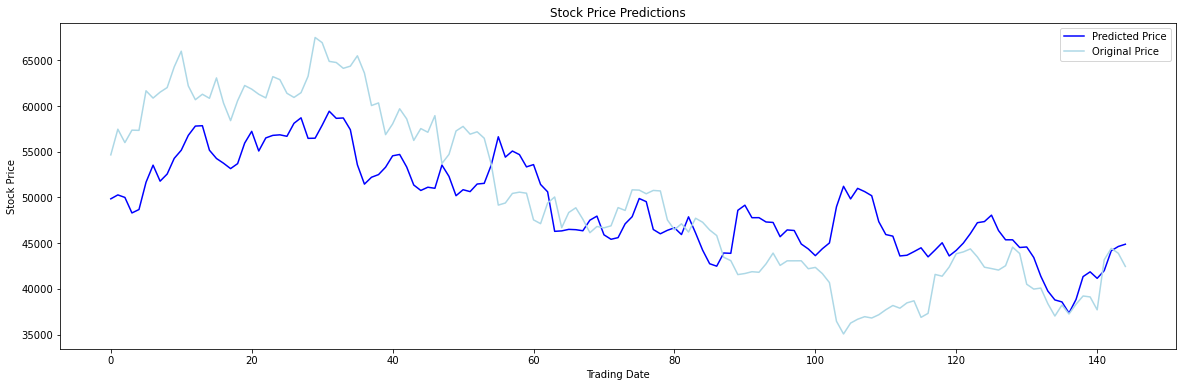

In [67]:
plt.plot(y_pred, color = 'blue', label = 'Predicted Price')
plt.plot(y_test, color = 'lightblue', label = 'Original Price')
 
plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.xticks(np.arange(0, 160, step=20))  
plt.ylabel('Stock Price')
 
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(6)
plt.show()

# Prediction

In [68]:
predict_feature

Compound   Volume  FundingRate  Bitcoin_SVI  Cryptocurrency_SVI  \
0  0.525319  0.47366     0.313175     0.137817            0.249198   

   No. of Active Addresses  No. of Unique Addresses  Transactions  \
0                 0.548707                 0.539364      0.502639   

   Compound_lag_1  Volume_lag_1  ...  No. of Unique Addresses_lag_4  \
0         0.52765      0.469431  ...                       0.438526   

   Transactions_lag_4  Compound_lag_5  Volume_lag_5  FundingRate_lag_5  \
0            0.414387        0.529636       0.46585           0.269978   

   Bitcoin_SVI_lag_5  Cryptocurrency_SVI_lag_5  No. of Active Addresses_lag_5  \
0           0.169315                  0.201845                       0.440803   

   No. of Unique Addresses_lag_5  Transactions_lag_5  
0                       0.460792            0.449825  

[1 rows x 48 columns]

In [69]:
# Process the data for LSTM
testX = np.array(predict_feature)
predict_feature = testX.reshape(predict_feature.shape[0], 1, predict_feature.shape[1])

In [70]:
predicted_price = lstm.predict(predict_feature)

In [71]:
predicted_price[0][0]

43384.543

Reality: Bitcoin currency had a close price of USD 39,137.61 on 4 Mar 2022.

Prediced: Our model predicted the currency to have a close price of USD 43,384.543 on 4 Mar 2022.